






Note to self, if it takes too long to run, then just don't run any of the parts that take too long, unless tweaks are applied to the data preprocessing part. You only need to run it once for the output. Hello.

### Import Libraries 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from xgboost import XGBClassifier
from sklearn.metrics import log_loss

## Part A - Model Variety Training

### Import Dataframe

In [2]:
# Load the dataset from a Folder called Datasets, plaed inside C drive.
df_raw = pd.read_csv("C:\Datasets\Crime_Data_from_2020_to_Present.csv", low_memory="False")
df_raw

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\1256870994.py:2: SyntaxWarning: invalid escape sequence '\D'
  df_raw = pd.read_csv("C:\Datasets\Crime_Data_from_2020_to_Present.csv", low_memory="False")


,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,IC,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0                   1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

### View Unique values for Crimes

In [4]:
unique_desc = df_raw["Crm Cd Desc"].dropna().unique()
len(unique_desc), unique_desc

(140,
 array(['THEFT OF IDENTITY',
        'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
        'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
        'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
        'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
        'VEHICLE - STOLEN', 'BURGLARY', 'BURGLARY FROM VEHICLE',
        'THEFT PLAIN - PETTY ($950 & UNDER)',
        'INTIMATE PARTNER - SIMPLE ASSAULT', 'BATTERY - SIMPLE ASSAULT',
        'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
        'VEHICLE - ATTEMPT STOLEN',
        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
        'ROBBERY', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
        'BIKE - STOLEN', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
        'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
        'CRIMINAL THREATS - NO WEAPON DISPLAYED',
        'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
        'BATTERY WITH SEXUAL CONTACT',
        'LETTERS, LEWD  -  TELEPHONE

## DataPrep

### Map each Crime commited to a matching Criminal Offense

In [5]:
# Keyword-based mapping rules for auto‐labeling
mapping_rules = {
    "Violent Crime": [
        "ASSAULT", "BATTERY", "HOMICIDE", "MANSLAUGHTER", "RAPE",
        "SEXUAL", "SODOMY", "ORAL COPULATION", "KIDNAPPING",
        "LYNCHING", "STALKING", "THREATS", "INTIMATE PARTNER"
    ],
    "Property Crime": [
        "THEFT", "BURGLARY", "VANDALISM", "ARSON", "SHOPLIFTING",
        "BIKE - STOLEN", "COIN MACHINE"
    ],
    "Vehicle Crime": [
        "VEHICLE", "DRIVING WITHOUT OWNER CONSENT", "DWOC"
    ],
    "Fraud / Financial Crime": [
        "FRAUD", "EMBEZZLEMENT", "COUNTERFEIT", "BUNCO",
        "CREDIT CARD", "DOCUMENT WORTHLESS", "INSURANCE"
    ],
    "Weapons / Public Safety": [
        "FIREARM", "WEAPON", "SHOTS FIRED", "BOMB", "BRANDISH"
    ],
    "Sex Crime": [
        "LEWD", "INDECENT EXPOSURE", "CHILD PORNOGRAPHY",
        "PANDERING", "PIMPING", "HUMAN TRAFFICKING"
    ],
    "Child-Related Crime": [
        "CHILD", "CONTRIBUTING", "CHILD NEGLECT"
    ],
    "Court / Restraining Order / Legal": [
        "COURT", "RESTRAINING", "CONTEMPT", "FAILURE TO APPEAR",
        "VIOLATION"
    ],
    "Public Disturbance / Disorder": [
        "DISTURBANCE", "PEACE", "TRESPASS", "DISRUPT",
        "RIOT", "DISOBEY"
    ],
    "Other Crime": []  # fallback
}

# Function to classify crimes
def classify(description: str):
    if not isinstance(description, str):
        return "Other Crime"
    desc = description.upper()
    for category, keywords in mapping_rules.items():
        for kw in keywords:
            if kw in desc:
                return category
    return "Other Crime"

# Create new class column
df_raw["Crime_Class"] = df_raw["Crm Cd Desc"].apply(classify)

# Save a preview
preview = df_raw[["Crm Cd Desc", "Crime_Class"]].head(30)
preview

,Crm Cd Desc,Crime_Class
0,THEFT OF IDENTITY,Property Crime
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Violent Crime
2,THEFT OF IDENTITY,Property Crime
3,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,Property Crime
4,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),Property Crime
5,THEFT OF IDENTITY,Property Crime
6,THEFT OF IDENTITY,Property Crime
7,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,Other Crime
8,THEFT OF IDENTITY,Property Crime
9,THEFT OF IDENTITY,Property Crime


In [6]:
df_raw['Crime_Class'].value_counts().reset_index(name='Count')

,Crime_Class,Count
0,Property Crime,508444
1,Violent Crime,233487
2,Vehicle Crime,123445
3,Other Crime,63036
4,Court / Restraining Order / Legal,21771
5,Public Disturbance / Disorder,19977
6,Weapons / Public Safety,19431
7,Sex Crime,11870
8,Child-Related Crime,2784
9,Fraud / Financial Crime,746


Raw Model training usually lies here, but we've removed it for convinience.

## Part A - Feature Engineering and Transformation

### Data Cleaning

Check for Duplicates

In [7]:
df_new = df_raw.drop_duplicates()
df_new

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Crime_Class
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime


None found.

### Removing Columns 
Do not proceed without caution. In this context, the chosen columns were dropped due to them having a direct relationship to the target class, which may cause a leakage.

In [8]:
df_new = df_new.drop(columns=["Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"])
df_new

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,...,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,377,31,...,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,...,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,377,30,...,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,344,47,...,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,1300 0344 1606 2032,63,...,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,NaN,35,...,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,1258 0553 0602,11,...,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,NaN,16,...,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,0400 1259 1822 0356,17,...,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime


### Standardization

In this phase, TAKE NOTE that anything, once you hit run, results in the dataframe being permanently changed. So to rerun this segment, you MUST reload and reimport the DataFrame again.

In [9]:
# 1. Clean DATE OCC (mixed formats)
df_new['DATE OCC'] = pd.to_datetime(df_new['DATE OCC'], format='mixed', errors='coerce')

# 2. Clean TIME OCC (force numeric → Int64 → 4-digit HHMM)
df_new['TIME OCC'] = pd.to_numeric(df_new['TIME OCC'], errors='coerce').astype('Int64')
time_str = df_new['TIME OCC'].astype(str).str.zfill(4)

# 3. Combine DATE OCC + TIME OCC into a single datetime
df_new['DateTime OCC'] = pd.to_datetime(
    df_new['DATE OCC'].dt.strftime('%Y-%m-%d') + ' ' + time_str,
    errors='coerce'
)

# 4. Drop the original columns used for merging
df_new = df_new.drop(columns=['DATE OCC', 'TIME OCC'])

df_new

,,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC
0,211507896,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-11-07 08:45:00
1,201516622,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00
2,240913563,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00
3,210704711,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00
4,201418201,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00
1004987,250404100,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00
1004988,251304095,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00
1004989,251704066,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00


### Check for NULL values

In [10]:
df_new.isna().sum()

                       0
Date Rptd              0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Mocodes           151619
Vict Age               0
Vict Sex          144644
Vict Descent      144656
Weapon Used Cd    677744
Weapon Desc       677744
Status                 1
Status Desc            0
LOCATION               0
Cross Street      850755
LAT                    0
LON                    0
Crime_Class            0
DateTime OCC           0
dtype: int64

Leave as NULL, since some records do in fact not possess the given info.

In [11]:
df_new = df_new.drop(columns=[' '])
df_new

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC
0,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-11-07 08:45:00
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00
2,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00
4,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00


Remove the Weapon Used Cd column, and change the Weapon Desc column to binary.

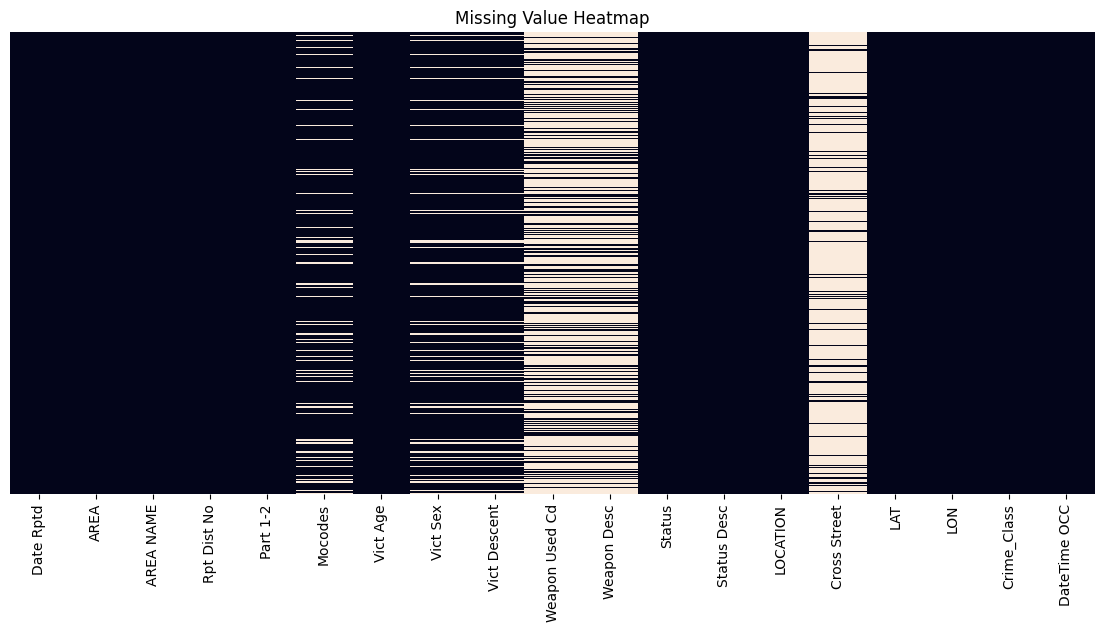

In [12]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_new.isna(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

In [13]:
# 1. Drop the Weapon Used Cd column (if it exists)
df_new = df_new.drop(columns=['Weapon Used Cd'], errors='ignore')

# 2. Create a binary Weapon_Present column
df_new['Weapon_Present'] = df_new['Weapon Desc'].apply(
    lambda x: 'Present' if pd.notna(x) and str(x).strip() != '' else 'Absent'
)

# 3. (Optional) Drop Weapon Desc if you want to fully remove the text info
df_new = df_new.drop(columns=['Weapon Desc'], errors='ignore')

df_new

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC,Weapon_Present
0,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-11-07 08:45:00,Absent
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00,Present
2,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00,Absent
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00,Absent
4,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00,Absent
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00,Absent
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00,Absent
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00,Present


Check again.

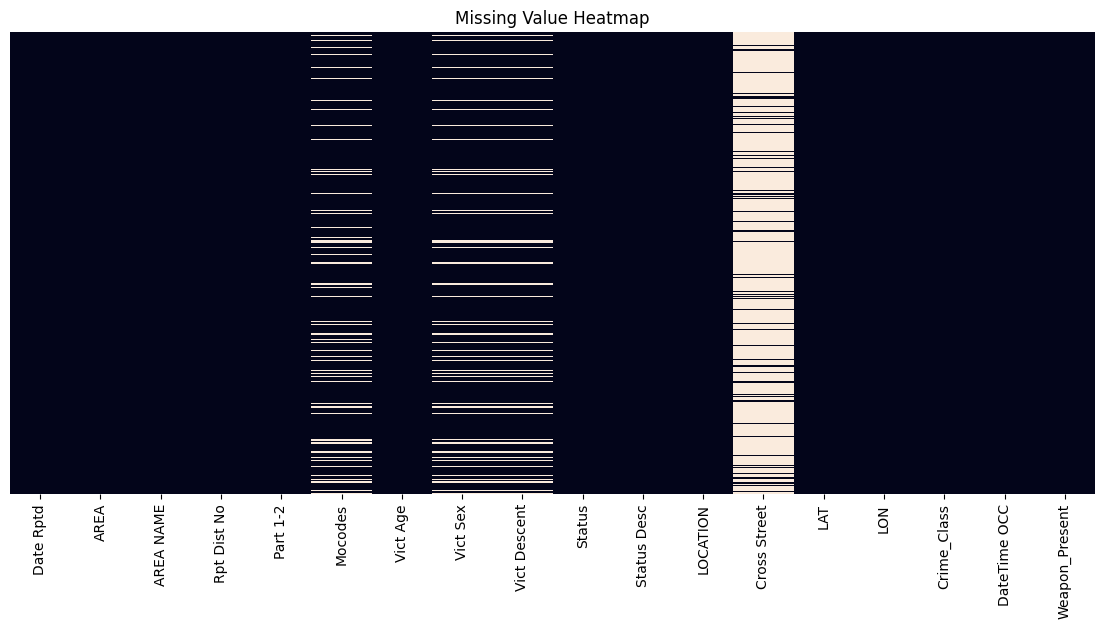

In [14]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_new.isna(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

### Dropping columns that provide meaningless value:

Start with obvious ones, Location of the crime will often be unique among all records, but the area/district may not. So it can be dropped.

To do so, apply a test such as Pearson Correlation

Cross Street possess a lot of missing values. This can be dropped completely if Location is already sufficient info.

As for Mo Codes, this is neglectable, since some records may only be a minor offense. So no MO Code may have been recorded.

This applies to victim sex and descent as well, since not all crimes have a victim involved, such as vandalisme.

### Test Pearson Correlation (Numeric Features)


Top 25 strongest Pearson correlations (absolute):
      Feature 1            Feature 2  Correlation
0          AREA          Rpt Dist No     0.999051
18          LAT                  LON    -0.998190
11     Part 1-2             Vict Age     0.206183
17     Vict Age  Crime_Class_numeric    -0.081723
14     Part 1-2  Crime_Class_numeric     0.071209
13     Part 1-2                  LON     0.029212
12     Part 1-2                  LAT    -0.028722
3          AREA                  LAT     0.025338
8   Rpt Dist No                  LAT     0.025077
7   Rpt Dist No             Vict Age     0.022624
2          AREA             Vict Age     0.022593
4          AREA                  LON    -0.010541
9   Rpt Dist No                  LON    -0.010469
1          AREA             Part 1-2     0.007675
6   Rpt Dist No             Part 1-2     0.007489
10  Rpt Dist No  Crime_Class_numeric    -0.003770
5          AREA  Crime_Class_numeric    -0.003678
16     Vict Age                  LON     0.002219


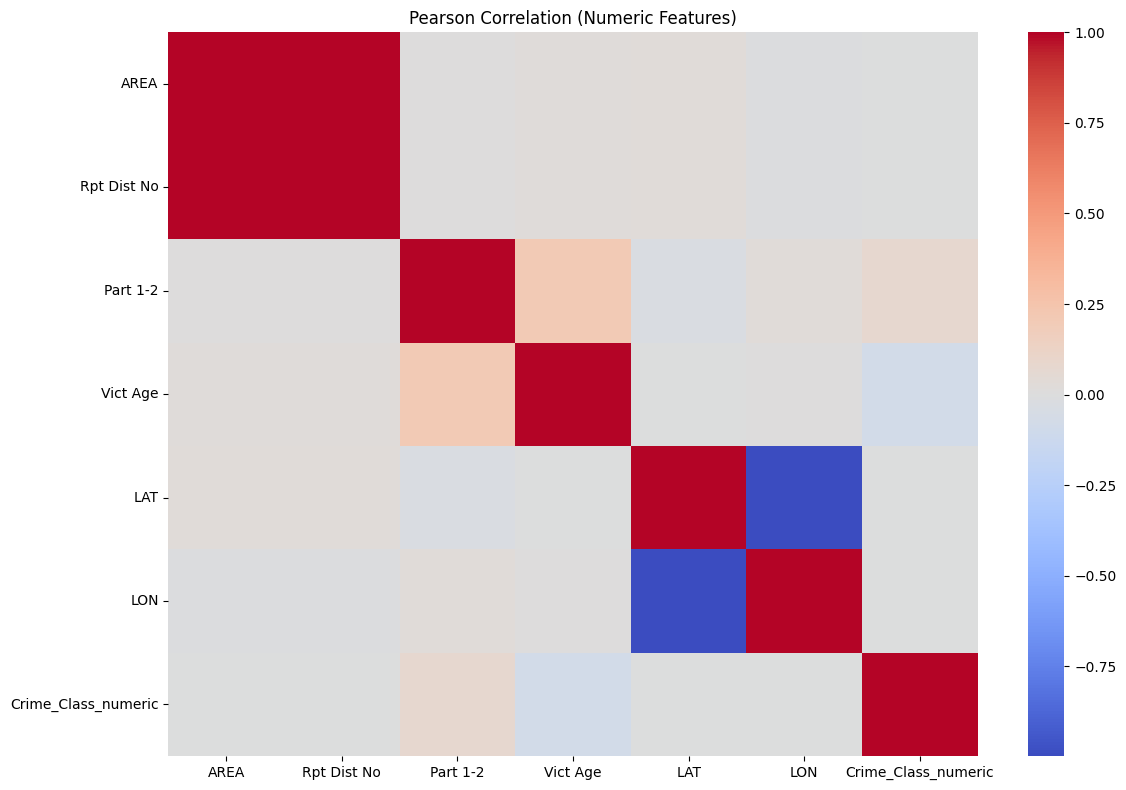

In [15]:
# Choose the DataFrame to analyze; use the most recent processed one if available
try:
    df_corr_source = df_new.copy()
except NameError:
    df_corr_source = df_raw.copy()

# Ensure target encoding (optional): demonstrate correlation against encoded target when present
if 'Crime_Class' in df_corr_source.columns:
    df_corr_source['Crime_Class_numeric'] = df_corr_source['Crime_Class'].astype('category').cat.codes

# Select only numeric columns
num_df = df_corr_source.select_dtypes(include=['number'])

# Pearson correlation matrix
corr = num_df.corr(numeric_only=True)

# Upper triangle flatten for pairwise sorted report
upper = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))
corr_report = (
    upper.stack()
          .reset_index()
          .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
)

# Sort by absolute correlation strength
corr_report = corr_report.iloc[corr_report['Correlation'].abs().sort_values(ascending=False).index]

# Show top pairs
print("Top 25 strongest Pearson correlations (absolute):")
print(corr_report.head(25))

# Optional: heatmap for a quick visual
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Pearson Correlation (Numeric Features)')
plt.tight_layout()
plt.show()

### What can be derived freom this correlation table?

1. Area and Rpt Dist No are inheritelly the same info, if you know the area where the crime occured, is the specific District Number really required?
2. Many features have a correlation near 0, this implies that many features are highly independent. In  which, leave them be.
3. Latitude and Longitude do provide the coordinates of the crime, but neither predicts each other.


In [16]:
# Make a copy of the data
df_corr = df_new.copy()

# Convert Crime_Class (categorical) → numeric labels
df_corr['Crime_Class_numeric'] = df_corr['Crime_Class'].astype('category').cat.codes

# Select only numeric columns
num_df = df_corr.select_dtypes(include=['number'])

# Compute correlation with the numeric-encoded target
target_corr = num_df.corr(numeric_only=True)['Crime_Class_numeric']

# Remove the target itself
target_corr = target_corr.drop(labels=['Crime_Class_numeric'])

# Turn into sorted dataframe
target_corr_report = (
    target_corr
        .abs()
        .sort_values(ascending=False)
        .rename("Correlation_with_Crime_Class")
        .to_frame()
)

target_corr_report.head(20)


,Correlation_with_Crime_Class
Vict Age,0.081723
Part 1-2,0.071209
Rpt Dist No,0.003770
AREA,0.003678
LAT,0.001563
LON,0.001106


In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Date Rptd       1004991 non-null  object        
 1   AREA            1004991 non-null  int64         
 2   AREA NAME       1004991 non-null  object        
 3   Rpt Dist No     1004991 non-null  int64         
 4   Part 1-2        1004991 non-null  int64         
 5   Mocodes         853372 non-null   object        
 6   Vict Age        1004991 non-null  int64         
 7   Vict Sex        860347 non-null   object        
 8   Vict Descent    860335 non-null   object        
 9   Status          1004990 non-null  object        
 10  Status Desc     1004991 non-null  object        
 11  LOCATION        1004991 non-null  object        
 12  Cross Street    154236 non-null   object        
 13  LAT             1004991 non-null  float64       
 14  LON             10

### Let's tackle Mocodes first, these represent a given crime/offense commited. You can find the full list in the file attached.

In [18]:
# --- Step 1: Clean & explode the MO Codes column ---
# Convert NaN to empty string
df_new['Mocodes'] = df_new['Mocodes'].fillna('')

# Split by spaces → expand into list
df_new['MOCODES_LIST'] = df_new['Mocodes'].str.strip().str.split()

# Explode (each code becomes a row)
exploded = df_new.explode('MOCODES_LIST')

Then, extract all unique MO code entries present.

In [19]:
all_codes = sorted({code for sublist in df_new['MOCODES_LIST'] for code in sublist})
print(len(all_codes), "unique MO codes found")

938 unique MO codes found


Count the frequency of each MO Code in the dataset

In [20]:
# --- Step 2: Count MO code frequencies ---
mo_counts = (
    exploded['MOCODES_LIST']
    .value_counts()
)

Select the top 100 MO Codes to keep

In [21]:
# --- Step 3: Select the Top 100 codes ---
top_100 = set(mo_counts.head(100).index)

Filter MO list into top codes and “others”

In [22]:
# --- Step 4: Create one-hot columns for each top code ---
for code in top_100:
    df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)

# --- Step 5: Create the OTHERS column ---
# OTHERS = true if the row contains any MO code NOT in the top 100
df_new['MO_OTHERS'] = df_new['MOCODES_LIST'].apply(
    lambda lst: any(code not in top_100 for code in lst)
)

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is us

Filter each crime’s MO list to only keep top 100 codes, create an Others column to store everything else.

Multi-hot encode only the top 100 codes

In [23]:
# --- Step 6: Convert booleans to integers (0/1) ---
mo_cols = [col for col in df_new.columns if col.startswith("MO_")]
df_new[mo_cols] = df_new[mo_cols].astype(int)

# --- Step 7: Clean up temporary column ---
df_new_1 = df_new.drop(columns=["MOCODES_LIST"])

# --- Done ---
print(f"Created {len(mo_cols)} MO Code features (100 Top + OTHERS).")
print(mo_cols[:10])

Created 101 MO Code features (100 Top + OTHERS).
['MO_0321', 'MO_2021', 'MO_0928', 'MO_0602', 'MO_0447', 'MO_1414', 'MO_1258', 'MO_0352', 'MO_0448', 'MO_0361']


In [24]:
df_new_1 = df_new_1.drop(columns=['Mocodes'], errors='ignore')
df_new_1

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,...,MO_0421,MO_0429,MO_1810,MO_0216,MO_0337,MO_1309,MO_0945,MO_1310,MO_0305,MO_OTHERS
0,4/11/2021 0:00,15,N Hollywood,1502,2,31,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,32,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,1,0
2,12/10/2024 0:00,9,Van Nuys,933,2,30,M,W,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,47,F,A,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
4,10/3/2020 0:00,14,Pacific,1454,1,63,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,35,M,X,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,11,M,B,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,16,F,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,17,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0


### Next, tackle the location based columns

As mentioned, since all crimes will more times than not, occur in unique, varying locations, it is best to assume that there is no association or pattern to be determined from them. They are simply too specific to be trained upon.

Another key feature that could be dropped is the Date of te Report. Since each report will have its own unique entry date, hence it is safe to assume that the column is noisy and unfeasible in model training.

In [25]:
df_new_1 = df_new_1.drop(columns=['LOCATION', 'Cross Street', 'DateTime OCC', 'Date Rptd'], errors='ignore') #Remove the dates
df_new_1

,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,...,MO_0421,MO_0429,MO_1810,MO_0216,MO_0337,MO_1309,MO_0945,MO_1310,MO_0305,MO_OTHERS
0,15,N Hollywood,1502,2,31,M,H,IC,Invest Cont,34.2124,...,0,0,0,0,0,0,0,0,0,1
1,15,N Hollywood,1521,1,32,M,H,IC,Invest Cont,34.1993,...,0,0,0,0,0,0,0,0,1,0
2,9,Van Nuys,933,2,30,M,W,IC,Invest Cont,34.1847,...,0,0,0,0,0,0,0,0,0,1
3,7,Wilshire,782,1,47,F,A,IC,Invest Cont,34.0339,...,0,0,0,0,0,0,0,0,0,0
4,14,Pacific,1454,1,63,M,H,IC,Invest Cont,33.9813,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,21,Topanga,2103,2,35,M,X,IC,Invest Cont,34.2259,...,0,0,0,0,0,0,0,0,0,0
1004987,4,Hollenbeck,479,2,11,M,B,IC,Invest Cont,34.0277,...,0,0,0,0,0,0,0,0,0,1
1004988,13,Newton,1372,2,16,F,H,IC,Invest Cont,33.9942,...,0,0,0,0,0,0,0,0,0,0
1004989,17,Devonshire,1774,2,17,M,H,IC,Invest Cont,34.2450,...,0,0,0,0,0,0,0,0,0,0


### Next, we need to choose bewteen keeping AREA, or DISTRICT.

AREA:
- It encodes neighborhood-level crime patterns
- It’s stable and interpretable

Rpt District:
- This is a finer-grained region ID.
- Usually LAPD districts are ~1–2 square miles.

But using both AREA and Rpt Dist No creates strong multicollinearity, because:
- AREA is a parent region
- Rpt Dist No is the subregion

Which is Better?

Refer back to the correlation test, Rpt District is SLIGHTLY better than AREA, so that is what we will keep. It may contain more info than AREA, as AREA is a bit too general.

In [26]:
df_new_1 = df_new_1.drop(columns=['AREA'])

In [27]:
df_new_1 = df_new_1.drop(columns=['AREA NAME'])
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_0421,MO_0429,MO_1810,MO_0216,MO_0337,MO_1309,MO_0945,MO_1310,MO_0305,MO_OTHERS
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,0,0,0,1
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,0,0,0,0,0,0,1,0
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,0,0,0,1
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,0,0,0
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,0,0,0
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,0,0,0,0,0,0,0,0,1
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,0,0,0
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,0,0,0


### Finally, we need to decide what to do with LAT and LON

These are very powerful IF transformed.

Raw lat/lon are NOT useful directly because:
- models cannot interpret earth geometry
- correlation is near zero
- linear models especially fail with raw coordinates

Raw latitude and longitude values:
- have no linear meaning
- give almost zero Pearson correlation
- confuse tree models (too many splits)
- confuse linear models (not linear!)
- are extremely sensitive to tiny changes

But crimes happen in spatial hotspots:
- Downtown
- Hollywood
- South LA
- Venice
- San Fernando Valley
- Pico-Union
- Koreatown
- Westlake
- etc.

### Is there a way to make them useful via transformation?

### Clustering the LAT and LON into Bins of range values, may provide much more use.

In [28]:
from sklearn.cluster import KMeans

coords = df_new_1[['LAT', 'LON']].dropna()

kmeans = KMeans(n_clusters=100, random_state=42)

df_new_1['Location_Cluster'] = kmeans.fit_predict(coords)

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\2141477543.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Location_Cluster'] = kmeans.fit_predict(coords)


### Method 1 — KMeans Clustering

This learns 50–200 “crime regions” directly from the data.

In [29]:
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_0429,MO_1810,MO_0216,MO_0337,MO_1309,MO_0945,MO_1310,MO_0305,MO_OTHERS,Location_Cluster
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,0,0,1,71
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,0,0,0,0,0,1,0,57
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,0,0,1,27
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,0,0,33
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,0,0,53
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,0,0,0,0,0,0,0,1,93
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,0,0,8
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,0,0,44


### Method 2 — Spatial Binning (ranges)

This converts lat/lon into a grid.

In [30]:
df_new_1['Lat_bin'] = pd.cut(df_new_1['LAT'], bins=50, labels=False)
df_new_1['Lon_bin'] = pd.cut(df_new_1['LON'], bins=50, labels=False)


C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\536423381.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Lat_bin'] = pd.cut(df_new_1['LAT'], bins=50, labels=False)
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\536423381.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Lon_bin'] = pd.cut(df_new_1['LON'], bins=50, labels=False)


In [31]:
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_0216,MO_0337,MO_1309,MO_0945,MO_1310,MO_0305,MO_OTHERS,Location_Cluster,Lat_bin,Lon_bin
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,1,71,49,0
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,0,0,0,1,0,57,49,0
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,1,27,49,0
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,33,49,0
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,0,0,0,0,0,0,6,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,53,49,0
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,0,0,0,0,0,1,93,49,0
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,8,49,0
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,44,49,0


This creates 2 features:
- Lat_bin
- Lon_bin

Which together form a 2D grid, like “Region (12, 34)”.

This is good for:
- linear models
- tree models
- giant datasets
- preserving spatial structure

### 🟢 Combining Both Is Even Better

Crime prediction systems often use:

✔ Location_Cluster (KMeans)

✔ Lat_bin + Lon_bin (50x50 grid)

This gives:
- global structure (clusters)
- local structure (grid bins)
- Without storing raw LAT/LON.

#### Function for Plotting Confusion Matrix. You'll be using this later, so intialize it first.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_crime_matrix(y_test, y_pred, model_name="Model", labels=None):
    """
    Plots a confusion matrix with counts and percentages.
    """
    # Compute matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate percentages for the heatmap annotations
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', 
                xticklabels=labels if labels is not None else "auto",
                yticklabels=labels if labels is not None else "auto")
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual Crime Class')
    plt.xlabel('Predicted Crime Class')
    plt.show()

## Part A - Remodelling with Processing

Now, let's try building the Models again.

### Tree-Based: Decision Tree (Processed)

In [33]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime columns to int64 timestamps
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view('int64')

# Convert list columns to strings so they can be factorized
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test_dt = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
dt_model_3 = DecisionTreeClassifier()
dt_model_3.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model_3.predict(X_test)
y_pred_train = dt_model_3.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test_dt, y_pred_dt, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test_dt, y_pred_dt)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Training Set Accuracy: 0.9819514906331691
Testing Set Accuracy: 0.8781119609416977
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.987960  0.976778  0.982337  356035.000000
1              0.999951  0.999988  0.999969  163391.000000
2              0.997842  0.994005  0.995920   44202.000000
3              0.908648  0.953081  0.930334   86340.000000
4              0.999779  0.999559  0.999669   13595.000000
5              0.999033  0.998310  0.998671    8282.000000
6              0.999605  0.999408  0.999507   15207.000000
7              0.995265  0.994908  0.995087   13944.000000
8              1.000000  0.981481  0.990654     540.000000
9              1.000000  0.999489  0.999744    1957.000000
accuracy       0.981951  0.981951  0.981951       0.981951
macro avg      0.98

A highly Noticeable increase.

Now, let's plot the Error vs Complexity curve.

This first one shall use a stratified sampling approach.

In [ ]:
from sklearn.metrics import log_loss
from sklearn.model_selection import validation_curve
import numpy as np

# Compute log-loss for Decision Tree
train_loss = log_loss(y_train, dt_model_3.predict_proba(X_train))
test_loss  = log_loss(y_test,  dt_model_3.predict_proba(X_test))

print("------------------------")
print("Decision Tree Log Loss")
print("------------------------")
print("Training Loss:")
print(train_loss)
print("------------------------")
print("Testing Loss:")
print(test_loss)
print("------------------------")

# Gap analysis
acc_gap  = train_accuracy - test_accuracy
loss_gap = test_loss - train_loss

print("Accuracy Gap (Train - Test):")
print(acc_gap)
print("------------------------")
print("Loss Gap (Test - Train):")
print(loss_gap)
print("------------------------")


# ================================
# 1. FAST STRATIFIED SUBSAMPLING
# ================================
from sklearn.model_selection import train_test_split
import numpy as np

# Take only 5% of the data (tweak 0.05 → 0.02 or 0.01 if still slow)
sample_ratio = 0.25  
X_small, _, y_small, _ = train_test_split(
    X, y, 
    train_size=sample_ratio, 
    stratify=y,
    random_state=42
)

# Split the small subset into train/test
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y_small,
    test_size=0.3,
    stratify=y_small,
    random_state=42
)

# ==================================
# 2. MODEL COMPLEXITY VS ERROR
# ==================================
depths = range(2, 41, 2)
train_losses_curve = []
test_losses_curve = []
train_acc_curve = []
test_acc_curve = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d)

    # Fit on *small* dataset
    model.fit(X_train_s, y_train_s)

    # Probabilities
    train_proba = model.predict_proba(X_train_s)
    test_proba  = model.predict_proba(X_test_s)

    # Loss
    train_losses_curve.append(log_loss(y_train_s, train_proba))
    test_losses_curve.append(log_loss(y_test_s, test_proba))

    # Accuracy
    y_train_pred = model.predict(X_train_s)
    y_test_pred  = model.predict(X_test_s)

    train_acc_curve.append(accuracy_score(y_train_s, y_train_pred))
    test_acc_curve.append(accuracy_score(y_test_s, y_test_pred))

# ================================
# 3. PLOT
# ================================
plt.figure(figsize=(10,5))
plt.plot(depths, train_losses_curve, label="Training Loss")
plt.plot(depths, test_losses_curve, label="Validation Loss")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log Loss")
plt.title("Model Complexity vs Error (Decision Tree)")
plt.legend()
plt.show()




The second one will use all rows present.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# ----------------------------------------------------
# Convert y → Series so we can subsample safely
# ----------------------------------------------------
y_train = pd.Series(y_train).reset_index(drop=True)
y_test  = pd.Series(y_test).reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)

# ----------------------------------------------------
# Subsample 250k rows for faster computation
# ----------------------------------------------------
sample_size = min(250_000, len(X_train), len(X_test))

X_train_sub = X_train.sample(sample_size, random_state=42)
y_train_sub = y_train.loc[X_train_sub.index]

X_test_sub = X_test.sample(sample_size, random_state=42)
y_test_sub = y_test.loc[X_test_sub.index]

# ----------------------------------------------------
# Complexity levels (same as original)
# ----------------------------------------------------
complexity_values = [5, 10, 15, 20, 25, 30, 35, None]

train_losses = []
test_losses = []

print("=== Generating Decision Tree Log-Loss vs Complexity Curve ===")

for depth in complexity_values:
    print(f"Training Decision Tree with max_depth={depth}")

    dt_model = DecisionTreeClassifier(
        max_depth=depth,
        random_state=42  # no tuning params, just default DT
    )
    
    dt_model.fit(X_train_sub, y_train_sub)

    # Predict probs so we can compute log-loss
    train_proba = dt_model.predict_proba(X_train_sub)
    test_proba  = dt_model.predict_proba(X_test_sub)

    train_losses.append(log_loss(y_train_sub, train_proba))
    test_losses.append(log_loss(y_test_sub, test_proba))

# ----------------------------------------------------
# PLOT
# ----------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in complexity_values], train_losses, marker='o', label="Training Log Loss")
plt.plot([str(d) for d in complexity_values], test_losses, marker='o', label="Testing Log Loss")

plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log Loss")
plt.title("Decision Tree Log-Loss vs Complexity Curve (Subsample 250k)")
plt.legend()
plt.grid(True)
plt.show()



### Evaluate Feature Importance (Decision Tree)

In [ ]:
importance = dt_model_3.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)

### Perform Shuffle Split Validation to verify the results.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
import numpy as np

print("=== Decision Tree Cross-Validation: Stratified Shuffle-Split ===")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    dt_model = DecisionTreeClassifier(
        max_depth=6,      # similar to XGB's depth, tweak as needed
        random_state=42
    )

    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")



Confusion Matrix:

In [ ]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test_dt, y_pred_dt, model_name="Decision Tree", labels=crime_labels)

### Tree-Based: Random Forest (Processed)

*Yawn...

In [ ]:
print("=== Random Forest Crime Classification (PROCESSED) ===")

# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime columns to int64 timestamps
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view('int64')

# Convert list columns to strings so they can be factorized
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Fill any remaining NaN values before training
X = X.fillna(-1)

# Train-test split (stratify for class balance)
X_train, X_test, y_train, y_test_rf = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train model (Correctly named rf_model_3)
rf_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model_3.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model_3.predict(X_test)
y_pred_train_rf = rf_model_3.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test_rf, y_pred_rf, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_rf, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_rf)
test_accuracy = accuracy_score(y_test_rf, y_pred_rf)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print(f"Overfit Gap:          {train_accuracy - test_accuracy:.4f}")
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

A respectful increment.

### Now, let's validate the results:

Since RF is a very complex and time consuming ML, we'll need to use alternatie validation methods to ensure time and compuational efficiency.

Method 1: Use Subsamples for Cross Validation.

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Take a manageable subsample
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs = []
fold = 1

for train_idx, test_idx in skf.split(X_sub, y_sub):
    X_train, X_test = X_sub.iloc[train_idx], X_sub.iloc[test_idx]
    y_train, y_test = y_sub[train_idx], y_sub[test_idx]

    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accs.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("K-Fold CV Accuracy Mean:", np.mean(accs))
print("Std:", np.std(accs))
print("---------------------------------------------------------")


Method 2: Use Stratified Shuffle-Split

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

print("=== Random Forest Cross-Validation: Stratified Shuffle-Split ===")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")


Plot the error versus complexity curve:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# --- 1. Subsample the data to 250k ---
print("=== Subsampling Training Data ===")
# We verify we have enough data, then sample 250k without replacement
n_samples = min(100000, len(X_train))
X_train_sub, y_train_sub = resample(
    X_train, y_train, 
    n_samples=n_samples, 
    replace=False, 
    random_state=42
)
print(f"Training data reduced to: {X_train_sub.shape[0]} samples")

# --- 2. Define Depth Range (Complexity) ---
# We range from depth 1 (very simple) to 25 (very complex)
depth_settings = range(1, 501) #Adjust to larger value range if needed

train_errors = []
test_errors = []

print("=== Generating Error vs Complexity (Max Depth) Curve ===")

for d in depth_settings:
    print(f"Training model with max_depth={d}")

    rf = RandomForestClassifier(
        n_estimators=50,  # Fixed: We isolate depth as the variable
        max_depth=d,      # Variable: This controls complexity
        random_state=42,
        n_jobs=-1
    )
    
    # Fit on the subsampled data
    rf.fit(X_train_sub, y_train_sub)

    # Predict
    train_pred = rf.predict(X_train_sub)
    test_pred  = rf.predict(X_test)

    # Compute error (1 - accuracy)
    train_err = 1 - accuracy_score(y_train_sub, train_pred)
    test_err  = 1 - accuracy_score(y_test, test_pred)

    train_errors.append(train_err)
    test_errors.append(test_err)

# --- 3. Plot ---
plt.figure(figsize=(10, 6))

# Plotting the curves
plt.plot(depth_settings, train_errors, marker='o', label="Training Error", color='blue')
plt.plot(depth_settings, test_errors, marker='o', label="Testing Error", color='red')

# Formatting
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Error (1 - Accuracy)")
plt.title("Random Forest: Error vs. Max Depth")
plt.xticks(depth_settings) # Ensure we see all depth ticks
plt.legend()
plt.grid(True)

plt.show()




 ### Evaluate Feature Importance (Random Forest)

In [ ]:
# -------------------------------------------
# Feature Importance
# -------------------------------------------
importance = rf_model_3.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)


Confusion Matrix:

In [ ]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test_rf, y_pred_rf, model_name="Random Forest", labels=crime_labels)

### Probabilistic: Logistic Regression (Processed)

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Setup Data
# (Assuming df_new_1 is already loaded)
df_model_2 = df_new_1.copy()

# 2. Prepare X and y
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# 3. Pre-processing (Memory Safe Version)

# A. Convert datetimes to int64 (if any exist)
# Using 'view' on datetimes is fast and memory efficient
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# B. Convert list columns to strings
# (Necessary because lists are not hashable and break many functions)
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# C. Factorize Objects (The "Pro" way to avoid MemoryError)
# We loop instead of using .apply() to save RAM
print("Encoding columns...")
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# D. Handle Missing Values
# Logistic Regression cannot handle NaNs. 
# Since we used cat.codes, NaNs are already -1, but we ensure everything is numeric.
X = X.fillna(-1)

# 4. Train-test split
X_train, X_test, y_train, y_test_lr = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Scale features 
# Logistic Regression works best when features are on the same scale (e.g., -1 to 1)
print("Scaling data...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Build Logistic Regression Model
print("Training Logistic Regression...")
lr_model_1 = LogisticRegression() # Default parameters

# Train model
lr_model_1.fit(X_train_scaled, y_train)

# 7. Predict
print("Predicting...")
y_pred_train_1 = lr_model_1.predict(X_train_scaled)
y_pred_test_lr = lr_model_1.predict(X_test_scaled)

# 8. Evaluation
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_lr, y_pred_test_lr, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test_lr, y_pred_test_lr)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Encoding columns...
Scaling data...
Training Logistic Regression...


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicting...
Training Set Accuracy: 0.8994830083597136
Testing Set Accuracy: 0.8982978328214449
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.933845  0.935852  0.934847  356035.000000
1              0.921360  0.962807  0.941628  163391.000000
2              0.819256  0.529953  0.643588   44202.000000
3              0.815259  0.950880  0.877862   86340.000000
4              0.745560  0.700919  0.722551   13595.000000
5              0.834315  0.513161  0.635467    8282.000000
6              0.946154  0.905899  0.925589   15207.000000
7              0.647402  0.605709  0.625861   13944.000000
8              0.500000  0.003704  0.007353     540.000000
9              0.634500  0.379663  0.475064    1957.000000
accuracy       0.899483  0.899483  0.899483       0.899483
macro

### Probabilistic: Naive Bayes (Processed)

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # <--- Changed from StandardScaler
from sklearn.naive_bayes import MultinomialNB   # <--- The Model
from sklearn.metrics import classification_report, accuracy_score

# 1. Setup Data
# (Assuming df_new_1 is already loaded)
df_model_2 = df_new_1.copy()

# 2. Prepare X and y
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# 3. Pre-processing (Memory Safe Version)

# A. Convert datetimes to int64
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# B. Convert list columns to strings
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# C. Factorize Objects (Using cat.codes for memory efficiency)
print("Encoding columns...")
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# D. Handle Missing Values
# We stick to your logic, but Naive Bayes hates -1.
# We will fix the -1s in the Scaling step below.
X = X.fillna(-1)

# 4. Train-test split
X_train, X_test, y_train, y_test_nb = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Scale features 
# CRITICAL CHANGE: MultinomialNB fails with negative numbers.
# StandardScaler produces negatives. MinMaxScaler (0, 1) fixes this.
print("Scaling data (MinMax)...")
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Build Naive Bayes Model
print("Training Multinomial Naive Bayes...")
nb_model_1 = MultinomialNB() 

# Train model
nb_model_1.fit(X_train_scaled, y_train)

# 7. Predict
print("Predicting...")
y_pred_train_1 = nb_model_1.predict(X_train_scaled)
y_pred_test_nb = nb_model_1.predict(X_test_scaled)

# 8. Evaluation
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_nb, y_pred_test_nb, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test_nb, y_pred_test_nb)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Encoding columns...
Scaling data (MinMax)...
Training Multinomial Naive Bayes...
Predicting...
Training Set Accuracy: 0.871889272530075
Testing Set Accuracy: 0.8713689643049042
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.935642  0.916253  0.925846  356035.000000
1              0.886901  0.902675  0.894719  163391.000000
2              0.672489  0.514750  0.583141   44202.000000
3              0.822126  0.945321  0.879430   86340.000000
4              0.502667  0.630747  0.559470   13595.000000
5              0.778507  0.501207  0.609813    8282.000000
6              0.903444  0.895246  0.899326   15207.000000
7              0.534854  0.595382  0.563497   13944.000000
8              0.085106  0.022222  0.035242     540.000000
9              0.275608  0.324476  0.298052

Perform Shuffle-Split Validation for both LR anmd NB models:

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize the Splitter (Same for both)
# 5 Splits is a good balance between speed and reliability
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

print("=========================================================")
print("1. Logistic Regression Validation (StandardScaler)")
print("=========================================================")

lr_accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    # 1. Slice Data (Memory efficient indexing)
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # 2. Scale (Critical: Fit on Train, Transform Test)
    # StandardScaler is best for Logistic Regression speed/convergence
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. Train (n_jobs=-1 uses all CPU cores for speed)
    lr = LogisticRegression(n_jobs=-1) 
    lr.fit(X_train_scaled, y_train)

    # 4. Score
    acc = accuracy_score(y_test, lr.predict(X_test_scaled))
    
    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    lr_accuracies.append(acc)
    fold += 1

print(f"LR Mean Accuracy:  {np.mean(lr_accuracies):.8f}")
print(f"LR Std Deviation:  {np.std(lr_accuracies):.8f}")


print("\n=========================================================")
print("2. Multinomial Naive Bayes Validation (MinMaxScaler)")
print("=========================================================")

nb_accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    # 1. Slice Data
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # 2. Scale (MinMaxScaler is REQUIRED for NB to avoid negative errors)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. Train
    nb = MultinomialNB()
    nb.fit(X_train_scaled, y_train)

    # 4. Score
    acc = accuracy_score(y_test, nb.predict(X_test_scaled))

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    nb_accuracies.append(acc)
    fold += 1

print(f"NB Mean Accuracy:  {np.mean(nb_accuracies):.8f}")
print(f"NB Std Deviation:  {np.std(nb_accuracies):.8f}")
print("---------------------------------------------------------")

Plot the error vs complexity curve

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import validation_curve, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# ==========================================
# 1. Prepare Data (250K Subsample)
# ==========================================
print("Subsampling 250k rows...")
# Sample first to save time on preprocessing
df_sub = df_new_1.sample(n=250000, random_state=42).copy()

# Clean up leakage columns
drop_cols = [
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4", "Crime_Class"
]
cols_to_drop = [c for c in drop_cols if c in df_sub.columns]

# Prepare X and y
y, _ = pd.factorize(df_sub["Crime_Class"])
X = df_sub.drop(columns=cols_to_drop) # Drop target + leakage

# --- Preprocessing (Optimized) ---
# 1. Convert datetimes to int64
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# 2. Convert list columns to strings
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# 3. Factorize Objects (cat.codes)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# 4. Handle NaNs/Negatives
# Logistic Regression handles -1 fine (as a number), 
# but NB needs positive. We'll rely on MinMaxScaler for NB later.
X = X.fillna(-1)

# ==========================================
# 2. Setup Models & Validation
# ==========================================

# Splitter: 3 splits is enough for a curve plot (saves time vs 5)
cv_split = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

# Pipeline 1: Logistic Regression (Standard Scaler)
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, n_jobs=-1))
])
# Test C from 0.001 (Simple) to 100 (Complex)
param_range_lr = np.logspace(-3, 5, 9) 

# Pipeline 2: Naive Bayes (MinMax Scaler)
pipe_nb = Pipeline([
    ('scaler', MinMaxScaler()), # Fixes negative numbers for NB
    ('nb', MultinomialNB())
])
# Test Alpha from 0.001 (Complex) to 100 (Simple)
param_range_nb = np.logspace(-3, 5, 9) 

# ==========================================
# 3. Compute Curves
# ==========================================
print("Computing LR Complexity Curve...")
train_scores_lr, test_scores_lr = validation_curve(
    pipe_lr, X, y, 
    param_name="lr__C", 
    param_range=param_range_lr,
    scoring="neg_log_loss", 
    cv=cv_split, n_jobs=-1
)

print("Computing NB Complexity Curve...")
train_scores_nb, test_scores_nb = validation_curve(
    pipe_nb, X, y, 
    param_name="nb__alpha", 
    param_range=param_range_nb,
    scoring="neg_log_loss", 
    cv=cv_split, n_jobs=-1
)

# Helper to process scores (flip sign for Log Loss)
def process_scores(scores):
    return -np.mean(scores, axis=1), np.std(scores, axis=1)

train_mean_lr, train_std_lr = process_scores(train_scores_lr)
test_mean_lr, test_std_lr = process_scores(test_scores_lr)
train_mean_nb, train_std_nb = process_scores(train_scores_nb)
test_mean_nb, test_std_nb = process_scores(test_scores_nb)

# ==========================================
# 4. Plotting
# ==========================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# LR Plot
axes[0].plot(param_range_lr, train_mean_lr, label="Training", color="darkorange", marker='o')
axes[0].plot(param_range_lr, test_mean_lr, label="Validation", color="navy", marker='o')
axes[0].fill_between(param_range_lr, train_mean_lr - train_std_lr, train_mean_lr + train_std_lr, alpha=0.2, color="darkorange")
axes[0].fill_between(param_range_lr, test_mean_lr - test_std_lr, test_mean_lr + test_std_lr, alpha=0.2, color="navy")
axes[0].set_title("Logistic Regression (Parameter: C)")
axes[0].set_xlabel("C (Low=Regulated, High=Complex)")
axes[0].set_ylabel("Log Loss (Lower is Better)")
axes[0].set_xscale('log')
axes[0].legend()
axes[0].grid(True)

# NB Plot
axes[1].plot(param_range_nb, train_mean_nb, label="Training", color="darkorange", marker='o')
axes[1].plot(param_range_nb, test_mean_nb, label="Validation", color="navy", marker='o')
axes[1].fill_between(param_range_nb, train_mean_nb - train_std_nb, train_mean_nb + train_std_nb, alpha=0.2, color="darkorange")
axes[1].fill_between(param_range_nb, test_mean_nb - test_std_nb, test_mean_nb + test_std_nb, alpha=0.2, color="navy")
axes[1].set_title("Naive Bayes (Parameter: Alpha)")
axes[1].set_xlabel("Alpha (Low=Complex, High=Smoothed)")
axes[1].set_ylabel("Log Loss (Lower is Better)")
axes[1].set_xscale('log')
axes[1].legend()
axes[1].grid(True)

plt.show()

Confusion Matrix:

In [ ]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test_lr, y_pred_test_lr, model_name="Logistic Regression", labels=crime_labels)
plot_crime_matrix(y_test_nb, y_pred_test_nb, model_name="Naive Bayes", labels=crime_labels)

### XGBoost (Processed)

In [36]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists → strings to make them hashable ----
for col in X.columns:
	    if X[col].dtype == 'object':
	        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# ---- Factorize object columns ----
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test_xgb = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train XGBoost model
xgb_model_2 = XGBClassifier()

xgb_model_2.fit(X_train, y_train)

# Predictions
y_pred_train = xgb_model_2.predict(X_train)
y_pred_xgb = xgb_model_2.predict(X_test)

# Evaluation reports
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_xgb, y_pred_xgb, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test_xgb, y_pred_xgb)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Training Set Accuracy: 0.9191321022384018
Testing Set Accuracy: 0.9145267961976531
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.955065  0.936473  0.945677  356035.000000
1              0.942535  0.977135  0.959523  163391.000000
2              0.849471  0.655966  0.740282   44202.000000
3              0.819817  0.959254  0.884071   86340.000000
4              0.804821  0.788305  0.796477   13595.000000
5              0.878661  0.608549  0.719075    8282.000000
6              0.944647  0.938186  0.941405   15207.000000
7              0.740664  0.741036  0.740850   13944.000000
8              0.955556  0.079630  0.147009     540.000000
9              0.777055  0.671436  0.720395    1957.000000
accuracy       0.919132  0.919132  0.919132       0.919132
macro avg      0.86

Good Increase.

### Validate the results:

We'll apply the samne validation methods to ensure time and compuational efficiency.

Method 1: Use Subsamples for Cross Validation.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Take a manageable subsample
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs = []
fold = 1

print("=== XGBoost Stratified K-Fold Validation ===")

for train_idx, test_idx in skf.split(X_sub, y_sub):
    X_train, X_test = X_sub.iloc[train_idx], X_sub.iloc[test_idx]
    y_train, y_test = y_sub[train_idx], y_sub[test_idx]

    xgb_model = XGBClassifier(
        n_estimators=100,           # you can adjust
        max_depth=6,                # default is 6
        learning_rate=0.1,          # default
        n_jobs=-1,
        use_label_encoder=False,    # avoids warning
        eval_metric="mlogloss",     # for multiclass
        tree_method="hist",         # faster for large datasets
        random_state=42
    )

    xgb_model.fit(X_train, y_train)

    acc = accuracy_score(y_test, xgb_model.predict(X_test))
    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accs.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("K-Fold CV Accuracy Mean:", np.mean(accs))
print("Std:", np.std(accs))
print("---------------------------------------------------------")



Method 2: Use Stratified Shuffle-Split

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

print("=== XGBoost Cross-Validation: Stratified Shuffle-Split ===")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    xgb_model = XGBClassifier(
        n_estimators=100,           # adjust as needed
        max_depth=6,                # adjust as needed
        learning_rate=0.1,
        n_jobs=-1,
        use_label_encoder=False,    # avoids warning
        eval_metric="mlogloss",     # suitable for multiclass
        tree_method="hist",         # faster for large datasets
        random_state=42
    )

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")



Confusion Matrix:

In [ ]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test_xgb, y_pred_xgb, model_name="XGBoost", labels=crime_labels)

#### Plot the Complexity vs Error Curve

In [ ]:
df_model_2 = df_new_1.copy()

X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# OPTIONAL: SUBSAMPLE 250K rows for SPEED
# ============================================================

subset = 250_000
# Convert y_train into a Pandas Series with matching indices
y_train_series = pd.Series(y_train, index=X_train.index)

subset = 250_000
if len(X_train) > subset:
    X_train_sub = X_train.sample(subset, random_state=42)
    y_train_sub = y_train_series.loc[X_train_sub.index]
else:
    X_train_sub = X_train
    y_train_sub = y_train_series



# ============================================================
# CREATE CURVE (DEPTH 1 to 50)
# ============================================================

max_depths = range(1, 51)
train_losses = []
test_losses = []

for d in max_depths:
    print(f"Training XGBoost with max_depth={d} ...")

    model = XGBClassifier(
        max_depth=d,
        objective="multi:softprob",
        eval_metric="mlogloss",
        num_class=len(np.unique(y)),
        tree_method="hist",
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train_sub, y_train_sub)

    # Predict PROBABILITIES
    y_train_prob = model.predict_proba(X_train_sub)
    y_test_prob = model.predict_proba(X_test)

    # Log-loss
    train_losses.append(log_loss(y_train_sub, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))


# ============================================================
# PLOT THE CURVE
# ============================================================

plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_losses, label="Training Log-Loss")
plt.plot(max_depths, test_losses, label="Validation Log-Loss")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log-Loss Error")
plt.title("XGBoost Complexity Curve (1–50 Depth)")
plt.legend()
plt.grid(True)
plt.show()

### Evaluate Feature Importance (XGBoost)

In [ ]:
# -------------------------------------------
# Feature Importance
# -------------------------------------------
importance = xgb_model_2.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)


## Category: Deep Learning Models



### Neural Networks: CNN (Proessed)

In [37]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists → strings to make them hashable ----
for col in X.columns:
	    if X[col].dtype == 'object':
	        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====== RESHAPE FOR CNN (Conv1D needs shape: samples, timesteps, features) ======
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD CNN MODEL ======
cnn_model_2 = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

cnn_model_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = cnn_model_2.fit(
    X_train_cnn, y_train_cat,
    epochs=10,              # Use epoch size = 10, since the datset is fairly large. Fewer epochs means less strain and timne
    batch_size=32,          #Default values is 32.
    validation_split=0.2,   #Keras default is 0.0
    verbose=1               #Keras default is 1
)

# ====== PREDICT ======
y_pred_train = cnn_model_2.predict(X_train_cnn).argmax(axis=1)
y_pred_test = cnn_model_2.predict(X_test_cnn).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\2039213715.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 165s 9ms/step - accuracy: 0.9010 - loss: 0.3124 - val_accuracy: 0.9098 - val_loss: 0.2767
Epoch 2/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 163s 9ms/step - accuracy: 0.9087 - loss: 0.2798 - val_accuracy: 0.9122 - val_loss: 0.2642
Epoch 3/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 170s 10ms/step - accuracy: 0.9106 - loss: 0.2726 - val_accuracy: 0.9130 - val_loss: 0.2613
Epoch 4/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 166s 9ms/step - accuracy: 0.9112 - loss: 0.2689 - val_accuracy: 0.9124 - val_loss: 0.2619
Epoch 5/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 167s 9ms/step - accuracy: 0.9119 - loss: 0.2665 - val_accuracy: 0.9138 - val_loss: 0.2584
Epoch 6/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 175s 10ms/step - accuracy: 0.9125 - loss: 0.2645 - val_accuracy: 0.9138 - val_loss: 0.2575
Epoch 7/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 173s 10ms/step - accuracy: 0.9128 - loss: 0.2629 - val_accuracy: 0.9144 - val_loss: 0.2563
Epoch 8/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 177s 10ms/step 

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

Training Set Accuracy: 0.9159124539974101
Testing Set Accuracy: 0.9129015781199212
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.958800  0.935751  0.947135  356035.000000
1              0.946160  0.968646  0.957271  163391.000000
2              0.849495  0.637958  0.728685   44202.000000
3              0.819986  0.958663  0.883918   86340.000000
4              0.768069  0.796543  0.782047   13595.000000
5              0.783788  0.596595  0.677499    8282.000000
6              0.949414  0.917012  0.932932   15207.000000
7              0.619571  0.805077  0.700246   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.715616  0.510475  0.595884    1957.000000
accuracy       0.915912  0.915912  0.915912       0.915912
macro avg      0.74

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

#### Perform Validation:

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

# Use a smaller subsample if your dataset is very large
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# Reshape for Conv1D
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# Stratified Shuffle-Split
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)  # fewer splits due to time

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X_cnn, y_sub):
    print(f"=== Fold {fold} ===")
    
    X_train, X_test = X_cnn[train_idx], X_cnn[test_idx]
    y_train, y_test = y_cat[train_idx], y_cat[test_idx]

    # Build CNN model
    cnn_model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    cnn_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Train
    cnn_model.fit(
        X_train, y_train,
        epochs=5,           # keep low for faster CV
        batch_size=32,
        verbose=0           # silent training for CV
    )

    # Evaluate
    y_pred = cnn_model.predict(X_test).argmax(axis=1)
    y_true = y_sub[test_idx]
    acc = accuracy_score(y_true, y_pred)
    print(f"Fold {fold} Accuracy: {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("CV Accuracy Mean:", np.mean(accuracies))
print("CV Accuracy Std:", np.std(accuracies))
print("---------------------------------------------------------")


#### Plot the error versus complexity curve.

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Use a smaller subsample for speed
sample_size = 50_000  # adjust as needed
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# Reshape for Conv1D
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# Complexity levels (number of filters in first Conv1D layer)
complexity_values = [8, 16, 32, 64, 128]

train_errors = []
test_errors = []

print("=== Generating CNN Error vs Complexity Curve ===")

for filters in complexity_values:
    print(f"Training CNN with {filters} filters in first Conv1D layer")

    # Build CNN model
    cnn_model = Sequential([
        Conv1D(filters, kernel_size=3, activation='relu', input_shape=(X_cnn.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters*2, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    cnn_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Train (fewer epochs for faster evaluation)
    cnn_model.fit(
        X_cnn, y_cat,
        epochs=5,
        batch_size=32,
        verbose=0  # silent training
    )

    # Predict
    y_pred_train = cnn_model.predict(X_cnn).argmax(axis=1)
    y_true = y_sub
    train_err = 1 - accuracy_score(y_true, y_pred_train)

    # Optional: split a small testing subset for speed
    test_idx = np.random.choice(len(X_cnn), size=int(0.2*len(X_cnn)), replace=False)
    X_test_small = X_cnn[test_idx]
    y_test_small = y_sub[test_idx]
    y_test_cat_small = y_cat[test_idx]

    y_pred_test = cnn_model.predict(X_test_small).argmax(axis=1)
    test_err = 1 - accuracy_score(y_test_small, y_pred_test)

    train_errors.append(train_err)
    test_errors.append(test_err)

# ---- Plot ----
plt.figure(figsize=(10, 6))
plt.plot(complexity_values, train_errors, marker='o', label="Training Error")
plt.plot(complexity_values, test_errors, marker='o', label="Testing Error")
plt.xlabel("CNN Complexity (Number of Filters in First Conv1D Layer)")
plt.ylabel("Error (1 - Accuracy)")
plt.title("CNN Error vs Complexity Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# ====== COMPUTE PROBABILITIES ======
train_proba = cnn_model_2.predict(X_train_cnn)
test_proba  = cnn_model_2.predict(X_test_cnn)

# ====== COMPUTE LOG LOSS ======
train_loss = log_loss(y_train, train_proba)
test_loss  = log_loss(y_test,  test_proba)

print("------------------------")
print("Training Loss")
print(train_loss)
print("------------------------")
print("Testing Loss:")
print(test_loss)
print("------------------------")
print(":)")
acc_gap  = train_accuracy - test_accuracy
loss_gap = test_loss - train_loss
print("------------------------")
print("Accuracy Gap:")
print(acc_gap)
print("------------------------")
print("Loss Gap:")
print(loss_gap)
print("------------------------")

# ====== PLOT TRAINING vs VALIDATION LOSS FROM HISTORY ======
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss Curve (CNN)")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# ======================================================
# 1. TAKE A SMALL SUBSET TO AVOID HOURS OF TRAINING
# ======================================================
subset = 50000   # Use 50k rows for speed (change if needed)

X_train_sub = X_train_cnn[:subset]
y_train_sub = y_train[:subset]
y_train_sub_cat = y_train_cat[:subset]

X_val_sub = X_test_cnn[:20000]
y_val_sub = y_test[:20000]
y_val_sub_cat = y_test_cat[:20000]

# ======================================================
# 2. DEFINE COMPLEXITY LEVELS (NUMBER OF FILTERS)
# ======================================================
complexities = [8, 16, 32, 64, 128]

train_losses = []
test_losses = []
train_accs = []
test_accs = []

# ======================================================
# 3. LOOP THROUGH MODEL COMPLEXITIES
# ======================================================
for filters in complexities:

    model = Sequential([
        Conv1D(filters, kernel_size=3, activation='relu',
               input_shape=(X_train_sub.shape[1], 1)),
        MaxPooling1D(pool_size=2),

        Conv1D(filters*2, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),

        Flatten(),

        Dense(64, activation='relu'),
        Dropout(0.3),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # short training for speed
    model.fit(
        X_train_sub, y_train_sub_cat,
        epochs=3,          # small number for speed
        batch_size=64,
        verbose=0
    )

    # Predictions
    train_proba = model.predict(X_train_sub, verbose=0)
    test_proba  = model.predict(X_val_sub,   verbose=0)

    y_train_pred = np.argmax(train_proba, axis=1)
    y_test_pred  = np.argmax(test_proba, axis=1)

    # Metrics
    train_losses.append(log_loss(y_train_sub, train_proba))
    test_losses.append(log_loss(y_val_sub,  test_proba))

    train_accs.append(accuracy_score(y_train_sub, y_train_pred))
    test_accs.append(accuracy_score(y_val_sub,  y_test_pred))


# ======================================================
# 4. PLOT COMPLEXITY vs ERROR
# ======================================================
plt.figure(figsize=(10,5))
plt.plot(complexities, train_losses, label="Training Loss")
plt.plot(complexities, test_losses, label="Validation Loss")
plt.xlabel("Model Complexity (Number of Filters)")
plt.ylabel("Log Loss")
plt.title("CNN Model Complexity vs Error")
plt.legend()
plt.show()


### Neural Network: ANN (Processed)

In [38]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists → strings to make them hashable ----
for col in X.columns:
	    if X[col].dtype == 'object':
	        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD ANN MODEL ======
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=10,              #Use 10 as a derfault value for epochs
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ====== PREDICT ======
y_pred_train = model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = model.predict(X_test_scaled).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\2866109942.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy: 0.8951 - loss: 0.3386 - val_accuracy: 0.9093 - val_loss: 0.2742
Epoch 2/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 68s 4ms/step - accuracy: 0.9051 - loss: 0.2953 - val_accuracy: 0.9112 - val_loss: 0.2672
Epoch 3/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - accuracy: 0.9065 - loss: 0.2885 - val_accuracy: 0.9119 - val_loss: 0.2663
Epoch 4/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 66s 4ms/step - accuracy: 0.9077 - loss: 0.2845 - val_accuracy: 0.9120 - val_loss: 0.2675
Epoch 5/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step - accuracy: 0.9082 - loss: 0.2824 - val_accuracy: 0.9125 - val_loss: 0.2629
Epoch 6/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 68s 4ms/step - accuracy: 0.9086 - loss: 0.2810 - val_accuracy: 0.9126 - val_loss: 0.2633
Epoch 7/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 66s 4ms/step - accuracy: 0.9088 - loss: 0.2793 - val_accuracy: 0.9134 - val_loss: 0.2603
Epoch 8/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - accuracy: 

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

Training Set Accuracy: 0.9144767609627956
Testing Set Accuracy: 0.9123178263205726
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.956590  0.936332  0.946353  356035.000000
1              0.939367  0.973034  0.955904  163391.000000
2              0.852496  0.620153  0.717996   44202.000000
3              0.819198  0.956034  0.882342   86340.000000
4              0.788702  0.755866  0.771935   13595.000000
5              0.773477  0.588747  0.668586    8282.000000
6              0.940582  0.911883  0.926010   15207.000000
7              0.647664  0.785427  0.709924   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.567641  0.536025  0.551380    1957.000000
accuracy       0.914477  0.914477  0.914477       0.914477
macro avg      0.72

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

Validation Time. :)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

# ============================================================
# Optional subsample for speed (same as CNN version)
# ============================================================
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

# ============================================================
# Scale features
# ============================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# One-hot encode labels
num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# ============================================================
# Stratified Shuffle-Split
# ============================================================
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X_scaled, y_sub):
    print(f"=== Fold {fold} ===")

    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_cat[train_idx], y_cat[test_idx]

    # ============================================================
    # Build ANN model (matching your original architecture)
    # ============================================================
    ann_model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    ann_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Train (silent for CV)
    ann_model.fit(
        X_train, y_train,
        epochs=5,          # reduced for faster CV, same as CNN version
        batch_size=32,
        verbose=0
    )

    # Predict + evaluate
    y_pred = ann_model.predict(X_test).argmax(axis=1)
    y_true = y_sub[test_idx]
    acc = accuracy_score(y_true, y_pred)

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    accuracies.append(acc)
    fold += 1

# ============================================================
# Summary
# ============================================================
print("---------------------------------------------------------")
print("CV Accuracy Mean:", np.mean(accuracies))
print("CV Accuracy Std:", np.std(accuracies))
print("---------------------------------------------------------")


Curve Check.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ============================================================
# 1. Prepare Data (Updated for 250k)
# ============================================================
print("=== Preparing Data ===")
# Ensure we don't sample more than we have
sample_size = min(250_000, len(X))

# Assuming X is a DataFrame (based on your .sample code)
X_sub = X.sample(n=sample_size, random_state=42)
y_sub = y[X_sub.index] # Align y with X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# Split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_cat, test_size=0.3, random_state=42, stratify=y_sub
)

# ============================================================
# 2. Complexity levels (Wider Range)
# ============================================================
# We go from very simple (10) to very complex (800) to force the curve
complexity_levels = [10, 50, 150, 400, 800]

train_losses = []
val_losses = []

print(f"=== Starting Training Loop (Subsample: {sample_size}) ===")

# ============================================================
# 3. Train ANN for each complexity level
# ============================================================
for units in complexity_levels:
    print(f"Training model with {units} neurons...")

    model = Sequential([
        # INCREASED COMPLEXITY:
        # We use a single massive layer.
        # CRITICAL: We REMOVED Dropout to allow overfitting.
        Dense(units, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # INCREASED EPOCHS:
    # We need enough time for the big models to memorize the noise.
    history = model.fit(
        X_train, y_train,
        epochs=20,  # Increased from 5 to 20
        batch_size=64, # Slightly larger batch for speed
        validation_data=(X_val, y_val),
        verbose=0
    )

    # Store final epoch losses
    train_losses.append(history.history['loss'][-1])
    val_losses.append(history.history['val_loss'][-1])

# ============================================================
# 4. Plot Error vs Complexity
# ============================================================
plt.figure(figsize=(10, 6))

# Plot lines
plt.plot(complexity_levels, train_losses, marker='o', label='Training Loss (Bias)', color='blue')
plt.plot(complexity_levels, val_losses, marker='o', label='Validation Loss (Variance)', color='orange')

plt.title("Bias-Variance Tradeoff: ANN Complexity")
plt.xlabel("Model Complexity (Neurons in Hidden Layer)")
plt.ylabel("Log Loss (Lower is Better)")
plt.xticks(complexity_levels) # Show exact x-axis values
plt.grid(True)
plt.legend()

plt.show()

## Part B - Parameters

### Now, let's implement Hyperparameter Tuning:

This will take a while as well.

### Naive Bayes (Processed & Tunned)

WARNING: DO NOT ATTEMPT THIS using the full 1 Milliom. Unless you'd like your laptop to crash over and over again.

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# ----------------------------------------------------
# 1. Setup Data (Assuming df_new_1 already exists)
# ----------------------------------------------------
df_model_2 = df_new_1.copy()

# ----------------------------------------------------
# 2. Prepare X and y
# ----------------------------------------------------
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ----------------------------------------------------
# 3. Pre-processing (Memory Safe)
# ----------------------------------------------------

# A. Datetime → int64
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# B. List columns → str
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# C. Object columns → category codes
print("Encoding columns...")
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].astype("category").cat.codes

# D. Missing values → -1
# (safe because MinMaxScaler shifts everything to 0–1)
X = X.fillna(-1)

# ----------------------------------------------------
# 4. Train–Test Split
# ----------------------------------------------------
X_train, X_test, y_train, y_test_nb = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ----------------------------------------------------
# 5. Scaling
# ----------------------------------------------------
print("Scaling data (MinMax)...")
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------------------------
# 6. Manual Alpha Search (Safe & Lightweight)
# ----------------------------------------------------
alphas = [0.1, 0.5, 1.0, 2.0, 5.0,10.0]
best_alpha = None
best_acc = 0

print("\nSearching for best alpha...")

for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test_nb, y_pred)

    print(f"Alpha={alpha} → Test Accuracy={acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_alpha = alpha

print(f"\nBest Alpha Found: {best_alpha} (Accuracy={best_acc:.4f})")

# ----------------------------------------------------
# 7. Train Final Model
# ----------------------------------------------------
print("\nTraining final MultinomialNB model...")
nb_model_1 = MultinomialNB(alpha=best_alpha)
nb_model_1.fit(X_train_scaled, y_train)

# Predict
print("Predicting...")
y_pred_train_1 = nb_model_1.predict(X_train_scaled)
y_pred_test_nb = nb_model_1.predict(X_test_scaled)

# ----------------------------------------------------
# 8. Evaluation
# ----------------------------------------------------
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test_nb, y_pred_test_nb)

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_nb, y_pred_test_nb, output_dict=True)
).transpose()

print("\n------------------------------------------------------------------------------------")
print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")


Encoding columns...
Scaling data (MinMax)...

Searching for best alpha...
Alpha=0.1 → Test Accuracy=0.8714
Alpha=0.5 → Test Accuracy=0.8714
Alpha=1.0 → Test Accuracy=0.8714
Alpha=2.0 → Test Accuracy=0.8713
Alpha=5.0 → Test Accuracy=0.8712
Alpha=10.0 → Test Accuracy=0.8710

Best Alpha Found: 0.1 (Accuracy=0.8714)

Training final MultinomialNB model...
Predicting...

------------------------------------------------------------------------------------
Training Set Accuracy: 0.8719702967904442
Testing Set Accuracy: 0.8714319829650611
------------------------------------------------------------------------------------
Training Report
------------------------------------------------------------------------------------
              precision    recall  f1-score       support
0              0.935679  0.916253  0.925864  356035.00000
1              0.886989  0.902840  0.894844  163391.00000
2              0.672468  0.514886  0.583220   44202.00000
3              0.822126  0.945321  0.879430   

### XGBoost (Processed & Parameters)

In [40]:
print("=== FAST & MEMORY-EFFICIENT XGBOOST TRAINING ===")

import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform

# ============================================================
# PREPROCESSING (same as before)
# ============================================================

df_model_2 = df_new_1.copy()

X = df_model_2.drop(columns=["Crime_Class"])
# Keep y as a pandas Series instead of numpy array
y = pd.Series(pd.factorize(df_model_2["Crime_Class"])[0])


for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)
X = X.astype("float32")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# TINY SUBSAMPLE FOR FAST TUNING
# ============================================================

tune_size = 10000
X_tune = X_train.sample(tune_size, random_state=42)
y_tune = y_train[X_tune.index]

print(f"Tuning using {len(X_tune):,} rows")

# ============================================================
# FAST XGBOOST RANDOMIZED SEARCH
# ============================================================

xgb_base = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "max_depth": randint(4, 10),
    "learning_rate": uniform(0.03, 0.2),
    "min_child_weight": randint(1, 6),
    "subsample": uniform(0.5, 0.5),
    "colsample_bytree": uniform(0.5, 0.5),
    "n_estimators": randint(150, 400)
}

search = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist,
    n_iter=15,        # FAST
    cv=2,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_tune, y_tune)

print("\nBest Params:", search.best_params_)

# ============================================================
# TRAIN FINAL MODEL ON FULL DATASET
# ============================================================

xgb_final = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1,
    **search.best_params_
)

xgb_final.fit(X_train, y_train)

# ============================================================
# EVALUATION
# ============================================================

y_pred_train = xgb_final.predict(X_train)
y_pred_test = xgb_final.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nTRAIN REPORT")
print(classification_report(y_train, y_pred_train))

print("\nTEST REPORT")
print(classification_report(y_test, y_pred_test))


=== FAST & MEMORY-EFFICIENT XGBOOST TRAINING ===
Tuning using 10,000 rows
Fitting 2 folds for each of 15 candidates, totalling 30 fits

Best Params: {'colsample_bytree': np.float64(0.7713480415791243), 'learning_rate': np.float64(0.05818484499495253), 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 238, 'subsample': np.float64(0.9934434683002586)}
Training Accuracy: 0.9191704821512083
Testing Accuracy: 0.913886659281322

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.95      0.94      0.95    356035
           1       0.94      0.98      0.96    163391
           2       0.86      0.65      0.74     44202
           3       0.82      0.96      0.88     86340
           4       0.81      0.79      0.80     13595
           5       0.88      0.61      0.72      8282
           6       0.95      0.94      0.94     15207
           7       0.74      0.73      0.73     13944
           8       0.98      0.09      0.16       540
           9  

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np

print("=== XGBOOST Cross-Validation: Stratified Shuffle-Split ===\n")

# ------------------------------------------------------------
# Use your tuned parameters
# ------------------------------------------------------------
best_params = search.best_params_
print("Using Best Params:", best_params, "\n")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # --------------------------------------------------------
    # XGBoost model with best params
    # --------------------------------------------------------
    xgb_cv = XGBClassifier(
        objective="multi:softmax",
        num_class=len(np.unique(y)),
        eval_metric="mlogloss",
        tree_method="hist",
        random_state=42,
        n_jobs=-1,
        **best_params
    )

    xgb_cv.fit(X_train_cv, y_train_cv)

    # Predict
    y_pred = xgb_cv.predict(X_test_cv)

    # Accuracy
    acc = accuracy_score(y_test_cv, y_pred)
    accuracies.append(acc)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# -------------------------------
# 1. Use a subset for speed
# -------------------------------
subset_size = 250_000  # <--- UPDATED to 250k
print(f"Subsampling {subset_size} rows...")
X_sub = X.sample(subset_size, random_state=42)
y_sub = y[X_sub.index] # Ensure target aligns with sampled X

# -------------------------------
# 2. Complexity range (max_depth)
# -------------------------------
# Range 1 to 50 with step 5 (1, 6, 11... 46, 51)
depth_values = range(1, 51, 5) 
train_errors = []
test_errors = []

# Base tuned params (Make sure 'search' is defined or replace this line!)
base_params = search.best_params_.copy()

# -------------------------------
# 3. Stratified Shuffle-Split
# -------------------------------
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

for depth in depth_values:
    fold_train_errors = []
    fold_test_errors = []
    print(f"Testing max_depth = {depth}...")

    for train_idx, test_idx in sss.split(X_sub, y_sub):
        X_train_cv, X_test_cv = X_sub.iloc[train_idx], X_sub.iloc[test_idx]
        y_train_cv, y_test_cv = y_sub.iloc[train_idx], y_sub.iloc[test_idx]

        # Update params for this specific loop
        params = base_params.copy()
        params["max_depth"] = depth

        model = XGBClassifier(
            objective="multi:softmax",
            num_class=len(np.unique(y_sub)),
            eval_metric="mlogloss",
            tree_method="hist",
            random_state=42,
            n_jobs=-1,
            **params
        )

        model.fit(X_train_cv, y_train_cv)

        # Predictions
        y_pred_train = model.predict(X_train_cv)
        y_pred_test  = model.predict(X_test_cv)

        # Calculate Error (1 - Accuracy)
        fold_train_errors.append(1 - accuracy_score(y_train_cv, y_pred_train))
        fold_test_errors.append(1 - accuracy_score(y_test_cv, y_pred_test))

    # Average over folds
    train_errors.append(np.mean(fold_train_errors))
    test_errors.append(np.mean(fold_test_errors))

# -------------------------------
# 4. Plot
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(depth_values, train_errors, marker='o', label="Training Error")
plt.plot(depth_values, test_errors, marker='o', label="Test Error")

plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Error (1 - accuracy)")
plt.title(f"XGBoost Error vs Model Complexity (Subset: {subset_size:,} rows)")
plt.legend()
plt.grid(True)
plt.show()

### ANN (Hyperparamters)

Perform the Shuffle-Split Validation:

*Note, if it shows error X_train_scaled is not defined, run the top ANN (Processed) model first.

In [41]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


# ============================================================
# 1. Define a lightweight search space
# ============================================================

param_space = {
    "lr": [1e-3, 3e-4, 1e-4],
    "hidden_1": [64, 96, 128],
    "hidden_2": [32, 48, 64],
    "dropout": [0.2, 0.3, 0.4],
    "batch_size": [32, 64, 128]
}


# ============================================================
# 2. Function to build a model from hyperparameters
# ============================================================

def build_model(params):
    model = Sequential([
        Dense(params["hidden_1"], activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(params["dropout"]),

        Dense(params["hidden_2"], activation='relu'),
        Dropout(params["dropout"]),

        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=params["lr"]),
        metrics=['accuracy']
    )
    return model


# ============================================================
# 3. LIGHTWEIGHT BEST PARAMS SEARCH
#    (Random sampling + short training + early stopping)
# ============================================================

def sample_params():
    return {
        "lr": random.choice(param_space["lr"]),
        "hidden_1": random.choice(param_space["hidden_1"]),
        "hidden_2": random.choice(param_space["hidden_2"]),
        "dropout": random.choice(param_space["dropout"]),
        "batch_size": random.choice(param_space["batch_size"])
    }

search_results = []
N_SEARCH = 4   # Only 4 trials → FAST & LIGHT, it strikes a decent balance; or set to a smaller value if time is a concern (Such as 3), or to a a larger value if you have more time (Such as 5-10)

print("\n========== STARTING BEST PARAMS SEARCH ==========\n")

for i in range(N_SEARCH):
    params = sample_params()
    print(f"Trial {i+1}/{N_SEARCH}: {params}")

    model = build_model(params)

    es = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    # SHORT training for search only
    history = model.fit(
        X_train_scaled,
        y_train_cat,
        epochs=8,
        batch_size=params["batch_size"],
        validation_split=0.2,
        verbose=0,
        callbacks=[es]
    )

    val_acc = max(history.history["val_accuracy"])
    search_results.append((val_acc, params))

    print(f" → Best Val Accuracy: {val_acc:.4f}\n")

# ============================================================
# 4. Select best params
# ============================================================

best_val, best_params = max(search_results, key=lambda x: x[0])
print("\n========== BEST PARAMS FOUND ==========")
print(best_params)
print("Best Validation Accuracy:", best_val)


# ============================================================
# 5. Train FINAL MODEL with best params
# ============================================================

print("\n========== TRAINING FINAL MODEL ==========\n")

final_model = build_model(best_params)

es_final = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_final = final_model.fit(
    X_train_scaled,
    y_train_cat,
    epochs=25,
    batch_size=best_params["batch_size"],
    validation_split=0.2,
    verbose=1,
    callbacks=[es_final]
)


# ============================================================
# 6. Evaluate
# ============================================================

y_pred_train = final_model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = final_model.predict(X_test_scaled).argmax(axis=1)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("\n===== TRAINING REPORT =====")
print(pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose())

print("\n===== TESTING REPORT =====")
print(pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose())



========== STARTING BEST PARAMS SEARCH ==========

Trial 1/4: {'lr': 0.001, 'hidden_1': 128, 'hidden_2': 48, 'dropout': 0.4, 'batch_size': 64}


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 → Best Val Accuracy: 0.9124

Trial 2/4: {'lr': 0.001, 'hidden_1': 96, 'hidden_2': 64, 'dropout': 0.4, 'batch_size': 128}
 → Best Val Accuracy: 0.9118

Trial 3/4: {'lr': 0.001, 'hidden_1': 64, 'hidden_2': 48, 'dropout': 0.2, 'batch_size': 32}
 → Best Val Accuracy: 0.9126

Trial 4/4: {'lr': 0.0003, 'hidden_1': 64, 'hidden_2': 64, 'dropout': 0.3, 'batch_size': 32}
 → Best Val Accuracy: 0.9121


========== BEST PARAMS FOUND ==========
{'lr': 0.001, 'hidden_1': 64, 'hidden_2': 48, 'dropout': 0.2, 'batch_size': 32}
Best Validation Accuracy: 0.9126362204551697

========== TRAINING FINAL MODEL ==========

Epoch 1/25
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - accuracy: 0.8958 - loss: 0.3320 - val_accuracy: 0.9094 - val_loss: 0.2772
Epoch 2/25
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - accuracy: 0.9061 - loss: 0.2913 - val_accuracy: 0.9098 - val_loss: 0.2741
Epoch 3/25
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 0.9075 - loss: 0.2845 - val_accuracy: 0.9107 - val_loss: 0.

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

              precision    recall  f1-score        support
0              0.959132  0.933007  0.945889  356035.000000
1              0.941874  0.971602  0.956507  163391.000000
2              0.758836  0.696552  0.726361   44202.000000
3              0.820026  0.953915  0.881918   86340.000000
4              0.793798  0.753218  0.772976   13595.000000
5              0.825915  0.580295  0.681654    8282.000000
6              0.911715  0.928322  0.919944   15207.000000
7              0.735573  0.645367  0.687524   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.753448  0.446602  0.560796    1957.000000
accuracy       0.914181  0.914181  0.914181       0.914181
macro avg      0.750032  0.690888  0.713357  703493.000000
weighted avg   0.913938  0.914181  0.912779  703493.000000

===== TESTING REPORT =====
              precision    recall  f1-score        support
0              0.957826  0.932248  0.944864  152409.000000
1              0.940438  0.9

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
# ============================================================
#                📌 FULL ANN PIPELINE 
# ============================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# ============================================================
# PREPROCESSING
# ============================================================

df_model_2 = df_new.copy()

X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime → int64
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# Convert lists → strings
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Fill missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ============================================================
# BEST PARAMS (From your search)
# ============================================================
best_params = {
    "layer1": 128,
    "layer2": 64,
    "layer3": 32,
    "dropout": 0.3,
    "batch_size": 32,
    "epochs": 10,       # base training
    "lr": 0.001         # default Adam LR
}

# ============================================================
# MODEL BUILDER FUNCTION
# ============================================================

def build_ann():
    model = Sequential([
        Dense(best_params["layer1"], activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(best_params["dropout"]),

        Dense(best_params["layer2"], activation='relu'),
        Dropout(best_params["dropout"]),

        Dense(best_params["layer3"], activation='relu'),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

# ============================================================
# TRAIN FINAL MODEL
# ============================================================

model = build_ann()

history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=best_params["epochs"],
    batch_size=best_params["batch_size"],
    validation_split=0.2,
    verbose=1
)

# Predict
y_pred_train = model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = model.predict(X_test_scaled).argmax(axis=1)

# Evaluation
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

print("\nTRAIN REPORT")
print(pd.DataFrame.from_dict(classification_report(y_train, y_pred_train, output_dict=True)).transpose())

print("\nTEST REPORT")
print(pd.DataFrame.from_dict(classification_report(y_test, y_pred_test, output_dict=True)).transpose())

# ============================================================
# SHUFFLE-SPLIT CROSS VALIDATION (FAST + MEMORY EFFICIENT)
# ============================================================

def ann_shuffle_split_cv(n_splits=5):

    ss = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    accuracies = []

    fold = 1
    for train_idx, val_idx in ss.split(X_train_scaled):

        print(f"\n===== ShuffleSplit Fold {fold}/{n_splits} =====")

        X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_tr, y_val = y_train_cat[train_idx], y_train_cat[val_idx]

        model_cv = build_ann()

        es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        model_cv.fit(
            X_tr, y_tr,
            epochs=12,  # small for speed
            batch_size=best_params["batch_size"],
            validation_data=(X_val, y_val),
            verbose=0,
            callbacks=[es]
        )

        loss, acc = model_cv.evaluate(X_val, y_val, verbose=0)
        print(f"Fold Accuracy: {acc:.4f}")

        accuracies.append(acc)
        fold += 1

    accuracies = np.array(accuracies)
    print("\n========== SHUFFLE SPLIT SUMMARY ==========")
    print("Accuracies:", accuracies)
    print("Mean CV Accuracy:", accuracies.mean())
    print("Std Deviation:", accuracies.std())
    print("============================================")

    return accuracies.mean(), accuracies.std()

# Run CV
cv_mean, cv_sd = ann_shuffle_split_cv()


### Part B - Applying new preprocessing steps

In [42]:
# 1. Create the binary "Victim_Involved?" column first
# We check if 'Vict Age', 'Vict Sex', or 'Vict Descent' have valid data.
# Adjust the condition if you only want to check specific columns.
# Here, if ALL victim columns are null, it's 0. If ANY has data, it's 1.
# (Alternatively, you can just check one if they are always missing together)
df_new_1['Victim_Involved?'] = df_new_1.apply(
    lambda row: 0 if (pd.isna(row['Vict Sex']) or str(row['Vict Sex']).strip() == '') and 
                     (pd.isna(row['Vict Descent']) or str(row['Vict Descent']).strip() == '') 
                else 1, axis=1
)

# 2. Drop the victim-based columns
cols_to_drop = ['Vict Age', 'Vict Sex', 'Vict Descent']
df_new_1 = df_new_1.drop(columns=cols_to_drop, errors='ignore')

# Verify the changes
print(df_new_1[['Victim_Involved?']].head())
print(df_new_1.columns)

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\3520957086.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Victim_Involved?'] = df_new_1.apply(


   Victim_Involved?
0                 1
1                 1
2                 1
3                 1
4                 1
Index(['Rpt Dist No', 'Part 1-2', 'Status', 'Status Desc', 'LAT', 'LON',
       'Crime_Class', 'Weapon_Present', 'MO_0321', 'MO_2021',
       ...
       'MO_0337', 'MO_1309', 'MO_0945', 'MO_1310', 'MO_0305', 'MO_OTHERS',
       'Location_Cluster', 'Lat_bin', 'Lon_bin', 'Victim_Involved?'],
      dtype='object', length=113)


In [43]:
df_new_2 = df_new_1

In [44]:
df_new_2

,Rpt Dist No,Part 1-2,Status,Status Desc,LAT,LON,Crime_Class,Weapon_Present,MO_0321,MO_2021,...,MO_0337,MO_1309,MO_0945,MO_1310,MO_0305,MO_OTHERS,Location_Cluster,Lat_bin,Lon_bin,Victim_Involved?
0,1502,2,IC,Invest Cont,34.2124,-118.4092,Property Crime,Absent,0,0,...,0,0,0,0,0,1,71,49,0,1
1,1521,1,IC,Invest Cont,34.1993,-118.4203,Violent Crime,Present,0,0,...,0,0,0,0,1,0,57,49,0,1
2,933,2,IC,Invest Cont,34.1847,-118.4509,Property Crime,Absent,0,0,...,0,0,0,0,0,1,27,49,0,1
3,782,1,IC,Invest Cont,34.0339,-118.3747,Property Crime,Absent,0,0,...,0,0,0,0,0,0,33,49,0,1
4,1454,1,IC,Invest Cont,33.9813,-118.4350,Property Crime,Absent,0,0,...,0,0,0,0,0,0,6,49,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,IC,Invest Cont,34.2259,-118.6126,Other Crime,Absent,0,0,...,0,0,0,0,0,0,53,49,0,1
1004987,479,2,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,Absent,0,0,...,0,0,0,0,0,1,93,49,0,1
1004988,1372,2,IC,Invest Cont,33.9942,-118.2701,Sex Crime,Absent,0,0,...,0,0,0,0,0,0,8,49,0,1
1004989,1774,2,IC,Invest Cont,34.2450,-118.5233,Violent Crime,Present,0,0,...,0,0,0,0,0,0,44,49,0,1


# Ensemble: XGBoost + Logistic Regression

Combining XGBoost and Logistic Regression predictions using averaging and stacking approaches.

## Get predictions from both models

In [50]:
# Get probability predictions from both models
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import numpy as np

# Get the original 2D feature data by reshaping or using the right variables
# X_train and X_test might be 3D for CNN, so we need the 2D version
# Check if we have 2D data available
if len(X_train.shape) == 3:
    # If 3D (for CNN), flatten to 2D
    X_train_2d = X_train.reshape(X_train.shape[0], -1)
    X_test_2d = X_test.reshape(X_test.shape[0], -1)
else:
    # Already 2D, convert to numpy array if DataFrame
    X_train_2d = X_train.values if hasattr(X_train, 'values') else X_train
    X_test_2d = X_test.values if hasattr(X_test, 'values') else X_test

# Convert y_train from one-hot encoding to class labels if needed
if len(y_train.shape) == 2:
    # y_train is one-hot encoded, convert to class labels
    y_train_labels = np.argmax(y_train, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_train_labels = y_train
    y_test_labels = y_test

# Handle missing values by filling with 0
X_train_2d = np.nan_to_num(X_train_2d, nan=0.0)
X_test_2d = np.nan_to_num(X_test_2d, nan=0.0)

# Ensure X and y have the same number of samples
print(f"X_train_2d shape: {X_train_2d.shape}")
print(f"X_test_2d shape: {X_test_2d.shape}")
print(f"y_train_labels shape: {y_train_labels.shape}")
print(f"y_test_labels shape: {y_test_labels.shape}")

# Train XGBoost for ensemble
print("\nTraining XGBoost for ensemble...")
xgb_ensemble = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, 
                             random_state=42, n_jobs=-1, eval_metric='mlogloss')
xgb_ensemble.fit(X_train_2d, y_train_labels)
xgb_train_proba = xgb_ensemble.predict_proba(X_train_2d)
xgb_test_proba = xgb_ensemble.predict_proba(X_test_2d)

# Train Logistic Regression for ensemble
print("Training Logistic Regression for ensemble...")
scaler_lr = StandardScaler()
X_train_lr_scaled = scaler_lr.fit_transform(X_train_2d)
X_test_lr_scaled = scaler_lr.transform(X_test_2d)

# Replace any NaN values that might have appeared after scaling
X_train_lr_scaled = np.nan_to_num(X_train_lr_scaled, nan=0.0)
X_test_lr_scaled = np.nan_to_num(X_test_lr_scaled, nan=0.0)

lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_model.fit(X_train_lr_scaled, y_train_labels)

# Get probability predictions
lr_train_proba = lr_model.predict_proba(X_train_lr_scaled)
lr_test_proba = lr_model.predict_proba(X_test_lr_scaled)

print("\nProbability shapes:")
print("XGBoost train proba shape:", xgb_train_proba.shape)
print("XGBoost test proba shape:", xgb_test_proba.shape)
print("LR train proba shape:", lr_train_proba.shape)
print("LR test proba shape:", lr_test_proba.shape)

X_train_2d shape: (703493, 114)
X_test_2d shape: (301498, 114)
y_train_labels shape: (703493,)
y_test_labels shape: (301498,)

Training XGBoost for ensemble...
Training Logistic Regression for ensemble...

Probability shapes:
XGBoost train proba shape: (703493, 10)
XGBoost test proba shape: (301498, 10)
LR train proba shape: (703493, 10)
LR test proba shape: (301498, 10)


## Simple Averaging Ensemble

Average the probability predictions from both models and evaluate performance.

In [51]:
# Simple averaging: equal weights (0.5, 0.5)
avg_train_proba = (xgb_train_proba + lr_train_proba) / 2
avg_test_proba = (xgb_test_proba + lr_test_proba) / 2

# Get predictions by taking argmax
y_train_pred_avg = np.argmax(avg_train_proba, axis=1)
y_test_pred_avg = np.argmax(avg_test_proba, axis=1)

# Evaluate
train_acc_avg = accuracy_score(y_train_labels, y_train_pred_avg)
test_acc_avg = accuracy_score(y_test_labels, y_test_pred_avg)

print("="*60)
print("AVERAGING ENSEMBLE (XGBoost + LR)")
print("="*60)
print(f"Train Accuracy: {train_acc_avg:.4f}")
print(f"Test Accuracy:  {test_acc_avg:.4f}")
print(f"Gap:           {train_acc_avg - test_acc_avg:.4f}")

AVERAGING ENSEMBLE (XGBoost + LR)
Train Accuracy: 0.9074
Test Accuracy:  0.9059
Gap:           0.0015


## Stacking Ensemble

Use a meta-learner (Logistic Regression) trained on the predictions of both base models.

In [52]:
# Stacking: concatenate probabilities as features
stack_train_features = np.concatenate([xgb_train_proba, lr_train_proba], axis=1)
stack_test_features = np.concatenate([xgb_test_proba, lr_test_proba], axis=1)

print(f"Stacked train features shape: {stack_train_features.shape}")
print(f"Stacked test features shape: {stack_test_features.shape}")

# Train meta-learner (Logistic Regression)
from sklearn.linear_model import LogisticRegression

meta_learner = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
meta_learner.fit(stack_train_features, y_train_labels)

# Predictions
y_train_pred_stack = meta_learner.predict(stack_train_features)
y_test_pred_stack = meta_learner.predict(stack_test_features)

# Evaluate
train_acc_stack = accuracy_score(y_train_labels, y_train_pred_stack)
test_acc_stack = accuracy_score(y_test_labels, y_test_pred_stack)

print("\n" + "="*60)
print("STACKING ENSEMBLE (XGBoost + LR with Meta-Learner)")
print("="*60)
print(f"Train Accuracy: {train_acc_stack:.4f}")
print(f"Test Accuracy:  {test_acc_stack:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test_labels, y_test_pred_stack))

Stacked train features shape: (703493, 20)
Stacked test features shape: (301498, 20)

STACKING ENSEMBLE (XGBoost + LR with Meta-Learner)
Train Accuracy: 0.9113
Test Accuracy:  0.9091

Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94    152409
           1       0.93      0.97      0.95     70096
           2       0.77      0.63      0.69     18834
           3       0.82      0.95      0.88     37105
           4       0.80      0.72      0.76      5836
           5       0.84      0.56      0.67      3588
           6       0.94      0.91      0.93      6564
           7       0.68      0.67      0.68      6033
           8       0.00      0.00      0.00       206
           9       0.72      0.52      0.60       827

    accuracy                           0.91    301498
   macro avg       0.75      0.69      0.71    301498
weighted avg       0.91      0.91      0.91    301498



## Validation Shuffle Split

In [53]:
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# ===============================
#   SHUFFLE SPLIT VALIDATION 
# ===============================

def shuffle_split_validation(X, y, n_splits=5, test_size=0.2):

    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)

    avg_scores = []
    stack_scores = []

    for fold, (train_idx, test_idx) in enumerate(ss.split(X)):

        print(f"\n===== Fold {fold+1} =====")

        # Split data
        X_train_fold = X[train_idx]
        X_test_fold = X[test_idx]
        y_train_fold = y[train_idx]
        y_test_fold = y[test_idx]

        # -------------------------------------------------------
        # Step 1: Train XGBoost
        # -------------------------------------------------------
        xgb_model = XGBClassifier(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            eval_metric='mlogloss'
        )
        xgb_model.fit(X_train_fold, y_train_fold)

        xgb_train_proba = xgb_model.predict_proba(X_train_fold)
        xgb_test_proba = xgb_model.predict_proba(X_test_fold)

        # -------------------------------------------------------
        # Step 2: Train Logistic Regression
        # -------------------------------------------------------
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_test_scaled = scaler.transform(X_test_fold)

        lr_model = LogisticRegression(max_iter=1000, random_state=42)
        lr_model.fit(X_train_scaled, y_train_fold)

        lr_train_proba = lr_model.predict_proba(X_train_scaled)
        lr_test_proba = lr_model.predict_proba(X_test_scaled)

        # -------------------------------------------------------
        # SIMPLE AVERAGING ENSEMBLE
        # -------------------------------------------------------
        avg_test_proba = (xgb_test_proba + lr_test_proba) / 2
        y_pred_avg = np.argmax(avg_test_proba, axis=1)

        avg_acc = accuracy_score(y_test_fold, y_pred_avg)
        avg_scores.append(avg_acc)

        print(f"Averaging Ensemble Accuracy: {avg_acc:.4f}")

        # -------------------------------------------------------
        # STACKING ENSEMBLE
        # -------------------------------------------------------
        stack_train = np.concatenate([xgb_train_proba, lr_train_proba], axis=1)
        stack_test = np.concatenate([xgb_test_proba, lr_test_proba], axis=1)

        meta_learner = LogisticRegression(max_iter=1000, random_state=42)
        meta_learner.fit(stack_train, y_train_fold)

        y_pred_stack = meta_learner.predict(stack_test)

        stack_acc = accuracy_score(y_test_fold, y_pred_stack)
        stack_scores.append(stack_acc)

        print(f"Stacking Ensemble Accuracy:   {stack_acc:.4f}")

    print("\n====================================")
    print("FINAL MEAN ACCURACY OVER SHUFFLE SPLITS")
    print("====================================")
    print(f"Simple Averaging Mean Accuracy: {np.mean(avg_scores):.4f}")
    print(f"Stacking Ensemble Mean Accuracy: {np.mean(stack_scores):.4f}")

    return avg_scores, stack_scores


# ========================================================
# RUN SHUFFLE SPLIT VALIDATION ON YOUR EXISTING VARIABLES
# ========================================================
avg_scores, stack_scores = shuffle_split_validation(X_train_2d, y_train_labels)



===== Fold 1 =====


KeyError: '[312515, 497371, 248716, 574951, 488263, 471548, 107203, 40928, 301885, 173843, 285335, 362661, 469524, 406040, 224945, 614012, 28425, 3132, 149200, 291235, 132064, 533450, 215870, 146870, 411157, 472215, 414434, 28461, 178190, 220694, 549981, 147618, 544667, 567556, 680364, 121383, 188140, 390156, 456715, 190013, 682293, 75219, 425724, 4801, 237942, 158114, 295914, 157491, 168301, 336662, 558506, 177756, 53697, 139873, 336836, 306241, 193057, 611459, 505133, 641432, 296460, 306796, 43639, 371462, 331939, 586450, 184935, 333598, 147158, 542876, 417466, 633805, 246532, 377771, 659874, 66220, 278480, 147901, 439892, 224139, 143318, 496975, 491574, 232260, 596833, 277006, 162557, 150080, 251381, 90597, 567522, 63468, 513906, 93991, 458272, 497314, 573600, 536760, 328013, 13222, 376564, 375943, 486291, 480236, 617203, 693489, 128006, 548213, 95757, 193726, 498446, 375505, 421578, 92943, 525480, 170376, 334460, 220482, 614075, 355983, 227403, 62720, 384167, 192222, 62265, 607858, 195107, 304575, 164295, 407836, 306153, 238528, 179070, 304743, 383910, 90669, 176582, 425136, 162248, 152578, 466525, 10929, 291909, 278539, 625410, 465084, 15308, 515294, 565761, 540716, 531198, 147048, 163562, 407748, 454194, 251421, 535521, 452738, 12705, 229069, 575269, 581150, 425734, 376111, 343354, 132663, 340896, 13757, 156728, 505616, 700025, 383054, 294164, 109037, 529061, 650237, 340926, 499114, 338204, 67166, 534832, 204744, 214731, 396148, 622824, 697138, 256322, 674907, 511620, 272090, 438446, 22896, 271368, 650057, 143, 379778, 530498, 409047, 504185, 236099, 70121, 375303, 320426, 595780, 155421, 543950, 240552, 199266, 687258, 28877, 114986, 384970, 452775, 291231, 152309, 326221, 506786, 599023, 185946, 342516, 164017, 123472, 150657, 436354, 206989, 81258, 198374, 566515, 229403, 251353, 249147, 663476, 547244, 598128, 254399, 63812, 452560, 583631, 136360, 419574, 67151, 464065, 639993, 402905, 180110, 220417, 327969, 580837, 280433, 335927, 307344, 614462, 120261, 387546, 426851, 350627, 239624, 311942, 158702, 622514, 105246, 51273, 410981, 507889, 47771, 389133, 298283, 527074, 260421, 449183, 652906, 149250, 35775, 394124, 130524, 440192, 156287, 213356, 153762, 211910, 52313, 228887, 173244, 335153, 249709, 279326, 67085, 529637, 160841, 393116, 632464, 409793, 425132, 340862, 484318, 682426, 301539, 676396, 579791, 147610, 644892, 135082, 621245, 311639, 615899, 300312, 490598, 516065, 446130, 155360, 137410, 78511, 162674, 235691, 205193, 307888, 451666, 244, 260237, 568508, 135125, 189090, 159409, 319031, 321621, 178251, 353262, 83790, 409432, 671702, 122342, 130923, 144145, 215508, 367902, 549595, 89170, 597610, 171444, 571716, 401057, 427680, 149586, 473633, 647100, 442041, 526194, 148732, 198964, 193514, 355872, 451876, 390246, 362623, 165714, 218943, 500467, 43139, 26430, 42966, 263003, 356995, 700164, 217152, 625411, 173597, 60951, 560073, 82536, 361945, 495160, 175173, 489426, 652544, 242996, 699117, 172601, 229956, 307425, 191097, 324477, 134579, 329282, 474021, 682577, 358264, 615923, 52669, 229772, 330114, 201084, 156364, 91266, 530401, 249553, 34020, 384017, 271072, 556316, 117008, 528548, 424795, 233279, 666902, 557783, 204859, 441477, 702173, 621302, 316018, 266279, 669101, 520057, 662839, 223470, 333358, 299710, 325307, 696465, 225701, 183108, 42247, 12044, 178648, 403152, 7533, 189994, 662166, 234865, 23656, 662260, 117661, 460353, 48738, 566612, 115878, 315979, 170327, 220233, 427457, 211416, 62281, 261027, 568534, 350013, 126361, 177728, 418232, 698243, 80937, 25150, 266142, 348734, 539705, 300795, 320110, 121474, 676796, 395308, 669016, 494258, 562048, 419629, 334152, 19277, 386723, 625061, 288370, 209706, 585293, 546399, 204876, 238374, 41009, 116475, 391079, 255115, 133562, 185332, 463441, 299471, 240788, 145586, 152851, 348151, 456291, 365710, 443617, 441634, 231695, 236853, 456138, 121768, 51266, 371582, 358539, 136767, 341818, 646618, 242436, 679397, 4031, 79192, 360137, 173564, 186909, 28446, 400902, 374895, 306332, 696642, 241849, 681591, 78406, 537958, 102612, 300226, 189970, 541441, 536603, 264990, 622157, 298000, 380921, 248206, 572054, 150064, 331708, 208093, 677364, 176156, 566196, 397276, 701676, 623533, 681568, 292746, 295934, 235425, 148859, 198383, 411066, 181986, 560361, 691907, 259430, 256447, 570070, 658342, 677016, 43851, 569140, 641612, 373443, 605009, 550747, 142796, 194807, 229034, 497477, 265663, 532612, 555628, 462152, 345414, 620036, 265770, 605325, 334000, 167597, 643110, 161580, 541875, 298072, 518793, 483066, 303967, 579494, 134196, 410146, 196115, 483369, 124007, 700480, 162774, 23322, 493654, 425629, 499312, 220513, 479552, 425544, 649572, 657325, 527234, 213734, 142329, 467653, 49642, 163305, 440199, 90922, 545727, 100665, 432466, 173281, 8620, 475361, 322167, 354759, 236210, 421625, 461010, 367388, 495003, 318722, 46022, 363217, 44384, 342085, 353009, 30519, 430570, 99752, 331764, 598965, 277706, 652955, 676532, 511175, 199339, 78748, 633397, 17205, 238249, 326909, 236881, 477385, 310516, 285470, 152783, 462790, 631892, 175868, 540155, 44947, 684229, 560258, 607692, 70330, 66056, 418553, 545765, 344772, 300236, 280863, 155578, 111282, 572698, 296229, 143897, 453275, 591819, 21111, 245706, 306119, 289870, 263255, 175618, 683046, 233695, 278918, 79946, 62886, 71567, 595894, 424252, 592171, 127645, 30516, 181888, 144450, 421662, 559777, 166397, 598622, 487347, 176516, 387608, 703260, 623127, 381058, 362526, 63034, 313613, 117814, 145077, 60958, 265067, 200518, 146286, 22334, 179113, 169218, 471870, 74911, 432700, 49059, 445924, 478280, 664433, 114638, 270429, 541273, 399976, 642956, 486015, 365445, 531468, 510464, 115649, 332236, 369996, 172403, 378515, 575608, 336194, 390284, 242374, 359941, 301526, 281664, 145893, 191011, 335324, 424373, 29757, 352599, 633432, 273988, 199011, 153516, 232214, 147844, 605059, 687660, 418582, 188626, 676773, 202489, 64320, 497913, 39808, 379799, 299890, 270895, 581492, 241333, 574486, 546036, 59738, 501314, 245529, 590937, 583906, 174004, 356970, 182463, 311561, 178139, 496895, 265013, 220582, 85696, 487552, 192185, 353841, 230241, 534394, 246050, 459386, 97614, 604167, 677308, 314966, 671040, 389494, 669608, 354617, 162367, 24057, 366368, 474540, 271452, 176956, 637128, 238316, 277083, 118605, 439277, 411760, 358558, 231739, 518864, 449406, 259617, 420812, 135434, 73364, 336045, 500836, 171972, 210983, 624843, 437315, 702288, 107985, 339321, 464963, 145268, 592230, 282262, 441457, 317314, 311855, 680475, 299233, 199734, 426450, 438381, 367493, 214896, 374728, 325536, 19177, 501163, 317167, 562251, 197088, 57853, 621764, 521202, 631281, 312873, 195461, 86882, 16477, 373583, 70308, 217359, 62584, 228930, 148417, 172935, 599049, 514517, 330381, 326622, 371904, 105529, 243731, 400033, 70232, 128708, 319597, 338955, 564670, 263393, 423007, 349686, 648805, 224146, 283755, 440336, 702337, 419081, 95476, 257848, 543538, 328290, 571854, 409539, 336777, 588420, 562121, 643461, 250815, 534018, 186229, 396839, 61389, 621910, 99059, 106082, 332714, 192415, 322032, 36724, 550623, 513391, 678360, 434429, 273046, 37812, 184310, 655452, 235496, 658234, 684432, 321555, 158266, 199903, 500362, 617408, 681744, 384373, 256456, 292036, 512468, 151740, 221876, 344303, 206410, 194461, 294760, 610123, 99814, 270167, 176473, 580485, 332977, 290482, 618378, 233892, 446644, 508734, 98332, 356068, 31274, 156860, 17438, 412642, 144591, 143376, 71467, 204849, 242624, 375799, 45119, 165724, 210525, 596919, 490142, 509961, 121795, 666009, 592973, 233207, 466600, 259020, 630444, 412806, 387251, 679110, 383507, 551421, 572500, 468112, 343886, 622048, 10012, 221981, 348426, 205786, 639131, 97450, 129927, 21971, 160231, 406739, 107918, 144432, 200719, 204180, 533211, 498903, 36387, 652214, 419869, 612200, 2211, 396443, 345550, 454344, 243703, 480497, 364515, 430350, 201350, 611911, 165852, 348617, 546436, 404522, 123447, 413086, 166358, 217176, 520520, 260635, 407127, 351733, 341397, 595336, 340199, 29625, 9585, 611653, 65460, 162861, 611095, 135564, 596921, 496504, 88148, 654644, 247966, 655572, 398540, 140206, 430510, 329795, 42433, 535757, 150725, 179408, 665795, 376466, 670263, 107937, 238475, 668969, 261949, 155681, 33380, 37437, 424903, 290644, 270401, 366743, 151312, 273948, 660225, 8488, 655922, 581665, 386829, 302273, 286106, 85776, 508042, 244841, 381470, 85306, 180932, 531964, 69304, 275663, 197236, 586750, 296254, 382537, 52791, 451167, 72326, 12693, 241256, 242594, 534275, 434660, 218167, 425940, 190547, 68051, 296657, 475922, 38945, 346019, 319660, 162628, 468264, 413969, 614009, 562295, 618959, 91984, 199096, 307176, 640456, 136415, 333627, 693747, 210666, 467985, 315855, 63565, 689061, 537075, 185183, 284761, 127981, 580814, 250384, 337813, 549068, 50218, 589034, 556527, 127818, 679004, 142531, 394933, 295144, 298534, 144138, 363966, 368267, 354262, 562362, 214204, 546226, 683954, 481151, 470084, 144873, 353442, 358651, 535287, 95970, 139777, 524991, 452999, 251317, 209678, 324931, 260311, 668835, 337046, 388644, 654782, 105927, 663677, 247680, 426250, 199180, 450302, 502121, 251801, 322300, 83871, 228515, 413882, 167717, 256309, 157449, 492417, 354209, 623142, 406978, 621696, 370808, 64609, 137914, 515119, 11851, 104439, 171562, 144399, 392123, 376616, 35054, 685965, 89096, 207747, 198370, 349219, 298558, 338654, 394646, 610461, 665354, 246534, 68638, 91168, 540448, 253746, 127802, 564445, 462472, 207533, 70607, 396966, 348214, 125545, 279351, 437873, 438187, 658688, 579956, 618981, 318073, 24001, 490743, 275289, 319394, 532772, 310190, 429578, 594623, 631597, 75442, 172233, 41640, 330266, 205512, 258129, 219035, 291751, 388834, 566291, 55396, 425858, 365131, 573368, 602211, 73966, 392478, 398118, 85917, 699858, 365647, 185899, 54807, 127361, 581985, 376029, 397963, 360747, 61889, 20778, 35223, 372774, 39464, 49203, 436494, 207619, 287745, 371198, 258219, 20355, 589450, 551925, 522433, 163482, 56661, 122319, 178912, 634260, 149694, 139387, 61539, 343563, 207553, 303383, 29060, 301732, 644594, 245579, 330845, 653595, 192632, 404988, 297603, 142220, 674007, 680925, 160025, 576087, 372151, 473162, 590921, 7536, 648100, 337903, 508392, 195847, 321267, 532623, 131854, 356643, 120643, 292489, 471734, 133028, 61105, 333454, 188146, 447598, 409295, 588867, 17919, 276321, 15836, 593565, 153260, 221205, 55847, 147411, 338106, 246314, 188195, 11672, 33894, 253848, 424729, 144541, 139941, 165351, 406279, 466763, 587573, 317634, 402216, 219954, 293306, 603097, 96312, 251639, 216875, 96005, 197814, 107761, 274240, 336544, 433602, 650814, 398417, 335968, 191507, 264357, 651015, 314127, 573370, 271434, 177986, 521793, 151324, 158059, 80192, 321078, 488989, 246860, 209487, 180917, 553769, 622566, 668914, 361929, 337702, 488170, 259975, 698077, 341568, 644403, 476740, 400728, 616325, 461521, 223743, 146316, 16485, 238320, 554048, 549118, 485828, 423286, 490652, 673931, 365699, 218720, 336339, 98447, 580554, 280977, 528864, 102667, 601339, 44175, 516074, 556156, 379050, 549761, 366579, 292950, 621735, 279924, 630362, 528460, 498952, 378975, 699210, 396442, 426966, 279998, 404705, 451059, 13074, 126070, 505937, 699705, 317908, 226623, 205508, 354315, 150923, 489190, 86043, 417402, 358418, 469256, 616699, 493929, 137423, 603585, 283183, 572746, 181271, 172080, 282156, 106603, 173512, 621296, 430843, 120149, 436083, 395487, 207470, 407672, 564163, 151522, 197574, 665639, 134548, 164785, 72545, 459588, 172998, 391853, 79135, 339724, 268223, 435089, 683201, 114217, 363123, 531336, 507111, 370105, 238354, 188581, 531353, 225513, 287593, 206932, 301503, 696334, 93294, 285540, 170529, 265370, 446706, 172842, 169417, 136430, 167530, 96524, 395404, 423993, 146309, 190583, 146271, 202905, 314212, 319969, 185413, 701168, 155332, 189695, 317984, 320892, 445454, 260009, 239575, 583512, 26629, 155091, 15802, 196967, 670607, 409715, 547293, 4473, 455627, 252939, 398064, 538803, 227829, 220668, 437593, 568621, 305929, 156738, 191422, 167520, 70626, 109294, 185553, 570487, 371395, 518511, 80444, 610483, 158296, 242781, 191460, 348750, 690781, 444610, 238200, 105370, 326466, 638872, 336293, 511743, 263974, 11805, 337869, 94887, 32570, 493914, 443914, 137366, 261844, 171793, 487926, 129565, 605175, 444009, 145279, 435223, 21774, 302457, 650359, 697087, 520406, 363297, 540562, 60255, 6413, 567793, 272265, 607875, 87909, 183060, 670517, 206315, 228106, 64472, 147941, 381019, 144581, 524833, 256771, 246025, 525678, 360517, 474362, 110419, 335228, 218127, 440571, 336156, 163434, 271608, 392996, 513148, 113977, 463846, 577329, 572853, 191777, 30978, 229527, 116973, 109469, 502834, 557346, 214346, 403657, 657320, 677503, 425559, 180911, 418224, 230151, 357889, 480578, 58716, 2425, 363496, 357833, 697039, 34660, 501267, 564432, 86433, 544583, 337493, 399134, 571681, 219124, 308086, 156090, 311774, 109433, 149500, 356384, 617358, 326832, 620235, 38161, 509439, 234952, 467573, 151275, 272441, 610442, 178045, 72141, 199099, 108765, 137428, 188902, 120245, 335175, 560408, 134478, 593402, 538622, 152812, 169719, 530711, 55691, 397331, 648514, 456835, 593309, 597267, 312177, 66647, 387752, 204240, 253225, 476275, 158735, 249876, 240714, 128705, 403172, 323635, 214898, 147877, 346893, 113901, 173638, 109230, 176172, 348335, 527939, 481152, 965, 167219, 590622, 145915, 612408, 171352, 590393, 129429, 185673, 213314, 326682, 153328, 54736, 294976, 74741, 18560, 370881, 501514, 600987, 118331, 676946, 393410, 154924, 533446, 219304, 417993, 659042, 247753, 387763, 685116, 91917, 514029, 575178, 115134, 369741, 146351, 14885, 38906, 158918, 330823, 701932, 215281, 323365, 95520, 600769, 91074, 273817, 190519, 272292, 57283, 3094, 283479, 525436, 478906, 364718, 425339, 456491, 203126, 661458, 166651, 121179, 681222, 140755, 269505, 39817, 10333, 261747, 349300, 477566, 91552, 473751, 303753, 121895, 278884, 454323, 457557, 42505, 599761, 641188, 492044, 493911, 215209, 676711, 169575, 285752, 63219, 19725, 254239, 318806, 37796, 73928, 660474, 49337, 94856, 590853, 483336, 144481, 453388, 119519, 232111, 250719, 447328, 135664, 412290, 240760, 146007, 156979, 257922, 446510, 331759, 329070, 643284, 637798, 458154, 171021, 697291, 223430, 82026, 194362, 360094, 216990, 219881, 356441, 287940, 75, 242435, 432550, 203342, 368944, 41028, 33643, 32311, 559864, 492249, 65754, 50538, 609309, 145275, 400003, 41772, 277545, 412812, 49386, 166657, 237377, 638474, 140865, 154476, 191220, 123163, 17637, 264474, 647129, 557200, 494800, 157090, 296315, 228781, 225878, 133901, 192486, 520892, 514739, 681665, 4467, 158509, 198124, 363392, 671461, 157083, 686968, 46843, 560768, 63890, 273466, 643267, 363268, 573087, 111251, 563628, 94524, 316465, 457054, 68639, 413441, 156064, 150947, 24618, 170983, 476518, 106104, 188483, 423502, 255510, 102295, 416986, 143964, 169588, 576581, 148474, 176580, 467813, 662850, 253011, 352482, 4059, 340887, 12748, 413905, 16739, 4020, 152869, 353865, 658930, 318133, 638343, 655230, 138962, 172655, 692991, 315486, 256338, 420799, 267129, 345734, 485284, 172837, 393643, 221931, 297342, 297318, 442631, 570584, 96631, 162903, 195800, 30676, 368141, 505941, 330184, 348905, 137156, 352858, 154609, 671917, 90391, 550560, 105901, 460016, 589164, 413370, 611593, 428880, 204097, 389672, 97593, 133814, 284212, 676814, 613947, 592088, 261905, 559653, 291476, 465493, 158899, 632278, 247339, 247765, 3525, 523381, 196944, 457664, 552633, 77116, 43724, 375374, 477950, 343193, 201580, 693993, 568700, 30987, 683196, 164406, 469722, 652355, 602816, 497332, 155377, 244917, 603879, 136510, 493114, 347508, 558076, 34168, 206130, 343283, 212266, 246258, 204683, 3833, 292550, 89645, 534991, 78301, 333860, 299449, 262543, 681181, 79111, 534350, 185019, 624526, 648801, 531703, 186019, 161255, 444444, 388734, 214679, 624122, 111205, 92735, 230935, 148287, 588824, 437238, 331661, 615065, 367487, 208308, 9555, 259001, 516086, 16649, 91348, 408236, 146743, 114782, 485099, 168062, 348594, 278986, 287272, 63120, 282597, 148500, 308900, 188758, 347127, 26177, 391193, 697068, 478056, 551550, 640985, 54535, 533565, 557595, 240670, 501561, 566656, 427915, 76733, 440031, 22262, 192360, 701058, 319368, 688046, 452678, 299124, 443374, 197210, 191315, 609579, 70064, 7286, 292284, 193299, 206525, 232061, 333618, 349228, 72037, 192607, 639795, 580655, 420860, 79594, 559470, 333774, 316407, 252445, 129346, 588685, 181009, 43412, 68248, 104600, 274217, 602011, 399517, 598834, 45935, 546205, 594573, 166337, 343522, 293990, 372518, 526889, 113128, 193773, 190792, 176248, 121933, 478458, 177621, 170111, 23160, 298628, 558536, 439233, 41107, 137255, 612215, 443664, 157844, 8666, 415709, 299380, 193834, 699459, 494313, 217169, 2679, 517756, 623523, 264202, 313459, 15680, 437970, 375168, 274339, 196972, 326104, 108670, 508194, 169760, 221276, 611648, 403874, 204788, 390273, 527160, 692718, 257746, 191464, 636636, 285858, 584286, 209252, 443224, 238752, 42189, 220099, 155858, 30930, 76772, 588958, 338978, 264993, 494127, 50630, 630789, 173608, 519465, 254160, 326056, 253891, 187857, 164936, 493934, 577101, 111582, 565697, 181033, 575167, 112947, 315326, 362879, 385278, 161534, 69383, 232185, 385655, 264121, 413496, 629901, 215169, 134986, 286884, 79041, 156716, 74888, 336021, 182990, 304979, 333457, 620164, 243575, 489211, 22320, 317841, 270014, 224718, 390543, 541392, 655547, 677725, 698528, 377414, 405609, 384202, 528814, 277060, 184670, 313776, 583267, 220845, 210951, 194691, 297902, 136068, 88568, 430262, 76330, 151177, 259047, 573527, 396863, 5644, 500734, 233858, 211432, 432951, 317644, 348981, 271847, 607980, 189711, 184380, 395004, 551229, 454872, 396078, 135733, 293779, 297218, 410875, 21228, 150197, 202973, 179636, 140957, 402880, 279021, 652559, 120153, 309319, 394905, 355383, 542457, 465805, 84798, 552065, 538935, 351512, 226886, 555187, 231091, 252986, 132648, 255089, 25319, 481847, 4798, 236284, 626944, 96269, 444414, 273802, 506195, 328304, 163821, 433827, 615178, 169075, 190214, 264893, 286767, 568902, 226343, 612860, 199356, 303579, 399701, 322031, 266734, 47958, 216224, 15228, 271632, 323757, 269682, 173381, 182784, 288001, 306346, 183314, 13272, 597453, 660273, 322610, 537255, 7046, 504337, 693042, 617418, 670162, 336041, 19703, 104948, 412333, 295161, 339602, 105284, 306324, 365522, 212753, 10932, 144332, 676282, 11236, 135800, 416555, 672497, 548670, 224289, 551694, 154076, 545172, 658172, 641263, 507910, 295115, 199832, 255996, 311687, 300191, 277829, 327239, 436539, 658063, 267698, 103177, 185613, 329337, 246898, 658311, 696545, 425732, 443959, 464062, 576863, 148522, 314881, 109843, 352882, 177608, 304546, 280352, 389833, 598610, 114047, 201437, 226841, 490250, 44538, 83453, 68526, 138489, 30805, 307677, 309648, 425137, 196872, 302464, 464630, 559448, 489197, 400093, 156371, 125120, 571519, 144917, 577581, 146329, 256686, 446882, 122717, 149458, 268689, 129534, 210634, 378687, 494277, 270889, 269418, 204501, 538864, 303759, 268158, 180215, 652127, 626016, 622213, 396815, 181258, 382776, 51980, 319105, 269399, 171263, 143922, 193822, 418895, 508316, 254156, 509327, 361725, 523628, 182512, 317511, 589398, 562911, 85787, 147924, 104245, 43602, 50291, 262429, 13042, 209628, 578592, 375153, 95787, 467652, 579666, 276417, 625420, 28212, 81382, 214748, 587161, 294987, 588947, 215268, 474280, 591760, 295473, 478258, 288789, 491648, 427979, 91052, 164709, 344473, 494388, 450924, 333585, 215096, 587625, 209810, 467415, 247632, 636530, 501619, 473707, 427717, 547396, 390947, 417844, 662581, 282399, 331149, 604616, 530133, 59726, 245465, 644677, 38261, 678273, 588307, 606533, 526484, 395850, 68336, 412256, 368312, 122523, 176182, 202169, 603098, 175152, 522922, 282107, 518630, 171962, 695053, 551475, 284755, 447748, 413937, 78980, 493302, 302812, 536130, 234086, 172283, 471538, 236037, 500306, 183340, 292715, 240830, 1525, 302351, 163358, 539185, 621770, 605660, 277976, 218923, 339108, 13310, 28366, 647597, 199856, 231981, 635193, 698434, 347338, 63033, 522623, 232179, 311783, 654450, 392667, 485493, 169574, 333791, 211453, 307355, 23228, 335323, 469526, 290646, 485140, 496228, 284559, 130100, 437290, 279031, 172026, 482965, 289592, 97059, 77801, 296101, 182668, 271832, 533463, 33865, 489024, 534167, 345166, 216117, 621518, 387122, 64151, 171087, 20433, 357613, 21220, 237260, 169992, 385087, 308520, 291948, 662538, 559837, 427607, 566271, 41007, 410269, 607671, 574169, 125776, 293831, 314844, 343299, 8510, 671196, 115233, 486543, 636875, 7603, 380333, 333237, 440249, 410764, 357633, 349067, 598014, 278071, 388248, 430317, 686280, 614291, 495231, 295614, 420766, 104551, 296064, 329033, 272136, 669293, 128528, 321683, 298369, 330431, 220208, 366163, 453051, 153617, 453138, 634484, 525120, 370555, 48985, 197883, 397175, 201362, 347145, 168657, 74626, 290720, 579593, 612748, 102998, 599570, 670615, 314775, 64667, 580786, 544453, 172478, 685656, 325292, 133309, 170740, 401257, 89113, 591396, 414752, 72256, 359422, 469835, 155810, 362415, 172586, 519910, 342143, 611361, 484562, 65042, 288406, 411047, 380438, 686597, 160597, 619355, 138873, 17232, 620966, 471919, 162710, 95827, 268765, 667543, 604075, 146781, 70678, 168256, 238840, 27952, 210848, 286294, 399774, 44680, 497368, 131543, 102737, 217720, 101615, 497945, 531412, 16082, 90576, 294470, 568434, 346089, 79043, 381765, 512301, 203727, 215404, 552811, 109118, 354819, 614679, 531907, 518028, 550941, 450891, 563580, 350829, 306082, 554164, 91754, 143753, 438286, 584016, 694153, 240648, 201205, 201736, 183627, 512518, 172175, 607451, 470168, 306314, 459641, 500471, 591832, 466483, 414342, 4287, 422360, 628777, 56857, 14792, 216645, 38781, 274126, 45013, 568277, 167757, 194263, 399360, 23870, 532704, 230588, 391624, 478861, 158049, 316980, 411546, 591912, 695736, 440029, 389611, 11295, 173852, 163591, 7289, 116353, 26794, 105164, 158985, 377489, 514986, 24804, 314062, 263233, 520527, 205149, 589509, 168358, 415299, 337599, 464942, 195018, 661764, 220270, 516777, 264103, 201592, 161305, 142356, 423826, 532717, 55428, 398712, 235467, 165448, 570438, 576308, 271255, 528735, 395097, 164008, 567428, 629813, 327942, 130683, 489786, 218140, 540752, 196731, 374775, 403035, 640921, 268548, 639288, 337008, 342412, 216797, 428974, 234967, 636236, 663989, 121759, 233992, 271175, 11824, 267822, 207644, 206586, 571924, 151387, 670145, 468214, 185434, 34188, 588812, 588259, 520040, 411187, 211514, 698177, 452223, 624252, 683410, 240679, 475041, 270168, 544848, 357756, 227430, 391699, 152425, 157867, 181344, 459596, 124563, 680573, 262768, 654335, 84963, 188679, 421872, 463304, 164932, 236728, 27983, 235420, 322738, 107493, 540144, 548510, 640811, 208675, 613352, 324330, 179774, 191972, 61579, 426693, 434378, 517445, 14211, 245285, 448610, 180272, 416882, 379395, 203565, 289348, 13305, 372390, 312650, 692744, 435400, 195752, 311133, 432390, 307779, 185483, 350865, 102901, 195676, 182699, 171681, 613833, 683554, 550625, 160918, 40383, 468291, 32038, 298483, 622496, 260565, 499184, 508541, 523226, 465357, 173491, 3769, 640066, 441334, 633678, 224621, 215569, 183117, 105813, 262955, 153744, 277471, 19901, 628583, 285680, 255169, 699815, 111213, 315352, 682301, 142682, 388476, 485530, 415549, 253113, 647768, 442751, 221241, 371615, 392301, 327219, 305272, 335260, 689205, 323108, 376141, 161368, 501107, 127854, 236248, 446749, 492450, 464406, 241426, 458043, 193812, 442705, 238927, 324846, 461142, 116128, 265333, 292902, 591841, 245102, 397758, 502031, 569836, 252199, 496109, 185976, 199134, 672516, 163144, 534307, 601191, 596335, 561377, 614164, 319343, 324581, 108412, 122506, 281970, 7248, 377106, 64992, 153907, 434194, 113232, 503673, 232375, 54919, 575556, 491856, 409733, 274515, 269307, 297899, 510191, 543007, 144792, 520900, 471841, 2793, 118850, 5200, 200409, 92888, 474562, 592697, 424706, 263609, 225642, 408535, 56064, 69178, 321854, 480147, 635549, 121956, 279131, 675279, 49668, 357530, 3786, 434898, 224380, 219596, 684714, 345156, 69456, 682658, 148907, 351381, 156585, 526503, 245989, 401318, 571471, 452890, 180492, 162229, 526758, 590460, 356657, 399075, 324378, 385908, 674454, 196551, 393380, 130873, 316793, 585980, 253741, 66917, 293563, 482617, 155110, 355363, 86207, 72103, 211139, 192297, 74066, 200201, 137175, 312038, 373293, 25418, 453285, 124977, 587490, 10023, 259545, 130325, 178241, 132441, 483751, 279188, 628061, 521869, 598028, 30539, 578137, 335545, 372058, 210887, 683612, 619786, 198778, 41036, 336969, 448682, 80059, 598435, 431200, 393882, 474742, 420809, 596763, 303552, 512426, 643345, 187951, 263529, 370904, 546699, 215247, 701896, 8442, 276668, 454356, 167855, 18441, 8402, 127206, 306503, 454073, 508084, 483365, 702083, 148444, 217571, 702931, 487270, 289824, 523800, 123939, 306730, 43691, 466215, 457204, 20267, 537993, 585738, 301255, 522999, 517776, 165518, 607669, 476841, 447184, 405985, 247037, 482083, 25969, 316642, 654772, 9943, 144043, 604501, 167189, 311730, 354602, 222234, 553377, 210162, 452003, 148875, 352994, 630460, 538132, 25203, 220850, 497277, 529460, 485650, 223560, 407485, 600758, 698938, 630393, 178121, 646992, 202007, 576238, 480837, 169780, 328933, 478598, 305053, 161332, 434304, 593776, 147607, 522787, 198022, 145198, 363278, 61274, 476481, 189032, 391704, 131233, 482414, 170670, 309228, 397711, 313715, 149215, 673502, 99254, 154150, 613745, 380156, 201986, 471297, 439139, 543409, 189778, 659975, 607311, 401726, 417720, 274690, 366217, 272795, 394438, 414564, 497789, 498037, 133707, 197387, 699804, 76428, 158448, 352063, 439105, 186401, 641649, 280353, 399841, 364672, 588505, 196298, 655532, 87359, 320083, 598825, 311421, 667520, 225068, 107542, 496351, 202453, 392998, 149683, 595745, 409617, 454078, 190203, 248490, 276625, 159469, 43600, 166145, 158959, 353238, 212347, 678227, 307940, 224414, 441063, 301720, 456735, 250746, 209657, 217880, 149651, 222609, 152766, 273197, 628481, 519033, 187981, 386905, 611192, 213562, 209544, 44927, 464514, 695347, 51461, 268590, 35435, 586045, 582094, 339454, 276434, 340693, 59004, 585200, 185254, 392403, 430221, 378201, 436019, 166400, 512414, 474442, 115555, 649120, 94935, 3965, 52096, 426698, 561281, 302, 3233, 126494, 181001, 54453, 64947, 434116, 682410, 551812, 168028, 67225, 178967, 319603, 477390, 226943, 343248, 66738, 633792, 338220, 191472, 26706, 338334, 658652, 405634, 71177, 196097, 352740, 385285, 169556, 399416, 506049, 331465, 463385, 154258, 416818, 611540, 192553, 37167, 313820, 189141, 257403, 52864, 242103, 418479, 263614, 442313, 306867, 620092, 54017, 255155, 3704, 111246, 156085, 189303, 487975, 684884, 612069, 347898, 411593, 396369, 645348, 355348, 23772, 374174, 229954, 493336, 697581, 9032, 290496, 140050, 440988, 11785, 666955, 561503, 407444, 149829, 204970, 16038, 492275, 307662, 19154, 424890, 617359, 430044, 279665, 86391, 267062, 260488, 475415, 625812, 567288, 505979, 599956, 490044, 515178, 305716, 206163, 407941, 639415, 129965, 352893, 436612, 499915, 386596, 234441, 215943, 433847, 570613, 577717, 472932, 144502, 592766, 218302, 149760, 646469, 209596, 306694, 684231, 104659, 543137, 208759, 26427, 5372, 214793, 261131, 451119, 111663, 563916, 155705, 149558, 161303, 418591, 376368, 663929, 50841, 522253, 177191, 665866, 306997, 691586, 376784, 263662, 277122, 593366, 423777, 516390, 298148, 218365, 84084, 503756, 413097, 2111, 625301, 543368, 545696, 444656, 120098, 583179, 348412, 252769, 464671, 239442, 628318, 311987, 165133, 193360, 262111, 214285, 487427, 547847, 228945, 19445, 665096, 542051, 149256, 299176, 259115, 331726, 184173, 245833, 195875, 616838, 403402, 43769, 163176, 280342, 309429, 306877, 615712, 150995, 689066, 411061, 282062, 352886, 135500, 321762, 653146, 530687, 625496, 208256, 141167, 461361, 435315, 157086, 668889, 568379, 193842, 161815, 252345, 644668, 333972, 187172, 590380, 267532, 2508, 327399, 527342, 145891, 165997, 120805, 109893, 526463, 245030, 11318, 387190, 58940, 182875, 216782, 623281, 430804, 182081, 373609, 329947, 511979, 13024, 245292, 189311, 627300, 524107, 159422, 364271, 162257, 337846, 548503, 377038, 685322, 33905, 378200, 192829, 153681, 139399, 194112, 136020, 607776, 172332, 311328, 284980, 255020, 100432, 246757, 238070, 641883, 438911, 285887, 281920, 164972, 655571, 389889, 324114, 231637, 558782, 165548, 283124, 111385, 697142, 275423, 640185, 253329, 219841, 474017, 606097, 225531, 331418, 395665, 216212, 542954, 14717, 75181, 320766, 61733, 648368, 292483, 261659, 117345, 361071, 531338, 418213, 558919, 100962, 29922, 594185, 201988, 55843, 354117, 347743, 668363, 346405, 388609, 172272, 67003, 579970, 328789, 168684, 316917, 60547, 507816, 634148, 64756, 530079, 286053, 90652, 244258, 49561, 609441, 326446, 631817, 96517, 373063, 5299, 605485, 168735, 220124, 133483, 686279, 451169, 379512, 505814, 153566, 228438, 234796, 382088, 274392, 651832, 611301, 159599, 103772, 660075, 201743, 408516, 511509, 161958, 672409, 238560, 161005, 589203, 204555, 227378, 205641, 347659, 105831, 678223, 303308, 618983, 625493, 154239, 12223, 44499, 222481, 355136, 359802, 132426, 312527, 481561, 78115, 361820, 107377, 466614, 378429, 422600, 183759, 234683, 83415, 181702, 375056, 232342, 122083, 167738, 262779, 197180, 549056, 531754, 434476, 413203, 229078, 437267, 383847, 552740, 175989, 460678, 577842, 574338, 77826, 192441, 649784, 623044, 226339, 2947, 89227, 442704, 79510, 303493, 99577, 685555, 143399, 314282, 619531, 213839, 309468, 503685, 35073, 616951, 454006, 485686, 502267, 211666, 71084, 19345, 568259, 678979, 75872, 510769, 56501, 586154, 207402, 251872, 90928, 273391, 103663, 386056, 139804, 20225, 303129, 269841, 330677, 498906, 126334, 179457, 115024, 373374, 434677, 212296, 398173, 172980, 77690, 322976, 172825, 310924, 613982, 187631, 182128, 306321, 522294, 182836, 454493, 688929, 183032, 641656, 149839, 461268, 142322, 227820, 209649, 271630, 622874, 370940, 476299, 299964, 18374, 232176, 499393, 641734, 377743, 34027, 385187, 7114, 382584, 330251, 450151, 468756, 491525, 68330, 31399, 597747, 352250, 683581, 130975, 146691, 294899, 43453, 347708, 453435, 475476, 292512, 230419, 177108, 421957, 214614, 439917, 436323, 361746, 196183, 268372, 645252, 217460, 20514, 468805, 106649, 687365, 439172, 597172, 654368, 538485, 638133, 401968, 263370, 525572, 520717, 525511, 248810, 247886, 383813, 510027, 703387, 486813, 176128, 209077, 581953, 320925, 599327, 692103, 188504, 330813, 432396, 487613, 385798, 4649, 547302, 32405, 527477, 154376, 400502, 212081, 292680, 170909, 168307, 624360, 339211, 432047, 312614, 13157, 237005, 399789, 418971, 53488, 484754, 292971, 225183, 643690, 528564, 340204, 574084, 536589, 418719, 517752, 135644, 449394, 15098, 698743, 260949, 624148, 327022, 73531, 189854, 220164, 177360, 537589, 486682, 163665, 123595, 207622, 377300, 609461, 204067, 391504, 317238, 296592, 315545, 138372, 488420, 238665, 614895, 504210, 268442, 209117, 52076, 569268, 274176, 118874, 375500, 183459, 186855, 556111, 271312, 329957, 52662, 369021, 657048, 138332, 243949, 240677, 320909, 212286, 649760, 345068, 309216, 28789, 257390, 252071, 157385, 313397, 444781, 683559, 246666, 206729, 334169, 223841, 296343, 191543, 250336, 440993, 101612, 112372, 513834, 377012, 275603, 256871, 42892, 323328, 503478, 587321, 599453, 383040, 567479, 139472, 606858, 412070, 421893, 536289, 362395, 641852, 202745, 160892, 414318, 522586, 305475, 32377, 321770, 582612, 548904, 641878, 90941, 298616, 623764, 658647, 58980, 572028, 206683, 182950, 208245, 165066, 238659, 678814, 188844, 215922, 157520, 328524, 458842, 258250, 605137, 107207, 161807, 36841, 405919, 265214, 171326, 139117, 53104, 269221, 341938, 11206, 329186, 286230, 476549, 431068, 398990, 362494, 28967, 1696, 261722, 570134, 366092, 290218, 291656, 589228, 238854, 502419, 4948, 187400, 273417, 142678, 483979, 118309, 662838, 456765, 378390, 579675, 110779, 528047, 83358, 490636, 173940, 433807, 450839, 652069, 347402, 294454, 445334, 257759, 326649, 609465, 265555, 215447, 150125, 553191, 328150, 217608, 175103, 676013, 409207, 266026, 309972, 110190, 464444, 270943, 58927, 167583, 131096, 13546, 144727, 341898, 181622, 44334, 320025, 685827, 368246, 633472, 154000, 382969, 314388, 164978, 324016, 226083, 180244, 574629, 228225, 85140, 145634, 88672, 202199, 70456, 374077, 341951, 486086, 282357, 218703, 472111, 204552, 489192, 623322, 531181, 261920, 363241, 452696, 520300, 369896, 605956, 150039, 339542, 624905, 409717, 637673, 451247, 700706, 259728, 253303, 324212, 211038, 332010, 133990, 322521, 602931, 646111, 183048, 230216, 485332, 194808, 638269, 313107, 432289, 50946, 214086, 387208, 442847, 505077, 71686, 521852, 10423, 224787, 646904, 132204, 126694, 227472, 509454, 446462, 603329, 651703, 349250, 102535, 181419, 204269, 224710, 555890, 110543, 275655, 100457, 156838, 94259, 516362, 321664, 66033, 434385, 165120, 622716, 573817, 239568, 655610, 675567, 306003, 163248, 439038, 391587, 216178, 332477, 165014, 484009, 264664, 138152, 555662, 659364, 321573, 483755, 313464, 109062, 153659, 335348, 470926, 84855, 117638, 106555, 419668, 536360, 536212, 260122, 222727, 652411, 196996, 495290, 30524, 215504, 439387, 222340, 640188, 26658, 449371, 272568, 620470, 542499, 477932, 88837, 525237, 233317, 533574, 215458, 480055, 691463, 672092, 79229, 200588, 155560, 17706, 570231, 68789, 256486, 439020, 207509, 507633, 176222, 170654, 271331, 364581, 623873, 228681, 250920, 643030, 193864, 569984, 255536, 282834, 597996, 16210, 289326, 96919, 79318, 510254, 536802, 423491, 661011, 332269, 177927, 6924, 277691, 38915, 164632, 65471, 210641, 396176, 538619, 568974, 593796, 430024, 300622, 161720, 199686, 693676, 398427, 483776, 202896, 172504, 150610, 660912, 325348, 606895, 245165, 590221, 384387, 290921, 19799, 483695, 330760, 415924, 459887, 598131, 149714, 125992, 203878, 281791, 142615, 514068, 168063, 601724, 667310, 103875, 143257, 266799, 288694, 34473, 31194, 652817, 273866, 126711, 245939, 651380, 180630, 587104, 305813, 658790, 85828, 61783, 582961, 532251, 476110, 117172, 77092, 441392, 7451, 217325, 396747, 513200, 445387, 274779, 670070, 490494, 29810, 362287, 423103, 566098, 82585, 619011, 467315, 413420, 192851, 407484, 561290, 85461, 58328, 482552, 165915, 470052, 535866, 206820, 245886, 330903, 465754, 185863, 223355, 229758, 454731, 492859, 458848, 40999, 204987, 535862, 561572, 195812, 161401, 8534, 181864, 573439, 559613, 548860, 307423, 303518, 45971, 652014, 229092, 531594, 642872, 453010, 422939, 443065, 414084, 446786, 302055, 653179, 514181, 327499, 202261, 114095, 590329, 556654, 100144, 542100, 245742, 159485, 274207, 347080, 553804, 15137, 432964, 333876, 276731, 636144, 209119, 79461, 177236, 521791, 280776, 98506, 264741, 274235, 622184, 342700, 371772, 135491, 541851, 499718, 442801, 438318, 219432, 419768, 507962, 76391, 33044, 649808, 552250, 673602, 224744, 184882, 141040, 570035, 402224, 282395, 274533, 105342, 449681, 556694, 370046, 197124, 553312, 22246, 273200, 484631, 171095, 270414, 213327, 420674, 453610, 273794, 565983, 552700, 217796, 124968, 220692, 384124, 297877, 224009, 164113, 147573, 549627, 102435, 541429, 173920, 392174, 374953, 88642, 496425, 531083, 341069, 248847, 210399, 630036, 233848, 166810, 603216, 138496, 89951, 140116, 386277, 268957, 435115, 401858, 127627, 70730, 212091, 438244, 299313, 602099, 476838, 25865, 71674, 266072, 263015, 408871, 68390, 691651, 660751, 465781, 211269, 128340, 43897, 157498, 498885, 315744, 97107, 532366, 499535, 617918, 601073, 20397, 526243, 202739, 148418, 35365, 540204, 479957, 251274, 168655, 315582, 36142, 583270, 131791, 286666, 305, 472552, 120943, 203229, 411486, 339710, 578321, 232621, 271038, 533841, 134650, 168479, 568867, 270998, 113379, 92737, 123699, 548685, 692913, 398210, 155140, 317002, 195843, 303439, 561488, 11544, 40390, 257584, 5567, 137027, 504870, 328492, 628353, 40848, 314508, 452165, 238004, 689903, 183036, 668892, 235389, 430796, 286423, 92581, 683946, 537835, 306756, 268215, 675697, 423462, 45218, 637272, 187916, 301392, 656294, 78539, 303466, 259685, 273762, 542693, 190158, 472961, 259322, 446491, 378368, 295820, 261316, 261708, 662088, 652689, 253181, 598036, 504863, 416698, 172197, 465478, 279407, 406324, 174551, 193859, 55300, 326714, 675345, 346799, 686830, 349337, 57242, 667946, 394887, 83953, 222614, 328988, 308036, 505445, 548505, 1937, 253587, 82056, 692507, 264098, 337734, 215163, 661152, 488802, 394864, 233048, 254034, 688206, 111561, 254179, 620879, 44751, 153276, 185322, 223905, 405481, 161524, 355679, 234668, 673183, 262250, 476455, 270335, 242152, 236001, 174595, 491119, 585514, 89036, 163092, 623040, 3075, 76006, 417152, 299860, 181432, 202867, 59115, 353363, 219358, 164235, 625136, 46469, 553013, 242735, 162693, 227578, 363117, 537373, 352066, 445345, 409115, 529613, 42079, 549520, 577420, 428229, 431628, 496973, 8467, 256257, 186350, 626851, 521525, 602795, 612390, 548440, 262528, 537871, 496040, 235693, 670203, 542271, 402340, 187911, 119652, 376812, 58260, 40760, 64058, 93830, 224431, 492549, 687769, 511041, 659698, 154460, 119002, 345331, 696933, 391007, 157223, 410076, 464567, 255082, 586835, 438463, 521349, 284032, 33212, 297168, 403258, 136226, 240084, 585832, 657202, 555214, 605965, 165356, 98692, 289657, 11012, 373261, 264114, 525406, 470274, 217916, 560198, 439074, 188618, 85691, 634797, 682817, 124310, 237366, 416498, 52622, 160824, 228293, 564524, 360807, 207335, 273799, 242331, 186018, 470506, 425234, 675909, 263396, 312, 70617, 497386, 506549, 324359, 378278, 252462, 211487, 138249, 404021, 365506, 237460, 195485, 656349, 597998, 277120, 198923, 438078, 616891, 146452, 639183, 639895, 242286, 123022, 205131, 204263, 483497, 697066, 224367, 333825, 377895, 211030, 363875, 304352, 395534, 646362, 298423, 22679, 154316, 579152, 191712, 438409, 622484, 218259, 450130, 611269, 154627, 556247, 245423, 177321, 467047, 648534, 340524, 271528, 384297, 375130, 639148, 277965, 67806, 682207, 348639, 300186, 494480, 501546, 247186, 286210, 396344, 84140, 430429, 384925, 578372, 508072, 665123, 427127, 563065, 191356, 95850, 458638, 232245, 473634, 193835, 215388, 178789, 285247, 234885, 204889, 278931, 430045, 442681, 200659, 162987, 335616, 292444, 525571, 302486, 515345, 582319, 621213, 654260, 238246, 104135, 209896, 239147, 687542, 444987, 82371, 184950, 494034, 72431, 689335, 564366, 331715, 330625, 541115, 496685, 356489, 327563, 318172, 332279, 187763, 412697, 401833, 558877, 352207, 565872, 493919, 278664, 656636, 489144, 232574, 259159, 221582, 157313, 271358, 177947, 101426, 160698, 310820, 173338, 563147, 507154, 463525, 70298, 447520, 203441, 669771, 354529, 233017, 17386, 226823, 267970, 124160, 535938, 261180, 458283, 498868, 569132, 38999, 509330, 79810, 238410, 362269, 145431, 238266, 159709, 252366, 36264, 619560, 597740, 264532, 140283, 406463, 594291, 516590, 5751, 548002, 583802, 283768, 497655, 207660, 652206, 302051, 27794, 630518, 648006, 387815, 221207, 176631, 351176, 450586, 227045, 649135, 447672, 422291, 680394, 169379, 437409, 344600, 62661, 603890, 166306, 341068, 226300, 447820, 164719, 700343, 479084, 404111, 381042, 220083, 338705, 249566, 380698, 577536, 364804, 306646, 162395, 583571, 263737, 501913, 399639, 122099, 201856, 527097, 596429, 31080, 72073, 76331, 237786, 480184, 561039, 266483, 575496, 203148, 504305, 134250, 63791, 44057, 60908, 137565, 685847, 570782, 45549, 568445, 667591, 394497, 292551, 192266, 257345, 653622, 153188, 437807, 152995, 261945, 377715, 305732, 441513, 273062, 621782, 465101, 626319, 239643, 367616, 56220, 672845, 433074, 422799, 460383, 608190, 241774, 458509, 164876, 183389, 554518, 326576, 700218, 192389, 370261, 390818, 641034, 659166, 286766, 339263, 339989, 636133, 173749, 431268, 448575, 231681, 56519, 555309, 163003, 168134, 430025, 530372, 377901, 408080, 231810, 160836, 236172, 213937, 562290, 215278, 59106, 638640, 403722, 159059, 214825, 258841, 682122, 680021, 414652, 490322, 576844, 350523, 227035, 57522, 615981, 130153, 173696, 406732, 54612, 114366, 145732, 274316, 201663, 448117, 317520, 460872, 331071, 112350, 33188, 680595, 219472, 181002, 397727, 369243, 27051, 389660, 247238, 637387, 646120, 622463, 350585, 439323, 150981, 193024, 579164, 278650, 62529, 4107, 49195, 198975, 391607, 37115, 480206, 111874, 288182, 468215, 582872, 371078, 272810, 357251, 169941, 417412, 243239, 674795, 264502, 574527, 268287, 305082, 88800, 640247, 473798, 305409, 523765, 27767, 214398, 592991, 295693, 305339, 570948, 387477, 325163, 319724, 595582, 422525, 481580, 416279, 71655, 357963, 99844, 557483, 561174, 164293, 250971, 51975, 98144, 172795, 683022, 71938, 695318, 152106, 271180, 184660, 255938, 241390, 84065, 236353, 92530, 316007, 553318, 685757, 682399, 358742, 72719, 542126, 36471, 184109, 426741, 54075, 641394, 358704, 534924, 413389, 550919, 216901, 622066, 241220, 231924, 225899, 630352, 250480, 385887, 186915, 593256, 438315, 624414, 113994, 57342, 73866, 647301, 158698, 653785, 241440, 478011, 634382, 614881, 167094, 579772, 218825, 539111, 40297, 116232, 375413, 220540, 264274, 167367, 122330, 310242, 618430, 636307, 248746, 461746, 185265, 284386, 223665, 214681, 138510, 325891, 511238, 44275, 554137, 245804, 301658, 393919, 103518, 350682, 88578, 638416, 626128, 398058, 595248, 405798, 623701, 589334, 205957, 61503, 469074, 471289, 165879, 155678, 148041, 398888, 421752, 255639, 357671, 440584, 341251, 285307, 552444, 437400, 349646, 684682, 466146, 114944, 377346, 392991, 197723, 324056, 235544, 170861, 366453, 192572, 399872, 332595, 223045, 580858, 682991, 9539, 490002, 351309, 286262, 305528, 351411, 67262, 291091, 537765, 433348, 388536, 133856, 359056, 89455, 361247, 123497, 170172, 672246, 319178, 318163, 200068, 177039, 284849, 627445, 160660, 312915, 230880, 227945, 168759, 266946, 99468, 84284, 595766, 308187, 294739, 591449, 244203, 134623, 651327, 576831, 501908, 650330, 307225, 395029, 431752, 96057, 7364, 309926, 230403, 129916, 560403, 691787, 401964, 640425, 689024, 537178, 379613, 5792, 180776, 387043, 50146, 237706, 400774, 674476, 166546, 100321, 556950, 341834, 210482, 253430, 203533, 170585, 339645, 562622, 245860, 414275, 215539, 363671, 468140, 295584, 161677, 173305, 169806, 201232, 341118, 160190, 590472, 381680, 398528, 656221, 162323, 611462, 197083, 86561, 147096, 185907, 381392, 354274, 145589, 295525, 233733, 494188, 591365, 566426, 700541, 297497, 299201, 437541, 347661, 565610, 519394, 323267, 193189, 427808, 281349, 580815, 458797, 206523, 287821, 634254, 270214, 299516, 190889, 159366, 440170, 530538, 430302, 657501, 181937, 318795, 137274, 262656, 88335, 611158, 330500, 552795, 414401, 152282, 77366, 83296, 623568, 252251, 577720, 44292, 655145, 534727, 695493, 404646, 395862, 517998, 38458, 522964, 289270, 454939, 543106, 292047, 406894, 224486, 402146, 172467, 385232, 306772, 422613, 5086, 573998, 344558, 172619, 326790, 294787, 165578, 188625, 413877, 221943, 400424, 310180, 588804, 423697, 287383, 101882, 461728, 486439, 300491, 317610, 461238, 55281, 286421, 458912, 472528, 168796, 580285, 172589, 165975, 561400, 259903, 146499, 36714, 117214, 349188, 435393, 162064, 554939, 665538, 125740, 176593, 161671, 421542, 488264, 254922, 54593, 105623, 311473, 419137, 477692, 162329, 422324, 576682, 113880, 214787, 693532, 587353, 662664, 191836, 105943, 300262, 239072, 640631, 636685, 677131, 223618, 182704, 263318, 166995, 347522, 410833, 289449, 187121, 55923, 192022, 35523, 360974, 275606, 680948, 200952, 349367, 471812, 106043, 106663, 112139, 96497, 286534, 219753, 83049, 242908, 402518, 239926, 165917, 82396, 284975, 380223, 237329, 354296, 31619, 667173, 495163, 436654, 236791, 693606, 520512, 486373, 331346, 264970, 173068, 655783, 41452, 220447, 198001, 522017, 553739, 457521, 484402, 188171, 524812, 19457, 525824, 23544, 417621, 473293, 195594, 416400, 420236, 477284, 462137, 161287, 276168, 596221, 281572, 302393, 326915, 428079, 124731, 346395, 51864, 674490, 549453, 660201, 212086, 645049, 441626, 353394, 156885, 365813, 486966, 3927, 133220, 96834, 351872, 631592, 141988, 265236, 539323, 191522, 72475, 250341, 455886, 265349, 148451, 51458, 416541, 435745, 605193, 477112, 166292, 375508, 330273, 698338, 39851, 87946, 389736, 412189, 448072, 620020, 270745, 281994, 354664, 493771, 530849, 342451, 324794, 166225, 633854, 475793, 185007, 168515, 262337, 474884, 369663, 358732, 202829, 550546, 342373, 656070, 26092, 604363, 205811, 358543, 265330, 391604, 208573, 349563, 413987, 403889, 248825, 274691, 130369, 71579, 589013, 398443, 645638, 360778, 21438, 637466, 79496, 265083, 440215, 647569, 526968, 327544, 199536, 341433, 237487, 98636, 125781, 240798, 359985, 238206, 524701, 84362, 193945, 438673, 347098, 58492, 214978, 309867, 437291, 553329, 512655, 671293, 165042, 262378, 374531, 459988, 137878, 174008, 222604, 525192, 2428, 667927, 581920, 486014, 13557, 428675, 154900, 45362, 422114, 66241, 659311, 243600, 171802, 470819, 250272, 122754, 214290, 57547, 481445, 600500, 94325, 420829, 170684, 216419, 641212, 596368, 419695, 443666, 296927, 277363, 432786, 562891, 496761, 459070, 644887, 247138, 66555, 263189, 431738, 200668, 192338, 1856, 375868, 494253, 213797, 329788, 390115, 70087, 493780, 606188, 650232, 78756, 173337, 569419, 272639, 204516, 95548, 225336, 685149, 195387, 249376, 316295, 226355, 543292, 317887, 16764, 22054, 140130, 351047, 119412, 471393, 446803, 21800, 96379, 467869, 13912, 307213, 56059, 479484, 543104, 28808, 359434, 282119, 161348, 94073, 74181, 655769, 477833, 239183, 463655, 153695, 470237, 513693, 334035, 104502, 224670, 514947, 481129, 361212, 387017, 336953, 305177, 426842, 286806, 396755, 342672, 117921, 216783, 230112, 458737, 58925, 294830, 591500, 139176, 506914, 286823, 491863, 588438, 211131, 499310, 205571, 294866, 345589, 289558, 574550, 641903, 119441, 592719, 486929, 535745, 624074, 194939, 516766, 395564, 205558, 571709, 563045, 390473, 602590, 287385, 266546, 504626, 633322, 463746, 84952, 39445, 267466, 661681, 617279, 525060, 628688, 651899, 121699, 578587, 190600, 694463, 237436, 179497, 335066, 343126, 325708, 78117, 127047, 33019, 163974, 381247, 358492, 353960, 395024, 173818, 475795, 453494, 690740, 332773, 470267, 702114, 468415, 678210, 347793, 583495, 168963, 305349, 196552, 236082, 256563, 648079, 357700, 499816, 593835, 294187, 330894, 128535, 431586, 383482, 257504, 536557, 489802, 660798, 336887, 401396, 655923, 468244, 577057, 240557, 349721, 195646, 278089, 253915, 561053, 614266, 296433, 178449, 318419, 479504, 63831, 218087, 430717, 313728, 434521, 691265, 94450, 199858, 237658, 276980, 535449, 270922, 482189, 313233, 232386, 581628, 484560, 475819, 602460, 266387, 658403, 354534, 562085, 125299, 267497, 197325, 182570, 562504, 378882, 431727, 4558, 288305, 245299, 337957, 539595, 307552, 343769, 174177, 499277, 439022, 261977, 433842, 274061, 42886, 50606, 395130, 124522, 648659, 211473, 95266, 623888, 479899, 674340, 531718, 343189, 398652, 109237, 337056, 247351, 500189, 215992, 147056, 575199, 204224, 691439, 414282, 600771, 193818, 50266, 270668, 444105, 297371, 570542, 659554, 189864, 387296, 337020, 21041, 241013, 280566, 351320, 129642, 48349, 494618, 248322, 54691, 188505, 406035, 429395, 601166, 639730, 619244, 150557, 135173, 237074, 276328, 473768, 624026, 489142, 183670, 220710, 122284, 320673, 372904, 278304, 330720, 501650, 654548, 502500, 245550, 141153, 57952, 240775, 311888, 528127, 395143, 177183, 241620, 133840, 447064, 460592, 176325, 156110, 38164, 50038, 292618, 459074, 526679, 464793, 179881, 35480, 442278, 398281, 58036, 623130, 39890, 353886, 336931, 164472, 233108, 542840, 474807, 475879, 166606, 303089, 190671, 387301, 94235, 8148, 417251, 383122, 235758, 82027, 377184, 132317, 324061, 167418, 557999, 327480, 467824, 86823, 156813, 177353, 377762, 181636, 265247, 700853, 519173, 459191, 535214, 355010, 222082, 148390, 172047, 240929, 548184, 564750, 217058, 181710, 50518, 308695, 41155, 262523, 421894, 119697, 426049, 700833, 57286, 352984, 54323, 482982, 651416, 320095, 236774, 603903, 180004, 605815, 424946, 612194, 569769, 393758, 379110, 9645, 553905, 326966, 308510, 193302, 308938, 177825, 653325, 281186, 291845, 647687, 38210, 117042, 25509, 138658, 659817, 395240, 460193, 144573, 26825, 334664, 355522, 142026, 59984, 212069, 507115, 368669, 383689, 587761, 622148, 366341, 214228, 414498, 253929, 638019, 261878, 625555, 417460, 30026, 90077, 230252, 386597, 528767, 273521, 585949, 72085, 521165, 573761, 468752, 230187, 384772, 127296, 401357, 702968, 308536, 243609, 65549, 291413, 379827, 365959, 260307, 431753, 172063, 78620, 220491, 183055, 484456, 331894, 253119, 185695, 621322, 38955, 157748, 558827, 329741, 256280, 508407, 610261, 312675, 342465, 542598, 289570, 541238, 394186, 222559, 502680, 336722, 90180, 122249, 488285, 553994, 528378, 6515, 596545, 561550, 380472, 487100, 645601, 389155, 563477, 206871, 104850, 359122, 260334, 208701, 134228, 549108, 687447, 232716, 129492, 30913, 650977, 534002, 291967, 692775, 424009, 106474, 173421, 695501, 231228, 250991, 251286, 667939, 96302, 428570, 367221, 614131, 425263, 195436, 198454, 141249, 317356, 224657, 169399, 11893, 314940, 485945, 374992, 674300, 587790, 263059, 162114, 678562, 231206, 229152, 306477, 328301, 56281, 199404, 689496, 569137, 71193, 474070, 632189, 75858, 520267, 644282, 82208, 286012, 634025, 288357, 305823, 161040, 690867, 106044, 129273, 330128, 235483, 171458, 253475, 203766, 342464, 572606, 20665, 487784, 204796, 535487, 232210, 176368, 263699, 76717, 420751, 362128, 446978, 356174, 527146, 136754, 41682, 554486, 487480, 91664, 249798, 508325, 553335, 426349, 102545, 328080, 320474, 278115, 74232, 236443, 278043, 364507, 449575, 321830, 125260, 239718, 366554, 549291, 336066, 261841, 238094, 120777, 240526, 549487, 36256, 310984, 235904, 175462, 368311, 567586, 161567, 90713, 424832, 16415, 477479, 139550, 399808, 236461, 64692, 188039, 230048, 81129, 643280, 318455, 384311, 369032, 497071, 215322, 196941, 28596, 366550, 606400, 83489, 102764, 6729, 307491, 283963, 201008, 93860, 235384, 421810, 598068, 25214, 206677, 365950, 286077, 310959, 701345, 484479, 456096, 40442, 143994, 503228, 238373, 695704, 114783, 166542, 466916, 489038, 531574, 318607, 649610, 227509, 367755, 546931, 436661, 527568, 221012, 75391, 373931, 623328, 41229, 513826, 45410, 204003, 498456, 74685, 439312, 97288, 689201, 469127, 178433, 366515, 439039, 628277, 255815, 165143, 546648, 127728, 545790, 468186, 571594, 32024, 546655, 609651, 274967, 434380, 387775, 444184, 106808, 215145, 351472, 363437, 482740, 266712, 406590, 432962, 391764, 588821, 517239, 620451, 421092, 252799, 471123, 299979, 125456, 579751, 139348, 225875, 238229, 553047, 125293, 391847, 578232, 404217, 427786, 246538, 512799, 415369, 507671, 304101, 222455, 116785, 91249, 526778, 183452, 586073, 43149, 240710, 229295, 620544, 357666, 160850, 643994, 512798, 355257, 422390, 360921, 492550, 460377, 470692, 151493, 94654, 440437, 521179, 193471, 226614, 182870, 71577, 107789, 341412, 346847, 141611, 642010, 246705, 200239, 607848, 422702, 625457, 581249, 42204, 491866, 432050, 257692, 517334, 344724, 172246, 60158, 251498, 495235, 8541, 288271, 623690, 695878, 698823, 313119, 5844, 347448, 250620, 171463, 403646, 418623, 402601, 251785, 174108, 431480, 106797, 407508, 220296, 505115, 35929, 621067, 169741, 620943, 403158, 393024, 25081, 108479, 435605, 564601, 670470, 678365, 600572, 563245, 285708, 272410, 520037, 614205, 309360, 414164, 440107, 490064, 569696, 266216, 205126, 272178, 499806, 376856, 111456, 355873, 177465, 314745, 287794, 413351, 290057, 395886, 560147, 171133, 408296, 4935, 530772, 425133, 347864, 664058, 12292, 386718, 698750, 527192, 113984, 447760, 11380, 115560, 319600, 111346, 42058, 97935, 236819, 448362, 100840, 66441, 427253, 272563, 5140, 633743, 309635, 261386, 319709, 627448, 196247, 315660, 414111, 243616, 301250, 590778, 566454, 679407, 45065, 284463, 657561, 194406, 427252, 327347, 45568, 575597, 133290, 115007, 221979, 162425, 367270, 357357, 688118, 587803, 42583, 284632, 43734, 224390, 199962, 511328, 398819, 295959, 163504, 69430, 459666, 287953, 177847, 147678, 611298, 209620, 10048, 485855, 358000, 648758, 40937, 385742, 40707, 305246, 395658, 308073, 210444, 45143, 614776, 627551, 232193, 379665, 147432, 304947, 672176, 536284, 119970, 106237, 574406, 264170, 192220, 39516, 388393, 617057, 94874, 342218, 488091, 551740, 468610, 330966, 575650, 80111, 637590, 662116, 184597, 309791, 293460, 551007, 88025, 505625, 305211, 206313, 505674, 112929, 302612, 266816, 555325, 453034, 171380, 23092, 205389, 313796, 376174, 651014, 394612, 665714, 485796, 575299, 131437, 495418, 302344, 207911, 350924, 194060, 481014, 342065, 380907, 24329, 690045, 376829, 474452, 541888, 189544, 422511, 442124, 504046, 498566, 658649, 401901, 110848, 503141, 345803, 341175, 296240, 41860, 341752, 665857, 492867, 541000, 273480, 113621, 437041, 218219, 161142, 596812, 439751, 45586, 35820, 48315, 128286, 613711, 456862, 486445, 445805, 320897, 540714, 570268, 521415, 501422, 392721, 408317, 308089, 466629, 250295, 16465, 686761, 631449, 328608, 361108, 26580, 611534, 195599, 325255, 195998, 608878, 233574, 317979, 578981, 254345, 199957, 432617, 411863, 235203, 414642, 632129, 336231, 327311, 615401, 418245, 70450, 218130, 535643, 19186, 334831, 531926, 34622, 653603, 426934, 258687, 339610, 294803, 608316, 310713, 537474, 211017, 503210, 494401, 163779, 679893, 380004, 422063, 643727, 545163, 176144, 53894, 6399, 397613, 221726, 410754, 99412, 191803, 542453, 357804, 277179, 42931, 46067, 401678, 334209, 495303, 448970, 227576, 22579, 497021, 315369, 537938, 204709, 47299, 677275, 218296, 575983, 292635, 70227, 472249, 148459, 56736, 444197, 241393, 646538, 510416, 294637, 191293, 475231, 589524, 279429, 176506, 669235, 185337, 466814, 53873, 355319, 270059, 38076, 364193, 465024, 265566, 395033, 186066, 489474, 257211, 298171, 104772, 262499, 645892, 472218, 155612, 508495, 331795, 354295, 434765, 502411, 211050, 394777, 76558, 250451, 99171, 364592, 134152, 282253, 420627, 575305, 292744, 236324, 430827, 598507, 224378, 113869, 393408, 484849, 654933, 581819, 382635, 555027, 31312, 200580, 71780, 203874, 13476, 691226, 449138, 275530, 395186, 126305, 394027, 503123, 204568, 657671, 218189, 632006, 607642, 172849, 439884, 373610, 683326, 170922, 278921, 225188, 292143, 163664, 232690, 698514, 608896, 650765, 364453, 374985, 22018, 232441, 527796, 179388, 21387, 642274, 85355, 149511, 49662, 34321, 302528, 163159, 573357, 163050, 498584, 55873, 210019, 180016, 99859, 25813, 137456, 679692, 506123, 235130, 138847, 457042, 367366, 369666, 658427, 219706, 235527, 134130, 601631, 37485, 609533, 29940, 204389, 265807, 576930, 618908, 76392, 187240, 572295, 174486, 448279, 254895, 424389, 223612, 484505, 350343, 189571, 537545, 37304, 5957, 556615, 267055, 303584, 162527, 208579, 404707, 593364, 109069, 221558, 251292, 681308, 278760, 291920, 79296, 200163, 365210, 115586, 12459, 137685, 488616, 299393, 351245, 588411, 506102, 561309, 599868, 421960, 698872, 486358, 105537, 345339, 381084, 53, 346290, 568860, 340376, 85740, 71412, 386105, 682320, 150982, 480874, 432839, 277674, 226028, 568037, 276037, 213085, 58922, 257755, 159207, 532643, 642840, 316075, 174853, 361547, 202319, 640518, 115935, 291732, 194286, 674937, 608819, 50473, 171603, 511164, 169499, 488585, 412468, 376545, 243905, 22151, 247580, 341852, 174774, 701247, 115886, 258830, 168558, 204702, 227351, 612477, 36120, 271340, 254790, 164209, 201735, 420690, 397996, 473446, 157384, 404683, 139089, 181936, 352312, 279851, 280413, 23136, 287479, 585817, 558741, 233747, 406958, 325390, 423423, 400958, 201789, 3621, 103014, 26191, 116208, 358875, 19578, 384489, 282595, 66626, 675178, 192286, 242334, 390225, 541235, 140224, 385745, 508809, 602709, 415072, 323526, 181066, 430617, 171924, 272153, 442021, 528323, 249312, 363596, 78138, 634274, 237248, 635547, 289280, 198085, 173036, 426963, 58528, 54839, 104859, 212225, 519531, 502561, 268120, 681293, 13236, 315447, 330229, 684193, 635362, 409029, 475158, 469146, 507032, 584962, 323872, 577446, 361126, 177668, 258473, 465735, 703289, 605170, 178928, 174732, 383948, 56323, 233659, 367144, 3173, 138765, 436791, 202502, 455482, 649531, 675254, 140598, 7594, 556539, 330494, 229126, 186815, 297294, 423288, 195763, 544416, 611542, 669463, 195439, 281780, 253032, 472512, 673771, 138090, 564918, 158805, 587970, 193995, 193861, 159063, 449905, 232070, 101289, 367669, 101285, 78039, 408178, 214029, 433407, 546897, 639272, 468602, 213849, 309524, 16120, 170594, 618880, 319766, 212723, 168617, 614856, 375401, 678370, 632382, 56193, 76715, 483312, 386545, 448980, 230884, 344685, 367727, 101985, 587864, 690459, 432624, 414960, 168629, 10773, 266981, 665270, 285958, 460490, 426148, 664570, 414446, 204356, 78001, 131171, 650413, 597379, 279202, 378208, 257661, 425156, 111710, 208476, 470345, 342720, 683036, 461204, 37929, 437205, 526963, 377033, 82713, 69249, 346752, 334808, 339871, 663958, 202664, 634105, 188183, 573824, 621111, 456745, 356352, 299446, 530723, 580009, 407271, 82314, 293054, 440239, 424868, 594032, 280422, 465481, 633968, 110830, 597048, 360530, 187855, 40675, 120470, 330549, 553224, 687026, 608008, 539488, 207822, 22070, 314022, 209448, 398039, 218366, 664348, 260410, 213650, 366693, 272910, 596929, 582558, 315235, 78608, 448693, 396268, 299328, 221479, 341945, 585594, 197281, 149181, 229904, 201450, 598572, 618297, 299217, 535961, 61395, 265281, 465674, 165906, 197522, 561117, 181335, 266054, 675199, 523079, 383752, 104670, 317509, 683455, 312382, 632212, 199993, 470132, 321999, 620290, 447117, 72646, 291892, 349978, 530108, 38824, 434852, 487155, 327620, 83444, 679216, 435382, 308578, 372437, 666751, 4387, 242169, 491787, 15827, 197460, 227230, 437110, 639033, 413133, 623869, 490547, 196173, 514546, 352776, 255951, 471651, 497009, 558593, 140487, 4753, 579921, 645593, 262629, 224475, 166309, 266896, 384540, 313847, 385912, 33201, 432358, 29243, 566881, 162665, 553126, 374008, 554265, 171668, 479172, 660772, 160643, 266199, 446111, 115806, 594986, 456859, 308739, 378653, 446824, 371010, 528126, 147216, 182066, 493899, 222641, 284281, 534226, 334841, 100741, 64610, 164357, 284581, 267314, 677149, 157831, 402443, 577027, 480489, 599168, 349582, 314350, 147677, 215056, 252922, 221681, 371259, 634130, 236750, 489301, 377110, 35788, 597703, 245788, 512845, 383137, 687024, 297827, 579307, 590878, 267781, 381168, 468179, 461344, 413958, 595214, 268270, 448799, 312240, 277645, 161400, 169184, 400501, 233923, 341598, 309849, 38808, 277340, 455308, 212819, 666707, 517186, 338512, 484092, 157277, 366588, 101040, 450038, 330097, 450593, 118040, 659113, 692007, 218300, 428808, 243139, 467732, 545757, 65310, 588688, 349182, 276015, 216934, 579914, 256314, 456883, 310651, 621822, 483459, 182876, 489336, 562708, 480085, 388899, 108854, 372288, 447940, 459464, 299474, 196861, 151544, 138323, 537011, 209705, 137681, 282058, 418711, 381173, 246607, 260466, 20318, 28674, 263883, 624287, 159600, 279278, 382502, 559921, 508243, 235386, 546444, 419344, 244295, 525867, 381011, 425867, 365203, 374284, 364895, 352249, 136613, 22221, 512354, 245005, 324246, 557059, 178247, 197027, 475818, 29895, 386686, 219217, 449762, 180066, 366651, 673143, 258058, 523329, 268788, 581976, 427005, 545990, 463966, 97833, 424736, 75204, 489378, 591161, 330175, 240071, 112143, 90939, 27174, 399910, 196420, 563517, 365876, 58483, 178898, 395022, 579081, 572495, 108108, 93143, 119303, 666579, 554275, 432971, 320831, 219275, 191100, 428820, 486816, 187569, 268440, 477296, 239295, 423515, 153147, 387870, 102914, 677166, 584477, 610054, 436780, 54482, 149434, 236466, 246043, 333642, 578558, 166456, 158428, 555885, 239565, 327950, 435957, 10355, 115073, 376543, 475670, 196507, 264068, 430739, 161352, 162169, 82627, 256541, 185624, 431027, 1847, 434667, 172621, 641698, 541517, 328235, 8744, 660255, 591337, 47956, 368143, 288926, 409554, 249542, 442067, 19142, 363376, 130934, 284744, 361336, 170904, 478105, 372899, 404553, 26006, 176963, 177086, 696812, 115469, 118629, 669784, 117117, 238550, 645435, 208980, 542250, 37731, 53934, 144530, 381036, 448488, 217606, 546482, 397375, 657212, 670508, 385258, 215554, 610489, 346642, 185495, 671094, 258077, 285926, 290513, 263198, 289527, 509550, 295263, 148273, 630310, 503161, 258121, 471346, 320920, 271432, 328291, 444265, 656215, 254775, 221837, 188178, 319855, 235609, 541860, 236044, 385521, 25455, 503620, 297352, 151311, 188806, 252455, 15964, 216843, 17088, 407414, 648038, 373266, 664368, 691120, 494752, 354337, 422521, 488162, 296342, 192682, 197363, 680996, 188305, 375320, 291662, 661032, 357398, 292267, 345871, 145894, 608028, 83849, 543091, 358598, 166836, 347411, 464841, 643982, 264317, 518666, 661897, 157777, 463523, 500319, 452343, 266364, 35354, 29252, 219646, 112615, 378828, 78087, 536340, 494334, 446379, 195771, 337254, 272765, 394799, 76726, 95182, 605895, 77009, 89898, 312347, 483370, 362687, 69396, 165204, 286976, 206646, 689030, 399917, 182658, 114384, 392552, 405182, 355807, 425698, 418478, 586779, 545632, 118361, 236827, 277960, 480255, 586781, 59056, 186466, 540666, 328263, 404539, 471309, 254363, 171634, 536300, 57880, 373324, 184388, 628602, 188655, 407828, 34358, 270183, 517728, 424545, 207448, 465056, 31686, 519889, 175689, 367704, 317846, 157618, 500214, 695428, 329971, 393506, 319690, 160123, 134944, 519789, 304487, 159684, 400779, 239370, 59829, 335062, 328313, 445134, 166394, 669907, 125503, 460488, 322242, 244602, 627665, 353544, 546369, 591212, 383037, 458796, 13101, 244050, 203409, 341226, 22590, 34, 207667, 281113, 341637, 566484, 35236, 276603, 446372, 27756, 276629, 195003, 415550, 274283, 77697, 598761, 229687, 463668, 242757, 377128, 553917, 185583, 283793, 336998, 405746, 435746, 648162, 693069, 414033, 164350, 89179, 1748, 308551, 244198, 64185, 430837, 178195, 377738, 147005, 127341, 496826, 364166, 346574, 307872, 521808, 275409, 277700, 440034, 458090, 244253, 672819, 1527, 573197, 234570, 587034, 408751, 308088, 284704, 304824, 436498, 388012, 631220, 230220, 322203, 51375, 183650, 34324, 102766, 192947, 315444, 612972, 90965, 118322, 640758, 455141, 624611, 227132, 512800, 482086, 431038, 305861, 511530, 415170, 166093, 177407, 253514, 354437, 377265, 139415, 158339, 291112, 47485, 361167, 623825, 700814, 383340, 404660, 113888, 177116, 209162, 165923, 592166, 667176, 164543, 607951, 631019, 247490, 604840, 587039, 226111, 689294, 190219, 12170, 164958, 72795, 96280, 374781, 480991, 354984, 465685, 684930, 444157, 421862, 388517, 243867, 183132, 416613, 150148, 564819, 527415, 294016, 74023, 167253, 457713, 274776, 209560, 118006, 247011, 535467, 233933, 692777, 345915, 361813, 632943, 104529, 517928, 187730, 141942, 404658, 104454, 324236, 336445, 656391, 299020, 304196, 596004, 437846, 333990, 212342, 533289, 437131, 170596, 476806, 653548, 511956, 234371, 537652, 278739, 65606, 103958, 126609, 411501, 448154, 154530, 420663, 639956, 525305, 112053, 107970, 338606, 303314, 149960, 198273, 250528, 112541, 656739, 651181, 167301, 342069, 179207, 577178, 202613, 194575, 268331, 599863, 288528, 478052, 55751, 494840, 29217, 615372, 137494, 218439, 635798, 95329, 526563, 647397, 646009, 248006, 125156, 318997, 572993, 236245, 538870, 37371, 166148, 538987, 585182, 194013, 599906, 234903, 539419, 1770, 349547, 337561, 2044, 56415, 36103, 423071, 624043, 593229, 142767, 548743, 284126, 634049, 448775, 41453, 87918, 689148, 157962, 693633, 271362, 466565, 251602, 180951, 399913, 81944, 361263, 307696, 599118, 135377, 466110, 426164, 423983, 274066, 337776, 622931, 147050, 439955, 487404, 389940, 117908, 546540, 339104, 465927, 649348, 419832, 632378, 324766, 167109, 167626, 573385, 62270, 461973, 259656, 172704, 331681, 324474, 404576, 161530, 78886, 396764, 58153, 188933, 206953, 536326, 402347, 420155, 571738, 99475, 340275, 434536, 482912, 193878, 68126, 251846, 695221, 358715, 165167, 467871, 335467, 204112, 39307, 482431, 290003, 375931, 267182, 219627, 357454, 228891, 1976, 218396, 344927, 680645, 693750, 553705, 232094, 389141, 330650, 426679, 216074, 238910, 486043, 160169, 88939, 10833, 295622, 584665, 618760, 606396, 471567, 218995, 240939, 254876, 207528, 94321, 480034, 507196, 538227, 360872, 297746, 115726, 218179, 622888, 174187, 436126, 193865, 283957, 465158, 48973, 497350, 194761, 612349, 282077, 681679, 29403, 601186, 401234, 104926, 621081, 392279, 114608, 226158, 185623, 648270, 115620, 150011, 24306, 609303, 694937, 518644, 496594, 485585, 319672, 421437, 266584, 585207, 263244, 674836, 512319, 443275, 251945, 594355, 284605, 144238, 286497, 598100, 565225, 154133, 664499, 317136, 591333, 561621, 647615, 275615, 14168, 134027, 174405, 494835, 594913, 330301, 692702, 33040, 337390, 140383, 180999, 521173, 100004, 25130, 193336, 665683, 467260, 634107, 252944, 571543, 697576, 369368, 599225, 294388, 227429, 48505, 247945, 361598, 340472, 483565, 563724, 613281, 286520, 199279, 48595, 289429, 137907, 53360, 657332, 182675, 580956, 170742, 261607, 38243, 588029, 183647, 216080, 262961, 238261, 174634, 445357, 371121, 33789, 360695, 524771, 254577, 265818, 579487, 689468, 278536, 395358, 69902, 622363, 441595, 379169, 121355, 213114, 185850, 564683, 367254, 419618, 410311, 163668, 410706, 282319, 612909, 615042, 33319, 160507, 166340, 162024, 698272, 440010, 284812, 269164, 263155, 190959, 293324, 84328, 122792, 393531, 234878, 163203, 313089, 573021, 214767, 152038, 401607, 615229, 288049, 252907, 346867, 533126, 249185, 6456, 278190, 267809, 274890, 514598, 247934, 169811, 184509, 441641, 587668, 10169, 22049, 470147, 75252, 89452, 186376, 10089, 162086, 195746, 701198, 193916, 202807, 40804, 366230, 290636, 459732, 70240, 376143, 557170, 581603, 227066, 301872, 436489, 486040, 688777, 478062, 181431, 646447, 479214, 341775, 629641, 428657, 621883, 63276, 262655, 443268, 466790, 385779, 646826, 303643, 287970, 103152, 127477, 437692, 496337, 258601, 221773, 434125, 475685, 19894, 315161, 111997, 438558, 500021, 260768, 415846, 181200, 510137, 80403, 453884, 332451, 442210, 454386, 690469, 355497, 41443, 438352, 177088, 21676, 619732, 547541, 127621, 27960, 299550, 433472, 593012, 42349, 367001, 374140, 196810, 219826, 67038, 386385, 448325, 329124, 221652, 54290, 514476, 522660, 394603, 62336, 689880, 213541, 78619, 182653, 293608, 557259, 486234, 355090, 236504, 160898, 306198, 343797, 7343, 216569, 673112, 535560, 272599, 487891, 282089, 177320, 432115, 629788, 161583, 174408, 280056, 321221, 403784, 485939, 181086, 125237, 276817, 533118, 363190, 587555, 210262, 217146, 156426, 692349, 250116, 232932, 209869, 219121, 242579, 565508, 531795, 292173, 127155, 482575, 526895, 640045, 469602, 505239, 305895, 149421, 533401, 167130, 207167, 185923, 481051, 576536, 495780, 411198, 400437, 224999, 536542, 426760, 470804, 449716, 126125, 660298, 156485, 235996, 146378, 683651, 413635, 493079, 132874, 365196, 580976, 261223, 673240, 80271, 487267, 262757, 127801, 284762, 161293, 282883, 413374, 177791, 625573, 400545, 250533, 663232, 241789, 665107, 301551, 697021, 477881, 85977, 359708, 265985, 216947, 582333, 230101, 248564, 305640, 164091, 214116, 385704, 89270, 206967, 64250, 483538, 143158, 126487, 271177, 539560, 108964, 653886, 536093, 452224, 162877, 288379, 690030, 108177, 361810, 390345, 300761, 371940, 660165, 101670, 186767, 217154, 133243, 15539, 331471, 231441, 160005, 56424, 145505, 160204, 203162, 580482, 48105, 35942, 528281, 460688, 202720, 183838, 14398, 350873, 628754, 641182, 239997, 622435, 177463, 150735, 263560, 66615, 312974, 268236, 620255, 205883, 142886, 531580, 167506, 411908, 531432, 518663, 181855, 296806, 310659, 300559, 258879, 185230, 418395, 292239, 234016, 411975, 197149, 168094, 143678, 126105, 453759, 422643, 561845, 178362, 667537, 531024, 172101, 298977, 697369, 421585, 142969, 649235, 361173, 512621, 306703, 658196, 198733, 111623, 629533, 42646, 587654, 496819, 310648, 204737, 541098, 97468, 379626, 634104, 398301, 526993, 209919, 443797, 473557, 160188, 402225, 80646, 8619, 135375, 202390, 23455, 576953, 302562, 238156, 161500, 642959, 78937, 642661, 573925, 10579, 459511, 613445, 202484, 665997, 411162, 642743, 480858, 400495, 243658, 85613, 118682, 161942, 90059, 139939, 97819, 517559, 366404, 275950, 163494, 105322, 257683, 428496, 320990, 201862, 123684, 32903, 498000, 252298, 242511, 438928, 168659, 353692, 356349, 106716, 353395, 498263, 48970, 172634, 182331, 513933, 414892, 438763, 549387, 142146, 218074, 174857, 492455, 180373, 622166, 402793, 226420, 346195, 350731, 115383, 249857, 648574, 184599, 302358, 426262, 279830, 188003, 510076, 237990, 316092, 222367, 679797, 473228, 168851, 495616, 71196, 29689, 129186, 221767, 677856, 479364, 468372, 324325, 207036, 248962, 185664, 209142, 70945, 13161, 6138, 171821, 700594, 255983, 232802, 287101, 438211, 133817, 630652, 542619, 264206, 175500, 262261, 598967, 680652, 389417, 677492, 90445, 258359, 173952, 486971, 11369, 615990, 256909, 149599, 187469, 701878, 237017, 293241, 148572, 593234, 74699, 402645, 168490, 508142, 389506, 405952, 263980, 187960, 215556, 569037, 190304, 153580, 586621, 284864, 474955, 296060, 499100, 242561, 233323, 509182, 356303, 451505, 232502, 202275, 217368, 423520, 32047, 347872, 644312, 67128, 87607, 496388, 495370, 250260, 35763, 605547, 508722, 535924, 113207, 245320, 83055, 585031, 343433, 349694, 253214, 2522, 701681, 264200, 306238, 508306, 296445, 170734, 582910, 612764, 367293, 176211, 322420, 51560, 649762, 353819, 380688, 490345, 564370, 61375, 244138, 83215, 330658, 597847, 207896, 163034, 461938, 170979, 23535, 557136, 358491, 128001, 649213, 151417, 372640, 61024, 514559, 315984, 160862, 257381, 33070, 368429, 143454, 505660, 419811, 460216, 345399, 226423, 183083, 294006, 555886, 124798, 476980, 30103, 4848, 483662, 565442, 188615, 361302, 576470, 651672, 369907, 31572, 443336, 131763, 421214, 332902, 219013, 592787, 219791, 277852, 495592, 672972, 250925, 472203, 264897, 437365, 22528, 20163, 691028, 634030, 183152, 373861, 347410, 32352, 599276, 374128, 567052, 146491, 50643, 182847, 380901, 480232, 584622, 663085, 530334, 289947, 582082, 442651, 260046, 104256, 173258, 399544, 128477, 366665, 445507, 507202, 642542, 6788, 144366, 196027, 359034, 269847, 203038, 361530, 378851, 505888, 184070, 369178, 171564, 400060, 320156, 514319, 561026, 647881, 455034, 344258, 562937, 244390, 81510, 135111, 247151, 93414, 286184, 517636, 234684, 72506, 627522, 486083, 558795, 247237, 190974, 621586, 43517, 656493, 349675, 111695, 111028, 122876, 614446, 421212, 317068, 373636, 182964, 129949, 321531, 178641, 496900, 555671, 372794, 431806, 222253, 133341, 462648, 139046, 5875, 131247, 542319, 462175, 203447, 592011, 570397, 42735, 318918, 295076, 557195, 449612, 403106, 322580, 174602, 205649, 416199, 108193, 665435, 223117, 131218, 291958, 564239, 653536, 517381, 219709, 318853, 334178, 307636, 146832, 231848, 416581, 32823, 502206, 652986, 213318, 136867, 163891, 189490, 1260, 179781, 659932, 612291, 165504, 314933, 390620, 393440, 508012, 525154, 665120, 333845, 642250, 348485, 89119, 563573, 229210, 617506, 424741, 612378, 197036, 337296, 270854, 322056, 349157, 394309, 164207, 368097, 442961, 148294, 48039, 8897, 130857, 260100, 262777, 53372, 380830, 384032, 358251, 180568, 611558, 478447, 480748, 518873, 700109, 653632, 625875, 628926, 397012, 185427, 258694, 405800, 152087, 148380, 166105, 254671, 391553, 578085, 660438, 216955, 193625, 10744, 461841, 287113, 535435, 493571, 360861, 367949, 472881, 256834, 284333, 148627, 644583, 148140, 702250, 2289, 172282, 516600, 499601, 298436, 108480, 74672, 38917, 3945, 488272, 116570, 225613, 355842, 509509, 629691, 289957, 579041, 499790, 162497, 322055, 684672, 489725, 263791, 612660, 92399, 451153, 637529, 328478, 606411, 377548, 249648, 347887, 429851, 537284, 688348, 577240, 155967, 310308, 433585, 250728, 110052, 571837, 435082, 564987, 622921, 203018, 160649, 377199, 404583, 74545, 247383, 275794, 180673, 336409, 290805, 268483, 451684, 440853, 224823, 74436, 595000, 367798, 254854, 83258, 532823, 441778, 389894, 560286, 212251, 687559, 263408, 576770, 404374, 262919, 347814, 51596, 434515, 167579, 686940, 470580, 311777, 234197, 328165, 291844, 625634, 194475, 569181, 236676, 237782, 398402, 326216, 477351, 303136, 396020, 136996, 145934, 103801, 122374, 594276, 284369, 375174, 548746, 142528, 323926, 110689, 611645, 130979, 419528, 606556, 567202, 426652, 644070, 573437, 306712, 445539, 443437, 166191, 351293, 640304, 544706, 398729, 254970, 491562, 606088, 503846, 457396, 473423, 57689, 218464, 688665, 459769, 478940, 218017, 163882, 237077, 235205, 634197, 19516, 385732, 421582, 403178, 383428, 668429, 286540, 665978, 551565, 292219, 547848, 139886, 28630, 615569, 169752, 519023, 575331, 637190, 627405, 586515, 572917, 403504, 176679, 163886, 584424, 106087, 166476, 133888, 288337, 515539, 193486, 356912, 622688, 448789, 193346, 239044, 256610, 205339, 384275, 331273, 67093, 522817, 165310, 228913, 299782, 367815, 272479, 630358, 157241, 93718, 184276, 361141, 225123, 497139, 93050, 230284, 256633, 441142, 197459, 301288, 264138, 580453, 257990, 632689, 645087, 168122, 372834, 75027, 550086, 575564, 33402, 336955, 585338, 225360, 57331, 451858, 246601, 104049, 157949, 479211, 625811, 578633, 123745, 304327, 57700, 385676, 244640, 460745, 73400, 321198, 226759, 546895, 663971, 664409, 228268, 463968, 231977, 296586, 74777, 196191, 351205, 151136, 243931, 411161, 8398, 174678, 550220, 175756, 442904, 155394, 644856, 208930, 454266, 384220, 280602, 262938, 365238, 26224, 183259, 271103, 315371, 560993, 209555, 434453, 699813, 598254, 328077, 253811, 415766, 337175, 255452, 404594, 247331, 67928, 470526, 224862, 98209, 224488, 445269, 423803, 440812, 307353, 210384, 262811, 501786, 128277, 629608, 384318, 229582, 428985, 152292, 480159, 372566, 234567, 477184, 378243, 46776, 20193, 419762, 393466, 133391, 327767, 462394, 308451, 319036, 210057, 169744, 117945, 409842, 89352, 636546, 515790, 247852, 288317, 617144, 132415, 64633, 496391, 432996, 478916, 315046, 404316, 623952, 299247, 255377, 310171, 97221, 671929, 250189, 181741, 110223, 483231, 192112, 78019, 62249, 269297, 75803, 589025, 660111, 430238, 171046, 550368, 373346, 330815, 406909, 430253, 232926, 53903, 565757, 445564, 172479, 625595, 73552, 466485, 215814, 68111, 524747, 379166, 623054, 104279, 265024, 516691, 417080, 20545, 366941, 404172, 546227, 694321, 514512, 613719, 180478, 509252, 592756, 680061, 257888, 513096, 501254, 161584, 470833, 437289, 338209, 278139, 574141, 577657, 247825, 624829, 201879, 167017, 347719, 196323, 124437, 674733, 565366, 31670, 554579, 515786, 636679, 616452, 174208, 469036, 350938, 161047, 624441, 289251, 279186, 101865, 287672, 2646, 370262, 57688, 420587, 194834, 563377, 202461, 503980, 401207, 426561, 628841, 460000, 274216, 627965, 12882, 143887, 144791, 227394, 291317, 56324, 52458, 672332, 106909, 522453, 397938, 268633, 182931, 260893, 73419, 201980, 444174, 536453, 417396, 341501, 70056, 580134, 311711, 392361, 80149, 393667, 129070, 192571, 346532, 164318, 381923, 204075, 634200, 486593, 397326, 136671, 408199, 302121, 262027, 431063, 380620, 574060, 438207, 23281, 304539, 206738, 174822, 376373, 587435, 81496, 540921, 158700, 495826, 103756, 239448, 172092, 389235, 20338, 210976, 199745, 228500, 427420, 402159, 638155, 369699, 593492, 505223, 416423, 319297, 616142, 573254, 596073, 456655, 128793, 528954, 27453, 570227, 407573, 687473, 537415, 554082, 150484, 244133, 282523, 666413, 336665, 642000, 10553, 120657, 2188, 288134, 182682, 614718, 536710, 315551, 33062, 637071, 369303, 349611, 418974, 235142, 157034, 162849, 584684, 195539, 430111, 606789, 615550, 216151, 9299, 260299, 352247, 301928, 244147, 280521, 50166, 379636, 259508, 685657, 683669, 673058, 213021, 416236, 417334, 354860, 439907, 558093, 179737, 455770, 168152, 187777, 242945, 318432, 545887, 176802, 610167, 407829, 271970, 177409, 166184, 178094, 430254, 261478, 64234, 98076, 137938, 253553, 547824, 559779, 380220, 141181, 244722, 690888, 411077, 633840, 577374, 340461, 67844, 23104, 672708, 31973, 325519, 98196, 268892, 268286, 597240, 78074, 609792, 395692, 337339, 388155, 275827, 204200, 662008, 638610, 537890, 389382, 571761, 184092, 181103, 597709, 320621, 235045, 436915, 157685, 128543, 296810, 264507, 437569, 345509, 390047, 55909, 361826, 114008, 319260, 129971, 486298, 74806, 330412, 644952, 150848, 562789, 430704, 477451, 199590, 261070, 580217, 88215, 63132, 237672, 212137, 633971, 520200, 642995, 360659, 90637, 79247, 518821, 390905, 555385, 335301, 372916, 151495, 35991, 452120, 107332, 498922, 221020, 607029, 539015, 292712, 3000, 575603, 428386, 350464, 228416, 646763, 250429, 685916, 169023, 157451, 272995, 372369, 686568, 612753, 613739, 500852, 173817, 120478, 214568, 296738, 662428, 267592, 404284, 225578, 306171, 190199, 273881, 212058, 186346, 500563, 450969, 651689, 435166, 678773, 512089, 233227, 126524, 335394, 71351, 104661, 400500, 477046, 276177, 639076, 309619, 232341, 379798, 312618, 22587, 220802, 69840, 311580, 362524, 204124, 408371, 81810, 164416, 411604, 388062, 144267, 678432, 227452, 384210, 255818, 282530, 141786, 447530, 278296, 305834, 647501, 631732, 325072, 459531, 32496, 589310, 592338, 91178, 92718, 271167, 164054, 163163, 425574, 254549, 521742, 501535, 248955, 576038, 323347, 510360, 171124, 36907, 509440, 233866, 538084, 105268, 267682, 527686, 395263, 66276, 577825, 586448, 268680, 215995, 241711, 170698, 200314, 155565, 657416, 151777, 623123, 640842, 217668, 229259, 511860, 112546, 409147, 134847, 447440, 586113, 483886, 213301, 39028, 326073, 510552, 665089, 322268, 565799, 203887, 627293, 582377, 47727, 379538, 509373, 572286, 2121, 386496, 181920, 76186, 230924, 214991, 341680, 77718, 281549, 90040, 440202, 607930, 691990, 216652, 210301, 246788, 431642, 534051, 64969, 536696, 243462, 699717, 155181, 150935, 277688, 21209, 520179, 442251, 27795, 304952, 568071, 174058, 492556, 564521, 131617, 364853, 357961, 143578, 538134, 616727, 610511, 337162, 206611, 528576, 470048, 403579, 575409, 182971, 162013, 669176, 309959, 107129, 242424, 576347, 688198, 530130, 389218, 580689, 560127, 390741, 100903, 571460, 534196, 291029, 262816, 542864, 28733, 611310, 545759, 197794, 214022, 424205, 388778, 209911, 246591, 100988, 278798, 178582, 61218, 244927, 198694, 371798, 312825, 12460, 174757, 167578, 169887, 57549, 551920, 300700, 234384, 418538, 500665, 383772, 242753, 408259, 696080, 318967, 237087, 308682, 373757, 471005, 180193, 672210, 92013, 194785, 234781, 197455, 490912, 282109, 256056, 648562, 507384, 578476, 205105, 613559, 195044, 187415, 31630, 598035, 230883, 123548, 44403, 81370, 93212, 701402, 664079, 277495, 504652, 514833, 388116, 61147, 182551, 432402, 281917, 43253, 430380, 105973, 341890, 275015, 624794, 163846, 313996, 342113, 605421, 321352, 99447, 250792, 317598, 654975, 325039, 98989, 288860, 525052, 623791, 235434, 254025, 304217, 361953, 199920, 11688, 198624, 386780, 342950, 334717, 83952, 674747, 570549, 201851, 251306, 422712, 606401, 672867, 338970, 177288, 51603, 672198, 195105, 438332, 401029, 677502, 407594, 617260, 567860, 402168, 346273, 215062, 275153, 412380, 11726, 293520, 212615, 244961, 215634, 539786, 117228, 619905, 132832, 581426, 262135, 1172, 155426, 320105, 221391, 113722, 484543, 197447, 154017, 496562, 47163, 137698, 688978, 257303, 38217, 664260, 594042, 158475, 54070, 464390, 366456, 489606, 561725, 352944, 680500, 464616, 279066, 196042, 658021, 551076, 542839, 399048, 513342, 228285, 682258, 562702, 449706, 345146, 83707, 417499, 199809, 243979, 199142, 50414, 369785, 219993, 216338, 169924, 282454, 99901, 431820, 96996, 47543, 172862, 77040, 398654, 531590, 4091, 163872, 519392, 521112, 423960, 503497, 44874, 598412, 689893, 393533, 182956, 261072, 373241, 525662, 37354, 241993, 289434, 224734, 581036, 349131, 154606, 481619, 322674, 110842, 258484, 650019, 349759, 594739, 407970, 289346, 611395, 274981, 182095, 504438, 275801, 437965, 271939, 254054, 672919, 194514, 521494, 282198, 499941, 625449, 120551, 171373, 203988, 290215, 185902, 167891, 168398, 461053, 415376, 207235, 270590, 240927, 310892, 340890, 491314, 190667, 581030, 450452, 527921, 231591, 664503, 550891, 603087, 379416, 291438, 520138, 265692, 158783, 225156, 444919, 452332, 132488, 222950, 132680, 701169, 250154, 215529, 240077, 338655, 175742, 173541, 314537, 129263, 164627, 575332, 164298, 351550, 382763, 220705, 271227, 534489, 303832, 173837, 19821, 352106, 197240, 424080, 350773, 15281, 250343, 430246, 236859, 314134, 332685, 282264, 36858, 360329, 254234, 355016, 324661, 243121, 361718, 191613, 352500, 351194, 463564, 155100, 448825, 441648, 391521, 281811, 215417, 360881, 399657, 167303, 322831, 166246, 201905, 137396, 17346, 362886, 601405, 668336, 659741, 696, 302233, 311005, 428102, 364766, 205989, 279425, 377990, 301618, 56770, 511546, 490209, 297969, 357915, 154527, 314711, 488114, 242199, 512498, 149785, 476539, 572331, 392788, 659757, 643477, 148062, 219082, 312672, 86086, 521079, 128139, 452675, 304835, 251608, 34049, 231436, 241434, 529364, 195740, 422594, 159710, 474455, 297406, 9122, 224922, 561969, 37039, 34971, 85391, 450340, 689549, 439373, 134017, 170858, 238548, 668471, 296572, 203092, 247626, 530610, 160939, 685586, 447068, 288593, 395000, 656941, 223358, 538387, 73586, 514323, 186030, 105684, 365770, 276097, 197910, 99873, 178913, 189044, 451744, 352806, 471835, 574441, 451438, 227210, 319633, 260819, 16549, 236249, 566931, 372966, 618796, 24388, 493289, 377401, 287876, 671216, 486745, 577293, 206285, 433555, 686083, 288749, 271124, 612558, 344362, 384823, 169584, 364642, 196746, 139554, 114697, 508721, 358917, 209181, 205826, 369257, 247800, 139722, 563480, 206243, 152469, 478001, 392052, 361426, 158645, 605465, 205436, 457801, 624186, 398113, 410167, 577530, 516435, 701616, 213307, 20732, 166417, 181377, 2724, 155850, 292778, 376641, 179048, 254415, 388987, 454511, 449223, 299969, 396480, 539857, 578120, 336616, 119154, 135638, 116586, 511834, 292477, 389767, 304482, 180887, 164049, 299679, 357934, 540791, 519408, 686868, 684799, 454509, 353233, 177145, 170815, 419835, 313370, 409574, 485688, 59695, 299342, 357334, 605450, 365355, 273961, 376263, 404625, 495914, 580262, 359893, 565372, 470212, 510983, 349342, 81638, 192500, 249263, 265671, 222457, 405007, 346662, 298127, 561469, 253795, 440384, 226800, 105890, 666260, 20375, 404085, 570600, 268007, 63684, 459978, 279755, 433610, 642341, 693844, 369884, 408430, 398784, 181881, 626219, 451354, 384170, 206451, 375895, 677472, 501030, 57380, 242009, 664814, 315989, 528015, 154196, 31758, 67299, 540566, 588255, 199838, 500043, 189429, 390622, 444501, 562450, 461402, 228178, 180807, 449333, 685302, 136688, 480188, 260752, 316547, 465191, 456081, 501732, 75023, 419922, 646886, 159362, 394664, 523756, 238121, 669688, 358350, 474394, 119497, 331644, 682657, 394058, 409439, 49181, 566845, 180535, 28119, 647078, 665970, 332351, 230506, 685822, 664414, 493356, 40505, 82128, 193521, 381026, 668770, 446826, 99210, 488227, 690969, 240597, 251591, 207409, 680567, 380045, 638310, 657698, 178128, 226585, 433424, 459557, 122926, 644119, 347583, 100518, 180474, 181893, 196034, 387841, 254015, 317397, 297489, 362643, 227471, 255317, 195641, 687041, 304047, 225036, 90011, 701156, 272151, 471243, 237316, 217180, 280603, 235505, 308005, 15085, 423338, 220995, 516894, 221574, 197436, 336890, 606502, 541952, 68636, 694985, 241149, 221048, 291720, 114426, 94903, 540179, 425272, 228070, 351123, 269407, 283763, 350387, 131358, 349782, 427807, 273681, 275353, 210890, 268394, 459339, 247097, 610063, 16126, 286296, 447433, 260728, 359311, 367364, 517655, 40836, 374145, 458747, 284699, 575035, 348031, 582984, 19258, 266384, 333, 235111, 99938, 142352, 402428, 319695, 121667, 344373, 152272, 348845, 122533, 454113, 453909, 152223, 241565, 282995, 332044, 302924, 372595, 226178, 169097, 360375, 275014, 565827, 425047, 279896, 392473, 36608, 548546, 421060, 518451, 236899, 38974, 304988, 13579, 91464, 693882, 31663, 446897, 62698, 493355, 574453, 551605, 409498, 125594, 575428, 545243, 198852, 245594, 156500, 274033, 60922, 375538, 445327, 415611, 64358, 265295, 355985, 344827, 262895, 195327, 150709, 252276, 180143, 395777, 87313, 437257, 29802, 259684, 29556, 430698, 150813, 169709, 451924, 367380, 511767, 596114, 312552, 697979, 651490, 265886, 454836, 234834, 374468, 548511, 323984, 176365, 485655, 465659, 189315, 344992, 152334, 200623, 213531, 513530, 192408, 213789, 695897, 687937, 322949, 258758, 523986, 204022, 324933, 326234, 169497, 304825, 54214, 365578, 176680, 223724, 488691, 124056, 93009, 164260, 400258, 571984, 281293, 65036, 50391, 562639, 279044, 476393, 638166, 146998, 83338, 136058, 174675, 564599, 141994, 453227, 579798, 359243, 218560, 87305, 436213, 228763, 583839, 600274, 410008, 394794, 369976, 397630, 482025, 626992, 217749, 686341, 363850, 274996, 325924, 133100, 350028, 269199, 430878, 51283, 217578, 145628, 616133, 249953, 350130, 349822, 430365, 677840, 507237, 30732, 585133, 515738, 211585, 9024, 222372, 241070, 437546, 281148, 595366, 177098, 596951, 178518, 89911, 585224, 634368, 177897, 464475, 332755, 625099, 474900, 693591, 173186, 623610, 110170, 280482, 128024, 329930, 4767, 490188, 311615, 12753, 396493, 622210, 382541, 398841, 392305, 182719, 188644, 331314, 377469, 446409, 218802, 264027, 530483, 405913, 483611, 44660, 130447, 241128, 169945, 218214, 249679, 666215, 684775, 472581, 291290, 486610, 602540, 165168, 148817, 383009, 538656, 560806, 176940, 354382, 35802, 39885, 644080, 324317, 683885, 486667, 255408, 655183, 435453, 165960, 241282, 658643, 670870, 155798, 165004, 610970, 277642, 447967, 179575, 417301, 268726, 388429, 369152, 375126, 454784, 188196, 81218, 636516, 332116, 290820, 520937, 245407, 241339, 320794, 382408, 282882, 361848, 315731, 562358, 266433, 332664, 648694, 313908, 374845, 180196, 282687, 515981, 324537, 253750, 69598, 205310, 690929, 467862, 131391, 145083, 285807, 609069, 669144, 524243, 262687, 548605, 177040, 445152, 190319, 417444, 437767, 189092, 688919, 64976, 417569, 405815, 485852, 338235, 566516, 113437, 284124, 229245, 511732, 551774, 22862, 216400, 418261, 521152, 509532, 423368, 188192, 191385, 86733, 367971, 497183, 672774, 120218, 604400, 489191, 542633, 56942, 634498, 105607, 550108, 479272, 651805, 234383, 496593, 666382, 74345, 293149, 271352, 445658, 572587, 176967, 195515, 397740, 686654, 415974, 145272, 187702, 519948, 188136, 111431, 178516, 239642, 415309, 158306, 570933, 450723, 357120, 290422, 458683, 507440, 98633, 452296, 583004, 292873, 316794, 546347, 163592, 371049, 528099, 517208, 166470, 473595, 378335, 187214, 78626, 446542, 184089, 225782, 628930, 243871, 474557, 460789, 678, 3726, 494220, 278129, 109624, 473729, 196227, 388917, 338176, 349272, 470068, 253052, 311001, 197605, 339599, 607256, 206457, 136228, 111639, 343700, 456567, 427639, 435226, 103215, 389175, 223052, 237878, 574979, 112846, 298314, 242127, 464949, 168668, 491026, 364991, 442536, 288221, 692424, 61002, 665146, 412659, 684912, 246457, 464612, 184649, 338457, 154613, 90530, 49702, 311529, 276366, 523027, 41357, 668565, 352096, 134446, 700781, 563056, 214253, 224496, 431732, 469531, 360209, 353766, 158672, 118631, 214775, 356829, 392902, 165976, 264298, 35600, 161150, 52235, 64270, 264900, 486430, 235539, 270044, 224836, 232135, 41350, 538664, 458650, 584021, 216762, 466094, 185249, 256719, 507768, 502917, 347653, 415883, 562671, 583388, 336796, 633496, 538473, 13714, 15224, 268961, 246354, 437884, 594556, 101936, 373025, 19092, 265157, 394645, 171063, 367354, 274435, 576049, 192460, 191010, 509139, 70478, 699761, 694776, 343762, 426828, 483938, 463226, 176772, 443843, 47522, 254302, 624665, 370020, 159505, 375288, 248207, 207670, 505697, 576518, 595249, 181858, 379450, 279, 560096, 291095, 225116, 225105, 121736, 657, 271122, 319485, 353306, 8372, 621736, 5259, 530405, 153132, 285281, 67366, 689737, 606822, 384642, 539414, 259740, 260491, 329538, 28533, 134062, 78421, 592528, 271611, 448764, 122333, 313721, 236203, 46311, 358042, 387342, 564639, 531745, 243193, 293981, 97218, 442527, 261692, 201096, 192927, 173252, 281463, 434920, 332920, 50815, 168549, 546480, 382760, 179134, 368338, 294106, 681190, 58178, 159906, 347765, 564847, 200522, 497645, 185504, 99197, 350545, 465409, 87900, 592671, 226455, 172994, 161354, 302345, 398177, 244852, 88700, 47736, 78243, 239851, 462577, 173756, 137986, 1678, 157259, 396988, 551022, 670617, 497340, 523672, 281406, 157118, 195648, 69253, 303761, 586087, 660623, 591829, 66783, 189899, 626206, 392430, 371619, 345147, 504562, 500449, 496598, 110672, 611215, 479896, 143855, 184577, 158311, 13843, 293693, 260061, 607236, 274227, 640117, 403488, 464125, 280944, 197096, 624489, 672683, 167433, 267035, 439019, 145180, 309720, 216775, 326315, 246753, 311301, 441195, 173009, 460852, 619483, 671371, 545943, 166124, 357899, 571171, 185794, 447374, 327017, 243134, 297990, 285941, 126543, 279111, 503907, 292336, 278960, 562135, 330135, 459764, 570751, 263077, 113490, 286249, 624417, 266830, 252928, 484884, 126707, 347895, 515524, 617372, 151291, 358807, 264457, 519596, 444976, 490350, 584255, 459085, 453440, 385800, 221442, 422963, 333558, 303041, 1118, 557536, 194800, 98249, 541303, 660450, 237147, 526220, 98439, 606375, 295733, 142745, 628746, 156208, 422303, 209021, 480020, 542973, 595195, 242775, 647510, 134773, 655416, 313626, 265833, 540706, 645276, 324824, 176697, 532658, 634004, 287297, 365205, 332871, 699949, 536041, 484476, 177232, 354901, 172264, 267949, 405391, 148978, 670998, 282668, 381087, 288716, 181916, 306573, 98791, 565668, 424463, 974, 513823, 432791, 436447, 444932, 76650, 419502, 284825, 359746, 489940, 72986, 169529, 583964, 380380, 682376, 201720, 235402, 86949, 202297, 56833, 242164, 447062, 28953, 288595, 102307, 545054, 581593, 373842, 279871, 216639, 492634, 482194, 428686, 29267, 326996, 105106, 130186, 559845, 352444, 254620, 460248, 501239, 580077, 440775, 600528, 183970, 88899, 616536, 296902, 270291, 213686, 294683, 504224, 142755, 535636, 460415, 195947, 219943, 245173, 220245, 475893, 264600, 541651, 648103, 231016, 145310, 111832, 371203, 415081, 240950, 376184, 246478, 129340, 316167, 149984, 62178, 390611, 323270, 281488, 664413, 454358, 412971, 398223, 203829, 616199, 533408, 183253, 270773, 118282, 292981, 468880, 614434, 352220, 556784, 689409, 221153, 185989, 627050, 50902, 351277, 208553, 193173, 376259, 574511, 586570, 243725, 237927, 316093, 426033, 167751, 94797, 354761, 510875, 301636, 284028, 634862, 381401, 208238, 566871, 590909, 669835, 685988, 160087, 353947, 267187, 530495, 632329, 121396, 438857, 470116, 297023, 415424, 49548, 37978, 232238, 360193, 195813, 446601, 180780, 55944, 162787, 56237, 179165, 657771, 382219, 160515, 361145, 483422, 313003, 260674, 59602, 336994, 351545, 3463, 472741, 249635, 228722, 490040, 58793, 330624, 686199, 268941, 171354, 34536, 188925, 430798, 242660, 647381, 228415, 117072, 280767, 500803, 439714, 571082, 91015, 71652, 370614, 222463, 223100, 90183, 388087, 549235, 459390, 357507, 672296, 188865, 198968, 532713, 464344, 349821, 698365, 403478, 250525, 478879, 48795, 607863, 94027, 528851, 198593, 190721, 587024, 166163, 531743, 321994, 554987, 438428, 582229, 644843, 266162, 158132, 320405, 335072, 199996, 274009, 508195, 133913, 416937, 379900, 445889, 498527, 200053, 421324, 306370, 250344, 259735, 409875, 55698, 204006, 402496, 268622, 594112, 176723, 451870, 242507, 47648, 465506, 116443, 170763, 195839, 74836, 345917, 308570, 658843, 608135, 635388, 103629, 287300, 663939, 83816, 606369, 399861, 207200, 484881, 429959, 278224, 427196, 329047, 306259, 340609, 575240, 63126, 518080, 268505, 471261, 50514, 61459, 380190, 200665, 233412, 12207, 538968, 391288, 297914, 451065, 694980, 218291, 149592, 323689, 658266, 150208, 690846, 553793, 467928, 127629, 228960, 616740, 32063, 624607, 133561, 369413, 584569, 557974, 343770, 170568, 561514, 401447, 126091, 91498, 224301, 284381, 332777, 75874, 418657, 159527, 34546, 171927, 16499, 438500, 329805, 97784, 509681, 155538, 301569, 152773, 322532, 461580, 144280, 199344, 441281, 452960, 567260, 115939, 678446, 152870, 385658, 394135, 408603, 694594, 606665, 239339, 563509, 198853, 160189, 369770, 515980, 359299, 587751, 2106, 399189, 505695, 202074, 442685, 508323, 282719, 280997, 137752, 184112, 241584, 136955, 342183, 450524, 522565, 692468, 612198, 668044, 56210, 467359, 389154, 632629, 658400, 675312, 593617, 187544, 241072, 449117, 485368, 487444, 226251, 294775, 101236, 475981, 564257, 457748, 181619, 539306, 32417, 343649, 567455, 600092, 470733, 270725, 659903, 354435, 103947, 158799, 430863, 116529, 397385, 485239, 248884, 629695, 332369, 290325, 475762, 574407, 312714, 459254, 544128, 586846, 208420, 702509, 567265, 169107, 644454, 592703, 664541, 7608, 561825, 234556, 427672, 192056, 702287, 412682, 388030, 175575, 22212, 302038, 283184, 540702, 324081, 409103, 478279, 267263, 601689, 187675, 190302, 216906, 35254, 319743, 230779, 323475, 95073, 4081, 72752, 688522, 537167, 427085, 405084, 444029, 569743, 333619, 390012, 326565, 619847, 392440, 413555, 670878, 403321, 550962, 601449, 83214, 224314, 189949, 270381, 172323, 657222, 674171, 190103, 248502, 308789, 50809, 682138, 190787, 338489, 290143, 2030, 277484, 179237, 432560, 364629, 355017, 619985, 314153, 524832, 31515, 158742, 619407, 465690, 340458, 302818, 448530, 366562, 539252, 442230, 164145, 530679, 268616, 196938, 218086, 588152, 158727, 330508, 601367, 360755, 627510, 690192, 561982, 251559, 358681, 453379, 451085, 307639, 74744, 347183, 280499, 343963, 27394, 351338, 232290, 197327, 679933, 248069, 257055, 563893, 390373, 700880, 49656, 16691, 674605, 549923, 649121, 702414, 231341, 247801, 208665, 402184, 71311, 500464, 123451, 269638, 513222, 193775, 491906, 278772, 514044, 141729, 471886, 324691, 616137, 365586, 367312, 245405, 213502, 145287, 26125, 594918, 108013, 609747, 523558, 5570, 270277, 613412, 388730, 207751, 514589, 208378, 429176, 359793, 438893, 361407, 511552, 269136, 589661, 136621, 295389, 619819, 421044, 582756, 280606, 469166, 667920, 281873, 26194, 186682, 426117, 157658, 478643, 498597, 68133, 442876, 379019, 159323, 523513, 324539, 510372, 96899, 119857, 372997, 617969, 250810, 19968, 5251, 169190, 161537, 16495, 10787, 225439, 359304, 573510, 21859, 395149, 256820, 299955, 571111, 500019, 250751, 528967, 452246, 255929, 494785, 374358, 85644, 232022, 445007, 286443, 339593, 214926, 341817, 437097, 555331, 215260, 560971, 54002, 703088, 176933, 373331, 56655, 391124, 92667, 400225, 229537, 516293, 422325, 504274, 327901, 647509, 227504, 17731, 494196, 612356, 311733, 147065, 32537, 472058, 32797, 26942, 265543, 583023, 690357, 93539, 152077, 437377, 583440, 480275, 148925, 176406, 60581, 496478, 348268, 224590, 1109, 400065, 117090, 346859, 371757, 485393, 391965, 208746, 284094, 291896, 311480, 321332, 560399, 246466, 124363, 31462, 266396, 283186, 358595, 418431, 352165, 548158, 232720, 444066, 259537, 59929, 695203, 299236, 688017, 49965, 350660, 92446, 327390, 275696, 187043, 228215, 688796, 589357, 219987, 275916, 250726, 388624, 426024, 517288, 428038, 224031, 189706, 479933, 203904, 536368, 474312, 189754, 22029, 603343, 476074, 677803, 116680, 114020, 465941, 534205, 295476, 352773, 181627, 81246, 647695, 596588, 338510, 20933, 150817, 133688, 367814, 199178, 541425, 311267, 413068, 172641, 28770, 498967, 298957, 175678, 75159, 289513, 461277, 602161, 342177, 295294, 678119, 194984, 140351, 117703, 253768, 89834, 232803, 670287, 133645, 32816, 101348, 701413, 316558, 343436, 291691, 165717, 566051, 414848, 310238, 190834, 145186, 375964, 601550, 312679, 30981, 425423, 188264, 38452, 507205, 284480, 631945, 230396, 233773, 49658, 441443, 299914, 120068, 359100, 503060, 124778, 1643, 122642, 540274, 214443, 444205, 601626, 626458, 92432, 34525, 313063, 2494, 357561, 562696, 291653, 421653, 348947, 624428, 208434, 448386, 73177, 485362, 235174, 626026, 330791, 617777, 496968, 225385, 184642, 458236, 184788, 21660, 355888, 425491, 534864, 128007, 331044, 303470, 27825, 385738, 531896, 483655, 343483, 406749, 325607, 346870, 671286, 225046, 498280, 293725, 510979, 695937, 431074, 505544, 488699, 388194, 329193, 460816, 297471, 420728, 598012, 131608, 224442, 655404, 229801, 68969, 313855, 160673, 217196, 199503, 625785, 205401, 207408, 92284, 569664, 319799, 172395, 599757, 348608, 51626, 47614, 233253, 233506, 7035, 293098, 445936, 199637, 313176, 197696, 703298, 662280, 115119, 70567, 467098, 613180, 199485, 201004, 348110, 81498, 319256, 196575, 483246, 426234, 454415, 637017, 252117, 610381, 36970, 231032, 495200, 209020, 389376, 668937, 368293, 50210, 248047, 504949, 166137, 206679, 284392, 178089, 600901, 305578, 71050, 295516, 7593, 66089, 85298, 323207, 198754, 459761, 644, 136205, 669333, 465194, 334491, 213193, 480145, 686114, 229949, 297689, 159972, 275404, 427067, 140792, 181232, 681643, 329256, 204867, 694822, 512895, 352566, 576656, 433052, 563549, 525429, 630073, 398881, 223116, 579265, 231798, 526781, 449682, 595812, 318987, 656556, 472117, 301223, 586793, 109870, 118329, 218768, 532398, 317557, 364372, 24338, 621906, 430301, 504285, 513992, 167083, 410930, 245295, 451572, 413064, 72184, 362429, 197162, 316139, 612652, 456214, 259954, 264719, 302190, 694843, 251391, 563955, 364637, 138029, 363063, 296045, 216060, 449064, 415452, 287704, 494146, 677065, 305088, 308313, 4154, 49713, 465159, 431951, 317358, 584977, 557744, 387794, 403531, 304068, 183587, 37696, 521790, 675670, 684366, 616665, 255015, 584288, 512228, 109908, 508832, 160727, 377302, 234904, 238501, 412813, 65028, 416840, 35386, 425854, 130956, 486554, 177167, 622763, 343831, 419880, 346682, 170787, 364641, 223063, 561511, 221137, 86653, 208359, 259658, 384184, 211441, 235656, 533212, 642014, 690643, 44682, 141232, 379656, 395861, 473042, 236302, 131443, 200031, 555892, 467472, 301844, 645168, 331417, 502515, 53522, 700698, 554240, 545262, 572677, 385553, 16246, 203632, 230094, 194491, 163676, 121466, 23924, 495350, 163449, 384545, 300626, 600785, 288532, 180472, 395224, 142398, 240101, 467950, 10384, 263427, 49737, 360245, 147199, 457651, 198448, 437976, 654240, 14711, 289185, 250907, 27731, 409419, 488736, 45208, 122664, 452687, 382707, 326268, 693997, 138115, 344071, 225157, 224426, 34989, 593759, 516037, 170407, 318554, 298682, 361671, 296017, 572297, 624636, 145334, 684625, 547072, 362548, 583329, 34674, 215077, 513496, 387683, 619982, 544314, 277427, 382159, 413738, 321430, 572300, 216618, 91001, 92276, 616914, 198316, 391281, 681510, 610186, 210914, 169685, 448307, 106719, 16234, 194599, 505215, 282811, 579926, 368288, 254315, 291817, 210900, 579871, 371419, 669705, 271172, 370391, 270880, 586772, 260865, 248582, 340027, 118876, 396499, 50190, 665362, 672165, 567157, 226281, 557923, 481627, 27437, 196047, 272941, 329354, 198228, 244340, 208110, 318306, 403803, 140506, 314665, 669723, 351185, 215302, 533427, 465673, 224113, 503465, 234129, 431312, 192917, 171497, 221130, 314289, 268133, 107368, 172582, 387210, 564625, 421409, 266923, 337212, 575622, 89158, 5496, 274398, 217634, 689835, 548320, 192169, 132339, 552882, 242336, 380369, 302232, 359053, 452100, 443854, 397790, 295086, 251778, 397601, 305221, 444599, 672775, 642636, 377788, 53821, 203203, 25933, 467454, 39050, 285165, 225351, 699407, 476907, 157935, 373301, 204634, 541745, 336076, 88482, 372264, 141605, 592730, 280220, 431275, 260774, 312069, 217195, 72956, 232364, 334895, 664386, 295888, 181277, 614371, 176232, 171938, 343832, 116688, 498126, 625684, 88758, 427362, 227872, 614577, 357464, 221149, 93008, 178487, 334485, 186934, 218536, 268836, 515990, 211377, 267417, 289547, 192145, 57960, 191800, 329794, 601575, 297648, 356487, 356054, 234589, 67604, 373070, 361863, 7584, 508629, 57056, 416927, 128790, 649755, 80132, 205467, 455197, 115884, 293255, 460545, 192821, 517163, 636038, 593033, 219347, 205595, 349507, 597391, 617248, 539896, 381687, 681454, 419748, 484027, 667784, 305965, 397231, 469473, 200378, 367511, 673367, 306019, 656923, 151452, 372082, 307710, 38205, 419937, 237833, 39617, 229958, 357865, 365097, 664580, 597994, 211600, 193529, 325223, 544807, 358128, 174283, 251169, 560157, 449943, 575955, 470624, 173967, 216085, 628147, 624737, 417899, 66954, 53280, 379430, 339483, 702398, 647033, 653286, 504872, 277014, 474512, 307456, 536390, 554800, 215603, 143504, 388787, 382908, 8355, 374618, 691481, 529173, 336505, 419699, 126340, 378641, 274313, 335746, 663344, 205887, 503484, 78808, 50102, 381066, 298071, 424151, 685311, 8703, 508488, 36178, 446943, 335391, 613564, 575277, 510917, 354120, 359004, 696096, 555761, 114038, 565627, 262999, 166459, 184008, 283326, 411915, 250034, 220400, 614721, 180522, 292212, 611668, 29024, 190262, 632060, 77353, 130036, 319847, 1248, 194436, 512539, 320522, 244988, 696710, 497455, 649043, 156768, 76424, 393521, 246249, 641381, 681551, 435176, 6676, 569962, 292768, 126441, 364488, 507997, 380109, 536316, 271016, 180435, 464166, 447504, 246439, 452371, 399935, 403828, 221914, 456253, 320616, 95734, 616800, 266125, 236468, 42971, 386673, 291781, 8130, 523227, 620548, 300118, 295610, 212713, 244608, 697183, 433463, 73509, 304316, 656479, 386025, 174755, 307482, 662150, 86494, 545425, 277676, 180333, 656092, 694824, 557237, 544700, 219688, 256043, 494572, 168741, 234015, 129131, 681863, 542760, 46077, 493167, 98412, 91179, 116489, 48090, 274337, 62844, 247685, 257541, 135081, 82828, 15361, 215166, 327413, 595889, 68018, 471634, 17156, 423354, 356527, 679524, 204185, 322626, 170115, 63943, 434919, 84635, 332506, 535428, 80041, 9693, 174518, 643864, 177451, 186270, 192248, 129164, 505062, 356869, 524066, 322205, 607629, 655999, 253877, 587347, 592799, 454545, 232231, 544382, 551489, 692691, 236366, 447697, 626544, 410580, 535089, 233235, 59360, 338441, 167582, 607809, 141924, 259465, 219259, 192675, 646782, 665688, 498830, 10868, 238042, 11662, 225884, 225082, 149453, 320406, 519121, 385348, 187639, 138455, 340004, 27376, 309449, 268523, 167204, 24458, 281865, 452514, 398962, 374389, 231163, 310974, 445444, 481784, 288313, 465459, 273240, 137876, 233784, 283111, 338807, 273996, 541982, 50662, 571259, 73348, 309805, 249929, 494012, 86364, 212633, 62274, 191725, 121613, 507630, 627940, 536928, 594701, 60348, 583487, 45773, 16493, 404817, 155878, 438448, 125356, 414445, 269925, 20521, 265259, 470800, 193631, 555276, 265552, 621162, 587254, 579738, 701133, 305760, 261597, 173551, 379086, 346808, 644212, 535319, 187667, 88997, 191655, 394424, 189693, 205176, 168192, 134949, 50746, 478231, 313914, 462519, 655018, 96823, 485382, 323570, 563441, 16722, 576270, 642044, 629726, 251533, 162779, 242855, 600271, 434295, 502106, 97222, 53950, 374714, 98035, 176662, 56261, 117453, 150186, 611317, 351023, 676129, 420637, 580024, 418570, 656502, 483949, 168799, 88405, 524115, 485258, 600520, 249364, 264350, 147585, 16690, 551838, 420390, 179552, 290591, 272260, 54488, 217461, 273252, 128921, 532449, 518752, 307373, 146696, 71202, 197638, 47135, 152917, 234999, 287103, 605195, 212513, 261416, 404603, 386084, 701249, 687098, 406043, 252556, 583626, 183989, 59769, 591600, 618721, 72957, 312025, 607835, 605955, 491690, 352889, 267206, 331469, 376628, 233999, 458555, 186252, 382409, 108551, 6917, 435229, 496616, 325061, 527241, 80250, 618459, 237659, 277646, 600436, 429083, 237247, 210938, 679442, 240025, 236840, 376288, 556127, 341271, 549323, 566061, 101234, 513650, 467371, 436424, 617348, 132400, 633454, 561883, 558576, 351370, 406215, 181471, 56496, 249332, 341421, 451459, 225796, 315987, 193016, 282358, 301226, 620118, 481233, 632599, 343085, 649403, 616579, 416996, 176948, 29583, 457881, 479947, 111650, 298377, 142359, 224538, 134992, 265443, 199355, 177439, 211331, 674246, 348384, 56306, 353172, 243621, 226517, 553475, 298263, 361829, 236048, 628437, 245088, 296016, 174794, 695239, 240189, 525424, 247484, 261078, 614292, 273476, 156279, 227017, 381524, 699053, 91136, 608040, 391701, 373239, 600923, 418613, 640613, 398707, 238183, 32889, 605493, 302817, 486042, 510843, 42991, 573550, 222016, 535595, 593036, 232403, 207673, 515777, 222045, 674958, 158968, 431470, 506589, 31151, 117932, 350072, 288615, 422412, 620693, 137262, 618686, 211232, 471549, 347579, 398642, 326341, 547700, 379352, 276686, 23807, 606262, 73774, 326145, 215794, 619725, 553255, 561036, 441500, 440208, 12750, 163418, 465071, 452083, 576556, 660944, 66132, 411869, 65421, 433332, 68805, 435077, 401743, 237020, 182929, 47196, 241519, 490524, 571295, 29310, 681010, 461425, 241296, 363218, 154885, 70609, 385917, 266952, 191782, 465903, 374442, 63293, 460546, 184921, 175125, 32048, 421627, 482462, 259408, 95171, 367160, 413346, 237417, 498351, 242769, 435927, 173871, 191618, 368859, 192725, 507301, 327408, 36450, 331865, 618945, 343119, 437193, 342517, 702657, 24925, 332241, 108367, 466902, 555447, 460617, 346144, 567509, 81252, 300500, 612629, 599426, 529761, 682889, 7618, 615476, 407627, 302336, 155143, 470243, 201278, 448389, 59642, 279873, 7224, 6507, 419694, 420702, 347576, 469583, 225889, 414824, 461289, 643293, 523286, 137003, 498069, 422420, 148615, 393736, 339951, 606164, 277322, 394456, 578720, 364048, 202426, 172260, 541691, 463267, 312730, 556032, 281274, 51760, 501722, 39075, 196871, 592853, 352973, 586192, 511872, 566685, 691355, 226373, 242229, 23692, 399811, 277605, 516149, 47161, 636248, 158999, 368361, 192103, 518775, 363246, 318226, 555989, 389499, 194015, 253345, 222606, 448730, 586934, 353103, 330802, 456789, 617492, 491116, 264494, 233606, 486349, 37517, 3644, 604180, 221679, 192124, 513435, 600926, 386039, 610248, 428237, 566831, 256241, 695508, 180059, 439475, 28143, 334103, 508091, 304495, 661644, 139977, 367220, 676063, 614747, 55865, 95553, 253268, 604378, 600349, 125985, 451171, 501253, 8746, 196676, 609604, 126832, 287589, 189713, 380282, 253728, 206302, 491732, 489643, 10625, 186253, 512568, 191936, 356491, 484278, 463190, 614330, 456643, 197619, 539790, 401195, 508511, 81004, 401880, 211458, 76926, 404581, 104183, 510422, 634435, 410738, 680797, 142496, 534230, 481040, 427795, 422978, 142551, 327294, 174992, 500907, 593182, 468734, 576019, 645791, 166829, 429700, 40114, 374962, 556547, 148540, 208118, 280906, 193192, 58888, 234409, 666119, 451950, 34735, 349282, 233204, 108876, 137310, 508821, 52667, 617427, 291957, 522075, 327230, 127, 26941, 301096, 66429, 490119, 232192, 84891, 423289, 7275, 46975, 463850, 627683, 366485, 507420, 522036, 4541, 354509, 206761, 105892, 226275, 227338, 652838, 223475, 212697, 434618, 372448, 275765, 340371, 511480, 228363, 255679, 473760, 321249, 369681, 343411, 499644, 173461, 336831, 409134, 353020, 288476, 256761, 244331, 136584, 623498, 28540, 285636, 692318, 48322, 375869, 1705, 210147, 316225, 521707, 365658, 369607, 631398, 270342, 533700, 44462, 237451, 354814, 389597, 568306, 473080, 327512, 84623, 666337, 44780, 32592, 278334, 334063, 287056, 363360, 34057, 586102, 522093, 209903, 538341, 214608, 146144, 470174, 358968, 542707, 168682, 210220, 217535, 496916, 524539, 94890, 371901, 143275, 693480, 179901, 368850, 307063, 160308, 20956, 62044, 319872, 315332, 68554, 343612, 285478, 218951, 511869, 429065, 85071, 361101, 254337, 214842, 508353, 311284, 640124, 265413, 356048, 263079, 500617, 185706, 372976, 439800, 7962, 411931, 374967, 488530, 292621, 450355, 453302, 247859, 294882, 301236, 184160, 185487, 206896, 239754, 579345, 550474, 160186, 210052, 211522, 571602, 236799, 346935, 282391, 511452, 450956, 170106, 443846, 317217, 343548, 510044, 326346, 305157, 177324, 116867, 154379, 338567, 525097, 538925, 264285, 382634, 69045, 82940, 396396, 574902, 148043, 169818, 605771, 40598, 454319, 53252, 208426, 312697, 262195, 107202, 431120, 418098, 238466, 212630, 173325, 187992, 116826, 471676, 123891, 446867, 362980, 475950, 600249, 441950, 220836, 357178, 389848, 232654, 335874, 403696, 174910, 374266, 574974, 491336, 83298, 96258, 527760, 286109, 297716, 86055, 619491, 571453, 179197, 458484, 332873, 577041, 453998, 257745, 467820, 381073, 528426, 510466, 384766, 313825, 160405, 530939, 81424, 32922, 673065, 479075, 273782, 622972, 339015, 232961, 421663, 534200, 477193, 185679, 604236, 264767, 279223, 542896, 198753, 179050, 26327, 357641, 470852, 256138, 658492, 368888, 24876, 275372, 230605, 96826, 488712, 475486, 442886, 341556, 34861, 519700, 276320, 301790, 643007, 131970, 276758, 266355, 20400, 346146, 28652, 15632, 402797, 366249, 257895, 415477, 463526, 363592, 192661, 390016, 313437, 403414, 521517, 504485, 9254, 333080, 196026, 195704, 235773, 9524, 441482, 201766, 562433, 384236, 436394, 36716, 295791, 581720, 644891, 195469, 177574, 613864, 542833, 511242, 599690, 650085, 477923, 316637, 563324, 415098, 173467, 531211, 359786, 58171, 125572, 258921, 476135, 530151, 606346, 213438, 280358, 610763, 515825, 398627, 464168, 207549, 295364, 374908, 63604, 480881, 276372, 191131, 455219, 591348, 91549, 170177, 418605, 159531, 38888, 440358, 223791, 465560, 255806, 37512, 619172, 199647, 234176, 618405, 56803, 438488, 296432, 563562, 172624, 636593, 355092, 647619, 150041, 340554, 229435, 279261, 271291, 485392, 294969, 180119, 265774, 32243, 40464, 534772, 180548, 613349, 669722, 297378, 282401, 436569, 88999, 183272, 163682, 232155, 685957, 306173, 345426, 522951, 426395, 21491, 217836, 186361, 401245, 419844, 85771, 556805, 445267, 27745, 81753, 116759, 567635, 495304, 476441, 412622, 376722, 328838, 402528, 463906, 429110, 620729, 602804, 702215, 254187, 693506, 182727, 675613, 673743, 644473, 348650, 230715, 682842, 189410, 243607, 652488, 84566, 653183, 432535, 495810, 615979, 198331, 173832, 431654, 205381, 174748, 304290, 476365, 467236, 200326, 181289, 587971, 211824, 371910, 702120, 417139, 297730, 472832, 558840, 650871, 619433, 167915, 257427, 226080, 680363, 136855, 453193, 103248, 261629, 220902, 473486, 273603, 369628, 435832, 254169, 429219, 660415, 550610, 518808, 70395, 35982, 448956, 240049, 267143, 697359, 476236, 254956, 674453, 208160, 174274, 537744, 524954, 150231, 305119, 187191, 217437, 410881, 436805, 384990, 180907, 512647, 36754, 269554, 25465, 659867, 396896, 593552, 210449, 381582, 637124, 608489, 583527, 375441, 451034, 58710, 202181, 219561, 130453, 63947, 497440, 357782, 451107, 296619, 597761, 206567, 235011, 215606, 437568, 276951, 370500, 83957, 327861, 126983, 153365, 600728, 267983, 547251, 198328, 65544, 425834, 269733, 672239, 483458, 509375, 287811, 269959, 227764, 330540, 418530, 309954, 608827, 609090, 135842, 161161, 518274, 203688, 132003, 666646, 359938, 165970, 456406, 234724, 252122, 226056, 381388, 72860, 183830, 189371, 78092, 404748, 52070, 594552, 487192, 504897, 338797, 419101, 40465, 665893, 345273, 222038, 573882, 418503, 593336, 302122, 194234, 605884, 313186, 289166, 414794, 206841, 372846, 368654, 258574, 2554, 177790, 537121, 650712, 305106, 19951, 180465, 623972, 229261, 365825, 15639, 1017, 490205, 531858, 523615, 3441, 389478, 70176, 56923, 572053, 305887, 443557, 23856, 320252, 509047, 443127, 96971, 621315, 562628, 117799, 185629, 526133, 321126, 220110, 219338, 21351, 220168, 143862, 611327, 286339, 274829, 361697, 523129, 348942, 126811, 430330, 353969, 184176, 330417, 41766, 257987, 298813, 118334, 146855, 562907, 356629, 688124, 221916, 311719, 195402, 343687, 147461, 253330, 383372, 473064, 495542, 369417, 511495, 356496, 607968, 617790, 364227, 376199, 617562, 394751, 205546, 481789, 309548, 211715, 411685, 247742, 390220, 380373, 247399, 474624, 392993, 141184, 194052, 360023, 375603, 663798, 521406, 360301, 62735, 35938, 635406, 379202, 483968, 161798, 590969, 476985, 31600, 498316, 488760, 374131, 557916, 489862, 191876, 36437, 346165, 151377, 550644, 607586, 642775, 11083, 541211, 536297, 15904, 256866, 85221, 571389, 250230, 651399, 145509, 187268, 219804, 464850, 253381, 146710, 623346, 341917, 385972, 5092, 425140, 322489, 558920, 335438, 365372, 434506, 77291, 535951, 180238, 174669, 243140, 356426, 456575, 536091, 3821, 374597, 268592, 217339, 215487, 19845, 45336, 294230, 474762, 376385, 620174, 138269, 60182, 206512, 642194, 513310, 657310, 249629, 72776, 455145, 385877, 613121, 287057, 110974, 204438, 205470, 353772, 10995, 71690, 131785, 190933, 120189, 303569, 264824, 233522, 346895, 21461, 318050, 325758, 679550, 694144, 432322, 281759, 657861, 302075, 228720, 175141, 301736, 596795, 590451, 475601, 193825, 372535, 619645, 392561, 382310, 71417, 326575, 324153, 299127, 636717, 296848, 157756, 132803, 206491, 603033, 234960, 257013, 480643, 211581, 378217, 261544, 688228, 624564, 213638, 354203, 522524, 550216, 141952, 35220, 436286, 502738, 293825, 195520, 502677, 458246, 25440, 205580, 379889, 338023, 550267, 494103, 585904, 24202, 575912, 207994, 526, 474263, 334799, 218635, 229400, 7849, 199651, 432772, 277291, 285787, 75968, 186153, 427564, 222163, 256037, 158595, 145647, 472632, 672562, 290026, 599655, 406580, 502903, 148214, 68827, 477236, 32938, 169391, 485458, 199112, 296620, 331635, 3974, 636123, 213483, 20075, 359493, 510909, 698325, 181746, 433058, 467588, 496019, 366020, 460698, 281893, 356155, 336526, 127306, 206365, 181824, 39078, 133585, 285073, 559803, 253372, 410737, 61049, 695645, 677604, 286866, 601315, 210285, 46695, 302703, 512894, 41799, 516098, 420889, 267264, 581382, 191177, 472237, 647820, 269590, 48811, 182729, 214726, 496985, 461231, 420544, 326110, 182123, 142869, 195969, 255572, 50112, 97258, 589051, 180164, 699719, 355096, 147247, 325337, 240792, 283645, 347157, 316628, 237444, 450286, 25491, 255186, 294148, 409930, 215288, 410960, 65477, 412924, 332360, 46747, 407182, 518384, 340581, 342654, 38714, 600493, 555034, 558324, 218229, 449568, 223417, 362554, 353370, 554744, 426142, 75161, 229555, 529508, 597115, 558836, 530183, 445607, 275826, 4088, 679172, 564002, 546103, 210088, 264466, 188095, 15319, 5144, 608022, 85976, 343711, 691517, 486545, 253519, 399732, 265786, 457318, 417999, 285589, 187621, 389465, 661741, 443887, 315995, 642820, 75148, 220929, 245715, 266375, 276835, 80169, 222091, 245850, 561470, 692327, 399187, 231862, 362041, 512109, 599584, 202124, 515933, 436963, 247858, 134059, 182241, 678666, 224266, 269155, 323239, 106073, 236874, 529933, 485677, 484045, 2773, 91017, 180993, 424690, 347992, 579820, 287869, 685189, 648171, 679353, 69693, 177081, 684788, 671070, 94438, 239584, 641390, 677573, 527412, 400930, 128701, 187795, 242534, 123979, 654362, 587266, 160547, 435998, 209473, 364456, 315859, 260477, 534699, 294304, 629683, 239292, 194137, 59756, 472836, 507788, 380726, 462994, 420589, 99740, 384559, 644766, 225051, 516908, 361285, 489778, 399279, 614905, 316356, 409232, 146899, 598715, 310604, 963, 395782, 274927, 109274, 312402, 468190, 509900, 505413, 273510, 532506, 502697, 113948, 379786, 556343, 339151, 270157, 657530, 176862, 564419, 394270, 301321, 305094, 437300, 686629, 118961, 138728, 347489, 667596, 301027, 410318, 290808, 494607, 269213, 456977, 152541, 89760, 377041, 464419, 136250, 215215, 653415, 662130, 574417, 476743, 101588, 266184, 124627, 501205, 541911, 453201, 301727, 275041, 238989, 283084, 520986, 45429, 251007, 191720, 101876, 408163, 671620, 428011, 106545, 673305, 341360, 283013, 315404, 682964, 369400, 50631, 117890, 411263, 170975, 227715, 606311, 560813, 357796, 116071, 638115, 310640, 261554, 288300, 380530, 47006, 315789, 329018, 113073, 316513, 294476, 129120, 324839, 309486, 286256, 685736, 178525, 172286, 188668, 593278, 584842, 77562, 374279, 74872, 528358, 272381, 149005, 185689, 694305, 139146, 92428, 297447, 480288, 259154, 640892, 340425, 532672, 457194, 88890, 280485, 328532, 311077, 549357, 415025, 414825, 643741, 684162, 123861, 344366, 177179, 244475, 210031, 136752, 93628, 464533, 618859, 333226, 197310, 458354, 365447, 560160, 608448, 333883, 191889, 398609, 634696, 201928, 571165, 180712, 507501, 457743, 23661, 685187, 278790, 271953, 440939, 298255, 348107, 614671, 514779, 497429, 445955, 541640, 299844, 329039, 337687, 440257, 23741, 703478, 181969, 400617, 195089, 303450, 670492, 82798, 422941, 156416, 311423, 272216, 398250, 483753, 299475, 505879, 489195, 369838, 256205, 71164, 482123, 587533, 645417, 18722, 105151, 4479, 646086, 260291, 133137, 619214, 101603, 351466, 215009, 290867, 557018, 184527, 270055, 576099, 394158, 499121, 135198, 665927, 178489, 501957, 618203, 4301, 289423, 72314, 210832, 319387, 454051, 580797, 213069, 403445, 17278, 616563, 645236, 525486, 354462, 627893, 327569, 350603, 191230, 290630, 597373, 273242, 677311, 210679, 282600, 257112, 490677, 593559, 111936, 43784, 612745, 173926, 111926, 88854, 260711, 693813, 233125, 590913, 342860, 43157, 525033, 544741, 174622, 560197, 675443, 337083, 252219, 227782, 174747, 554357, 408957, 553260, 349004, 436474, 7195, 579811, 194129, 179293, 87494, 347102, 308976, 219094, 415877, 171885, 16715, 648939, 435976, 377198, 654200, 347726, 596140, 113520, 558490, 352123, 98541, 293687, 675134, 691022, 602595, 603876, 670415, 82553, 399706, 259813, 593300, 35684, 431572, 423772, 325647, 152524, 367140, 275707, 681890, 127314, 253673, 235599, 122525, 339287, 120514, 215795, 31446, 396677, 291713, 113, 368054, 473276, 290155, 9750, 237673, 380337, 311352, 319931, 517673, 341747, 651430, 130482, 237557, 339675, 412311, 373935, 689915, 415640, 562124, 262680, 71129, 274862, 531684, 194160, 279840, 252798, 621373, 267804, 376147, 180328, 293008, 214840, 296833, 526776, 286527, 147553, 4591, 400059, 388621, 541292, 13491, 61560, 480481, 372266, 274877, 46757, 511864, 194209, 602539, 287160, 410842, 222994, 37949, 343595, 476543, 238843, 494218, 290248, 514828, 598927, 520005, 515897, 347033, 484065, 345604, 563087, 640430, 364891, 486778, 4096, 271110, 199252, 510610, 312355, 41105, 469060, 49221, 129414, 489623, 556596, 424228, 274797, 327331, 124391, 529323, 316278, 30352, 29669, 600731, 233581, 44447, 245740, 235755, 15372, 133775, 403615, 356454, 505846, 198586, 226296, 620504, 173604, 359007, 641991, 327844, 598426, 403292, 133038, 627958, 354982, 695134, 182579, 558545, 339909, 394606, 391243, 247390, 327926, 263963, 485879, 74772, 528993, 561906, 162185, 38674, 294682, 241541, 659567, 55399, 410120, 342592, 324347, 680088, 372060, 195750, 224707, 314597, 474491, 343828, 371095, 79073, 518692, 561538, 63837, 503033, 508436, 592182, 507240, 568175, 482872, 141644, 181930, 439638, 409784, 87536, 366931, 171671, 534473, 446884, 607292, 260363, 215240, 613240, 186268, 146515, 524096, 204374, 261596, 96989, 210138, 459968, 210065, 255934, 483148, 569198, 387371, 298386, 293574, 228493, 561224, 200530, 165435, 366836, 290138, 592987, 437798, 287146, 188741, 524151, 128068, 543809, 346786, 566463, 216919, 3799, 359104, 255449, 486561, 309170, 157427, 284299, 580378, 259243, 320213, 380876, 634786, 317608, 579147, 295861, 200109, 282025, 159649, 696384, 167521, 539802, 506857, 300707, 191473, 400071, 68059, 235521, 113037, 679371, 228085, 267468, 314975, 291911, 671806, 281386, 234951, 62136, 685507, 247911, 439881, 26306, 503092, 440460, 628560, 412494, 496596, 401030, 16199, 215354, 690221, 408342, 197125, 449755, 701695, 330470, 626752, 570676, 329352, 407744, 336121, 702720, 135967, 555396, 276534, 106396, 390142, 27773, 393780, 33965, 314040, 633200, 696429, 158491, 574449, 387398, 658414, 453477, 686679, 488334, 354665, 664405, 274810, 294646, 471541, 649377, 388873, 441323, 685052, 301755, 665276, 278127, 310591, 461743, 366859, 657944, 412756, 601353, 406726, 338601, 198046, 231895, 459607, 424485, 486166, 446927, 207264, 524881, 450774, 610440, 179605, 118751, 286837, 449009, 479580, 56247, 675365, 548714, 112530, 527949, 607208, 47287, 486344, 309327, 436371, 308812, 180089, 312803, 619650, 526811, 190502, 465949, 394724, 386357, 321618, 698724, 663784, 515789, 204752, 535376, 343, 138468, 202246, 648523, 277414, 537242, 197537, 180021, 318909, 571439, 322240, 253486, 127677, 111988, 618091, 670446, 74591, 446217, 74942, 180378, 252731, 199057, 611993, 552757, 229676, 123966, 273798, 322344, 258899, 576900, 240716, 89667, 132716, 477079, 586253, 406112, 292214, 467054, 396370, 248296, 216142, 41983, 128487, 86998, 592272, 580792, 418017, 349147, 518656, 231235, 494940, 202843, 332932, 656962, 25140, 617090, 523634, 665691, 81824, 83975, 562904, 91197, 681131, 196919, 534747, 45753, 240551, 682425, 254207, 387083, 193964, 461817, 39426, 252312, 517550, 366523, 152629, 532825, 437299, 405108, 274102, 10847, 302117, 230515, 616693, 37410, 575231, 149064, 69748, 251968, 253410, 575206, 473340, 632033, 284338, 370332, 357021, 179982, 594801, 577237, 321444, 371075, 292503, 613696, 614018, 231018, 460927, 3427, 169936, 108349, 61023, 319098, 327409, 67433, 341053, 363059, 247481, 412970, 33776, 136831, 244382, 482151, 184545, 232568, 444188, 222673, 541237, 325605, 611300, 549241, 250265, 410510, 111819, 204505, 120143, 428959, 73979, 309597, 610365, 315556, 291617, 538526, 374734, 389387, 96166, 12621, 678747, 73964, 441745, 66282, 307999, 437284, 64742, 180857, 397668, 411031, 13106, 387714, 223524, 589157, 698189, 604885, 324918, 383698, 292626, 190994, 500348, 381313, 62130, 224781, 303345, 111540, 325069, 307395, 62166, 222516, 6423, 674998, 199930, 700905, 151646, 359260, 561247, 147297, 235669, 99607, 54424, 300958, 663233, 446127, 148681, 50792, 170788, 37785, 261157, 420018, 330819, 301831, 15296, 268560, 265814, 409635, 184868, 103929, 584046, 368409, 49256, 169411, 373995, 383728, 325792, 103315, 673353, 1569, 243255, 438880, 421617, 280728, 14966, 305411, 23867, 359090, 222514, 626178, 409960, 356142, 668199, 314058, 210541, 85538, 271694, 353479, 113099, 343504, 405878, 537155, 503169, 209431, 494402, 415622, 7717, 243347, 407375, 250867, 253550, 477029, 209834, 400956, 677505, 370415, 664175, 419879, 404179, 368625, 239724, 168664, 179310, 39020, 313374, 105881, 543149, 22011, 255725, 176483, 316893, 307752, 183424, 249753, 315159, 443505, 187105, 689568, 164351, 130068, 647578, 44690, 562965, 403378, 625261, 359631, 172966, 586112, 472264, 40292, 387541, 590340, 670605, 241523, 395896, 355730, 425909, 247913, 668749, 254744, 152718, 470256, 113375, 399040, 470264, 660470, 192144, 244819, 187211, 375521, 58476, 343729, 201584, 438041, 605808, 71911, 61771, 593318, 443648, 231316, 214232, 437211, 659003, 200261, 644580, 217997, 1710, 274867, 217059, 121127, 149059, 327395, 434091, 245857, 502813, 34606, 412046, 78349, 344552, 5107, 85170, 619410, 161912, 56877, 588754, 166333, 184931, 98004, 264142, 179330, 87756, 153738, 223876, 228024, 238817, 331011, 170173, 311858, 500048, 699896, 433991, 79347, 459128, 151378, 261681, 317466, 500680, 454197, 149962, 416547, 305446, 431637, 552172, 630783, 269132, 349976, 302650, 336141, 457556, 570510, 57801, 351435, 285686, 481288, 324405, 275273, 672501, 211657, 9984, 382588, 222860, 394760, 491600, 25347, 181934, 189346, 272366, 541446, 198902, 277284, 525167, 243085, 475215, 614724, 540422, 30559, 103043, 567740, 342710, 546254, 387976, 560091, 292901, 166026, 623865, 42535, 477904, 487128, 632700, 437888, 544831, 315160, 263925, 497427, 110886, 219258, 694984, 670540, 223661, 299279, 281666, 243093, 425102, 689388, 48527, 509442, 158461, 447214, 460071, 462798, 685995, 103617, 531109, 436090, 648958, 552607, 477422, 199170, 190100, 584228, 67302, 665802, 389463, 621745, 205891, 133854, 552353, 98546, 501577, 342955, 488740, 107593, 24786, 43790, 324746, 24283, 672432, 190014, 319981, 659951, 595678, 205934, 263799, 510694, 402733, 628250, 465145, 58232, 443160, 10783, 113838, 81450, 397953, 311712, 234500, 206045, 457179, 355064, 625287, 221174, 178171, 100386, 364787, 106892, 318228, 223794, 13398, 703341, 139660, 187929, 552792, 448011, 405334, 346781, 367020, 401790, 669383, 497247, 262043, 583894, 18282, 339010, 139032, 256886, 459933, 254839, 478304, 490037, 351639, 437973, 72049, 130373, 268278, 315329, 185089, 160965, 583320, 325179, 618246, 141574, 384290, 230238, 105299, 516885, 312377, 325173, 636761, 44990, 316482, 553968, 152814, 223762, 5482, 168984, 146423, 295712, 214640, 501709, 427822, 643986, 279181, 62908, 161447, 235409, 641056, 262726, 85633, 182260, 502400, 26675, 296541, 299604, 122790, 653186, 174658, 328475, 215758, 677716, 449088, 300125, 464906, 703470, 194170, 217282, 93200, 408055, 288191, 593142, 265844, 97945, 376101, 530480, 669757, 555018, 440470, 70913, 207157, 633828, 632343, 398068, 379664, 151307, 118205, 20864, 330296, 616694, 183007, 289092, 432312, 604986, 113574, 285985, 483067, 119215, 392511, 5758, 38892, 363015, 58300, 250896, 247070, 60076, 119991, 54011, 22848, 244066, 400062, 396955, 614019, 601972, 647978, 666689, 421767, 335436, 153139, 53023, 160866, 192287, 521973, 329192, 367791, 435851, 159052, 678561, 679121, 257682, 266382, 40386, 214703, 684604, 347590, 133083, 339943, 177121, 420143, 195617, 321659, 244595, 503517, 165144, 208681, 461032, 327492, 677600, 369742, 440636, 665439, 54198, 77234, 91349, 134709, 385054, 153874, 227807, 531212, 84238, 634325, 203477, 675664, 204218, 360523, 242861, 182017, 436669, 333356, 469366, 483238, 62053, 195853, 310723, 10805, 435005, 631023, 384454, 480782, 269713, 339380, 146979, 20657, 282088, 341718, 628443, 490152, 416977, 300999, 531312, 271795, 369093, 76710, 246593, 426467, 544794, 371175, 282504, 262516, 514904, 224791, 208936, 260864, 165461, 276976, 252608, 317867, 384591, 692210, 170924, 342226, 288466, 205514, 496538, 419810, 389308, 194771, 637679, 641943, 176147, 56996, 331163, 395012, 535697, 672278, 92602, 310614, 220223, 217216, 601376, 256776, 251696, 505103, 489642, 358478, 462024, 170744, 369546, 485267, 411313, 581653, 639833, 221359, 469339, 429282, 622475, 301684, 569877, 421797, 181022, 641303, 440046, 80577, 417044, 213251, 173004, 255310, 275398, 464800, 678515, 583218, 364282, 353224, 39756, 215724, 442092, 181732, 314905, 471322, 148345, 370557, 377650, 438427, 146822, 472268, 250402, 258553, 38623, 673607, 632307, 356871, 70471, 132059, 525806, 525338, 278975, 504730, 410447, 508185, 314027, 693707, 345205, 221849, 183078, 480294, 183715, 146841, 162426, 666193, 286158, 125709, 443970, 677970, 310982, 188045, 557808, 308330, 236488, 262848, 392832, 475909, 216572, 563125, 360511, 291348, 108720, 565343, 421337, 360121, 586524, 652061, 267290, 580610, 142005, 226160, 630062, 654328, 286397, 207436, 623563, 360477, 226819, 303580, 102384, 161700, 390864, 245798, 332150, 283606, 137710, 81482, 101585, 680529, 503788, 291578, 456479, 255409, 229894, 259044, 657295, 439053, 13197, 309627, 18543, 450801, 343491, 396834, 335688, 362547, 350054, 151434, 79950, 455214, 414419, 480536, 407063, 287442, 506287, 79646, 517474, 311394, 448347, 485025, 115193, 551963, 366240, 188962, 596332, 87031, 55630, 185962, 519931, 309477, 82929, 134104, 145299, 182685, 219552, 83139, 184917, 515180, 382577, 336915, 237275, 459343, 674874, 560031, 361207, 555925, 199936, 636388, 337295, 366293, 417178, 206972, 196600, 293309, 388170, 656130, 279532, 194492, 215160, 659709, 182472, 282161, 325699, 339026, 413819, 227401, 63995, 251593, 236485, 96768, 43137, 534905, 67790, 333014, 688905, 313583, 77886, 237073, 505557, 173122, 468576, 129937, 207356, 328069, 187404, 216700, 173612, 169410, 662781, 591828, 230485, 581577, 27353, 132966, 238186, 673023, 361605, 376453, 37510, 231426, 516692, 162997, 30061, 115225, 304175, 285965, 330303, 204144, 570069, 459415, 408662, 383968, 540151, 517141, 78297, 70616, 207997, 386970, 22895, 360318, 592810, 651337, 624919, 239954, 653087, 523169, 278780, 129261, 146266, 646437, 480628, 20483, 630434, 224887, 372763, 195711, 448268, 561258, 506099, 82796, 228765, 223974, 12965, 580478, 624853, 17742, 566165, 88178, 210001, 665503, 303808, 616846, 223815, 465077, 654334, 454086, 483107, 360822, 579814, 257115, 10196, 185528, 621768, 93585, 251448, 247931, 24651, 230654, 273551, 225267, 76532, 40392, 399652, 229339, 164901, 225635, 218485, 109304, 168598, 680188, 431899, 167034, 604977, 533669, 358236, 357314, 626645, 28077, 571947, 144614, 351764, 527253, 538052, 28013, 666051, 24490, 418738, 470816, 225499, 366090, 323889, 681492, 491579, 374591, 129283, 378715, 67459, 205435, 426953, 266846, 394729, 540662, 69359, 449591, 199712, 425086, 71544, 196145, 240797, 459373, 479627, 365780, 380073, 240586, 148529, 356322, 212830, 590166, 380981, 421811, 701651, 282524, 250856, 341478, 677377, 182440, 203472, 346443, 40555, 211164, 499419, 518287, 113154, 239353, 214440, 316014, 514580, 450225, 602568, 636439, 185677, 1816, 301733, 263080, 320986, 368042, 40423, 206770, 377631, 46903, 57849, 524098, 687625, 561965, 340978, 121515, 145728, 496785, 306889, 597639, 482041, 646035, 311154, 185178, 209446, 414089, 10043, 27542, 634873, 514234, 439781, 440595, 243007, 649436, 130837, 476920, 473786, 314205, 391059, 659100, 466638, 525454, 435023, 331785, 584852, 672776, 460366, 189590, 151303, 25176, 200577, 8428, 412372, 378213, 11863, 473850, 373463, 192118, 444123, 553688, 261858, 486161, 92893, 493022, 349542, 196411, 615069, 686452, 396061, 487753, 132289, 230701, 364422, 680908, 660768, 112417, 522695, 273175, 565228, 260191, 189401, 604184, 246284, 573461, 226097, 199798, 639525, 194359, 457899, 212791, 317552, 183628, 393805, 52444, 668702, 604312, 215720, 431948, 412941, 620226, 690508, 514153, 558083, 362258, 52282, 241987, 1802, 356256, 383129, 350726, 340268, 654091, 314750, 515141, 274936, 277074, 656844, 402151, 502232, 213998, 306258, 162439, 426968, 419561, 369097, 163727, 416268, 223313, 34832, 202993, 303416, 228427, 51572, 259342, 528000, 299352, 93889, 317017, 190881, 314767, 369113, 57046, 230150, 76155, 183113, 357070, 400329, 370040, 337024, 261391, 315125, 101963, 133951, 510095, 535818, 239795, 368290, 425673, 360818, 459097, 162906, 189414, 435729, 569647, 327154, 18631, 517092, 148567, 669005, 286785, 639144, 391536, 239001, 626726, 605666, 327007, 390033, 464274, 25191, 230044, 67490, 584345, 13510, 652756, 148600, 145592, 394629, 250749, 242690, 325005, 296090, 128177, 344544, 255741, 302083, 637960, 464649, 621084, 437981, 199202, 57660, 619196, 569131, 560524, 6059, 341988, 535828, 681225, 474026, 63930, 36884, 210374, 470347, 686184, 389097, 308533, 512714, 300674, 362921, 666124, 45990, 460791, 590731, 17708, 337590, 82958, 133695, 450432, 572858, 214093, 295037, 210999, 583091, 476819, 188985, 286151, 458491, 288658, 529295, 229511, 217953, 361308, 155703, 94505, 88992, 49590, 476685, 227687, 171231, 111148, 286328, 135754, 190509, 495725, 6271, 119014, 425781, 318056, 547941, 505668, 284688, 164376, 191586, 329248, 229861, 214678, 222347, 630626, 494733, 390057, 17054, 293597, 568950, 366137, 332189, 583993, 536317, 366182, 659335, 154595, 396947, 503374, 14050, 126216, 92381, 357744, 647582, 232303, 553942, 279093, 127761, 309591, 273486, 481768, 442963, 606341, 152444, 696706, 512709, 437856, 46411, 236086, 414260, 396536, 409326, 306022, 532906, 395047, 583397, 246870, 579589, 646277, 194646, 202688, 34263, 669658, 112282, 160430, 291816, 247756, 404420, 446436, 102793, 478134, 268716, 566375, 491636, 178261, 328036, 643087, 682843, 659958, 263750, 494945, 5685, 632208, 525966, 105645, 630370, 386696, 626228, 176065, 221682, 250089, 374350, 230845, 208279, 166497, 692448, 187332, 610669, 554375, 505374, 672851, 353806, 513442, 107243, 469223, 321125, 563715, 212397, 197498, 355365, 563443, 491847, 504014, 262644, 552840, 216985, 97688, 303665, 468437, 570054, 322926, 697701, 216249, 313028, 508616, 142572, 139984, 655186, 301302, 524289, 233479, 464631, 652518, 8856, 380151, 297175, 43886, 577285, 591938, 432958, 488799, 438471, 193903, 218876, 389719, 231684, 145326, 486957, 54960, 367595, 480641, 363983, 481714, 244533, 460992, 313980, 619108, 208509, 518653, 287088, 635285, 190620, 224100, 528083, 701818, 141887, 56172, 163401, 551096, 588388, 435085, 61224, 461516, 70524, 404160, 190326, 66762, 319192, 324579, 664137, 248472, 338972, 5493, 132368, 453117, 450101, 224043, 542313, 238278, 44654, 150486, 684297, 580046, 661578, 184983, 126110, 174245, 288051, 368537, 374726, 67453, 654432, 535340, 225920, 279984, 272428, 345593, 505234, 423187, 417162, 315017, 199677, 585562, 467593, 303852, 376854, 381191, 416629, 269278, 567880, 31302, 653367, 482851, 33864, 508329, 172010, 126929, 549476, 550725, 527235, 627561, 393082, 489776, 557330, 183365, 361188, 193379, 296472, 582213, 15399, 118519, 170798, 689956, 376636, 139682, 439836, 468279, 89139, 531593, 451674, 252252, 149609, 172741, 372867, 322913, 106527, 115522, 167497, 412998, 288614, 215557, 42948, 594771, 144334, 26399, 515491, 233062, 699745, 201611, 624866, 569046, 294759, 115178, 618104, 569407, 111751, 591399, 442422, 239895, 311729, 252006, 45690, 573693, 462040, 475206, 11864, 470668, 237895, 228448, 367889, 671691, 289007, 702574, 198114, 548419, 355902, 319899, 277381, 586822, 257424, 133924, 514664, 573512, 56329, 65854, 315124, 479531, 185544, 10877, 250157, 315857, 255865, 135260, 261877, 96317, 196973, 595168, 452628, 255009, 595121, 134186, 31946, 400765, 290757, 339836, 264710, 359846, 131481, 536787, 15557, 400556, 106675, 34785, 635610, 321425, 84408, 225566, 271026, 296238, 535262, 249638, 467130, 214080, 296425, 234374, 209625, 440685, 323598, 516674, 199410, 14964, 281808, 398594, 1071, 63360, 257976, 40253, 235800, 255017, 683466, 328738, 156679, 265129, 445476, 300299, 298636, 650478, 216531, 481418, 499463, 498921, 686925, 313838, 491481, 301246, 349408, 95174, 137982, 461835, 186015, 100252, 428537, 514078, 364268, 312628, 400405, 191521, 194433, 368202, 292227, 124416, 346690, 147142, 83731, 219967, 422575, 71260, 574895, 24791, 303170, 415603, 221213, 45844, 258742, 286856, 283461, 127391, 610435, 293492, 115652, 494126, 359626, 99892, 218377, 193629, 247887, 609834, 172784, 206072, 530936, 635466, 501351, 696397, 593152, 237363, 192405, 203445, 212762, 298289, 249849, 303487, 580152, 89994, 178828, 299961, 187827, 192245, 182262, 456459, 451842, 688318, 183605, 628384, 186431, 293419, 139764, 190479, 523767, 247280, 472695, 378110, 127804, 2811, 342064, 213192, 234364, 395036, 154028, 131718, 247256, 318060, 125319, 484904, 36115, 138085, 72674, 23795, 390029, 670899, 394862, 240944, 138063, 614029, 168453, 204857, 328498, 515841, 648907, 211683, 402799, 575369, 91289, 65032, 407559, 310350, 331262, 203095, 250289, 135855, 275960, 406592, 690058, 173237, 372543, 23230, 544675, 538668, 199624, 360707, 322317, 435653, 4205, 568634, 54052, 226844, 390195, 420913, 521740, 608357, 577560, 209917, 546009, 306261, 228049, 223776, 232071, 288957, 36886, 119724, 102112, 323331, 695938, 236315, 473693, 377413, 538500, 220047, 233405, 620547, 661410, 215520, 244248, 285523, 502791, 537386, 241811, 317624, 701217, 542379, 200089, 586604, 100258, 115386, 436704, 299119, 233453, 308286, 365177, 675619, 565572, 57087, 408892, 255287, 361908, 329436, 555425, 328383, 101033, 315186, 326533, 123261, 469266, 696294, 327207, 565566, 558438, 228778, 639143, 184899, 76946, 176300, 653652, 636399, 266036, 552983, 244833, 219387, 363010, 508382, 226018, 203288, 52238, 419156, 591539, 189345, 499606, 251162, 471088, 559532, 261513, 194889, 558665, 322237, 247257, 491080, 60882, 356371, 359907, 256451, 41047, 328870, 311111, 263698, 474158, 30127, 313662, 450110, 83062, 36251, 304855, 166595, 387586, 115731, 149053, 436785, 686712, 366924, 495997, 418486, 657623, 479873, 198772, 298597, 443083, 212714, 38822, 463320, 474712, 530937, 281528, 441202, 40716, 196117, 359010, 338090, 352986, 210260, 201434, 81006, 403645, 593648, 451756, 336557, 353281, 416353, 10774, 483937, 679536, 38363, 144897, 291304, 131200, 34235, 691628, 198911, 690125, 385899, 431788, 279299, 48382, 539271, 14405, 565628, 219108, 516638, 296034, 354001, 616251, 378595, 245220, 332606, 93768, 509923, 33536, 60189, 623724, 3985, 463923, 462664, 427833, 162010, 314200, 73616, 92280, 184140, 277771, 532867, 475568, 231208, 495335, 609481, 679527, 360763, 86246, 189438, 536132, 552643, 524474, 525274, 387080, 400702, 285487, 289382, 287602, 426667, 180582, 66548, 652785, 3924, 415236, 666610, 126581, 412316, 577983, 21851, 436954, 340201, 310354, 398732, 468251, 292049, 371509, 634286, 363606, 689327, 281210, 164527, 513093, 377606, 133869, 336657, 223680, 271665, 160218, 362138, 289334, 545603, 531841, 177933, 185347, 616, 196821, 524945, 658360, 631537, 295016, 511825, 208080, 282046, 565867, 198348, 422907, 635266, 204734, 640781, 407625, 566726, 591364, 484460, 633942, 43080, 206166, 573986, 350517, 327525, 439969, 464466, 513320, 437982, 369721, 349014, 456848, 166121, 219744, 99514, 430443, 93119, 438340, 35547, 601079, 482893, 121974, 528573, 647970, 133616, 5069, 90073, 175032, 572532, 567075, 437405, 251859, 633064, 333046, 189370, 36722, 389043, 551058, 373411, 654049, 171516, 109719, 98243, 577781, 168323, 121903, 628397, 557328, 177704, 92929, 182517, 89340, 125596, 277732, 430859, 604030, 7136, 200142, 418043, 216997, 266693, 394753, 54503, 104891, 441937, 215394, 217873, 378321, 455351, 92377, 219535, 204947, 96141, 104167, 619365, 695570, 604211, 183135, 605898, 42687, 411317, 91142, 599383, 4728, 301657, 417687, 222984, 84843, 583351, 125584, 498269, 469075, 254608, 645297, 586608, 321575, 624985, 203365, 637321, 234138, 383414, 71478, 462461, 123436, 252801, 536351, 452322, 260632, 526608, 214972, 382183, 65644, 71769, 370182, 188156, 194036, 322867, 197197, 140851, 521945, 119155, 275217, 315110, 199104, 537088, 259589, 350756, 499136, 7674, 271497, 277864, 171437, 306497, 82537, 680246, 297099, 427526, 174873, 173295, 60054, 363686, 208026, 257352, 100793, 236924, 265047, 203655, 41205, 332620, 35269, 308607, 583198, 341866, 160455, 580282, 293567, 625887, 524667, 130409, 417345, 311497, 516486, 97534, 441738, 666167, 80948, 291623, 218394, 216111, 326582, 449453, 377051, 268143, 311908, 155253, 582313, 428893, 415124, 313840, 65141, 263197, 182951, 65633, 78177, 78013, 312501, 452398, 527824, 290089, 618086, 399421, 199393, 694432, 186650, 80207, 203929, 549442, 472765, 579801, 469763, 94091, 50676, 543432, 120407, 214130, 429963, 373853, 315472, 521497, 391331, 509964, 233213, 593707, 481357, 542652, 313317, 524047, 229035, 215231, 340893, 286304, 184829, 597071, 485620, 228949, 581919, 111339, 181329, 584511, 655766, 249015, 246201, 482692, 668451, 45931, 601101, 316807, 513952, 409188, 600574, 207645, 306382, 703130, 194905, 52636, 693793, 45214, 611264, 184454, 632276, 291450, 699289, 166025, 208144, 82670, 277994, 328749, 608810, 319506, 320199, 346158, 595861, 519313, 69413, 377017, 653041, 206035, 250191, 21225, 293816, 313279, 139411, 200260, 301486, 384528, 502886, 28339, 353300, 263544, 228397, 638299, 439230, 137454, 564384, 463072, 549684, 207907, 399954, 304807, 299535, 365953, 149638, 330841, 148244, 128559, 421568, 632668, 241992, 474738, 395503, 263339, 338950, 210843, 340723, 397606, 18533, 514981, 432243, 6148, 521957, 456944, 311097, 611717, 248517, 209871, 290016, 191989, 82630, 438910, 552879, 221355, 608156, 188375, 589768, 284504, 272182, 675514, 392274, 622097, 81662, 597223, 653285, 503655, 486514, 543671, 228532, 629986, 69723, 626135, 120141, 176169, 207180, 590621, 126963, 636974, 316077, 147185, 192107, 292730, 114025, 120472, 441564, 294229, 268392, 128829, 549474, 37708, 121146, 425682, 532591, 582737, 412884, 412315, 326038, 387293, 227031, 388210, 3431, 508381, 204839, 250843, 684599, 246500, 499117, 497051, 582194, 543163, 179318, 147774, 211202, 538827, 245843, 649327, 306704, 212027, 369780, 538123, 282484, 241219, 248868, 304086, 519342, 486044, 85803, 344607, 389291, 453162, 632930, 207058, 586389, 77999, 657637, 258718, 291256, 289503, 476331, 163783, 511997, 523220, 177928, 102341, 313366, 236310, 666746, 348068, 417629, 304714, 322950, 485921, 445006, 597512, 574804, 276878, 313560, 136962, 692065, 427032, 406873, 356524, 435896, 31009, 533743, 131089, 371160, 517608, 420072, 453989, 354375, 133071, 278797, 266730, 66946, 218751, 540459, 539205, 697951, 518173, 573039, 52359, 400377, 112920, 389577, 202983, 494256, 353850, 218741, 563025, 507447, 370095, 588870, 498624, 281980, 188613, 207683, 610693, 202122, 238723, 468569, 206678, 166828, 408398, 220410, 316809, 214913, 261850, 691142, 494106, 204387, 254402, 489125, 323071, 407258, 572086, 543921, 304283, 258081, 331556, 60211, 497186, 605223, 440744, 483192, 464594, 449553, 301433, 634646, 255647, 301642, 297015, 242176, 103882, 681819, 622116, 32508, 339075, 615078, 274612, 403177, 26448, 588104, 4703, 660888, 128372, 322696, 584700, 412062, 608782, 652279, 541117, 343182, 464928, 434587, 294511, 180867, 699818, 15051, 618594, 82800, 661670, 160968, 581527, 46365, 405112, 270404, 583932, 10844, 256711, 565778, 182005, 631234, 464192, 251698, 564689, 586061, 596158, 687264, 188588, 488024, 501329, 681331, 51041, 573266, 554823, 400317, 218649, 539901, 550276, 248283, 353448, 11284, 64215, 193038, 208136, 297933, 660084, 240209, 327536, 227009, 531056, 482742, 331788, 221709, 190030, 259577, 568939, 692117, 578442, 631501, 544493, 22935, 353658, 214952, 629703, 377618, 523202, 7638, 630792, 221768, 350646, 245222, 593831, 246863, 367120, 301814, 264890, 497716, 382934, 304745, 474528, 160269, 282087, 521325, 260734, 496894, 420126, 287518, 361218, 269906, 558386, 30152, 520134, 514457, 206132, 213673, 498483, 675307, 428589, 534651, 662620, 252705, 397210, 205756, 512665, 266900, 238496, 198773, 599925, 47116, 556585, 186244, 91097, 403824, 217801, 169705, 409167, 577740, 180079, 540942, 622591, 165197, 539462, 104408, 97235, 504392, 76136, 428275, 668222, 178563, 310804, 581429, 611869, 503570, 187108, 367066, 147557, 299126, 505228, 501320, 230727, 238088, 418146, 395405, 456633, 545291, 403714, 573246, 477110, 602792, 64990, 430234, 465585, 416142, 237219, 322037, 319233, 641718, 302346, 483267, 232104, 511703, 300286, 446673, 243020, 379401, 210073, 515723, 440111, 394122, 401523, 128188, 653693, 170650, 290544, 386807, 578354, 140916, 221308, 652134, 176245, 444134, 489257, 296903, 565791, 227771, 214982, 450133, 697786, 636945, 123159, 215107, 284798, 611087, 333967, 466290, 175836, 220335, 68557, 194893, 493042, 233355, 230008, 608575, 187792, 239057, 344586, 646490, 607909, 142066, 475837, 504601, 239206, 622746, 61047, 83722, 433390, 541570, 308835, 28934, 547263, 34824, 352671, 195256, 354972, 567050, 363092, 456593, 286589, 436765, 333513, 552384, 112334, 154224, 512646, 255326, 557481, 371617, 191353, 247178, 416582, 643330, 418362, 481733, 695487, 77085, 618451, 361444, 362592, 618642, 298940, 336906, 291179, 157173, 626412, 95781, 310456, 359858, 94113, 143220, 212431, 631684, 322117, 605188, 694438, 235828, 458745, 375112, 394195, 441354, 278499, 135194, 546896, 258653, 315825, 498234, 605074, 256883, 110967, 184627, 248338, 229346, 124795, 33680, 278806, 201204, 301969, 70497, 188090, 240281, 548657, 37240, 392833, 198430, 189941, 368827, 164843, 404052, 188575, 349691, 436239, 571829, 433874, 234440, 207211, 312405, 85668, 688962, 248286, 189292, 559976, 343702, 90783, 229498, 465309, 35185, 480425, 497394, 566784, 393640, 699543, 250399, 507945, 242733, 466530, 161737, 551720, 196210, 433269, 236367, 496460, 557087, 157216, 326577, 65894, 131730, 497325, 25643, 610164, 672887, 293844, 499399, 123863, 373760, 317683, 328204, 57431, 484247, 9259, 375340, 34732, 100002, 61663, 454487, 574490, 644040, 187886, 650639, 341672, 209371, 105022, 146480, 592603, 9049, 206541, 374179, 74082, 302463, 465968, 326403, 274741, 244995, 27230, 308885, 286956, 637056, 290131, 226036, 485942, 421070, 354760, 469049, 298646, 508395, 456272, 395026, 479423, 311837, 430358, 250787, 189088, 39630, 360065, 80965, 253559, 197976, 564472, 479964, 368695, 284161, 159321, 42638, 282670, 321262, 232024, 468432, 506814, 672008, 306823, 176054, 181183, 285604, 592111, 257048, 473606, 332176, 552517, 172551, 55059, 62450, 700407, 42625, 155963, 127506, 416747, 360188, 289653, 168137, 329004, 702312, 190343, 597529, 62872, 306805, 305367, 270372, 507991, 243047, 344941, 364969, 561932, 187967, 363485, 255461, 206887, 91103, 129243, 633434, 150139, 65652, 646435, 604198, 277312, 240090, 498679, 306563, 593991, 270543, 465934, 197349, 89184, 208361, 342540, 227372, 275859, 521524, 466467, 10085, 521568, 87083, 422507, 49501, 94290, 48662, 699296, 227638, 345815, 106730, 54734, 180762, 243035, 339342, 127382, 357553, 183074, 465181, 208999, 228414, 283803, 399545, 54600, 370453, 542846, 432645, 623705, 511010, 241386, 239008, 430235, 181319, 241893, 311838, 571865, 363348, 234057, 248108, 597053, 424596, 194541, 94226, 82868, 576242, 303097, 645846, 102248, 197737, 443131, 254958, 409777, 272800, 312657, 244041, 183090, 541609, 183763, 402152, 234038, 247996, 261350, 654355, 670664, 187384, 33702, 519710, 192954, 512406, 46354, 575478, 497868, 431505, 71429, 603436, 183072, 133032, 526042, 93061, 337986, 340622, 336461, 678632, 195981, 451371, 632254, 397816, 173463, 191686, 140, 386401, 327971, 27395, 686564, 618625, 526524, 151503, 305964, 17093, 424128, 687638, 629822, 374456, 701679, 492638, 701689, 654305, 599759, 118704, 136060, 25015, 261056, 313296, 270020, 307338, 500099, 484303, 448818, 581784, 539670, 204155, 299891, 654496, 320069, 467759, 387878, 240223, 336460, 657233, 259368, 292989, 412452, 276401, 341472, 632256, 306514, 479179, 597004, 215223, 692528, 323169, 665663, 259851, 374346, 449424, 274129, 692180, 280448, 365561, 449551, 86314, 435570, 441492, 585234, 10781, 537555, 580012, 531602, 78420, 603661, 289177, 550154, 7823, 608957, 615086, 48918, 237259, 625852, 221725, 646708, 212404, 185306, 150246, 204705, 285999, 418454, 262673, 357783, 583412, 576350, 599565, 23233, 345688, 331766, 608505, 597157, 209297, 152457, 635439, 227439, 524342, 48404, 321598, 420925, 661435, 601849, 364252, 342843, 348427, 666141, 408843, 131622, 492142, 672719, 199514, 403776, 377427, 449562, 467488, 480719, 316588, 47667, 534198, 288503, 529053, 74974, 627882, 318667, 184462, 324709, 322735, 296400, 137599, 520636, 376154, 61266, 284283, 682959, 435629, 478923, 385546, 492677, 172445, 56123, 424807, 128960, 651860, 653007, 143612, 283974, 498119, 239604, 680856, 92825, 544443, 468760, 532966, 602990, 500374, 655442, 637998, 399950, 552279, 96413, 93863, 214453, 644752, 147401, 161433, 265762, 221473, 614353, 683611, 371009, 67874, 5091, 170368, 582929, 495538, 665246, 226518, 193112, 32837, 75192, 667459, 51330, 619797, 113430, 656412, 243702, 442003, 549202, 683151, 207894, 599905, 409919, 82595, 296896, 396377, 642023, 682944, 341611, 238317, 194010, 338795, 498301, 48771, 16491, 312914, 496711, 149046, 377075, 628900, 271507, 690964, 374020, 113299, 226384, 321270, 481420, 617733, 510276, 124836, 48705, 83569, 14076, 627004, 188515, 408776, 361198, 521267, 651796, 397249, 208324, 600960, 666076, 105211, 500648, 213364, 153735, 90436, 345037, 135905, 273927, 191266, 592394, 186248, 304005, 392224, 170537, 431517, 469319, 60300, 424519, 243896, 299763, 427023, 261082, 80357, 349766, 292060, 231074, 374585, 352519, 556253, 218813, 132089, 58637, 287624, 370190, 271631, 163956, 64153, 334653, 678215, 9861, 351038, 80526, 392519, 117308, 62694, 651069, 668728, 444289, 133627, 8932, 597856, 624126, 607203, 228165, 146861, 544268, 371807, 209698, 484061, 630941, 264329, 453402, 611723, 569091, 80367, 542678, 89916, 33406, 230406, 446484, 256798, 384880, 698926, 578469, 102064, 189985, 577957, 577341, 638985, 67471, 602046, 183934, 394613, 346749, 463699, 68076, 63387, 125786, 315341, 505281, 88067, 581444, 658312, 294347, 668495, 216636, 548803, 160501, 386431, 160287, 518282, 463665, 416875, 587272, 236741, 686176, 24068, 235890, 84660, 119311, 264386, 140222, 184392, 399494, 621242, 678548, 460026, 106870, 90119, 348804, 647219, 395948, 549405, 199902, 358311, 665798, 654526, 223016, 278118, 501549, 4101, 473268, 444235, 318114, 474536, 351326, 414717, 659908, 101022, 535684, 575417, 49087, 356913, 200441, 654900, 144490, 5077, 465349, 195866, 261100, 293581, 104101, 458964, 443610, 434055, 248481, 427006, 29936, 92987, 203157, 499314, 683447, 319246, 246323, 110708, 615083, 354754, 132405, 384502, 109342, 245218, 373073, 384398, 540421, 342162, 206108, 315641, 285070, 467866, 602201, 598465, 287319, 469301, 281492, 515155, 665734, 437667, 593753, 697147, 127235, 374473, 330526, 184181, 553728, 22889, 23098, 247633, 322432, 460618, 287677, 223223, 239283, 198774, 439369, 77861, 517521, 567094, 231438, 199150, 384076, 703461, 279142, 545409, 20132, 576198, 568523, 516469, 635390, 198880, 215938, 128328, 378474, 526234, 485859, 531817, 397151, 297785, 5532, 245149, 236626, 189868, 503293, 288234, 691449, 201097, 482343, 18649, 26246, 265570, 478732, 562802, 355986, 561092, 468348, 565254, 598153, 189229, 493020, 620119, 352550, 246460, 687878, 344316, 221307, 127557, 49330, 212490, 390856, 266857, 447716, 22105, 223512, 452157, 268603, 124858, 260698, 297033, 634836, 214451, 528668, 508891, 57421, 232640, 487545, 238545, 37842, 152902, 593850, 640209, 527697, 278095, 335803, 268784, 538990, 196873, 250985, 94560, 622998, 190444, 263890, 664716, 221863, 2009, 676320, 591245, 698915, 166949, 419400, 325632, 212110, 424231, 622978, 99331, 234972, 210261, 573530, 129943, 142885, 265667, 666537, 131105, 223273, 77253, 561951, 8161, 236969, 674607, 393117, 699934, 178653, 256740, 2298, 306469, 181863, 259002, 696722, 398779, 89157, 451462, 648170, 286349, 548060, 237314, 505283, 186758, 508643, 319877, 573904, 176574, 252910, 33594, 173065, 607818, 11088, 521211, 269992, 417435, 369235, 536454, 61036, 493701, 217345, 34953, 652029, 319173, 545767, 497984, 623397, 31509, 564347, 325227, 410873, 138798, 366603, 508531, 551632, 308589, 352852, 230052, 276496, 379851, 559090, 430277, 184746, 260848, 5893, 230080, 243440, 2872, 407615, 587015, 283945, 632915, 601023, 194936, 314635, 401197, 620054, 428780, 273362, 209774, 527096, 451806, 270923, 221772, 51344, 326594, 192457, 10480, 378374, 196855, 321776, 405074, 670633, 410677, 110140, 53032, 341608, 341071, 225259, 412421, 174695, 554949, 427402, 27078, 690849, 347649, 263386, 195431, 241601, 653113, 358319, 8826, 469020, 650624, 586601, 257407, 467551, 400275, 3381, 621362, 80538, 298417, 358253, 338057, 154464, 264595, 245232, 386482, 384868, 176477, 360141, 225604, 86180, 333485, 599101, 645840, 224536, 251075, 321636, 275108, 144212, 481270, 267851, 693407, 23852, 161075, 464709, 323687, 311778, 480522, 361941, 326144, 660038, 177510, 283492, 276553, 213990, 372810, 214577, 37665, 61026, 257907, 467702, 613058, 398275, 164287, 421885, 349838, 31115, 233260, 492619, 8635, 283301, 342632, 184776, 211329, 94772, 171942, 165392, 161304, 393173, 391075, 297911, 164064, 438477, 163481, 529142, 327062, 294118, 359009, 218427, 191785, 692032, 678755, 656524, 655545, 162553, 443785, 491678, 39018, 471061, 333851, 580184, 366309, 164573, 222645, 613552, 73268, 219126, 200461, 38864, 160844, 379550, 452089, 21657, 357840, 134318, 224587, 216141, 282050, 289984, 471949, 617032, 290643, 337756, 661755, 666711, 49146, 197374, 415580, 203211, 244745, 696375, 603412, 669084, 180252, 414602, 604661, 121763, 213540, 613031, 265074, 57916, 312401, 144572, 28254, 14710, 34317, 633373, 50427, 83440, 134311, 77966, 581878, 48112, 523229, 185726, 195400, 281670, 387630, 598804, 280409, 91280, 199732, 330844, 293393, 678417, 306506, 149799, 41061, 478037, 153930, 552771, 434966, 107950, 519037, 396950, 173251, 389896, 285674, 25066, 410637, 470618, 524763, 259879, 208179, 442461, 110098, 442743, 269766, 506941, 444848, 676858, 237453, 241844, 550462, 384670, 413760, 185581, 682916, 536171, 350695, 354622, 137196, 482682, 598956, 200470, 260079, 641082, 420112, 24540, 436433, 339318, 323051, 53200, 138918, 128393, 347997, 272972, 62069, 420288, 168776, 331480, 397023, 604853, 19239, 510807, 475658, 614077, 505807, 532667, 563756, 484935, 178565, 608745, 472397, 669923, 394049, 501756, 61906, 194715, 270758, 356153, 220763, 94596, 517475, 191225, 265544, 262255, 181389, 448134, 333274, 369463, 63423, 233316, 654714, 297150, 215857, 363208, 211943, 341820, 268241, 268255, 282093, 168448, 263453, 400231, 21107, 454957, 186951, 548755, 21322, 614812, 411994, 232830, 448664, 593737, 512134, 96173, 80034, 699667, 348283, 118043, 617650, 163531, 272961, 631923, 381117, 509623, 520291, 464913, 610323, 395041, 254443, 43569, 40874, 242198, 223830, 599971, 291068, 111730, 613648, 439547, 107545, 109250, 633945, 510876, 417304, 200030, 700454, 272694, 629045, 201817, 213932, 146914, 573496, 662264, 201673, 677986, 455550, 355013, 121653, 683049, 284737, 225257, 290335, 207878, 507527, 610459, 478825, 136217, 210090, 545762, 210093, 330465, 447933, 119716, 209524, 527073, 652354, 327524, 202705, 242894, 308174, 281062, 298439, 140668, 323117, 67989, 172356, 404446, 224972, 501066, 227899, 504137, 195765, 553768, 539530, 100765, 447396, 118047, 330235, 647486, 366016, 480616, 114766, 699457, 232270, 415401, 471349, 246017, 263286, 260338, 608397, 141963, 4773, 433488, 5779, 191985, 419350, 119839, 331199, 255962, 524155, 337538, 290338, 608596, 259881, 525853, 208775, 455322, 614719, 508993, 700420, 250567, 107089, 238429, 27735, 536703, 206945, 71796, 385067, 415867, 450352, 260906, 589816, 76168, 45776, 87807, 98598, 507279, 690970, 529076, 366784, 398239, 265029, 229608, 214419, 540301, 375586, 226149, 185742, 665438, 668671, 455146, 340298, 453700, 194225, 84895, 293715, 569483, 657536, 193292, 483786, 307166, 367784, 219029, 416414, 482549, 293795, 47231, 649081, 252655, 447439, 549030, 154158, 172460, 304396, 556209, 599238, 62485, 379833, 55243, 156518, 169582, 456461, 249838, 645935, 460813, 63108, 313711, 62091, 506599, 94981, 460512, 339163, 363827, 477834, 662957, 175598, 323685, 608744, 368186, 123946, 263300, 96223, 132906, 609646, 75693, 512793, 74055, 360966, 278215, 230372, 417618, 247175, 239546, 476564, 316468, 428077, 546836, 281891, 467422, 652396, 194050, 690325, 378345, 293037, 43018, 261149, 361750, 417315, 523907, 274002, 568211, 196665, 148826, 232650, 393270, 403899, 545904, 561768, 394696, 423870, 578855, 432334, 622969, 167734, 627899, 135606, 334524, 672772, 211873, 691030, 432892, 400220, 551079, 390535, 409877, 679742, 562609, 455797, 310718, 317955, 566620, 247112, 670220, 290600, 473544, 32260, 320450, 76135, 458935, 594652, 252014, 452501, 10281, 303955, 442688, 10046, 413229, 447861, 525880, 213695, 184158, 544762, 569224, 344969, 483379, 298124, 63221, 433410, 610695, 211119, 372901, 463515, 356811, 634742, 404227, 467057, 548208, 630255, 537422, 211222, 665577, 149722, 413241, 393184, 479229, 447735, 187893, 619319, 612331, 160642, 316174, 424359, 336187, 383737, 150836, 13086, 315477, 111055, 637811, 571174, 484652, 328460, 280480, 335133, 479225, 395835, 190921, 402108, 117291, 403275, 468512, 202407, 330830, 165336, 460624, 255766, 422660, 431228, 334902, 92147, 678551, 548317, 454340, 329414, 306904, 186533, 5794, 385339, 208448, 691457, 230928, 87452, 291878, 244505, 518300, 106962, 281960, 78616, 47204, 262040, 362122, 678317, 398946, 264042, 429624, 598496, 422937, 78083, 602943, 514055, 21553, 174951, 516240, 356908, 479694, 213110, 471652, 166413, 674663, 211408, 433753, 638704, 210599, 359460, 4378, 212889, 116507, 360083, 34334, 318122, 354798, 57779, 8718, 237301, 439854, 316190, 274933, 558975, 658203, 378988, 463287, 500643, 363245, 675691, 150508, 12455, 381400, 154410, 177923, 371668, 129925, 189998, 341526, 53935, 116551, 605414, 338348, 579495, 404391, 239059, 149304, 445220, 9711, 589303, 594813, 589592, 255245, 559974, 137842, 481866, 489605, 435875, 148910, 302651, 697496, 280768, 573115, 437772, 181582, 518690, 303359, 621806, 441782, 298536, 244211, 698342, 133254, 306286, 440810, 390433, 640710, 363790, 364960, 357661, 339406, 635339, 252875, 116375, 21004, 635045, 474350, 52710, 565069, 505262, 445697, 10229, 53191, 290316, 488678, 620816, 2856, 145618, 507298, 61702, 656666, 336904, 607267, 242270, 407513, 393977, 339099, 30053, 536795, 688164, 470560, 1945, 117318, 199893, 49095, 379040, 356177, 701237, 537952, 531522, 607966, 296809, 31262, 238914, 226651, 532709, 314628, 534753, 212186, 619192, 18949, 195953, 655226, 366755, 496773, 594769, 418753, 640593, 418712, 37363, 21319, 374764, 570130, 544332, 681528, 78476, 67807, 518343, 284207, 245359, 684487, 458482, 37043, 280021, 261673, 87545, 133158, 398448, 280729, 293777, 394369, 208301, 591663, 241373, 653965, 470337, 159564, 65211, 99055, 73319, 301878, 545108, 617671, 587259, 257939, 269528, 134950, 266979, 403710, 80279, 163325, 571977, 24044, 234841, 219170, 597605, 454983, 241202, 235030, 247526, 175589, 350472, 684656, 548315, 282322, 226778, 240142, 156856, 306414, 637661, 553200, 469080, 469103, 207666, 204115, 104041, 356625, 437526, 684473, 25988, 657279, 214774, 54215, 329593, 363258, 280146, 15641, 267792, 330302, 218761, 500878, 277346, 439939, 482892, 171555, 28574, 198651, 474644, 193407, 243070, 573261, 136664, 529136, 279778, 227413, 273316, 413108, 652696, 328260, 190909, 317641, 297181, 577169, 112533, 134471, 67360, 28575, 378756, 196720, 478796, 463951, 194379, 537070, 113328, 168978, 448360, 249950, 629174, 52874, 661647, 656108, 328832, 276829, 426398, 300389, 43257, 457640, 692815, 294883, 417712, 590491, 673845, 496496, 18477, 669510, 173862, 377456, 209342, 651849, 501902, 658990, 205246, 289567, 352823, 403528, 97179, 660228, 418952, 639436, 351252, 180571, 374209, 173565, 304972, 38709, 574924, 478651, 585563, 693380, 318421, 647414, 427651, 271647, 402096, 502101, 194816, 224620, 82985, 83306, 250405, 625201, 338931, 212719, 221501, 454603, 331445, 554335, 247271, 249706, 469090, 12384, 442449, 41369, 397169, 248176, 450589, 509978, 203191, 439584, 567452, 107837, 530223, 390704, 289536, 481571, 575169, 659647, 323705, 525615, 497978, 504344, 588541, 292209, 498557, 100294, 114834, 407932, 507074, 62427, 626333, 57809, 61924, 48925, 55727, 439774, 645632, 630920, 429567, 252408, 212816, 694224, 295497, 574376, 44149, 594021, 232174, 187378, 143182, 512389, 410031, 412700, 437885, 386038, 458772, 278439, 458884, 201443, 520166, 266442, 470413, 442464, 478688, 208229, 64374, 577302, 424612, 586378, 607941, 41323, 166535, 588692, 500069, 646727, 216326, 112375, 526473, 280610, 535883, 473088, 336475, 360293, 165931, 329964, 107594, 261423, 561890, 201874, 568624, 366173, 370290, 352038, 238499, 683423, 190225, 647532, 321214, 39003, 505474, 394212, 369154, 230778, 145607, 159263, 357879, 196963, 437346, 56647, 19693, 424383, 630690, 297366, 514316, 216562, 6180, 220830, 268702, 451604, 562147, 439017, 430705, 566921, 15673, 477737, 285910, 337639, 402701, 455675, 383620, 325695, 30558, 1367, 518930, 62916, 287845, 545379, 200348, 203847, 327770, 374603, 11857, 281743, 268406, 429312, 652973, 499384, 299076, 388849, 319083, 414506, 81747, 123032, 609660, 433730, 500890, 560497, 616353, 72584, 579554, 589783, 660875, 217245, 15205, 513625, 693947, 633002, 490741, 333550, 308270, 439043, 162848, 225704, 476983, 71960, 417532, 231403, 631819, 363979, 101300, 467476, 392436, 560253, 359313, 690070, 367322, 169268, 155385, 485874, 554329, 387021, 585151, 544064, 219839, 557294, 365474, 265986, 307719, 239210, 616827, 106749, 173587, 73305, 468193, 460232, 273442, 253389, 147484, 143388, 283254, 214754, 700808, 586124, 201460, 353264, 328117, 490857, 600167, 471639, 654667, 103719, 305165, 524327, 561811, 510730, 322617, 271548, 484787, 404098, 75746, 92564, 433498, 291839, 41413, 37438, 222897, 247772, 204133, 357853, 367439, 609380, 283769, 433982, 370850, 122584, 92730, 661189, 207407, 481550, 501082, 230558, 348498, 349949, 81429, 620590, 510980, 593484, 360609, 417690, 528227, 491270, 533993, 337954, 478285, 38820, 41177, 227733, 639108, 65440, 272517, 207460, 458042, 221263, 353518, 589462, 604541, 160128, 567756, 325244, 52468, 196953, 538219, 521760, 378979, 363197, 138890, 306154, 508501, 400499, 258379, 200216, 320978, 203078, 459807, 471836, 231571, 483212, 553220, 236416, 223439, 366953, 153510, 301981, 522500, 214034, 26186, 92433, 193403, 482347, 380078, 397039, 132287, 375308, 200051, 100908, 602105, 283869, 521115, 295432, 5311, 586756, 515663, 612370, 526007, 300644, 329562, 120611, 194450, 411712, 552747, 152882, 38333, 246262, 159887, 277789, 393389, 427374, 419130, 657568, 254885, 390357, 190150, 275732, 246238, 523112, 420245, 522404, 552149, 257772, 618381, 115161, 224184, 5793, 88693, 61909, 398992, 276538, 667297, 63636, 96065, 130723, 206062, 394045, 188481, 295049, 692414, 599955, 352318, 269526, 261059, 136111, 661203, 366834, 25546, 314719, 32064, 547512, 429000, 137067, 489303, 78751, 302175, 439811, 438655, 341162, 270352, 327997, 473402, 382254, 300939, 507204, 398302, 491611, 286120, 297022, 468373, 591886, 5281, 196870, 154346, 502748, 305781, 656045, 477460, 65143, 415811, 326311, 377133, 223910, 284882, 650858, 223150, 381881, 169570, 491304, 147522, 477895, 221132, 247649, 476170, 284542, 540191, 349813, 257747, 633908, 307153, 212161, 591552, 254021, 290972, 553660, 284107, 228843, 610567, 489668, 358373, 554339, 378591, 347228, 95637, 491933, 403366, 194232, 684997, 230337, 318526, 91730, 337290, 221983, 411183, 52553, 282553, 680683, 586579, 50706, 195375, 256073, 694531, 422308, 453224, 71197, 161022, 208787, 488609, 13610, 626783, 527847, 319244, 34319, 104175, 409290, 546008, 660431, 353602, 409234, 345107, 390318, 62490, 189822, 483880, 295116, 410868, 155503, 341204, 581111, 269624, 194783, 355633, 484184, 245825, 43658, 420178, 275256, 549973, 613356, 291469, 568681, 276001, 413991, 332307, 213377, 597513, 633015, 615597, 145687, 179991, 205607, 676889, 503288, 515600, 653783, 200479, 424918, 185815, 331951, 309391, 406892, 107732, 543685, 159205, 539375, 235924, 229487, 677116, 491809, 419765, 358480, 510440, 504346, 585371, 402942, 541414, 681597, 496240, 139231, 62500, 522866, 338599, 289695, 331918, 643070, 609300, 638527, 340694, 79154, 254212, 300806, 553484, 242197, 263526, 128757, 84305, 617546, 583607, 57388, 541150, 677865, 73610, 160036, 366893, 237611, 32263, 224963, 339565, 322597, 561070, 668271, 223729, 209212, 575634, 185865, 455771, 490438, 398676, 596043, 193244, 164316, 79323, 314700, 484069, 646561, 568337, 476524, 484604, 221225, 245078, 476061, 604983, 679182, 303313, 186560, 288754, 308043, 39671, 673638, 79437, 215088, 351753, 12452, 315502, 630233, 571093, 391880, 320075, 288347, 400848, 253988, 208499, 12849, 453331, 146243, 195811, 268145, 292229, 644704, 61752, 293475, 535115, 35722, 244132, 258532, 55536, 324376, 6606, 30747, 528392, 31279, 413077, 283118, 154509, 385219, 645730, 363150, 33093, 528235, 337345, 335511, 234182, 432407, 614516, 679190, 313057, 264109, 332291, 390967, 471641, 557247, 644939, 539579, 645258, 619476, 98773, 605641, 265412, 312783, 451299, 276675, 700713, 40821, 536693, 520048, 8535, 164948, 319122, 273555, 596519, 290280, 313132, 659286, 203034, 213231, 165396, 524387, 434734, 362154, 698076, 384182, 678483, 305306, 268414, 683183, 364731, 143297, 330059, 447140, 259380, 439885, 592101, 587265, 533145, 437558, 374818, 189823, 194148, 461488, 415594, 224530, 277011, 475132, 361493, 200152, 679586, 427681, 700348, 565895, 146800, 384358, 487681, 372735, 37988, 289826, 667734, 654387, 422824, 398940, 88621, 658015, 413054, 450408, 217962, 35377, 522650, 255915, 213278, 468028, 129963, 299621, 448754, 623532, 228120, 298025, 281742, 665976, 372521, 219391, 564911, 294151, 7728, 82015, 695885, 297862, 577489, 298773, 40840, 367951, 449776, 525393, 362306, 355963, 173900, 481081, 656630, 656662, 563572, 414914, 466604, 329245, 659516, 355981, 541813, 14233, 62375, 185173, 223429, 241490, 652088, 302828, 451995, 533830, 10647, 95258, 470458, 439611, 617700, 603449, 485570, 434307, 443413, 203497, 128480, 207605, 663878, 240125, 172707, 296964, 351790, 258055, 579961, 190274, 216492, 212271, 145663, 278399, 8590, 165217, 287780, 662915, 131853, 415747, 538653, 404849, 426226, 283236, 191379, 258047, 239541, 226467, 32525, 243106, 397545, 319513, 427450, 16617, 668552, 271233, 457647, 206990, 694747, 621177, 527866, 332159, 361155, 55869, 364336, 384682, 684014, 686070, 152219, 182877, 564402, 387060, 609036, 169687, 283786, 307030, 359767, 159114, 87451, 646107, 341642, 6249, 376680, 7939, 485779, 194513, 565444, 246966, 512869, 238509, 448469, 410163, 657912, 286928, 240825, 6916, 469579, 615957, 95595, 144872, 392822, 59565, 191436, 238085, 400936, 194674, 502117, 374422, 293576, 353041, 265233, 553099, 681737, 399656, 699595, 597089, 299061, 421762, 555179, 344089, 351940, 431644, 60783, 339254, 441449, 656868, 350394, 269135, 46148, 15943, 615494, 64542, 444268, 278994, 42913, 198648, 671744, 139753, 324469, 293866, 400561, 449092, 319834, 443029, 58487, 641900, 223135, 392974, 222139, 200622, 63003, 413650, 274804, 581547, 256851, 218596, 617580, 150783, 29096, 471363, 38777, 468553, 290549, 687946, 228101, 441353, 372363, 252481, 2069, 552199, 217246, 276961, 642413, 218345, 350491, 61423, 133201, 230137, 259404, 526076, 589612, 66880, 214584, 255790, 26644, 320090, 206349, 539225, 393774, 274059, 134963, 51286, 406103, 369840, 337473, 100982, 364536, 439431, 259775, 482148, 467701, 371588, 670311, 607354, 665162, 383716, 239349, 595701, 374416, 191231, 444944, 294600, 143941, 351569, 548966, 609460, 98521, 9020, 161201, 582766, 221871, 54512, 365249, 329854, 30221, 202159, 138860, 376452, 360907, 659109, 504511, 325364, 93866, 274144, 436735, 83741, 323078, 398045, 248131, 555756, 236300, 386423, 230857, 190075, 441540, 185533, 642057, 359027, 16958, 65944, 309766, 512405, 425088, 216556, 296633, 415894, 466139, 656580, 686715, 94025, 222215, 204230, 244429, 294659, 665778, 153615, 234150, 274711, 586057, 200223, 184663, 223954, 137332, 17456, 362522, 605352, 257654, 202616, 658908, 116956, 84281, 670987, 19857, 349678, 593074, 197880, 485649, 456152, 85315, 245774, 38471, 343839, 310315, 321848, 679108, 185951, 679047, 410359, 479606, 289736, 397407, 673993, 374646, 439308, 452556, 510258, 454498, 659043, 429137, 327286, 483623, 147820, 212834, 289015, 596879, 63004, 269512, 501771, 170895, 516784, 213749, 100463, 31190, 624462, 241466, 391843, 119197, 271606, 667491, 157506, 478181, 572372, 285271, 662320, 236525, 496514, 183311, 644977, 101152, 501146, 529735, 360259, 502054, 244583, 652985, 119442, 489679, 192295, 670459, 372987, 499641, 447775, 630945, 193774, 692298, 449272, 397366, 691871, 360257, 674600, 18307, 359644, 263469, 117010, 131783, 589281, 22135, 554697, 401270, 328884, 342000, 541508, 66566, 357247, 455072, 197685, 511612, 331395, 377653, 339144, 147451, 153675, 251750, 256075, 385639, 89098, 235027, 458690, 288395, 235106, 167120, 595018, 636872, 580577, 410537, 204789, 186412, 513191, 625502, 159916, 285185, 688273, 243004, 687873, 368103, 510384, 121061, 261135, 696123, 591567, 518885, 576790, 554419, 578142, 7105, 580029, 127276, 548853, 143983, 59158, 123291, 37502, 594221, 202088, 480516, 211887, 484772, 117277, 17711, 15919, 225551, 205683, 366032, 453088, 441360, 210442, 257374, 239457, 38926, 14548, 250065, 689866, 576895, 596785, 116010, 201809, 86418, 28554, 4325, 71910, 45122, 205725, 278979, 75256, 696619, 499009, 424491, 335999, 244524, 280073, 41142, 413367, 576621, 211708, 607606, 585737, 372492, 143197, 460744, 518829, 230092, 147690, 569616, 272582, 668057, 129508, 477976, 287529, 173653, 86835, 199127, 11201, 131803, 342734, 153978, 54872, 288650, 202999, 238111, 431296, 533672, 395477, 55255, 205656, 452217, 72621, 55219, 197168, 2251, 701511, 81873, 263811, 687651, 266628, 387354, 244760, 77079, 144494, 422185, 371034, 126493, 240495, 583483, 228055, 649642, 162617, 309699, 322059, 308560, 343756, 144943, 584506, 410356, 74334, 319758, 204565, 204861, 558518, 505734, 311901, 255006, 375435, 212274, 629884, 667053, 254924, 252899, 465823, 463958, 433158, 330773, 184802, 525531, 658259, 665003, 53585, 188704, 253040, 600025, 194088, 147136, 414847, 365188, 527318, 168138, 322271, 535953, 499068, 12275, 492144, 363941, 17641, 109951, 547736, 117105, 278947, 660196, 204467, 226690, 364292, 225813, 309736, 224353, 642279, 433723, 274591, 370389, 473460, 28773, 321158, 614093, 176141, 133678, 621687, 346858, 192061, 612718, 133282, 308251, 449225, 133394, 599967, 172568, 353017, 216899, 547550, 487353, 291566, 112552, 129868, 641955, 471206, 373222, 428007, 137623, 71775, 274148, 119115, 243800, 434603, 517762, 33089, 92192, 422257, 603536, 246993, 229153, 284387, 115898, 491641, 252016, 575156, 468242, 556076, 240062, 60962, 236447, 618541, 591793, 389653, 318838, 507416, 54348, 472425, 164243, 485814, 68860, 417349, 445154, 209383, 461537, 528619, 188223, 215179, 258763, 253026, 366111, 698605, 35413, 150490, 118422, 206617, 337124, 113287, 28505, 314911, 501391, 254949, 333044, 551674, 697886, 612728, 219090, 266740, 474202, 444290, 100443, 229317, 147822, 580916, 330580, 469179, 182423, 101018, 122764, 595266, 242764, 71493, 40843, 557937, 566131, 275257, 552176, 334163, 471404, 5362, 47496, 500952, 165314, 121851, 192323, 556828, 106992, 407793, 385031, 586563, 406780, 372537, 116238, 111859, 139152, 257916, 130399, 259786, 152259, 96491, 415390, 291703, 80088, 673260, 579605, 423620, 216260, 673250, 193687, 160705, 228386, 703103, 348953, 586197, 362357, 512257, 298178, 366286, 184177, 698824, 583446, 12432, 643872, 437356, 476734, 671071, 358923, 482834, 218897, 639006, 271621, 543752, 232239, 274483, 649059, 422207, 39160, 102569, 230253, 124677, 368776, 241970, 469781, 698764, 568051, 558156, 1042, 415439, 370815, 290188, 295070, 374440, 204554, 56769, 319408, 377262, 343534, 570185, 287979, 31449, 300619, 209645, 301599, 574026, 300605, 519306, 336533, 204585, 458174, 483408, 191827, 533690, 682326, 159959, 477619, 300188, 69467, 63976, 423273, 148827, 574316, 71575, 16326, 285156, 584542, 125559, 694365, 624935, 188523, 547306, 193135, 594314, 229693, 374407, 213477, 577910, 142006, 282201, 352670, 630731, 515549, 550864, 319896, 361353, 518964, 18407, 613993, 573840, 426227, 411402, 233686, 107172, 133440, 249715, 14142, 339754, 170896, 11989, 424582, 698631, 343066, 31393, 348309, 246724, 25408, 117702, 292244, 90294, 468452, 614674, 279941, 521850, 343555, 307667, 321684, 382626, 223473, 252330, 181734, 70685, 220617, 237419, 116043, 61161, 285717, 308095, 466123, 350564, 548782, 214985, 417747, 515973, 669280, 286150, 665531, 342295, 353971, 439114, 71099, 285027, 554508, 136143, 342539, 642596, 299962, 88171, 225230, 345775, 677819, 504909, 653031, 409300, 248393, 295271, 243921, 48059, 471981, 351312, 451832, 393722, 441672, 81685, 509873, 215226, 679830, 397767, 365096, 235097, 262524, 158418, 375786, 181923, 595836, 655281, 505922, 288550, 583645, 326807, 554858, 128979, 477775, 602178, 486375, 515684, 79562, 546392, 19238, 203771, 236914, 158731, 108044, 573356, 527560, 80629, 440778, 473003, 669196, 697958, 296054, 114701, 144134, 131512, 389686, 571258, 355215, 306174, 587834, 441556, 249074, 27388, 564318, 401018, 83115, 310299, 232611, 589250, 174378, 240415, 19715, 538374, 339784, 179326, 141939, 213731, 555826, 388271, 352294, 673000, 660306, 16145, 490453, 597104, 362053, 399538, 244694, 107216, 227761, 482602, 601302, 295081, 327065, 534729, 664018, 212445, 13680, 106361, 351468, 4638, 81657, 258912, 192244, 480980, 277097, 309259, 422714, 146599, 483295, 274022, 396652, 58891, 88524, 588592, 565834, 271488, 253021, 165779, 215334, 387604, 203926, 632365, 255961, 436300, 297341, 417108, 621293, 363459, 442066, 377890, 323027, 441175, 330911, 685423, 300366, 61040, 648539, 289877, 286446, 376178, 363677, 121313, 123571, 362761, 220841, 650059, 273972, 676951, 348820, 269922, 4822, 356684, 196864, 189282, 551078, 54464, 532889, 326259, 211385, 180641, 534358, 182073, 344430, 217158, 107183, 226261, 179082, 330003, 153138, 317954, 687761, 584494, 584871, 419421, 343064, 605495, 486372, 21670, 407223, 210428, 195459, 213033, 668197, 239229, 523519, 84214, 372187, 173692, 416376, 355169, 504519, 428006, 376116, 206094, 55430, 547167, 210238, 350006, 247115, 340569, 675749, 350654, 140715, 434910, 315215, 508089, 377995, 189987, 252356, 522348, 627227, 473997, 561083, 189244, 135444, 279804, 380193, 463011, 199386, 206114, 461734, 312009, 505056, 526180, 82996, 297165, 235593, 513105, 454382, 492494, 417322, 652704, 292995, 290493, 329825, 520299, 657580, 283648, 223846, 211885, 332775, 227474, 454909, 610047, 656740, 225625, 448280, 307292, 701524, 212707, 667424, 242932, 110813, 171168, 224847, 155805, 241017, 251123, 220639, 81408, 389579, 217686, 14634, 405834, 475283, 518543, 601570, 53774, 393652, 315218, 229137, 258889, 683698, 285437, 418803, 399932, 149088, 185883, 246915, 362971, 142795, 385084, 685786, 255979, 314763, 350955, 239709, 231690, 283452, 58446, 242292, 620268, 376691, 277579, 421907, 4563, 338561, 166256, 360888, 4717, 689352, 494974, 83418, 348238, 346259, 475996, 392584, 106621, 390914, 597284, 193313, 335986, 111706, 546292, 236910, 177620, 75029, 503192, 182112, 695040, 608769, 262432, 697040, 250263, 506400, 246398, 586884, 401542, 116186, 82217, 6620, 379342, 243647, 353086, 55478, 508379, 525715, 314292, 213481, 492658, 643310, 635436, 266795, 130706, 421980, 421065, 636017, 445196, 334707, 175166, 664211, 210343, 585087, 460138, 210787, 616211, 158910, 134363, 134686, 226034, 114197, 182119, 475390, 555442, 626667, 640309, 251412, 262521, 484846, 297943, 237375, 693974, 2202, 97541, 482765, 376256, 276369, 640795, 292786, 448683, 62405, 459856, 508504, 364001, 373054, 64071, 2475, 267858, 385749, 694451, 518204, 456113, 301258, 288383, 367593, 331401, 108379, 240220, 381599, 227527, 545801, 275788, 304297, 32059, 244073, 699561, 213280, 654202, 245708, 481839, 132413, 227071, 215217, 34836, 30646, 393087, 413093, 225759, 48880, 491536, 206681, 663994, 236614, 490043, 561922, 464762, 372018, 311120, 489367, 412061, 331907, 696179, 237338, 515146, 288821, 203026, 350333, 453567, 641227, 217476, 285467, 544304, 156582, 457104, 675642, 518605, 23967, 231672, 160920, 391733, 8717, 697356, 347339, 568890, 383502, 296485, 592731, 262047, 529823, 328114, 378067, 507346, 473986, 38859, 378952, 698719, 206440, 592530, 466655, 267749, 284262, 80091, 568569, 119636, 230941, 349435, 353154, 78362, 89822, 698172, 57636, 629540, 469826, 242801, 158611, 365404, 43088, 267248, 586715, 283888, 231918, 242054, 352820, 140000, 446135, 230382, 587146, 143693, 449587, 244067, 273903, 450778, 464828, 641364, 238390, 610831, 264420, 349720, 297417, 234205, 306406, 154905, 151904, 218459, 366018, 198123, 260027, 465150, 603781, 522750, 663014, 193612, 193880, 232310, 177948, 197384, 526286, 45371, 296988, 304258, 648904, 236054, 660544, 604328, 251427, 199914, 510556, 40682, 352883, 46110, 110642, 674621, 694498, 435996, 250118, 267611, 473374, 201022, 284827, 54341, 131768, 555852, 234711, 142594, 321365, 8420, 196799, 267028, 430413, 372048, 197221, 210307, 494108, 229055, 292235, 652169, 327852, 318371, 545733, 68183, 495269, 335893, 513131, 629924, 336298, 206715, 177588, 194713, 165125, 52361, 394845, 260089, 273222, 659995, 243910, 890, 327415, 164469, 318288, 689228, 123516, 459624, 297278, 605964, 54766, 381635, 58167, 223095, 339312, 89752, 225974, 210035, 236050, 494366, 529737, 577139, 555211, 431798, 640864, 303817, 171943, 151232, 379049, 395458, 199766, 339032, 386554, 204892, 569946, 90364, 202329, 555863, 520730, 301443, 19709, 486620, 586217, 221820, 228789, 51994, 685969, 466574, 252963, 587837, 412305, 163549, 183726, 7058, 390671, 1567, 563482, 82912, 581335, 458620, 445039, 302247, 517240, 543908, 265889, 87489, 641918, 79556, 210653, 69210, 286125, 209833, 218328, 276962, 594725, 183487, 599822, 487646, 417991, 378121, 268755, 320907, 316189, 262011, 421608, 215424, 172315, 205637, 65612, 196488, 468395, 360567, 270739, 282626, 666999, 658616, 448151, 525267, 373263, 13619, 698366, 416711, 337528, 9949, 645717, 531519, 487478, 507518, 258334, 340555, 326560, 203513, 590123, 326109, 411928, 573618, 172803, 89700, 599303, 65257, 285869, 161266, 395599, 373681, 122933, 369373, 322157, 469887, 649174, 357173, 457742, 208699, 361621, 539552, 160463, 97096, 417040, 540149, 381981, 426422, 498496, 313599, 186615, 280067, 36640, 457457, 291861, 248469, 384719, 433571, 598663, 205782, 347586, 208539, 44191, 164693, 610637, 304071, 515088, 551578, 165080, 304541, 60242, 480662, 382472, 262748, 540505, 124399, 229433, 273938, 275650, 100929, 625472, 32239, 342034, 589166, 595370, 84583, 628511, 288493, 335948, 256410, 111592, 83755, 32923, 279642, 684648, 690123, 509395, 132171, 256225, 443448, 245514, 886, 535727, 213202, 254175, 326870, 257478, 382666, 324231, 37178, 261324, 311875, 223916, 605888, 347313, 598066, 255838, 336512, 380758, 457960, 423669, 164794, 603164, 684123, 83194, 216355, 71100, 539449, 363789, 271205, 301225, 251821, 592800, 196605, 345077, 351267, 158572, 628418, 662479, 34802, 298696, 104221, 661373, 654625, 297441, 374297, 441539, 272833, 410147, 414439, 441288, 419986, 14574, 555527, 489018, 489398, 131030, 573784, 328529, 142317, 128316, 435518, 585735, 487500, 53346, 69529, 254280, 156403, 264171, 658103, 258855, 147655, 125313, 594983, 158498, 322677, 279393, 249160, 35708, 33285, 255975, 422972, 299387, 480797, 227643, 107823, 225838, 113893, 596162, 87979, 560363, 584389, 526389, 21173, 670147, 573556, 222218, 696169, 371792, 473512, 173622, 465777, 294011, 315928, 44840, 477549, 253123, 482815, 517174, 662888, 417797, 503981, 539081, 270993, 201196, 58026, 55044, 249122, 109673, 10930, 110565, 60181, 403994, 630610, 287910, 172511, 310722, 632317, 510833, 282974, 401483, 199727, 432063, 254209, 341777, 495448, 388005, 604027, 425041, 188231, 439081, 665760, 562236, 151151, 68940, 255759, 210862, 497234, 273846, 619691, 431832, 212915, 296340, 311063, 589134, 604867, 365090, 239477, 221175, 676967, 500901, 441709, 100076, 684931, 379760, 273125, 46054, 76074, 305620, 502928, 450960, 268399, 292406, 350416, 453382, 167836, 33715, 644489, 354645, 226983, 508220, 333479, 395232, 556887, 408435, 290533, 52722, 671416, 357483, 230059, 569186, 339459, 277092, 280173, 685398, 199528, 221847, 422634, 696621, 492355, 514479, 157305, 473654, 259548, 317599, 526200, 621251, 488031, 285480, 155875, 159390, 410198, 381935, 125950, 198870, 426744, 534324, 369268, 79848, 10843, 438408, 477107, 512577, 482969, 296601, 278246, 401827, 682173, 185372, 133938, 402902, 436869, 308719, 63979, 658227, 94563, 382738, 609945, 648642, 192396, 491498, 241715, 196068, 439427, 244379, 294153, 246594, 685172, 88615, 250687, 454856, 556933, 110961, 148643, 524303, 642892, 357030, 521598, 238829, 58579, 335925, 217538, 311156, 275299, 559113, 251171, 155691, 314871, 329806, 619658, 396037, 290252, 673036, 382557, 436491, 16275, 588794, 659666, 336322, 157705, 454830, 67528, 686067, 360319, 388257, 211624, 403385, 602991, 483417, 508533, 376248, 619168, 62628, 534590, 504380, 176702, 253565, 48200, 228180, 366071, 220982, 235188, 213006, 236770, 434961, 423828, 572542, 431406, 605758, 29282, 162762, 25313, 15726, 210196, 430483, 248499, 603455, 240141, 563340, 194769, 257465, 533968, 367948, 554884, 506126, 256756, 51727, 210068, 503332, 165829, 230516, 399146, 548468, 338648, 512531, 175463, 279906, 336405, 175331, 207649, 552066, 204492, 605770, 359306, 341811, 422321, 485297, 326204, 632924, 637357, 135127, 252210, 250049, 282506, 289831, 454121, 260666, 662670, 282773, 683861, 145626, 32427, 388312, 270367, 326648, 648292, 298435, 255858, 239387, 508043, 228947, 497128, 310120, 553921, 252904, 577676, 286029, 60993, 426170, 546666, 477994, 31842, 347796, 432712, 639983, 94849, 601842, 289411, 228624, 348988, 384572, 132303, 680121, 11540, 59799, 249487, 413584, 80454, 418843, 176675, 77210, 553750, 589302, 404739, 443263, 585288, 458392, 315708, 54577, 554292, 327797, 4555, 516818, 440243, 258725, 140774, 569362, 626049, 410164, 251951, 392138, 284883, 223693, 511477, 617572, 299520, 657916, 193796, 632194, 483280, 8232, 223405, 548424, 450687, 289529, 630705, 568665, 634499, 680440, 650590, 659701, 362410, 316318, 488531, 251300, 530743, 282361, 546846, 85095, 180157, 513788, 474166, 675970, 460127, 99302, 181438, 279904, 659148, 128321, 363868, 287825, 40858, 153794, 244278, 373822, 304059, 208576, 251214, 8829, 567378, 466535, 122582, 307462, 695367, 432671, 173503, 621230, 499902, 299760, 498614, 431930, 120352, 611174, 543536, 380886, 574160, 575302, 612604, 664581, 278953, 641998, 436605, 373721, 651783, 241132, 552396, 667880, 221408, 300194, 553482, 211919, 609597, 267647, 351189, 432943, 238703, 422971, 39626, 258949, 400490, 75241, 199779, 572968, 273272, 61775, 344154, 557081, 17720, 414081, 654840, 597600, 677067, 611683, 282980, 100535, 646652, 65414, 566835, 666394, 51359, 484076, 63405, 151465, 651509, 4547, 528808, 166877, 269002, 496138, 640109, 197565, 636405, 43075, 695417, 71018, 338050, 503428, 613419, 596791, 84461, 285590, 299829, 321437, 239245, 533478, 466260, 396951, 279276, 613539, 307123, 577905, 656359, 252277, 694654, 250246, 303537, 171452, 279951, 253421, 555787, 239527, 227590, 208643, 149940, 344282, 424437, 214112, 215620, 472682, 497211, 644836, 172482, 405710, 523998, 190843, 156256, 449841, 524463, 367890, 479, 312989, 386016, 411875, 163865, 440895, 212045, 108568, 2767, 196186, 465650, 290289, 289356, 690702, 251282, 663973, 527104, 355123, 432749, 504673, 618321, 121053, 16450, 301358, 328561, 76302, 83529, 599711, 147956, 208876, 424472, 98221, 382149, 224682, 664105, 215284, 422375, 54646, 615436, 522778, 139919, 145727, 568099, 222687, 476045, 45316, 536380, 455455, 378658, 385226, 283836, 539625, 162398, 153848, 546086, 590429, 399359, 146517, 335862, 478866, 323399, 659876, 235099, 503164, 416682, 191419, 355610, 126669, 451894, 201952, 274186, 211141, 335982, 436900, 514138, 245210, 192865, 697781, 499993, 671215, 58231, 609707, 175339, 308408, 52808, 665402, 443398, 667955, 251877, 85448, 471517, 537611, 83644, 310193, 318190, 190154, 201258, 191537, 348177, 346500, 132446, 557044, 22553, 483421, 9295, 23482, 348184, 1701, 463000, 327599, 203593, 490939, 492674, 479602, 98735, 635811, 183555, 274430, 500649, 391771, 335353, 310681, 216917, 202110, 130472, 600232, 300663, 258835, 336215, 436130, 690277, 66427, 617674, 334877, 136902, 464278, 591304, 106417, 409302, 554615, 359734, 224713, 639547, 521480, 434218, 214059, 93311, 247181, 574741, 296799, 323758, 211823, 20731, 13405, 284953, 451270, 340221, 210229, 345030, 34776, 105058, 176292, 293612, 61185, 583885, 641013, 331940, 339469, 112100, 642669, 249395, 508368, 417584, 101747, 297775, 203052, 280496, 350098, 235517, 165265, 262557, 289375, 209557, 646222, 257371, 454889, 610862, 674474, 97246, 614358, 202733, 372776, 621259, 567055, 131447, 419461, 294464, 277326, 355310, 283290, 287393, 428510, 12352, 144364, 448745, 82694, 275938, 495803, 108641, 296752, 435587, 615874, 180730, 387429, 434976, 603953, 360398, 84042, 435759, 535812, 627087, 384951, 399911, 360064, 177114, 423990, 641619, 644385, 505008, 644111, 314226, 519400, 331037, 447936, 405730, 404193, 60824, 224508, 192873, 218562, 304103, 52549, 668402, 140830, 141147, 359003, 269498, 554517, 552871, 250659, 253732, 157568, 267345, 277807, 661459, 160476, 438473, 304400, 207782, 682284, 309446, 218314, 601571, 517404, 589423, 154305, 424007, 217918, 402729, 124165, 51071, 248956, 604522, 49670, 532831, 487593, 121460, 283731, 697106, 593886, 675705, 23702, 401585, 307876, 367447, 595222, 250560, 287877, 37832, 24331, 337243, 677852, 150368, 537140, 389370, 157937, 204419, 389151, 651646, 292233, 483434, 360046, 29667, 311574, 375774, 649200, 14814, 109824, 686356, 259133, 371386, 63022, 475949, 239144, 149010, 36410, 116683, 553035, 133635, 291918, 547754, 205632, 235859, 630407, 284070, 566684, 612204, 651576, 118988, 355240, 366650, 32608, 677157, 180736, 501481, 259722, 48543, 456224, 268793, 108058, 93451, 121820, 377588, 535779, 481415, 220222, 591571, 584733, 46861, 510114, 232250, 590363, 441319, 530333, 285947, 342793, 170809, 358499, 428551, 192875, 357655, 369192, 535572, 197820, 376615, 539653, 610810, 139763, 654959, 68561, 180614, 450702, 178579, 697943, 255728, 339216, 560293, 364979, 242489, 251043, 681332, 361928, 498011, 525127, 173636, 143473, 687042, 90919, 498070, 576376, 397971, 429941, 466941, 56930, 240613, 667205, 119798, 117468, 21588, 113052, 308635, 202619, 473186, 387583, 192305, 369694, 344236, 286592, 119416, 76450, 416201, 49627, 211096, 484325, 609117, 518064, 558607, 373223, 666842, 475018, 338675, 180815, 387992, 253574, 646581, 353835, 337033, 336664, 32532, 325240, 322210, 260205, 528895, 305417, 296397, 661391, 335714, 400473, 72639, 249625, 16765, 34587, 196477, 667571, 270809, 534029, 527911, 286726, 535260, 692004, 188521, 563661, 557640, 100284, 224054, 630630, 384544, 590950, 351780, 473602, 676318, 34658, 549004, 325593, 28227, 1411, 640458, 585418, 178606, 406028, 98085, 359483, 470597, 280669, 449515, 288566, 309002, 351354, 518052, 287591, 330537, 525995, 471221, 463040, 423810, 476977, 388258, 268722, 348091, 473105, 73957, 342969, 449521, 142125, 631941, 122890, 668149, 690889, 65158, 219385, 224299, 469610, 82538, 477419, 249908, 308886, 1084, 609383, 211578, 574779, 631616, 299452, 576625, 670898, 573391, 364339, 558023, 239341, 338529, 319046, 304506, 602910, 1534, 221632, 630545, 72419, 437454, 205403, 408272, 99603, 99142, 353143, 142626, 130242, 606334, 477467, 216609, 293065, 373237, 338149, 404331, 594414, 195364, 554325, 179633, 376757, 222852, 539463, 208846, 646223, 288111, 264087, 313365, 231158, 685313, 635705, 508202, 531358, 434330, 329316, 577311, 63325, 138255, 140469, 679712, 666072, 137271, 193247, 224608, 644274, 547823, 191790, 99736, 262625, 314218, 381464, 357311, 261463, 423868, 515215, 448413, 210130, 483799, 456430, 420292, 412835, 623656, 214744, 608599, 486511, 237277, 360339, 347790, 313653, 535577, 145066, 86397, 41736, 203584, 397957, 108604, 209821, 251328, 170752, 241530, 668109, 220255, 508957, 479365, 287253, 455113, 298074, 335655, 480204, 33552, 112746, 400898, 64924, 577387, 126847, 646584, 264980, 378492, 255643, 204898, 399264, 491472, 274946, 668074, 74627, 63577, 652534, 215736, 226163, 649758, 122851, 548891, 661650, 559862, 225553, 515715, 309556, 587380, 344342, 345537, 317800, 245342, 592774, 508114, 206651, 500618, 314970, 260664, 35311, 565309, 24162, 278604, 343052, 274394, 548036, 99357, 300607, 376286, 413426, 575486, 157193, 81565, 200205, 490039, 417711, 499753, 27554, 318030, 254995, 613191, 74243, 105191, 660938, 263730, 287246, 658730, 426781, 652211, 517465, 237655, 219333, 196262, 226173, 326967, 415589, 510315, 690072, 522131, 487900, 605923, 259175, 103628, 338820, 106957, 186916, 526762, 549192, 246531, 160543, 240947, 171886, 207598, 373364, 68220, 524598, 457753, 616267, 252991, 403027, 604660, 310792, 640203, 185666, 423446, 383473, 700588, 317226, 245722, 293883, 465680, 235221, 228610, 261310, 634860, 572069, 627410, 607957, 697420, 337778, 488238, 446236, 442345, 19900, 431621, 186795, 218016, 506545, 635568, 345085, 109432, 513768, 237369, 381441, 428403, 293832, 299349, 122277, 350347, 51723, 385128, 449840, 235280, 204758, 126702, 434708, 515644, 191728, 228099, 655368, 336135, 295117, 640211, 325303, 343293, 347571, 696923, 460891, 361667, 240489, 483378, 213117, 202518, 173166, 486231, 306722, 95634, 199857, 133600, 525748, 290084, 73791, 274766, 200116, 358172, 345737, 565245, 610879, 77368, 221055, 433752, 377772, 385434, 391580, 214677, 403373, 362780, 608911, 183656, 452134, 345203, 322787, 370973, 219102, 109761, 12878, 289742, 580273, 491772, 554267, 127654, 445403, 644210, 439567, 303413, 232722, 35445, 28304, 550778, 226363, 213313, 227039, 108735, 628157, 244591, 561710, 142252, 411891, 530092, 339687, 506153, 297358, 203630, 559017, 409119, 586602, 202635, 535479, 491257, 235453, 661532, 543320, 226245, 687498, 432418, 61837, 264884, 294345, 571230, 308132, 528972, 254139, 387222, 357505, 132081, 231082, 198766, 300091, 505523, 116144, 493769, 298326, 284479, 221604, 632782, 187592, 587044, 250105, 492250, 366989, 306057, 661202, 143013, 383416, 602721, 289932, 531420, 528383, 91044, 351686, 510598, 451786, 202010, 201001, 52352, 228016, 329304, 359371, 436838, 291209, 463761, 573101, 528146, 605900, 245411, 280143, 50829, 409018, 316257, 291350, 241120, 550404, 144037, 345347, 309156, 555957, 364139, 555878, 305061, 460759, 476056, 145466, 61447, 618014, 156406, 78371, 651798, 445115, 392921, 463276, 475362, 460976, 54327, 460770, 296527, 162052, 557679, 454291, 676785, 363942, 559732, 233899, 655099, 296935, 14237, 246486, 102468, 348185, 321438, 553918, 211345, 166702, 467266, 500185, 655656, 467473, 367947, 296160, 150675, 123187, 380739, 211725, 214575, 635496, 624555, 404070, 506451, 57374, 702614, 286798, 694423, 674632, 221490, 205460, 30532, 251743, 470433, 401906, 321921, 426519, 218837, 148852, 435560, 423839, 146251, 139571, 94754, 291212, 236559, 184021, 443468, 460655, 359143, 375845, 519914, 225403, 259901, 365921, 54463, 168701, 320763, 214531, 306039, 624132, 470032, 480367, 525722, 212488, 359600, 249137, 85343, 392971, 142912, 621646, 263350, 164290, 458549, 265084, 592503, 514893, 229115, 513667, 338409, 49728, 359308, 85614, 499390, 446838, 12640, 329223, 313839, 639478, 321929, 377863, 56671, 278023, 129595, 241795, 167383, 161363, 182353, 36224, 515511, 334502, 89749, 202144, 548099, 244509, 537580, 656865, 448837, 155419, 567386, 43023, 118752, 272445, 696718, 171258, 360275, 434318, 682971, 147338, 201803, 502263, 225511, 214413, 226260, 473475, 263979, 223606, 484594, 432354, 394617, 460938, 598154, 664307, 404393, 394187, 412740, 668292, 670977, 61504, 364599, 560334, 456134, 680836, 122065, 209797, 410959, 306327, 306290, 176934, 13903, 501701, 215770, 468764, 25388, 451642, 557341, 392103, 126846, 5777, 198242, 678704, 387591, 498441, 289173, 136456, 293171, 208009, 349904, 177546, 67205, 229277, 9934, 402775, 435917, 198423, 520839, 606142, 253348, 444784, 81086, 640338, 329517, 401432, 457453, 560208, 229362, 125001, 673009, 376975, 83336, 609907, 198722, 312876, 284777, 536920, 137730, 114116, 163426, 300416, 165698, 650500, 185598, 605877, 655431, 479356, 226220, 169246, 614348, 363384, 135739, 489777, 378644, 313024, 427593, 414701, 216774, 531529, 316346, 147045, 137365, 671187, 453696, 133887, 574404, 38125, 80182, 247557, 379424, 154241, 393970, 94486, 480011, 230146, 647387, 643733, 254100, 284288, 186786, 681889, 280989, 499997, 340020, 129497, 55987, 244912, 402621, 243660, 282696, 293346, 218055, 432792, 268934, 602107, 36521, 675759, 59046, 688920, 475720, 340337, 585122, 454329, 671698, 616404, 115004, 348429, 493925, 11315, 214755, 338171, 140818, 474915, 593914, 210850, 239410, 403957, 269810, 409384, 259267, 453425, 620744, 254659, 267032, 263515, 88058, 472238, 78278, 142519, 219940, 686782, 474147, 265007, 308923, 467323, 644618, 610348, 439260, 487712, 327966, 323593, 484876, 275980, 132676, 647043, 555744, 380581, 302384, 139732, 269169, 479558, 418581, 399276, 4452, 377407, 450191, 335857, 315471, 94045, 178869, 82636, 46494, 553490, 675315, 631327, 491160, 74372, 316936, 184122, 356575, 294083, 43765, 156032, 516129, 381353, 165405, 609483, 286794, 31021, 467134, 205248, 199275, 641307, 206518, 606848, 347854, 506215, 80731, 43866, 472873, 533991, 451212, 452138, 529201, 422368, 534409, 654836, 492978, 66040, 593600, 55505, 77480, 290440, 203716, 652419, 252162, 533078, 281443, 482186, 463066, 593555, 459541, 609638, 660353, 494022, 251325, 74937, 585708, 290388, 164055, 1105, 471807, 291702, 79681, 215891, 75734, 502327, 404121, 353739, 550847, 27948, 361551, 676408, 270194, 340313, 645328, 360325, 285826, 612716, 459820, 340566, 639955, 388966, 197353, 591700, 82702, 8749, 203363, 138073, 462031, 457804, 85682, 508021, 19671, 140779, 226501, 134039, 511589, 670562, 623558, 436458, 483792, 405686, 311538, 170425, 699237, 263022, 652861, 239738, 571733, 394530, 209352, 623183, 634363, 541558, 194738, 302074, 701969, 11087, 161450, 660341, 253998, 654143, 132329, 110469, 189827, 553059, 391385, 340332, 454797, 579538, 455395, 188804, 601419, 176289, 261347, 541473, 118091, 700645, 204323, 201529, 445315, 354794, 414949, 435751, 74336, 448494, 560589, 613204, 154704, 621152, 465769, 567819, 251092, 158976, 556235, 119957, 536053, 597944, 198794, 687023, 692713, 542958, 103377, 70405, 289673, 290502, 477, 394624, 39790, 70914, 214377, 44880, 517841, 371310, 19940, 279619, 427905, 682375, 461396, 682402, 163269, 15807, 523126, 585218, 669288, 326913, 554066, 620308, 462285, 68109, 344485, 264568, 586916, 590319, 111356, 253531, 265723, 114054, 65018, 338977, 347114, 182693, 500614, 599500, 342585, 396153, 457580, 105769, 693317, 74446, 131900, 158946, 328886, 560918, 191234, 198128, 126621, 644879, 366596, 229454, 104068, 550259, 249143, 167310, 342383, 361015, 541981, 364310, 236720, 121029, 230885, 659181, 671841, 604127, 371718, 139196, 642947, 312287, 243108, 696779, 446752, 227116, 361077, 384072, 168555, 630499, 651915, 403185, 203216, 247920, 444230, 508554, 402863, 334935, 270666, 218107, 35106, 66174, 592539, 345281, 502187, 92864, 135316, 700504, 598468, 109993, 478950, 327151, 293833, 493827, 419713, 284417, 230641, 698406, 384456, 584097, 243009, 660954, 333507, 171233, 367854, 164545, 11013, 73000, 202851, 506749, 283433, 144659, 244140, 277963, 477836, 257615, 387764, 655079, 408917, 610092, 516343, 184963, 471844, 578409, 153344, 571028, 136875, 82157, 321896, 444653, 404191, 280922, 267140, 409583, 617893, 379461, 91272, 270768, 170279, 341216, 58371, 565412, 286716, 108111, 412609, 379750, 637598, 591775, 143459, 348581, 275137, 614837, 209390, 88953, 186778, 107808, 222587, 93176, 356533, 403465, 468867, 502936, 204834, 389543, 223790, 454289, 392805, 458893, 538202, 412137, 444422, 639932, 94955, 273606, 322961, 314469, 466368, 529535, 125842, 282301, 173355, 241100, 401984, 218964, 304797, 318212, 679045, 361319, 229907, 354596, 275598, 251852, 463300, 613361, 654085, 546012, 320285, 502921, 204536, 160601, 525357, 559375, 521279, 336609, 93440, 579071, 42668, 262611, 291616, 302311, 123435, 356200, 501251, 263055, 372675, 540146, 250423, 493179, 606058, 472745, 220315, 70505, 263327, 510690, 111223, 588051, 490882, 511237, 648627, 406178, 369457, 441504, 379561, 303917, 681641, 168707, 20689, 3428, 161827, 63953, 297886, 625188, 682060, 382568, 183513, 251504, 348547, 502129, 579600, 299038, 121815, 468679, 134618, 551312, 535205, 232597, 571013, 690857, 311962, 136612, 278619, 56546, 252553, 422163, 135210, 250873, 149379, 342044, 155870, 590924, 441696, 327297, 128580, 529721, 395189, 312018, 185358, 525366, 121059, 354281, 641437, 469182, 431706, 582208, 481957, 243314, 176151, 458875, 584557, 504239, 591953, 671272, 467354, 498075, 81586, 62540, 226794, 373955, 207620, 532734, 264590, 591564, 137009, 410296, 609813, 617889, 430944, 292230, 41370, 364380, 222578, 291865, 84816, 274414, 318127, 80773, 146244, 23403, 678169, 8110, 528809, 159345, 514167, 164314, 158397, 255691, 639136, 457770, 517080, 605717, 356807, 269885, 186704, 373657, 79571, 329556, 377139, 545803, 304409, 647438, 659049, 505396, 546676, 644585, 280090, 231124, 361951, 38279, 310125, 593866, 113816, 316821, 529914, 215853, 343535, 10768, 7029, 211646, 235879, 246348, 175421, 218879, 344664, 469752, 223467, 17751, 241554, 228359, 157147, 387875, 447965, 582321, 248678, 599527, 382668, 228771, 371895, 462831, 234591, 573752, 553195, 135234, 82512, 153517, 29835, 459447, 643381, 359183, 195324, 50223, 125384, 407985, 338114, 301502, 295262, 288194, 456286, 621713, 623300, 395471, 430039, 469139, 233401, 513016, 609697, 59463, 216444, 229563, 382877, 698056, 262627, 554467, 646926, 548788, 624577, 385155, 260620, 655058, 552038, 170496, 411492, 418260, 221742, 155102, 140857, 99241, 277296, 467568, 426053, 597841, 337001, 491287, 7514, 612948, 427726, 245424, 4666, 452757, 590750, 48618, 639262, 556611, 281986, 461169, 334836, 196410, 201407, 476617, 23506, 372255, 183137, 378667, 112779, 651407, 204191, 306001, 654310, 191902, 433307, 392465, 612441, 454624, 124489, 351758, 441355, 380780, 480798, 700720, 482445, 556134, 475961, 198529, 247655, 510914, 243547, 235126, 417257, 322898, 564289, 612066, 226359, 385394, 411708, 194210, 230129, 201878, 273064, 61295, 417911, 436978, 493987, 43171, 543843, 124517, 443480, 210563, 87221, 131012, 422797, 394022, 262844, 340535, 576808, 618232, 380490, 61925, 660635, 293741, 237211, 120034, 687194, 362529, 374621, 398516, 638753, 373388, 82953, 247384, 130345, 501974, 239808, 328594, 228431, 43667, 681087, 504967, 106117, 353717, 342009, 294497, 148191, 342870, 376252, 245403, 444517, 119698, 472353, 631483, 451799, 688502, 150914, 361366, 241294, 166661, 632443, 353942, 447228, 414982, 543304, 311620, 135941, 275500, 50288, 9633, 209926, 384590, 205422, 165871, 160125, 247640, 566622, 394252, 421850, 692852, 257227, 428366, 201946, 33182, 267510, 129794, 250814, 406840, 613475, 379975, 426391, 459316, 191085, 429120, 200453, 131621, 541309, 547017, 415948, 386618, 323914, 147387, 321629, 614373, 649176, 86594, 329952, 53945, 553754, 86903, 623700, 193064, 526400, 702900, 138046, 113371, 476044, 135492, 23601, 365843, 280766, 560503, 376999, 400763, 392142, 601177, 387152, 623240, 502352, 173340, 17527, 365019, 220165, 661603, 665984, 385422, 403782, 265867, 133842, 677644, 523436, 170330, 426739, 200498, 483128, 432905, 308113, 626832, 687777, 174933, 9712, 234464, 521860, 468458, 83893, 190615, 326938, 164649, 515015, 496045, 398057, 379023, 367664, 43879, 254540, 450722, 300758, 177048, 595805, 617595, 410132, 222712, 489412, 557119, 431647, 286177, 394610, 185078, 240253, 60842, 427298, 578124, 246604, 394077, 443789, 635518, 571567, 245535, 442915, 658246, 504294, 339390, 374640, 54176, 301477, 11988, 400521, 277044, 531648, 659890, 536967, 218788, 488550, 337803, 343220, 480515, 550459, 554756, 66673, 445660, 99648, 685829, 585241, 638656, 624348, 625836, 111604, 339261, 408433, 312633, 679292, 565956, 210440, 388482, 5371, 451076, 551452, 115872, 140491, 233954, 626691, 535700, 582432, 347164, 236971, 677721, 288629, 591476, 537235, 567573, 565, 276693, 179244, 524016, 292941, 450026, 248082, 201615, 446304, 595670, 141039, 319787, 359544, 329981, 578335, 79972, 224052, 83533, 382435, 461038, 340222, 297247, 344979, 398158, 496748, 201334, 397304, 598118, 103552, 190366, 374246, 648842, 520956, 541179, 280827, 204, 397165, 591454, 411828, 63612, 549213, 605504, 388057, 547711, 455312, 93183, 638505, 335026, 225517, 249241, 633197, 399321, 261615, 497701, 327098, 479067, 264671, 390920, 107189, 133180, 416426, 369451, 354322, 274285, 420849, 256863, 413560, 112295, 643594, 644356, 549031, 687645, 313302, 50327, 627384, 414331, 284920, 473957, 227939, 52696, 598680, 378025, 333218, 71000, 23195, 545342, 581728, 267601, 604612, 467948, 632109, 262506, 325812, 69094, 117477, 441381, 604138, 273805, 269777, 611113, 424654, 626595, 453349, 390372, 291303, 443766, 492726, 306842, 391621, 325983, 528375, 38173, 339266, 225766, 532435, 151218, 276663, 304758, 25238, 405819, 544694, 216771, 701305, 225515, 495132, 259991, 253436, 594423, 666131, 292801, 303220, 442663, 130819, 32685, 399776, 356806, 279144, 231064, 100869, 379500, 498569, 30803, 52671, 524510, 625217, 350177, 259838, 54902, 255288, 160245, 305608, 263739, 301323, 77730, 675767, 236740, 549288, 147570, 432012, 256869, 301123, 270576, 369606, 127403, 445407, 645726, 496778, 527130, 442624, 432144, 672151, 320458, 491870, 114230, 101902, 217434, 673891, 634812, 584581, 413383, 268670, 182799, 638491, 424121, 144613, 154122, 609867, 675096, 461749, 149271, 323686, 420309, 38967, 135876, 258004, 263304, 204368, 184759, 167961, 72399, 239699, 510519, 379319, 290018, 591127, 522619, 319196, 583840, 433962, 625247, 471840, 490673, 448199, 613318, 3365, 396771, 347617, 565427, 395040, 363736, 457010, 517262, 438887, 641420, 301713, 609560, 354584, 508088, 410069, 270623, 36219, 512500, 441347, 407026, 31708, 237346, 133111, 189353, 163802, 128022, 315752, 183359, 484777, 323995, 585965, 677197, 185020, 345611, 551939, 345050, 479022, 127497, 111016, 467769, 145561, 46528, 361890, 652406, 612786, 29064, 64461, 382807, 621525, 543660, 563839, 52431, 357950, 336511, 435348, 222421, 653527, 22338, 227352, 25614, 449550, 439232, 349436, 352354, 514575, 351829, 27647, 370542, 246000, 653791, 442693, 541936, 257678, 355536, 251883, 658469, 284781, 590261, 665597, 404219, 242882, 556858, 66323, 320789, 632053, 131419, 542963, 180486, 457642, 404339, 569923, 228651, 450814, 14494, 379728, 256833, 635520, 210214, 4661, 241481, 340957, 75936, 701246, 302589, 427809, 626464, 622633, 498719, 0, 22771, 14647, 291423, 435809, 700911, 596783, 134046, 482095, 205633, 540086, 521570, 228876, 573166, 676995, 495562, 669414, 453891, 303510, 703151, 216830, 316812, 196144, 209545, 674773, 678280, 337478, 207970, 442523, 385217, 111930, 700366, 579550, 633957, 417016, 548958, 665391, 466391, 529256, 335043, 557453, 209236, 72704, 208543, 210786, 150991, 264397, 193118, 607068, 459105, 433330, 199326, 229063, 434804, 440339, 202379, 504275, 434316, 43733, 455317, 586591, 37805, 325514, 295378, 335773, 669291, 597159, 608785, 55199, 188331, 60462, 496369, 485808, 530170, 327309, 589912, 473222, 410697, 411595, 415519, 580454, 283778, 364057, 306323, 56131, 223584, 321042, 311634, 360268, 231391, 480281, 321040, 303145, 140756, 257195, 535594, 9547, 42997, 683832, 483872, 401240, 299063, 373881, 591147, 143880, 328521, 384048, 486303, 454304, 152478, 136086, 488848, 99743, 290095, 252668, 604452, 398817, 629808, 206059, 489880, 29126, 298080, 578956, 138636, 689728, 272514, 272830, 318712, 413422, 71588, 455288, 77089, 218932, 577604, 46909, 158370, 369711, 347734, 10434, 53946, 362954, 270569, 79274, 478323, 4792, 4750, 390570, 281801, 505076, 593513, 692944, 234055, 218113, 527604, 230955, 349378, 609921, 296402, 257982, 445457, 47799, 236858, 632046, 327110, 492706, 402393, 481277, 182340, 247733, 222300, 568807, 266053, 113757, 698401, 406513, 430562, 102107, 52436, 281867, 489187, 293884, 4332, 103928, 147290, 326796, 358590, 347935, 107125, 364295, 669505, 110277, 61651, 420955, 339253, 124184, 491069, 252217, 606874, 196167, 543931, 475307, 251929, 259317, 94634, 28174, 301863, 273595, 178561, 89472, 46971, 665469, 498704, 383418, 236565, 417135, 316036, 86800, 69446, 550235, 71491, 227155, 215639, 423887, 510880, 392985, 362400, 170066, 245126, 276430, 250940, 108826, 95905, 616470, 196787, 33885, 67149, 350897, 559722, 352014, 467719, 57235, 450936, 620561, 297397, 669696, 263112, 521995, 639690, 662616, 557919, 263044, 66128, 196364, 121028, 220849, 307468, 413682, 112953, 132305, 603205, 334196, 618358, 619255, 37441, 490502, 594977, 156940, 336255, 680590, 498989, 573137, 414482, 235956, 114574, 367576, 449984, 310368, 342597, 362776, 662403, 95888, 9655, 81055, 510287, 58295, 601787, 299734, 305541, 416946, 226554, 190537, 34634, 371583, 312562, 631722, 567762, 540180, 126124, 375347, 15624, 247312, 69443, 331787, 337042, 551410, 370076, 151169, 639760, 376336, 251937, 239532, 239873, 128428, 417117, 357775, 681760, 9210, 294666, 441551, 355061, 465843, 528705, 329618, 386406, 332294, 482320, 653028, 67072, 145669, 60679, 272631, 398037, 309499, 216183, 443872, 116837, 84657, 159334, 280875, 238562, 410213, 203866, 225589, 149966, 232962, 205576, 675594, 542341, 388772, 627664, 482852, 61472, 579527, 652481, 124115, 538023, 682710, 273308, 411005, 475028, 438982, 311785, 13561, 546388, 317523, 589359, 24852, 49982, 361921, 201555, 466108, 601981, 358746, 402972, 493165, 434209, 254009, 360939, 412326, 89076, 174505, 253111, 623618, 547593, 210660, 250279, 148485, 365708, 380916, 345786, 38754, 211667, 605391, 218416, 393615, 657743, 672420, 153896, 552937, 308432, 621800, 542568, 208148, 634729, 291667, 25518, 102067, 234127, 316906, 158023, 462616, 197041, 272446, 16826, 556518, 581320, 481131, 214035, 73026, 282231, 570749, 219615, 134957, 204039, 585485, 580138, 388277, 459242, 261395, 594555, 53296, 314829, 160436, 455960, 391995, 488033, 232594, 415710, 397908, 575599, 62935, 264640, 291742, 202990, 683868, 509078, 142944, 502022, 466501, 87065, 483704, 276115, 695316, 451108, 633813, 168205, 195504, 670943, 590215, 9914, 547633, 71940, 248002, 27240, 296167, 197526, 116573, 144245, 376219, 33520, 222203, 479213, 469687, 247791, 483392, 632967, 489436, 536261, 222622, 314868, 353084, 233357, 52316, 64664, 524828, 232894, 9345, 491400, 272638, 479639, 525174, 391887, 141158, 397830, 639564, 187480, 299514, 325123, 45719, 458171, 155498, 602290, 547637, 109665, 155200, 405267, 500126, 485236, 109678, 495757, 180681, 582842, 619497, 459298, 119345, 559960, 240961, 518181, 217926, 165515, 54020, 309800, 421487, 602501, 92939, 315370, 570596, 544063, 147703, 248666, 229585, 535587, 76691, 444288, 698808, 112551, 57632, 207780, 622258, 237792, 486449, 109726, 99775, 429535, 74965, 279863, 558681, 406785, 615381, 517358, 658363, 67671, 529383, 382770, 250866, 265338, 257814, 413474, 199138, 312777, 188431, 648439, 275961, 533969, 478897, 314113, 492100, 160541, 653889, 202882, 16432, 493041, 465134, 271213, 541337, 675764, 197099, 690615, 431179, 555224, 393069, 28472, 355513, 305458, 390317, 517050, 67419, 397252, 163192, 362747, 403673, 88177, 955, 521295, 354293, 210973, 398618, 74960, 209998, 328993, 397573, 74315, 567139, 33255, 446514, 85111, 274929, 346035, 369753, 16684, 315988, 215856, 545970, 59655, 125907, 520168, 517393, 282526, 365055, 623037, 429939, 65724, 251581, 240743, 350029, 527968, 491223, 524657, 364698, 370635, 307391, 589149, 576293, 633520, 408685, 502353, 536599, 244864, 198304, 288833, 507289, 394339, 233332, 245243, 459626, 149247, 556493, 452428, 447174, 105011, 241695, 172088, 363328, 680937, 90699, 268582, 22759, 22886, 108322, 349494, 604321, 434732, 408964, 202578, 204311, 275805, 430784, 588486, 239323, 216078, 664855, 623904, 490510, 551466, 562508, 448306, 482076, 402325, 152862, 302850, 671222, 381508, 696633, 638041, 404389, 221747, 173668, 236647, 45799, 207047, 261713, 656832, 299927, 440910, 487173, 663950, 251001, 233918, 523498, 20007, 525567, 97803, 437432, 428235, 158579, 209912, 48624, 424514, 345963, 10264, 288546, 434109, 89880, 425602, 561154, 623356, 466538, 637737, 289977, 420038, 37913, 399024, 181404, 457673, 310663, 367351, 523396, 154344, 413371, 147152, 310851, 34381, 448581, 691767, 151463, 210592, 298118, 526466, 192318, 312673, 572870, 625396, 493964, 236845, 231634, 222780, 696095, 348825, 257611, 478837, 508100, 375020, 331151, 620659, 622542, 144933, 238512, 306104, 162606, 535171, 282136, 6653, 339426, 623551, 575798, 156179, 62521, 410818, 369643, 526851, 364625, 509149, 470073, 674559, 584127, 477570, 209411, 575744, 516533, 86567, 562120, 699466, 160260, 380480, 47928, 79172, 619357, 24503, 370034, 566509, 227289, 482077, 275514, 305461, 43700, 36845, 215035, 447202, 610707, 291737, 215435, 79767, 293611, 321765, 586879, 480323, 245511, 485706, 141667, 215506, 206135, 360972, 392823, 244660, 621097, 322466, 71946, 660828, 414385, 193526, 619907, 153429, 437971, 413153, 433347, 545424, 521167, 254010, 695544, 383409, 442533, 73607, 223985, 149936, 678569, 608236, 496584, 331177, 265182, 302045, 311506, 5895, 436846, 347969, 595445, 320808, 562613, 430065, 580846, 326092, 516711, 110505, 101067, 495424, 383526, 606285, 250804, 278093, 123282, 340025, 345336, 545536, 151731, 480648, 392218, 338205, 649294, 376270, 240922, 497341, 301387, 585503, 326128, 423290, 341480, 189122, 577077, 200288, 207985, 64972, 457058, 374555, 649314, 39952, 281707, 478327, 436038, 378485, 661067, 35588, 575529, 376808, 548410, 331186, 418030, 272803, 510365, 235468, 514869, 245537, 601951, 495032, 567889, 557631, 256431, 323247, 273066, 5683, 534666, 301605, 529789, 162614, 487416, 474216, 580584, 268581, 249910, 572025, 678055, 489, 147978, 225539, 256528, 265981, 696379, 671756, 387874, 425206, 441137, 117773, 68848, 304390, 565641, 265133, 153470, 538256, 569549, 485948, 533122, 159240, 140023, 523232, 423331, 641626, 131044, 232719, 242402, 572284, 378684, 572704, 10543, 258881, 666391, 583538, 150174, 511125, 216269, 331870, 420460, 399738, 426255, 116195, 466705, 73707, 578095, 672748, 25576, 674166, 458612, 10079, 158905, 487428, 666207, 205743, 224127, 45875, 427418, 411785, 290311, 136805, 224843, 222951, 556749, 702690, 259908, 295746, 560456, 21445, 225427, 458364, 642382, 570343, 543654, 277654, 246495, 318548, 329077, 300743, 89110, 438906, 677835, 142046, 238941, 281013, 393453, 381381, 114455, 332182, 280795, 330118, 640637, 273867, 156884, 216698, 171240, 274350, 19084, 405021, 565265, 684132, 261619, 467949, 694529, 414243, 653675, 285370, 461328, 306707, 458376, 503668, 667101, 473813, 620604, 318279, 39750, 562618, 521239, 477656, 540222, 687649, 220827, 212582, 377601, 545247, 212197, 48453, 243081, 603233, 607783, 65361, 609537, 353031, 240818, 209694, 114917, 358189, 458405, 184815, 291657, 377607, 333130, 395539, 669601, 699776, 328001, 216607, 257028, 591278, 203768, 635927, 542103, 149422, 558004, 695343, 166572, 682992, 487015, 628621, 613288, 446902, 26720, 630136, 611500, 664558, 66260, 29979, 584385, 118599, 310750, 341387, 389970, 449093, 239330, 441774, 304414, 469587, 454026, 279865, 590368, 496012, 171028, 154415, 403061, 556468, 267001, 222197, 298006, 674368, 335503, 213011, 360344, 495680, 158669, 227534, 630194, 119988, 638653, 187994, 138113, 648779, 556524, 655283, 35652, 461246, 230638, 244237, 134982, 211719, 207466, 620557, 989, 702802, 160900, 309572, 486463, 508500, 438704, 548369, 143147, 176628, 429384, 186507, 214058, 620230, 336582, 264430, 229095, 519528, 278046, 514696, 611715, 290204, 265380, 308616, 374120, 286526, 469460, 253989, 603144, 382261, 385865, 487194, 55288, 138805, 215021, 292459, 56265, 268949, 256024, 550262, 174686, 217074, 96764, 214408, 552990, 24952, 125287, 270580, 263017, 46386, 68815, 247927, 371008, 102365, 28571, 209456, 259464, 500390, 265624, 409556, 87037, 359978, 554541, 689142, 184755, 194457, 614334, 243181, 124507, 329865, 148011, 495263, 172158, 507442, 484611, 583471, 149019, 658316, 265730, 612479, 459172, 472084, 271912, 672048, 540472, 375293, 333613, 395148, 668930, 469288, 605346, 653220, 567895, 425245, 646298, 195802, 467932, 229948, 68971, 510738, 590590, 73022, 478624, 699773, 425159, 80791, 380987, 26731, 47432, 405806, 365511, 69014, 207735, 33494, 421197, 124856, 227840, 503662, 505334, 78447, 600087, 549992, 277019, 183922, 320538, 330987, 596231, 280717, 423592, 352590, 220895, 235055, 139811, 21413, 344569, 236348, 629934, 287687, 336768, 628090, 532799, 144822, 657709, 213367, 510433, 215537, 246876, 504587, 332830, 623474, 163732, 348198, 355006, 369175, 161972, 414389, 486725, 528923, 654237, 10919, 566513, 444498, 405254, 265431, 608304, 268005, 476212, 114867, 609189, 77033, 125931, 89775, 678444, 63516, 29770, 631048, 613953, 300034, 343035, 162254, 202368, 164590, 316070, 559627, 398998, 445231, 614746, 581018, 547816, 540966, 2909, 471448, 482687, 59491, 325070, 664451, 475839, 553686, 79849, 416223, 360080, 627674, 441998, 523921, 21599, 57233, 356641, 47386, 134487, 605083, 239953, 504998, 613093, 40399, 404419, 261886, 20919, 73807, 674881, 59002, 533777, 266828, 422534, 500794, 276479, 231107, 216976, 101099, 364968, 56976, 256089, 128448, 237831, 374889, 130929, 523667, 506798, 253729, 212315, 477087, 404346, 637183, 383244, 56307, 224242, 174882, 144100, 431119, 575202, 14175, 222889, 533544, 1135, 219415, 129424, 95624, 15839, 241174, 263508, 82531, 326596, 400465, 414218, 675260, 536894, 205267, 286264, 310163, 270220, 460484, 393651, 612098, 79965, 485865, 85254, 235307, 325460, 552240, 41219, 80955, 262414, 439281, 192045, 409962, 407305, 240088, 282129, 349339, 197050, 89503, 492419, 357827, 703389, 78530, 270514, 387102, 661731, 321935, 554521, 78689, 337924, 292366, 20018, 532108, 18386, 447481, 417684, 460903, 341476, 471942, 96122, 99392, 403683, 360078, 549169, 218567, 547291, 82698, 340477, 338653, 205721, 40664, 205025, 352819, 449838, 282916, 373724, 215566, 320953, 350191, 247492, 275973, 397592, 489995, 89304, 427904, 352963, 300712, 628958, 8956, 548163, 612376, 276054, 692931, 310735, 161660, 94942, 578160, 235139, 205233, 407806, 568762, 314269, 623704, 166446, 361854, 304587, 128054, 281277, 527223, 512230, 583956, 136837, 633362, 25962, 562418, 230377, 477757, 581995, 22931, 453630, 254878, 392529, 635168, 40743, 495219, 168859, 480480, 284263, 646814, 427091, 137184, 549008, 387379, 401856, 209058, 535132, 138549, 562406, 266059, 653473, 568721, 233611, 121660, 511901, 294344, 264902, 531442, 429534, 124342, 303080, 652164, 48712, 210987, 463536, 658602, 499763, 592964, 54753, 558410, 141200, 362764, 494365, 604506, 361351, 371202, 578666, 13496, 205307, 444277, 581807, 453280, 527240, 453600, 455338, 303901, 571000, 135211, 251753, 212884, 350618, 355614, 501553, 271582, 580549, 517877, 250652, 701663, 604366, 67106, 279609, 496035, 348887, 697776, 79933, 518228, 592285, 566043, 569680, 551438, 416013, 661403, 249146, 67884, 249012, 25174, 451386, 198680, 344050, 37964, 384024, 519867, 192190, 194741, 323465, 374637, 395988, 462884, 275074, 604073, 513927, 401123, 215336, 169956, 122646, 103972, 527002, 486515, 174825, 678504, 498157, 204755, 79090, 395725, 26357, 150028, 356412, 444305, 182322, 64100, 614098, 656062, 153903, 660785, 262089, 392781, 452918, 273082, 308803, 253147, 328319, 248077, 246901, 688671, 62386, 334369, 191498, 574471, 581723, 133952, 312701, 64448, 556736, 115249, 56739, 599461, 518795, 337749, 207116, 161288, 313842, 235690, 483031, 58388, 554146, 44533, 187212, 299943, 321392, 507355, 448116, 243084, 275882, 693437, 354229, 628592, 459064, 146463, 607286, 143978, 525861, 243212, 494753, 421876, 16976, 204188, 381045, 338900, 361016, 577500, 139815, 242558, 236098, 562056, 185268, 514264, 106865, 363213, 440550, 607126, 531174, 414232, 93876, 348693, 450800, 255230, 107712, 72939, 7710, 409693, 60595, 124882, 340593, 307948, 247379, 453289, 703283, 119298, 464472, 557990, 99931, 447743, 331813, 262742, 216574, 245887, 260012, 665706, 398152, 432071, 644107, 480997, 338612, 347163, 427866, 257326, 218629, 180856, 128353, 272364, 412436, 333172, 180967, 459118, 192540, 44701, 489655, 393290, 458097, 117714, 354331, 357733, 543766, 65713, 259376, 227537, 662113, 214973, 318509, 632776, 272729, 314921, 413065, 319204, 130555, 645282, 450869, 469231, 391943, 677881, 328237, 473742, 40186, 386549, 685693, 451321, 49206, 272312, 661215, 399102, 228270, 291669, 678691, 578359, 650745, 674509, 645591, 299650, 41247, 461799, 184167, 216360, 575566, 606766, 406218, 369019, 261661, 435015, 2324, 218281, 540512, 327918, 445128, 546665, 284363, 560142, 470104, 205948, 277865, 543790, 55398, 260302, 40558, 97589, 597037, 448136, 635215, 246072, 193107, 134984, 288914, 155453, 63712, 470355, 572413, 403391, 169315, 646472, 540365, 122002, 642090, 27530, 428748, 270099, 558291, 320181, 126906, 267520, 606984, 492392, 361445, 401692, 309436, 332947, 537046, 386709, 141665, 238346, 181063, 382734, 682761, 354983, 215186, 246381, 224415, 26755, 244754, 394790, 684940, 468635, 232478, 396563, 352454, 543335, 651963, 224364, 653245, 317117, 109546, 266058, 280871, 8649, 396198, 55241, 657052, 564061, 255118, 396968, 383084, 243382, 317874, 681167, 78885, 482098, 226349, 618660, 5031, 52423, 219430, 581217, 266927, 498403, 10449, 67581, 526154, 341509, 658230, 416446, 29277, 86440, 194250, 376157, 122801, 563917, 35490, 34455, 395306, 625679, 385206, 645507, 487013, 312505, 485561, 283614, 31731, 163055, 66200, 396079, 365023, 579529, 601642, 329590, 411322, 341531, 690672, 46240, 255775, 362878, 299993, 564500, 212592, 669343, 430290, 16837, 80019, 4741, 124797, 138845, 306377, 476715, 434152, 647347, 410854, 669683, 409002, 471271, 600134, 691866, 488940, 48550, 354431, 466228, 239431, 246787, 356346, 253657, 188994, 376406, 604004, 189111, 448597, 226425, 84850, 203668, 531867, 137130, 483994, 473161, 278509, 286571, 268967, 683097, 659872, 186880, 465564, 454991, 196808, 465916, 397090, 253363, 407086, 447143, 21565, 593462, 138361, 217711, 318602, 23120, 349101, 261449, 618153, 88581, 605533, 595622, 281336, 360419, 633297, 156519, 454164, 341601, 292367, 385979, 496259, 589787, 477626, 577371, 532565, 700091, 248389, 687847, 264239, 491626, 394607, 522799, 185136, 193241, 485751, 257507, 584328, 379286, 325269, 394783, 308798, 593334, 155979, 70847, 260509, 391927, 501916, 537314, 382138, 397535, 534570, 455114, 369461, 221486, 46040, 669743, 502879, 105345, 424311, 436564, 19558, 410963, 48952, 54913, 316501, 690851, 438360, 429827, 79954, 208339, 2837, 11978, 356456, 618533, 378898, 546865, 493608, 81062, 14383, 215441, 625284, 602116, 686000, 509762, 672771, 231866, 284701, 691905, 564361, 193704, 47947, 423456, 401819, 234167, 14356, 688775, 464437, 123111, 365309, 327519, 683377, 474078, 255437, 228272, 114593, 11968, 332957, 552015, 358954, 538553, 540471, 159848, 27110, 609642, 513037, 387177, 613024, 671972, 388963, 161753, 369016, 401418, 169880, 389706, 103963, 133460, 525909, 461629, 251453, 689711, 558002, 483363, 663936, 245080, 340820, 88976, 57584, 441141, 231417, 452797, 98230, 441698, 91375, 70314, 527464, 533256, 78101, 486229, 273355, 647955, 71649, 48121, 363341, 38953, 321495, 619278, 577214, 212841, 205447, 214259, 581156, 369850, 689232, 228198, 687133, 68246, 203975, 268810, 420156, 243599, 580892, 660385, 151672, 393183, 272367, 235577, 9087, 6659, 654639, 349583, 268993, 308511, 45123, 101679, 161504, 654269, 504662, 42222, 693959, 128045, 306566, 300358, 211618, 660040, 644716, 466398, 487116, 356364, 299067, 31273, 262815, 258996, 519241, 519360, 652887, 665046, 66360, 227008, 61567, 150759, 171625, 512910, 171708, 658428, 552837, 553138, 193237, 276875, 255419, 278363, 217160, 433640, 267040, 613098, 405551, 566346, 256169, 325394, 435170, 544340, 341963, 347418, 690067, 385586, 498603, 185352, 139416, 224907, 251182, 102836, 611825, 25563, 209052, 257167, 419144, 478332, 232187, 388948, 281757, 396949, 659407, 284036, 493260, 436059, 247857, 268591, 637138, 508028, 501441, 281345, 25627, 182611, 87647, 598527, 391765, 433881, 307577, 454107, 593297, 260700, 680187, 5197, 103206, 307306, 510318, 194111, 274405, 550683, 525473, 102920, 197275, 304690, 212795, 229380, 296621, 132570, 120061, 13982, 173401, 81167, 246774, 124455, 291082, 550322, 355147, 215060, 505900, 189362, 192804, 453420, 166814, 14277, 533648, 170200, 432416, 343718, 422243, 365403, 571073, 111070, 247385, 405303, 586385, 691153, 536079, 26674, 434056, 525268, 271717, 547982, 276062, 469180, 13274, 24683, 349168, 446363, 153402, 457973, 342644, 171369, 261304, 410872, 201391, 385165, 240878, 372681, 136446, 445961, 589117, 115980, 210457, 242506, 648521, 538783, 183848, 186695, 121095, 552480, 41762, 227611, 102593, 673398, 295404, 356618, 270733, 177788, 339383, 516046, 326621, 243760, 221462, 117581, 162517, 446629, 6190, 324982, 258182, 122623, 275000, 527657, 530642, 231284, 664906, 132254, 268898, 458158, 406420, 285823, 323395, 363327, 686545, 269639, 382648, 660583, 694946, 249469, 263270, 417863, 147734, 9420, 44475, 96948, 109083, 485638, 91705, 71025, 170268, 254712, 697030, 490161, 311644, 266753, 314656, 213449, 566849, 439901, 144091, 20315, 110431, 18905, 79550, 426798, 3600, 276020, 411256, 369917, 501047, 391993, 423950, 689401, 377868, 385607, 432663, 29487, 525310, 417023, 57203, 535772, 378806, 315571, 408065, 590244, 172112, 285596, 386412, 614968, 375723, 236888, 80820, 25467, 655801, 539637, 305864, 192080, 456766, 474490, 464721, 309316, 197941, 431212, 36260, 596319, 357852, 622021, 69043, 137285, 47179, 216904, 552920, 473748, 251185, 556262, 167781, 117357, 488549, 386893, 672863, 21046, 243351, 316027, 437482, 426072, 562581, 530514, 354856, 320564, 426272, 243123, 236869, 425319, 696971, 620028, 86880, 382440, 675575, 371800, 259217, 616435, 263971, 233413, 261369, 413530, 497828, 613895, 462646, 224726, 579193, 251637, 406559, 519292, 303187, 586499, 229313, 223893, 658419, 246697, 268332, 94507, 238444, 539783, 470485, 575629, 271744, 157019, 567289, 373823, 280332, 431602, 425297, 285890, 233547, 56130, 409120, 268754, 105756, 563928, 608182, 248836, 119785, 46453, 568666, 47295, 359959, 538055, 638548, 7326, 358387, 666388, 380781, 368389, 400839, 638276, 55619, 68035, 309015, 464124, 410074, 339672, 298690, 420323, 247532, 90075, 598210, 351063, 224019, 233327, 61998, 565315, 32392, 216913, 416068, 605774, 395449, 106338, 301972, 418380, 225645, 425035, 572494, 402299, 62605, 185174, 364377, 454593, 447218, 456466, 262103, 46550, 72952, 60680, 405239, 582762, 419913, 487936, 388151, 249020, 365641, 314256, 502584, 565016, 467609, 376222, 426252, 44376, 337182, 456952, 358025, 495673, 354938, 19176, 616499, 409264, 255732, 482078, 263598, 522221, 688894, 267739, 19000, 180698, 312407, 434074, 531455, 98648, 178629, 205640, 648667, 456816, 368136, 319152, 403174, 453514, 627815, 444631, 431181, 245867, 149802, 691771, 479269, 390786, 325233, 317200, 524550, 375559, 317148, 180883, 33316, 211526, 409854, 31976, 292788, 537824, 54754, 235714, 392919, 205118, 412348, 350526, 362493, 237803, 36741, 200571, 399775, 290759, 403592, 284383, 225928, 491136, 414573, 501140, 280018, 356796, 225768, 326744, 539683, 12061, 687048, 39934, 555159, 94136, 350730, 305832, 406766, 273652, 568994, 259555, 673857, 349986, 440264, 40340, 611581, 414204, 225457, 91808, 424211, 186896, 138237, 527541, 539912, 455348, 311268, 401871, 238053, 672043, 479622, 298836, 311710, 696560, 621967, 79151, 475061, 479746, 412872, 521051, 393200, 151648, 213369, 385447, 76855, 537713, 430831, 480286, 289171, 272464, 56425, 91030, 210680, 217891, 603102, 205954, 610487, 636216, 273415, 337459, 278091, 256074, 671059, 703410, 564812, 540995, 132795, 212938, 87123, 25304, 657143, 556663, 163711, 125770, 416643, 238714, 574380, 277104, 432131, 540377, 681850, 18026, 48342, 641868, 93872, 582017, 372347, 612674, 186500, 351581, 309638, 528412, 457979, 668466, 189664, 536144, 181588, 233840, 172190, 287441, 268232, 454799, 178227, 112285, 613609, 602403, 330599, 320513, 156723, 567095, 527451, 365416, 283680, 365182, 194023, 621973, 171551, 51950, 370140, 509756, 585978, 333568, 234431, 314412, 369923, 392228, 678921, 653472, 180521, 526795, 137946, 467043, 394210, 416042, 23780, 78419, 530823, 500740, 246185, 546795, 264780, 236228, 129125, 21977, 357495, 64601, 409614, 682468, 323408, 63195, 232783, 659304, 337213, 223495, 70480, 367987, 489573, 288674, 70459, 142821, 54101, 304773, 687614, 342966, 458671, 427695, 358081, 396408, 419985, 636575, 164522, 390993, 4397, 609083, 578612, 59186, 242146, 374393, 666422, 589437, 459346, 264108, 210522, 468144, 492051, 275081, 318312, 298052, 559507, 556020, 204043, 225554, 376339, 511120, 378776, 558279, 207982, 417809, 602273, 397423, 943, 516539, 383832, 375674, 343924, 290934, 388735, 426486, 143918, 408127, 507203, 60675, 236484, 317687, 5261, 12144, 562077, 627277, 610938, 632712, 532091, 302961, 429357, 44640, 91160, 217000, 58535, 447579, 96516, 101805, 413131, 400420, 688730, 233554, 230200, 556164, 638072, 387570, 28042, 579945, 555587, 370860, 314991, 381293, 64544, 270588, 646485, 477940, 595985, 303991, 237027, 331428, 675800, 357634, 562825, 188459, 71078, 64580, 253219, 656616, 286784, 136313, 329764, 382659, 428287, 224497, 171241, 401133, 318036, 80739, 22006, 344904, 233712, 583548, 514352, 418114, 657161, 687145, 346633, 20015, 675854, 191072, 139149, 615705, 107846, 410920, 669565, 571310, 595147, 677708, 281885, 200183, 348827, 105450, 179637, 116699, 141909, 222880, 92886, 140874, 341863, 586042, 557275, 11066, 226182, 526870, 151393, 673934, 620439, 369231, 315243, 123161, 466718, 596995, 5476, 433675, 218674, 519602, 183992, 625388, 485917, 295334, 559984, 489604, 189394, 267717, 344229, 444644, 174211, 657754, 228620, 384807, 316514, 293956, 88073, 71462, 200631, 104515, 308484, 232228, 536245, 162730, 441841, 215345, 414660, 160317, 540401, 23454, 274192, 310843, 265769, 373615, 561707, 635253, 427064, 5525, 223455, 282343, 318326, 646057, 559923, 73803, 351297, 379469, 344092, 102898, 356269, 4278, 89202, 572543, 524443, 46930, 404212, 253524, 405872, 314692, 529908, 417417, 146412, 491442, 645176, 151444, 290717, 647550, 577217, 222190, 398758, 41111, 153787, 283292, 544686, 399159, 421971, 208330, 315240, 438599, 670372, 260671, 235470, 584998, 132214, 166227, 248701, 359213, 381512, 548415, 425060, 42213, 42826, 17327, 450771, 388340, 364345, 168779, 596361, 115065, 268849, 159585, 164802, 499895, 86459, 340023, 638102, 18859, 510975, 534338, 566311, 122594, 664720, 259165, 65512, 205091, 699971, 286886, 196434, 481093, 312462, 65377, 622879, 248798, 443040, 35209, 17554, 230905, 375839, 264260, 622588, 31398, 451622, 456749, 57736, 446215, 313098, 172940, 244194, 72385, 479477, 636471, 701571, 520896, 266090, 372893, 193326, 552504, 356385, 695976, 620530, 205323, 256482, 107047, 474508, 662929, 205568, 450471, 373262, 458642, 184360, 306002, 79378, 413749, 9572, 553950, 293278, 550029, 219120, 642080, 433598, 144193, 411590, 366085, 469285, 245396, 662546, 144611, 147981, 516198, 665619, 39768, 217695, 135135, 271512, 34157, 427520, 626169, 232953, 137044, 287376, 223800, 646058, 396580, 593995, 90186, 398306, 116033, 214315, 507421, 631914, 697064, 85415, 598896, 252086, 147112, 530196, 206730, 535075, 583765, 562676, 619945, 261770, 322223, 58751, 120050, 551826, 315587, 13778, 317621, 197997, 19689, 595320, 635290, 67108, 659771, 566178, 374015, 494119, 573732, 117494, 394475, 331420, 112292, 633670, 33104, 22608, 629061, 94031, 565356, 116794, 23639, 410997, 228330, 15955, 645565, 293321, 263729, 683478, 308118, 97776, 593027, 284711, 222969, 373702, 295133, 485532, 415069, 322211, 490998, 165059, 408943, 563042, 679562, 78790, 537601, 552142, 235731, 428100, 262821, 207108, 111647, 508359, 148119, 310475, 295750, 535713, 428766, 323491, 154453, 395053, 19453, 231354, 581421, 34338, 584713, 94491, 363563, 266524, 529471, 458462, 250854, 248910, 361733, 696271, 438094, 360918, 698266, 314497, 498252, 101323, 444166, 370513, 311223, 143721, 30685, 485477, 270457, 335070, 165506, 339569, 363543, 57651, 290903, 553206, 263237, 226061, 217086, 294995, 593303, 455454, 16118, 657639, 313181, 476714, 532544, 298675, 1574, 80765, 358053, 683356, 549395, 12501, 315760, 489720, 241093, 51292, 208396, 315380, 649190, 161364, 65789, 89513, 226264, 613885, 59624, 51787, 581226, 381162, 274616, 446798, 540599, 261248, 271924, 347807, 573668, 444801, 495642, 247662, 443929, 308934, 175010, 273674, 535721, 688047, 154988, 435041, 415246, 246341, 375307, 333663, 652765, 621689, 356905, 269335, 297326, 671983, 196054, 297274, 83989, 320981, 573852, 273106, 300130, 473442, 452211, 415803, 627056, 692083, 539359, 255192, 91554, 324679, 448242, 671357, 367603, 642433, 218175, 146783, 96345, 194033, 491141, 243759, 639221, 481648, 199806, 645948, 473436, 180706, 353450, 137134, 230911, 535647, 309918, 95342, 62472, 375746, 608512, 52036, 236936, 646329, 493282, 628058, 105969, 469415, 284613, 189583, 441538, 543501, 191331, 229431, 460300, 291830, 459838, 642449, 431708, 504828, 523068, 154459, 281374, 557211, 238603, 276323, 97766, 587566, 31495, 25880, 347718, 33974, 326530, 241360, 375012, 344833, 411528, 489295, 378174, 138313, 141375, 178787, 370200, 72500, 594044, 425703, 590126, 232316, 511393, 252520, 580642, 74949, 279639, 227503, 419302, 475188, 123893, 180254, 237510, 186531, 542679, 139400, 459801, 586446, 128354, 274258, 500411, 343329, 639910, 441366, 430408, 111725, 532444, 8860, 577649, 135882, 196361, 419859, 562507, 263175, 555046, 167821, 470954, 36516, 517259, 316843, 583708, 278513, 514973, 126814, 304566, 624557, 333942, 479919, 406527, 108518, 232311, 277159, 489357, 293903, 605141, 629128, 374373, 324817, 162569, 278669, 316202, 19144, 396892, 310419, 268369, 384310, 111827, 91446, 216453, 21442, 245304, 20818, 396939, 597729, 351666, 654610, 285349, 266893, 2384, 344986, 270695, 476225, 152976, 152482, 363848, 75058, 86945, 399702, 321876, 400955, 109489, 584845, 421119, 419738, 211399, 198659, 207489, 613728, 408589, 311772, 209214, 241829, 266227, 183454, 517024, 331284, 460208, 678098, 302934, 695503, 100882, 658024, 497382, 442696, 575124, 209570, 556435, 22232, 88655, 464422, 691810, 669095, 151566, 464188, 373967, 349059, 299232, 9237, 329776, 460694, 296850, 26860, 417500, 377451, 144081, 409949, 350365, 220251, 623153, 420176, 302996, 225874, 651269, 9133, 194986, 289821, 259211, 508777, 559123, 25032, 419940, 529378, 457498, 260610, 429510, 92170, 654621, 547817, 201417, 463458, 414085, 523898, 318944, 526219, 135154, 540833, 94158, 137473, 111705, 347606, 239174, 80364, 629514, 328453, 339323, 521539, 203865, 239859, 358481, 310853, 522277, 454548, 305707, 163941, 43308, 113739, 402244, 663671, 595905, 497129, 13126, 598406, 611930, 93792, 267957, 190949, 322871, 423152, 60766, 271314, 391064, 548834, 439624, 231697, 333609, 164264, 466216, 570871, 551571, 551395, 435472, 148219, 302734, 217139, 473508, 516959, 339020, 376358, 255846, 58096, 262540, 557785, 406692, 345612, 153982, 590864, 456392, 52956, 364409, 510963, 229124, 506446, 227742, 154810, 423945, 494713, 195119, 446225, 323951, 447402, 265057, 462653, 426629, 246804, 275103, 290923, 396236, 229818, 325839, 464245, 485875, 26312, 214827, 374079, 581731, 241759, 179466, 334574, 440116, 405420, 597350, 176226, 370478, 339432, 388995, 418569, 624138, 14893, 692390, 635928, 246139, 660251, 413149, 38428, 131935, 94448, 262277, 574988, 414837, 292398, 87122, 286734, 588089, 338238, 346092, 326473, 224279, 203188, 264906, 145116, 234397, 536477, 373711, 305711, 395558, 22496, 306945, 219914, 588228, 135343, 244082, 363216, 224208, 60406, 514854, 371347, 603293, 539229, 127359, 507190, 89339, 34930, 251802, 240981, 267707, 402318, 25550, 611761, 404731, 427276, 398067, 244345, 240067, 532654, 308733, 423634, 335555, 422775, 638251, 461353, 149727, 341066, 241319, 248010, 557968, 541997, 11371, 427733, 286511, 49852, 683728, 542779, 249636, 75800, 312277, 237494, 246067, 700269, 682219, 205330, 286078, 276299, 385352, 286104, 306638, 622032, 346435, 660527, 643128, 282168, 573920, 454250, 333451, 360916, 365256, 267828, 399129, 336029, 235911, 376287, 597647, 611684, 18151, 452752, 287572, 475874, 146927, 407346, 431759, 273621, 433196, 451915, 268352, 529765, 224554, 321412, 631080, 348919, 460621, 473978, 426850, 443290, 603439, 296911, 672325, 628338, 550731, 397115, 677362, 169438, 252392, 498195, 26348, 212258, 316875, 498855, 487071, 317541, 287545, 643497, 62165, 667724, 194619, 147180, 68631, 303960, 342942, 108807, 343178, 243810, 439032, 209289, 391712, 522108, 157184, 246673, 433601, 483822, 559953, 235668, 313475, 480024, 417269, 157285, 694134, 73655, 438175, 680211, 494046, 34500, 643742, 53657, 506514, 609927, 12260, 155403, 209809, 526831, 166739, 250545, 445055, 649980, 3701, 445161, 231262, 323925, 633406, 585615, 119397, 101918, 413015, 97506, 611341, 128876, 153952, 5562, 254230, 103594, 624765, 99766, 441121, 667363, 454348, 559128, 409069, 200042, 423840, 196939, 523541, 389500, 294389, 261982, 308804, 296123, 467124, 199107, 291291, 226534, 281256, 515879, 486302, 240945, 580629, 374321, 537812, 662386, 244178, 235880, 273751, 506559, 275854, 592457, 530211, 16736, 267244, 407710, 429058, 37390, 209491, 451885, 548495, 300026, 233981, 472774, 257062, 187890, 237718, 341563, 219785, 649026, 386284, 399343, 74240, 582545, 513940, 28587, 586551, 244661, 539691, 338319, 178392, 508439, 380224, 234373, 70116, 613052, 619301, 604456, 227001, 433469, 391237, 380128, 344911, 348576, 642025, 291195, 628153, 98273, 477404, 92180, 54542, 178729, 632161, 372858, 453172, 222647, 488537, 129444, 243482, 532194, 66339, 535464, 606080, 295912, 189906, 214456, 672306, 365703, 304637, 700121, 35538, 418515, 311871, 25091, 187319, 214019, 384924, 632180, 9961, 377585, 249051, 460856, 181575, 148308, 162056, 325312, 85524, 227729, 619380, 676697, 454736, 295992, 478159, 94559, 669083, 289726, 261464, 340408, 593754, 537883, 380335, 593317, 45071, 470211, 455778, 258585, 346349, 508543, 670523, 638966, 550821, 97033, 515475, 612893, 213415, 64874, 383960, 661342, 127736, 391304, 218348, 318195, 203654, 244756, 672995, 589997, 92621, 159058, 243656, 235034, 118097, 524300, 503613, 398889, 300937, 551144, 113973, 430778, 338646, 131588, 493803, 194920, 303635, 625674, 438555, 466862, 426494, 501137, 667847, 273665, 456682, 9084, 10109, 253676, 205415, 306026, 436929, 24612, 342862, 378654, 642897, 391200, 425857, 535196, 70717, 54275, 518685, 152065, 440660, 594624, 598134, 281593, 557848, 444508, 276341, 307378, 526924, 232455, 6658, 332715, 40290, 8284, 220048, 422967, 454298, 306159, 544206, 646006, 229093, 557244, 549360, 591467, 256931, 385961, 232427, 508602, 588039, 75072, 383117, 429765, 160249, 464423, 312472, 597046, 379779, 106991, 433075, 191247, 43584, 699764, 41962, 278926, 218307, 519274, 117084, 348303, 502565, 609359, 249002, 318779, 524369, 388741, 219644, 173399, 350110, 214610, 420523, 421053, 544756, 240291, 544657, 300234, 272240, 698783, 40211, 139692, 688552, 565031, 502692, 53610, 697176, 241707, 107657, 58015, 701064, 383713, 237091, 17537, 214229, 526573, 572502, 283872, 316037, 506281, 255108, 582934, 671055, 615861, 298385, 666467, 614771, 651907, 123206, 526775, 338550, 166779, 560955, 558852, 178294, 116997, 373258, 478456, 443284, 188153, 404894, 160160, 455362, 505059, 134238, 271256, 312416, 118277, 518031, 226939, 388147, 139327, 287423, 5060, 106659, 447477, 527629, 427683, 422893, 234519, 664533, 700756, 422488, 508922, 259496, 61259, 520540, 268018, 490557, 564528, 636328, 256144, 225197, 249884, 257258, 117015, 676852, 545092, 58993, 274290, 570968, 628451, 251751, 422834, 10339, 294000, 109813, 382799, 545419, 700128, 195304, 649425, 13469, 238715, 184656, 31093, 268400, 241816, 381190, 532411, 110259, 678786, 702623, 320296, 169137, 354167, 680484, 471111, 633577, 377036, 660297, 549368, 498564, 227070, 231109, 677671, 437690, 452027, 423208, 260437, 695236, 504276, 251376, 493918, 332980, 499635, 401283, 104070, 470001, 636543, 553916, 320377, 306760, 203933, 316550, 319550, 497077, 52577, 54018, 603458, 311988, 534415, 1732, 163350, 313297, 428900, 679094, 168893, 665068, 283079, 62026, 332923, 68575, 567008, 611476, 28219, 137110, 320694, 385193, 266817, 528931, 233731, 286925, 242474, 673445, 562177, 412262, 430696, 280002, 85986, 501128, 488897, 273636, 532246, 72562, 570452, 119878, 674015, 612537, 299128, 431396, 515918, 683379, 240684, 242290, 88363, 419274, 478245, 688713, 116638, 283406, 237930, 448133, 530215, 485199, 415990, 100075, 46855, 251946, 392982, 199938, 110439, 158133, 495877, 297438, 522671, 390855, 585701, 122383, 487586, 391236, 134119, 475229, 587782, 461810, 584833, 324064, 32647, 581428, 670079, 15886, 453059, 406336, 216498, 416044, 345925, 259926, 442724, 189300, 286799, 532122, 540814, 520306, 336382, 135810, 507276, 637977, 612051, 93178, 1188, 594175, 654584, 656007, 47917, 253254, 640172, 477629, 115718, 89975, 513132, 641347, 462261, 609653, 422684, 320504, 400159, 124823, 338580, 54627, 369104, 371746, 207821, 251726, 649778, 257647, 450862, 277863, 37686, 464032, 649216, 95900, 6158, 319282, 487569, 689289, 114448, 382933, 328732, 327056, 654613, 488305, 379382, 18509, 233386, 661960, 543712, 123366, 350348, 246811, 540321, 488192, 283314, 64511, 664153, 670727, 484462, 359388, 178804, 256880, 273519, 651121, 591650, 253927, 376747, 126189, 417738, 337126, 417612, 545779, 332542, 145573, 77950, 329986, 309853, 590433, 524944, 313196, 662585, 475745, 324736, 443419, 215594, 154575, 165476, 12396, 381540, 312153, 260206, 523476, 75893, 215687, 221295, 247250, 305422, 577567, 578534, 7127, 166654, 100538, 233968, 617087, 595761, 192751, 678581, 386886, 228179, 146359, 600976, 319520, 401773, 56999, 443459, 40254, 540308, 5960, 269081, 692600, 334009, 248173, 342079, 213315, 243947, 607444, 215532, 295390, 299249, 490638, 443607, 3665, 345228, 673146, 51624, 104241, 663809, 51904, 321031, 211663, 582779, 528907, 115002, 245032, 20366, 398445, 660940, 315460, 597846, 422608, 287788, 106253, 426917, 177651, 579935, 121350, 283678, 347179, 314608, 703246, 403191, 324752, 63008, 240365, 233618, 187594, 686272, 341831, 198868, 695659, 562648, 346559, 247016, 46049, 33262, 654504, 601690, 18902, 605289, 37050, 76037, 299981, 558313, 346899, 146949, 332889, 675964, 294437, 29958, 385879, 576368, 243268, 405332, 317439, 524918, 164882, 527822, 410575, 219629, 464207, 90720, 516630, 266415, 278009, 564184, 315359, 549258, 166927, 298718, 289100, 344119, 520035, 255260, 500719, 245354, 544525, 283846, 52561, 436817, 265596, 261494, 86519, 636289, 513707, 626289, 161913, 56508, 54121, 391430, 203153, 232349, 116162, 589846, 225381, 368335, 330038, 480266, 350409, 137435, 681001, 111881, 338811, 93090, 519411, 85476, 346991, 222056, 279210, 519272, 499956, 452601, 426885, 322784, 26241, 142751, 255282, 64665, 659265, 461779, 269019, 397270, 32495, 347434, 385683, 275914, 525082, 550926, 316954, 188999, 253035, 471156, 360242, 427134, 111133, 548331, 106869, 419356, 217769, 284411, 611621, 496611, 258385, 109983, 622947, 624329, 298399, 481030, 643144, 432960, 520870, 595229, 143312, 240257, 2045, 300011, 462162, 595210, 65856, 59409, 562291, 539059, 388808, 58657, 624683, 15275, 332681, 524562, 572434, 539227, 428983, 81582, 124415, 199881, 604266, 449742, 108530, 199486, 151790, 669167, 299603, 571549, 606126, 232916, 454286, 183904, 596579, 2303, 129836, 462510, 281191, 517541, 34176, 662952, 591968, 113902, 564799, 287082, 40118, 649018, 358197, 183170, 508071, 580110, 288857, 573459, 464489, 553456, 1726, 585907, 341181, 331394, 436632, 545426, 410298, 585205, 185261, 359617, 101637, 613707, 425080, 328280, 388196, 417790, 473366, 297230, 500149, 23956, 563974, 2739, 73517, 479883, 426364, 632800, 429175, 112981, 380377, 562387, 462275, 702395, 61061, 132499, 612989, 633524, 45822, 639275, 247266, 648777, 191730, 199220, 611286, 259918, 401750, 588134, 473727, 304367, 670923, 390309, 294440, 155056, 638831, 459936, 35173, 181366, 16147, 480576, 130492, 457965, 251914, 343657, 467275, 248820, 391165, 391400, 40259, 106654, 69211, 358902, 140555, 408666, 73197, 532312, 233314, 284209, 289296, 239882, 153620, 291562, 683442, 314613, 171477, 528356, 270530, 71484, 51688, 555330, 240860, 378718, 595294, 467526, 669689, 522819, 354214, 227285, 63597, 563977, 360330, 90874, 393412, 271019, 394648, 592085, 228688, 550442, 95302, 131018, 312528, 46513, 684624, 332987, 583559, 270179, 232276, 609759, 393665, 645108, 655228, 279236, 378536, 324676, 593729, 621685, 672247, 362950, 382087, 442549, 242158, 515300, 135525, 508858, 530179, 507893, 61910, 659768, 675427, 581447, 1592, 485076, 443747, 399397, 425398, 290962, 340958, 218738, 261628, 243568, 589566, 477002, 498628, 548383, 56268, 181901, 346341, 492815, 128928, 10648, 650789, 701748, 381922, 510501, 41895, 646390, 679378, 217567, 162689, 586155, 246382, 399399, 62683, 489279, 471296, 231586, 297880, 368401, 222725, 439649, 646767, 371123, 246293, 95378, 543160, 427770, 294694, 196960, 25719, 466465, 630143, 174885, 546089, 31913, 307816, 454724, 594760, 618202, 357491, 330037, 93123, 573836, 456182, 328281, 6971, 419526, 137732, 592219, 393801, 633797, 622096, 179030, 497851, 267735, 380130, 338051, 561730, 285541, 438173, 13283, 567731, 597259, 686846, 444569, 52803, 510189, 224093, 398740, 210770, 202524, 367090, 269648, 15187, 100130, 453403, 395468, 256028, 196538, 210896, 217273, 538698, 176390, 311479, 94508, 285322, 653819, 491039, 372100, 186646, 412940, 239096, 251738, 591876, 233326, 101873, 446038, 304143, 672281, 138899, 489297, 249088, 44045, 376398, 131696, 248430, 258376, 332222, 653037, 614876, 586752, 211547, 100105, 207510, 407301, 309508, 180724, 356294, 538435, 284264, 333749, 563194, 425376, 324215, 106228, 264783, 241205, 440130, 520438, 255706, 363375, 629647, 372453, 598043, 524162, 146657, 199381, 252098, 128554, 346280, 674127, 276967, 80057, 511886, 336203, 332922, 386206, 314356, 268815, 31157, 512259, 298983, 511245, 444385, 177778, 338944, 359852, 125024, 393041, 206351, 488265, 285759, 284943, 389717, 193236, 519001, 298745, 210646, 628767, 228340, 269811, 626295, 518312, 153755, 567797, 532722, 469091, 241641, 205562, 469376, 507415, 518739, 443345, 425285, 143034, 212878, 351866, 251039, 396463, 492650, 465454, 187684, 338213, 229061, 600215, 413462, 204329, 91301, 82509, 526693, 256620, 672243, 202165, 207463, 92705, 292608, 281624, 617028, 667319, 509816, 663581, 21490, 599080, 395942, 402598, 408753, 326365, 378839, 672802, 218125, 326586, 172976, 380923, 336519, 255371, 517244, 165550, 280001, 382045, 148176, 387818, 443177, 471723, 581810, 665980, 236796, 681720, 435004, 386141, 240198, 240066, 321725, 261029, 583307, 396340, 323293, 284907, 322545, 234521, 356380, 506671, 233439, 419767, 363669, 215379, 232782, 576986, 361903, 410857, 595872, 699488, 654842, 324983, 15188, 11807, 384422, 453596, 644123, 81858, 78178, 377920, 493833, 481248, 95715, 289470, 42683, 322919, 106493, 101562, 317022, 383044, 434211, 509999, 515227, 378511, 39008, 382117, 325928, 445980, 239449, 310918, 453894, 546387, 453728, 684817, 535756, 421825, 600546, 292324, 271500, 363883, 501235, 598189, 68938, 433973, 622964, 60310, 700051, 202381, 280814, 21708, 142131, 304645, 528255, 541146, 278701, 360236, 281192, 203837, 131383, 477412, 228815, 326632, 324415, 306106, 180069, 248912, 583558, 73613, 190114, 314668, 173988, 499877, 383110, 534656, 141649, 402228, 295851, 505370, 663282, 2791, 663571, 651821, 359968, 564158, 172440, 367082, 603063, 627851, 316624, 251779, 619068, 265229, 32344, 614218, 679000, 214768, 112215, 538632, 348519, 342780, 281646, 498166, 678672, 268611, 259186, 183814, 498247, 444511, 487210, 275678, 269744, 396467, 238567, 418168, 502281, 540744, 79852, 525690, 286365, 448045, 409304, 53203, 373402, 456521, 456032, 466419, 537538, 76950, 321347, 77314, 383299, 12536, 25902, 519090, 357554, 671324, 263743, 364008, 267734, 393094, 267103, 300550, 92104, 31701, 471099, 409096, 148307, 276315, 226415, 271419, 589616, 365408, 595435, 576387, 511428, 349226, 291118, 615410, 582207, 589596, 532567, 222613, 314353, 680358, 502859, 450163, 297328, 690503, 264565, 336787, 97323, 170953, 577170, 40159, 287453, 456706, 302266, 47319, 538859, 438756, 250047, 687165, 291451, 174361, 360534, 57991, 294626, 276471, 352871, 344916, 532229, 565179, 267994, 469277, 433988, 670986, 286429, 676885, 218961, 469206, 310277, 640747, 272404, 23770, 451707, 394898, 237336, 329065, 227535, 442828, 215691, 174094, 222120, 364607, 508750, 241451, 250806, 494769, 687441, 587827, 224604, 590410, 146573, 246045, 412684, 313131, 449536, 292463, 295794, 457261, 676443, 429754, 695108, 590614, 546358, 98073, 309230, 673505, 94403, 579393, 53279, 104623, 317811, 106055, 235724, 115301, 602964, 265018, 148157, 125926, 218324, 532809, 351175, 29361, 334150, 614813, 544323, 448673, 97554, 280062, 215392, 403938, 669063, 475367, 74585, 543136, 4097, 238419, 251394, 558405, 275008, 296311, 676385, 256675, 697320, 312205, 408718, 217520, 477239, 659941, 287726, 35934, 659580, 530890, 683513, 36978, 564865, 8010, 345000, 671379, 604584, 129619, 639170, 391049, 55021, 415885, 606233, 326503, 178735, 693239, 425289, 375649, 1077, 186563, 82302, 418306, 437649, 676671, 394621, 609242, 168096, 239806, 13617, 100867, 159309, 452067, 600405, 331643, 260963, 236330, 640742, 371625, 320079, 81645, 23040, 681120, 320972, 598262, 330039, 591664, 479079, 125808, 509979, 692063, 221288, 313713, 633355, 649398, 169831, 370394, 589590, 268685, 183362, 21827, 393864, 69110, 459595, 631435, 665224, 67722, 634355, 224719, 586512, 30111, 272534, 437721, 420283, 558098, 344294, 161296, 142518, 234997, 393374, 539060, 120998, 526023, 222198, 353201, 79723, 547631, 224451, 319436, 419353, 61345, 121113, 227704, 644078, 262863, 519925, 353023, 521213, 108458, 216515, 256751, 475977, 318603, 444636, 414576, 523279, 328674, 394487, 239976, 169332, 217658, 89290, 126081, 482992, 683010, 373040, 599687, 299044, 386728, 55893, 331043, 650123, 386303, 311668, 192808, 648705, 416051, 167584, 531469, 697980, 576505, 49873, 299370, 215465, 351994, 226478, 355022, 447924, 590508, 115026, 201412, 230291, 286951, 340250, 97787, 50972, 196869, 367543, 527747, 472108, 13665, 215144, 268904, 584776, 684589, 632807, 397261, 236288, 93937, 439585, 276005, 291124, 623850, 243021, 321083, 359138, 683457, 589133, 569392, 349295, 401722, 77265, 101522, 422322, 248594, 121287, 99853, 547955, 657600, 44706, 281761, 331613, 639089, 44541, 336894, 171692, 482624, 76376, 626845, 412226, 320536, 250280, 685570, 263235, 161165, 261436, 643400, 387004, 235140, 347366, 2541, 638065, 226689, 6113, 518164, 195319, 300417, 640339, 666399, 357262, 446220, 358504, 332663, 527210, 261352, 668231, 431012, 613526, 187030, 498936, 441348, 140615, 424974, 351325, 159680, 1130, 384524, 645127, 164288, 257029, 460648, 366281, 12973, 204847, 59311, 207462, 216940, 494, 292043, 612452, 196735, 105641, 356089, 627615, 455119, 261515, 518245, 272515, 233200, 566428, 418240, 89885, 527017, 561445, 285632, 400454, 554085, 267229, 336097, 383848, 519744, 413978, 333366, 595039, 345705, 333850, 583995, 680637, 95184, 589556, 11006, 701645, 237991, 408841, 683389, 516296, 660110, 589903, 254831, 668421, 61130, 247828, 270052, 257482, 616616, 431673, 484659, 402882, 571197, 339282, 176845, 532133, 587051, 599061, 361215, 78965, 523312, 562053, 315071, 683681, 327440, 489404, 176932, 255043, 299504, 664931, 487220, 456561, 201752, 479432, 548977, 190391, 263265, 400088, 341697, 44131, 339791, 421317, 501169, 27665, 385527, 128558, 265098, 435387, 520421, 688511, 378961, 352148, 426847, 471105, 10125, 329367, 580967, 223351, 301777, 58700, 106239, 165279, 343773, 298821, 575839, 101605, 530650, 350751, 694854, 632957, 247371, 225967, 535299, 680382, 374594, 218726, 305295, 630763, 281032, 115669, 140365, 447943, 357098, 359224, 356040, 224012, 375343, 253473, 237804, 199622, 291222, 454586, 376605, 338124, 435600, 66942, 406523, 536473, 525437, 541283, 230936, 486171, 296926, 224848, 399632, 450237, 443818, 406370, 138799, 662490, 480752, 438155, 491212, 219092, 151253, 50260, 33931, 234800, 610039, 215633, 332335, 62889, 474146, 434003, 313141, 37028, 342990, 669000, 25306, 503717, 516869, 265313, 633113, 40894, 612407, 238969, 519899, 421288, 315223, 12444, 598983, 7958, 374928, 319589, 24827, 395858, 101881, 340996, 453781, 314393, 511522, 230329, 175867, 578742, 598023, 441235, 577528, 44972, 460409, 618555, 20233, 629969, 227275, 384604, 95799, 80487, 35326, 230164, 76311, 624874, 407948, 394453, 332077, 203789, 385515, 458372, 653659, 578122, 506255, 217961, 106756, 226102, 424267, 509556, 37500, 409333, 219112, 205869, 645864, 320275, 565579, 84334, 585274, 417683, 605497, 373862, 486888, 442366, 221165, 312680, 194778, 313203, 72312, 266410, 266492, 118179, 564197, 153447, 172682, 531697, 470576, 260556, 282124, 363762, 680930, 367846, 417079, 420725, 559049, 618503, 256461, 16664, 497973, 274620, 550742, 360142, 270605, 138608, 114537, 220146, 102982, 545490, 137145, 349185, 622278, 210174, 621258, 615611, 258399, 161649, 478608, 374349, 149533, 385501, 644515, 64913, 646265, 337594, 6264, 544514, 435844, 601084, 370148, 324449, 575683, 467151, 239243, 354518, 385291, 194135, 393565, 168792, 39785, 330164, 385990, 534176, 301918, 524584, 433240, 428070, 530164, 143078, 166870, 14468, 390008, 599572, 248605, 235574, 441946, 157994, 294597, 405371, 469748, 215220, 528511, 287377, 143199, 286143, 581964, 453417, 250070, 382279, 166320, 523967, 380477, 607535, 566823, 543713, 619863, 305338, 164174, 488627, 404652, 351030, 398585, 381571, 549226, 517967, 359606, 538155, 549837, 276034, 139302, 106382, 667762, 248126, 391246, 512676, 145624, 258538, 346757, 200727, 147937, 523243, 444939, 164305, 393812, 328645, 324580, 668505, 219485, 617371, 162781, 483319, 667579, 103189, 625859, 638444, 639458, 133335, 278913, 558067, 184068, 480256, 238447, 581187, 683769, 246618, 366198, 533108, 596255, 513793, 121521, 276007, 159039, 27067, 387039, 108133, 475810, 336965, 135857, 233019, 693769, 197218, 418063, 586067, 161883, 131153, 433612, 366491, 451795, 115867, 484685, 601638, 508618, 52531, 619986, 31717, 246270, 228593, 652072, 313314, 263295, 387850, 586184, 281377, 282310, 304709, 130476, 88648, 426258, 310010, 161898, 397551, 236150, 637498, 490497, 268436, 375702, 702216, 498369, 511813, 429741, 443752, 695727, 673292, 49052, 678482, 231550, 538636, 102850, 594644, 310170, 480955, 466507, 256532, 558238, 37586, 483795, 289714, 317434, 684705, 642119, 313683, 173127, 258530, 453272, 590591, 92988, 337531, 92743, 208360, 228625, 533919, 219436, 324984, 430400, 131890, 343371, 73471, 307890, 152286, 547523, 115805, 598988, 520071, 640874, 464660, 438027, 628741, 513503, 350743, 619084, 373231, 335319, 237707, 533837, 618195, 368114, 230500, 412636, 65852, 400721, 285731, 262078, 232482, 272725, 315693, 49461, 38162, 507082, 595960, 514667, 416754, 281580, 401060, 516731, 328251, 355450, 425121, 441367, 356516, 283991, 303615, 386542, 630924, 162011, 268628, 191585, 514734, 311090, 224743, 689527, 218692, 284628, 218957, 644837, 668411, 583113, 476700, 304025, 269705, 350478, 230184, 263149, 518806, 447926, 253840, 3045, 97968, 149406, 309668, 702607, 293517, 100189, 366487, 441520, 477886, 87199, 82401, 630020, 688005, 470957, 329910, 255085, 449917, 641828, 292118, 218322, 503632, 261667, 539113, 54347, 7448, 494067, 648526, 497728, 518105, 352643, 638905, 371291, 312864, 457020, 438930, 404279, 105883, 520631, 231664, 444447, 650412, 426721, 255559, 294817, 370263, 347764, 28935, 216443, 418011, 655799, 92722, 411561, 99139, 470567, 330238, 557741, 423931, 362316, 312011, 488222, 316385, 671303, 313026, 354497, 264786, 353234, 662837, 668678, 227855, 378090, 649793, 404484, 376560, 629508, 251118, 576939, 479614, 571626, 372111, 239225, 302491, 384725, 645404, 314378, 58138, 686646, 418917, 701514, 375438, 278698, 258255, 597657, 60417, 455400, 578272, 217820, 115078, 264207, 629345, 212900, 229765, 317107, 488132, 701244, 367319, 300041, 190981, 11188, 323261, 563593, 94883, 83629, 14793, 444901, 137957, 295573, 499609, 32826, 209316, 540795, 130267, 248388, 114457, 668365, 160858, 541703, 220998, 79679, 110003, 453927, 603639, 382077, 163793, 452956, 394069, 323998, 181891, 631648, 616911, 424676, 570606, 241181, 1114, 351424, 682900, 346417, 302224, 319380, 696435, 520994, 508637, 207438, 649395, 158992, 648895, 132058, 225241, 195347, 295368, 658319, 333519, 276013, 266864, 156424, 395770, 699503, 530104, 608277, 512060, 641221, 416261, 239444, 703042, 688381, 424003, 8138, 688547, 199363, 224728, 270035, 358397, 178198, 647630, 133066, 401380, 364950, 200016, 478266, 370788, 270432, 699271, 123825, 133258, 443663, 464427, 539951, 234527, 12218, 314554, 290291, 543459, 539418, 155399, 355895, 499129, 278422, 446956, 54106, 603476, 63457, 100045, 94167, 647127, 82572, 326995, 444807, 99537, 111289, 76021, 696223, 191351, 267073, 648593, 40463, 8125, 575065, 368955, 431265, 143596, 598645, 276998, 225265, 62901, 75948, 497256, 237849, 675212, 333781, 109500, 299716, 538448, 126569, 606546, 336250, 496505, 381108, 449102, 670087, 317247, 291593, 462509, 622583, 449425, 220640, 338210, 464061, 332117, 295741, 411827, 581530, 233838, 60, 236922, 17220, 594991, 233178, 514198, 415301, 437870, 321755, 288698, 648334, 78559, 127081, 512113, 472540, 175418, 233298, 417795, 620427, 426551, 72653, 205136, 251870, 340174, 539654, 490134, 633518, 79547, 240642, 391802, 583965, 365836, 542565, 162330, 398970, 470865, 675979, 137286, 57741, 162234, 687793, 22645, 594726, 78878, 184780, 681589, 268113, 324715, 528998, 371510, 236073, 558887, 181278, 519127, 108048, 675932, 416631, 311797, 282910, 333988, 154280, 106307, 369621, 351202, 225098, 1939, 213285, 667864, 559304, 636588, 13393, 368641, 320344, 313502, 152344, 31547, 161172, 543488, 611965, 679420, 401747, 333265, 425540, 595752, 454163, 242122, 6936, 40676, 96621, 388463, 277396, 204362, 563665, 575997, 357371, 252283, 385470, 307892, 278007, 388120, 309691, 108184, 161925, 35152, 343928, 656608, 291721, 267297, 255345, 247262, 335593, 699405, 540524, 437457, 357955, 24282, 590243, 459080, 423365, 242825, 597885, 216986, 49332, 211721, 390396, 340732, 292611, 360361, 279557, 523308, 504146, 164776, 307593, 356242, 92779, 163367, 334907, 411985, 280799, 40944, 597798, 433281, 441061, 595474, 452949, 244525, 144211, 595087, 306210, 398264, 506005, 457950, 369446, 28833, 651641, 464589, 479478, 338030, 262451, 250698, 340262, 379714, 48321, 262236, 325965, 194926, 390208, 421371, 329247, 256120, 577887, 15078, 507010, 232060, 533279, 293686, 94349, 641337, 428882, 652060, 126781, 159233, 232014, 335743, 492073, 250136, 305398, 26276, 236809, 604188, 125262, 371439, 380592, 137419, 524586, 317865, 438219, 319130, 702060, 628260, 383555, 375642, 638867, 347396, 297277, 630658, 179462, 189135, 640951, 260991, 221184, 353275, 318610, 287768, 91098, 8364, 670359, 627592, 452010, 25274, 593079, 688042, 497384, 212777, 129110, 192178, 21520, 667470, 272735, 506001, 558127, 400658, 591677, 339794, 407992, 52817, 278144, 101272, 103167, 476303, 303468, 481601, 268730, 480029, 67838, 86747, 444237, 617008, 433981, 134934, 110610, 445967, 600913, 496969, 625229, 245958, 298029, 352464, 621789, 694564, 396550, 419609, 522992, 315132, 407208, 431288, 559333, 540846, 366413, 284068, 484641, 310962, 464570, 304752, 484250, 80237, 687708, 121398, 99975, 137462, 178452, 287045, 231065, 543305, 557641, 635239, 480464, 385601, 413406, 682537, 32999, 225479, 453467, 46039, 1407, 203652, 600555, 425504, 239837, 99557, 172191, 469880, 339328, 62126, 427912, 362347, 664816, 103128, 491565, 31814, 231889, 161422, 386896, 145784, 654751, 357654, 646579, 199639, 222, 102918, 658618, 256935, 341455, 550712, 298444, 585074, 430489, 249250, 385170, 126236, 488875, 327402, 61157, 278500, 499304, 176022, 254313, 530769, 443205, 239145, 364516, 210647, 649020, 28874, 464834, 169937, 624451, 666414, 614002, 601390, 301438, 427994, 140253, 659980, 660269, 108627, 699377, 110381, 424772, 121035, 667782, 378059, 170792, 309218, 624212, 645510, 53299, 586096, 82779, 108124, 649564, 694860, 379311, 7560, 322467, 419115, 302080, 408879, 519044, 254049, 472471, 349481, 140257, 296775, 142878, 295856, 225411, 647929, 296785, 395287, 574249, 668073, 480095, 487232, 432213, 237668, 563718, 23086, 257077, 169852, 15382, 224653, 687779, 353592, 285189, 598540, 18571, 216805, 65068, 222026, 484933, 640634, 418707, 361256, 249368, 446695, 314168, 463629, 335556, 470456, 98401, 454570, 659953, 627184, 466968, 435639, 276068, 143441, 303576, 348569, 570899, 141499, 679286, 26222, 570492, 349872, 291435, 62620, 260709, 453797, 229048, 241863, 575639, 520567, 118616, 255869, 218690, 589029, 600435, 665178, 274210, 371091, 617502, 215044, 391231, 461334, 667071, 666000, 60471, 104937, 441862, 536922, 458117, 288846, 351089, 251682, 239702, 662680, 62642, 294704, 362763, 502958, 507650, 116231, 12997, 208848, 644619, 16004, 169135, 405192, 39386, 441558, 374134, 97631, 66327, 431705, 350055, 565197, 618967, 380877, 69918, 425900, 692825, 49539, 286764, 288328, 54757, 575045, 696982, 555675, 120022, 93645, 236065, 546236, 556707, 124258, 357176, 444363, 229088, 145071, 591428, 559566, 673863, 566886, 445977, 74396, 700113, 257364, 354501, 331946, 415319, 278078, 65244, 674591, 568400, 314756, 421602, 417701, 394525, 570964, 3976, 578405, 267641, 605858, 18842, 557340, 313725, 460460, 319273, 616990, 558330, 618524, 233174, 499489, 439997, 191307, 544373, 118890, 235809, 103099, 340998, 243086, 250182, 246038, 638399, 308580, 588291, 43234, 240248, 248965, 433857, 391727, 492989, 100280, 226925, 503733, 134871, 148453, 275253, 590667, 148407, 678670, 335618, 446316, 381351, 672307, 611173, 604794, 433834, 210193, 570225, 200360, 219604, 85962, 68974, 116021, 235644, 620818, 1855, 470401, 107274, 190687, 650070, 354986, 604090, 8351, 334188, 507639, 443670, 485190, 10173, 458177, 232947, 234133, 344104, 377165, 495779, 380561, 667464, 553604, 373765, 576577, 445892, 356747, 504707, 46496, 703081, 369075, 363923, 228124, 609761, 300868, 243170, 635628, 209561, 251790, 127448, 326589, 410138, 452011, 91151, 60654, 639018, 301325, 455647, 239834, 250612, 537359, 459465, 28991, 607225, 172740, 225529, 33480, 375171, 14762, 292713, 236133, 245363, 236229, 121934, 430626, 466112, 410007, 127128, 551459, 299312, 323959, 424555, 622424, 463610, 507454, 246562, 240493, 216818, 374834, 294712, 542200, 370275, 605816, 573806, 692319, 486715, 478721, 155740, 348224, 370449, 604985, 361758, 450486, 86816, 318504, 454738, 337516, 248951, 537981, 38281, 657684, 260269, 558966, 351380, 189434, 249396, 369194, 459477, 271656, 411336, 697604, 702426, 227664, 277517, 499324, 667383, 238135, 499610, 182031, 322006, 409266, 268566, 130434, 670620, 701383, 108346, 422130, 384049, 467974, 164473, 480060, 266272, 556657, 665671, 140182, 78458, 477880, 419637, 127287, 549815, 197914, 361051, 321582, 88735, 176275, 486246, 506648, 269529, 429814, 553252, 268694, 676271, 91033, 370964, 260954, 224002, 475518, 482988, 669989, 384394, 74853, 244714, 220587, 621625, 459553, 554304, 385284, 242953, 206808, 444193, 95486, 562369, 280632, 225437, 543959, 393571, 371275, 59376, 340395, 504630, 46785, 248630, 379223, 537968, 71114, 501286, 82030, 256850, 516653, 24080, 454888, 595842, 311435, 272021, 223615, 391420, 276670, 586811, 98446, 697022, 103466, 371277, 459214, 204403, 331589, 473972, 326383, 301639, 226684, 581060, 226022, 133807, 306227, 449986, 60160, 22721, 243663, 255717, 343417, 377589, 493478, 113258, 264044, 633608, 641590, 427153, 422004, 289701, 184629, 208199, 521292, 490586, 388498, 625960, 585120, 187938, 491267, 446335, 226128, 321017, 657829, 252430, 540396, 434665, 413138, 417948, 121083, 585620, 461459, 433401, 136242, 406570, 459219, 92745, 262910, 670749, 328332, 247149, 397362, 645966, 272064, 536657, 376687, 498329, 71514, 374053, 691277, 384356, 562772, 314738, 125949, 223722, 540158, 557029, 434106, 321379, 263586, 101400, 657510, 71955, 317827, 131538, 275949, 555749, 435442, 476825, 105808, 460668, 219994, 407808, 129939, 444632, 542902, 244732, 323530, 306708, 428109, 238409, 161379, 444074, 555307, 169156, 699159, 688264, 317100, 386201, 318594, 602549, 337612, 399948, 359683, 272375, 536819, 703281, 71398, 569537, 109316, 108449, 606071, 493335, 297233, 249962, 330607, 109949, 351825, 350149, 292525, 28320, 672162, 274147, 87411, 281783, 298038, 94593, 41064, 277625, 640716, 555490, 496049, 223640, 652720, 181229, 501638, 191159, 266394, 14985, 11611, 456106, 288434, 69815, 428166, 144152, 80875, 186333, 49960, 349527, 510599, 696417, 79998, 585082, 290751, 258928, 151395, 492774, 150802, 412408, 443529, 49935, 354401, 442879, 86423, 219783, 563795, 505555, 70393, 271109, 28561, 270622, 241997, 7886, 510728, 89974, 471823, 495387, 542952, 97044, 15619, 633386, 235985, 170359, 382997, 439716, 659088, 481122, 120862, 279277, 691980, 414377, 249171, 384264, 380140, 657058, 259386, 228882, 317723, 695950, 526752, 249735, 674548, 408593, 178056, 220126, 476289, 249339, 291038, 20664, 246715, 459109, 287828, 353902, 202683, 160279, 194230, 539508, 610282, 370685, 81946, 160969, 667763, 468153, 521339, 232189, 207377, 517856, 37628, 148141, 502315, 53847, 454851, 627491, 425049, 422238, 294217, 320820, 358198, 566108, 562329, 253935, 624448, 308912, 260381, 221934, 92369, 682110, 540042, 49442, 180189, 499372, 474126, 153625, 438615, 426576, 408997, 218557, 380635, 660672, 435123, 377563, 487584, 558353, 81261, 695182, 582508, 683247, 555274, 447998, 410995, 450141, 413993, 366983, 197335, 548019, 64290, 5488, 420289, 82561, 353576, 141355, 431180, 254178, 351865, 532569, 604832, 206030, 122012, 361107, 299364, 413043, 44450, 560599, 324483, 63715, 297556, 467954, 509084, 128861, 95427, 385269, 45308, 187959, 544612, 394827, 614518, 679130, 343537, 105101, 484332, 464769, 171932, 451543, 397680, 5289, 308284, 172451, 393726, 185313, 73030, 130814, 599605, 272998, 316115, 550956, 612046, 536906, 486575, 242140, 295758, 168545, 331656, 502874, 258461, 130714, 76314, 435327, 649295, 568126, 294460, 432992, 186069, 301240, 357562, 612289, 272890, 370381, 382347, 9045, 229625, 524390, 282148, 18295, 383600, 499149, 92359, 35701, 567414, 654643, 380962, 245986, 234880, 535191, 448753, 552109, 191588, 628195, 419338, 177769, 57675, 151331, 661503, 582958, 372016, 227023, 584185, 518123, 142780, 151756, 598768, 610369, 48214, 472973, 443371, 661385, 509040, 307603, 394602, 458644, 309932, 438800, 329088, 14077, 688506, 613252, 291076, 407064, 295046, 515129, 81037, 339264, 394538, 392246, 452311, 433219, 235080, 542471, 502328, 227800, 220571, 203840, 120372, 211504, 160921, 491529, 290067, 445284, 511311, 529744, 261016, 244298, 279744, 168297, 290439, 383175, 255714, 109492, 233683, 246866, 451364, 114295, 688107, 392050, 70743, 418326, 623348, 451988, 207597, 452537, 287812, 395259, 286942, 460721, 290551, 507135, 442299, 372375, 628433, 409358, 322592, 370796, 364242, 444690, 310329, 320482, 268105, 578637, 445535, 603913, 35418, 484682, 508135, 173965, 405039, 302383, 261507, 604186, 557953, 502527, 339167, 432084, 508696, 503748, 150279, 561418, 455170, 238487, 418512, 237506, 286241, 601175, 16268, 668307, 122147, 161857, 362891, 272225, 438847, 645606, 221386, 269851, 627218, 242859, 692920, 282494, 687992, 528060, 597086, 370233, 554722, 418921, 522258, 133307, 431156, 485960, 164974, 531929, 674316, 462418, 591840, 400466, 322593, 479803, 324729, 96802, 307259, 167479, 263692, 41693, 649029, 63476, 690613, 201523, 411640, 319890, 58361, 159302, 206008, 371883, 266689, 125500, 368796, 571655, 333908, 336899, 141997, 403885, 528051, 217105, 79071, 272304, 614432, 332436, 624839, 416614, 180886, 599187, 81932, 618723, 505257, 225268, 357696, 697611, 255013, 473005, 456318, 291446, 568142, 35471, 46826, 258646, 96512, 623960, 76904, 24454, 401317, 686760, 654780, 335965, 93084, 564592, 379285, 283753, 595302, 37100, 166837, 314434, 180531, 603006, 529192, 259363, 435622, 299068, 408321, 378082, 109869, 443587, 307351, 405856, 115346, 569927, 252322, 350147, 631146, 583949, 522303, 506017, 364819, 513729, 9394, 688024, 419043, 535032, 687850, 246554, 525834, 488449, 439330, 284253, 139920, 257861, 196784, 199215, 257084, 522646, 304792, 203687, 42503, 298878, 120975, 250609, 233365, 431648, 233117, 246121, 117063, 606242, 383759, 564547, 224509, 43497, 271053, 320286, 99674, 321355, 198023, 2613, 294259, 207548, 584521, 257739, 541672, 18952, 328188, 440115, 87473, 493553, 373460, 601071, 209690, 330692, 189909, 180141, 521616, 244040, 389186, 556483, 457203, 112898, 374527, 481980, 382539, 698977, 485145, 184870, 300256, 546933, 447310, 320120, 474965, 537567, 254004, 421858, 178202, 379578, 650134, 262426, 564428, 246369, 460174, 527998, 313607, 359862, 137211, 687775, 20918, 266508, 617819, 578365, 478543, 372285, 128307, 86021, 243705, 143249, 165082, 419864, 340603, 597341, 619430, 261637, 237898, 698354, 572997, 568925, 256467, 493977, 700596, 553219, 167042, 218408, 120422, 461023, 514956, 114205, 123138, 16329, 121968, 149510, 195091, 124560, 521632, 343868, 232761, 596865, 339376, 472329, 27253, 248895, 264482, 21794, 229996, 343883, 80604, 695051, 656289, 558588, 527563, 141593, 407361, 572091, 281108, 300036, 311972, 257761, 103918, 319294, 273779, 215749, 653929, 569460, 530085, 278330, 575756, 226115, 472979, 156434, 292837, 391877, 447739, 362830, 85463, 607116, 244460, 687726, 62081, 212551, 132131, 248398, 186387, 367677, 619245, 304814, 297219, 567521, 110096, 526100, 339000, 664384, 564598, 389639, 310866, 353339, 575851, 9848, 221762, 311171, 205559, 414295, 520319, 224078, 156391, 224274, 187017, 272227, 265435, 180327, 488984, 49119, 562066, 469865, 649795, 471795, 341042, 687662, 228585, 35046, 246530, 271649, 96332, 184127, 104170, 629017, 484766, 7445, 413670, 682422, 313965, 192966, 617851, 603960, 224642, 510436, 629096, 304869, 469967, 250538, 557286, 194874, 462223, 551805, 272710, 123831, 267465, 210802, 231978, 120988, 334461, 335203, 539434, 43601, 612806, 601565, 682437, 500905, 505058, 51214, 585103, 343131, 380984, 260730, 395179, 324334, 565743, 420745, 399441, 32587, 645755, 157488, 174884, 333539, 324687, 142479, 249140, 266434, 250820, 177239, 279439, 529294, 474259, 70024, 508472, 484733, 675990, 443478, 43573, 365902, 252519, 471203, 169898, 652851, 599831, 666227, 177535, 120310, 263897, 223758, 321692, 467222, 394897, 679383, 440476, 473160, 322486, 461802, 334506, 191337, 120299, 56598, 127479, 488805, 409686, 431946, 664294, 222122, 482747, 418499, 263904, 480112, 517835, 161998, 307544, 395289, 101210, 215028, 619624, 346773, 101616, 463548, 297790, 235645, 466768, 97660, 249000, 545649, 72824, 564905, 414969, 697830, 225896, 611839, 290166, 287719, 322085, 234535, 521033, 692211, 209422, 299974, 159530, 294334, 502974, 531588, 358064, 164186, 297755, 573237, 513595, 405129, 421155, 339196, 199904, 270607, 195414, 610499, 518496, 566923, 14170, 411627, 249287, 254135, 208431, 615840, 666374, 259067, 234808, 126760, 387285, 76533, 584976, 641472, 332821, 415595, 86417, 646242, 252249, 450644, 336596, 88473, 607929, 383621, 626301, 587003, 226333, 296532, 324613, 460923, 244947, 204137, 333051, 325453, 521127, 480790, 501944, 273924, 454512, 326976, 71762, 427883, 526469, 545724, 254001, 616612, 493619, 679067, 504197, 314185, 645561, 523134, 355591, 683471, 234260, 223182, 339098, 293600, 852, 644272, 598474, 610520, 211407, 684359, 420177, 75749, 513594, 157146, 329524, 523506, 223071, 331645, 306084, 429124, 509287, 645567, 596467, 545573, 547866, 476705, 262148, 577496, 645036, 61644, 424369, 12, 426597, 525239, 555299, 660348, 99144, 104592, 687242, 270139, 502623, 671677, 632846, 226397, 696470, 441875, 660903, 403559, 652024, 576177, 185530, 500251, 689332, 5504, 169247, 349418, 387468, 278050, 342402, 452881, 622237, 81090, 540878, 219447, 311607, 141709, 522424, 265598, 413039, 380101, 614880, 389269, 260980, 633746, 400685, 232564, 424827, 224278, 259029, 67791, 183854, 314101, 95117, 126516, 322972, 312592, 701194, 582577, 118330, 112078, 94839, 67878, 347282, 656296, 366717, 493419, 169053, 593253, 328247, 23285, 157444, 248381, 398128, 288095, 73010, 499225, 384656, 551453, 365109, 114336, 14665, 559607, 230450, 666441, 291042, 565367, 18986, 238104, 615669, 637228, 20928, 372494, 23644, 590417, 694605, 151130, 477139, 12604, 481473, 635426, 163274, 387375, 319700, 669090, 358366, 556492, 49342, 501091, 306872, 448322, 358839, 203918, 35369, 296134, 349132, 658989, 470241, 335211, 618001, 175219, 678912, 163337, 601928, 338787, 387037, 57381, 160877, 365472, 316715, 470924, 566192, 376150, 92553, 91779, 268300, 305421, 229414, 625021, 247240, 39107, 179127, 480623, 98252, 638305, 526501, 72817, 557986, 354465, 333275, 643476, 325904, 326715, 310765, 263985, 618946, 301797, 529031, 592725, 403421, 63988, 481136, 559825, 583773, 213910, 255330, 527317, 578927, 282282, 291829, 483774, 69897, 622694, 315971, 349375, 480759, 144093, 579771, 244275, 157640, 403867, 155723, 608299, 703352, 103452, 511990, 501560, 568528, 201187, 144337, 9587, 521141, 613599, 104545, 456473, 294844, 327148, 377480, 376492, 115254, 107552, 594120, 341060, 233580, 294822, 46874, 624452, 563389, 114318, 96064, 433034, 569409, 481213, 181312, 26960, 288950, 596472, 468165, 77166, 345302, 160910, 583358, 376727, 352374, 207423, 337842, 116843, 313137, 71699, 380643, 149570, 627320, 106981, 178604, 125622, 218801, 275883, 165326, 212035, 304886, 539613, 431465, 30563, 309551, 401098, 211355, 651369, 198545, 49958, 433315, 283943, 351048, 84232, 337073, 287330, 284904, 16510, 227168, 63279, 114362, 423130, 692110, 292032, 367135, 228699, 230193, 39393, 254609, 346751, 603732, 376360, 585716, 215617, 211034, 158460, 97408, 74242, 203046, 400840, 413770, 282778, 261309, 600434, 531503, 558449, 619013, 367606, 54371, 556214, 461278, 274087, 675153, 172353, 665934, 239807, 633818, 339329, 275682, 45358, 310322, 190425, 21160, 7262, 171166, 218852, 619954, 632059, 87412, 84802, 686237, 556633, 361090, 343744, 238107, 30663, 436918, 300470, 509058, 146042, 523749, 226139, 506413, 475121, 118925, 390310, 361985, 601400, 283705, 564434, 417823, 154847, 257130, 66176, 344845, 666262, 3581, 251943, 634313, 667474, 190570, 194490, 156278, 303656, 532299, 600062, 381811, 140201, 266695, 195911, 683319, 416713, 218204, 489524, 619041, 18046, 130515, 165820, 694750, 457541, 556992, 549929, 181951, 304496, 581680, 12941, 237456, 670513, 570679, 451985, 86895, 434540, 671106, 27276, 619419, 394546, 406394, 103385, 225618, 432835, 67286, 166357, 258126, 629147, 172633, 76399, 6450, 176166, 179831, 534087, 673337, 674181, 260652, 667598, 79379, 319458, 448919, 46906, 353885, 338044, 525624, 280395, 17735, 462744, 8679, 194679, 217071, 135806, 574606, 436792, 224160, 553753, 310927, 525557, 324073, 91205, 658654, 673591, 477309, 505182, 337858, 369553, 661914, 511547, 4316, 324438, 195280, 545023, 307217, 369442, 7833, 12258, 625328, 467441, 523508, 526965, 473558, 300347, 17315, 286591, 672921, 410186, 393194, 302575, 456176, 264129, 260884, 347070, 107936, 553510, 626380, 221622, 477556, 404816, 261136, 602366, 188040, 599611, 4044, 325757, 686363, 253427, 644959, 61754, 130337, 492139, 512011, 496251, 427068, 299118, 38515, 641747, 493894, 255258, 227831, 312280, 473312, 353862, 414978, 445237, 118098, 292595, 466643, 79276, 68013, 104491, 578166, 57186, 684415, 308863, 310992, 396546, 171735, 50008, 530324, 217754, 227843, 629248, 18812, 245853, 52714, 429383, 518092, 263451, 465274, 398418, 467456, 333163, 97041, 506935, 489590, 76293, 462683, 358636, 452195, 278116, 23953, 93900, 284176, 327726, 505947, 413667, 382420, 183564, 329151, 430880, 119578, 413746, 554638, 165339, 260744, 491473, 373672, 634081, 603925, 229421, 547904, 473310, 568271, 397617, 513997, 697863, 241881, 226119, 328766, 645382, 79884, 665840, 436548, 109217, 437527, 89310, 183503, 122576, 524500, 259875, 233525, 477383, 399161, 70987, 31379, 497549, 616815, 434562, 535810, 535051, 634911, 333520, 352383, 139915, 284653, 73971, 39752, 130207, 183234, 27873, 561209, 590756, 141808, 432052, 688490, 572145, 204596, 387772, 447781, 490401, 602525, 492335, 503361, 97441, 613461, 87259, 548130, 326395, 302760, 699389, 622524, 683301, 546408, 370927, 402273, 313126, 394807, 225537, 426332, 179449, 521062, 50894, 554854, 189865, 396050, 690293, 32810, 477870, 102668, 494379, 282479, 285571, 226141, 646066, 357393, 282871, 487054, 437224, 89746, 616308, 79443, 599143, 447135, 85234, 565638, 227512, 549352, 334014, 39643, 123267, 225067, 668039, 696174, 62825, 52416, 513167, 622798, 30721, 585036, 335191, 345958, 617475, 559912, 393272, 280129, 207501, 404040, 345470, 509259, 679717, 689971, 151842, 454157, 466443, 628715, 366287, 294264, 462746, 65102, 234118, 280652, 279553, 37231, 424586, 376461, 583353, 468762, 645271, 166989, 144430, 132365, 431002, 423550, 426631, 509701, 23381, 376567, 619137, 89426, 399823, 617211, 612059, 302982, 351490, 464436, 52279, 1600, 205973, 343947, 495361, 500295, 620312, 683388, 256730, 370826, 95085, 360980, 186735, 333620, 228637, 199744, 268608, 503160, 5348, 549576, 282457, 156265, 253383, 574459, 471115, 500308, 676259, 389523, 260804, 248256, 547195, 326338, 401644, 386469, 693621, 62615, 235450, 458922, 228122, 224372, 402887, 166662, 226825, 591089, 511082, 506185, 566313, 217680, 436400, 87586, 346544, 617161, 506378, 183530, 204483, 362735, 282629, 124173, 250913, 379541, 387446, 139, 194323, 109836, 405867, 500616, 489547, 55136, 330646, 608184, 220269, 421511, 127408, 564854, 503586, 241260, 300577, 371033, 670810, 238763, 561948, 431448, 360159, 51511, 451237, 530502, 60347, 267024, 296288, 470316, 503530, 457193, 699517, 623290, 447419, 155883, 487435, 273622, 122551, 279220, 256539, 184549, 387966, 431895, 525649, 454739, 481456, 431906, 456249, 77604, 199049, 699602, 466188, 216461, 58882, 180533, 295259, 98695, 621449, 384737, 371150, 601345, 515430, 189995, 307255, 191575, 326121, 250030, 327904, 44551, 427617, 309356, 104075, 359476, 251972, 625106, 254157, 537928, 360508, 220699, 130317, 497680, 562312, 166583, 291051, 471442, 246176, 333541, 324440, 521818, 153591, 230333, 146562, 292992, 373944, 454068, 459608, 260235, 155242, 364747, 165253, 3022, 617888, 250064, 492793, 612193, 3887, 427673, 47039, 72990, 520271, 519429, 278207, 100113, 526558, 516932, 123434, 319199, 151996, 273027, 418615, 403353, 510810, 237724, 633733, 650939, 397480, 558413, 581994, 683646, 227160, 105721, 548493, 400881, 213721, 12821, 139898, 577384, 266987, 583674, 238576, 343826, 216960, 525260, 197009, 382579, 142402, 38629, 216705, 35666, 412661, 245697, 678340, 384449, 2748, 309346, 281136, 269029, 509170, 224143, 616168, 5541, 533219, 292153, 422073, 421686, 357071, 389177, 641181, 220092, 578596, 331239, 688186, 268740, 301670, 57598, 423883, 609540, 485024, 32459, 205875, 299290, 315189, 440197, 390799, 201035, 31067, 649981, 147036, 64411, 174426, 199278, 21530, 267215, 506182, 523252, 276223, 390744, 169150, 457709, 254741, 547710, 403771, 526063, 54875, 282854, 20373, 12836, 248074, 499014, 660145, 145918, 442119, 611312, 596479, 125467, 237822, 218527, 225510, 632133, 388595, 127833, 538121, 511746, 467971, 610332, 189562, 674477, 563625, 143736, 103762, 195156, 366812, 683235, 461332, 268674, 357847, 649284, 461324, 331464, 419915, 678106, 299893, 24125, 616922, 199472, 487805, 347779, 113212, 629251, 653446, 187719, 158364, 188325, 447835, 239771, 73390, 448586, 491217, 124524, 554712, 294417, 625155, 252586, 308779, 686202, 670042, 93617, 295567, 154105, 25479, 528298, 36655, 662673, 294726, 19452, 230853, 283949, 541216, 340561, 599144, 391528, 403308, 286506, 406012, 71989, 280664, 443746, 400460, 526489, 385956, 129481, 649842, 620202, 253435, 336287, 279214, 264597, 469451, 396789, 596135, 368078, 26839, 486993, 641377, 126443, 226655, 504289, 210305, 141775, 246129, 499103, 547504, 629472, 223596, 578260, 526118, 688898, 197778, 532119, 400388, 407318, 635598, 233038, 465490, 437141, 656117, 338875, 424394, 459903, 371063, 696313, 361728, 145901, 73267, 696898, 480893, 400250, 474809, 584593, 243401, 402710, 472151, 526064, 297599, 584480, 399132, 533313, 400601, 435912, 342361, 72444, 372362, 20440, 234938, 577613, 315316, 487904, 556854, 264627, 488010, 393802, 286975, 43119, 178594, 511054, 92483, 334005, 349083, 567246, 277038, 307918, 299634, 443779, 234282, 206481, 282514, 468894, 456700, 435117, 277316, 222689, 653989, 548641, 87511, 436100, 172536, 9473, 310555, 619394, 69192, 318570, 474844, 306774, 528150, 604393, 148609, 701338, 228458, 679935, 291103, 316606, 263942, 175736, 226663, 65432, 131291, 25595, 661278, 447772, 526144, 546062, 54390, 142434, 268661, 350457, 466782, 386751, 658174, 249168, 214070, 470635, 148774, 584118, 54193, 681967, 235021, 464844, 140554, 359065, 307802, 534725, 11542, 473159, 358116, 614984, 579319, 562455, 687955, 233533, 488097, 314730, 266543, 437881, 374400, 475907, 30608, 457420, 220604, 532025, 470078, 89480, 190870, 680872, 50835, 253822, 586973, 316105, 623913, 405138, 429854, 511323, 293787, 685360, 190837, 668888, 635367, 189895, 158375, 115211, 280465, 340597, 152396, 419635, 169651, 405322, 386329, 2625, 231361, 353279, 288780, 323627, 463600, 184424, 373671, 338747, 233212, 170371, 567059, 386872, 420783, 349222, 431943, 668249, 392132, 422810, 58912, 615888, 21143, 139420, 56710, 332794, 245200, 124625, 247692, 626246, 306219, 590, 167430, 354259, 554993, 530240, 418616, 105535, 697141, 514921, 269976, 253467, 517085, 298257, 449191, 163971, 370849, 490794, 82791, 415996, 627413, 209482, 618249, 571780, 593031, 579462, 315811, 418791, 166229, 274979, 424554, 59932, 18138, 454992, 350715, 57470, 611461, 139042, 354479, 268861, 261119, 75280, 463428, 664439, 100217, 322579, 608220, 362651, 174946, 104190, 540206, 339718, 61792, 15375, 221197, 127756, 260576, 671616, 361608, 131712, 480936, 389502, 681550, 9058, 43738, 380356, 256932, 355336, 234246, 404651, 280286, 207565, 138967, 479294, 366113, 151006, 514071, 113617, 134114, 243097, 155167, 303746, 326824, 646532, 17470, 524402, 582070, 299636, 539811, 311464, 376151, 355956, 635601, 255140, 336892, 454432, 692688, 565043, 572072, 316483, 616169, 569166, 549145, 520375, 606991, 307622, 109666, 365247, 86507, 156709, 268530, 494373, 400374, 324350, 224257, 334213, 33831, 28693, 340120, 421656, 354945, 621189, 169174, 535119, 359990, 625909, 179475, 224733, 677029, 400078, 122328, 102214, 525890, 385066, 212957, 502950, 242603, 360711, 53984, 375023, 293253, 340532, 367113, 203393, 380966, 283841, 396047, 400835, 332528, 381853, 666909, 301847, 62675, 193327, 341816, 653149, 510005, 671121, 570949, 612491, 185686, 482474, 542900, 430576, 592607, 409829, 341573, 168281, 172585, 477567, 9737, 535932, 576247, 307473, 366186, 413965, 533088, 432694, 79477, 12351, 387577, 528938, 527199, 363343, 474748, 47646, 361154, 330002, 617910, 472970, 585797, 92158, 290194, 409132, 701452, 163584, 321313, 113674, 368596, 250194, 382636, 67640, 630550, 315246, 516628, 531459, 382744, 422981, 466071, 382099, 430333, 331641, 24050, 95791, 645299, 507515, 324205, 587434, 244038, 500368, 229131, 641635, 49720, 324911, 448385, 540469, 136269, 543738, 389439, 562472, 356957, 255477, 594312, 24497, 432234, 343823, 53432, 71974, 665564, 296070, 214376, 298324, 274423, 3553, 520245, 628670, 567281, 638996, 673381, 529598, 555463, 495929, 636040, 602904, 305042, 631304, 331129, 301903, 119132, 531206, 594529, 633736, 317445, 499318, 528509, 358400, 448088, 510600, 520612, 430361, 107911, 346010, 301927, 656040, 90943, 382590, 263028, 340273, 386997, 14858, 239980, 314324, 129721, 109644, 296314, 355000, 272107, 70897, 592738, 499043, 594145, 639786, 73447, 245037, 469772, 625359, 419167, 542242, 313153, 552669, 338845, 582798, 385294, 472937, 430678, 514736, 61072, 429495, 184831, 575620, 401509, 32164, 569476, 423619, 172490, 422014, 524843, 324106, 345060, 276273, 157298, 281952, 96809, 241582, 532679, 516211, 247712, 96356, 343403, 294034, 271905, 297904, 596464, 83856, 384364, 329998, 463376, 402435, 134988, 236237, 651626, 207877, 226181, 338272, 517759, 628669, 523695, 352711, 401978, 95415, 208364, 518364, 397887, 236543, 428573, 402438, 302664, 134110, 681797, 57157, 187756, 593363, 471892, 93106, 143564, 242535, 103424, 446760, 632692, 605110, 593797, 98109, 258361, 381289, 1030, 497801, 183316, 31370, 147173, 415489, 624413, 580474, 490218, 441855, 592743, 473871, 435390, 112079, 627821, 176286, 429650, 248644, 41117, 554257, 698881, 40502, 474759, 268588, 331015, 341614, 697930, 214581, 555838, 123074, 526652, 503901, 294329, 627078, 242543, 330877, 200738, 699625, 287631, 125783, 510872, 620355, 622372, 293019, 479875, 236196, 428946, 518008, 603821, 134978, 234346, 584948, 113235, 341843, 450945, 95904, 46179, 115062, 50944, 41143, 149937, 439466, 419440, 700056, 599208, 6094, 657433, 682247, 386519, 699640, 73891, 173659, 481738, 527179, 218759, 545800, 36012, 161181, 257836, 416398, 319225, 342398, 289260, 382490, 54164, 684988, 27062, 519731, 242889, 490698, 376778, 351304, 533503, 528710, 328043, 285894, 525299, 468529, 214154, 646803, 307932, 482645, 470525, 275602, 172038, 345501, 324871, 455097, 651932, 510877, 425543, 256737, 521230, 328513, 363615, 28045, 178488, 15582, 360125, 254931, 519432, 230459, 397952, 75021, 162853, 127092, 369095, 412086, 501762, 16518, 167443, 397689, 518066, 411246, 26046, 679780, 52651, 199433, 425613, 482714, 126398, 661688, 471803, 392672, 79084, 646398, 81555, 326192, 142825, 477540, 40338, 304669, 494609, 3380, 105553, 93513, 182691, 174860, 279559, 589830, 168283, 262288, 698871, 35481, 700055, 353032, 82154, 382207, 64459, 528306, 561640, 408827, 167540, 285992, 377273, 97607, 646510, 536812, 608346, 366884, 136693, 229504, 201569, 321847, 559491, 361190, 82726, 615496, 561818, 393750, 308878, 646264, 686233, 196421, 632898, 420675, 175336, 142542, 242695, 247676, 422592, 693386, 319410, 466189, 452437, 186122, 133044, 686295, 319789, 252404, 608235, 678031, 533633, 202030, 45359, 563470, 217110, 215915, 484136, 674512, 87938, 223704, 578018, 187735, 349690, 333430, 262109, 635937, 386761, 558526, 14915, 126192, 163838, 345601, 531257, 622140, 610905, 322299, 355209, 241772, 250078, 341534, 470405, 403658, 150438, 224386, 439136, 244807, 110240, 522860, 584957, 663176, 658499, 681073, 447011, 495022, 229738, 441683, 400933, 696209, 698879, 301893, 247751, 503759, 128250, 75378, 694993, 522835, 300776, 300409, 600689, 129386, 84234, 579992, 513862, 113700, 363325, 587959, 679207, 643378, 323003, 191430, 128572, 198262, 587417, 408432, 98779, 476744, 329359, 429001, 429644, 406648, 657147, 700048, 249384, 52297, 371981, 494636, 256485, 231627, 238002, 334635, 52000, 629150, 644069, 677490, 572462, 271422, 479065, 184036, 204337, 660356, 473079, 408238, 325564, 216335, 507580, 326281, 670108, 528246, 263476, 613793, 632643, 283863, 509398, 667898, 23801, 49360, 55610, 397262, 441669, 442872, 354504, 390192, 422492, 44433, 311109, 553231, 84110, 132354, 34628, 494263, 312983, 436245, 608493, 42860, 185448, 432181, 91842, 556732, 330154, 440708, 68142, 484643, 538552, 670811, 560850, 263676, 297159, 483428, 295728, 280933, 517061, 554422, 527203, 329126, 379210, 346203, 537016, 292216, 506837, 518711, 438990, 314901, 689796, 368951, 485880, 394354, 386642, 272207, 270091, 200635, 52813, 367655, 235481, 468983, 396754, 364011, 231957, 253598, 277640, 227177, 305539, 559592, 242499, 473838, 574447, 27499, 246034, 231301, 613831, 270188, 674336, 367337, 537628, 127130, 226591, 572267, 455974, 52977, 400751, 214073, 330609, 548236, 93202, 677336, 310124, 265149, 227191, 302654, 363314, 122927, 65963, 596047, 323458, 271937, 373907, 87614, 486050, 202640, 595988, 56772, 249557, 688865, 361148, 531254, 702415, 468381, 631199, 311626, 450193, 274016, 49704, 230422, 429911, 79721, 242526, 372695, 246708, 367914, 541938, 672190, 438967, 316381, 329863, 265260, 429955, 253580, 53320, 686428, 208251, 87690, 405950, 14102, 445282, 417114, 312110, 214781, 163827, 195168, 464306, 192524, 136925, 261955, 353911, 414369, 361977, 13345, 244911, 458839, 182694, 656620, 222478, 319667, 236793, 30239, 239406, 252275, 101715, 381754, 382758, 529988, 157942, 450569, 127485, 497757, 245087, 442661, 368981, 452710, 274721, 507612, 300991, 300980, 204547, 265052, 673592, 138251, 205148, 633898, 472924, 442666, 536230, 437561, 399448, 539030, 326248, 533357, 347791, 257989, 622748, 304902, 314448, 272299, 683503, 245283, 127109, 345802, 602648, 120763, 185688, 478226, 325583, 252467, 97668, 625344, 447569, 207730, 356672, 227654, 594413, 437784, 665488, 411463, 345200, 685589, 305215, 68799, 553320, 389365, 107645, 528131, 501500, 568125, 145005, 387170, 524526, 119595, 424764, 116907, 301677, 464305, 330506, 107743, 403475, 564665, 238622, 309822, 312098, 620466, 432101, 556305, 340651, 284432, 477365, 496067, 553121, 232152, 288175, 186666, 164969, 576866, 549254, 364852, 486151, 39551, 138720, 430969, 600592, 268351, 541809, 121866, 630578, 653865, 573490, 653248, 700685, 644389, 431928, 587455, 572859, 552930, 275440, 156656, 364436, 95674, 129041, 301728, 113250, 551053, 249232, 559611, 278064, 290229, 342074, 452875, 19164, 303497, 67533, 293801, 443837, 150874, 240076, 193871, 657538, 571019, 504878, 538591, 273973, 575288, 591219, 86360, 183687, 547379, 153242, 636769, 597075, 628860, 353228, 656006, 110793, 468388, 514805, 379121, 533509, 399572, 664854, 555725, 610295, 204103, 412383, 210026, 438921, 108214, 373467, 280598, 401628, 375589, 313691, 427863, 129268, 71805, 195501, 536476, 264404, 443216, 88276, 544562, 516278, 509041, 276522, 409247, 443615, 70853, 508020, 29283, 238820, 485804, 304963, 379045, 287830, 536060, 156578, 472315, 507285, 577856, 27146, 436764, 493636, 116289, 282841, 69994, 581992, 380666, 443042, 106878, 314357, 607927, 429129, 442263, 449235, 522480, 24840, 51949, 251899, 155962, 90238, 574098, 340141, 592087, 308082, 667249, 142547, 55015, 239958, 235682, 18090, 553930, 29135, 157544, 546908, 671063, 544835, 129844, 171971, 195317, 85915, 390899, 494052, 517913, 334452, 76266, 150138, 260149, 301356, 48980, 111609, 527931, 466070, 536415, 108909, 456725, 527011, 668083, 520235, 313092, 265785, 433579, 474103, 479405, 403632, 266208, 637914, 339021, 589262, 368215, 311610, 627974, 595102, 359532, 345024, 451860, 371977, 120816, 453392, 502397, 641505, 388746, 95480, 370360, 390254, 347890, 466194, 305615, 150032, 117631, 239474, 25087, 309584, 453701, 591532, 277593, 353366, 570691, 364608, 115259, 324458, 28433, 175298, 609605, 224482, 654187, 251414, 94122, 467339, 606929, 556825, 480855, 330418, 309866, 688500, 545913, 673646, 209901, 112326, 423513, 506524, 295641, 180569, 161123, 329631, 452204, 242042, 308572, 237560, 65325, 102673, 70111, 483108, 180515, 585559, 473444, 652901, 295823, 388961, 501870, 273008, 10112, 626837, 558371, 680441, 294816, 203553, 456127, 39283, 483388, 229641, 618225, 252938, 260252, 596895, 573857, 332746, 673650, 342139, 395009, 62426, 210231, 606613, 289419, 124500, 638040, 229201, 85213, 214000, 273896, 660119, 303938, 519308, 635802, 690854, 390285, 341264, 619709, 486082, 311329, 198607, 611535, 50056, 518729, 46242, 686543, 640043, 126962, 412491, 335810, 371874, 615184, 657904, 480539, 539094, 688862, 337719, 64273, 702234, 670176, 488883, 292096, 616156, 291925, 450986, 323986, 477915, 53828, 656487, 909, 52231, 258685, 236467, 198916, 256166, 473688, 648871, 46863, 39609, 315981, 461283, 626916, 634466, 330442, 522608, 366995, 449449, 189047, 276495, 252328, 92591, 148692, 567996, 376278, 318413, 110051, 251397, 291343, 565365, 45453, 299909, 622141, 45598, 270300, 403407, 693011, 35675, 3141, 533888, 367868, 45066, 389550, 352713, 558041, 16408, 451214, 307812, 171657, 354544, 341292, 675151, 506275, 545370, 506174, 31621, 416246, 368574, 76220, 372927, 252021, 563785, 149655, 561945, 286753, 689194, 360238, 428659, 385494, 529012, 525613, 531013, 11200, 377352, 476726, 10603, 252452, 520630, 549829, 575461, 237169, 555278, 520694, 361294, 404687, 371437, 647256, 454571, 598754, 345263, 288541, 147327, 542135, 55232, 241650, 605695, 571387, 361675, 268895, 491968, 36331, 184468, 255895, 377999, 365607, 214309, 134420, 536082, 460449, 308259, 665237, 700199, 25398, 679252, 76942, 12851, 491541, 641330, 415223, 238300, 409961, 459197, 431538, 401416, 400696, 422236, 282370, 273693, 315112, 454284, 462939, 232398, 35743, 29815, 427868, 418276, 599528, 446716, 159503, 87387, 301276, 604388, 345104, 178916, 459795, 690235, 281278, 324113, 386820, 76362, 276873, 634393, 88142, 347696, 174162, 17368, 277246, 125811, 167387, 589707, 385534, 381516, 318269, 311084, 270863, 391452, 285449, 305231, 132946, 519151, 294953, 252132, 355748, 554214, 340851, 700789, 441220, 183841, 221487, 652027, 259732, 564389, 552437, 238563, 400814, 145819, 279710, 237221, 404564, 198970, 673365, 140193, 188743, 93438, 463499, 304485, 87375, 420105, 362091, 30171, 476173, 545351, 560135, 233802, 592452, 581400, 627016, 182739, 510368, 559551, 74950, 543405, 351680, 644387, 269668, 210241, 266039, 261936, 314279, 48553, 500076, 165679, 392875, 576139, 57850, 318474, 643491, 326107, 145782, 138378, 610766, 376058, 231908, 345099, 438505, 279272, 192785, 339143, 465138, 288206, 89039, 268620, 237730, 120099, 474321, 255473, 694616, 135270, 307005, 470699, 251048, 333350, 513710, 685506, 567077, 45961, 325591, 503460, 374333, 634289, 281841, 285804, 101831, 331096, 605273, 268425, 424894, 247001, 187512, 201674, 206209, 304461, 243696, 193959, 443236, 462687, 81706, 296190, 630021, 627171, 541173, 451275, 380978, 660383, 231085, 69490, 310451, 324006, 693356, 320664, 336357, 562805, 562225, 386429, 349989, 515225, 626259, 374567, 380157, 264450, 189625, 459435, 192134, 484179, 344259, 229993, 398622, 351311, 316892, 478733, 576818, 682448, 33075, 702538, 433858, 143228, 287119, 229995, 301764, 460381, 277786, 237097, 324963, 269984, 38073, 106689, 10093, 594453, 277772, 64311, 460212, 440804, 285929, 376842, 276098, 310443, 188147, 342746, 426541, 523311, 252548, 479678, 697200, 521550, 339189, 514763, 655480, 553825, 470653, 293577, 568157, 610973, 321415, 77459, 289304, 375527, 321218, 670689, 45129, 294888, 552447, 565032, 341508, 316548, 573553, 16808, 245463, 216115, 243595, 336728, 681964, 433295, 633508, 283788, 373762, 50437, 276213, 456346, 304548, 418999, 74560, 321988, 637619, 527698, 386268, 572097, 447346, 687745, 55631, 340360, 366284, 151467, 52995, 311428, 661209, 536837, 273504, 434124, 97890, 379212, 43544, 198846, 321387, 37511, 201685, 505305, 500226, 482338, 350978, 333152, 213232, 600086, 92195, 215440, 73583, 162102, 600774, 647717, 101827, 413629, 562495, 255764, 420545, 121034, 557698, 320566, 137491, 439183, 359871, 620336, 485970, 477522, 652152, 437163, 424088, 38985, 403752, 325957, 71339, 508873, 33239, 283493, 553088, 410418, 63233, 154090, 187779, 580598, 294483, 255971, 327403, 692626, 364502, 425310, 463649, 339902, 242352, 525208, 202272, 438442, 291226, 616896, 426410, 637800, 510593, 334659, 487920, 48335, 469639, 141669, 649330, 337659, 531032, 465222, 37721, 492248, 294984, 286910, 283221, 360909, 367389, 119851, 449152, 319322, 246194, 380246, 523656, 669040, 341430, 76655, 659734, 67362, 395551, 415217, 181055, 617189, 68169, 642189, 163669, 269916, 243960, 497815, 69145, 615009, 386194, 470217, 407123, 703068, 380302, 315677, 183053, 427424, 233832, 384825, 477952, 546306, 279535, 586720, 402906, 599705, 17196, 339906, 679642, 219192, 585987, 475262, 315614, 526068, 212273, 39604, 509051, 241195, 240935, 143785, 669737, 93253, 581607, 366897, 552188, 74136, 242892, 617582, 12711, 43295, 391445, 479813, 400824, 7395, 345052, 279247, 465708, 267368, 676684, 420986, 343538, 244101, 628938, 367306, 213925, 540720, 693669, 248707, 155508, 299494, 643232, 20712, 214669, 295027, 153512, 316595, 497331, 430207, 530346, 248275, 325247, 529873, 232998, 331805, 199617, 155992, 368333, 1445, 405792, 372775, 234746, 601556, 301939, 430191, 679037, 231959, 304085, 128534, 61527, 358871, 225467, 359834, 166677, 576322, 583719, 31709, 69240, 522006, 400571, 281858, 265014, 176313, 348037, 18204, 299334, 80261, 140377, 341688, 498671, 618103, 441397, 631799, 416780, 502337, 316188, 215266, 432018, 472575, 552564, 262339, 684762, 582328, 320383, 698972, 543347, 381275, 198564, 387372, 514103, 342141, 370678, 630153, 77919, 42889, 373978, 521018, 70149, 453387, 324137, 4830, 358388, 62966, 226235, 419682, 604512, 352271, 551232, 215177, 518030, 321828, 429245, 64909, 466266, 2543, 28927, 569859, 473316, 256782, 270911, 529412, 524312, 283882, 73765, 402596, 288531, 25506, 211340, 570780, 386849, 643702, 238693, 482801, 274159, 324727, 203413, 535997, 49235, 555651, 119087, 477574, 248132, 115514, 480520, 574494, 23029, 674817, 363003, 461518, 339052, 240771, 121141, 387144, 376648, 176349, 361411, 501859, 88378, 244223, 192884, 17518, 657005, 83577, 607739, 323814, 407120, 143752, 351095, 251251, 211932, 40035, 426261, 366685, 240237, 85730, 333524, 386253, 169718, 2815, 298742, 174302, 304302, 270094, 359841, 377318, 283158, 233086, 88696, 259303, 103660, 250299, 168949, 244079, 242665, 64550, 65017, 319662, 429475, 360611, 199207, 138360, 160003, 464898, 536712, 152558, 553301, 127488, 564311, 395933, 345447, 569274, 526705, 200439, 241521, 43108, 115416, 219784, 15798, 223315, 482879, 451969, 353353, 298067, 431682, 267683, 311649, 427602, 542675, 246455, 525173, 429753, 77492, 669830, 221918, 586275, 474208, 597087, 265495, 214706, 115910, 518045, 289264, 163635, 156702, 331671, 270076, 517925, 538290, 207280, 471948, 82660, 410053, 248466, 426715, 492573, 220919, 497470, 682868, 495373, 256794, 417078, 283904, 560566, 267413, 345746, 423685, 629005, 84731, 287174, 90295, 586828, 268846, 250459, 574713, 550665, 349524, 116788, 282232, 654064, 609414, 691002, 129795, 300678, 489453, 55901, 561723, 662049, 234828, 553915, 229179, 249582, 664852, 15398, 131416, 162495, 554828, 124748, 18112, 390176, 306863, 382767, 248268, 234806, 193042, 409037, 655343, 675171, 152506, 515829, 547462, 465553, 636539, 335349, 146938, 110519, 285780, 119882, 415562, 111008, 646150, 640531, 313955, 280643, 561260, 291937, 703003, 489481, 408072, 137385, 585441, 582505, 572174, 556558, 391177, 46470, 282795, 409450, 24132, 437214, 127546, 565305, 266745, 15338, 218848, 91981, 239708, 325169, 266853, 552502, 444378, 648598, 316307, 702167, 487775, 542556, 570038, 268968, 617606, 635453, 568128, 647178, 284663, 332962, 500058, 284085, 110778, 304937, 359089, 15905, 219004, 584050, 298144, 422554, 479579, 78514, 135385, 507376, 342457, 500760, 558423, 69165, 45052, 321551, 628312, 585603, 590092, 279923, 305253, 88662, 645057, 616641, 501557, 96506, 235926, 115437, 389304, 297478, 90185, 564450, 231221, 614183, 116288, 276095, 84915, 461915, 195586, 621116, 254467, 153828, 344271, 658867, 76268, 305335, 698704, 277716, 391872, 614245, 240973, 518436, 309085, 657722, 265761, 180631, 273392, 525506, 196626, 396714, 129221, 621354, 271484, 262355, 237395, 341696, 181801, 252733, 133202, 603344, 323290, 654295, 591561, 327348, 329955, 575874, 45590, 3224, 126769, 324943, 2199, 547886, 186462, 436169, 156800, 446132, 115662, 13518, 342713, 401378, 274195, 588199, 171936, 229249, 490660, 220212, 260354, 276821, 632790, 617886, 267119, 670269, 78489, 263230, 472856, 433721, 223863, 65671, 563376, 520525, 223, 301270, 139351, 410049, 692783, 239712, 244604, 652586, 282827, 434062, 142663, 590906, 181464, 684021, 413499, 462157, 453334, 159604, 297292, 162295, 195756, 58425, 136528, 325115, 127372, 155265, 106820, 364462, 429200, 454829, 493156, 262240, 700173, 126629, 261766, 518594, 620198, 680418, 594846, 90856, 311604, 624797, 474074, 207488, 679243, 324459, 34306, 548161, 285911, 93360, 299262, 355659, 535983, 134735, 257943, 442692, 320684, 272086, 83843, 164612, 481486, 491876, 197407, 215362, 320157, 240490, 437676, 179436, 88263, 273352, 44954, 381745, 277891, 276035, 288617, 335571, 356735, 248697, 569766, 376900, 481437, 653095, 92145, 514048, 474658, 311147, 388125, 395081, 7830, 684933, 90191, 633237, 566226, 477832, 186597, 160056, 264904, 387422, 430964, 538437, 396007, 513260, 350701, 316110, 5129, 467487, 600660, 237881, 589342, 442864, 194505, 667671, 443295, 378576, 320316, 262564, 260958, 59751, 316353, 247308, 439152, 563561, 450310, 317626, 248555, 639737, 284347, 46890, 232890, 433164, 491547, 221571, 161785, 172203, 606841, 44667, 45671, 428273, 191710, 314344, 150670, 375058, 615092, 186562, 264857, 342052, 618844, 256363, 351440, 138349, 593956, 206725, 135962, 253314, 424917, 174148, 518387, 585722, 520435, 203255, 389014, 388514, 56622, 210773, 261929, 577729, 54861, 330365, 506622, 680464, 438278, 411252, 500277, 598165, 542450, 239921, 297658, 432733, 468770, 69738, 336775, 296705, 327819, 239908, 509225, 251858, 231563, 135917, 413495, 239739, 324512, 65429, 341855, 67241, 287497, 105726, 200964, 358958, 294176, 236414, 238063, 105620, 443076, 344823, 289022, 252800, 560364, 266929, 500375, 137714, 681578, 486347, 571715, 555080, 383887, 256712, 253057, 281393, 400072, 301345, 543230, 617611, 366097, 612883, 289228, 604350, 265385, 99530, 271942, 6552, 547276, 584726, 95089, 138134, 690118, 620603, 600634, 555100, 309817, 234387, 628428, 74350, 163954, 313412, 644540, 77488, 562780, 447805, 576783, 663208, 440088, 339907, 267467, 426241, 178754, 244086, 425279, 483110, 478575, 335476, 42506, 59956, 14121, 327130, 668670, 266122, 255620, 494322, 438185, 520805, 616256, 606832, 680671, 233699, 439742, 160124, 674260, 270656, 615186, 256027, 367330, 700821, 313345, 497661, 654195, 472607, 188378, 132682, 162350, 497894, 403046, 242148, 89641, 353846, 220426, 415002, 404359, 454763, 460009, 410550, 580041, 323471, 61789, 416586, 702619, 25299, 298151, 267188, 622516, 466387, 687936, 473575, 435127, 591375, 23420, 538344, 624049, 96914, 507961, 557563, 389182, 313851, 689973, 388891, 403557, 265037, 261526, 195478, 638081, 540758, 481696, 257983, 449966, 461707, 347804, 366300, 628573, 622247, 520304, 663630, 434067, 601592, 358453, 341407, 549366, 535127, 320424, 381533, 36313, 594744, 520437, 572862, 381052, 43116, 386919, 368484, 498945, 283927, 16994, 548123, 365106, 268452, 507277, 19733, 356138, 323484, 593231, 310312, 370598, 159792, 625591, 656828, 659014, 64759, 458919, 241345, 175981, 476571, 106511, 347125, 383631, 333022, 673507, 39556, 675526, 490675, 145621, 668994, 315900, 566933, 135071, 221131, 604547, 236601, 532976, 150555, 364099, 645702, 551837, 625399, 62492, 668895, 359297, 417039, 367143, 206317, 201162, 51077, 191319, 197055, 67318, 23018, 627945, 87636, 261296, 486982, 379678, 159260, 57304, 366581, 344420, 180148, 610426, 578983, 219001, 493507, 318064, 537312, 406952, 455163, 490536, 399490, 530386, 610813, 23337, 637372, 506043, 14470, 395736, 246189, 227809, 213741, 152808, 41240, 214305, 272462, 157996, 267723, 617974, 256701, 588963, 392288, 310422, 627173, 291164, 218141, 566880, 622046, 257940, 90914, 482524, 340045, 211117, 259457, 593022, 292859, 674948, 532138, 230838, 309773, 574143, 330033, 277446, 317109, 216877, 535931, 670686, 698654, 472209, 383332, 278707, 559824, 568537, 538026, 212925, 701523, 595580, 208610, 453456, 229692, 110171, 209088, 471097, 56444, 544540, 232959, 101778, 146096, 379055, 366863, 115839, 210606, 552855, 294926, 574521, 419162, 384631, 473250, 536718, 17832, 207301, 188026, 285101, 380260, 629154, 274458, 390545, 614701, 315039, 320017, 632761, 34576, 696602, 321777, 419444, 692368, 5540, 116713, 184524, 266834, 240300, 245497, 490872, 115705, 243209, 305079, 698607, 579387, 492485, 386234, 358156, 612130, 54080, 268748, 65483, 360136, 665365, 585920, 297344, 91488, 477612, 107713, 646379, 323221, 10157, 656854, 475081, 330356, 231195, 388862, 313158, 419434, 99793, 688904, 675961, 243357, 281880, 393659, 388493, 572518, 117190, 21889, 431847, 261183, 42327, 179069, 136369, 243752, 253097, 260815, 425025, 628613, 689382, 289116, 450742, 263871, 91002, 439399, 526151, 210466, 86076, 647671, 133182, 396516, 296628, 307824, 551241, 233904, 403045, 452149, 378845, 269640, 147399, 663637, 687741, 397692, 123557, 392825, 576979, 518048, 133946, 261587, 300849, 338284, 280593, 454831, 651507, 62697, 95598, 392462, 243671, 493277, 532460, 166167, 116658, 303525, 268503, 559623, 99493, 427225, 236944, 236652, 673054, 571691, 336062, 358784, 55748, 420046, 246997, 364900, 679238, 407888, 651350, 223209, 85761, 454188, 57567, 229077, 263361, 379431, 678975, 254194, 680736, 540413, 406712, 519295, 343369, 27191, 474262, 355858, 233272, 398734, 516464, 298680, 600918, 536502, 428705, 106219, 356268, 9639, 48370, 602983, 273003, 625121, 493706, 473934, 185602, 261036, 402819, 248212, 697300, 405073, 338386, 464852, 320260, 123020, 108787, 399673, 7520, 315892, 598888, 616718, 90015, 437955, 158835, 273976, 277479, 396515, 544886, 452640, 397434, 223490, 564226, 321944, 220996, 458887, 633719, 349252, 306472, 419606, 519169, 226857, 5965, 137485, 280639, 241465, 501726, 107032, 157478, 347523, 434244, 602552, 156201, 547530, 409311, 586492, 347655, 301296, 434114, 558218, 74360, 195331, 663940, 539551, 254369, 109703, 224038, 313753, 559714, 271195, 623399, 446780, 466792, 559169, 250838, 76011, 579248, 31326, 493970, 111317, 395314, 360006, 490219, 514534, 357689, 223486, 591385, 602562, 544776, 295147, 478066, 503085, 4846, 158197, 680267, 289610, 639515, 39600, 458466, 641126, 371255, 573299, 203328, 478326, 19355, 114045, 243387, 352723, 6903, 370619, 177540, 179956, 404597, 606780, 374593, 142590, 56403, 505739, 564268, 404197, 594970, 541482, 242661, 383199, 318731, 245710, 302123, 566115, 154022, 253794, 201365, 208673, 357941, 210310, 373418, 202269, 190309, 136911, 60646, 671963, 451512, 71073, 513706, 365124, 305504, 175517, 572539, 137218, 314660, 312043, 591387, 642117, 563399, 412511, 220322, 605738, 303366, 574824, 524850, 274539, 629571, 335305, 497538, 659389, 683104, 6425, 577958, 315519, 317927, 293425, 73799, 388740, 417098, 69264, 345198, 333361, 216517, 228042, 418391, 237059, 167648, 83685, 397661, 549988, 37651, 344321, 693228, 380026, 662533, 292737, 120322, 600793, 284116, 279992, 632746, 218512, 8765, 165264, 370101, 391157, 388404, 388597, 16658, 346419, 114513, 399312, 206673, 417967, 656204, 195523, 142156, 450263, 121348, 112050, 274873, 370709, 316813, 75339, 475704, 80520, 247808, 10120, 410033, 224245, 674506, 439992, 169985, 405273, 474036, 388033, 84462, 555551, 220881, 67361, 423677, 111017, 5180, 330466, 585050, 111329, 137268, 371684, 171533, 609773, 368509, 354618, 66301, 588086, 475505, 184513, 149959, 655964, 493078, 258028, 337909, 441025, 306800, 641012, 486878, 206574, 602072, 86564, 596454, 636062, 447232, 125418, 27760, 571931, 618006, 66349, 461708, 444032, 331789, 625831, 317119, 616636, 607513, 545191, 280271, 420019, 517569, 349873, 331423, 519735, 489795, 15391, 143419, 45023, 268016, 174024, 224394, 393826, 467253, 323922, 514314, 64032, 434005, 101838, 458918, 537135, 392152, 239547, 72611, 491549, 469373, 367787, 414055, 245271, 530559, 354993, 163021, 289735, 242725, 24304, 169660, 361783, 453954, 324219, 390250, 544484, 308671, 237126, 505499, 648761, 143735, 436195, 682489, 612565, 257723, 442892, 210691, 245482, 454825, 538162, 341370, 138627, 357451, 532987, 237033, 438694, 224592, 246424, 312223, 303303, 513195, 513854, 528251, 411103, 176671, 422433, 650150, 481464, 297640, 632817, 112598, 211903, 252279, 137856, 121214, 241927, 570757, 427511, 481560, 534711, 100721, 521679, 193820, 398813, 167052, 315073, 181308, 353550, 300156, 428660, 160750, 618170, 12272, 551987, 578231, 696007, 85688, 535370, 557000, 554133, 32517, 190301, 33308, 480540, 372696, 424618, 346124, 263872, 675236, 236857, 604100, 211785, 251867, 174424, 629622, 49955, 428710, 402703, 28840, 315528, 174954, 621345, 644395, 328639, 235677, 367934, 208595, 644963, 619654, 534755, 291106, 407022, 490183, 373501, 613590, 248127, 663696, 443146, 314579, 607506, 552710, 16805, 579858, 566367, 675270, 496057, 384633, 515652, 318664, 498965, 606815, 353127, 586814, 120044, 244332, 337726, 20022, 453246, 81793, 30268, 603869, 421999, 372898, 562489, 331887, 301090, 661328, 457880, 607377, 650887, 415692, 254096, 188742, 382959, 462497, 281138, 325898, 404088, 254713, 374563, 578244, 448057, 129593, 306133, 404054, 565596, 385186, 611291, 359627, 455560, 267740, 497925, 385094, 269964, 621483, 196480, 512483, 378477, 60786, 457001, 689752, 391153, 189628, 479715, 356482, 220136, 352747, 410739, 620605, 57313, 278202, 666815, 579540, 478127, 343209, 546194, 602887, 433521, 585971, 549852, 261947, 330068, 578620, 465250, 523646, 58822, 532878, 637671, 637537, 485911, 589457, 466059, 355070, 174242, 372977, 284970, 434808, 459473, 139413, 520926, 388919, 624391, 587570, 611549, 361834, 399176, 323466, 460281, 620794, 525106, 261189, 371970, 225626, 503827, 614347, 272551, 306782, 226691, 252109, 96090, 624144, 605169, 275327, 637861, 327513, 380248, 650874, 350642, 309367, 396132, 340665, 112535, 251067, 519543, 331427, 335892, 493829, 409076, 684256, 222697, 336345, 385756, 86523, 190892, 436852, 375758, 174947, 458662, 199811, 113673, 223284, 492749, 640349, 689688, 606722, 350552, 196218, 341942, 358702, 243442, 463427, 430376, 61205, 294885, 252339, 20377, 206325, 62921, 357720, 152492, 171068, 389555, 447491, 337475, 271198, 104277, 461544, 358930, 492349, 2602, 108913, 383383, 34589, 343970, 558631, 52518, 638593, 440942, 319101, 250186, 404414, 575061, 56226, 424900, 444624, 386144, 200807, 567282, 506103, 574201, 591201, 266293, 404850, 208662, 239111, 143208, 323663, 461910, 281957, 406013, 615242, 136691, 224462, 88306, 573928, 561457, 67748, 386634, 305776, 516651, 159121, 420172, 278523, 147396, 274180, 451066, 614168, 660375, 262427, 206867, 591177, 177623, 50148, 18996, 231468, 456844, 404637, 325742, 91265, 223413, 626143, 571814, 499178, 278376, 4924, 307381, 450036, 95828, 691942, 232506, 382259, 687685, 600279, 349348, 527050, 241242, 176673, 30164, 319838, 502766, 397906, 583338, 478939, 546258, 362325, 71148, 414067, 493526, 113541, 467356, 570906, 589135, 669797, 83745, 221366, 695754, 315537, 35730, 15089, 190952, 292304, 17326, 51011, 298527, 216051, 245250, 177762, 483449, 59743, 702705, 152546, 143422, 318782, 209444, 622454, 342289, 392705, 158994, 503371, 185498, 655078, 463729, 436325, 233594, 292755, 206005, 121202, 349396, 260702, 217417, 529661, 593712, 504656, 335771, 249410, 419962, 162882, 321429, 113054, 45192, 150937, 496925, 96761, 519048, 582758, 306641, 281364, 212332, 61650, 310245, 411408, 531889, 492963, 101160, 239154, 161867, 650769, 459908, 269026, 263768, 40969, 20973, 282559, 242214, 21338, 110201, 221696, 25281, 577300, 324621, 549530, 274274, 479651, 665780, 580190, 326089, 312076, 286337, 218304, 194673, 691227, 277801, 263045, 14855, 211750, 102074, 158119, 356391, 341625, 581652, 562894, 393358, 248137, 83376, 61549, 371959, 463579, 390229, 246782, 273163, 231490, 635566, 38226, 305817, 343080, 677780, 554964, 345254, 407238, 539647, 428708, 352748, 271226, 498708, 616483, 414536, 568408, 91147, 275016, 530947, 362243, 356774, 357219, 362197, 493711, 64559, 456663, 256707, 224177, 77944, 144428, 235094, 687857, 598797, 68011, 430079, 421519, 141617, 37279, 402107, 192615, 650703, 610038, 382790, 152340, 344567, 53195, 561322, 274120, 594328, 278716, 270980, 21022, 506098, 488133, 155581, 104357, 28434, 340889, 539655, 195262, 145723, 298205, 352877, 476162, 265217, 448910, 72874, 457516, 247650, 288483, 393575, 550227, 43338, 617137, 46216, 244729, 628811, 530606, 698535, 693138, 109731, 332035, 247344, 51942, 311145, 344349, 294410, 101771, 380412, 197742, 481710, 301855, 534108, 135591, 162952, 552512, 421527, 624701, 534042, 69731, 404232, 393230, 513374, 600880, 340758, 135269, 443194, 8184, 65943, 363811, 252633, 281070, 112792, 300784, 571707, 393163, 435579, 659604, 673210, 532342, 291550, 469385, 644211, 459829, 160623, 592882, 125, 655105, 32487, 570875, 282765, 18455, 470331, 602997, 309129, 535942, 115601, 320070, 275446, 487719, 17135, 544555, 342745, 571657, 305028, 387162, 695380, 555544, 518976, 556625, 318151, 450158, 462400, 502913, 473942, 410166, 595652, 664725, 606437, 288183, 31887, 338363, 495788, 311709, 15470, 304983, 335052, 240697, 629163, 568476, 349146, 610152, 690189, 279341, 610289, 362476, 580209, 206453, 395945, 210581, 181819, 510280, 686318, 569512, 56021, 668618, 339074, 113334, 467958, 394017, 481029, 361359, 463722, 623293, 453486, 518815, 691826, 557554, 246010, 547187, 431499, 682808, 531288, 298017, 636131, 658016, 609690, 433069, 250221, 493052, 104722, 412782, 612207, 30045, 113280, 101630, 567442, 645433, 298840, 504934, 284520, 373121, 534895, 459111, 462296, 359098, 446717, 478777, 97791, 29380, 456599, 116668, 570504, 223648, 316502, 385103, 228611, 202959, 468909, 77885, 601265, 659314, 453543, 365207, 338054, 172070, 193181, 289047, 421354, 221309, 528063, 172937, 336781, 271676, 678441, 572043, 130350, 245657, 620136, 68559, 432778, 292030, 443883, 266265, 437220, 463688, 677556, 622667, 23447, 178672, 363836, 271629, 215135, 184946, 588190, 133454, 268059, 403680, 649333, 158153, 509644, 43166, 302401, 167792, 604622, 354941, 13120, 436865, 641151, 234971, 633337, 500176, 123040, 667298, 677897, 92202, 672956, 93380, 122175, 110147, 489171, 668513, 378331, 261258, 468789, 700707, 509695, 486507, 311752, 660811, 352373, 449676, 86470, 404081, 208198, 90014, 525774, 340456, 683873, 255791, 144721, 465223, 270126, 339081, 228078, 296082, 500188, 246755, 671351, 594259, 498232, 268052, 274523, 382951, 423525, 325528, 33267, 472333, 176176, 323414, 210298, 255253, 398988, 176818, 25283, 591050, 579367, 339584, 308243, 659825, 357141, 167970, 609094, 37906, 436566, 324725, 166581, 604072, 422166, 238531, 169632, 572050, 462945, 342590, 37870, 266803, 205767, 104632, 402319, 427550, 407533, 328122, 462272, 265589, 198908, 321458, 247246, 201890, 409506, 409339, 382248, 338020, 428742, 476690, 612012, 389915, 130805, 50116, 662713, 495750, 478167, 456212, 112976, 365490, 477736, 387005, 667318, 317638, 326638, 584779, 22899, 325994, 555592, 324082, 53140, 410406, 508247, 307115, 274379, 589844, 282819, 343991, 126876, 47368, 242754, 81425, 284375, 240092, 514646, 462780, 490374, 335489, 233820, 404688, 323619, 341935, 639915, 405541, 468362, 318533, 395563, 366167, 337084, 415082, 24429, 420999, 249006, 419990, 666791, 688083, 623985, 567290, 571433, 569067, 151401, 291107, 118523, 283608, 239519, 482179, 495264, 371463, 51355, 336107, 259565, 647967, 606029, 36146, 532872, 251551, 94324, 79642, 274594, 567471, 422428, 608285, 271194, 493037, 321845, 220202, 168862, 261205, 537470, 287760, 468608, 262168, 244099, 68868, 488140, 573233, 339362, 597174, 248467, 33286, 445526, 132, 53586, 434000, 484320, 282548, 78666, 397929, 59177, 679215, 258104, 560690, 282779, 64522, 616280, 411135, 25574, 81334, 44655, 384368, 484104, 12399, 282139, 533124, 276237, 506284, 502293, 390726, 366178, 303485, 119703, 443077, 277489, 631605, 700920, 514858, 520589, 425379, 481835, 611429, 465931, 669672, 497475, 241741, 622431, 272353, 543246, 328871, 637465, 292802, 656078, 341550, 218972, 525487, 2534, 530817, 309173, 374740, 674029, 395515, 211275, 87104, 269649, 579407, 650573, 527111, 391339, 156753, 534967, 95388, 336146, 548630, 459576, 276719, 111626, 534758, 392011, 489117, 239208, 398830, 648824, 379240, 557008, 141274, 149699, 47310, 350874, 3349, 238014, 341877, 203072, 642532, 462083, 469859, 414828, 656736, 262479, 643781, 686591, 600968, 688652, 601539, 29871, 687854, 110110, 636723, 581460, 287063, 56567, 510534, 339595, 242064, 171450, 121199, 381903, 626748, 614211, 431627, 175911, 150270, 294287, 322483, 332593, 512226, 129813, 438972, 686855, 648973, 2835, 535817, 195279, 514900, 218820, 367024, 360408, 67184, 471139, 267029, 154612, 439954, 576064, 623694, 39843, 245966, 310646, 270417, 469367, 18982, 94566, 362525, 649410, 562260, 587953, 695810, 625524, 218311, 213371, 690449, 229651, 652772, 143265, 353358, 415787, 116806, 319924, 597920, 187055, 566862, 699401, 442746, 86942, 544631, 300522, 322962, 48004, 195452, 209053, 626584, 64207, 549503, 571285, 265342, 192799, 653749, 669561, 303681, 313893, 336257, 521074, 304770, 43101, 427537, 257963, 527300, 640312, 473150, 492039, 309575, 468621, 411188, 371677, 204921, 584409, 520646, 524920, 394262, 466652, 532128, 66840, 236575, 577777, 316767, 51627, 376741, 330420, 465433, 405923, 226767, 313205, 287164, 274447, 551644, 304232, 521926, 647439, 402571, 138224, 389337, 253669, 372210, 512989, 270249, 540938, 349363, 242895, 434324, 491953, 539974, 302854, 152066, 671072, 375509, 371, 479394, 309402, 258455, 415076, 375306, 384912, 137038, 557073, 268492, 419645, 645643, 40962, 191628, 656855, 436985, 589545, 12355, 174637, 49013, 278530, 268398, 628676, 592674, 323276, 82898, 200486, 555500, 54251, 394589, 336413, 205291, 597566, 616781, 237951, 363862, 620657, 31969, 583625, 469969, 8456, 543857, 320916, 563982, 384497, 678926, 662724, 394374, 584759, 155940, 286620, 283504, 465858, 201861, 400947, 466987, 385180, 314066, 418249, 636051, 421687, 541785, 403653, 477026, 343803, 490751, 15986, 675643, 391068, 281056, 141596, 563879, 257392, 320481, 587861, 160572, 508900, 582323, 142875, 320363, 555443, 63136, 415388, 375422, 581280, 526373, 636170, 524889, 567197, 426773, 285770, 294239, 17282, 366804, 395831, 483271, 333133, 627713, 259932, 64390, 10484, 431045, 78063, 367542, 666687, 649577, 468431, 305576, 339385, 204282, 525165, 539189, 619490, 575131, 442838, 459960, 419199, 541193, 254397, 429696, 78466, 688382, 620269, 414310, 651863, 147529, 638636, 612109, 554232, 340065, 294942, 253738, 45463, 239518, 543801, 377247, 455364, 535510, 152978, 278522, 631842, 632622, 75615, 536280, 495045, 262101, 394072, 57947, 283328, 200994, 577051, 174225, 81669, 465955, 534775, 557768, 218595, 436468, 473604, 647355, 468320, 71849, 276310, 436902, 684022, 450447, 668714, 440720, 500161, 513400, 269895, 497571, 357015, 131570, 304691, 636909, 313169, 266335, 171759, 601543, 281582, 279513, 298647, 35661, 439351, 657219, 189955, 187221, 454219, 483967, 356397, 327571, 238532, 286007, 424598, 176776, 309899, 527739, 273300, 686717, 637525, 700558, 381573, 245079, 283930, 624780, 475438, 84910, 250310, 584410, 376995, 506124, 88814, 587285, 355343, 354158, 326405, 669551, 550150, 485290, 19101, 587493, 598398, 246308, 350311, 206091, 378290, 628172, 181317, 540831, 132362, 270435, 274429, 625818, 524862, 480180, 87247, 638170, 516767, 203039, 251691, 398893, 88874, 346912, 196915, 500422, 158788, 620442, 530851, 502916, 615217, 351845, 189409, 591018, 243872, 456625, 584257, 195085, 294758, 442192, 330476, 502091, 322477, 600604, 301854, 327654, 329482, 351167, 302743, 623100, 80607, 513946, 641165, 51959, 306508, 663967, 313226, 170646, 230002, 17305, 422814, 319936, 576710, 434766, 503016, 301490, 249545, 54516, 563612, 447515, 582839, 350355, 558502, 46004, 603565, 613032, 226569, 478310, 628019, 285669, 560562, 269689, 507601, 522347, 654075, 506970, 304906, 192857, 333428, 590367, 143846, 33163, 160347, 434623, 425738, 35016, 627464, 435538, 209032, 19450, 584590, 582293, 342903, 328239, 676361, 179488, 389825, 661013, 497108, 195301, 659906, 33067, 15770, 354549, 327860, 224936, 66687, 558721, 307494, 676440, 466921, 308629, 62331, 258591, 384953, 510511, 287848, 337177, 626185, 112558, 342049, 267924, 302316, 128084, 153437, 206377, 381907, 657248, 352759, 182147, 595193, 475619, 182342, 378161, 369216, 536389, 355293, 167950, 315272, 190561, 122222, 273680, 185156, 341759, 290064, 305779, 659234, 488497, 618280, 388205, 422054, 489014, 342200, 122913, 224706, 652719, 200471, 33451, 435959, 265267, 348055, 654483, 586537, 233293, 238124, 428224, 475942, 201503, 47934, 338397, 162641, 318695, 654014, 506266, 43097, 668589, 428567, 148950, 165071, 528974, 37868, 368093, 507625, 24063, 426912, 302762, 70136, 570741, 437928, 272439, 147285, 656049, 429242, 212877, 419671, 248041, 52429, 154100, 31234, 475184, 669400, 360056, 408081, 550437, 692300, 507114, 342219, 207205, 514521, 536635, 325350, 520419, 534813, 661249, 297394, 416692, 503132, 370887, 321011, 42133, 149686, 252459, 231709, 517234, 690132, 262140, 305014, 676957, 694244, 503836, 636444, 107938, 424270, 384438, 326060, 131116, 677639, 237938, 330795, 97208, 517847, 116812, 535615, 357144, 412392, 95374, 244875, 274385, 319584, 223865, 243003, 449878, 18944, 183720, 121929, 673185, 240419, 460268, 474473, 20291, 259982, 465511, 252407, 391143, 80380, 460983, 161229, 380705, 262591, 624070, 291695, 435331, 421637, 392041, 133818, 344999, 251967, 336535, 471764, 317191, 514832, 634951, 336482, 474537, 387045, 591688, 366438, 332403, 671650, 564619, 350969, 15626, 250357, 552379, 454812, 277400, 643229, 274771, 571340, 456621, 258656, 652041, 435725, 391526, 81285, 695546, 540932, 426266, 355957, 484109, 302299, 635015, 242606, 397135, 626523, 419517, 489784, 408070, 402955, 324711, 321291, 51471, 73261, 253205, 567400, 454139, 290956, 255507, 642713, 154236, 307486, 218826, 86028, 507160, 664096, 178330, 150829, 458138, 350648, 455151, 196438, 4517, 212855, 449934, 241186, 81236, 480823, 382461, 471400, 175529, 499743, 666856, 135425, 472649, 109682, 435301, 694787, 617150, 406432, 548820, 380425, 353834, 372920, 516178, 438273, 329114, 75795, 151008, 595015, 432780, 203020, 633738, 350114, 464052, 246405, 231837, 418041, 73976, 267772, 391127, 172331, 346408, 663289, 263027, 695656, 2470, 22164, 290880, 389861, 342329, 312331, 471048, 289715, 266473, 467910, 193700, 303207, 152305, 593163, 336766, 551930, 259702, 37537, 587681, 452236, 352164, 698109, 44677, 24746, 278165, 379047, 383032, 644707, 486596, 562817, 314638, 590303, 569353, 537139, 358856, 396875, 581439, 240647, 403703, 74546, 584245, 73124, 499153, 8387, 259778, 275458, 485248, 116537, 314215, 561139, 288823, 312452, 601029, 185568, 602274, 250624, 697802, 439390, 220472, 591039, 92206, 443341, 344291, 61814, 445733, 641632, 440069, 667141, 674488, 428074, 497238, 339485, 358763, 470782, 223835, 662405, 199907, 504370, 278475, 431736, 240155, 160023, 465847, 261965, 567940, 428473, 689458, 258817, 600562, 2195, 403469, 354875, 633229, 115389, 76034, 208012, 565532, 206456, 255868, 686569, 596505, 194687, 204985, 407560, 568187, 533839, 536367, 90710, 292186, 137498, 228753, 252835, 302373, 273024, 95622, 490877, 454008, 646645, 688026, 492326, 612004, 179079, 572727, 183337, 464072, 63027, 449623, 11777, 677979, 174800, 354928, 371348, 599505, 135049, 392814, 461248, 354054, 391599, 670754, 394511, 206580, 257219, 16081, 184198, 231570, 397285, 284927, 525875, 10133, 445877, 146223, 276077, 412253, 295220, 381474, 22646, 141757, 372938, 111259, 587418, 187430, 325150, 365192, 54771, 565771, 188814, 299053, 70561, 630007, 329488, 238986, 306870, 647466, 533956, 262254, 661287, 251255, 458904, 584068, 442716, 145458, 372990, 523560, 281317, 581303, 363787, 227152, 249702, 257254, 309577, 575972, 297060, 102722, 2790, 652713, 599099, 289834, 293385, 6044, 621947, 252174, 430883, 264099, 159314, 359472, 356588, 216173, 424966, 402562, 395545, 431999, 478747, 283511, 623093, 308646, 347426, 472462, 181198, 391584, 81346, 503449, 305146, 636704, 292814, 544875, 341734, 246936, 299391, 665547, 430568, 288292, 422350, 367799, 477335, 554179, 498648, 593399, 384277, 492846, 386212, 69927, 536158, 251688, 100376, 270172, 328148, 505717, 531437, 100084, 683431, 484732, 215004, 12551, 425790, 553987, 607356, 457681, 246987, 306044, 587387, 522257, 367591, 158027, 169404, 342957, 526021, 608514, 41391, 344773, 290736, 627734, 130638, 326874, 275246, 515730, 447316, 569009, 481623, 250511, 297808, 329113, 540688, 515130, 694913, 647649, 681403, 473012, 263875, 548585, 589406, 135543, 158754, 469465, 457146, 468377, 104098, 571556, 549724, 242999, 331814, 376789, 92024, 645718, 134550, 75055, 298622, 47556, 619162, 569212, 430780, 101265, 363127, 77456, 433226, 517107, 696130, 326304, 241236, 465042, 8403, 597146, 547544, 326412, 566590, 46298, 111022, 56355, 331994, 522626, 384619, 256095, 635747, 218657, 268274, 389820, 599236, 11854, 456425, 285367, 286698, 37345, 523250, 602941, 123458, 314427, 470207, 353657, 258554, 587209, 459365, 443417, 83314, 329902, 656088, 487876, 351927, 462967, 666502, 117242, 652130, 222022, 247276, 359485, 8606, 687034, 614964, 350305, 500873, 363879, 554480, 591667, 29684, 422143, 670825, 533044, 395435, 163340, 513478, 625814, 438666, 318814, 640597, 471078, 289219, 23087, 348856, 382564, 471192, 42396, 164677, 582625, 316916, 354356, 347373, 553846, 521231, 334881, 672839, 322761, 340995, 415786, 494431, 481343, 551676, 78126, 33218, 285383, 238844, 112119, 238702, 481558, 494275, 331923, 159169, 244392, 129854, 468118, 71618, 623023, 510171, 464267, 199038, 574467, 40329, 450937, 587009, 466640, 35120, 282165, 485246, 470634, 335165, 201914, 448358, 299108, 476160, 332739, 291875, 671338, 403999, 218574, 526938, 505819, 272903, 105117, 17778, 99617, 168488, 294365, 495509, 543883, 360740, 347091, 42777, 444436, 261960, 534503, 396671, 510854, 619708, 347117, 380178, 168419, 270237, 390827, 511371, 500632, 416307, 81473, 251411, 460342, 267173, 142367, 316847, 301528, 441817, 623109, 418666, 432527, 516236, 43484, 86213, 465365, 322999, 406730, 189580, 532659, 469553, 408279, 178829, 250342, 166861, 149129, 267394, 458425, 692706, 520632, 379622, 451941, 281698, 281785, 651483, 509448, 420444, 97103, 152408, 411133, 238388, 268723, 274303, 148038, 496866, 189988, 625685, 595996, 482849, 227353, 443636, 289444, 665060, 390863, 416768, 284952, 381356, 256672, 425207, 487467, 201231, 453259, 211684, 187518, 405226, 606351, 257804, 281340, 279757, 324783, 688101, 450010, 267449, 699990, 656877, 125009, 35997, 230323, 285842, 663943, 439391, 618096, 513157, 103783, 610819, 139008, 649464, 607108, 515819, 283833, 87015, 265111, 355908, 311278, 631830, 379620, 159256, 688577, 41768, 296662, 367519, 292699, 321328, 319637, 170507, 673195, 36977, 536741, 455273, 529485, 150972, 261063, 74328, 508264, 630896, 171195, 565008, 257431, 415799, 253703, 311161, 477161, 450218, 542544, 238040, 266565, 613760, 688363, 698121, 446821, 460529, 535245, 138481, 580148, 425806, 681380, 431451, 199265, 507167, 315263, 499358, 329040, 266455, 395052, 438682, 419430, 45080, 30813, 443013, 330000, 677213, 457993, 454087, 98736, 214861, 472644, 116132, 585654, 567757, 42861, 455501, 271511, 685435, 455200, 363338, 7391, 260928, 301576, 44771, 13378, 486409, 331763, 546942, 258211, 696651, 521775, 460728, 198555, 434071, 186540, 573680, 250248, 488115, 630569, 586022, 358717, 344513, 421786, 675631, 21630, 292177, 143357, 357968, 211521, 382081, 301474, 134091, 111714, 310246, 531484, 345924, 342082, 233607, 57839, 288526, 252031, 512090, 120147, 621282, 352662, 470539, 368112, 492150, 43767, 176204, 667270, 171521, 251404, 522756, 222078, 614730, 288016, 489396, 269111, 404169, 191446, 531780, 257488, 39129, 258157, 334424, 320200, 265063, 567171, 252285, 451874, 551084, 261282, 396802, 539975, 390234, 469520, 243321, 456486, 380612, 581928, 552469, 338358, 491260, 649250, 462563, 538131, 691066, 316051, 693198, 552001, 76632, 387889, 128577, 598322, 334695, 262231, 423661, 155433, 220221, 166251, 468845, 568749, 52778, 17336, 245613, 37383, 198407, 405828, 412766, 502295, 395899, 418694, 629074, 361490, 230123, 373281, 549106, 564680, 125331, 429202, 31910, 692000, 67908, 42360, 340796, 210855, 262560, 295183, 284569, 446285, 224296, 441484, 177258, 481918, 88769, 332402, 340397, 351914, 632680, 275649, 147642, 270748, 476169, 257559, 400263, 482202, 408156, 50832, 137113, 473233, 482718, 315842, 39033, 376422, 306558, 643170, 531923, 371148, 697091, 271938, 388877, 664109, 280338, 355856, 162213, 560770, 391117, 382133, 570767, 561989, 496634, 468595, 336711, 451198, 419638, 273285, 63679, 518443, 588239, 274091, 287988, 294650, 541026, 49924, 294104, 457155, 588384, 75793, 56343, 34462, 33080, 248027, 197785, 338806, 202286, 479154, 321591, 698569, 72940, 535272, 604621, 393318, 613380, 698185, 439255, 440063, 361408, 232163, 340660, 566781, 85489, 447452, 43554, 598091, 139057, 260612, 287093, 462718, 498789, 528074, 243862, 268729, 527197, 390772, 144552, 547458, 644443, 414335, 694542, 672206, 584844, 229757, 346122, 322311, 586991, 276082, 254897, 346902, 672286, 618271, 462028, 537878, 142536, 650107, 689600, 502947, 575329, 308981, 591801, 32197, 401969, 361280, 283229, 298768, 644549, 425880, 446530, 257958, 638892, 20762, 588976, 313545, 470288, 320353, 437198, 136271, 539994, 459101, 410271, 670906, 279041, 204747, 288947, 537216, 306496, 331753, 231214, 257704, 652308, 171500, 14830, 106850, 626766, 145559, 174600, 325867, 269688, 282178, 86295, 248366, 244438, 596220, 622418, 182321, 308030, 224058, 597325, 684176, 346335, 24533, 262519, 451843, 253169, 127303, 663181, 346624, 67950, 423407, 38221, 312705, 371281, 516870, 149398, 382839, 190969, 401744, 531552, 85826, 188765, 560132, 319771, 307324, 522748, 480820, 683501, 630507, 258515, 159432, 525280, 554160, 428536, 426625, 253916, 37883, 150969, 361332, 475395, 698769, 219869, 298351, 682506, 339533, 421068, 254225, 46383, 290151, 653156, 442479, 115395, 586836, 219390, 335230, 25948, 582974, 347384, 577702, 198444, 427403, 669775, 325553, 370720, 245767, 443556, 418197, 412248, 209766, 650302, 699390, 274572, 508000, 234511, 86151, 583122, 574312, 458901, 97376, 617669, 358151, 503240, 628995, 364539, 615553, 144887, 678089, 159048, 623766, 311066, 450147, 108296, 551711, 273192, 397563, 367419, 155040, 129528, 118572, 41479, 130912, 463695, 345407, 297717, 567821, 694229, 690518, 393299, 538315, 12153, 20714, 399834, 343010, 666762, 146707, 522477, 431819, 153668, 432974, 622112, 535992, 145019, 543733, 306666, 624113, 637080, 85577, 306645, 267836, 104134, 405249, 201906, 319756, 256183, 250001, 466022, 83342, 266482, 518551, 294994, 480710, 513913, 47822, 402926, 559701, 521999, 117900, 344917, 514054, 443387, 337907, 393878, 392255, 3208, 635626, 177755, 327697, 415392, 487623, 462996, 200758, 376468, 66641, 665440, 690875, 525755, 229713, 180211, 390627, 133368, 652076, 507011, 605087, 191536, 48681, 333214, 544732, 585932, 27206, 321482, 660190, 406351, 154197, 676025, 254776, 49947, 232382, 448943, 599088, 689565, 424175, 520266, 333170, 24666, 258570, 397142, 592274, 536462, 613022, 462113, 569052, 525829, 461855, 101964, 340125, 592510, 93058, 455917, 230645, 95226, 186238, 615040, 432857, 230050, 290601, 287449, 210337, 692923, 294522, 391975, 50793, 187896, 535869, 397332, 385517, 432421, 518649, 535000, 279816, 487132, 478622, 592793, 407826, 39199, 226583, 639081, 92613, 285362, 331831, 82046, 582764, 122209, 333537, 519150, 538688, 143664, 599433, 480647, 337880, 208648, 552510, 63923, 559255, 416286, 221548, 683808, 154686, 493059, 114929, 520788, 530900, 375227, 527855, 275098, 210004, 236593, 12203, 442245, 107390, 280994, 346459, 36515, 475011, 517942, 332418, 617744, 420075, 76631, 117838, 155358, 606529, 262897, 177447, 399392, 648157, 321051, 371925, 137369, 335237, 153492, 332516, 235862, 696152, 4095, 143177, 563926, 308383, 222249, 279498, 649967, 287514, 427852, 96461, 88712, 387232, 682993, 663803, 489889, 334138, 535070, 167413, 484985, 283366, 136126, 592282, 474909, 514680, 312815, 425282, 23648, 619787, 20009, 439419, 256716, 534190, 677895, 140682, 248144, 459523, 538932, 207261, 76927, 216720, 257276, 92686, 510821, 385915, 191134, 313778, 292533, 539711, 132735, 265258, 309637, 630724, 207497, 640561, 71245, 100999, 332262, 132620, 459051, 345667, 215678, 501515, 3777, 657728, 450855, 663045, 309889, 480919, 566244, 177767, 265838, 12562, 470980, 585055, 107625, 298139, 468330, 537575, 555763, 581792, 418852, 638163, 278506, 580472, 262956, 677446, 402606, 414998, 300451, 231882, 306927, 667283, 307857, 412662, 466018, 153522, 136778, 71230, 449044, 16013, 700822, 250091, 456822, 306725, 285334, 273517, 698577, 565951, 2839, 111312, 498844, 248620, 492504, 329694, 42953, 333092, 236061, 110294, 1630, 232638, 576794, 509255, 241513, 676604, 379360, 110889, 13702, 359848, 259271, 431291, 98687, 290301, 472893, 252120, 688295, 610731, 284395, 280732, 562580, 254118, 470516, 129768, 545846, 51803, 543102, 75697, 400139, 126036, 590462, 299680, 359561, 270426, 625900, 249617, 514427, 104403, 323310, 96942, 361835, 393662, 538228, 401862, 438515, 327528, 109193, 241672, 341000, 247405, 574451, 5940, 505407, 439324, 362372, 249664, 58633, 292705, 532463, 607861, 295720, 462310, 258079, 345517, 378012, 573407, 301895, 260449, 630028, 558337, 130401, 425068, 520518, 281153, 339199, 137670, 503792, 468780, 336640, 304170, 573971, 320500, 385486, 159591, 121819, 532111, 55462, 526407, 313968, 102302, 355354, 590856, 638080, 610455, 582867, 214170, 276186, 626156, 362584, 363356, 196359, 20894, 277241, 350099, 185394, 410662, 424828, 374392, 591972, 189097, 554831, 586247, 85354, 320381, 88932, 612086, 375144, 122676, 569201, 507246, 130680, 380268, 30882, 539415, 554723, 552096, 235640, 669767, 245186, 198843, 101145, 500910, 221499, 661825, 673111, 657780, 634320, 435248, 448114, 590006, 651045, 395136, 695775, 145820, 556683, 487329, 606186, 116372, 114304, 241400, 290907, 697287, 382266, 143255, 430404, 566817, 544219, 277629, 181010, 477254, 9221, 531327, 380991, 421547, 201512, 93734, 345903, 252501, 446437, 126028, 120538, 389942, 42068, 155637, 431863, 75728, 511004, 550241, 455396, 103914, 342370, 613345, 17108, 311408, 31442, 541320, 267198, 160009, 421307, 605149, 405810, 199848, 579245, 601072, 328161, 572873, 702967, 348499, 347912, 612925, 486483, 333660, 557579, 657155, 389146, 38259, 377048, 372511, 22115, 404746, 308421, 318178, 358280, 267537, 273434, 477787, 195189, 7818, 575517, 300241, 98404, 448529, 337596, 90321, 410192, 446649, 409615, 199106, 370136, 645288, 252183, 126368, 263677, 521773, 171232, 602616, 580562, 377215, 419354, 419220, 321778, 287890, 250266, 362608, 405953, 486416, 468750, 330374, 341089, 209488, 310454, 222925, 345222, 286347, 449569, 296955, 635978, 673786, 565167, 82569, 285742, 573293, 460428, 576859, 458711, 289145, 282106, 194146, 432215, 494128, 404027, 264752, 279795, 167415, 255580, 200248, 247682, 629486, 82156, 364671, 377080, 321281, 536222, 470296, 331545, 418545, 101932, 431104, 350158, 632332, 300107, 317729, 134429, 133539, 245339, 292624, 414283, 429168, 366197, 321784, 5452, 276649, 192104, 548097, 248486, 466622, 581027, 100390, 316178, 544721, 53680, 14310, 372882, 215201, 68954, 699594, 62733, 491190, 450219, 102137, 126426, 616778, 328772, 597853, 626314, 396406, 670443, 649287, 693298, 584901, 658998, 245306, 430589, 117709, 163295, 146068, 516274, 79377, 449170, 168609, 86422, 147244, 591305, 554028, 654739, 607251, 350049, 365830, 315579, 373923, 316106, 123849, 374879, 477785, 631855, 370825, 595630, 65574, 373013, 105310, 220106, 261443, 14368, 270719, 688258, 540243, 357824, 320101, 186669, 501664, 498672, 32929, 382860, 155026, 438328, 635103, 121041, 682290, 597861, 65403, 668224, 593895, 578152, 297543, 250503, 442781, 484756, 258925, 529770, 120591, 588839, 391989, 162146, 656770, 351746, 539674, 439780, 10673, 451193, 521738, 532445, 438932, 256997, 276141, 280087, 626960, 25435, 367103, 260147, 650934, 515490, 671607, 606683, 255497, 652179, 550118, 428829, 294590, 145294, 473036, 513434, 500987, 274774, 251512, 632977, 492212, 463806, 153334, 187733, 65751, 24374, 669035, 635498, 82812, 291629, 30247, 39262, 110475, 198570, 389083, 590997, 594792, 545178, 613334, 575120, 351738, 127336, 451515, 136041, 256207, 87585, 541032, 149670, 375852, 109254, 697196, 629887, 524669, 246147, 39127, 558694, 342106, 344584, 637171, 152043, 574086, 330766, 561406, 44962, 422151, 239561, 129784, 649261, 81675, 329682, 418244, 581826, 524866, 393392, 165554, 448523, 40990, 612839, 63441, 590084, 582569, 293657, 627849, 402302, 3952, 596966, 60791, 698842, 441097, 298258, 18828, 268735, 494869, 459331, 575059, 535497, 430051, 584499, 429646, 270027, 118703, 672128, 609672, 487859, 654463, 145865, 640467, 42989, 590026, 109311, 95113, 315258, 310261, 281257, 418236, 498078, 523148, 625959, 637773, 455577, 256262, 133331, 444543, 412538, 186590, 349932, 116185, 333911, 629628, 482254, 231623, 484387, 271954, 384952, 615232, 139285, 674991, 49200, 56909, 599969, 206937, 93742, 240558, 697462, 32864, 279937, 516081, 625614, 249620, 339201, 5462, 269206, 217515, 386764, 460183, 112094, 459455, 240425, 73698, 158329, 112192, 207674, 48615, 502134, 323297, 688569, 503420, 306878, 530628, 439673, 7016, 305484, 421222, 389298, 486943, 626067, 134977, 103526, 701123, 233161, 139951, 23851, 580316, 464743, 742, 65670, 575028, 632781, 384803, 647419, 399956, 393894, 646597, 318464, 116685, 533027, 324381, 372905, 270264, 93459, 341449, 88124, 280531, 326763, 669552, 542190, 206744, 508011, 647284, 447349, 25522, 539548, 636274, 163760, 365165, 86758, 524810, 288633, 549281, 553165, 279571, 541421, 276581, 305434, 401606, 100740, 230030, 421193, 589130, 260502, 652170, 97603, 363294, 422848, 209266, 530381, 264573, 259431, 534995, 591988, 328523, 611529, 779, 607156, 501222, 344530, 92803, 623404, 395941, 257726, 299988, 332570, 19364, 243957, 63472, 136836, 167299, 496682, 614065, 424726, 103280, 700837, 485434, 526871, 138553, 550895, 169721, 236804, 262729, 560438, 447256, 399902, 165069, 604766, 696374, 163324, 98920, 299221, 54921, 262514, 256514, 647485, 187199, 424950, 263023, 255601, 176420, 425686, 198809, 536571, 225804, 452330, 340769, 178485, 519346, 461920, 147062, 377476, 614853, 574719, 401146, 412416, 700898, 551634, 685563, 61176, 125676, 553058, 630882, 5419, 703418, 72695, 648446, 343328, 603168, 679959, 297936, 38149, 564292, 682271, 134095, 230393, 475667, 667131, 586252, 488898, 417828, 85270, 524290, 408834, 394523, 341630, 274121, 496139, 494615, 355969, 46254, 575903, 595348, 428857, 194365, 540515, 15900, 671784, 357243, 187695, 253994, 154065, 646804, 484390, 564055, 364722, 140453, 410059, 571546, 253791, 360851, 149162, 681378, 59564, 242730, 213908, 44766, 308402, 683489, 320422, 355626, 284850, 548084, 594863, 151183, 593126, 419919, 336709, 123077, 7258, 493955, 414987, 387023, 440974, 503537, 573393, 644448, 512095, 271864, 412781, 565425, 670461, 278241, 307463, 201261, 229382, 660121, 407700, 442419, 239182, 573480, 194246, 83079, 319198, 408103, 383504, 109134, 650385, 291777, 264415, 633093, 64293, 290909, 381296, 535825, 405677, 431443, 139233, 448709, 417476, 446529, 400076, 306919, 417307, 383785, 587193, 382193, 53011, 285816, 295864, 472945, 584489, 423604, 586669, 701356, 700691, 692286, 342747, 345684, 675811, 632970, 468277, 519573, 313127, 523954, 639796, 8923, 208036, 247068, 506689, 273731, 418920, 648279, 39974, 72265, 427675, 394402, 273978, 114951, 300799, 195897, 267096, 686172, 383744, 666162, 402883, 599244, 504986, 426163, 307866, 548426, 457570, 381057, 617313, 480417, 149745, 107655, 393417, 48684, 426311, 331237, 289405, 436220, 302280, 672071, 271405, 297036, 329319, 607946, 50162, 255879, 351995, 540109, 219071, 508471, 60926, 596427, 323222, 543714, 629053, 585469, 92772, 26904, 668127, 253700, 601559, 470198, 256129, 279862, 302937, 485786, 28224, 33315, 52739, 65256, 561196, 5308, 247227, 513004, 229246, 472719, 446493, 478880, 346885, 600319, 41891, 309177, 18524, 139425, 237789, 276256, 388661, 422416, 108703, 52809, 485137, 608860, 619895, 410466, 695033, 355805, 247096, 155922, 509803, 387614, 329790, 272352, 586585, 657967, 567901, 210603, 116202, 317225, 164013, 255205, 406528, 614778, 291311, 640020, 261806, 444746, 274850, 536268, 386550, 245967, 606919, 536782, 338500, 152775, 299587, 541551, 399618, 42976, 401600, 681632, 681252, 622440, 601020, 517770, 319626, 41468, 627241, 332312, 258551, 361630, 262060, 90837, 682728, 11556, 374784, 196073, 319616, 274105, 319792, 65838, 513608, 685908, 611573, 366104, 564730, 89802, 414936, 297461, 513642, 309624, 76353, 629908, 198724, 365791, 470361, 602494, 453432, 354141, 258261, 691291, 44249, 263047, 499319, 671887, 258069, 285503, 582433, 306237, 307403, 501002, 398698, 464895, 455337, 460835, 11097, 117035, 186049, 640030, 392424, 287072, 105551, 13749, 261083, 69960, 271141, 639520, 325524, 233626, 391551, 370915, 652572, 277899, 81557, 194882, 335664, 278479, 238140, 305803, 270705, 353329, 309728, 488969, 317150, 604095, 91095, 203226, 430924, 356208, 536763, 257602, 633532, 244297, 594877, 479337, 119376, 341299, 153151, 649603, 241642, 33802, 453531, 455374, 72834, 204936, 436381, 589161, 561595, 178468, 15131, 244685, 576616, 274309, 508746, 432449, 17363, 599266, 375952, 458463, 389528, 642499, 148580, 295910, 383354, 52821, 592649, 193787, 42643, 481407, 267037, 257445, 264879, 27416, 621723, 60309, 568609, 289998, 284286, 461860, 262235, 341633, 174684, 481255, 57288, 587930, 86353, 527851, 486259, 411302, 615262, 284483, 593543, 412850, 444611, 341329, 350706, 373733, 333104, 368670, 273691, 643996, 235340, 119859, 204049, 35651, 66571, 585751, 365427, 180064, 333224, 365303, 104942, 642705, 430641, 300144, 365432, 395257, 549679, 585443, 691282, 485988, 203053, 627887, 280624, 247567, 682123, 22821, 282563, 98880, 621765, 524942, 392007, 440877, 331419, 327678, 422689, 9306, 247814, 242946, 516091, 305140, 328583, 137904, 257252, 424901, 509572, 21052, 397307, 499503, 67977, 403494, 336717, 9223, 117262, 534803, 519759, 308593, 531561, 280288, 6506, 97430, 651271, 254545, 650296, 542576, 219011, 624172, 478077, 603567, 205981, 417730, 113591, 296892, 249777, 543070, 249174, 573721, 86850, 379609, 272037, 76437, 249860, 76958, 549010, 154401, 80241, 252240, 298364, 657746, 2812, 485460, 80947, 445589, 292794, 287548, 93127, 23507, 188934, 116882, 401193, 350071, 637330, 232874, 384281, 540073, 643000, 200725, 34099, 606305, 488206, 324914, 441785, 545257, 378283, 363460, 483149, 387817, 496530, 537865, 505809, 477013, 461244, 496210, 502053, 388572, 356709, 493111, 501056, 321419, 99072, 221389, 496956, 554505, 308219, 441843, 278873, 636316, 470209, 611339, 113586, 470214, 464995, 298749, 439523, 244540, 241032, 254933, 199218, 31219, 442858, 443762, 495058, 258832, 180105, 492553, 150529, 387559, 336098, 390087, 514146, 561522, 349055, 527360, 59160, 416168, 73994, 451785, 445807, 418905, 574880, 283855, 578150, 348353, 40304, 635906, 207083, 378607, 163016, 43941, 52648, 523241, 289946, 252035, 56505, 272744, 229416, 384954, 618570, 245175, 410608, 87570, 195702, 380467, 589021, 673069, 599734, 644353, 473492, 443304, 410442, 38982, 628209, 663887, 481720, 422447, 186176, 471978, 310109, 376764, 522010, 488813, 375607, 117003, 496423, 301047, 160874, 318556, 91343, 483903, 546332, 690180, 63653, 269681, 274232, 504199, 570239, 148143, 433268, 407018, 310287, 201942, 352292, 562230, 679069, 571083, 172365, 355436, 295697, 413964, 293630, 298912, 515383, 195388, 660545, 458607, 110972, 103997, 351078, 400678, 664145, 283581, 371208, 418551, 306353, 263447, 166012, 3685, 262668, 262741, 430022, 137176, 61705, 157207, 470483, 198236, 552923, 534631, 130202, 99102, 335437, 600443, 258699, 438541, 500752, 465291, 321957, 268741, 251843, 530972, 609549, 186555, 371496, 179093, 390038, 478406, 383321, 333339, 473579, 339778, 436843, 626311, 121672, 147665, 327989, 39508, 255344, 294046, 152520, 499048, 555318, 518735, 423304, 472143, 158879, 282732, 60875, 666322, 334208, 674008, 269678, 154080, 161321, 540065, 376554, 88893, 422003, 652997, 289588, 304440, 216908, 310421, 406378, 259169, 553637, 82803, 353094, 388984, 365382, 616517, 244634, 308034, 73137, 603442, 14370, 586593, 595864, 385263, 430591, 142260, 292277, 391706, 34960, 631555, 380411, 359860, 277657, 152044, 264661, 620624, 478277, 358933, 119422, 374258, 319183, 159130, 220461, 146371, 134021, 325107, 171896, 548306, 500514, 65454, 392419, 246829, 505464, 374933, 54031, 311226, 500106, 399057, 379788, 481102, 174901, 279631, 130542, 350905, 359277, 444618, 675480, 37107, 173306, 176369, 641476, 386575, 434706, 251263, 160889, 683459, 228133, 506320, 341464, 473286, 258827, 91590, 233565, 261237, 303778, 42552, 537004, 495535, 379972, 342707, 521761, 679431, 657563, 355813, 684869, 23351, 371140, 123046, 107562, 267842, 568996, 296338, 163240, 371196, 330199, 397528, 477025, 15356, 483420, 455870, 357338, 198438, 5207, 400202, 281894, 301999, 173849, 508590, 588551, 17715, 62741, 692229, 66683, 333891, 59792, 247642, 271014, 449757, 223438, 683347, 399695, 547603, 129805, 78015, 296639, 483680, 300765, 385995, 249996, 44380, 492889, 431929, 638088, 475730, 469407, 450378, 376039, 405881, 299018, 534525, 122815, 253755, 126346, 339971, 649569, 621502, 658926, 592767, 687200, 318280, 672640, 163348, 539544, 210104, 6688, 252400, 374410, 676623, 411280, 277859, 371093, 500795, 283873, 376582, 661974, 370248, 283764, 84081, 393621, 101055, 1029, 546002, 281639, 205952, 249867, 254529, 334544, 700029, 550042, 698863, 170665, 609856, 164392, 246441, 650619, 532676, 233632, 28012, 218272, 501559, 273171, 323219, 359015, 465838, 634117, 99695, 301799, 289286, 518248, 223521, 288472, 579247, 670148, 111021, 256014, 269853, 221105, 671383, 378612, 45241, 314994, 67536, 256332, 379272, 109092, 429399, 458481, 430788, 8853, 580022, 254450, 110918, 285141, 395303, 122518, 663048, 546838, 551747, 388642, 284997, 577974, 565083, 634397, 632878, 523033, 343361, 199998, 608024, 102198, 301229, 361589, 124167, 107635, 538894, 447612, 453165, 537951, 295549, 338182, 506460, 496852, 132342, 338848, 543134, 118697, 235079, 279876, 29993, 238000, 152132, 417285, 691001, 627186, 399699, 31967, 301578, 518406, 655744, 598427, 624686, 328942, 267473, 26598, 342026, 272355, 391933, 533306, 373603, 531845, 31364, 499375, 424767, 296523, 148658, 296744, 498043, 625373, 502047, 189326, 378939, 555499, 549849, 495450, 320859, 37961, 14895, 499011, 687126, 63729, 226630, 633446, 6291, 659067, 145909, 131915, 323781, 367411, 69531, 326347, 651743, 296235, 277128, 386984, 28771, 616797, 586837, 493273, 582546, 308782, 579313, 159110, 479908, 394231, 133256, 374345, 414361, 270515, 343297, 532795, 461457, 152836, 399645, 399217, 304573, 42712, 496519, 324801, 388282, 27518, 213333, 357592, 10969, 154106, 188700, 34567, 682036, 334805, 122967, 575235, 634271, 12643, 33140, 601990, 360092, 523514, 15853, 284606, 666763, 321774, 41106, 518999, 482700, 112034, 339897, 636731, 347086, 156030, 533352, 221380, 493427, 183915, 461412, 590081, 360172, 670197, 635899, 230038, 661831, 148370, 570650, 441689, 392594, 430618, 216638, 110213, 578532, 489890, 621612, 695037, 563668, 480816, 100872, 693272, 142701, 643255, 634090, 601508, 147928, 488433, 518654, 680765, 393754, 514165, 257292, 506325, 208277, 937, 273290, 304728, 477343, 527580, 353263, 290458, 346402, 546618, 632193, 137208, 303343, 547519, 489586, 671773, 313094, 589933, 352968, 212372, 407133, 388007, 79326, 257439, 201873, 411370, 355313, 284836, 689400, 409381, 12944, 66945, 33612, 163429, 320989, 381699, 7006, 650242, 193176, 661364, 514158, 262286, 513119, 248928, 47357, 426594, 350296, 122413, 387516, 169313, 316145, 136887, 170677, 176027, 267017, 253980, 399761, 461970, 288511, 507080, 590664, 242671, 510434, 610844, 461388, 587859, 253749, 179695, 491199, 414814, 650266, 362788, 272716, 243796, 29704, 280102, 338354, 486048, 336830, 600565, 544027, 628170, 331363, 664299, 424523, 668864, 91748, 263307, 349031, 334060, 83896, 421758, 197972, 472731, 18599, 413157, 279856, 589403, 79319, 472905, 44646, 116779, 520049, 660340, 182405, 359972, 663499, 288407, 241721, 642580, 232100, 356408, 318633, 643967, 116984, 219319, 274838, 338224, 612767, 423819, 36663, 503908, 125093, 271702, 159213, 651761, 452440, 361599, 406752, 258506, 399488, 436630, 591586, 391752, 649816, 687038, 328131, 420232, 23209, 452781, 507473, 572844, 43877, 648825, 625976, 354280, 333900, 184063, 29742, 387273, 420475, 354252, 403274, 266023, 598074, 35012, 358622, 414308, 1951, 136455, 663631, 147857, 398577, 649576, 194058, 116897, 201644, 542806, 373143, 32337, 297037, 374715, 331550, 607900, 288738, 412732, 451585, 52649, 355248, 623670, 551235, 478875, 26799, 685886, 633975, 304264, 409244, 510408, 534663, 293102, 539250, 370564, 275965, 287853, 280269, 39524, 261306, 667853, 90246, 287378, 339237, 263159, 483790, 475987, 579761, 314514, 214188, 84440, 58085, 263234, 113261, 390921, 538670, 228740, 424522, 344860, 472863, 547049, 332385, 386626, 277757, 23975, 273935, 155829, 504726, 413624, 292405, 660734, 330450, 656299, 90424, 118723, 379589, 433763, 486267, 316242, 281281, 653237, 261511, 344123, 564069, 226694, 197429, 384437, 520445, 477022, 497968, 535499, 182080, 368247, 420846, 113218, 258683, 538308, 55568, 504946, 640775, 290529, 560048, 83380, 581037, 215456, 132313, 629669, 126673, 369383, 564951, 670922, 659173, 550717, 389927, 407104, 316871, 282057, 254838, 317997, 614125, 537902, 93345, 410859, 210650, 501471, 309231, 540798, 334623, 214537, 549089, 434542, 650168, 306143, 37112, 650554, 589810, 491271, 31540, 285798, 586251, 526166, 494904, 297706, 620565, 495490, 587475, 291870, 336109, 646541, 549432, 102328, 666983, 498036, 154601, 261470, 338188, 253710, 483048, 259919, 362558, 261808, 640258, 650855, 337952, 379181, 378261, 426068, 302679, 629547, 401661, 374753, 299418, 264431, 161953, 334316, 490511, 333286, 129269, 100701, 384316, 438109, 268319, 463895, 604171, 417513, 507659, 310976, 71431, 378311, 637336, 599893, 6752, 488116, 674269, 666828, 618998, 299705, 558957, 382803, 2042, 158635, 382201, 106617, 332497, 267622, 327251, 283175, 443488, 556356, 652691, 328111, 278384, 140908, 65311, 294780, 282606, 4335, 459325, 223671, 510056, 115466, 358797, 362284, 280503, 435977, 554968, 469593, 320035, 80122, 584463, 460609, 377208, 481478, 238450, 647034, 470809, 445693, 539528, 591398, 44577, 239722, 575898, 344253, 333183, 38760, 374106, 355115, 284888, 400106, 611798, 516424, 435279, 145125, 330598, 366957, 568200, 230007, 162718, 401979, 448292, 83146, 168262, 683824, 333426, 110040, 20618, 501495, 24319, 496585, 620902, 364711, 79831, 505229, 167268, 44113, 246540, 509138, 338103, 592228, 361072, 124784, 235383, 341708, 341999, 445593, 205197, 406072, 370426, 422071, 300901, 425163, 108848, 333408, 83244, 273288, 640225, 225177, 308905, 165526, 511078, 502522, 457898, 487342, 294892, 125537, 240585, 207310, 19780, 68713, 511403, 595473, 444933, 207887, 696172, 350065, 162120, 567785, 624532, 143410, 324399, 700076, 20749, 172084, 244375, 222790, 295648, 350650, 678238, 333826, 527826, 383491, 277644, 692002, 342963, 98330, 511770, 531668, 23678, 226664, 354236, 72612, 314535, 289001, 54940, 269746, 251829, 281537, 291271, 457597, 620350, 486973, 542765, 354911, 441077, 544800, 175285, 372644, 603111, 383419, 307489, 415840, 379764, 49519, 267710, 400781, 356830, 8913, 278984, 269727, 182761, 393721, 333503, 324453, 238686, 295722, 293971, 63775, 347364, 35310, 137251, 392234, 618547, 347848, 611401, 354333, 536154, 274266, 69751, 411481, 332988, 325993, 520430, 31052, 135705, 677158, 452470, 423718, 396133, 523793, 440765, 384320, 9955, 271095, 559133, 637367, 286440, 255271, 225124, 114151, 512866, 125585, 146080, 468614, 256615, 285076, 557709, 85907, 575503, 162794, 598429, 2512, 672166, 126257, 88511, 244878, 560705, 627432, 380037, 376744, 11727, 561874, 151189, 253465, 584030, 546000, 164675, 402309, 428547, 84119, 518131, 440563, 77358, 389933, 407117, 269517, 650103, 381693, 430270, 52642, 170242, 243492, 409098, 267699, 483000, 347647, 486089, 180704, 112777, 271885, 50302, 412514, 605283, 680605, 36025, 310336, 297549, 361325, 518619, 407078, 372958, 121622, 30638, 400107, 400251, 612025, 583090, 454900, 1239, 378026, 561231, 629618, 506931, 443055, 395856, 462578, 389616, 255489, 572334, 586584, 406177, 297020, 564304, 660776, 526405, 245663, 171089, 616437, 229624, 284378, 429824, 450660, 287712, 505855, 236417, 375326, 194564, 514105, 505700, 59374, 292014, 273351, 527326, 496950, 624850, 317937, 564949, 631541, 289807, 260465, 482610, 626927, 378064, 670967, 433722, 266327, 121446, 407417, 405761, 424878, 16655, 5747, 550435, 29629, 626979, 454882, 303509, 474777, 371887, 48227, 319536, 401130, 362468, 2403, 411720, 464296, 182537, 592067, 334586, 10959, 209429, 553326, 34246, 569791, 590223, 325586, 428064, 443852, 193269, 296550, 70221, 77284, 670915, 636864, 221266, 512599, 71818, 309517, 171426, 118516, 427943, 702569, 209270, 326134, 199525, 431335, 640836, 423888, 85118, 502779, 419525, 288401, 254180, 395567, 308328, 79936, 437037, 465978, 556113, 360687, 665253, 607896, 323756, 201613, 78845, 276018, 292819, 431176, 287725, 318840, 274052, 294530, 703275, 53663, 145277, 252533, 473275, 224898, 631119, 513401, 282359, 356949, 8930, 570903, 329679, 116234, 385940, 251984, 308653, 302692, 580508, 454693, 466298, 433156, 492612, 255930, 161585, 43008, 695372, 434962, 550449, 134271, 322814, 661112, 621292, 608485, 367023, 584063, 301326, 247063, 652484, 386018, 632144, 656185, 221524, 171823, 158430, 693623, 303463, 290393, 59662, 256333, 404262, 669656, 349042, 304036, 667514, 158671, 552885, 42672, 467964, 12050, 691330, 169264, 698409, 208932, 681009, 252077, 309165, 277378, 665995, 162626, 37495, 678120, 459956, 188875, 507408, 384747, 234566, 82292, 273986, 147454, 157045, 281390, 532948, 230320, 409758, 585846, 213347, 149475, 541476, 468854, 665069, 578079, 579764, 487417, 661505, 457371, 628309, 559497, 394276, 317085, 278976, 576090, 505352, 195506, 553011, 629091, 523262, 396481, 7376, 137643, 628795, 163047, 603005, 385849, 329465, 634201, 391290, 522199, 243518, 238213, 679696, 455206, 403346, 536047, 67062, 454401, 234143, 509812, 249023, 39568, 503800, 450506, 81048, 452760, 496386, 459184, 46961, 419842, 566033, 343242, 605649, 389086, 547027, 569730, 338142, 466264, 398936, 671439, 651671, 420933, 308295, 515166, 240975, 430942, 576824, 701016, 599422, 250834, 431656, 248803, 311455, 449709, 414724, 101287, 391419, 528443, 268804, 312949, 522310, 697823, 283717, 317891, 417912, 73973, 558134, 412821, 91433, 658497, 302618, 27601, 347302, 627036, 21088, 453887, 493379, 357880, 660714, 13901, 369980, 21595, 425164, 389786, 281239, 657884, 580060, 545313, 404457, 322863, 385245, 627623, 190310, 182718, 257984, 243023, 529051, 319079, 614994, 458279, 595489, 376115, 186068, 194177, 322706, 306440, 306737, 677868, 237215, 279950, 454062, 427841, 412208, 94020, 308389, 463914, 96627, 42695, 504357, 214916, 284362, 63061, 447536, 621756, 120719, 281396, 4376, 270189, 259172, 522111, 212165, 561476, 70033, 585607, 249100, 381088, 247322, 510136, 699083, 411502, 539027, 574594, 183625, 566822, 415810, 11447, 325462, 695773, 20873, 395489, 53272, 651114, 630192, 913, 506395, 583419, 458619, 167064, 264794, 249516, 644852, 583250, 600947, 102296, 590785, 140528, 121495, 610094, 653324, 69587, 73109, 378850, 257905, 702346, 67897, 178948, 135067, 40460, 568789, 44184, 412090, 377076, 35693, 338343, 53454, 445158, 284961, 71391, 434819, 359150, 585361, 126546, 370018, 361037, 297183, 367218, 695678, 257758, 299237, 24415, 522468, 226021, 442784, 379001, 26028, 497328, 244052, 223109, 195175, 489595, 345642, 584244, 503703, 598112, 543781, 605198, 553649, 299274, 412754, 368662, 628462, 474048, 540108, 376465, 301548, 450941, 442151, 24978, 429146, 32640, 432417, 349502, 207816, 394514, 37210, 319929, 455845, 28792, 590216, 363585, 302477, 260427, 627823, 207101, 569666, 445002, 173359, 122238, 374024, 31577, 458238, 245864, 136241, 121689, 223408, 202108, 257337, 684416, 334641, 261734, 68324, 529462, 84188, 383967, 515122, 164568, 449653, 626421, 351709, 518564, 270831, 419062, 21974, 408629, 139125, 336127, 187724, 173353, 148872, 11839, 68166, 249893, 156893, 524272, 163143, 270204, 51282, 116193, 273418, 319910, 454159, 489270, 18765, 404713, 295068, 498776, 495639, 422512, 215708, 270999, 436296, 139576, 146494, 492615, 455507, 368682, 281855, 182070, 414864, 350616, 81893, 439185, 422516, 450914, 346577, 676692, 556405, 341471, 485884, 80887, 328292, 246380, 416568, 686322, 101834, 635357, 296787, 62725, 259907, 447571, 681028, 353748, 80537, 526355, 188580, 544626, 134029, 170420, 512457, 43442, 413028, 161562, 376396, 123000, 530689, 531783, 322724, 300790, 332628, 414138, 285838, 529436, 296419, 200119, 537132, 511520, 449331, 233800, 399345, 473835, 361032, 251332, 362664, 460516, 106898, 34906, 297121, 25632, 301925, 48107, 487546, 460756, 252198, 163042, 597524, 309968, 136178, 72461, 680511, 123700, 600402, 555582, 282853, 671032, 74412, 604031, 566318, 135898, 566609, 607853, 877, 377437, 321819, 196999, 162376, 670155, 265009, 436420, 669115, 555893, 260432, 491147, 290435, 457619, 403356, 31888, 458389, 398733, 656522, 276157, 303247, 618936, 355677, 510162, 471107, 26434, 339715, 245206, 128418, 603628, 436353, 391045, 178667, 289752, 149530, 599695, 264156, 419425, 331491, 70531, 344588, 188614, 702890, 528389, 466250, 162909, 64557, 503736, 533130, 585350, 267430, 418516, 602872, 475926, 151374, 232751, 328516, 213233, 268221, 363591, 346295, 337011, 251064, 404877, 207093, 646372, 428228, 365768, 677113, 670322, 335190, 662885, 158825, 510326, 262879, 23872, 569018, 315321, 447866, 678623, 319319, 636201, 451815, 355816, 127021, 701757, 403975, 268893, 651989, 272122, 257409, 529353, 273223, 241347, 697377, 541288, 398447, 511055, 329103, 272956, 496577, 386962, 56455, 291882, 282097, 351868, 396115, 584867, 415134, 534582, 397555, 148956, 158488, 241953, 319159, 586335, 499560, 338058, 598918, 432538, 586852, 284234, 69323, 189991, 471552, 510808, 74414, 312064, 415155, 391106, 623212, 693433, 607145, 689283, 453111, 333167, 431927, 471853, 446299, 138122, 81021, 523303, 221526, 662528, 394728, 168907, 501520, 326998, 501661, 458366, 383485, 623994, 249260, 134568, 663925, 263962, 12519, 313017, 325933, 353758, 437537, 656048, 558372, 335642, 324619, 300277, 41751, 681771, 432956, 27199, 391677, 223963, 85984, 223913, 281725, 258542, 360130, 140619, 16425, 662696, 213628, 629520, 70659, 684246, 115879, 535252, 396809, 538778, 329453, 181682, 581712, 6487, 473549, 68123, 99234, 656833, 89250, 662809, 200797, 141789, 407487, 44671, 357303, 490663, 274511, 604156, 77769, 418332, 478591, 379238, 350917, 621715, 489546, 532205, 357109, 433652, 412196, 552518, 357134, 471101, 599975, 528526, 322284, 59706, 387018, 592705, 588832, 341971, 128620, 546764, 612158, 194522, 69387, 478648, 667575, 342757, 420729, 631242, 587995, 348175, 416045, 520216, 347027, 36086, 471094, 603276, 160544, 599579, 684216, 104497, 401657, 257033, 643134, 683101, 164555, 314253, 324396, 229965, 109404, 519299, 690999, 647087, 553908, 495928, 576234, 613805, 640429, 56631, 382712, 490512, 227610, 162416, 217102, 255291, 551389, 247903, 130889, 561815, 256193, 398072, 309944, 492042, 93147, 555705, 83196, 421142, 535068, 42035, 531775, 502336, 280013, 340496, 335584, 608975, 448613, 67180, 622915, 649015, 153411, 555666, 517839, 107656, 120721, 346163, 364294, 561253, 448181, 290662, 392694, 458864, 398234, 318387, 600567, 46482, 423144, 663339, 95323, 488456, 615820, 638721, 58714, 156139, 230542, 169943, 488431, 594419, 515975, 168861, 77667, 671224, 198084, 244014, 228867, 398360, 234271, 95164, 423363, 482744, 570755, 592464, 288294, 458186, 638977, 497462, 175790, 564143, 330326, 21935, 302856, 260460, 698505, 319214, 128264, 365896, 696045, 33648, 140545, 263466, 366061, 314011, 293932, 630256, 617813, 365365, 195464, 617387, 352304, 143833, 657175, 197510, 324484, 589206, 273243, 98220, 552335, 513487, 303435, 357690, 427583, 334061, 323987, 400764, 649461, 128958, 51905, 343884, 83704, 378450, 212545, 295458, 664518, 523972, 537826, 119098, 268000, 259476, 100926, 307279, 649092, 273536, 341114, 595277, 461067, 663496, 195429, 530953, 494542, 97297, 404885, 221254, 291125, 671961, 363370, 379133, 688113, 653779, 542263, 508633, 198093, 275222, 417056, 233320, 122348, 570065, 30494, 5548, 651177, 272513, 132262, 530777, 613343, 520298, 191544, 403602, 585995, 483446, 396996, 61134, 439698, 379013, 77312, 466358, 588536, 508747, 543458, 507762, 683186, 410017, 103108, 336864, 564894, 652313, 128539, 513221, 532728, 432986, 294501, 429140, 370746, 332093, 438397, 45959, 34221, 571856, 24035, 120768, 534795, 625622, 123910, 120461, 505333, 359849, 550318, 82291, 333285, 533495, 422550, 603357, 4039, 89253, 638918, 180961, 620760, 628216, 585541, 519773, 382196, 402911, 684165, 450113, 394960, 426776, 485229, 174645, 111026, 383855, 251805, 176407, 269017, 652274, 351516, 321732, 339188, 595076, 446441, 692290, 674929, 623478, 311631, 561971, 559084, 138518, 267943, 400562, 464401, 498659, 458646, 310427, 422082, 482510, 623070, 9383, 168327, 291903, 520656, 13637, 64983, 277304, 498123, 15760, 587505, 193523, 237207, 22728, 192088, 453873, 535454, 557447, 505039, 417110, 46583, 692794, 271174, 175606, 406116, 303786, 260177, 363745, 636341, 401690, 380822, 469379, 118784, 578823, 99159, 568475, 517504, 224325, 457514, 495205, 539226, 258294, 294936, 363992, 52164, 99371, 625185, 457078, 218254, 535418, 148928, 443874, 508920, 520929, 265630, 414313, 483109, 609725, 296299, 414387, 305259, 555609, 287192, 339060, 323397, 464768, 305095, 96529, 552491, 479459, 336499, 428996, 118852, 480950, 22408, 629471, 180467, 561908, 100782, 528009, 237364, 144009, 307048, 281914, 307821, 91499, 608953, 483119, 308456, 627933, 558657, 424909, 405591, 621935, 450132, 611421, 689930, 396208, 43400, 458560, 405356, 451852, 78120, 487865, 431864, 97513, 392629, 337246, 529659, 592130, 511671, 358728, 516350, 77872, 184425, 306980, 437005, 638733, 409024, 282481, 400496, 391783, 576815, 684092, 352903, 132630, 144191, 663780, 588302, 590919, 55395, 355355, 163332, 312593, 203879, 338036, 331767, 530408, 201219, 278973, 330939, 307337, 50256, 565679, 691974, 283636, 500007, 182154, 41044, 165397, 91761, 554008, 306396, 363564, 190571, 565291, 239328, 392371, 416999, 256261, 415001, 508172, 149823, 496561, 593656, 259811, 13177, 533862, 428881, 418155, 424965, 159418, 445341, 310854, 257060, 124102, 205335, 673048, 325031, 586707, 441925, 649556, 228892, 17911, 64301, 488344, 627269, 487246, 49550, 377472, 142455, 444915, 574755, 126943, 72669, 153610, 485545, 423809, 532650, 351153, 497276, 258737, 310398, 58157, 45140, 541248, 505480, 472052, 256263, 192797, 392203, 43687, 664480, 552041, 160550, 108390, 527695, 342280, 307776, 84297, 294125, 379070, 306444, 689137, 282461, 660136, 560586, 127187, 362847, 438884, 635891, 423087, 9668, 571297, 507700, 515936, 45984, 259837, 293256, 365297, 571813, 541012, 411304, 579418, 587944, 598926, 415227, 562217, 408442, 357065, 642617, 441159, 689455, 387454, 662155, 164810, 628499, 135300, 116893, 465943, 11461, 196770, 317415, 562678, 647075, 620112, 444229, 122223, 375053, 137994, 560669, 475412, 535559, 504776, 269027, 495059, 359331, 391500, 380681, 408198, 494150, 289746, 567781, 155463, 291679, 469540, 344975, 173646, 165270, 255901, 463828, 232829, 245429, 392631, 94095, 219863, 90170, 513990, 574237, 237872, 101277, 544726, 599209, 139159, 565592, 586905, 329052, 346815, 315293, 320607, 510685, 551430, 2345, 567387, 55453, 664862, 329938, 525931, 681573, 591507, 427162, 84683, 291183, 251819, 283018, 569838, 59124, 47101, 12104, 437042, 605668, 204459, 425334, 453450, 85632, 399010, 503445, 385279, 483270, 16086, 8498, 407122, 557274, 252885, 678497, 85551, 564300, 287191, 601701, 155461, 305108, 461974, 99285, 478058, 547040, 423891, 149770, 215890, 383101, 604683, 541444, 161197, 626843, 662461, 366785, 657730, 61595, 297362, 17145, 146742, 118045, 300532, 529506, 319676, 475345, 373865, 253510, 247698, 398997, 171545, 165530, 509860, 349194, 110321, 442844, 572622, 564731, 276611, 259429, 84256, 425828, 260212, 410683, 470723, 382163, 573390, 82020, 613597, 357785, 245337, 429429, 675743, 452459, 195997, 474398, 462525, 233834, 329642, 516798, 428022, 360391, 572777, 374849, 493573, 337758, 294906, 293198, 327991, 372552, 396407, 405570, 153336, 85146, 587645, 387917, 681377, 548693, 502219, 80371, 693515, 602564, 338628, 147543, 169697, 682460, 60767, 417462, 605817, 237014, 315334, 35494, 472463, 556063, 403556, 368131, 676071, 381996, 162020, 182189, 199067, 464350, 66367, 392746, 515219, 405795, 145896, 109195, 274077, 581773, 273581, 602320, 620704, 651864, 210651, 687274, 233871, 538400, 338957, 564549, 290075, 62390, 398314, 437494, 282646, 646705, 309325, 543066, 608576, 8019, 294494, 41968, 267518, 493725, 77285, 87710, 360119, 408810, 312904, 191851, 488731, 443871, 668325, 346503, 303243, 490168, 283358, 336380, 438277, 418361, 133199, 273505, 515396, 514391, 433482, 223604, 487866, 333690, 191558, 410485, 82736, 408357, 505680, 183784, 161216, 205352, 170882, 376796, 546028, 28657, 621174, 666813, 340079, 47708, 64669, 179039, 197752, 399889, 13793, 697045, 206497, 427940, 595953, 383269, 319039, 2442, 510121, 70983, 520976, 621690, 431134, 604353, 394815, 299796, 144631, 533297, 673770, 488777, 556688, 53304, 337603, 674421, 124651, 147886, 385590, 126614, 238878, 645384, 390461, 325576, 191395, 685783, 449068, 670164, 629648, 485309, 356803, 304514, 320724, 28123, 83844, 307901, 44892, 145814, 352064, 198711, 46038, 333073, 583013, 449295, 565339, 152374, 87822, 259505, 246031, 478868, 329842, 599869, 248169, 291618, 495668, 1430, 216424, 654903, 156652, 276996, 146216, 474117, 394350, 96388, 258108, 395810, 179072, 147616, 515361, 669025, 476304, 84925, 492098, 438312, 245923, 215822, 666591, 301954, 326263, 253310, 300134, 384145, 95027, 405136, 379239, 579496, 291284, 470143, 104333, 221327, 356748, 329173, 463357, 176429, 131059, 281273, 289792, 280878, 66503, 412017, 26488, 650613, 662102, 117470, 699050, 88804, 11884, 603695, 372793, 459826, 68882, 115436, 377644, 149668, 193621, 311282, 352803, 304950, 413632, 302781, 322698, 506780, 662829, 591937, 416763, 521865, 388625, 483759, 287675, 125813, 523872, 482653, 262171, 262066, 355298, 103170, 420198, 688531, 415441, 321403, 502882, 175631, 455354, 106402, 223236, 436000, 19017, 557894, 68249, 265937, 36794, 475180, 496393, 319707, 329897, 485721, 568869, 102995, 64296, 160901, 152672, 44753, 267745, 609325, 157805, 597003, 483992, 184072, 152916, 619662, 257644, 154644, 41053, 278209, 56095, 400828, 537509, 190698, 295737, 353943, 304985, 51506, 108686, 180135, 677582, 688247, 564211, 347527, 53362, 560519, 396977, 678736, 8654, 586310, 603319, 390534, 146227, 384760, 347269, 420299, 60418, 184204, 589091, 43698, 406494, 367451, 345124, 366481, 511953, 604824, 627034, 169944, 305623, 273894, 691773, 145111, 181727, 65413, 58154, 404915, 415937, 275054, 150965, 215597, 562036, 77269, 346235, 150126, 256663, 658349, 226032, 68902, 152926, 330754, 355686, 216124, 171054, 675957, 109925, 381076, 366292, 661388, 513407, 564166, 433655, 131772, 307705, 507822, 155676, 276921, 401452, 31835, 417503, 11697, 654126, 554647, 261825, 217664, 353731, 547846, 15247, 35115, 54431, 256811, 149240, 596242, 288449, 682047, 518130, 182571, 295396, 456886, 366505, 676221, 160199, 180088, 689729, 270697, 664201, 678701, 498182, 508187, 209945, 324521, 313933, 596483, 403210, 48572, 9598, 128926, 657785, 512369, 347037, 217351, 351035, 46499, 286492, 551509, 111130, 500220, 41454, 489266, 27104, 495723, 460319, 90903, 356347, 12902, 164807, 22764, 108261, 650254, 416067, 90997, 334989, 221058, 476150, 561222, 603892, 72734, 543473, 568327, 637706, 702823, 64582, 626723, 283893, 163994, 419657, 632707, 125110, 233552, 306807, 174573, 121603, 38203, 130997, 455111, 278890, 616160, 463344, 545818, 259089, 138779, 577633, 250380, 63997, 52983, 439288, 117413, 282755, 569420, 396259, 190242, 419936, 74433, 541493, 390255, 487658, 631323, 557409, 566621, 349475, 630000, 435322, 14607, 318079, 42772, 510279, 404155, 26808, 82747, 268384, 333284, 503277, 215491, 275010, 148247, 90962, 175142, 265601, 347074, 18005, 142424, 579039, 655476, 390869, 453945, 249676, 81571, 553720, 293910, 89018, 358951, 101671, 108001, 339817, 80711, 243317, 211990, 347123, 81084, 377347, 488323, 404449, 191532, 525212, 494213, 403473, 497850, 342792, 674921, 624627, 626144, 211125, 325050, 618030, 491713, 142177, 161795, 314275, 599210, 189660, 436946, 390974, 350385, 267736, 354873, 9948, 486946, 473821, 211668, 330058, 145284, 230644, 532315, 601999, 450911, 607409, 70824, 669423, 486623, 451651, 566878, 501228, 412746, 114014, 106624, 339243, 526883, 107337, 36230, 506214, 632062, 178522, 375683, 600658, 289505, 220894, 502728, 419349, 148516, 532027, 280449, 271880, 149159, 48065, 305090, 579967, 512828, 468623, 155155, 193240, 324406, 596716, 172918, 648403, 254291, 379752, 485109, 345019, 287178, 589565, 282737, 104727, 27785, 416844, 645355, 269858, 411903, 12767, 603944, 589687, 67816, 309958, 621913, 227621, 243716, 18959, 574853, 209683, 524816, 226525, 294027, 682008, 308031, 55867, 349745, 14072, 43803, 75610, 632217, 37378, 309989, 417097, 617795, 305519, 684280, 656154, 95794, 194523, 203625, 598192, 352706, 410998, 392263, 56782, 192775, 157638, 326759, 185458, 165732, 527717, 412307, 373848, 212154, 94646, 663235, 199935, 320328, 364920, 602439, 86291, 642681, 243457, 324989, 403047, 32203, 197711, 143366, 472087, 503246, 368286, 445360, 76020, 142752, 150036, 440281, 459401, 279164, 89659, 597314, 402484, 226410, 114767, 494774, 418857, 193809, 530569, 577056, 237082, 294843, 503036, 651397, 104503, 292050, 226306, 485840, 415834, 476570, 331277, 54304, 473285, 112652, 679635, 321493, 568642, 23392, 606817, 317187, 650421, 20508, 288840, 431297, 214189, 207042, 61857, 647858, 250209, 241599, 689541, 123636, 376083, 83343, 276072, 42709, 292144, 18100, 40713, 757, 227788, 83796, 328542, 543822, 148553, 332565, 160712, 280982, 528098, 272539, 239313, 141738, 356481, 123722, 417084, 562109, 379668, 342759, 286309, 173089, 45769, 129975, 335514, 66919, 304897, 79744, 183878, 303162, 260650, 210462, 135200, 143433, 123141, 305017, 197000, 670481, 623798, 33729, 356406, 589965, 481970, 341504, 643713, 368229, 611148, 285424, 326361, 357384, 33456, 126198, 300158, 425429, 172985, 180555, 350853, 278874, 24979, 241264, 217882, 322378, 524173, 631204, 206122, 78791, 641931, 107131, 117599, 514205, 549237, 528162, 270778, 456258, 667253, 453758, 292921, 78246, 678219, 382168, 273136, 67670, 198056, 213316, 179950, 50568, 565587, 27354, 523458, 363640, 103711, 117973, 683399, 385687, 213698, 69604, 85880, 678435, 38114, 115815, 654159, 698049, 373764, 98060, 398, 446410, 693842, 55510, 202836, 307002, 555253, 325734, 97463, 189607, 218182, 601858, 455250, 245902, 359673, 184872, 457803, 459969, 499737, 158592, 511719, 382298, 330438, 474181, 456135, 432270, 437842, 254716, 337482, 378957, 294477, 490791, 236665, 388329, 130570, 125376, 290035, 266822, 23419, 577406, 286667, 356964, 24200, 307625, 294711, 154884, 637676, 361683, 600417, 431575, 258834, 32662, 657933, 268635, 218227, 232229, 311369, 441247, 374123, 376673, 63854, 271915, 401081, 127222, 154166, 328974, 448805, 287286, 136286, 624587, 29371, 241933, 359035, 540506, 478513, 376463, 210768, 387580, 421429, 276934, 270729, 63333, 41561, 74925, 64249, 400595, 232602, 241959, 31554, 303555, 614918, 14764, 592248, 308195, 520973, 411995, 200678, 136275, 315462, 495629, 356324, 411953, 395759, 74401, 505764, 364247, 573105, 346302, 150219, 467669, 477089, 311204, 602407, 391208, 236227, 226348, 182409, 279645, 107661, 217330, 102152, 540641, 269576, 313401, 520698, 322276, 531966, 588922, 382483, 351058, 661306, 200723, 163734, 256252, 284310, 551131, 680788, 294971, 438073, 525689, 583097, 620263, 476544, 281231, 678789, 610504, 474100, 6359, 308061, 487261, 218532, 132276, 400242, 625131, 537310, 103825, 401458, 203982, 502902, 302243, 239189, 283567, 382208, 67985, 261649, 22141, 305543, 10291, 431280, 322785, 275288, 204533, 406079, 8393, 112605, 150702, 191467, 100682, 167255, 343731, 387566, 384141, 465480, 54135, 407876, 215673, 675913, 625776, 541925, 106163, 39878, 599551, 294593, 69777, 600679, 210218, 41952, 315768, 295277, 174945, 30560, 381829, 621384, 484175, 474578, 193177, 277327, 252620, 89117, 481010, 151489, 465363, 2640, 395492, 468931, 109857, 323014, 679749, 531276, 153003, 571996, 43860, 86716, 320298, 145839, 352457, 434672, 380013, 485538, 94041, 240688, 282204, 230847, 235853, 31295, 385884, 488809, 680538, 328, 66733, 421094, 59577, 124851, 179112, 387336, 312319, 233071, 389375, 472788, 530469, 350593, 517739, 81995, 1303, 665225, 324920, 291395, 584860, 388074, 446417, 307562, 684816, 208495, 65551, 369190, 503405, 22583, 187826, 74663, 616747, 492803, 114772, 270413, 495712, 509829, 221739, 489817, 396565, 63974, 162066, 146195, 220594, 280934, 341006, 209332, 635761, 159486, 218373, 177982, 688828, 247651, 598990, 694636, 113274, 361158, 385000, 24711, 74013, 351792, 298889, 281908, 630408, 609256, 477338, 223935, 507605, 154425, 264588, 403916, 463188, 17864, 333432, 203168, 61742, 159187, 365040, 398693, 695890, 38169, 236785, 502435, 395557, 176011, 510510, 92823, 546847, 147061, 345242, 399762, 446052, 358079, 165271, 71751, 198720, 445075, 550363, 630847, 76098, 253842, 559405, 215373, 359238, 284348, 441928, 684507, 37450, 671031, 468864, 272389, 100693, 46954, 18681, 116436, 492271, 460315, 274409, 575764, 72171, 362131, 367645, 333197, 559606, 613621, 364707, 203176, 12555, 644902, 95540, 580932, 324753, 386995, 420365, 343103, 604152, 259282, 225994, 219489, 644912, 373051, 618564, 356593, 699057, 598256, 394076, 22094, 271930, 146, 88243, 383861, 531168, 290511, 512200, 295913, 153965, 591560, 508705, 458358, 175731, 406917, 492163, 490865, 87929, 350543, 663733, 272934, 597843, 52227, 352702, 67492, 567058, 703158, 375793, 689259, 90248, 524505, 564795, 587399, 34494, 434452, 92039, 186863, 485846, 277365, 585625, 392105, 500826, 70297, 56109, 228732, 90996, 412332, 315024, 13134, 474270, 604401, 534282, 597932, 306634, 523331, 250373, 75411, 389374, 71673, 337671, 351884, 264756, 598371, 635231, 395890, 353671, 339095, 141066, 92245, 522122, 180742, 298203, 362447, 581872, 575571, 138596, 233863, 173015, 394716, 670929, 474683, 479209, 658247, 321457, 352665, 12582, 79373, 307302, 350208, 173307, 193798, 34425, 21498, 548699, 436335, 49362, 608854, 303613, 265318, 373953, 142271, 403352, 245724, 492410, 509360, 26018, 111212, 422148, 12972, 558934, 180608, 185242, 30205, 166350, 479166, 578527, 578672, 54658, 575134, 66775, 205218, 475136, 273601, 37025, 87040, 381509, 332556, 619739, 351807, 450792, 348248, 353346, 411507, 69221, 600726, 409246, 614551, 96484, 392454, 501015, 101890, 590538, 372868, 32220, 388356, 255384, 620278, 407428, 44567, 497640, 293296, 109434, 187008, 238310, 285997, 89332, 335336, 595841, 63922, 61816, 466390, 126069, 85585, 300797, 583750, 393520, 495013, 315575, 288762, 12350, 108249, 366473, 73936, 57128, 513924, 234682, 158640, 445530, 215426, 310841, 103231, 612265, 555828, 596408, 499650, 106746, 629225, 452245, 201974, 432448, 448819, 659716, 115400, 356800, 273977, 386481, 672273, 223288, 545892, 230399, 64462, 224202, 110840, 613379, 182086, 651218, 505344, 642040, 322118, 327728, 231164, 144817, 172279, 335162, 483892, 225523, 393418, 308525, 227165, 61233, 526936, 438638, 641283, 502289, 408415, 606154, 335310, 300054, 263907, 310012, 391244, 289091, 246634, 106717, 260019, 321833, 232665, 284976, 54843, 485835, 236758, 38444, 685262, 464155, 196857, 399307, 455784, 401660, 604910, 656427, 700922, 471422, 119850, 261916, 623463, 532413, 327603, 558432, 562365, 154103, 304105, 265438, 158441, 228560, 310090, 593414, 413386, 305326, 496899, 151321, 17325, 296300, 496316, 378253, 209227, 243345, 469487, 474704, 619968, 392061, 605886, 357770, 659101, 50485, 57285, 667581, 195986, 478665, 346542, 39428, 170566, 346964, 83522, 607963, 60798, 682771, 207002, 142583, 291150, 235164, 317845, 33528, 300276, 250494, 174343, 46721, 553039, 466421, 11645, 68215, 43005, 667809, 142250, 306916, 281425, 164503, 18692, 186751, 289829, 418540, 566734, 662251, 215660, 58859, 699712, 530181, 542096, 443481, 257047, 19474, 168360, 463517, 156313, 677682, 521572, 242875, 416997, 502976, 249930, 142726, 514112, 224826, 263153, 337815, 247088, 117947, 201327, 59780, 567771, 571651, 455988, 20429, 355538, 514145, 142554, 595078, 111507, 329238, 682834, 498491, 295181, 164604, 640695, 335471, 670136, 261417, 69732, 57610, 157581, 197245, 215081, 303265, 20848, 372721, 32049, 499935, 180534, 38536, 578885, 553204, 1031, 1406, 149209, 169270, 130959, 175056, 210443, 351357, 166627, 31110, 679994, 530997, 632277, 332812, 524999, 372560, 255306, 134020, 380479, 225317, 16802, 680120, 69510, 628962, 632083, 53846, 639409, 232170, 301363, 556085, 356673, 331477, 107380, 195971, 155137, 326312, 173148, 266409, 392807, 289287, 24270, 79786, 142370, 14296, 211950, 150963, 481966, 34007, 159137, 461545, 295757, 471247, 48000, 480192, 197555, 663413, 36523, 461302, 287521, 255994, 129004, 53183, 634677, 478829, 399173, 42874, 79663, 71166, 418633, 248100, 409269, 97821, 67678, 347303, 687324, 62591, 528166, 181943, 10914, 676416, 195453, 60844, 330362, 389986, 151680, 136590, 600051, 545998, 495990, 631456, 36697, 687798, 330306, 381880, 427706, 237853, 241473, 211382, 613670, 143632, 294667, 612451, 559460, 82925, 312578, 235979, 279411, 409643, 71413, 417716, 406002, 116510, 614501, 51895, 306432, 245750, 46046, 55089, 410368, 289327, 223227, 474721, 340009, 242824, 255625, 165157, 12837, 94461, 691737, 473772, 409765, 585512, 347867, 196786, 364164, 182138, 291825, 368748, 510725, 635886, 167243, 208127, 530465, 575871, 73004, 136593, 512336, 182821, 103002, 567395, 149124, 617315, 13895, 566171, 163641, 514027, 300261, 436308, 277214, 461161, 439987, 644288, 222799, 304328, 439787, 641547, 531204, 138551, 574619, 391154, 31878, 376322, 276635, 215181, 179125, 120313, 297910, 99786, 368677, 456316, 59995, 43974, 617053, 394218, 378783, 283156, 584961, 327846, 52011, 286407, 365331, 397219, 252341, 362011, 138969, 459951, 702553, 406430, 432029, 223330, 351437, 406698, 301754, 461561, 388927, 672980, 520351, 455324, 145533, 627531, 653195, 561342, 576397, 169318, 251907, 270613, 96052, 577050, 3195, 409228, 308693, 434357, 645775, 15784, 674229, 241900, 391679, 660649, 437915, 105735, 190037, 48346, 269050, 18104, 674999, 362496, 454914, 93221, 662142, 77907, 489061, 154846, 583693, 34454, 201289, 415502, 614614, 304686, 122339, 304401, 294662, 198190, 299630, 299754, 303075, 150877, 184358, 81251, 275741, 78236, 548199, 506180, 537554, 335116, 334604, 697134, 537205, 444658, 256696, 382639, 334663, 319928, 358191, 346447, 274331, 207175, 524240, 596161, 19007, 314281, 211406, 335499, 455432, 506018, 95223, 491015, 687548, 209876, 18363, 700749, 460364, 36076, 335938, 540273, 36802, 256513, 145386, 343637, 30953, 556195, 395613, 135926, 130043, 134787, 532629, 353036, 528680, 563620, 303748, 685220, 114571, 481766, 326271, 256266, 213569, 246546, 215978, 505729, 291775, 622272, 208230, 235243, 213761, 97256, 415054, 403515, 22653, 292474, 398316, 222583, 521429, 489175, 436752, 452727, 33662, 198205, 125420, 89230, 368715, 347128, 213993, 567068, 647946, 475959, 695922, 91752, 230488, 553985, 594344, 157273, 213392, 328629, 538971, 80881, 605973, 337322, 587452, 399331, 216406, 484397, 655543, 151976, 419711, 103354, 233595, 449280, 274908, 122461, 545563, 628896, 620743, 25549, 37263, 176833, 543173, 118946, 382582, 209846, 149058, 631745, 640200, 368739, 56196, 267123, 20941, 553055, 315611, 262494, 427426, 331136, 613653, 279115, 193264, 291531, 314616, 684053, 425874, 340244, 625740, 309525, 23162, 554897, 434690, 29207, 467475, 213655, 687188, 132628, 616969, 672746, 9055, 465791, 500494, 112627, 238311, 449848, 31627, 190691, 567953, 500477, 306272, 100022, 101680, 189734, 394680, 91484, 6310, 35509, 186734, 301373, 308893, 59903, 227335, 376746, 15480, 419491, 387860, 438878, 151886, 703316, 584739, 105142, 357444, 386850, 14655, 373564, 575270, 434280, 623337, 403197, 345326, 512513, 262029, 396838, 682857, 624512, 368975, 639313, 445138, 249322, 403738, 58817, 353253, 418278, 691171, 214690, 590866, 169569, 124448, 487806, 88491, 382143, 375914, 161164, 397905, 528282, 180871, 134299, 118229, 439741, 5272, 642255, 228940, 527875, 452989, 405555, 61708, 551539, 105791, 147464, 202602, 426409, 62918, 695156, 612964, 688330, 619555, 666177, 357921, 479679, 340727, 133384, 677037, 466114, 365444, 56441, 454698, 114908, 628827, 655242, 45368, 221045, 440074, 110173, 133650, 223146, 303126, 446067, 631905, 617456, 621298, 269108, 521697, 42752, 169578, 29825, 338727, 142480, 474521, 608789, 348314, 234288, 487312, 182996, 172899, 429404, 458290, 507101, 311691, 140932, 535729, 349668, 306152, 321019, 304381, 573411, 430904, 429807, 674826, 574323, 136924, 410371, 394981, 267807, 514711, 563285, 345312, 690032, 61726, 491698, 607491, 215451, 365302, 10511, 6005, 438496, 409868, 84627, 280725, 263577, 196127, 239911, 247486, 12002, 631288, 249523, 395377, 202766, 515177, 940, 354607, 537037, 321000, 27090, 307581, 67643, 299779, 204851, 686561, 24345, 340106, 609390, 637845, 515480, 369774, 119325, 644032, 16125, 322359, 673660, 25386, 90462, 144780, 212681, 272751, 452787, 446792, 211338, 547160, 544633, 159797, 69669, 523377, 620193, 237354, 188118, 383156, 82220, 181153, 49722, 346666, 305230, 127548, 354148, 534851, 124438, 605013, 355555, 174529, 289869, 688848, 40958, 128907, 431960, 409676, 534879, 204382, 28387, 348773, 451295, 263862, 6931, 434246, 332485, 502864, 131743, 439740, 49029, 284302, 335853, 8601, 305483, 358834, 168979, 21298, 143448, 516905, 224082, 261571, 447585, 199402, 98061, 491143, 520790, 459314, 237971, 535547, 568237, 670621, 99579, 403944, 297996, 543016, 121535, 240530, 139737, 233648, 280516, 417874, 129225, 264844, 251978, 59114, 320828, 509350, 151460, 87289, 584190, 86011, 324852, 44613, 278476, 434391, 269023, 199371, 20937, 197291, 643022, 576091, 33266, 341561, 256295, 202362, 435379, 396922, 27025, 482764, 42929, 632158, 554204, 300127, 541142, 483833, 84465, 534443, 443757, 510339, 237880, 326370, 691344, 617869, 529046, 159115, 201397, 78976, 129985, 290976, 113327, 7554, 113808, 352239, 635000, 520126, 316991, 413024, 75643, 27510, 256859, 333672, 25240, 457708, 478549, 62827, 246586, 246615, 391741, 501982, 364092, 377876, 135868, 112507, 680763, 6412, 69208, 540707, 324938, 336105, 198413, 268552, 397869, 108766, 468238, 236762, 621643, 136483, 432810, 310784, 40407, 71535, 208918, 180615, 410718, 597936, 203992, 686013, 194770, 311209, 347827, 324344, 438468, 563688, 273230, 235102, 593561, 89078, 397753, 365640, 456897, 582311, 343437, 438751, 577750, 605377, 530486, 104100, 250812, 339733, 132590, 4997, 658624, 116267, 220012, 265030, 204303, 496145, 184353, 401691, 664272, 556292, 277908, 315736, 281410, 331244, 482482, 404518, 309940, 600551, 495270, 338195, 345707, 518948, 370167, 518642, 520546, 400629, 463854, 559422, 328541, 470172, 638361, 304517, 536090, 181070, 300738, 496978, 700141, 118262, 20815, 286228, 400726, 185787, 257526, 467878, 499278, 360355, 313885, 555092, 676529, 312621, 536706, 670796, 1091, 209814, 345187, 101915, 400283, 78189, 445136, 339795, 23295, 326661, 150311, 553046, 569499, 504263, 544960, 116291, 163795, 495510, 235274, 37245, 470109, 164158, 368560, 254548, 588361, 285794, 288489, 257415, 276646, 532730, 145642, 201006, 307445, 573264, 327191, 645341, 205868, 357225, 547703, 90834, 318900, 573683, 147069, 41549, 300882, 442503, 586425, 249390, 113939, 104783, 116928, 131625, 283742, 46289, 69041, 429850, 201638, 321448, 103011, 70414, 10170, 83315, 21789, 575825, 530720, 238537, 348997, 650924, 357940, 682225, 393381, 249574, 547402, 633476, 389226, 20059, 679140, 412000, 579716, 182759, 507484, 201717, 483545, 76783, 217467, 345898, 248939, 72718, 233072, 397176, 191630, 379755, 613491, 320568, 537051, 326246, 278623, 679489, 116602, 47921, 162305, 694504, 372317, 123658, 263546, 187051, 346842, 4679, 200098, 54131, 497944, 109298, 89367, 641366, 621403, 308370, 496279, 2635, 155587, 561902, 617330, 696467, 145301, 241760, 111809, 407043, 82494, 667941, 500129, 576095, 53477, 430956, 36829, 571225, 60486, 696487, 453338, 273007, 206275, 432446, 352052, 222131, 533637, 287003, 420795, 18724, 94699, 555218, 27487, 440959, 125041, 145623, 236513, 396503, 449750, 100202, 368844, 23081, 586645, 26703, 49152, 253808, 198980, 461510, 538102, 259299, 334665, 107898, 264605, 64787, 78668, 238109, 4826, 97612, 169056, 275474, 76747, 443822, 299065, 263335, 504935, 552336, 143691, 601820, 346308, 456422, 97440, 404676, 4481, 667956, 364024, 327177, 444633, 580869, 621224, 281673, 184279, 295698, 505610, 234398, 575531, 398671, 559916, 145363, 323954, 675271, 611376, 145473, 221015, 118184, 399196, 384148, 132526, 408335, 393113, 206431, 306421, 270262, 107539, 41746, 249310, 6299, 487855, 282280, 639255, 138710, 349238, 39298, 170299, 515073, 21300, 196374, 132034, 118265, 426762, 651456, 41652, 520147, 10262, 338574, 116925, 380379, 280042, 251463, 354786, 232951, 149334, 205771, 397112, 47242, 308770, 527289, 525365, 521111, 54834, 610267, 476615, 280408, 211452, 31461, 679521, 150372, 471957, 443425, 341141, 105988, 46985, 526446, 27317, 265502, 330617, 212133, 152638, 412885, 56490, 102494, 484187, 217857, 347515, 406933, 313886, 599387, 417368, 57980, 104716, 350518, 58960, 602221, 403168, 226616, 714, 506031, 542584, 588608, 391666, 489012, 44298, 203540, 154368, 552793, 395167, 675117, 318658, 325304, 334327, 228135, 328062, 399962, 193817, 635499, 36579, 281747, 453261, 118524, 105889, 495907, 363318, 688167, 530159, 238130, 140787, 100920, 463265, 28079, 287433, 181407, 417723, 631329, 433360, 205543, 117552, 70611, 283809, 490965, 281063, 698584, 106667, 436516, 117353, 359344, 18525, 593872, 259469, 665280, 221312, 113301, 497285, 194978, 587290, 462229, 461090, 138712, 439346, 315278, 376751, 231744, 82235, 491867, 630808, 310174, 345703, 77209, 261012, 297419, 702773, 329781, 122036, 417458, 532749, 463606, 40985, 460152, 214132, 168224, 144105, 8698, 242814, 683893, 290370, 605221, 468309, 462851, 117879, 240286, 586122, 440503, 3101, 569808, 309701, 532455, 123895, 541965, 216793, 291962, 405682, 131758, 598962, 566583, 702528, 610564, 70301, 371475, 284643, 553747, 537913, 357250, 562643, 558743, 429889, 18400, 483944, 445763, 507100, 549524, 480098, 483008, 156045, 634007, 13508, 460015, 436725, 25534, 207303, 693622, 224305, 322889, 338576, 645172, 475586, 491954, 6801, 262784, 680981, 267889, 436003, 405191, 457972, 520160, 692793, 533009, 388384, 390696, 685834, 213277, 654427, 152449, 328691, 697852, 165352, 18685, 290882, 538043, 436451, 86662, 585312, 65080, 618822, 370718, 321738, 257527, 221219, 29644, 186965, 520085, 374617, 120449, 46422, 128898, 254649, 618242, 82262, 644521, 130891, 451514, 496339, 391220, 112271, 584751, 312880, 239812, 456314, 622703, 125697, 379631, 353750, 162177, 554644, 401159, 63913, 130484, 511137, 545551, 627752, 273367, 221198, 28782, 441236, 311042, 99747, 263125, 641597, 528986, 158550, 421693, 352705, 244904, 603793, 195382, 330435, 116817, 433270, 680915, 39145, 524129, 327501, 157445, 36857, 77863, 425785, 356744, 269546, 67545, 203353, 141853, 56765, 702345, 467905, 176450, 585510, 479661, 630302, 563415, 224101, 563504, 78004, 136417, 296651, 18445, 348676, 400800, 299441, 240578, 260107, 313593, 566972, 639519, 108147, 682132, 564133, 599052, 536493, 259445, 359955, 610697, 515839, 177532, 375584, 608376, 122411, 91654, 160823, 320113, 476769, 689417, 327051, 52469, 423978, 57416, 458784, 309907, 309546, 174986, 453256, 92639, 79985, 402820, 661102, 390131, 191126, 668520, 8506, 239918, 540170, 397222, 213239, 385900, 509786, 632430, 460336, 686826, 473876, 178324, 681854, 643024, 121182, 73563, 294442, 427322, 421177, 146671, 454041, 211846, 331240, 552463, 344560, 416311, 202323, 379828, 14056, 162819, 114784, 73127, 585515, 302300, 209054, 529131, 497750, 439879, 223074, 25379, 682274, 69460, 322952, 479631, 15015, 566775, 222012, 146320, 360059, 326797, 666864, 19580, 217429, 491859, 61576, 208752, 221962, 279790, 22702, 412768, 251920, 133573, 108185, 70893, 505741, 596815, 420742, 411873, 194236, 180218, 587941, 644064, 57805, 224891, 273144, 391969, 127353, 260319, 479217, 163256, 509928, 591403, 590689, 322350, 234700, 493312, 280438, 1275, 315866, 693164, 199549, 5137, 463815, 386682, 219036, 328488, 348358, 452128, 196110, 228587, 476198, 243105, 219000, 275138, 481197, 270552, 479230, 285915, 432532, 573498, 600920, 120032, 300257, 322145, 370132, 97559, 264667, 25251, 343400, 23400, 18408, 4557, 292701, 107686, 486687, 189790, 623129, 516534, 226436, 298670, 641592, 333789, 285323, 546135, 480267, 632520, 533943, 388366, 262108, 558806, 78481, 228780, 426057, 322312, 271171, 126667, 188022, 512823, 183246, 396159, 505337, 256366, 223944, 329495, 183744, 593187, 308180, 574390, 17890, 155554, 389054, 687641, 289905, 14645, 563722, 526784, 189700, 200428, 195604, 328505, 379644, 139016, 291508, 454935, 9797, 364696, 164890, 687155, 169327, 693350, 105069, 390251, 626865, 167488, 303082, 222502, 154913, 123707, 358379, 149038, 631809, 1366, 71206, 331615, 159183, 386911, 149869, 158260, 278430, 288653, 121964, 536964, 521132, 609403, 548601, 116059, 211610, 98320, 523602, 482637, 128964, 535372, 19820, 45187, 234926, 304545, 506926, 234370, 302715, 592078, 333093, 2954, 281832, 116394, 304925, 528043, 688673, 210965, 169099, 471709, 233036, 415172, 488484, 276420, 57615, 79055, 298348, 290193, 238644, 390020, 378463, 40406, 556680, 277769, 482961, 242081, 523062, 670323, 387628, 47476, 291764, 512201, 428458, 666806, 234200, 67663, 619045, 489516, 433474, 425038, 129891, 484292, 365717, 459524, 185947, 440205, 171030, 375934, 242082, 300508, 21358, 659439, 181348, 314812, 165239, 239307, 360605, 585925, 58400, 120043, 302790, 130666, 395338, 373885, 592441, 190710, 603438, 29173, 682229, 537278, 175627, 536689, 384179, 118845, 100631, 367126, 412997, 529945, 159758, 608761, 403188, 376253, 352122, 443581, 247860, 33952, 13755, 399462, 629925, 468707, 195281, 145339, 434471, 261047, 225659, 190337, 380869, 362620, 697799, 313950, 341721, 499385, 245778, 132502, 484235, 266034, 269020, 535379, 310106, 300527, 286394, 340547, 281185, 178554, 177227, 560820, 301501, 483586, 487086, 450901, 4800, 345089, 198181, 274860, 404379, 643997, 516093, 260599, 488673, 341711, 66165, 373730, 485086, 173469, 157018, 617438, 26108, 116366, 574767, 84973, 678481, 107579, 54320, 401561, 437003, 590428, 422396, 218339, 435287, 505938, 421678, 355326, 441438, 85272, 399103, 107379, 387478, 159112, 407457, 332097, 291551, 174007, 187113, 634193, 523061, 227375, 588399, 131897, 472390, 547202, 461943, 224512, 32874, 543504, 351264, 291739, 369909, 412518, 266092, 155029, 533047, 219064, 119082, 53135, 644487, 278452, 677238, 243706, 309282, 213368, 387951, 193615, 529417, 513379, 160534, 676958, 382939, 9085, 554671, 279909, 612606, 555882, 236224, 402715, 413930, 566596, 312866, 64189, 195739, 64624, 74610, 384889, 244776, 672875, 422794, 255950, 375461, 297727, 289784, 643165, 285739, 409367, 277175, 411717, 350920, 263219, 158167, 525713, 97341, 97637, 451767, 625091, 269393, 190378, 323811, 689092, 557941, 545316, 389787, 272924, 366403, 633915, 453570, 446463, 300412, 141366, 127097, 400442, 675885, 336126, 379122, 175537, 534286, 548664, 206584, 442184, 447175, 12191, 533740, 387275, 674022, 236769, 319725, 522418, 205483, 299112, 292597, 169138, 274411, 235569, 468507, 577787, 610477, 440049, 233682, 1685, 340736, 664463, 539319, 362841, 81437, 65496, 277066, 270081, 100845, 204621, 521936, 419339, 15650, 478271, 574246, 231820, 104453, 598333, 177134, 384040, 166585, 480320, 595955, 445981, 533243, 293784, 396526, 84557, 355374, 576210, 318665, 445623, 192715, 471837, 550716, 263944, 169284, 499994, 307032, 401532, 383817, 439521, 213866, 579298, 236838, 296889, 82948, 495435, 530712, 16114, 690104, 420216, 1167, 185103, 179328, 636369, 555884, 5646, 369503, 152992, 546088, 472179, 287227, 623205, 293240, 309812, 428271, 227931, 343269, 613207, 224347, 619922, 259530, 178498, 611199, 627836, 414357, 592526, 245313, 108646, 4067, 138920, 575017, 379445, 233896, 254534, 198276, 30756, 24671, 312261, 90024, 118495, 675951, 80368, 597611, 586915, 7023, 195634, 147240, 346233, 559215, 302550, 494362, 672395, 355850, 463360, 692464, 209353, 550595, 49660, 125284, 415910, 509943, 356264, 607112, 86968, 249921, 406597, 466554, 2555, 301408, 228980, 169221, 412131, 505409, 476346, 288897, 325102, 308308, 209523, 135651, 233417, 670806, 332068, 28579, 443962, 366093, 398691, 406200, 273361, 455105, 53363, 123191, 370070, 190871, 265432, 215265, 9425, 293881, 515507, 479085, 417373, 307673, 577520, 287535, 379525, 288797, 467913, 574152, 466142, 668540, 312413, 255167, 182113, 164078, 282160, 81050, 476719, 610241, 524374, 603650, 2977, 496989, 600601, 531731, 274865, 588000, 476426, 198238, 470199, 247285, 282196, 345801, 438626, 188675, 171854, 280012, 65790, 277521, 483627, 610203, 292147, 120225, 164431, 6403, 134763, 492951, 695004, 545688, 208953, 5000, 94224, 565107, 363471, 43566, 189457, 271040, 603563, 623179, 477443, 436674, 138855, 250604, 312523, 459564, 311831, 652058, 138718, 70833, 46884, 172954, 593777, 285833, 303452, 436328, 563243, 523632, 25512, 427278, 407490, 250934, 304456, 333255, 572884, 251218, 244730, 221669, 39958, 302089, 155451, 347318, 35420, 418065, 250145, 498587, 568606, 469126, 232868, 458547, 62517, 110881, 191255, 405965, 580782, 401044, 409902, 366416, 676027, 134580, 620959, 653318, 592716, 621088, 272686, 626756, 239762, 612555, 680634, 370124, 528871, 308599, 283306, 138666, 320834, 544909, 211484, 461257, 654218, 449616, 90665, 26378, 462557, 485894, 350115, 556378, 221426, 257394, 616220, 640645, 529362, 399550, 126127, 390839, 481139, 322925, 324169, 567483, 231662, 219196, 239972, 338954, 336233, 504503, 605538, 342692, 58145, 1243, 236052, 338892, 402200, 450663, 409569, 511728, 503580, 115697, 20058, 290437, 543285, 487408, 135433, 324177, 365709, 405268, 590870, 96754, 518025, 1536, 644435, 310871, 319280, 425542, 38251, 217319, 501797, 373360, 161292, 133094, 23898, 146796, 43309, 487995, 390705, 222911, 646361, 316339, 663484, 128475, 189110, 161861, 283955, 380980, 65761, 57910, 198148, 73759, 451662, 40030, 560719, 317, 586722, 251723, 17434, 409020, 537946, 352939, 296279, 546731, 397632, 417693, 44100, 575283, 635074, 171358, 452007, 609507, 529041, 225532, 10403, 40064, 390007, 437467, 75876, 423106, 66289, 283319, 354048, 267802, 252185, 383803, 379194, 578087, 550872, 20550, 500033, 509866, 592107, 307447, 519218, 391577, 421398, 156353, 333005, 509378, 695670, 63632, 152884, 495605, 433697, 424591, 489787, 518874, 419332, 457932, 97233, 512771, 23327, 367820, 253241, 673731, 118109, 104847, 670075, 171757, 295178, 454094, 323766, 4920, 570368, 1340, 170533, 516752, 460191, 389762, 260506, 593103, 74892, 351697, 39418, 46181, 581962, 291081, 192431, 117643, 587143, 53962, 238874, 494408, 335796, 642717, 285333, 556070, 51148, 580889, 377396, 22708, 514233, 278059, 3868, 501589, 38048, 306234, 320193, 490297, 279172, 353533, 482491, 558727, 387717, 352745, 577926, 194407, 427949, 646448, 345103, 246155, 675483, 338619, 620660, 581891, 72893, 35850, 685571, 313383, 134007, 371171, 654592, 81513, 268447, 2334, 421715, 436117, 382209, 702881, 138183, 479971, 606424, 269626, 14350, 107628, 393020, 457784, 179866, 116728, 227220, 32329, 32168, 279171, 628313, 224297, 365104, 374900, 345497, 371404, 65185, 301283, 651067, 638297, 414258, 484735, 468996, 300424, 512207, 315322, 205647, 286994, 435999, 325073, 83114, 379118, 507395, 552744, 603719, 155105, 291661, 597831, 314115, 134784, 194744, 75743, 623780, 185222, 109068, 658891, 226314, 503975, 477502, 113922, 509599, 396758, 197568, 196643, 21505, 477244, 240388, 177001, 551082, 208813, 280943, 251213, 467287, 540052, 213384, 6361, 68192, 87722, 506829, 55859, 101874, 113384, 421925, 465089, 552399, 530489, 291841, 202395, 56514, 358836, 394384, 86301, 358999, 56744, 183480, 56195, 346237, 534946, 301805, 45687, 225026, 211651, 134836, 556675, 543284, 26969, 658491, 399089, 438228, 149278, 196991, 243538, 305626, 472944, 48183, 499796, 467330, 396332, 11692, 310497, 650663, 363636, 544845, 245734, 539844, 76590, 394561, 256296, 405866, 268407, 59250, 615132, 621970, 335577, 391929, 430622, 683419, 483615, 676015, 175124, 251983, 225327, 489757, 242312, 33496, 47376, 673978, 265903, 384899, 686703, 519268, 72498, 379437, 269342, 577563, 31562, 358829, 100023, 382381, 97928, 489290, 128822, 224912, 700855, 231551, 577417, 215651, 279377, 446108, 107312, 145834, 330368, 583861, 485995, 83729, 431615, 511173, 313806, 261642, 358986, 207974, 140633, 6845, 599755, 246832, 72014, 259533, 281073, 135570, 116730, 247964, 500570, 123453, 167980, 188129, 473890, 445551, 480811, 444712, 116560, 219061, 218412, 159584, 248145, 454576, 145808, 227359, 333111, 63208, 376876, 614680, 109011, 450988, 334008, 211987, 362719, 566495, 402208, 332092, 526182, 417562, 466135, 194483, 192485, 321785, 384791, 392918, 53354, 396734, 319588, 88292, 671559, 587145, 485612, 283977, 43153, 106254, 57245, 450311, 481406, 443181, 101538, 509415, 14511, 130612, 206527, 323456, 20033, 664571, 504140, 117018, 510631, 20435, 1471, 313259, 512705, 473472, 14154, 174033, 336636, 104368, 372991, 596409, 210748, 412886, 4078, 253781, 661746, 505249, 541263, 194872, 264106, 242974, 297623, 31353, 273323, 316452, 90405, 139241, 211913, 79376, 568131, 497840, 205673, 34423, 345599, 143586, 156998, 56111, 317673, 584796, 484870, 414567, 622934, 590586, 336860, 563992, 247443, 415768, 473123, 130277, 249130, 13470, 387663, 524227, 488517, 630706, 98464, 527528, 642286, 468336, 355952, 343255, 631589, 61335, 607462, 323283, 113667, 575767, 110757, 608355, 26936, 654892, 425628, 228496, 39935, 139486, 437285, 136909, 421940, 298428, 439027, 394614, 327582, 409297, 264277, 106166, 72507, 591734, 691179, 412324, 481454, 224529, 326447, 217845, 663584, 574983, 185559, 516354, 359791, 307831, 94128, 219500, 690668, 35380, 285524, 224064, 175693, 136816, 322877, 301531, 192977, 152261, 456987, 372271, 455716, 68489, 427953, 451881, 402136, 322112, 150255, 620324, 553896, 43622, 478363, 50329, 267624, 370517, 110684, 597038, 214111, 431449, 487778, 229237, 12436, 584483, 1244, 459686, 56276, 691706, 531061, 320194, 354587, 246953, 198920, 573310, 312735, 469494, 499721, 533939, 199032, 139995, 502037, 248801, 659158, 374769, 672054, 202672, 642859, 675795, 519689, 313755, 533439, 419909, 249749, 18948, 578213, 59468, 636363, 245158, 16258, 182838, 432209, 173023, 485053, 505288, 97652, 106456, 599947, 160884, 363559, 171165, 266098, 154251, 355385, 441908, 638493, 49041, 382071, 41137, 506925, 89126, 417908, 311176, 424990, 201823, 339230, 38046, 399486, 323878, 18749, 275912, 80517, 232675, 460893, 486111, 212906, 207219, 221073, 626672, 389388, 621744, 429087, 127607, 522031, 37173, 588026, 287434, 209171, 588391, 392372, 534062, 7866, 24230, 700974, 65122, 367423, 366974, 296985, 122879, 497214, 575703, 659895, 564995, 252381, 199411, 260723, 416486, 520633, 479453, 177427, 656019, 173198, 486181, 347048, 528534, 423164, 572514, 27549, 160967, 166537, 370407, 126345, 702978, 373298, 412869, 404606, 297803, 169302, 647109, 153186, 538929, 425464, 273501, 67464, 92496, 444087, 224550, 188358, 397230, 502966, 382013, 295416, 265924, 75635, 31975, 656101, 342714, 430154, 14693, 131919, 381281, 403863, 125430, 320520, 511974, 542350, 487608, 302042, 596446, 263353, 701024, 508916, 515363, 137533, 427714, 236952, 624714, 455737, 45550, 257948, 547634, 242708, 107117, 291363, 607740, 602561, 538030, 624312, 386880, 640218, 398984, 193902, 143593, 228830, 422211, 179120, 311993, 699958, 684374, 238860, 23006, 462404, 662792, 131093, 219704, 107826, 184956, 337581, 689766, 266198, 216163, 356238, 697970, 122833, 218093, 516088, 624618, 195196, 38825, 679468, 659485, 398961, 102585, 370801, 321454, 123086, 691575, 683817, 287917, 328192, 625834, 186715, 109296, 113719, 702990, 397268, 365936, 261682, 273071, 571569, 349713, 263269, 453184, 702245, 319801, 330571, 356492, 493707, 477933, 498178, 213877, 420796, 538136, 133612, 26826, 130214, 154500, 608289, 249609, 685877, 338671, 685715, 509538, 236282, 138204, 72541, 198524, 346832, 85837, 316551, 619325, 155729, 296765, 278463, 296749, 52343, 686014, 443257, 219068, 182543, 358546, 16524, 593720, 313178, 687770, 570745, 630953, 557713, 491421, 294280, 455485, 136776, 683643, 359036, 603670, 572062, 610947, 344297, 197986, 459592, 406340, 288529, 286338, 191252, 453149, 211062, 268134, 239504, 304680, 202586, 689747, 301990, 521633, 57648, 671613, 138274, 530787, 156699, 448984, 296347, 640284, 290479, 396042, 132687, 404129, 55020, 322382, 374974, 339646, 519582, 680811, 26875, 12342, 382972, 85889, 522072, 645692, 308172, 577495, 420375, 337682, 265335, 301966, 447723, 132473, 681463, 610588, 619303, 255244, 287909, 211305, 1617, 252306, 530918, 408668, 513837, 32684, 326800, 193795, 166616, 517745, 462437, 24023, 410732, 459672, 87755, 426662, 225795, 343965, 353225, 89928, 347427, 411413, 330944, 250210, 444668, 273067, 191626, 653349, 409224, 503317, 12704, 539493, 628051, 316687, 247670, 495247, 471760, 306072, 581077, 276915, 46123, 505723, 660946, 686224, 447615, 127998, 76833, 119725, 288073, 693072, 633429, 182674, 280134, 355833, 572040, 343062, 380586, 344475, 89467, 515081, 577171, 510596, 636041, 434272, 107166, 309702, 149015, 459299, 687394, 402230, 330923, 3057, 195519, 340147, 662477, 378127, 620262, 178704, 434051, 237651, 613304, 365245, 381497, 699007, 637057, 376733, 290108, 148070, 293412, 458330, 376893, 511987, 542229, 180636, 316674, 489530, 481927, 152966, 479512, 214572, 439889, 215407, 4949, 679715, 431167, 198974, 433169, 14027, 133112, 290007, 636915, 151317, 229607, 571823, 97358, 135289, 335056, 509500, 415448, 560189, 657887, 461350, 334330, 108761, 406288, 374069, 48659, 309762, 382731, 171136, 10322, 332299, 355224, 51731, 599522, 610812, 92219, 645598, 337674, 548988, 32275, 515804, 243089, 48776, 3639, 437321, 480634, 684637, 384525, 537969, 250904, 416077, 428226, 321176, 291158, 247107, 699873, 165722, 378152, 81342, 75576, 430056, 83322, 599457, 321362, 295295, 389932, 382597, 507035, 418253, 305526, 447529, 111041, 274199, 353587, 504359, 305674, 323156, 525798, 606470, 633268, 140524, 495398, 610764, 422230, 692874, 435391, 365076, 376389, 580495, 110211, 410765, 348770, 236206, 427372, 151711, 511745, 357340, 652803, 408804, 587078, 321052, 355302, 46502, 265625, 421898, 377889, 436112, 63407, 618457, 260631, 193204, 277442, 201709, 335488, 269102, 674320, 191340, 649369, 149322, 517732, 100825, 534301, 2910, 274177, 480070, 598994, 550033, 424780, 278630, 577868, 279994, 658671, 185585, 51722, 228998, 592722, 195790, 20143, 299839, 417012, 393923, 255072, 377959, 265676, 638647, 564276, 407138, 389188, 43909, 253560, 605057, 316930, 104177, 261603, 121272, 158573, 625629, 673380, 682911, 63064, 269328, 316629, 529332, 51229, 343887, 250522, 265670, 598407, 350225, 154921, 666849, 284999, 434183, 666453, 40174, 679686, 457284, 174540, 556328, 669956, 677569, 387923, 306017, 52117, 269411, 552630, 372620, 549101, 184998, 629279, 235543, 341443, 618661, 567190, 118539, 130162, 546311, 265722, 397776, 127476, 277351, 665036, 34291, 35644, 512053, 276960, 374944, 210716, 267651, 154762, 625663, 54777, 661495, 50332, 26736, 89527, 281361, 583006, 607765, 196266, 559153, 184971, 238623, 288323, 239267, 605204, 322472, 515181, 381620, 531984, 393139, 299141, 561125, 573242, 347007, 337912, 671026, 575558, 267662, 610850, 21486, 127219, 236582, 150907, 550563, 96220, 473995, 277661, 361706, 502356, 398104, 281346, 310395, 71021, 323991, 468599, 402494, 352061, 547059, 102344, 379108, 329375, 383601, 277036, 378856, 165062, 81445, 327496, 116733, 15704, 440094, 343407, 25414, 315483, 593102, 366623, 338010, 411792, 686429, 63779, 270097, 525597, 662639, 376443, 291567, 155198, 76934, 218606, 294420, 546316, 456546, 378748, 573421, 486855, 680055, 55934, 446709, 654828, 254565, 414145, 608994, 250972, 221928, 24868, 366374, 681173, 576789, 665215, 348996, 614883, 383408, 269396, 488330, 303476, 506866, 362716, 250554, 364617, 84595, 237547, 61413, 602299, 620706, 549615, 504450, 425654, 81851, 659205, 340545, 328968, 338263, 590399, 478685, 200218, 563452, 684466, 701579, 427930, 503153, 368058, 287867, 613519, 672679, 312602, 28631, 280164, 231199, 432086, 407843, 272813, 676409, 448953, 268206, 159652, 495865, 116306, 294303, 493329, 429970, 447382, 541520, 297858, 702068, 623224, 358874, 347780, 252757, 443821, 117140, 399338, 616496, 239964, 359970, 49716, 139373, 542244, 293399, 289702, 390276, 641756, 361907, 481427, 303495, 351204, 457967, 217023, 527940, 205718, 465186, 246742, 323887, 536595, 71545, 534809, 439156, 677898, 508532, 199674, 461205, 633631, 24467, 503069, 366474, 283565, 568735, 156913, 440684, 533281, 336989, 247136, 127839, 407849, 571508, 289672, 173594, 305185, 227755, 574321, 518561, 119842, 471154, 240497, 26795, 276432, 313544, 302099, 289426, 21268, 574773, 321353, 327478, 280281, 239177, 698015, 62396, 346196, 227337, 533238, 512810, 478219, 699851, 652793, 192866, 530083, 444470, 621402, 680660, 522331, 574496, 635054, 471605, 385460, 390049, 427507, 91711, 51, 433806, 473746, 412119, 367418, 137352, 392459, 484584, 353559, 352013, 275702, 390949, 437602, 483933, 207714, 592602, 304432, 392175, 539108, 368154, 504397, 367521, 482081, 551068, 347657, 417645, 270045, 462388, 500782, 691478, 246304, 647462, 83801, 624050, 661929, 331724, 224239, 278514, 513538, 132833, 55692, 210187, 286356, 189545, 648131, 252032, 213358, 493762, 338132, 12859, 297372, 373709, 530301, 672314, 493872, 639954, 257151, 159084, 405109, 539777, 360815, 75801, 167918, 362487, 321168, 362514, 471936, 561179, 78830, 321254, 282360, 565558, 679409, 574563, 328739, 501018, 484457, 286622, 308542, 460001, 580723, 290052, 445512, 468970, 77858, 522708, 477197, 565207, 384093, 695573, 143401, 20752, 673674, 10813, 473592, 101933, 137150, 653833, 605297, 532486, 331880, 430913, 675293, 204964, 580877, 609293, 418752, 498093, 204083, 73457, 103600, 641005, 1805, 64008, 570645, 331968, 561863, 540228, 108996, 196048, 467317, 69182, 372002, 614468, 586794, 177771, 353231, 565332, 12760, 395934, 333522, 166194, 490749, 443972, 289770, 316458, 592217, 498451, 507894, 551536, 481711, 470654, 23963, 478453, 177513, 338341, 426428, 18212, 357006, 638827, 75703, 421370, 175214, 127453, 62247, 594210, 251237, 637140, 56800, 268656, 635759, 652017, 198395, 483298, 514578, 420315, 458452, 304079, 449268, 316749, 445847, 579025, 34309, 200842, 454214, 403484, 386658, 267242, 71870, 419017, 33471, 467075, 309179, 305298, 2276, 202958, 665034, 560136, 412242, 331263, 590908, 425057, 251706, 320192, 278966, 231035, 217774, 557448, 4069, 508358, 310827, 42185, 119933, 633839, 575956, 505403, 477033, 37602, 563999, 187358, 530554, 489967, 169622, 532745, 259318, 464676, 535877, 628969, 420037, 359820, 344749, 306516, 434877, 600200, 417839, 156142, 475483, 186385, 151772, 72977, 391060, 26238, 166140, 610214, 220536, 461187, 492992, 7511, 316406, 526857, 238598, 79161, 562431, 587663, 211983, 465244, 673401, 412598, 163156, 4821, 421282, 448791, 654729, 318625, 659931, 490790, 351404, 86127, 310266, 388658, 482891, 146717, 228437, 429319, 230246, 420556, 480619, 333576, 400080, 607191, 232015, 556203, 18218, 532021, 394863, 288750, 395413, 493945, 588049, 34103, 514990, 186406, 365251, 399005, 597310, 638306, 200008, 193589, 622216, 408293, 350691, 337716, 551419, 285841, 377470, 317580, 335406, 475598, 305722, 536411, 438354, 590232, 319615, 135002, 666534, 472171, 537203, 179169, 428239, 301077, 457231, 30185, 327821, 80944, 150252, 290748, 126544, 59815, 173677, 633666, 663169, 689198, 506113, 633402, 568397, 324543, 267850, 481910, 698193, 509519, 562404, 599567, 150069, 428609, 348855, 341681, 298937, 610419, 360502, 7369, 499455, 196338, 259432, 71454, 310240, 566030, 406213, 171646, 430537, 439086, 583916, 686234, 599227, 415498, 322995, 119649, 342633, 298218, 149441, 491977, 293113, 588400, 226341, 546998, 623069, 77680, 390491, 678948, 136014, 62639, 40950, 489063, 503671, 429415, 395247, 69652, 368635, 286226, 289230, 676615, 524116, 368636, 403495, 172770, 391590, 685665, 83466, 427972, 12550, 572245, 451671, 205221, 189458, 334466, 698710, 7267, 173040, 191376, 446011, 688899, 635299, 540929, 193843, 522862, 29876, 209780, 295973, 533582, 328399, 337637, 281241, 331792, 321515, 298317, 333300, 585717, 93489, 654898, 488933, 33639, 510391, 44242, 586232, 379506, 629288, 424223, 319409, 286330, 110716, 74348, 472291, 279728, 279070, 459916, 5809, 562090, 473969, 160646, 371880, 702013, 127072, 472656, 48367, 64134, 131201, 298943, 408733, 289074, 396685, 8925, 625662, 644349, 451075, 595424, 501625, 325657, 473704, 687653, 220573, 579053, 513382, 636319, 244748, 619928, 682811, 101618, 245758, 364683, 552238, 72761, 262945, 157815, 152267, 337397, 122391, 363034, 652776, 309892, 529649, 326602, 461236, 546395, 37589, 210410, 255364, 508546, 369730, 619409, 508219, 550927, 494639, 460997, 425660, 547569, 476739, 221302, 491469, 295984, 531027, 333979, 62971, 214461, 266706, 338541, 168909, 89685, 549007, 703445, 427375, 650335, 448801, 554180, 552445, 595750, 562462, 2434, 22270, 134648, 618778, 178265, 335768, 269144, 85233, 530943, 305839, 489632, 152942, 383962, 389198, 278361, 407420, 100643, 677069, 330416, 418294, 509558, 381848, 482920, 616317, 152807, 144913, 12962, 521171, 456472, 114423, 280887, 442794, 694075, 640812, 573354, 469811, 444354, 411646, 317042, 601458, 260834, 272535, 673425, 415366, 14326, 681057, 501124, 270116, 403076, 565256, 405449, 475643, 376142, 627025, 293573, 619488, 23361, 627795, 342458, 80964, 269124, 312945, 663822, 463223, 302954, 465161, 198514, 332358, 265118, 59612, 129074, 699781, 141001, 467358, 254071, 645720, 318642, 677939, 549910, 270316, 621596, 463510, 673897, 340520, 47090, 395003, 349426, 578493, 377969, 314488, 403865, 457734, 469041, 478423, 309299, 171451, 367526, 507600, 673719, 74250, 334684, 571507, 271369, 444786, 535860, 478036, 584426, 458651, 236222, 329789, 687360, 481874, 86897, 266022, 409470, 121243, 276242, 210368, 359430, 284072, 309862, 471597, 338310, 447876, 681989, 29094, 78, 460348, 77037, 375140, 29212, 295917, 304272, 46733, 455781, 591475, 128492, 120516, 380870, 275157, 370692, 245056, 245951, 168577, 592061, 638385, 16470, 378674, 557323, 562588, 357130, 415729, 589594, 284660, 643370, 260136, 502041, 529710, 557304, 430809, 328643, 515742, 136138, 318294, 188851, 474584, 351128, 110375, 405385, 626912, 700089, 350987, 617608, 106801, 671455, 468493, 27890, 472441, 152231, 31906, 334015, 303840, 490689, 62981, 321534, 355480, 564261, 206450, 206647, 324345, 691196, 278847, 409016, 445064, 612446, 234530, 645058, 167959, 394386, 605116, 88942, 121022, 467605, 528097, 281388, 360029, 220328, 309994, 520640, 548102, 555036, 609758, 669893, 533475, 581714, 438005, 297491, 445313, 439570, 406206, 448983, 584654, 161873, 663957, 447111, 409999, 427033, 493633, 568893, 341960, 272705, 612131, 51702, 122878, 317988, 71010, 404790, 270439, 105830, 665574, 102822, 326542, 554031, 693020, 468052, 464778, 641223, 528156, 375968, 78172, 279651, 154985, 147395, 337790, 5056, 214166, 686516, 296791, 526810, 347971, 124377, 552404, 485479, 375662, 281796, 421948, 354130, 397372, 659489, 309593, 118770, 400895, 701881, 297458, 640207, 341098, 688411, 582199, 15307, 287419, 247607, 81303, 665101, 216432, 133848, 588187, 325587, 198825, 609292, 433452, 320494, 145069, 371951, 268258, 26079, 341756, 453345, 379455, 12404, 489220, 383635, 470702, 582014, 222161, 454765, 79894, 448287, 493954, 605407, 3518, 386326, 267486, 679196, 417454, 411255, 304246, 348706, 483125, 376828, 692583, 402066, 646288, 143531, 604582, 669746, 68518, 332613, 452698, 98749, 300823, 221265, 445619, 662120, 399955, 483085, 267386, 425318, 662833, 33924, 583714, 570295, 355036, 569226, 194720, 697696, 470392, 276658, 511453, 58792, 183685, 525505, 204768, 576617, 551510, 270715, 567570, 496070, 161249, 361812, 368449, 505366, 76264, 116188, 462147, 557281, 80768, 550120, 385794, 399839, 331406, 592852, 545235, 699687, 533999, 411389, 553463, 304472, 63086, 533796, 336455, 533944, 453881, 672013, 1879, 435816, 223538, 49729, 429002, 287861, 185482, 294138, 269125, 589582, 490197, 448222, 618317, 265297, 633203, 388996, 153671, 93753, 28766, 544343, 367981, 42476, 589882, 331693, 155768, 163266, 371411, 419279, 655816, 677767, 257306, 2710, 9017, 531937, 337103, 15417, 487425, 538160, 107604, 358406, 133825, 363900, 52865, 157036, 104642, 650201, 613480, 329178, 162184, 627908, 651879, 143221, 501415, 284266, 408093, 501245, 388571, 547961, 202468, 100378, 6101, 305046, 673899, 649440, 269453, 127383, 506774, 289836, 389400, 540432, 314301, 338964, 491522, 251662, 323339, 213603, 688594, 473745, 122149, 304694, 273770, 294878, 563316, 390248, 468450, 534104, 498596, 261559, 136813, 59607, 418262, 303027, 85285, 342919, 290822, 487315, 516769, 377520, 467421, 610521, 409845, 439014, 455068, 314003, 327549, 657554, 465067, 671543, 194485, 136579, 57971, 470829, 186061, 477179, 450638, 74882, 491280, 426730, 284677, 415939, 19922, 696573, 626991, 596638, 531332, 378820, 483342, 541741, 685184, 254944, 119795, 484637, 490983, 282978, 272821, 364484, 104565, 95535, 563595, 14782, 511573, 131005, 282451, 456485, 154480, 649343, 317064, 342155, 380720, 372881, 12652, 644361, 269488, 117745, 278902, 688299, 458073, 177062, 224357, 680697, 350957, 412583, 677817, 128176, 212546, 443321, 512956, 237697, 467946, 417630, 27985, 7400, 252420, 429868, 488502, 37380, 377590, 357862, 446449, 264470, 347911, 622908, 190490, 19016, 537080, 429973, 450379, 629793, 660920, 550294, 281029, 160886, 144110, 555151, 443522, 328002, 283534, 510334, 355793, 470260, 137917, 486873, 406299, 348502, 325122, 458752, 302347, 293952, 190572, 13080, 475156, 328406, 174671, 385281, 384133, 669715, 316282, 101930, 528141, 501362, 437514, 637241, 565916, 623507, 604563, 399543, 467807, 614766, 363285, 451955, 120683, 174198, 496444, 121131, 317335, 123778, 240800, 530232, 586825, 494002, 296161, 685981, 333189, 243987, 283997, 292789, 119239, 410068, 484029, 56479, 696260, 481732, 422909, 464182, 278024, 472317, 578925, 660411, 248969, 546654, 380197, 553240, 686682, 49185, 225968, 123375, 199649, 153258, 678070, 218271, 307121, 269254, 126986, 565475, 228324, 396334, 253260, 9485, 441295, 447838, 324906, 683219, 156918, 194654, 398200, 275984, 359668, 448363, 320303, 558841, 258965, 537164, 78479, 358921, 46462, 327020, 116588, 374750, 512892, 555569, 239876, 149368, 262360, 554116, 199459, 435241, 439055, 6223, 412486, 438839, 267347, 593073, 475761, 427464, 687923, 672396, 433823, 158982, 174188, 361840, 273277, 223263, 29948, 99466, 348662, 184867, 419795, 361790, 421493, 604134, 268768, 154020, 139614, 312933, 281675, 654487, 150666, 245428, 323024, 42847, 249167, 202716, 311924, 331790, 471270, 265436, 149925, 217490, 70866, 223853, 427150, 616398, 99723, 260275, 286562, 510402, 573405, 509075, 260962, 1435, 701591, 646745, 537750, 555180, 311810, 153467, 32336, 341065, 25075, 496229, 493999, 571850, 273962, 327541, 507572, 688296, 346275, 133959, 376383, 274812, 539911, 307064, 323921, 498684, 523850, 211546, 50315, 621536, 197159, 331747, 451405, 183909, 44848, 293348, 281693, 48202, 8426, 379911, 276108, 619315, 381496, 591782, 126322, 403115, 537060, 238744, 164981, 430030, 625897, 598533, 399315, 626964, 396333, 632507, 593691, 295466, 576954, 338589, 253356, 112379, 186673, 354676, 456737, 276316, 438294, 274618, 160183, 83706, 329883, 63647, 523819, 673165, 325715, 669874, 522712, 170146, 586841, 584974, 501158, 299419, 310184, 286189, 535682, 39356, 273397, 391074, 647938, 380116, 440296, 416813, 511021, 187215, 639914, 331349, 417776, 551180, 614150, 77384, 339823, 569876, 316816, 442971, 292086, 483167, 617983, 298722, 262382, 335423, 101682, 401308, 368576, 564392, 36966, 273936, 657678, 523342, 486978, 309998, 258815, 576507, 148985, 562282, 228935, 393121, 267930, 8687, 175382, 510438, 569860, 299142, 349095, 299748, 622866, 546587, 353485, 582684, 520420, 476972, 555968, 30315, 107306, 595491, 666034, 488327, 675006, 402566, 696185, 84347, 413698, 113340, 652674, 137422, 420708, 269306, 291360, 246684, 22784, 449835, 188250, 167431, 126328, 590287, 542989, 319088, 275129, 39579, 460338, 119419, 356754, 504242, 33193, 411564, 38323, 241402, 275891, 663163, 283832, 409920, 575739, 409536, 133397, 245942, 340971, 372661, 382561, 186742, 63820, 178225, 14005, 674087, 579005, 682101, 388100, 400282, 504248, 298681, 156889, 313581, 111685, 89504, 634536, 19093, 243524, 526689, 181683, 496729, 126717, 680193, 175860, 518218, 182222, 514672, 260413, 467171, 612299, 55587, 481912, 147059, 295566, 9423, 300645, 221846, 34626, 258533, 687296, 274399, 315057, 445142, 301455, 12277, 667096, 375530, 104523, 376719, 321894, 507855, 11374, 442410, 596083, 488457, 247955, 562435, 421908, 63093, 531634, 251072, 519765, 382471, 389583, 184877, 212019, 599656, 293286, 308083, 356065, 360669, 35602, 346882, 424704, 660010, 573250, 381016, 327564, 572204, 325480, 185115, 590160, 203425, 526773, 686181, 330842, 548414, 321239, 440960, 557021, 247027, 539126, 548570, 95546, 494786, 78391, 575274, 331605, 356069, 222284, 444904, 579692, 289595, 503343, 30671, 552107, 692062, 535450, 651753, 274834, 650679, 51248, 545495, 339019, 517401, 448757, 368716, 225354, 570229, 202702, 240432, 443009, 311553, 552608, 524425, 645921, 433181, 275437, 79541, 147711, 240741, 222562, 430842, 212341, 350788, 406851, 193159, 59788, 149364, 690908, 537572, 37251, 57693, 282610, 245551, 603970, 4855, 662884, 351029, 575530, 136812, 567457, 506248, 287798, 21016, 188391, 415305, 250404, 59782, 97080, 629264, 340962, 582841, 359581, 76470, 468802, 324541, 117457, 328050, 475635, 439357, 161034, 535140, 359742, 221945, 560300, 318863, 22444, 225014, 39239, 653121, 177795, 558440, 114662, 598246, 557041, 442771, 123843, 142169, 561495, 400044, 4721, 293889, 570944, 474811, 325024, 484057, 614227, 404386, 559022, 388848, 185532, 334129, 272856, 349138, 507089, 560787, 284445, 321079, 292389, 69825, 605943, 612475, 171980, 284341, 31173, 344892, 134129, 604922, 95058, 174629, 334243, 290863, 68410, 577309, 225032, 469196, 316194, 86477, 265031, 172989, 553934, 519564, 133297, 500394, 293843, 119062, 304187, 642096, 466214, 338085, 407389, 61077, 608795, 570959, 192394, 233082, 426333, 266101, 628616, 685161, 513700, 551867, 561056, 196076, 623122, 488810, 482888, 121465, 370169, 556199, 393147, 106247, 276651, 569506, 567986, 675306, 161762, 102967, 70376, 510253, 544620, 602972, 109424, 504727, 110759, 144304, 502452, 301333, 290142, 432041, 364044, 54415, 97523, 133267, 644377, 119797, 489971, 384746, 153034, 271659, 570599, 217045, 486787, 482072, 489592, 259557, 525199, 216672, 552209, 465627, 466602, 598995, 342895, 489597, 559654, 681662, 174207, 494099, 659628, 675439, 408514, 155139, 350390, 244423, 298458, 331476, 371218, 163634, 486576, 390323, 342651, 43931, 274315, 531898, 523410, 632990, 248647, 379771, 373725, 507210, 361607, 323495, 120145, 378620, 316866, 466371, 278035, 590901, 493390, 33385, 113983, 378476, 343942, 540718, 580888, 308553, 615192, 452097, 277290, 299896, 12312, 420537, 392165, 453509, 433501, 507252, 138133, 383216, 544651, 474709, 415674, 576464, 225918, 489086, 373428, 336075, 33707, 80877, 485872, 172864, 39904, 384536, 184055, 283191, 19287, 683304, 540838, 523571, 487151, 59017, 553715, 685091, 295782, 104519, 620170, 398143, 235753, 249532, 595085, 602096, 5941, 661007, 219402, 194445, 271357, 47037, 2027, 415344, 390346, 93981, 521734, 269511, 670496, 554702, 686389, 61568, 685306, 401762, 237127, 272777, 285475, 36123, 521229, 295369, 184470, 448106, 283895, 62251, 357579, 134602, 390596, 635411, 241935, 603568, 175833, 219758, 594500, 170083, 324652, 378129, 385543, 622820, 491783, 426327, 179885, 599347, 449203, 438765, 54710, 338855, 484532, 507687, 96504, 452617, 91670, 333682, 39407, 431025, 491373, 429237, 514262, 285118, 610098, 129170, 242162, 583846, 667723, 656304, 493603, 617541, 441739, 594385, 590202, 42096, 701767, 42619, 8145, 62142, 188173, 570353, 488447, 592822, 577126, 643863, 239304, 169657, 344173, 682313, 185851, 395175, 387582, 292184, 567049, 294782, 340296, 625454, 699456, 388323, 606419, 605519, 80001, 590569, 463837, 160973, 227309, 97207, 315187, 479187, 230956, 684411, 262893, 427342, 690046, 39396, 449708, 615005, 235337, 336365, 551135, 664648, 588342, 421622, 177735, 521368, 379608, 385538, 280357, 161329, 297139, 537183, 342261, 589865, 357343, 459026, 88436, 379282, 477260, 202086, 482472, 441054, 227890, 221415, 229045, 503000, 462017, 232838, 650082, 407340, 72281, 618337, 402296, 301195, 37418, 240848, 438212, 378420, 624328, 578204, 649652, 536128, 669525, 696134, 289377, 556246, 376454, 255581, 144056, 488268, 313793, 639735, 175906, 375648, 572776, 444420, 172750, 271961, 680725, 352117, 604972, 299820, 477190, 385003, 516873, 407390, 514307, 185149, 684871, 319699, 432293, 573413, 123262, 321182, 657687, 459136, 301956, 181803, 288089, 137006, 7332, 86340, 50739, 166480, 427509, 532037, 207357, 270996, 315180, 295141, 463291, 45012, 680302, 370498, 325659, 453142, 317786, 457733, 453189, 374418, 356091, 365358, 121351, 271558, 134702, 528200, 645924, 288126, 610154, 431956, 430276, 669643, 482987, 177370, 83641, 452792, 173271, 82428, 400553, 309662, 620090, 33166, 55269, 32607, 374934, 296562, 10931, 222827, 462380, 210910, 560771, 530210, 634927, 637781, 307861, 261583, 514615, 398381, 233450, 162164, 340899, 27105, 591599, 669668, 674908, 568183, 499546, 420354, 617467, 69892, 278125, 456738, 155006, 620188, 401349, 324297, 276662, 101333, 262344, 493584, 686154, 25352, 7825, 86911, 316530, 358241, 419457, 277866, 437111, 645084, 27383, 319003, 332824, 329881, 605454, 262700, 331535, 304055, 196158, 15736, 589641, 652030, 24378, 322830, 378502, 608777, 431746, 544237, 258103, 499044, 280386, 458596, 120518, 677832, 77669, 482551, 149782, 434151, 337106, 72183, 417608, 279812, 221274, 159175, 582246, 380051, 663832, 178127, 205897, 478322, 442965, 283286, 490065, 648715, 387452, 544270, 418536, 532311, 635595, 304133, 312459, 34074, 672457, 516386, 354177, 602597, 132273, 643875, 702508, 335274, 179770, 271302, 558097, 646865, 385632, 196921, 510295, 60425, 170227, 356574, 622119, 187947, 225666, 489240, 401997, 658948, 417702, 230483, 633866, 217748, 59220, 527675, 290555, 317031, 333893, 318597, 457934, 619632, 599667, 264932, 500709, 348192, 294472, 172149, 611196, 271414, 390446, 588631, 496059, 24271, 319488, 659466, 133555, 419458, 259197, 627283, 447203, 434563, 243337, 572186, 518602, 516842, 176177, 255292, 469516, 294419, 413264, 237578, 638781, 556146, 141629, 378431, 94093, 557814, 6958, 273423, 56219, 604421, 74000, 445223, 124995, 554909, 317060, 404268, 413293, 100193, 540154, 444453, 333854, 85410, 699592, 611557, 23074, 161638, 316005, 230719, 187804, 405927, 673213, 120287, 336119, 273248, 535622, 430363, 547047, 422670, 150756, 271244, 285760, 422999, 361660, 615509, 275294, 315934, 282632, 329976, 459360, 255801, 361978, 3620, 337087, 451009, 444199, 427997, 590411, 387126, 463866, 474385, 443736, 500282, 426691, 279888, 336924, 164157, 497923, 144592, 652467, 517423, 451086, 207655, 664099, 405359, 538866, 436923, 362901, 436094, 453448, 234804, 450493, 235331, 350850, 602470, 377946, 54265, 447371, 270507, 136451, 53323, 548769, 346877, 429543, 213272, 215346, 456780, 34472, 490809, 314886, 233962, 376059, 188350, 438665, 280139, 115424, 342268, 240163, 530379, 569245, 175436, 152033, 459711, 509977, 514434, 418982, 642287, 420946, 200711, 334617, 235058, 344634, 60259, 189938, 245605, 552326, 405200, 270563, 272120, 631038, 398931, 577203, 280665, 353568, 487863, 547457, 358414, 73567, 479967, 182698, 465185, 334970, 506205, 320463, 324364, 435185, 630623, 656866, 492848, 641745, 420952, 587103, 630453, 274887, 78496, 311738, 380370, 553411, 283828, 359643, 213922, 7310, 349276, 672815, 163315, 606024, 180372, 360410, 277699, 356180, 384773, 429070, 336968, 384688, 483599, 14362, 35328, 586721, 362792, 432268, 488154, 629408, 369563, 124153, 668709, 400597, 585300, 570138, 169078, 660887, 630019, 203898, 512758, 329174, 410075, 344030, 457411, 616051, 160134, 372886, 410241, 271971, 112854, 63652, 695685, 25615, 190381, 497823, 612253, 146325, 426296, 548722, 318072, 292225, 255958, 275287, 520293, 593547, 203851, 311594, 344609, 240267, 433831, 681147, 256324, 131273, 603956, 460096, 156322, 589226, 378560, 609421, 495531, 423080, 154778, 66591, 682896, 488416, 116470, 81185, 681250, 10859, 422187, 355391, 662460, 336036, 306127, 55416, 325405, 184808, 272217, 464799, 452805, 126726, 597635, 215584, 494911, 277177, 211862, 308110, 388749, 38722, 218531, 494577, 678631, 687701, 346880, 574232, 199867, 282441, 578699, 492771, 532379, 433876, 267551, 683934, 366926, 664811, 372907, 36480, 500389, 634135, 449614, 574131, 666586, 188094, 271823, 355629, 687838, 660076, 576694, 629640, 499407, 416475, 244744, 654708, 512110, 351343, 692811, 303756, 259473, 428330, 416190, 575412, 516431, 390152, 313284, 350653, 589363, 285772, 486774, 47712, 484548, 153786, 415218, 601280, 249942, 256702, 649260, 196125, 701077, 250253, 379308, 199196, 629395, 440316, 285423, 565324, 349677, 624131, 674672, 686276, 464172, 254796, 360177, 625680, 394910, 351070, 49733, 413527, 435141, 352980, 505854, 454247, 285940, 441748, 608275, 197143, 426840, 320201, 368718, 229730, 278848, 352936, 611332, 326124, 424464, 347818, 288561, 238400, 183222, 513061, 31179, 313741, 430402, 132218, 382098, 88075, 428971, 220097, 432768, 158773, 21053, 664699, 279947, 390025, 301948, 241498, 646931, 369781, 538930, 435501, 333631, 520270, 119665, 135265, 251950, 664069, 553244, 330803, 465948, 271423, 500964, 331154, 63242, 271359, 664793, 39226, 687196, 401842, 10704, 352892, 511848, 618795, 125127, 60974, 331633, 120656, 578794, 620005, 525077, 484865, 32363, 343587, 497044, 141534, 22980, 586399, 538561, 634137, 625826, 160242, 44988, 33586, 680322, 159443, 690808, 303953, 153393, 335035, 324047, 280552, 370126, 331062, 684273, 209626, 303860, 429822, 314752, 269877, 617354, 319213, 525132, 330136, 130938, 459634, 573280, 127725, 509754, 685392, 611122, 18356, 65096, 370483, 216787, 674261, 461578, 138429, 486256, 675456, 600930, 342949, 693616, 282589, 186775, 354713, 494371, 273677, 86657, 581694, 89696, 140259, 462811, 420463, 179232, 633307, 609005, 494594, 635925, 246743, 649486, 501180, 170384, 469506, 136861, 360522, 28393, 357438, 699547, 390474, 407784, 47158, 636048, 523653, 396301, 298865, 43628, 465118, 632650, 111374, 642614, 400611, 174017, 60850, 286771, 546328, 8363, 218054, 432702, 237915, 600621, 581864, 581385, 325354, 363889, 388409, 308961, 38564, 603860, 150551, 94221, 387574, 686803, 182991, 635234, 628907, 522535, 223281, 493045, 336006, 184908, 369743, 108581, 194169, 651061, 378056, 474765, 438934, 351148, 589453, 421321, 295594, 238251, 113233, 137503, 246564, 568805, 305625, 654414, 536152, 431023, 396929, 161403, 396409, 85442, 43252, 323906, 354719, 252603, 162075, 348149, 235515, 252901, 284832, 356753, 323709, 440661, 290379, 317751, 414774, 308119, 215490, 638964, 304167, 231953, 481466, 415585, 449965, 485164, 465368, 472934, 510073, 621435, 514047, 135960, 298236, 573521, 428419, 528803, 317737, 561095, 50304, 552547, 664844, 128499, 584421, 294619, 40825, 39361, 393205, 696191, 476442, 381440, 285064, 389937, 477276, 203718, 288427, 288605, 431638, 264465, 119382, 8942, 68656, 210299, 413722, 415969, 306663, 298501, 471609, 193485, 398747, 399164, 366195, 476653, 332764, 531781, 690728, 362580, 660935, 520626, 536878, 302056, 71375, 526533, 287008, 472426, 347431, 15479, 519266, 583803, 48409, 385765, 677052, 372985, 566023, 127186, 539305, 332611, 29894, 305642, 448093, 161621, 596735, 179597, 225844, 286182, 617426, 176522, 118208, 150436, 380864, 494142, 543571, 473259, 270070, 70046, 430379, 511638, 629871, 440331, 543168, 628186, 402261, 2923, 7746, 2761, 254196, 686395, 459475, 498047, 171991, 468712, 337419, 373928, 436415, 544395, 173811, 18491, 600747, 191045, 433445, 413297, 337772, 343029, 184550, 371933, 423905, 540260, 557253, 489153, 630202, 88007, 348319, 520799, 547953, 18719, 32977, 430004, 505254, 320491, 223696, 406838, 364590, 302135, 275386, 81708, 133804, 371201, 555154, 677717, 189497, 407312, 365284, 370239, 688550, 337980, 427586, 296673, 414455, 647204, 600826, 355576, 421502, 478417, 82501, 135792, 81723, 581880, 349920, 672692, 456480, 502797, 528429, 358409, 383369, 532172, 29839, 521514, 574292, 130279, 395732, 347421, 457810, 634082, 319959, 502501, 339449, 421195, 277270, 591964, 75167, 240398, 447952, 410014, 147070, 109178, 318137, 301540, 487211, 174178, 311794, 636861, 284971, 362303, 553742, 364589, 302644, 10142, 384625, 1649, 351506, 473240, 622204, 311027, 325690, 343307, 320890, 660048, 212863, 565161, 519626, 2255, 404367, 310200, 450087, 454027, 354460, 273884, 486684, 691005, 341307, 490289, 336374, 518517, 284180, 153170, 398760, 203165, 296278, 393333, 537396, 257818, 550218, 513879, 190342, 518771, 273437, 31034, 639903, 21917, 270833, 364854, 420657, 524604, 199594, 513224, 165625, 673453, 341188, 575455, 460027, 149370, 461080, 532318, 694330, 404406, 378547, 390096, 78353, 249374, 4213, 274925, 428267, 595030, 644613, 271273, 174462, 336404, 495342, 384538, 415705, 58624, 594753, 8788, 418482, 77804, 648182, 185731, 493590, 424012, 392427, 284366, 135274, 679264, 197401, 264385, 407614, 345079, 220685, 232918, 659649, 555045, 262960, 628870, 382694, 426474, 440253, 644081, 27056, 347283, 409752, 452359, 439491, 619593, 671985, 240265, 215968, 697234, 152466, 402552, 506876, 444978, 100059, 278872, 340400, 493256, 313065, 477921, 669863, 299793, 686249, 23932, 328106, 609514, 514321, 359854, 168754, 347382, 144055, 322490, 343623, 237825, 280403, 366532, 641979, 542075, 88972, 297185, 514081, 183500, 184591, 317141, 310733, 513925, 312419, 327293, 12006, 449427, 569868, 97442, 184080, 334526, 177862, 153231, 165333, 149026, 442606, 353015, 75974, 384857, 287809, 458022, 18821, 372022, 164343, 609291, 301095, 464301, 641977, 664706, 401617, 140897, 86381, 295210, 330832, 242994, 334031, 359451, 377227, 321080, 34998, 314419, 23060, 87, 109116, 492085, 370921, 235150, 581475, 329413, 214567, 690019, 513968, 105502, 317861, 664913, 99779, 689383, 284819, 326709, 378685, 359264, 520914, 458528, 226549, 155438, 47088, 657304, 156633, 383935, 103639, 421856, 464077, 600499, 400664, 573146, 468293, 60101, 500425, 35470, 171709, 580337, 569142, 288415, 474482, 561537, 447606, 633171, 428822, 396972, 47398, 59427, 426877, 685978, 612816, 490729, 129191, 641410, 380175, 317596, 511404, 228580, 559652, 616588, 650020, 430866, 528571, 481746, 554568, 630369, 126143, 611146, 384640, 309304, 288270, 191541, 88839, 85650, 379280, 11900, 103867, 207213, 416378, 453860, 600627, 443755, 84561, 364916, 547107, 387287, 423397, 40065, 376538, 278312, 547257, 309416, 691532, 696493, 575219, 596719, 609656, 499396, 90110, 280229, 378415, 50423, 273023, 187833, 285192, 623046, 48034, 457923, 35465, 659961, 107187, 258310, 515292, 166912, 274424, 472544, 357317, 585137, 357329, 293401, 591767, 521357, 121855, 302134, 372372, 496471, 406197, 427948, 301132, 126502, 338638, 300894, 168445, 4403, 495781, 690662, 626861, 207516, 663864, 145666, 656545, 689140, 137453, 33465, 633004, 210225, 265879, 51565, 677046, 437696, 421141, 611738, 293666, 437375, 659772, 689702, 242772, 601436, 526179, 323964, 665518, 358167, 627782, 586873, 546508, 439820, 289785, 179302, 409099, 517498, 640062, 498140, 291139, 415889, 374171, 518149, 473943, 589173, 325498, 234987, 497347, 607781, 73595, 469484, 409800, 93706, 534111, 395532, 667059, 630042, 457442, 568924, 155270, 415064, 346890, 129890, 536543, 40074, 303813, 176227, 392841, 527264, 148921, 443039, 440191, 220748, 389355, 395251, 190144, 554885, 407715, 166890, 491053, 59225, 88779, 162138, 657269, 359244, 671786, 332275, 467205, 165500, 489612, 274634, 632801, 693804, 13036, 561775, 439718, 351052, 406501, 463650, 181380, 511006, 506660, 437218, 646118, 472703, 249691, 122474, 284088, 641114, 165364, 209006, 229430, 102134, 653634, 425063, 245015, 669955, 687109, 43546, 545776, 283819, 578334, 122028, 548294, 670393, 105838, 302595, 307600, 209243, 371051, 577245, 617668, 286679, 225663, 559299, 401976, 314255, 623522, 430516, 223404, 125939, 554015, 267859, 20847, 319678, 448192, 288935, 149891, 519586, 483023, 83047, 283024, 130689, 431583, 519017, 603785, 541782, 338061, 368794, 442670, 177061, 624700, 537171, 497977, 426032, 319708, 105773, 604688, 299783, 649851, 431375, 344246, 505891, 438900, 490330, 293293, 233436, 488943, 559496, 360247, 30004, 302544, 299160, 262987, 145231, 524347, 366320, 480076, 677609, 164304, 489007, 64239, 151599, 294670, 398492, 518263, 58485, 187935, 641430, 344926, 354965, 359716, 139025, 5595, 119111, 311825, 369258, 346218, 544682, 184861, 474307, 348246, 579197, 40300, 290787, 389144, 29327, 321923, 537665, 6085, 260207, 569913, 446051, 337357, 504358, 284800, 127233, 688590, 628482, 449715, 513736, 232710, 674025, 138972, 520462, 594199, 98651, 532220, 269178, 489559, 143195, 339799, 480064, 531262, 112732, 157178, 160037, 625934, 360411, 348166, 397340, 421831, 21888, 284506, 487326, 467163, 669342, 643762, 473241, 507968, 633109, 140147, 339425, 326692, 30995, 521103, 629831, 400444, 669046, 354955, 284679, 154838, 325508, 18023, 424608, 220761, 141417, 567388, 679716, 355252, 90836, 448890, 693448, 681586, 37027, 555148, 637516, 519798, 656240, 410901, 349660, 86656, 392786, 483018, 519920, 663711, 569130, 277906, 551522, 498797, 335401, 622038, 509331, 525279, 556290, 340872, 625794, 463270, 29694, 158130, 392673, 189548, 258966, 158084, 395885, 402117, 489746, 436762, 504996, 466168, 528020, 127216, 322180, 100839, 21915, 260912, 675417, 52665, 44555, 683021, 106224, 12998, 676867, 122034, 69539, 380025, 652921, 320677, 387719, 357711, 318764, 246994, 359296, 567135, 689768, 568333, 309433, 681392, 472028, 235273, 445232, 462936, 306715, 383287, 310282, 462903, 518415, 175156, 429924, 376357, 371590, 72129, 330675, 402886, 320099, 618774, 696188, 64015, 339691, 165243, 550340, 685803, 367289, 466320, 609875, 561504, 12270, 502380, 324265, 366483, 247396, 182121, 611367, 103459, 599011, 510718, 604098, 442702, 652281, 309172, 496100, 456778, 506972, 131482, 415185, 375225, 576073, 481945, 319754, 43727, 115749, 480813, 588948, 695241, 523613, 329533, 191587, 521394, 509154, 486123, 572810, 637657, 220062, 613116, 496332, 639860, 316993, 535867, 700578, 435619, 217371, 406601, 511796, 132463, 192093, 563597, 615513, 653565, 69321, 377654, 531705, 323549, 578506, 669467, 542428, 494163, 390048, 623189, 281731, 591576, 336712, 393287, 290594, 221272, 485549, 279076, 547791, 617224, 511446, 134221, 398553, 670856, 542752, 671827, 643644, 546013, 228239, 194244, 605861, 467656, 393322, 491760, 408876, 292681, 18384, 583108, 38912, 505497, 226820, 514392, 560783, 377229, 519711, 160351, 178569, 473829, 619051, 138042, 254903, 292307, 542773, 412413, 186780, 375175, 318715, 178689, 114069, 593514, 170312, 204360, 653839, 366658, 124252, 268749, 299823, 288408, 378005, 627136, 220747, 698923, 420131, 155573, 325541, 315025, 385379, 179051, 257320, 354869, 211149, 524078, 212042, 214866, 237767, 652094, 101172, 251759, 518087, 584835, 126990, 285512, 333494, 573226, 482096, 608656, 490688, 378353, 550019, 357441, 668116, 657495, 283704, 592754, 553222, 131680, 298676, 459347, 167772, 642657, 346494, 505411, 79056, 294085, 332012, 444785, 680184, 629666, 204544, 170641, 103822, 680883, 123981, 390606, 343399, 422601, 226066, 673214, 318659, 408989, 255106, 626119, 274895, 596389, 625569, 104943, 559237, 295715, 491078, 282578, 164063, 199791, 442022, 666085, 142927, 382365, 46215, 281835, 33775, 129277, 569770, 215835, 269672, 424203, 484537, 482512, 71506, 665032, 593461, 507584, 269894, 387725, 61729, 281834, 629302, 358810, 152385, 505572, 554210, 264162, 313171, 500916, 156266, 695764, 446197, 590737, 535654, 430658, 518399, 299542, 304099, 248842, 16814, 484900, 493927, 100344, 114686, 608526, 340778, 588447, 314157, 398048, 276672, 48801, 386019, 605640, 412329, 9679, 320980, 341782, 311708, 448019, 391645, 8624, 636087, 352487, 561435, 673814, 234764, 664035, 686698, 74675, 400365, 474199, 432378, 87826, 661609, 60617, 389507, 264050, 507507, 286162, 161333, 668333, 232116, 444914, 627123, 628790, 574291, 142562, 383041, 262383, 143576, 556807, 549320, 523525, 594788, 521535, 413187, 335739, 630088, 678596, 671033, 521774, 647267, 402725, 647362, 95253, 116990, 59827, 437376, 570044, 6331, 467461, 25323, 415479, 590226, 638395, 142435, 442165, 352447, 295644, 335177, 343741, 614221, 374105, 566250, 351830, 533992, 486351, 40221, 616631, 314051, 700367, 398920, 384088, 392029, 298788, 396544, 121757, 80923, 350196, 451660, 134269, 45730, 681970, 397922, 248142, 341061, 251919, 435765, 343251, 386349, 335904, 177650, 290114, 309690, 310619, 598430, 378853, 508880, 363044, 420769, 448290, 368399, 107709, 629204, 346422, 89269, 252304, 39164, 258671, 560862, 281263, 54321, 559430, 119218, 370529, 660105, 370609, 100077, 434328, 513304, 693653, 313916, 644419, 35414, 255610, 488759, 341629, 337792, 135400, 493795, 486158, 427291, 393268, 71500, 170348, 355206, 536765, 291324, 594462, 674800, 659384, 491407, 557234, 219341, 412793, 477488, 315756, 37030, 506382, 631229, 603273, 619366, 105403, 311459, 440736, 434579, 371621, 625282, 460574, 462548, 441553, 536905, 520308, 290687, 135285, 413581, 345515, 190525, 347908, 570497, 52039, 529978, 430200, 557517, 569448, 670924, 492158, 637295, 163948, 504614, 113668, 506916, 694652, 373129, 45159, 633578, 695265, 685815, 453164, 370610, 311984, 251811, 370622, 267852, 97800, 328144, 686785, 491552, 311534, 408370, 288311, 550248, 440866, 308186, 514549, 143329, 352098, 589935, 353524, 661308, 167092, 220532, 677522, 485228, 432189, 3235, 499152, 609496, 339476, 361368, 300932, 510199, 494006, 466945, 14632, 515943, 253674, 118085, 86075, 480925, 347252, 521444, 419150, 561528, 640136, 55329, 659143, 446226, 71068, 420513, 130501, 277836, 184352, 261857, 141207, 106714, 471512, 140151, 629886, 640000, 521961, 644255, 172210, 574352, 685295, 471362, 175707, 291556, 304207, 281369, 499648, 156975, 323467, 550097, 340386, 168167, 594675, 25282, 530876, 209893, 321869, 282147, 332849, 673479, 561997, 49149, 278658, 602032, 491122, 118146, 317607, 639502, 223027, 341592, 398004, 607754, 75336, 291293, 579260, 378004, 300861, 577661, 320214, 246578, 411055, 580528, 532030, 316426, 8902, 141692, 214736, 448590, 675343, 533875, 144249, 416289, 309184, 676086, 161993, 196326, 670876, 284029, 51882, 157846, 456053, 335797, 190402, 483493, 203591, 575468, 112291, 546674, 544838, 329877, 514957, 316768, 170069, 692496, 173447, 322230, 289190, 31847, 236312, 222136, 422029, 389234, 95031, 127452, 691560, 167787, 48279, 305848, 427810, 579139, 483440, 350819, 375569, 61757, 452505, 344920, 563706, 458212, 337463, 598534, 69385, 256757, 500095, 353384, 183181, 354925, 145055, 140796, 190207, 619891, 617498, 612575, 608723, 56211, 311488, 91953, 91438, 143477, 256581, 372188, 335105, 380460, 308795, 241493, 510420, 78078, 639127, 612849, 319060, 4450, 442839, 97651, 313538, 154520, 323457, 570298, 363896, 224689, 227034, 261160, 636794, 336033, 500051, 496301, 100916, 35312, 73630, 150079, 94765, 210591, 115019, 564408, 194418, 514911, 461513, 322599, 93063, 542212, 475456, 135379, 508242, 680384, 460327, 505876, 691593, 552364, 413381, 143591, 56809, 595112, 75273, 253384, 435186, 421921, 31602, 485753, 215985, 304693, 332193, 638432, 319203, 33847, 372466, 664230, 300924, 401084, 353958, 430605, 279255, 318697, 533932, 499090, 207876, 501850, 289665, 538775, 543820, 586482, 480691, 325661, 222297, 230072, 313582, 339886, 207732, 482183, 463073, 582871, 456386, 656637, 628652, 680248, 324550, 532247, 410574, 624993, 389740, 112842, 356730, 599159, 406853, 505864, 557700, 402749, 472938, 26153, 282655, 92264, 295972, 164542, 565274, 197950, 449829, 376769, 223699, 62766, 679925, 615013, 453930, 506695, 261521, 116878, 542829, 644340, 347944, 160933, 428541, 170486, 134290, 640879, 471999, 476667, 479266, 401145, 501800, 521334, 277380, 448288, 453614, 358886, 383738, 342889, 420970, 139989, 313758, 347484, 44005, 390237, 375924, 575029, 7220, 394268, 86955, 527140, 337452, 302931, 603404, 136977, 604495, 123312, 600698, 200481, 476496, 165727, 484424, 611815, 540438, 545622, 125158, 602530, 286082, 519375, 478276, 80850, 46795, 266242, 14769, 190529, 94427, 472733, 542299, 336269, 362047, 635036, 545063, 222657, 695446, 327878, 560658, 560533, 302185, 443521, 659483, 23595, 397725, 440061, 138736, 678116, 534542, 377679, 582835, 394129, 692407, 66689, 545131, 425304, 281219, 412953, 286242, 655177, 238080, 463459, 394128, 482436, 116670, 498605, 277477, 270176, 54195, 187429, 315313, 382909, 685111, 625519, 490372, 652910, 673390, 344678, 244238, 603696, 369655, 543240, 617174, 47445, 299258, 369227, 63844, 602626, 394468, 136214, 316393, 403773, 583287, 311433, 161933, 433204, 426081, 421710, 198949, 609610, 74907, 284454, 408885, 240879, 456713, 42383, 335152, 604864, 403839, 691551, 587636, 680071, 145861, 527091, 401792, 496820, 290438, 50231, 421134, 341623, 75253, 511786, 442490, 275683, 100466, 320648, 442387, 519123, 119184, 321969, 331537, 422205, 286359, 436657, 381535, 504310, 140032, 401548, 306389, 279200, 527310, 643617, 384634, 568250, 104777, 352612, 146746, 441780, 363800, 556673, 646253, 302414, 162339, 12502, 54042, 284740, 88210, 321115, 485449, 37522, 659581, 316217, 329435, 378191, 416103, 389727, 489912, 646413, 314166, 495886, 474981, 520446, 475717, 265055, 1139, 104237, 336942, 674262, 337740, 618761, 367858, 387677, 695712, 293506, 572125, 406795, 524759, 59475, 632854, 221007, 11213, 573348, 527780, 659213, 665035, 543878, 628069, 128984, 629869, 438224, 313963, 190466, 564335, 38776, 269317, 457279, 421507, 90490, 290769, 406971, 628610, 688225, 688272, 71133, 566803, 288887, 448515, 674496, 258348, 65180, 574325, 129112, 251672, 494699, 326812, 371657, 235277, 506625, 440976, 323698, 590438, 421378, 264282, 564273, 326282, 157329, 320572, 522893, 207629, 84220, 687602, 701474, 230802, 626872, 411746, 680855, 312321, 393557, 560618, 367192, 237351, 184267, 469945, 612089, 571311, 406180, 78467, 553154, 585715, 205698, 384798, 308889, 530468, 656127, 85724, 79797, 642338, 1538, 332190, 416513, 527634, 288661, 452014, 342845, 331171, 668999, 281520, 464382, 180113, 144543, 278135, 375669, 606314, 430339, 516099, 375009, 411462, 318537, 702132, 413541, 270951, 178933, 310951, 641719, 175617, 542609, 549199, 304198, 131023, 390890, 536094, 77014, 528349, 341773, 34457, 468949, 458303, 351699, 381093, 270223, 77146, 341880, 323252, 84181, 112609, 75268, 678679, 683223, 314352, 3502, 296192, 346446, 383058, 316283, 386857, 59542, 523831, 327102, 493376, 90748, 640626, 75658, 227803, 298944, 278329, 126460, 428080, 256497, 277026, 253013, 343680, 323284, 205326, 41217, 473983, 18489, 401517, 56509, 600113, 121676, 228145, 323536, 133062, 157442, 371133, 96007, 608469, 690241, 561326, 257652, 528613, 461893, 348482, 566091, 6921, 208823, 227007, 423128, 78682, 82166, 95069, 372742, 85783, 455941, 277191, 390501, 504433, 311132, 166626, 1457, 143991, 46168, 467996, 276911, 182773, 105800, 98392, 399665, 474582, 190740, 455910, 563921, 387513, 245211, 438675, 121195, 346453, 410666, 511791, 347110, 519881, 104325, 302444, 292468, 265141, 417565, 464386, 42614, 161605, 402740, 54656, 700335, 168162, 323838, 702660, 557513, 394545, 381346, 560075, 118444, 230988, 194755, 464692, 199777, 183075, 439047, 308035, 563328, 326298, 378609, 631691, 90029, 54118, 254943, 593781, 241898, 269276, 406101, 327242, 341276, 462797, 226936, 454979, 347546, 235415, 443149, 444300, 503706, 420291, 339154, 569768, 276601, 365380, 433, 301473, 565961, 286008, 522049, 453316, 432917, 637966, 573126, 581386, 645243, 374317, 86717, 577274, 548216, 173509, 499818, 65095, 497279, 375213, 598438, 284837, 357618, 434026, 103414, 238773, 287606, 456306, 59770, 188734, 60693, 92342, 223892, 213971, 678684, 342173, 489669, 263668, 97578, 572903, 312369, 539157, 607237, 237096, 221942, 551187, 318926, 437104, 19046, 48634, 487742, 458923, 633103, 634239, 310683, 185334, 571907, 406624, 138983, 630833, 292969, 407979, 529784, 60828, 37636, 529813, 522691, 329974, 224351, 578401, 334996, 396092, 159905, 101866, 495948, 452051, 624606, 446472, 267064, 274241, 556205, 644122, 169531, 670034, 419878, 448812, 231061, 553773, 441792, 489005, 624667, 177673, 324248, 394852, 192373, 340908, 508830, 693368, 391359, 7434, 352375, 291598, 365262, 13541, 154436, 323956, 213962, 352248, 383089, 113361, 549539, 432579, 604777, 539588, 543492, 314009, 248033, 234692, 300881, 101769, 282534, 327773, 685217, 685706, 665775, 415090, 146225, 334573, 348665, 324433, 560950, 348045, 443594, 647449, 319479, 582069, 515987, 351682, 567657, 104072, 668469, 239649, 563063, 464440, 455134, 649445, 295716, 191341, 481513, 57403, 549146, 256943, 680681, 67234, 459502, 453239, 542942, 541668, 38321, 330221, 602873, 315888, 442599, 602824, 369464, 132610, 627178, 702669, 575674, 323072, 405783, 80501, 78237, 671610, 181609, 97577, 63815, 245201, 414247, 631129, 8356, 305210, 419359, 303695, 280484, 562785, 49446, 316107, 574944, 502015, 520479, 113734, 146699, 11184, 593259, 456877, 93609, 443214, 220704, 553111, 601227, 516829, 31334, 429716, 279358, 660043, 113640, 485781, 533389, 437093, 296656, 128198, 413117, 20404, 602218, 241380, 475035, 376002, 10876, 631552, 19737, 257015, 300825, 157420, 484286, 477718, 293504, 356968, 100452, 81453, 527637, 503971, 30280, 234633, 464540, 556042, 288824, 556930, 542941, 269042, 241435, 669302, 660937, 702452, 676191, 206423, 646461, 28848, 192290, 297712, 186054, 419303, 291992, 125344, 9548, 417487, 34984, 375328, 696005, 546046, 339639, 412724, 156429, 702278, 471506, 449359, 650192, 159287, 585, 33457, 215510, 390946, 530527, 279330, 643945, 617688, 399646, 629847, 25324, 633787, 430159, 252243, 51902, 370276, 147365, 508423, 621041, 371280, 248427, 539477, 460757, 27207, 381518, 406219, 103796, 487119, 638236, 570956, 499187, 396266, 360968, 201308, 241724, 548443, 263212, 551748, 324490, 683867, 482830, 315059, 515197, 101231, 433872, 395320, 690090, 304749, 518538, 232537, 380075, 372170, 560657, 674563, 297191, 198944, 338042, 311261, 595016, 340462, 23165, 345112, 294575, 368753, 648411, 272116, 567861, 336050, 539792, 473617, 341095, 291119, 666400, 61905, 467538, 256666, 482710, 33068, 508440, 624539, 199085, 532053, 457015, 523879, 98245, 573451, 365320, 333220, 431481, 383541, 414154, 344654, 487198, 158529, 268122, 618013, 289034, 609065, 687771, 52307, 172172, 123940, 129596, 203341, 568181, 628013, 565735, 379640, 665632, 576643, 596417, 430391, 361943, 335003, 593493, 612377, 418754, 435470, 370421, 666799, 457191, 495676, 311477, 210564, 110846, 458862, 431921, 117097, 253641, 413417, 558224, 290520, 234842, 225343, 66784, 258643, 4129, 465257, 342830, 314699, 276329, 251902, 665376, 14525, 383065, 423281, 384005, 388096, 117720, 652405, 658715, 186705, 481091, 354084, 590199, 346250, 455117, 380420, 172950, 294469, 457628, 183218, 308765, 288339, 373373, 64635, 213382, 555653, 131572, 343601, 468655, 579753, 610762, 209643, 292133, 538309, 667220, 51625, 215038, 481405, 627417, 483282, 300042, 280597, 543888, 582087, 367328, 150458, 425219, 361583, 607018, 686165, 23721, 389655, 308951, 339207, 311371, 699630, 322627, 616772, 433794, 41739, 309113, 53770, 383164, 371918, 335275, 627941, 281784, 461886, 312041, 60560, 351178, 245059, 582402, 116488, 65247, 656461, 169884, 455177, 304959, 94107, 498734, 418374, 447737, 206197, 419352, 309973, 212376, 680164, 425154, 123384, 642318, 352407, 541436, 652836, 457278, 477475, 301359, 398478, 407543, 329117, 438593, 385825, 567081, 287663, 41873, 296058, 386671, 542077, 464741, 460173, 184227, 245790, 293458, 431392, 631075, 585267, 96620, 519561, 633430, 251405, 572985, 301436, 369864, 559362, 549358, 642319, 305314, 43311, 164963, 124066, 207900, 588279, 126881, 78714, 152432, 108258, 675167, 232147, 243160, 590828, 94695, 428695, 342727, 319860, 420540, 272478, 550071, 453861, 676699, 604175, 615485, 389563, 697860, 651047, 444116, 163893, 342343, 316665, 369266, 112672, 360124, 625066, 150092, 4390, 462933, 450923, 664506, 629133, 375632, 168405, 372771, 483633, 122657, 571520, 299918, 180404, 537352, 166510, 269636, 151116, 593478, 131996, 317181, 601050, 447511, 525501, 498729, 322002, 356313, 583685, 376246, 474597, 299889, 457949, 414572, 42867, 617239, 239583, 340771, 615833, 562338, 19100, 16671, 318601, 316706, 221790, 281394, 520407, 489634, 259352, 504627, 543725, 119204, 559047, 496497, 632506, 647263, 213288, 357139, 508033, 590571, 439500, 651469, 643277, 108540, 406049, 332479, 16186, 35125, 426320, 513643, 122949, 306155, 84643, 568208, 428966, 404335, 246465, 335667, 532006, 519511, 42221, 176101, 29232, 30616, 564121, 616574, 538371, 364234, 204584, 188574, 31949, 351724, 690655, 80637, 407991, 522865, 530525, 63497, 288162, 509986, 427935, 31035, 660756, 645013, 646703, 306510, 147517, 551391, 426683, 578014, 58876, 352538, 620077, 309731, 622517, 266620, 562396, 161033, 4559, 491055, 540383, 257554, 596956, 414165, 703265, 23189, 38193, 413220, 395218, 614303, 366039, 525643, 118528, 490989, 476014, 450691, 283776, 691238, 443568, 151939, 48281, 621802, 8013, 362746, 560708, 365079, 380389, 320232, 543082, 617478, 455922, 15857, 62954, 548760, 138392, 631669, 290954, 122960, 162222, 168803, 594855, 623881, 627975, 160639, 94848, 697289, 246112, 284178, 330005, 610184, 588636, 10347, 683986, 306640, 352554, 289737, 368002, 316566, 89772, 539445, 191636, 427065, 388004, 11886, 461876, 431246, 379103, 584343, 228176, 522088, 327743, 317479, 456776, 454416, 222529, 563493, 680367, 37675, 449523, 625428, 379873, 33620, 470791, 366937, 685077, 378854, 430811, 695746, 288555, 132061, 313280, 424400, 459665, 333267, 596738, 304875, 600812, 368607, 188315, 665104, 108846, 353728, 401324, 492067, 490454, 506385, 341638, 482667, 295045, 310185, 492923, 64163, 572464, 389090, 627288, 686643, 445731, 520397, 150267, 665315, 85793, 415093, 487344, 580717, 615727, 497585, 99800, 461267, 441227, 677353, 376094, 657000, 356583, 506144, 324478, 462466, 8714, 490478, 667644, 267265, 652436, 541962, 295949, 322632, 415110, 137294, 370206, 422124, 403350, 243846, 609788, 469658, 54142, 157008, 439446, 103392, 348160, 539313, 678086, 467612, 588782, 231644, 384689, 662425, 324637, 415302, 281900, 460525, 293099, 624474, 127945, 667535, 195585, 192366, 364362, 161427, 289754, 524593, 324005, 672797, 385826, 74094, 394582, 482951, 469973, 394804, 433502, 119777, 303440, 14096, 341710, 653253, 133416, 301201, 179010, 577273, 232138, 682693, 445931, 350820, 162800, 49080, 347529, 690949, 210042, 539270, 530098, 560899, 489186, 431563, 434632, 470130, 332609, 414893, 448233, 604814, 383002, 623807, 579515, 660114, 76044, 667456, 649632, 299751, 8436, 97390, 547209, 149516, 73191, 51281, 438567, 167077, 422314, 510425, 469647, 659660, 513540, 286797, 611942, 82514, 491709, 114699, 318769, 675441, 336336, 496364, 56378, 516148, 449559, 150563, 525508, 360768, 16991, 126332, 249115, 190346, 649268, 296457, 385310, 679488, 3638, 234059, 506763, 240302, 485856, 250242, 468719, 520456, 215593, 309056, 118532, 647560, 680039, 378036, 616072, 262793, 456746, 82174, 141240, 45055, 228919, 688266, 244823, 586830, 614710, 574871, 397902, 689510, 640988, 583811, 584885, 495035, 666373, 406223, 537747, 432521, 545897, 350615, 303426, 456191, 372684, 136221, 140331, 646917, 60038, 54165, 317001, 423188, 392066, 113446, 331441, 104517, 276497, 427497, 516872, 374937, 294084, 647105, 632357, 388378, 228673, 182395, 345475, 417359, 559206, 610304, 1724, 449328, 113364, 90496, 605376, 148687, 563882, 281400, 194947, 524827, 131589, 4218, 36283, 268202, 485427, 700180, 57136, 448743, 596501, 153611, 477164, 281194, 644264, 337828, 272896, 508081, 263674, 297007, 153576, 628074, 267778, 1680, 200037, 392810, 35946, 668390, 428255, 209334, 510124, 337959, 187124, 101125, 103027, 83693, 132399, 490105, 367430, 451361, 449909, 662773, 272257, 144321, 427646, 533083, 345766, 249301, 291628, 301591, 269808, 241793, 445548, 455164, 527853, 381519, 692076, 596311, 612021, 35691, 308339, 419, 71221, 53988, 177629, 598886, 502348, 123708, 547046, 102389, 312606, 120664, 134193, 386237, 200488, 313447, 400006, 617522, 337961, 667169, 451115, 683878, 540681, 547317, 221903, 407740, 604645, 468265, 520136, 657392, 477402, 228784, 573958, 620154, 611554, 431979, 385958, 3061, 212119, 584648, 526157, 535665, 395883, 311969, 176943, 336507, 237561, 660730, 550912, 572441, 518909, 491479, 403962, 81212, 88684, 34569, 314318, 421512, 51208, 571272, 346898, 333533, 172760, 117694, 394157, 522848, 485196, 773, 399391, 71370, 624146, 687310, 186029, 211584, 550637, 273490, 464483, 575125, 478192, 481840, 490370, 462469, 284184, 145261, 158367, 274799, 256008, 521238, 399726, 409292, 55185, 387704, 108205, 187778, 359020, 294428, 397618, 386996, 429521, 635787, 222839, 597035, 185741, 444661, 256380, 410546, 494228, 513315, 45980, 215973, 309975, 459029, 40090, 452711, 206708, 599703, 659303, 210812, 111754, 139785, 342981, 24654, 374919, 476278, 438562, 661758, 357116, 270578, 418462, 241663, 206643, 459285, 177110, 166463, 16316, 73843, 649753, 314989, 286631, 531418, 524982, 490778, 12034, 502898, 439058, 517263, 173951, 435638, 353135, 430289, 643313, 466630, 437781, 689606, 6593, 650324, 127647, 590850, 18740, 358075, 314265, 600994, 624579, 87989, 27446, 471119, 457575, 529683, 359443, 413714, 30955, 306532, 592752, 576668, 163970, 135060, 542074, 244207, 105392, 356637, 163574, 29177, 266052, 654945, 317398, 212326, 618592, 214499, 106473, 280244, 247716, 112415, 128042, 508570, 549798, 403142, 343156, 353171, 34729, 387750, 482619, 669620, 1245, 509619, 158091, 474730, 273535, 100245, 667311, 518847, 690455, 133590, 379987, 38201, 464770, 308950, 700899, 414654, 346251, 545348, 407109, 648168, 577228, 610621, 453747, 598539, 578265, 476551, 451705, 72760, 61647, 262580, 28199, 667889, 371109, 360760, 488817, 98450, 303835, 142054, 353226, 197177, 490506, 147144, 155320, 195040, 519243, 522596, 556895, 343856, 80866, 515373, 257892, 433380, 441810, 606270, 202534, 366372, 76002, 284589, 90539, 387224, 283160, 628869, 447809, 447980, 280560, 350582, 56717, 209499, 205949, 189476, 75370, 458095, 329431, 31994, 470530, 301263, 264246, 44205, 619670, 359659, 343771, 544170, 415371, 535390, 446708, 537703, 21182, 397134, 343295, 476348, 277551, 477120, 575064, 30034, 195505, 615901, 384295, 239165, 423552, 673508, 139587, 136574, 455158, 545988, 105221, 128044, 645316, 82433, 398168, 59431, 559320, 561910, 282305, 407562, 427205, 269312, 50686, 269390, 621098, 387872, 350889, 553541, 504151, 169965, 381481, 345275, 500142, 289624, 54228, 452584, 495541, 696186, 317287, 362199, 363381, 473522, 689039, 392646, 382456, 318069, 116776, 430437, 540499, 489053, 299573, 390429, 495429, 356321, 389831, 412874, 314681, 614197, 266904, 529083, 213063, 155393, 33222, 401103, 436258, 317637, 375152, 697939, 559764, 425631, 448103, 484169, 547531, 257801, 342425, 699626, 642275, 111033, 604678, 615483, 249221, 527960, 84861, 356438, 451367, 677040, 307441, 470676, 557074, 170278, 299551, 447817, 92695, 391240, 320757, 469400, 444558, 298790, 447821, 361512, 26783, 353070, 215149, 472698, 105357, 401724, 343239, 190534, 236982, 503287, 101464, 235305, 127425, 581894, 152024, 674652, 227408, 46132, 48642, 363672, 352592, 686121, 279981, 439695, 431337, 401142, 526994, 479993, 451546, 358324, 61262, 536195, 61616, 336327, 484128, 138492, 544088, 533652, 150102, 27496, 283401, 250041, 346696, 168259, 618866, 649495, 340795, 588590, 15298, 447619, 615030, 571686, 64716, 70235, 23763, 461393, 449707, 338131, 452496, 140734, 219949, 493423, 168563, 607626, 573742, 638064, 266772, 280744, 50906, 295922, 61371, 190878, 435752, 622023, 156240, 572871, 407785, 238519, 429998, 558994, 624527, 471568, 551281, 551336, 452856, 696410, 278812, 360904, 457112, 122341, 622187, 484969, 449436, 354325, 594269, 279939, 236674, 700590, 385102, 307428, 589832, 6601, 373523, 313982, 394846, 605457, 394945, 266798, 663920, 359062, 347618, 682476, 58939, 36129, 564863, 348424, 570945, 336769, 460573, 638688, 410815, 598078, 549783, 237751, 119427, 104228, 514442, 654438, 372476, 440084, 372386, 603309, 685567, 528289, 223181, 652379, 384071, 437540, 698393, 635228, 237752, 393934, 574976, 113762, 435895, 49310, 612244, 695804, 457957, 576997, 624862, 690564, 579349, 85972, 406700, 342450, 388775, 174416, 33526, 700979, 418945, 271044, 668030, 450515, 3791, 260969, 490814, 589970, 92494, 366901, 654406, 392502, 285721, 334065, 560024, 376075, 679936, 358294, 202263, 547827, 621915, 80296, 680068, 62644, 31158, 558567, 383591, 123339, 384038, 390748, 22762, 36937, 642558, 253082, 187250, 540164, 667352, 448061, 659530, 641574, 323630, 478383, 189459, 613543, 528942, 651523, 13121, 85323, 327806, 566358, 210098, 586942, 568943, 460124, 193743, 669394, 338372, 505738, 394056, 688482, 10073, 537299, 58850, 511410, 583257, 425697, 285139, 309744, 130407, 541985, 685597, 491554, 294077, 524304, 283980, 508591, 112822, 374103, 216456, 511680, 364391, 305357, 533144, 61997, 412801, 157430, 547325, 317791, 417188, 402992, 367823, 689156, 41216, 313564, 220101, 266212, 287172, 659053, 516708, 545783, 435055, 360790, 511244, 24982, 192156, 395823, 357576, 441525, 327412, 490026, 633298, 617831, 324811, 423652, 290647, 581693, 672832, 309324, 487193, 454128, 18570, 177087, 329411, 406126, 122303, 285531, 426231, 305254, 456000, 286702, 110523, 457356, 445472, 293989, 302657, 287012, 645203, 412432, 334732, 162046, 702260, 379973, 107946, 576212, 298894, 174475, 209568, 305566, 353803, 464027, 432845, 476636, 559808, 368437, 69244, 616554, 278718, 32531, 4687, 326936, 11520, 582095, 300829, 350091, 439590, 468695, 598440, 177201, 452450, 561826, 338686, 410655, 434273, 397048, 557108, 356836, 491064, 672755, 168852, 412102, 119816, 439796, 183403, 498014, 35137, 188986, 274249, 304779, 595232, 681700, 462076, 416524, 258415, 666425, 311153, 160141, 287724, 157190, 525742, 60162, 287763, 515082, 81738, 413128, 501242, 334059, 305291, 670656, 392000, 350881, 9782, 356154, 684645, 550819, 424403, 287533, 341578, 578129, 620003, 511025, 180222, 351228, 120776, 35175, 396315, 61326, 321549, 534154, 255182, 48338, 145673, 447524, 465398, 450712, 205360, 420583, 382794, 549374, 439912, 623143, 635295, 434577, 333630, 686164, 199399, 370911, 623874, 553139, 205202, 604803, 363626, 479265, 210604, 205500, 694492, 558299, 484802, 343360, 402440, 52221, 691987, 363546, 372906, 391971, 348933, 460623, 599224, 69796, 567503, 597663, 368642, 637027, 444407, 186769, 279526, 32089, 617303, 161094, 167627, 560718, 672992, 299273, 104834, 56955, 293035, 465283, 145974, 28970, 424034, 502464, 149383, 495230, 117206, 349852, 347669, 590625, 281365, 337343, 677926, 643231, 339290, 518046, 83331, 317913, 315052, 478444, 349724, 49251, 483710, 433190, 404857, 327477, 404501, 357622, 554475, 455598, 354940, 85830, 253459, 21423, 438153, 457152, 392130, 605441, 524124, 290552, 328849, 181994, 308468, 439712, 653768, 357920, 569062, 288080, 667698, 119974, 320651, 513782, 244857, 693989, 389828, 484298, 518430, 336278, 28655, 644638, 657319, 235636, 571957, 341250, 320795, 492620, 503342, 654866, 346211, 38370, 316233, 243856, 196358, 550375, 422036, 439708, 598380, 230313, 189869, 519228, 634706, 7168, 577984, 70598, 665731, 135215, 461834, 312393, 440062, 545066, 174013, 597383, 270268, 380154, 512983, 262162, 526954, 176584, 542734, 186709, 225402, 390651, 694849, 670476, 626465, 340918, 372422, 441660, 454374, 53079, 649345, 43220, 576022, 405736, 337622, 317051, 581143, 667667, 251028, 670178, 668955, 226458, 46530, 650378, 534005, 676144, 420017, 180592, 585144, 289032, 291250, 109211, 339519, 671767, 209554, 269602, 281221, 481926, 258320, 295538, 283771, 298582, 623338, 77445, 502631, 420049, 385433, 67160, 306613, 354915, 26070, 92288, 129096, 516188, 55391, 588900, 503630, 85812, 412656, 350687, 189453, 605500, 493731, 289571, 524226, 467755, 403969, 659127, 434821, 129406, 415114, 651902, 343451, 561877, 396865, 533802, 100612, 148402, 89676, 544210, 504716, 344875, 413955, 557761, 565453, 702630, 368407, 620826, 510092, 523981, 175292, 440334, 409965, 428430, 381707, 406289, 605709, 611010, 195350, 32294, 519335, 308600, 15294, 412561, 4405, 461524, 573968, 449850, 227195, 474150, 451759, 317222, 455657, 543517, 277150, 214131, 567813, 52187, 191228, 298552, 302093, 517917, 394872, 639792, 430324, 136349, 617504, 660029, 374092, 406886, 75157, 451982, 287175, 652364, 701978, 237168, 59268, 567392, 684828, 541494, 485877, 396937, 463887, 166156, 361878, 284516, 496628, 354663, 363464, 35610, 563899, 19764, 105143, 522652, 571910, 293444, 318988, 552168, 263600, 335400, 24387, 477877, 661179, 535672, 518, 516432, 284708, 295057, 506745, 309931, 463423, 332659, 368211, 358520, 382857, 331572, 301596, 366188, 177038, 645000, 78252, 376834, 19585, 327794, 4796, 288960, 345474, 385504, 174084, 70810, 97954, 465748, 441481, 170532, 165501, 62851, 13392, 261186, 670342, 2070, 598711, 393104, 330244, 47118, 433218, 172794, 101695, 192943, 436463, 275316, 344230, 200033, 541141, 58481, 293999, 357503, 582066, 50241, 549105, 327234, 325543, 525302, 354641, 650707, 86205, 74159, 609313, 12983, 369371, 11625, 214914, 555401, 649674, 237546, 313708, 66801, 234319, 568214, 612106, 357472, 629009, 310644, 122273, 462560, 350647, 614307, 337999, 77709, 483251, 382998, 284148, 595604, 144889, 423760, 631170, 653036, 345379, 515704, 500474, 385817, 404721, 374124, 70019, 370926, 647702, 61818, 407582, 523183, 138792, 359771, 542465, 473705, 206628, 586283, 268848, 403596, 59498, 304804, 294335, 424182, 436644, 599182, 93180, 43402, 126410, 648151, 151379, 703370, 322574, 555738, 313658, 205376, 32078, 122394, 402282, 305660, 191031, 176614, 645351, 344437, 550693, 241389, 367929, 438434, 361307, 488591, 363270, 35624, 343386, 376257, 560887, 631986, 166984, 379059, 298720, 196966, 295813, 286830, 493471, 522705, 545090, 385652, 40450, 456558, 489677, 382356, 157981, 566927, 187029, 193990, 214983, 316881, 374265, 100398, 108194, 569111, 332032, 491097, 14043, 154360, 312502, 595909, 666667, 372555, 260642, 344113, 663349, 360132, 682712, 661966, 331053, 402145, 93233, 241007, 367323, 434639, 517215, 418577, 624812, 464463, 219214, 440547, 378094, 29456, 320829, 561698, 311884, 525633, 472796, 405140, 561748, 364123, 466608, 204738, 300637, 439566, 691816, 547393, 509885, 582663, 304056, 152910, 383429, 543564, 334766, 218041, 343591, 262690, 203915, 334758, 181772, 632764, 391371, 411210, 588928, 34123, 680377, 71825, 350964, 226398, 118042, 702139, 219986, 86492, 363580, 418881, 663682, 658544, 287296, 290622, 34535, 262538, 674916, 448519, 166023, 370211, 179361, 226417, 294075, 526495, 389783, 522300, 588809, 488119, 77850, 453984, 483222, 536954, 470887, 674724, 313472, 129645, 377047, 401163, 167833, 80308, 436202, 146943, 213234, 484162, 127279, 202734, 529923, 184944, 631382, 327984, 167743, 364596, 438936, 321331, 628301, 671581, 66180, 27111, 416800, 601511, 419051, 659171, 454879, 694812, 669252, 106249, 600852, 290008, 600153, 189748, 323287, 424769, 695887, 664609, 291533, 691470, 500253, 270051, 497287, 398293, 510381, 380254, 139181, 447282, 460472, 20371, 481882, 438268, 19472, 331325, 235581, 210799, 276882, 436037, 27003, 344869, 659928, 602859, 65253, 489131, 420151, 616131, 8817, 311660, 250954, 25293, 415327, 506303, 107818, 600054, 469642, 129331, 422974, 326672, 506404, 300067, 141231, 570548, 540840, 437357, 285839, 260972, 243870, 13655, 388352, 243630, 90733, 576530, 689710, 320125, 625387, 353396, 312498, 461744, 247965, 498970, 91660, 352182, 404000, 2964, 667164, 16449, 481810, 690373, 317368, 289216, 384844, 611143, 491028, 89264, 191465, 461158, 252379, 494397, 520680, 494783, 567783, 314652, 562315, 170774, 116365, 311569, 13183, 126549, 63364, 402771, 515202, 506649, 4863, 278781, 236996, 81442, 252376, 427769, 444071, 493941, 560313, 554002, 99306, 521708, 296840, 112593, 262119, 391186, 245427, 581631, 285871, 340361, 694177, 43333, 347735, 497533, 365375, 200336, 375787, 558798, 658178, 374632, 271817, 446814, 347635, 259192, 692097, 245338, 686146, 202160, 698395, 232021, 292453, 240154, 368079, 400917, 332016, 665021, 400357, 459397, 344131, 564771, 416365, 482187, 450870, 695934, 435272, 73143, 501768, 198890, 566561, 589532, 588113, 100431, 111596, 679296, 336983, 644129, 446280, 206692, 536105, 389491, 192402, 324518, 632972, 283491, 338822, 211376, 342560, 461885, 208742, 236063, 160717, 396389, 213848, 603529, 452378, 642913, 685016, 273131, 503599, 317201, 289023, 459983, 56102, 227783, 409458, 610824, 16396, 426640, 302169, 574070, 38757, 547174, 492892, 283488, 244217, 666371, 89395, 354974, 335729, 118424, 655223, 191117, 637237, 268678, 513455, 555853, 567817, 235927, 72950, 615836, 404787, 692163, 467258, 146387, 513910, 662848, 681094, 87137, 113198, 360004, 304711, 365069, 312015, 651571, 81993, 483402, 620233, 672803, 371797, 498502, 329699, 501504, 95276, 87847, 475154, 460518, 339246, 156356, 458304, 123488, 598832, 572690, 613068, 18873, 35249, 497854, 132449, 316380, 189828, 600426, 370437, 498129, 102049, 300540, 471098, 304802, 426416, 482599, 462477, 519208, 209261, 526138, 485931, 133705, 388720, 222165, 219754, 57638, 394150, 433300, 403655, 430824, 563448, 417631, 406612, 470658, 551283, 367279, 226723, 487195, 567138, 527791, 580329, 453838, 140236, 572598, 399647, 434501, 702554, 197774, 470557, 29671, 579651, 513249, 677927, 343745, 179743, 281619, 365234, 403670, 204831, 656948, 23722, 488618, 337467, 435309, 450112, 321652, 611099, 482553, 702399, 313915, 283686, 288713, 255047, 346597, 557115, 591283, 379579, 461026, 436322, 487570, 262775, 413706, 101974, 143397, 36650, 257477, 393596, 366715, 411152, 448888, 210749, 702301, 414013, 356924, 355014, 404473, 125684, 191052, 530874, 464798, 586536, 426994, 175373, 355268, 316473, 577324, 521532, 242343, 171649, 582010, 322702, 132571, 298556, 408136, 115938, 38062, 409404, 215942, 96207, 253100, 432798, 182837, 50348, 585746, 516023, 573283, 233779, 483997, 292355, 572377, 303267, 399339, 612457, 163716, 320346, 266785, 424214, 303965, 358980, 318609, 377466, 47061, 365237, 387480, 213980, 556340, 500757, 376612, 651257, 556005, 642828, 322370, 49837, 504735, 212831, 564783, 421339, 71306, 381118, 15067, 512520, 492462, 549267, 674541, 512763, 408893, 308882, 467914, 514931, 300702, 336542, 312656, 485805, 616446, 346650, 446168, 348682, 340755, 661600, 676229, 297607, 401268, 235169, 354490, 90585, 372716, 190750, 346750, 631714, 167847, 484483, 265704, 165026, 692857, 348938, 342960, 687853, 667507, 507589, 166429, 301198, 94462, 409812, 491130, 656236, 185486, 615980, 493543, 440395, 291383, 355868, 229750, 367134, 371967, 639286, 428847, 205242, 63248, 117130, 399907, 342505, 282041, 439398, 381788, 592314, 236280, 367851, 334568, 639499, 146169, 421704, 627536, 397383, 394263, 633440, 316808, 445737, 663914, 367013, 237182, 569928, 582300, 63536, 252691, 350614, 563378, 135595, 286363, 316960, 342123, 427897, 592792, 409601, 425634, 461156, 37563, 535569, 44774, 28629, 513049, 392010, 292478, 121608, 191199, 268913, 492939, 517479, 612685, 37431, 575449, 290351, 110734, 428628, 685821, 360648, 439851, 272083, 165768, 423572, 285430, 502364, 681462, 387708, 455371, 638717, 53911, 426498, 123369, 309912, 327374, 601922, 537023, 556142, 31169, 174175, 543266, 546971, 607483, 522409, 109755, 150737, 537302, 665766, 136856, 417509, 693878, 443089, 687787, 610854, 224785, 243515, 259101, 529491, 634182, 564270, 91371, 613048, 438284, 195094, 334445, 485788, 386871, 446119, 314801, 198173, 635278, 148409, 426162, 45791, 555203, 138124, 652212, 297846, 477023, 28495, 676032, 532098, 600297, 516454, 639952, 575954, 457485, 260494, 181439, 475743, 404084, 305967, 512371, 534426, 614010, 496439, 397652, 293710, 16030, 347118, 378164, 25997, 197402, 403032, 348572, 427877, 436914, 252053, 204991, 345554, 339683, 630221, 292632, 463479, 174789, 355323, 431036, 657947, 506976, 501041, 687054, 409398, 699739, 626906, 312764, 433405, 77806, 355181, 652625, 454158, 557756, 309255, 80932, 671458, 570285, 436143, 508645, 428380, 461857, 545309, 543947, 224926, 136354, 501898, 465502, 339662, 520207, 582450, 151823, 124191, 81721, 140478, 479669, 536948, 557186, 467277, 42792, 459868, 591548, 349349, 417067, 322879, 242881, 64265, 424510, 194471, 609013, 442619, 288638, 349190, 341253, 215623, 404218, 303899, 589964, 154432, 121462, 507992, 627175, 32439, 80300, 557549, 312709, 588288, 363933, 529104, 642383, 91977, 77133, 534242, 75657, 344455, 264393, 381593, 498591, 608254, 161425, 674650, 307148, 114060, 58930, 555478, 684124, 515083, 442152, 596124, 325655, 587949, 311614, 357080, 608164, 666287, 331247, 362088, 318218, 406099, 237893, 90096, 612702, 582241, 428860, 321737, 199406, 199519, 489839, 177278, 122973, 332233, 435429, 645504, 3308, 340374, 95694, 406602, 521255, 156094, 274646, 542401, 153759, 125198, 510605, 373526, 145203, 361225, 654197, 161939, 500934, 482332, 566683, 121251, 181079, 265128, 282781, 646248, 428182, 316655, 173600, 205247, 506772, 548550, 627466, 247695, 342306, 583958, 556970, 483465, 268629, 228393, 546189, 619971, 228762, 180989, 232, 453892, 537964, 345658, 143022, 154909, 347100, 167765, 345989, 402193, 92948, 401399, 370117, 190681, 294634, 167947, 502856, 609402, 302109, 323703, 647546, 304735, 77204, 568531, 279420, 39466, 500434, 694554, 321789, 608238, 207897, 513684, 51397, 479632, 624085, 343368, 432955, 305955, 137012, 198140, 132936, 631320, 526957, 367115, 119701, 422149, 538772, 530249, 33883, 226077, 50227, 452578, 103897, 324789, 192601, 373150, 481796, 500706, 438560, 542392, 417517, 319688, 598196, 664833, 421471, 79203, 395201, 183227, 146801, 579712, 134089, 305117, 204625, 492398, 374596, 305570, 75323, 528081, 468654, 129200, 227091, 558039, 574571, 313692, 288822, 227199, 638730, 458630, 215343, 300506, 244913, 152639, 108900, 500956, 632244, 416630, 621704, 300992, 224034, 610485, 248354, 111564, 532302, 344633, 139073, 115304, 548211, 212994, 323911, 561977, 557162, 682087, 31046, 170887, 53888, 273588, 485468, 120602, 211175, 91783, 84251, 289388, 19264, 301506, 62159, 610721, 348212, 227254, 590045, 353984, 170536, 102941, 388286, 265622, 517277, 322971, 548269, 367348, 197181, 161232, 232576, 165930, 278037, 510853, 631225, 69150, 358207, 93386, 443559, 253249, 412247, 328307, 142516, 358870, 457321, 194737, 439441, 277584, 7207, 158401, 657008, 402166, 410408, 700315, 249142, 358022, 589454, 170962, 447607, 325023, 363617, 446046, 606852, 298023, 629879, 96037, 224349, 309411, 643301, 463156, 686158, 680029, 694549, 381089, 569734, 58760, 155487, 415226, 569026, 379607, 658871, 545777, 186573, 282355, 639524, 517266, 37444, 192765, 401506, 57080, 583176, 298180, 273953, 347168, 298737, 343653, 367634, 589952, 516847, 14779, 337389, 615546, 316717, 363713, 319339, 533789, 80432, 677437, 282898, 43318, 205582, 36183, 672551, 344287, 639179, 35784, 560183, 429171, 690927, 587975, 652767, 389029, 129591, 292983, 284164, 513810, 333024, 357167, 314887, 538108, 646218, 324131, 529215, 413587, 275749, 60004, 100562, 353887, 420743, 87184, 496004, 585215, 397729, 16694, 418924, 528969, 193317, 325627, 460836, 347022, 458789, 16789, 136032, 381986, 631126, 502858, 318930, 449940, 142136, 564478, 451087, 55457, 378037, 136864, 274876, 163058, 632323, 523502, 603086, 441571, 241277, 509562, 473083, 264543, 512535, 222718, 493679, 387390, 403268, 655823, 73350, 598702, 134259, 489443, 486750, 206675, 304993, 388852, 373484, 481217, 335539, 216910, 362742, 361276, 428652, 431151, 263065, 50673, 113284, 138236, 350510, 138330, 75032, 156239, 480190, 482201, 263141, 553552, 189068, 96246, 330213, 387827, 700695, 463868, 127489, 656585, 485083, 519796, 365509, 311177, 371173, 586215, 144393, 193853, 284172, 161273, 543377, 22830, 657418, 411487, 636810, 203091, 168676, 24396, 656336, 472204, 56374, 495134, 292546, 72282, 651895, 462513, 260143, 379868, 235881, 8866, 587778, 153645, 250175, 501849, 600661, 585011, 526095, 206926, 317926, 226004, 652844, 496104, 39732, 457746, 39324, 323910, 161619, 385947, 370222, 358360, 613135, 138267, 398165, 477637, 118514, 199198, 460485, 278140, 281626, 637010, 535568, 418411, 324607, 510827, 538725, 333097, 510761, 450745, 549877, 301166, 562644, 306757, 209652, 378582, 43964, 544106, 359272, 356125, 614786, 304892, 540025, 286114, 474425, 525573, 537614, 24135, 370706, 67066, 380273, 60283, 329279, 507007, 414499, 240751, 503833, 376494, 262330, 663505, 307282, 404019, 569295, 637828, 593581, 490864, 135212, 371679, 503466, 230084, 9246, 452585, 116873, 477920, 543110, 268268, 458977, 277071, 270534, 118356, 265395, 697735, 437852, 82488, 9783, 48341, 535400, 409555, 633958, 287891, 7998, 292425, 493994, 330384, 57827, 594108, 427339, 257728, 11376, 362766, 643281, 507461, 273035, 269429, 444323, 527732, 404892, 90844, 700326, 233609, 296998, 494061, 676029, 605480, 71532, 352933, 564662, 198494, 596680, 416557, 512884, 133193, 172680, 508654, 368195, 496635, 388232, 351367, 609951, 151428, 222275, 339226, 465604, 667090, 500805, 619331, 288883, 454621, 279972, 296076, 422987, 697210, 511130, 569831, 636614, 592315, 404717, 264445, 249445, 319755, 587649, 178781, 624509, 647924, 625774, 455286, 408228, 151849, 424941, 346462, 508400, 213874, 387444, 576711, 426735, 121168, 329353, 87063, 429764, 212984, 389830, 467678, 66258, 477017, 429222, 13358, 78220, 588254, 376216, 312300, 549956, 629321, 573758, 498815, 339954, 511502, 353946, 178858, 207650, 118909, 424153, 513502, 631951, 475706, 647572, 184508, 608601, 517156, 80689, 619889, 701993, 494250, 231406, 501061, 220726, 494972, 512418, 332446, 666355, 168906, 638581, 392025, 71852, 414653, 202371, 132482, 342833, 331938, 296576, 311407, 310579, 260355, 530024, 555680, 2095, 401825, 346629, 549389, 25625, 462344, 542789, 555285, 3479, 24762, 255124, 595880, 74214, 312301, 605244, 595412, 478467, 324935, 41165, 656169, 292470, 438239, 511171, 519477, 654419, 36008, 331007, 338261, 633712, 486979, 331067, 591459, 508514, 46495, 642679, 196897, 202776, 15838, 94692, 303000, 479854, 668256, 566541, 564948, 543775, 666636, 149507, 245787, 654967, 254373, 180597, 358119, 520676, 523372, 625719, 368115, 327075, 543689, 271960, 613643, 360941, 305098, 57500, 602110, 37720, 504223, 24563, 145169, 342254, 389403, 604256, 323571, 490367, 160998, 455593, 6932, 124863, 191122, 152068, 595822, 423884, 537160, 444666, 683604, 332522, 1720, 122521, 388555, 70169, 300504, 42837, 550529, 360473, 301673, 532414, 687, 541969, 8971, 516984, 118684, 374587, 435955, 510161, 254842, 193772, 258756, 557043, 32539, 212108, 96071, 316724, 271090, 191769, 308197, 594842, 175565, 250016, 404342, 663761, 481472, 311304, 56813, 368237, 660442, 302321, 497132, 110497, 631569, 524184, 631705, 679280, 317948, 559284, 323607, 546830, 346927, 126061, 524379, 396882, 586493, 344115, 301041, 247440, 570992, 681794, 643125, 592178, 507147, 450308, 181547, 359709, 397958, 572452, 463660, 489818, 365295, 75676, 418302, 424801, 128872, 211319, 555846, 275293, 676843, 286202, 628278, 126997, 44525, 57360, 460313, 385280, 330407, 164887, 395743, 419292, 27490, 459392, 374213, 594951, 397947, 337067, 235356, 416139, 112403, 291102, 454450, 153803, 253711, 338883, 36822, 307218, 37814, 69544, 446071, 460024, 308776, 385928, 601054, 655106, 598554, 592281, 503955, 28354, 47888, 573796, 119389, 678021, 514847, 248081, 361811, 244614, 378690, 63224, 336437, 202355, 27349, 532280, 390204, 380897, 664132, 485745, 621039, 627098, 302665, 351648, 411228, 437147, 298037, 231142, 536600, 574420, 626569, 670419, 432156, 456963, 384415, 417083, 127138, 597560, 11880, 177957, 61884, 144987, 388811, 676953, 616394, 674791, 469953, 298691, 425534, 146355, 158586, 16429, 423761, 188438, 326969, 533871, 383439, 486196, 422605, 605998, 362102, 559521, 526050, 293129, 639168, 303799, 237605, 650541, 94578, 76172, 517831, 312134, 408844, 385457, 582672, 396322, 573814, 693815, 298422, 356881, 463263, 381650, 541920, 635412, 246699, 529972, 543877, 350440, 25366, 220244, 192877, 73272, 418610, 46679, 390774, 305340, 90697, 119326, 432609, 322343, 339673, 542447, 483679, 1814, 377857, 412686, 503998, 632568, 435150, 529022, 264175, 655905, 644573, 590606, 600673, 446290, 386361, 376426, 377500, 363427, 662960, 33393, 172110, 18574, 298958, 516749, 165330, 315520, 603402, 10144, 302739, 634928, 202891, 374450, 69988, 610920, 627745, 219408, 626472, 586734, 615029, 648414, 115800, 388146, 352276, 458140, 614103, 538791, 531321, 575422, 388081, 613145, 393702, 669887, 431634, 420710, 298688, 525831, 194374, 449720, 295400, 672009, 243827, 578228, 162197, 186397, 427, 623789, 510554, 109601, 390736, 365369, 634556, 249317, 677940, 681114, 384568, 663347, 430875, 433471, 84455, 542431, 251350, 71850, 296234, 94993, 375378, 470888, 328226, 540841, 700481, 275215, 480524, 454434, 327457, 505144, 322755, 251361, 20823, 251880, 410095, 510475, 127874, 497550, 286570, 485120, 459883, 270805, 560204, 638360, 338239, 43214, 354726, 379969, 352629, 611079, 292657, 532680, 538883, 281540, 305153, 70049, 633901, 463820, 514883, 580523, 452811, 273182, 466466, 597978, 517875, 517994, 656628, 509980, 669641, 191508, 144048, 317488, 549083, 652183, 149909, 472641, 538119, 333090, 146324, 276877, 162212, 611608, 405058, 187285, 577896, 621843, 402186, 137644, 446840, 702788, 87381, 553651, 644469, 605064, 299366, 59819, 270394, 412135, 395572, 644224, 374479, 159796, 127917, 513651, 384556, 545268, 634606, 482531, 345226, 665050, 304478, 492984, 210203, 604307, 326587, 331728, 310367, 609812, 642739, 341660, 538944, 376326, 682762, 528078, 574900, 635602, 12341, 410424, 590638, 240409, 607589, 270448, 83007, 388022, 22306, 220715, 233391, 43063, 574577, 157095, 126657, 594224, 396422, 235735, 514657, 511684, 392854, 127719, 652541, 286208, 336917, 592545, 321241, 424916, 46268, 276918, 320606, 591350, 309254, 297375, 351903, 546680, 335061, 67337, 523096, 40050, 28385, 562777, 279901, 661931, 298925, 411213, 322139, 564605, 582517, 521050, 460489, 79591, 43430, 615987, 395511, 458114, 454964, 148831, 309126, 497895, 313156, 239155, 448979, 411978, 64813, 680920, 108526, 115061, 584727, 396773, 575897, 478165, 514045, 203327, 311817, 666061, 99136, 701947, 273886, 462489, 565333, 292492, 330415, 630131, 565103, 346276, 369348, 229301, 320306, 596509, 564209, 545355, 8524, 183692, 687918, 420899, 368512, 633937, 491821, 398333, 45121, 2728, 138430, 243645, 405172, 370079, 459540, 502238, 698273, 405816, 92328, 392945, 278504, 443358, 572516, 3807, 557978, 34409, 413091, 135970, 158472, 347773, 112123, 613701, 28260, 69239, 283411, 418007, 345014, 91648, 555357, 309875, 25231, 539876, 354206, 431414, 278443, 309073, 10612, 168599, 126532, 216330, 190692, 386580, 255278, 255105, 615998, 83046, 596648, 163231, 57327, 281730, 529906, 439513, 638883, 153878, 77187, 391796, 589336, 660984, 606484, 207874, 595206, 326514, 280298, 150268, 540863, 636621, 485694, 559759, 295405, 489738, 92491, 676227, 269266, 397358, 344096, 101514, 569414, 341366, 304123, 186324, 639856, 27701, 27471, 306719, 93704, 8875, 214052, 478234, 506282, 603700, 269884, 396843, 448091, 379855, 314591, 198246, 166732, 278164, 333579, 494021, 507061, 80901, 637346, 333447, 344211, 650912, 396109, 39647, 171379, 517949, 36506, 130533, 135142, 256978, 484066, 358392, 635012, 51513, 690677, 468327, 395385, 324095, 292094, 579346, 658056, 333066, 362250, 626037, 842, 226702, 109965, 470991, 360443, 227344, 465085, 689764, 177341, 596088, 21980, 285286, 575918, 564993, 385160, 492309, 112508, 380710, 464819, 438537, 475553, 527063, 449015, 453226, 509213, 228566, 1039, 669706, 468228, 160815, 229756, 294508, 665272, 388150, 15577, 150008, 56956, 244915, 17906, 51829, 281124, 60461, 315196, 150620, 369407, 27691, 102482, 502914, 466950, 626623, 593490, 382458, 609798, 614981, 401733, 113476, 530323, 574620, 255470, 626860, 498395, 402298, 388547, 242844, 276380, 322077, 498034, 285735, 609620, 206997, 648393, 174989, 609874, 603679, 402374, 626352, 439155, 478080, 702914, 434298, 22353, 611170, 404214, 82016, 107329, 592467, 484776, 721, 368511, 399498, 566702, 223826, 574991, 352952, 411667, 286159, 337189, 161589, 300273, 560604, 512925, 671696, 429062, 293579, 347176, 119383, 133027, 351055, 677740, 463358, 400680, 311033, 330095, 314001, 579624, 318407, 495372, 346551, 5655, 407960, 446256, 1624, 451058, 515708, 452555, 270698, 573243, 360082, 509184, 588451, 442889, 469975, 289054, 310987, 675388, 698639, 189965, 200730, 262637, 370199, 9439, 88000, 199422, 353727, 665602, 473823, 666060, 567932, 106959, 520418, 612751, 638201, 510245, 637523, 488647, 691073, 132775, 205889, 629878, 638821, 87507, 492682, 77109, 415693, 122541, 67587, 491524, 533947, 303929, 48080, 605587, 37111, 595937, 385938, 394925, 335523, 330669, 247211, 656162, 3850, 577012, 574039, 29067, 132271, 194815, 516619, 341717, 693466, 557290, 237992, 446725, 655323, 57449, 730, 211478, 198479, 90674, 583886, 99828, 329115, 353352, 196774, 535409, 373893, 587964, 284989, 546898, 160456, 539342, 565789, 287481, 54726, 441700, 335199, 558216, 648120, 175852, 280742, 332636, 675695, 362387, 659777, 332400, 578039, 71145, 232897, 653455, 493399, 538089, 418002, 317418, 624962, 492038, 508376, 257277, 392610, 386991, 669116, 409325, 643056, 21621, 547297, 31200, 562697, 490703, 419121, 38592, 469813, 164083, 395316, 60988, 579470, 369005, 417234, 435852, 223453, 421520, 457049, 212525, 56451, 130930, 87244, 466257, 456221, 326037, 51773, 296960, 495280, 322907, 348030, 358308, 472466, 88162, 351527, 13237, 521526, 309789, 295999, 546413, 332229, 24086, 64991, 491511, 242876, 346132, 661272, 15360, 83168, 337195, 499690, 294535, 162422, 89549, 321384, 37303, 583752, 369206, 21629, 54990, 655131, 492769, 28576, 306731, 456996, 389581, 391210, 302945, 357325, 676810, 79136, 385927, 424905, 384357, 143765, 266631, 366918, 122682, 447714, 401723, 243149, 467825, 367836, 78098, 245677, 213408, 669645, 429783, 235192, 76028, 511759, 606202, 419211, 377917, 130561, 58162, 369986, 262925, 473817, 440288, 391838, 608267, 486397, 228758, 453231, 538275, 501550, 154279, 350372, 104528, 325494, 44679, 425180, 394314, 196753, 614696, 482968, 544413, 157807, 295747, 596996, 474874, 27577, 634247, 123028, 644730, 276219, 168188, 549537, 553236, 200614, 657086, 179846, 252478, 208900, 114393, 346707, 437912, 300715, 584716, 516573, 441609, 274971, 257799, 129715, 401916, 120065, 541843, 318438, 611507, 110458, 115515, 534459, 404631, 545700, 536501, 173272, 470050, 370155, 534157, 307198, 437373, 498842, 164698, 281055, 10811, 318423, 702980, 375033, 291176, 44018, 493673, 430710, 98722, 533207, 195329, 688117, 312124, 690383, 33938, 588586, 186738, 23979, 583535, 578903, 434297, 231197, 188085, 447976, 667121, 54289, 538798, 160276, 474189, 586899, 405197, 91443, 139724, 531667, 429488, 603166, 406779, 158534, 89668, 441647, 309101, 364172, 384917, 366418, 27212, 623273, 436114, 449617, 293513, 315711, 484687, 378425, 424694, 474484, 242581, 394575, 272371, 183496, 504957, 652876, 364560, 415829, 341393, 611494, 548999, 521899, 244134, 358711, 442140, 545905, 110498, 451667, 176410, 183335, 289510, 393037, 334281, 462587, 321541, 370829, 267694, 50844, 480319, 241039, 182515, 639574, 514606, 672717, 458986, 67051, 293151, 348206, 474368, 72270, 255605, 700108, 301187, 608005, 290959, 656861, 491117, 152708, 239858, 442626, 570793, 484539, 651278, 344903, 338231, 664202, 160038, 269090, 353428, 108065, 495083, 676403, 555115, 512002, 417424, 581851, 465330, 321987, 93578, 593277, 506095, 400643, 227923, 26880, 84378, 575663, 240280, 662637, 286245, 557391, 608920, 504233, 473131, 473227, 565950, 421069, 187501, 318708, 329014, 551775, 485754, 201366, 579931, 294112, 518503, 510823, 578944, 122320, 50383, 541452, 543295, 450246, 243879, 679327, 603025, 399318, 658091, 373127, 170872, 304125, 467942, 339704, 426355, 430856, 574850, 2744, 188709, 121714, 58229, 410799, 114913, 551993, 609566, 497583, 24413, 318031, 138780, 642087, 587031, 371060, 600406, 570393, 54715, 5015, 451424, 306555, 375018, 321608, 473791, 343629, 156850, 381574, 596907, 594071, 637750, 329924, 685239, 482887, 532241, 304073, 141340, 62555, 568346, 269605, 636756, 340228, 277981, 532919, 698866, 3860, 282393, 34717, 672082, 533934, 370451, 390693, 51238, 580970, 572154, 197538, 344930, 201913, 446139, 249093, 516597, 32109, 692147, 285732, 529428, 10273, 503213, 357648, 148286, 45418, 150222, 423003, 200269, 414122, 414899, 269868, 548565, 54703, 344319, 623173, 438088, 388184, 75722, 642888, 459930, 364582, 350127, 434248, 564611, 543386, 163189, 652628, 436621, 637821, 243786, 262341, 691450, 698602, 296005, 572701, 460900, 256723, 408237, 160626, 53855, 406575, 104235, 312033, 343225, 628753, 367765, 100829, 637447, 5003, 468457, 219081, 142241, 410159, 431984, 513721, 407674, 655399, 312116, 4041, 657029, 179329, 71883, 121044, 510836, 389062, 372326, 207612, 645604, 698097, 297280, 446912, 295534, 482530, 314944, 697337, 434822, 310216, 65699, 537845, 105204, 529505, 303590, 347892, 687978, 510755, 435683, 630079, 94218, 127837, 419412, 582861, 386688, 439112, 44411, 97184, 186134, 575252, 141718, 368441, 346636, 53371, 127516, 220791, 448230, 306156, 187640, 358670, 396211, 551750, 63855, 230194, 553961, 453271, 179412, 311193, 304220, 365673, 588073, 652321, 594081, 598713, 317249, 580243, 359944, 202931, 210979, 525276, 161204, 333827, 340936, 21065, 44032, 556651, 580690, 316723, 534850, 545298, 496782, 169479, 490007, 567346, 299368, 492795, 637607, 554789, 358473, 351704, 227819, 352048, 99684, 306141, 350092, 304385, 39230, 418442, 528029, 571888, 493536, 265820, 372104, 531615, 142396, 249165, 397502, 525804, 505419, 324279, 19180, 451316, 306169, 116455, 336909, 22418, 603518, 474391, 345747, 430989, 70112, 191624, 622602, 250155, 500691, 266910, 414771, 141510, 582917, 265689, 515328, 450093, 454648, 339050, 499076, 144678, 316912, 436983, 292827, 551383, 379132, 513808, 331519, 48664, 485700, 479912, 665612, 593065, 331618, 618621, 430623, 234361, 685991, 646927, 540182, 306709, 305874, 691251, 373904, 387518, 338153, 2792, 281304, 329308, 41752, 467717, 641481, 384564, 530715, 670066, 295714, 689040, 179052, 633972, 218475, 35752, 690589, 472138, 647135, 434190, 187298, 18245, 331863, 521566, 535407, 324556, 419974, 654554, 614485, 288837, 529640, 222741, 665907, 348217, 188086, 643520, 423068, 566913, 505996, 418646, 328415, 427601, 670775, 121624, 586144, 337791, 572611, 658293, 611135, 455831, 666357, 691161, 319056, 78561, 457511, 569203, 10943, 543130, 661750, 676892, 338292, 141359, 358020, 343665, 121216, 343370, 481997, 537498, 645700, 265731, 117520, 293891, 454400, 141145, 6001, 298099, 687954, 146624, 367718, 265500, 675969, 266622, 480360, 558712, 337037, 525380, 356767, 411211, 503404, 681476, 263214, 339959, 23173, 182374, 315113, 192766, 109297, 223637, 445025, 316440, 498243, 446340, 384084, 644636, 644922, 479830, 120392, 174977, 668923, 197163, 8443, 36667, 702017, 320634, 342844, 692939, 307308, 700067, 482561, 687925, 581211, 622610, 507036, 346939, 459696, 602019, 53073, 344469, 595763, 468363, 324288, 562127, 230533, 579955, 608588, 444340, 489790, 419774, 241299, 12055, 554346, 563296, 412901, 517258, 396796, 533553, 598613, 451489, 118308, 211156, 506427, 533371, 257967, 307237, 183727, 510555, 467621, 685045, 232971, 541533, 414708, 657387, 147629, 23841, 279199, 195202, 623892, 346671, 124028, 471087, 381959, 660794, 626561, 332864, 125955, 354848, 615341, 423696, 490556, 500942, 164606, 590315, 398807, 133458, 260075, 156274, 171230, 66636, 343688, 38559, 426414, 458568, 65569, 207755, 470128, 458556, 35914, 277140, 448023, 119897, 142746, 552964, 658919, 540888, 220793, 353882, 305599, 110416, 381749, 605977, 169572, 224335, 209681, 386378, 322664, 346190, 487215, 618669, 467050, 660948, 212355, 563468, 459116, 190400, 111391, 507108, 451402, 100418, 13490, 544655, 516593, 160729, 372040, 376807, 651871, 435227, 502828, 315937, 623745, 205650, 125927, 678024, 360849, 557479, 348995, 65834, 108904, 381417, 398976, 625788, 624400, 616625, 49062, 640447, 189174, 228388, 631710, 693444, 56719, 310701, 367963, 213643, 346131, 678635, 84696, 339402, 11678, 391889, 115591, 592900, 404944, 368948, 417439, 99700, 321911, 435203, 240651, 58494, 180754, 429017, 322027, 274775, 418814, 321803, 83550, 393963, 98668, 457785, 635443, 597901, 279134, 424029, 383277, 302625, 382986, 603139, 511665, 94206, 617124, 253774, 390105, 510692, 255381, 245137, 166948, 48802, 617469, 107700, 104433, 511118, 367223, 320016, 485542, 87454, 3566, 306637, 393767, 589639, 355012, 480993, 298459, 303407, 633707, 491460, 21739, 510766, 34394, 137838, 368800, 71709, 113053, 620078, 149187, 506632, 627060, 588280, 562044, 489183, 341459, 651389, 368408, 518027, 361710, 296849, 27456, 369592, 262314, 250364, 670187, 166978, 361393, 603046, 431633, 702410, 530063, 491573, 349818, 511964, 387636, 116649, 361801, 369386, 465574, 142128, 408020, 174673, 453583, 170832, 463508, 52870, 587607, 553803, 699564, 260344, 123809, 622448, 330835, 309130, 681842, 452937, 230922, 99419, 564917, 169460, 353438, 43777, 688349, 538555, 448876, 376482, 338078, 523683, 74230, 112592, 256284, 374719, 438100, 11317, 390618, 480548, 389036, 417468, 430275, 240974, 273169, 634537, 540543, 175095, 178418, 668638, 351101, 434313, 573883, 700264, 559288, 516768, 472383, 607684, 607867, 545435, 316959, 450192, 294311, 379096, 12707, 9429, 452917, 590234, 446834, 427778, 336975, 250964, 487379, 268355, 83762, 264067, 348910, 292826, 27635, 59108, 356356, 390359, 649002, 683024, 108978, 48188, 439878, 368201, 538488, 340508, 617768, 591231, 316731, 558116, 252110, 440127, 574881, 635651, 494773, 474961, 309834, 296716, 454235, 337196, 320423, 267996, 335479, 302438, 672579, 351548, 320915, 184367, 148973, 652478, 439113, 380365, 531310, 383221, 238324, 602523, 475944, 69046, 269091, 217181, 296931, 239269, 267853, 16083, 428933, 332136, 165643, 74397, 135824, 473568, 682824, 243602, 620671, 212905, 540059, 150886, 544757, 650822, 307155, 348846, 299283, 121960, 620923, 192952, 115089, 39303, 688158, 181648, 300985, 345128, 39971, 186194, 503359, 412822, 205115, 689697, 14669, 479696, 118584, 357760, 422339, 313443, 483070, 451810, 396766, 642034, 412019, 21044, 390103, 427477, 659729, 299998, 512010, 474997, 192055, 602069, 132270, 639841, 415616, 510724, 605250, 65359, 102163, 425369, 2264, 458845, 575008, 394065, 314199, 114720, 28445, 569378, 617193, 695456, 516527, 419976, 141101, 627594, 349990, 545794, 345656, 486869, 689022, 678259, 218327, 98661, 539702, 463557, 77987, 545823, 480342, 385509, 479604, 679340, 182041, 8136, 676165, 691998, 261827, 559098, 12786, 559444, 139265, 326618, 565503, 223970, 196773, 88103, 607001, 675548, 565959, 21201, 638355, 80856, 625825, 195744, 410055, 386789, 515560, 193330, 289131, 638099, 305488, 384323, 192658, 372780, 701394, 334444, 659422, 442143, 65500, 115358, 533589, 543356, 333765, 642138, 521691, 201029, 681136, 530015, 177384, 191600, 343480, 408007, 498552, 564337, 33592, 298817, 284572, 112130, 192090, 512083, 93530, 638923, 173700, 110326, 486520, 166692, 379947, 521673, 562113, 625355, 441039, 391380, 69086, 7659, 411876, 260813, 365487, 464585, 580347, 591487, 436536, 540668, 321208, 17103, 649840, 299282, 561101, 79618, 265201, 187019, 111255, 98530, 186128, 626154, 64445, 502343, 280520, 331934, 620785, 456328, 89232, 667921, 319104, 253506, 535025, 311116, 94597, 587788, 518116, 655440, 547068, 515148, 443626, 295000, 433479, 418082, 536219, 599217, 213027, 108767, 392146, 228689, 187443, 442528, 218982, 633226, 319441, 399821, 341739, 460692, 524965, 258608, 194138, 701360, 408757, 180306, 453518, 575376, 457941, 225498, 393263, 12516, 656320, 9339, 182049, 20281, 624164, 195816, 563938, 604259, 478151, 369616, 194617, 414468, 456376, 458156, 344466, 299023, 473202, 387943, 506736, 442295, 397928, 481726, 572471, 514920, 520286, 619470, 250853, 308426, 213088, 426864, 618842, 630426, 498192, 289720, 320814, 401546, 424380, 350675, 578168, 640787, 72467, 201372, 531069, 219630, 186026, 55880, 596963, 631079, 107703, 346995, 843, 450878, 137053, 605637, 347787, 616248, 349598, 244315, 553223, 101161, 10861, 619590, 163528, 501025, 327952, 480527, 254380, 330652, 433636, 506125, 582254, 152603, 227331, 296797, 309759, 257102, 604183, 194392, 51305, 314876, 426347, 282217, 352772, 67607, 452772, 544099, 428644, 305609, 421804, 457969, 241800, 501524, 560678, 421482, 355638, 505887, 645848, 29473, 394944, 436739, 369539, 75671, 551136, 369109, 577469, 610815, 314100, 435234, 399592, 303021, 564221, 226620, 487059, 174692, 467899, 478596, 576268, 688621, 402746, 273154, 177079, 512094, 368730, 662655, 98419, 467531, 78662, 636852, 374272, 389116, 426841, 336643, 366908, 231718, 685769, 117167, 419367, 383839, 390299, 327376, 312589, 531393, 505715, 518934, 22341, 60839, 253536, 628824, 550932, 231423, 255942, 673776, 618904, 407268, 142207, 419172, 365629, 515637, 14157, 400236, 616812, 119826, 546489, 581256, 495823, 570375, 420721, 643633, 269467, 617782, 234569, 588711, 50502, 76987, 150951, 64670, 498823, 152051, 316389, 178502, 258302, 59082, 452720, 317562, 408461, 670681, 324447, 367630, 638341, 309444, 433940, 581326, 501256, 634891, 341354, 477470, 664207, 700227, 159129, 282862, 638020, 215481, 651944, 501161, 375913, 296589, 340712, 502582, 455600, 415918, 608352, 533051, 505087, 676720, 577277, 73277, 174929, 357513, 668877, 2784, 349310, 349987, 23250, 69398, 473418, 114958, 551806, 673192, 415864, 600866, 474843, 515940, 90012, 255219, 646752, 15123, 278421, 600077, 420219, 679404, 103493, 142584, 657084, 417096, 579120, 463632, 370052, 50584, 690521, 625113, 646087, 146421, 238631, 6313, 607526, 556280, 522919, 610130, 620747, 349549, 380988, 294036, 538342, 141725, 666860, 254592, 123135, 432137, 462424, 375675, 421224, 408049, 307072, 553131, 428002, 380602, 324207, 337799, 291272, 701411, 600235, 230087, 52453, 296371, 176045, 297434, 555917, 109605, 398296, 622501, 413260, 503419, 697444, 498796, 384982, 570470, 336200, 549123, 225516, 293261, 107906, 565060, 435481, 163550, 330787, 392114, 325971, 155244, 78485, 346667, 451071, 35906, 554731, 635204, 19183, 258888, 380449, 220155, 508625, 458888, 628911, 660688, 502039, 658975, 408269, 300827, 233610, 42613, 200423, 351578, 637569, 224927, 529920, 560270, 459462, 365501, 449977, 457085, 540980, 9176, 432085, 343324, 348671, 487213, 402565, 465438, 325879, 186101, 402176, 570183, 640299, 41570, 60622, 241614, 688172, 318084, 431124, 284536, 639361, 661695, 664785, 453888, 403858, 16652, 603617, 182528, 279893, 485535, 634492, 106084, 569656, 541359, 326162, 657187, 468027, 379870, 647565, 683932, 534019, 502086, 584669, 393326, 287186, 410610, 213350, 439700, 363147, 303331, 465776, 19574, 627938, 413080, 449151, 93783, 111924, 342119, 340656, 433694, 275194, 22123, 327343, 430575, 515901, 332456, 364153, 439247, 498138, 589906, 361339, 449512, 208518, 458657, 101197, 208647, 613485, 442043, 322584, 638765, 162081, 206942, 193125, 308218, 587331, 384810, 342994, 279813, 407139, 398486, 301821, 13621, 337794, 118742, 353514, 615035, 120405, 457211, 559739, 49398, 425536, 156549, 296978, 685830, 308466, 132438, 435713, 638599, 301370, 418474, 273077, 317027, 564386, 312286, 274664, 25212, 626582, 491975, 135696, 509925, 106215, 327625, 672783, 311723, 345579, 247989, 108859, 250783, 320612, 508148, 511236, 595274, 368907, 304935, 257770, 122347, 69571, 295417, 495331, 377518, 276161, 599360, 84556, 159668, 545756, 458748, 658413, 658623, 647057, 495675, 462184, 389764, 597375, 45376, 277636, 257934, 10, 363988, 491371, 260913, 577463, 7145, 17281, 528699, 688644, 638761, 25389, 41605, 590130, 67814, 350667, 641225, 77649, 399295, 326630, 614141, 436787, 168994, 303442, 195626, 341203, 333644, 216591, 412804, 127062, 131451, 681337, 11517, 646590, 85016, 483200, 420000, 513579, 529435, 370008, 9922, 536738, 22618, 336197, 330510, 485391, 398880, 386132, 607912, 181833, 79898, 258098, 628363, 933, 476364, 47145, 385837, 340373, 326866, 438251, 599270, 439533, 696434, 345075, 44283, 323924, 296626, 425656, 444399, 354386, 154143, 403593, 193012, 396320, 512943, 110355, 662995, 612362, 533031, 471660, 400288, 234193, 117981, 345061, 680142, 177676, 363772, 690786, 210663, 515534, 478927, 98973, 660285, 230181, 235095, 505072, 662661, 554804, 491430, 421955, 559423, 345047, 374576, 520806, 623675, 400837, 395098, 316327, 50726, 571278, 247411, 556640, 50802, 263132, 524507, 217674, 427739, 653072, 363474, 622562, 673335, 607295, 275452, 344201, 502973, 551471, 318296, 231134, 75704, 433512, 490106, 69623, 419195, 336822, 654758, 535581, 593430, 613327, 104018, 191941, 418575, 436832, 426334, 502322, 353478, 70501, 335048, 559970, 509202, 301030, 462042, 125321, 258783, 342404, 344981, 516800, 527689, 173948, 87716, 597857, 536510, 483324, 377156, 531711, 545487, 223851, 457372, 5303, 242666, 690138, 443561, 414549, 643924, 619860, 50843, 637158, 444831, 371271, 211800, 331485, 425956, 487177, 66534, 277151, 488711, 115509, 59242, 232196, 91135, 62332, 460289, 476602, 663092, 540914, 228190, 614275, 464832, 314646, 572946, 270828, 191694, 486999, 82129, 590437, 499064, 894, 585540, 437172, 137999, 437094, 427710, 575592, 244736, 710, 299792, 3876, 533535, 582262, 607435, 318476, 210424, 675646, 179845, 491252, 385875, 268498, 477501, 340040, 600133, 329296, 77917, 244798, 153053, 387641, 639297, 366847, 642665, 443019, 339474, 376210, 170541, 375440, 392652, 435983, 450285, 574777, 272536, 403053, 368417, 44952, 452692, 430120, 571529, 210044, 514195, 694457, 309566, 397940, 325684, 340234, 250994, 451777, 609271, 382598, 566214, 503652, 499057, 682839, 348343, 567009, 494230, 118357, 421559, 126337, 300338, 672512, 439135, 188021, 92490, 672796, 426342, 688657, 364429, 416293, 222001, 458525, 658976, 32091, 361282, 387054, 400068, 494595, 375317, 530011, 452159, 372715, 497352, 557379, 411430, 38172, 337334, 546305, 591842, 694772, 83977, 396017, 473238, 597465, 113791, 488035, 241901, 518791, 387498, 526369, 532217, 430102, 673959, 336587, 653327, 113189, 122516, 431686, 99278, 134996, 402895, 132421, 153711, 328783, 419164, 432665, 139532, 276665, 604635, 377535, 191780, 546165, 317108, 659900, 519416, 52645, 315377, 414553, 37429, 230591, 319544, 321238, 587203, 372352, 273964, 457996, 192798, 285305, 125031, 529869, 527685, 6459, 674708, 405753, 432320, 101375, 306316, 176087, 486714, 591834, 493287, 598233, 489717, 38416, 204952, 512979, 491104, 253984, 295243, 335551, 556617, 612667, 508553, 379793, 202059, 613810, 131516, 393743, 518086, 571832, 475090, 316747, 119521, 459441, 29634, 194178, 652879, 268657, 407069, 356096, 281146, 347322, 636292, 528654, 227567, 90106, 462332, 567935, 301545, 487125, 167721, 128818, 6670, 698044, 470442, 677360, 8858, 371064, 319739, 432536, 410604, 282256, 204748, 437070, 50267, 349090, 21155, 66616, 82290, 436733, 4671, 281800, 47773, 615121, 623638, 336254, 410345, 558125, 431922, 71289, 109986, 504542, 457273, 284528, 246621, 322485, 195903, 580421, 196408, 380295, 599214, 536850, 593508, 392192, 395486, 136268, 259872, 595534, 558195, 412926, 26893, 410846, 542987, 213812, 80700, 648467, 309075, 317978, 295847, 443517, 221414, 690646, 425138, 547898, 142852, 300326, 454719, 329529, 337353, 207839, 49335, 259724, 672521, 162635, 474894, 19099, 138616, 316862, 520275, 500743, 120115, 343634, 146510, 157586, 169952, 366878, 680531, 348553, 457053, 349225, 598387, 117027, 623827, 557836, 272790, 324627, 437342, 370561, 684321, 130848, 335538, 627483, 171480, 125322, 311243, 657899, 656949, 49255, 404254, 442101, 310771, 510944, 211867, 538842, 329632, 295450, 422055, 397638, 437121, 349463, 588974, 287664, 656297, 153362, 461091, 43564, 362172, 71447, 449544, 401381, 403097, 667457, 556418, 495993, 170989, 34640, 454975, 583215, 324397, 564212, 218001, 643489, 100410, 44857, 357376, 229212, 109328, 411290, 590824, 382397, 464640, 512497, 536384, 535871, 627538, 526019, 442399, 45468, 618424, 469238, 10168, 399037, 123223, 36883, 310807, 109821, 240895, 401299, 408268, 97456, 286556, 565964, 528499, 320836, 545184, 370174, 175583, 591075, 470152, 347754, 119977, 320884, 690252, 313477, 314776, 126191, 539748, 537916, 217027, 438805, 427260, 460926, 324243, 327730, 564967, 359026, 114185, 517558, 220065, 232393, 292650, 157429, 550633, 575815, 183958, 250444, 658454, 435487, 357185, 527413, 393647, 686433, 424457, 494906, 103613, 587996, 397377, 627281, 601675, 76983, 274214, 624878, 414143, 509650, 487238, 645102, 671164, 421190, 365147, 382315, 370077, 515296, 104488, 284052, 106278, 391876, 553465, 495271, 582231, 689601, 294225, 436206, 632505, 67069, 103335, 531201, 235525, 442937, 363910, 80154, 387767, 48766, 516699, 683684, 30862, 618222, 344239, 426670, 103731, 135620, 202101, 131353, 520830, 26730, 16895, 89596, 647157, 348720, 329758, 203123, 690222, 53482, 393403, 440646, 348801, 373782, 398833, 299903, 80744, 465874, 312923, 622325, 374515, 371325, 475939, 136, 455048, 527839, 408025, 379123, 690603, 491917, 586082, 124479, 255453, 549809, 285416, 393112, 335246, 647782, 510601, 686540, 583316, 351341, 476747, 387216, 528899, 319467, 521082, 604319, 101905, 444683, 371963, 547433, 290254, 5167, 213529, 276927, 238426, 226675, 607134, 350524, 526164, 157320, 539846, 241612, 266511, 157206, 449109, 400165, 98250, 407155, 229335, 115678, 394227, 237928, 385970, 435095, 326988, 551060, 243811, 438193, 371740, 643951, 316751, 167166, 376051, 524738, 416956, 427419, 411214, 70870, 61687, 282443, 331937, 526956, 651747, 668871, 202597, 212602, 493801, 324901, 496540, 665093, 416574, 283165, 233085, 283355, 524506, 286574, 514563, 361326, 420185, 7755, 569284, 290093, 440580, 638736, 310472, 355112, 619809, 347325, 424614, 351847, 250229, 469884, 495461, 611890, 676827, 555455, 317392, 357519, 27645, 580225, 267390, 146132, 517441, 562499, 516154, 446489, 70899, 397778, 234439, 477655, 576109, 118120, 532496, 588452, 133369, 622005, 359060, 492466, 357734, 208635, 324198, 528207, 471053, 487147, 90772, 662882, 192942, 424410, 146220, 206571, 489315, 484648, 478220, 67094, 650417, 254709, 695836, 260540, 286267, 574050, 464367, 362749, 185053, 387434, 470579, 580542, 650196, 395270, 451683, 546964, 48890, 490059, 343512, 220351, 282086, 290154, 9490, 604485, 639366, 686294, 578665, 630127, 566910, 381163, 113357, 306899, 437366, 42938, 314288, 229737, 622269, 649579, 297715, 695453, 425604, 518077, 481375, 312591, 698260, 253355, 494596, 66214, 326558, 108896, 78125, 27505, 162824, 344500, 171817, 384850, 345132, 374055, 344242, 536321, 297539, 57767, 95026, 359208, 259135, 294107, 16214, 668622, 397481, 531060, 286174, 215094, 369345, 512802, 305395, 320263, 536358, 365826, 466861, 444485, 344183, 379893, 260093, 38733, 432252, 386982, 499008, 58815, 97810, 423293, 592621, 520248, 332211, 508640, 395042, 223566, 698991, 183223, 292407, 482864, 507976, 350671, 438512, 361056, 134792, 702647, 500460, 18907, 662146, 126993, 231650, 361690, 163484, 394156, 401990, 426586, 413173, 289098, 272388, 613753, 401372, 658201, 81719, 312724, 631143, 321341, 355832, 154132, 532495, 290219, 169430, 87325, 472076, 78122, 378559, 443041, 139738, 107991, 456100, 91902, 179678, 378864, 337078, 344457, 626198, 99629, 377836, 593700, 594539, 362702, 437318, 607801, 304292, 396264, 698236, 640455, 175676, 413637, 581671, 336207, 47380, 398345, 413820, 60934, 474700, 137955, 348155, 269053, 640433, 192166, 610596, 334358, 551006, 154937, 559321, 505420, 660514, 166582, 85867, 27029, 415130, 610540, 191579, 410341, 402795, 325602, 338518, 604147, 370699, 319275, 56287, 656955, 41319, 595634, 464675, 519918, 314351, 406454, 553041, 316206, 306873, 352270, 316532, 108906, 269241, 641753, 411923, 275918, 117465, 337428, 223036, 155423, 448985, 603004, 377582, 606166, 469795, 406921, 616982, 549887, 616597, 539800, 66671, 483266, 475754, 65467, 40112, 374262, 570502, 587627, 289442, 650585, 535281, 399521, 123774, 335873, 332227, 624373, 22091, 55629, 464748, 651870, 627275, 400391, 269510, 341133, 31697, 68634, 249734, 402140, 374064, 70615, 466760, 125647, 521098, 338129, 571102, 374201, 385911, 100377, 450873, 375748, 688969, 478538, 29239, 485991, 456598, 224564, 28672, 453489, 468795, 492949, 13966, 392184, 473350, 418995, 113383, 606357, 485095, 369966, 355187, 341952, 387449, 55791, 691036, 415891, 403161, 487360, 114779, 26753, 334842, 294094, 581332, 359545, 243780, 255077, 88240, 697798, 257067, 88529, 62144, 205340, 545796, 86242, 456804, 448526, 495102, 601811, 316914, 1488, 233256, 151990, 682002, 546842, 101732, 361042, 414749, 189335, 382192, 631156, 397492, 605053, 405900, 511324, 543373, 332827, 311457, 640420, 678421, 497912, 337203, 486866, 331358, 525086, 302943, 344509, 578060, 192294, 684189, 532524, 681939, 646850, 517914, 234765, 287444, 588367, 91986, 336828, 117192, 316753, 262646, 434383, 392649, 688672, 52322, 122426, 40923, 651144, 399061, 501788, 469950, 402857, 209268, 337458, 240605, 40420, 112141, 185857, 143042, 288917, 407382, 600507, 463168, 329837, 452783, 492254, 423618, 670769, 250500, 455201, 380084, 339551, 130552, 556838, 296822, 646015, 189805, 646478, 398820, 328023, 537937, 328635, 84308, 181082, 394337, 395342, 375857, 248200, 615533, 553384, 86929, 226966, 413720, 137198, 353722, 498850, 53662, 366417, 351970, 594763, 311065, 310037, 230035, 35300, 393407, 701378, 327845, 701687, 392722, 320089, 656137, 140930, 618276, 534185, 348015, 396397, 93442, 421061, 364126, 680912, 426400, 513458, 59736, 388124, 408477, 551045, 69592, 445298, 306825, 59147, 595404, 394784, 417086, 14560, 678429, 154178, 261548, 250, 416262, 208670, 133899, 536649, 491118, 405671, 586548, 634311, 543880, 544568, 333675, 404143, 461104, 385065, 445051, 407596, 114545, 696140, 142988, 247573, 486339, 385482, 45941, 454660, 566995, 306912, 284219, 411332, 328860, 277134, 652678, 467988, 577349, 312399, 461536, 197379, 597777, 115378, 311453, 535759, 215737, 342933, 190745, 482251, 631618, 606801, 11719, 687710, 413883, 372272, 316386, 434762, 364210, 605345, 646226, 312674, 318679, 681540, 590899, 391326, 192474, 136247, 588841, 360610, 55879, 85582, 489416, 264745, 332155, 532507, 643794, 317160, 492940, 394616, 485009, 319503, 515274, 526215, 362005, 514741, 577487, 37317, 656419, 528117, 277549, 588848, 643823, 419384, 171000, 193443, 650320, 344803, 146405, 323307, 354747, 456830, 332580, 432057, 293134, 590079, 9305, 154977, 479543, 696733, 290766, 189051, 640512, 377718, 483932, 697689, 372935, 218915, 403698, 7359, 294098, 346703, 589544, 369504, 69133, 632063, 488182, 153562, 389703, 631044, 568895, 426399, 572928, 71261, 439254, 109383, 443810, 37556, 31470, 315620, 215575, 56616, 505773, 580602, 515570, 535546, 376196, 292130, 612881, 425864, 180103, 522176, 685602, 581191, 401006, 644761, 175394, 194260, 483856, 556432, 388762, 507170, 551633, 290772, 501731, 226227, 354105, 512440, 479392, 163293, 90590, 493626, 66502, 62373, 150199, 468809, 466847, 544507, 341528, 316218, 51877, 594376, 379542, 623916, 368838, 490623, 604772, 473321, 633305, 631502, 446604, 209580, 615641, 234019, 381315, 329246, 449908, 330809, 436416, 187483, 633494, 61780, 529973, 368477, 264539, 112973, 14315, 407178, 348550, 251815, 614255, 249684, 549551, 387727, 132997, 487228, 579827, 369869, 650851, 601356, 193542, 509425, 89770, 58181, 444416, 693140, 278929, 497263, 112393, 320554, 27435, 105178, 597854, 296832, 83831, 311571, 422174, 421300, 394265, 217104, 450070, 41416, 238329, 10593, 618846, 304178, 341498, 27786, 602592, 639882, 16264, 419953, 618824, 305009, 682997, 621297, 132378, 468448, 270283, 671858, 348289, 689652, 243427, 140674, 340097, 363369, 667588, 534474, 527751, 362012, 541350, 349698, 237869, 614579, 380166, 167794, 649813, 589771, 166552, 476762, 132323, 504041, 354679, 128401, 263521, 197315, 688204, 590047, 294295, 131952, 451488, 184671, 483350, 687424, 461326, 559345, 447169, 175712, 609616, 442090, 591299, 540756, 368696, 488394, 281284, 683464, 26560, 380339, 647985, 201530, 644253, 229302, 590547, 71219, 458123, 370962, 539397, 572519, 549606, 514315, 415437, 132143, 341813, 55857, 62318, 517453, 88054, 468814, 408684, 385498, 380986, 651969, 478039, 86629, 386495, 525161, 334734, 457551, 156014, 324300, 654845, 504737, 163235, 647086, 76519, 150809, 394979, 199053, 42621, 536378, 244352, 199701, 454305, 496633, 432820, 501295, 444890, 145297, 443020, 423198, 485831, 357632, 656876, 453242, 549772, 22171, 208455, 382982, 226550, 165708, 2458, 214392, 505971, 457349, 598156, 518136, 366624, 113098, 479994, 458202, 312415, 401284, 606591, 453924, 556938, 75653, 634863, 54184, 502683, 439516, 661431, 365600, 397149, 481179, 663276, 304966, 381673, 250691, 586572, 322048, 268002, 604459, 483082, 505225, 217364, 559447, 275355, 584032, 483054, 153144, 538177, 497888, 342391, 630736, 247641, 240128, 475094, 497204, 36114, 633535, 571051, 377998, 533902, 438607, 226806, 698060, 194595, 366594, 125109, 548003, 616490, 512746, 16188, 418481, 35963, 589917, 674037, 215339, 651512, 101523, 418349, 518371, 357883, 81780, 351645, 376811, 428569, 560920, 641604, 30341, 625963, 259055, 474907, 332029, 610234, 571417, 143173, 572568, 469542, 358534, 489602, 379658, 659965, 95214, 369338, 265856, 17425, 408642, 363335, 403453, 626506, 330595, 19106, 454778, 246678, 448295, 561013, 132598, 58511, 145878, 409053, 371503, 497202, 529145, 333135, 9281, 308053, 427853, 500360, 165638, 350803, 317154, 657407, 366703, 358254, 26693, 318502, 510321, 132784, 145408, 291664, 671912, 36319, 212579, 424025, 64433, 524903, 312045, 563721, 133140, 18000, 73518, 637736, 311093, 667662, 464604, 558551, 680556, 300339, 309772, 596214, 331845, 415238, 31521, 373313, 428014, 244394, 481203, 577565, 234208, 308814, 298473, 379690, 140853, 296336, 406144, 388290, 101839, 667852, 546386, 450563, 557342, 677361, 250671, 388689, 455329, 374754, 50265, 424739, 383265, 302490, 449335, 407575, 46385, 375277, 437758, 141620, 604217, 385552, 582107, 521327, 334040, 476788, 50996, 47654, 185234, 278373, 430378, 613427, 533034, 491146, 127805, 374786, 555850, 551412, 549209, 381285, 314611, 325998, 614844, 14930, 698029, 667332, 579405, 73769, 46745, 101711, 478462, 598320, 467777, 125449, 537962, 379244, 421952, 375663, 320707, 406808, 353521, 261207, 671140, 638587, 651434, 182527, 438363, 9929, 611455, 314340, 51430, 311068, 687865, 269141, 466229, 156269, 288699, 482655, 433605, 656703, 352323, 358444, 511527, 51192, 271491, 389168, 464343, 362806, 324638, 227134, 55357, 464667, 115673, 267482, 549971, 404299, 543507, 428828, 460022, 497556, 653193, 284780, 587071, 415991, 497329, 7412, 342198, 68214, 666642, 196727, 318843, 58864, 414532, 67976, 123528, 341872, 691054, 560828, 450165, 266325, 30842, 151000, 417955, 336748, 650524, 532969, 312612, 230594, 337800, 77392, 30666, 14029, 352962, 637862, 465986, 447351, 698910, 450399, 420893, 406029, 513410, 638678, 222150, 378260, 415078, 503842, 75655, 198526, 650847, 110820, 531124, 685094, 506441, 248015, 283219, 405288, 35060, 30305, 448505, 81161, 512278, 134789, 33215, 504039, 593723, 650775, 243037, 317821, 457945, 7695, 589652, 174554, 417150, 319574, 1901, 260233, 686227, 702686, 436423, 554791, 34413, 608385, 573061, 553443, 354320, 231803, 672357, 141407, 210167, 441096, 352613, 181203, 239389, 102832, 489567, 144046, 496865, 477196, 481157, 302915, 676768, 258380, 696292, 317981, 531080, 371405, 492135, 428313, 47325, 24016, 342234, 152632, 144471, 547858, 89764, 536395, 370363, 550596, 192019, 315663, 532198, 225929, 688209, 91204, 369096, 587484, 465140, 478505, 509005, 372945, 660143, 701476, 180291, 353381, 298832, 331073, 506412, 222989, 397335, 500708, 702442, 349425, 528740, 3113, 657150, 517852, 533714, 493793, 352990, 129030, 113395, 148263, 43567, 291400, 232514, 73439, 177798, 324535, 690699, 363665, 374281, 278660, 319375, 380903, 146892, 677050, 468816, 698945, 275210, 337557, 131700, 570931, 610270, 259829, 371409, 211804, 700098, 591961, 224824, 619618, 456495, 100519, 388436, 568855, 579160, 34254, 470842, 291809, 98509, 649819, 317956, 105459, 532405, 607335, 395153, 223266, 413608, 587362, 389679, 686512, 487991, 37008, 307843, 666045, 120037, 118399, 269123, 640655, 471762, 251915, 257986, 552347, 4413, 31330, 572218, 599333, 473426, 53355, 550942, 240533, 357608, 87079, 109140, 261182, 360505, 660281, 405821, 396602, 504902, 368284, 406556, 327677, 114639, 90778, 167217, 136892, 433439, 529042, 472870, 687934, 24644, 570439, 205692, 368470, 385855, 565430, 454961, 320076, 567525, 261764, 196549, 314461, 304013, 275118, 243361, 105355, 270128, 476372, 537547, 186450, 261950, 512009, 696282, 183438, 452167, 77041, 461767, 590498, 327346, 692704, 231409, 647788, 9865, 107754, 69698, 484676, 624492, 474601, 529278, 694400, 353910, 488655, 209701, 84645, 312478, 481901, 575450, 498271, 436082, 563039, 299694, 571654, 650074, 204880, 622008, 532910, 400869, 602097, 324716, 416897, 181324, 463582, 683428, 204671, 345291, 605994, 649434, 429049, 360722, 319123, 671098, 319772, 648960, 339372, 456399, 365672, 49444, 375048, 406068, 576485, 463057, 245479, 680919, 282846, 302205, 34226, 206359, 483987, 204008, 564456, 374810, 634127, 558948, 262932, 664646, 110984, 44817, 671023, 319002, 260025, 294245, 336797, 382068, 5425, 192908, 513754, 459287, 154894, 196510, 364946, 188555, 482776, 25149, 425888, 432701, 403728, 599951, 285756, 584137, 554607, 26609, 25655, 455171, 648687, 342959, 80946, 198887, 447664, 600811, 448513, 410386, 160246, 697156, 11843, 12084, 457500, 338743, 171774, 108315, 367999, 503101, 160981, 172492, 32572, 29711, 350344, 266348, 541677, 668963, 61149, 160888, 674113, 513934, 266624, 220158, 515836, 473070, 304703, 33590, 425196, 460196, 478333, 94231, 516741, 346774, 595972, 567013, 604961, 417921, 420973, 491428, 101738, 408848, 87523, 381721, 312234, 379221, 494668, 221579, 447882, 271811, 583990, 247073, 327361, 377037, 501463, 576516, 430394, 669507, 504179, 168582, 445325, 326050, 607955, 234645, 336168, 525509, 384395, 604279, 288613, 691128, 628859, 538085, 35930, 598624, 321436, 592806, 158355, 291943, 169513, 310264, 561639, 463867, 396733, 427095, 304314, 186558, 684690, 164569, 348367, 422295, 435831, 376813, 75870, 398601, 354149, 518584, 427824, 63433, 349364, 561109, 487798, 322885, 264301, 450208, 193004, 345976, 635494, 678051, 472824, 149285, 570759, 230248, 506698, 543657, 486806, 693794, 667201, 537341, 425266, 132156, 540083, 517410, 403170, 63490, 202083, 336377, 491754, 563551, 385848, 422819, 598042, 570639, 408194, 332876, 562694, 423029, 582168, 406081, 368521, 294858, 351636, 370572, 363188, 561491, 686150, 185510, 457315, 647647, 264722, 531119, 520575, 249499, 375534, 559418, 346517, 586454, 603851, 319443, 583755, 608274, 400861, 402663, 412838, 659126, 130192, 655014, 247861, 608612, 542297, 508212, 297748, 509982, 295475, 324532, 499111, 223814, 297309, 201292, 497904, 557007, 88636, 672778, 293069, 219519, 507374, 214922, 348837, 75762, 363628, 148338, 409045, 430459, 475542, 509555, 363317, 26740, 306751, 23197, 444382, 306080, 569589, 484500, 330900, 482986, 692433, 332284, 547980, 613026, 512670, 184734, 630908, 479241, 234637, 425597, 438460, 206944, 136960, 365682, 691077, 39511, 136642, 610589, 484640, 537390, 312702, 268446, 358454, 515339, 306789, 338657, 437622, 700810, 582223, 410260, 411690, 503438, 476749, 182893, 364574, 675541, 310059, 78924, 614576, 330112, 694534, 172253, 282439, 54587, 26897, 606234, 690227, 594505, 629864, 400965, 242926, 305342, 583546, 312861, 116125, 56264, 312748, 206968, 122477, 683044, 506246, 426937, 429468, 421438, 450962, 328893, 546262, 96933, 360123, 406908, 264212, 179571, 391319, 148549, 257998, 529243, 42214, 377065, 325330, 153146, 368281, 342951, 354052, 136055, 336431, 168719, 204290, 552773, 420884, 438865, 10280, 597977, 525807, 482142, 691225, 556678, 346841, 514163, 232955, 306147, 600404, 371209, 393759, 658430, 314529, 195088, 332946, 617082, 134822, 565737, 689943, 244229, 416284, 296789, 311122, 150153, 682588, 175864, 600969, 411174, 216273, 442883, 386985, 416461, 596750, 275149, 382509, 73290, 211397, 316129, 4199, 447397, 609352, 600166, 270657, 105300, 697090, 328191, 307345, 621478, 462244, 587785, 233617, 346561, 95974, 202963, 663828, 408730, 70212, 468200, 48600, 70925, 247938, 263321, 312171, 499231, 94009, 116823, 448674, 236957, 580252, 674389, 594570, 368916, 21365, 269240, 598346, 616897, 65097, 354532, 287154, 562579, 504004, 410051, 168010, 162634, 89824, 494140, 56620, 114949, 349217, 205783, 215675, 203118, 646351, 581584, 437190, 659759, 477810, 431565, 337344, 522833, 378123, 670980, 111524, 308482, 473659, 416335, 460949, 317121, 388415, 470365, 402431, 601602, 66742, 90579, 602985, 389461, 307249, 33369, 564150, 321596, 195685, 516097, 347917, 699247, 486133, 317559, 129226, 476758, 683436, 283276, 338754, 179163, 95740, 444101, 408601, 525606, 514251, 540445, 443193, 589941, 379034, 638634, 604888, 275447, 123738, 337445, 180694, 608004, 626308, 415298, 163916, 495433, 212958, 399366, 102334, 384173, 487560, 358943, 360418, 526887, 646442, 695404, 234814, 447082, 679366, 447537, 221911, 372290, 624925, 701639, 634591, 559705, 359670, 86147, 39121, 278362, 48010, 124837, 293249, 417953, 689521, 368272, 367853, 574958, 478342, 386359, 158351, 355801, 256708, 84763, 6780, 389721, 302159, 274575, 309713, 478560, 631033, 416817, 150849, 596955, 11597, 49489, 550542, 128126, 701596, 497878, 44104, 421403, 267837, 192306, 225039, 323546, 671538, 318388, 563845, 577959, 580546, 308611, 365623, 359445, 413540, 247204, 366067, 596462, 659041, 565312, 330946, 552593, 326819, 352451, 495075, 576649, 341454, 456245, 156630, 164994, 656046, 353879, 536656, 593396, 486826, 515053, 61747, 506584, 617280, 489964, 33446, 514787, 652249, 563603, 596052, 610740, 253854, 508163, 443099, 112869, 494627, 361471, 75505, 627437, 472414, 40920, 626589, 196754, 455712, 672699, 546574, 692296, 702379, 648920, 542203, 350658, 83495, 143400, 300077, 246212, 347017, 514683, 140070, 35570, 340932, 674774, 101248, 511699, 249590, 498445, 690412, 340050, 311767, 20821, 131794, 623467, 296555, 325794, 180852, 235232, 230283, 428001, 493200, 353716, 276604, 369911, 439238, 146679, 537540, 482532, 56091, 351632, 679980, 205356, 398305, 670471, 470513, 621918, 440176, 688169, 308152, 530345, 87301, 175794, 143365, 569760, 682812, 637616, 112629, 164418, 367054, 457609, 664662, 679083, 614877, 430806, 341502, 58581, 11512, 526547, 556068, 367225, 646088, 518334, 504304, 447946, 336846, 685021, 514196, 328403, 592874, 639594, 58168, 410197, 693195, 65698, 437349, 212468, 670168, 130927, 477129, 380413, 435596, 569236, 438008, 641128, 332546, 419719, 85000, 318144, 556255, 601635, 124656, 553662, 2040, 357754, 235958, 234803, 567458, 126595, 405384, 389437, 127007, 313928, 413765, 699937, 618892, 195950, 405381, 622732, 46484, 617826, 5753, 278061, 549440, 638114, 306934, 523640, 687437, 510817, 542771, 321550, 92203, 206851, 218528, 130116, 529821, 271011, 225876, 444372, 567737, 688897, 450556, 545482, 220533, 475657, 610617, 426426, 699357, 593972, 443135, 348959, 36541, 462112, 275190, 409248, 628247, 47159, 367845, 499530, 292375, 101016, 587053, 415737, 262706, 137373, 549277, 307376, 243049, 328545, 190333, 606592, 213043, 279596, 131453, 430750, 188197, 382905, 358346, 333625, 626076, 607288, 670505, 464490, 268555, 570604, 350229, 440803, 476914, 450748, 555966, 144351, 317134, 456112, 269366, 596831, 417800, 278878, 103596, 524928, 638384, 546611, 546747, 336806, 207680, 481539, 677743, 603427, 286218, 481318, 597189, 267398, 17547, 656716, 479059, 558401, 416359, 675822, 561168, 270461, 29286, 10311, 383798, 320797, 633820, 94789, 296094, 617555, 188834, 67664, 61304, 27504, 12612, 376292, 333545, 382957, 584690, 401200, 541107, 605032, 555778, 524919, 348513, 397192, 62510, 153408, 174010, 130654, 293566, 164666, 693277, 90537, 27287, 428635, 28944, 671891, 559385, 380631, 347595, 533551, 350470, 675649, 568720, 1348, 357725, 517102, 498427, 388465, 469810, 443847, 258900, 397109, 543891, 95717, 358759, 686793, 541474, 538434, 682415, 365117, 465695, 16943, 203703, 578830, 559307, 441151, 3309, 162658, 201297, 235961, 333013, 584514, 634874, 591738, 125638, 359357, 400670, 385782, 417032, 31327, 586685, 160711, 589741, 567477, 491206, 127656, 645845, 154448, 323748, 8041, 2778, 378014, 593568, 580581, 450211, 500296, 702247, 550305, 485071, 617943, 434775, 140240, 653017, 369208, 300167, 321843, 613802, 507862, 543145, 456872, 443152, 248650, 691775, 218042, 657781, 350398, 514276, 281453, 34907, 417808, 682945, 537522, 678661, 330572, 558823, 359608, 296897, 85886, 615367, 535223, 640904, 671392, 61734, 555300, 683785, 69450, 569266, 106729, 369596, 159206, 602768, 376583, 257621, 337582, 372163, 432077, 339027, 7468, 284527, 101687, 468079, 625068, 522574, 1684, 404972, 272359, 25642, 228956, 53939, 215672, 104283, 287298, 292975, 498318, 281147, 672846, 469001, 11343, 416129, 333899, 195396, 356540, 589475, 49343, 290046, 417457, 342214, 238767, 183231, 185, 683243, 18977, 265735, 646325, 139137, 577412, 28185, 375879, 502202, 323366, 367733, 140470, 587851, 588509, 481144, 311002, 458908, 680827, 546582, 333283, 231338, 654572, 354135, 445794, 581562, 174321, 466562, 255888, 515564, 294195, 339614, 338866, 448850, 578419, 554934, 88245, 138002, 536987, 402632, 407657, 14063, 54570, 320283, 669511, 665603, 190329, 216185, 375278, 485361, 202538, 375426, 523681, 288594, 459749, 342388, 334826, 351963, 560789, 318430, 451712, 53428, 122305, 233289, 676080, 219244, 279260, 435022, 415108, 346143, 509825, 533296, 408915, 591843, 350009, 339446, 133057, 363616, 644364, 260514, 511501, 596380, 454294, 528161, 104466, 214181, 78681, 668458, 398708, 423596, 621575, 305173, 322779, 477632, 533103, 630184, 515812, 505865, 255792, 442547, 59295, 507248, 415228, 151502, 542314, 335575, 59653, 374832, 167736, 171253, 77566, 328372, 226196, 241754, 343424, 580311, 695251, 618208, 466474, 339736, 603761, 311232, 264576, 387971, 402132, 646852, 141380, 302970, 337689, 453199, 313744, 506317, 428786, 266130, 575476, 620085, 281501, 256211, 695652, 582303, 351752, 34174, 511842, 82079, 436597, 286613, 702357, 563830, 470927, 318765, 312747, 508338, 229579, 403651, 629080, 131438, 30723, 69870, 551772, 55686, 369632, 370738, 319683, 39825, 187065, 435871, 324051, 236394, 639325, 333094, 524946, 138980, 473834, 55442, 638518, 435106, 513988, 492499, 523915, 253379, 574492, 677742, 630470, 5132, 637847, 178155, 22442, 586053, 616621, 459827, 318951, 556967, 494154, 111808, 587390, 611732, 410101, 628346, 574725, 634609, 337663, 22290, 312360, 94763, 33800, 671, 379399, 400665, 175070, 330222, 699504, 99683, 310999, 249622, 171259, 96179, 326919, 465703, 412364, 616266, 626874, 11069, 8166, 355375, 692906, 419064, 198957, 368309, 698515, 197985, 393791, 444494, 459417, 191612, 130537, 581366, 509539, 617147, 611790, 513140, 502125, 632191, 624060, 560636, 246925, 369865, 695641, 420793, 418617, 534499, 564345, 542128, 496209, 440171, 558640, 578900, 415184, 700987, 411547, 210040, 385761, 404030, 113951, 383198, 484345, 95176, 369004, 657411, 111352, 319785, 116217, 470553, 662844, 160384, 193288, 258568, 360484, 243917, 572557, 406145, 577410, 345016, 203551, 7025, 652784, 510679, 106130, 296345, 286410, 417512, 481429, 267838, 413683, 452377, 556803, 486030, 353317, 434132, 574722, 695448, 430521, 516717, 531470, 394387, 266385, 684984, 654972, 550965, 697326, 680884, 341032, 70506, 455733, 594904, 421949, 231213, 119627, 517264, 479700, 575129, 518049, 474836, 596481, 156871, 242360, 120941, 483735, 293791, 556822, 365980, 286343, 593644, 337849, 394103, 606844, 236019, 373034, 595097, 407921, 479165, 393579, 101570, 368738, 607309, 660538, 87054, 640197, 502373, 575914, 16438, 158289, 284554, 392306, 487096, 8191, 429831, 138887, 302506, 205535, 497015, 414833, 268025, 71717, 62283, 403501, 406874, 332324, 673801, 382393, 563623, 391250, 551011, 361979, 476246, 374491, 144766, 625404, 429465, 653924, 468176, 193754, 366946, 16735, 69088, 341859, 54064, 408950, 80514, 132048, 515097, 337830, 208169, 146037, 460675, 91922, 222097, 464128, 312940, 154434, 609241, 349699, 699880, 236238, 666724, 79107, 348442, 415774, 185847, 679163, 650469, 552797, 26764, 618830, 285396, 303103, 376753, 443188, 670349, 534290, 286563, 440196, 297718, 38735, 431355, 606506, 114309, 153860, 442429, 90133, 596379, 517192, 182208, 147828, 98195, 440717, 565264, 307326, 675182, 240968, 191272, 356717, 26919, 426763, 121470, 185113, 285078, 141096, 245461, 384675, 363366, 131330, 45035, 144711, 503206, 692352, 365557, 414990, 471020, 485118, 586824, 374532, 514347, 309599, 550860, 701909, 602222, 675108, 322752, 530279, 623168, 60131, 690741, 284170, 357110, 513219, 8323, 213411, 435582, 487543, 334730, 349347, 498339, 402890, 392516, 124364, 269078, 380085, 424188, 89736, 586736, 642219, 692350, 150182, 232134, 396267, 445585, 235308, 331685, 338731, 392909, 449383, 19718, 481267, 378314, 200006, 598342, 177961, 530688, 468917, 282915, 490567, 171584, 151372, 548843, 517497, 381660, 108441, 518801, 622765, 317631, 20223, 464569, 415686, 432263, 220383, 108342, 379369, 91970, 209423, 271476, 276247, 325811, 86476, 272243, 104538, 156479, 353959, 482591, 474831, 601317, 139156, 186655, 474035, 447621, 464946, 184245, 460446, 208788, 330481, 188092, 686055, 391850, 510123, 355753, 382741, 497290, 285734, 550839, 74710, 262951, 278740, 178600, 15334, 277778, 401326, 239091, 419015, 535173, 371200, 340271, 682650, 144640, 520993, 463661, 315230, 202756, 99125, 296499, 659274, 593395, 21542, 242566, 486656, 461954, 660360, 371246, 306561, 197667, 696321, 172271, 164170, 557965, 374670, 510386, 451128, 470008, 624805, 203394, 447211, 656825, 457165, 337026, 312517, 329864, 541338, 56730, 131819, 211977, 661790, 322503, 570633, 466555, 338491, 43271, 325298, 696307, 293108, 355572, 617141, 31955, 281473, 312120, 463671, 70682, 604070, 470134, 471908, 637714, 673306, 459183, 195472, 341327, 340002, 323961, 324508, 437039, 14038, 18937, 195848, 212103, 374546, 391159, 318331, 145390, 607591, 142420, 389638, 594895, 523923, 153486, 446237, 150617, 22494, 1036, 394744, 522764, 70215, 315364, 349171, 591540, 255413, 462949, 687325, 475532, 353030, 316760, 699977, 583967, 149667, 115311, 315361, 654278, 11435, 281929, 664623, 647883, 440721, 600858, 662794, 502635, 320573, 586699, 677473, 360382, 80668, 475023, 160400, 268666, 458327, 385135, 679003, 259174, 172686, 313306, 329312, 607336, 241748, 573358, 477868, 473192, 400110, 437085, 381238, 317705, 554345, 493978, 382256, 358132, 284312, 487068, 462861, 570436, 644631, 138770, 292747, 375142, 299003, 443585, 179314, 165406, 534836, 43203, 593437, 272816, 391338, 484922, 605060, 374720, 338450, 589602, 539383, 155017, 662476, 259635, 240422, 680608, 612372, 136828, 569486, 342690, 615932, 336842, 314973, 381227, 395969, 383011, 71958, 283545, 250923, 396845, 162354, 503061, 103559, 104467, 259755, 323675, 299692, 555752, 192762, 66482, 587116, 266193, 321661, 308642, 107860, 56438, 575456, 79305, 436219, 485096, 359054, 612414, 430112, 343327, 98409, 69073, 43992, 673566, 551655, 582340, 352313, 262239, 111767, 218479, 133732, 49963, 83781, 255294, 340536, 571370, 354897, 334747, 419426, 151643, 437882, 542399, 394769, 700622, 522803, 684073, 588587, 639905, 544947, 670613, 57706, 367945, 372980, 132736, 325289, 630333, 202924, 395878, 59664, 173779, 79272, 593196, 591000, 697685, 294471, 481905, 507811, 366110, 19888, 603520, 682978, 610906, 340460, 373434, 582594, 644232, 124663, 555198, 412146, 315749, 489630, 694249, 656690, 309583, 417670, 393755, 89647, 654011, 290860, 413752, 512855, 155490, 237437, 553127, 621631, 376223, 258539, 657867, 667686, 188288, 391523, 477609, 595529, 59638, 570610, 634793, 623315, 249998, 366620, 690183, 498622, 272607, 563086, 437197, 246680, 606514, 68818, 485496, 555479, 517924, 361923, 254267, 568402, 601293, 259279, 506933, 242815, 208178, 397228, 258755, 537002, 265741, 136320, 125502, 700433, 586678, 625406, 295005, 144720, 512324, 287628, 645052, 478754, 251128, 670803, 329712, 404675, 197294, 296958, 631090, 447124, 253770, 547084, 445306, 574033, 478256, 622401, 655236, 448448, 175188, 631179, 277249, 438357, 618402, 134208, 585869, 325790, 506207, 228737, 426589, 440389, 331996, 557695, 268312, 518547, 332315, 32041, 455791, 165484, 619938, 403720, 383177, 299511, 373407, 338006, 486464, 363377, 319978, 552525, 350100, 641710, 364553, 415035, 316764, 40830, 442182, 378557, 253683, 231482, 627496, 686274, 336335, 169707, 427337, 567763, 50651, 407788, 462874, 267777, 662167, 562061, 89461, 300362, 626222, 395912, 526321, 61994, 240759, 683215, 277371, 70590, 326960, 505358, 384080, 413004, 492604, 46125, 473113, 251379, 452074, 647121, 384826, 436521, 483104, 362964, 48361, 314304, 530757, 402441, 526325, 391126, 355691, 556454, 635334, 582146, 314863, 616341, 479897, 530409, 18998, 320708, 662836, 204730, 291085, 419495, 312585, 653627, 460206, 390467, 613665, 689979, 227641, 348685, 677625, 639000, 307671, 178276, 696481, 597646, 40176, 507554, 547095, 518893, 582905, 340179, 496025, 213081, 677558, 327039, 136224, 393800, 392472, 319287, 519144, 400226, 679213, 636466, 131220, 359801, 256852, 599450, 5353, 441362, 139940, 349504, 463899, 422267, 526465, 199786, 459714, 518967, 118123, 275563, 519120, 364321, 460805, 424955, 320918, 410663, 561250, 633762, 209642, 431328, 473458, 224807, 316755, 449213, 359528, 160099, 156970, 242025, 693364, 447479, 675047, 148346, 698294, 110718, 630441, 639748, 123278, 12935, 695900, 507004, 640040, 642621, 335910, 232184, 611266, 307592, 365348, 38247, 295198, 558256, 226994, 394310, 164544, 224463, 434844, 692952, 107878, 123142, 134611, 634715, 494327, 424305, 423633, 277655, 537817, 622274, 15354, 487153, 237422, 351653, 46724, 419113, 480171, 456896, 169204, 352253, 600230, 347844, 374671, 208472, 255750, 158604, 511221, 648756, 416152, 461472, 244075, 646790, 455506, 517345, 501899, 242073, 551808, 514451, 63081, 134327, 572283, 413356, 273808, 577864, 350335, 329876, 557445, 239247, 275971, 361251, 487036, 266852, 618772, 622403, 106839, 316818, 398122, 613530, 374382, 399636, 462983, 286913, 376229, 213535, 374739, 681648, 590018, 489641, 67122, 229359, 179748, 160565, 427334, 110527, 186785, 566287, 186330, 325340, 16937, 177230, 341788, 431264, 310462, 168895, 243727, 580835, 468611, 435224, 31964, 29063, 305581, 460073, 135133, 40400, 345015, 229257, 290459, 447845, 174982, 518935, 336605, 278112, 392860, 516475, 556584, 548933, 70816, 537492, 565711, 295718, 121191, 256736, 523710, 591096, 248878, 313918, 155564, 194182, 373775, 314007, 546946, 430982, 409415, 657613, 575567, 165363, 461494, 631154, 603998, 258664, 17970, 334295, 117672, 546921, 261471, 367895, 367098, 243714, 83842, 356561, 341345, 202698, 684840, 494413, 294914, 500066, 65693, 329001, 383680, 244928, 423582, 403472, 522842, 224890, 654737, 318767, 86534, 148667, 325972, 114624, 50595, 348907, 613054, 646301, 159911, 425070, 246624, 322017, 44600, 31948, 47387, 418461, 312913, 111482, 356260, 599104, 330521, 106183, 207368, 462081, 316097, 694580, 648354, 503459, 153157, 230607, 11912, 377611, 570718, 63270, 332741, 273101, 98677, 490739, 101226, 204071, 549938, 437778, 429949, 211118, 268894, 61158, 634643, 648262, 62617, 239382, 699518, 341659, 429796, 536287, 636629, 538492, 574421, 432411, 549954, 697898, 579943, 144252, 521065, 335264, 323869, 501662, 80954, 538172, 220374, 285527, 602421, 302357, 371080, 37715, 344570, 268162, 246057, 393180, 650952, 541814, 463711, 340707, 419450, 38659, 693304, 502953, 322375, 137484, 462069, 620969, 690283, 370532, 10335, 619363, 661778, 311827, 456329, 380627, 236725, 206995, 342053, 585556, 594357, 144538, 471576, 417996, 266066, 582944, 64574, 312430, 565467, 418308, 513362, 482276, 602860, 639736, 443430, 627515, 473417, 115936, 297347, 673075, 409151, 511485, 20638, 429367, 658569, 629360, 547217, 330489, 504851, 585689, 480590, 364007, 534913, 455480, 596111, 490534, 651603, 493718, 74838, 322748, 685600, 70868, 196293, 688208, 601868, 473365, 87983, 394580, 54811, 330402, 125193, 115622, 511430, 83188, 322559, 395456, 362738, 238998, 427400, 629565, 412280, 320209, 669519, 449130, 409789, 277300, 550119, 64751, 537308, 198760, 153085, 520494, 433690, 299768, 373659, 24239, 178998, 675662, 318758, 224877, 566332, 358698, 263493, 421184, 543343, 640968, 641129, 637145, 564804, 694104, 367548, 501872, 695209, 291009, 193082, 113422, 376055, 513663, 385183, 698519, 642143, 493959, 550190, 593810, 27303, 678271, 270532, 219571, 324496, 549305, 681277, 449822, 606148, 173179, 40569, 590377, 77050, 289585, 564067, 679778, 528114, 198446, 659262, 437552, 581388, 87654, 336522, 403448, 522743, 183339, 503682, 136366, 629551, 487874, 458161, 259014, 563495, 605779, 664658, 523438, 361381, 390086, 159534, 116792, 421454, 550626, 416256, 352983, 619506, 603363, 282121, 336492, 395454, 257703, 412175, 521692, 338836, 430352, 130341, 506074, 459089, 7301, 152805, 434744, 141612, 567266, 472336, 391048, 665742, 409394, 36658, 233504, 254674, 571241, 161770, 121174, 697426, 25183, 569133, 368663, 436999, 248905, 344480, 439631, 686132, 424019, 561510, 693136, 216102, 554803, 615391, 513580, 220382, 94280, 384999, 23140, 572865, 209547, 468062, 582791, 528365, 257329, 469710, 385587, 397614, 529199, 522352, 360213, 311115, 349593, 651141, 350052, 499196, 646363, 32544, 574692, 509339, 415778, 303522, 31618, 40102, 588457, 479483, 561268, 141740, 428801, 474970, 611576, 695935, 299220, 364598, 28016, 530592, 373348, 506292, 383810, 421342, 684180, 187458, 370855, 592144, 83578, 555649, 567238, 388516, 265079, 285432, 16243, 301967, 143006, 219195, 62151, 181217, 512770, 47767, 196347, 400305, 125749, 496590, 576259, 453412, 41888, 181121, 623759, 334948, 563552, 351507, 410867, 479406, 558486, 176708, 582043, 548253, 236954, 240566, 363493, 440837, 499253, 331847, 518691, 497914, 308897, 454646, 570999, 149025, 375282, 106374, 390712, 502671, 698660, 454471, 530534, 386848, 232102, 409502, 271865, 517269, 492610, 124327, 43538, 178060, 368412, 346558, 577968, 338266, 362933, 264819, 138425, 297012, 696906, 458356, 2172, 157956, 558243, 575671, 408938, 209748, 375065, 335906, 2652, 489118, 541080, 287323, 275582, 122952, 245145, 200669, 189715, 600618, 672073, 547065, 605412, 388211, 459355, 222533, 354354, 145619, 671715, 315323, 483092, 176112, 320556, 54651, 493334, 281363, 652573, 414456, 423370, 174065, 543323, 280089, 232267, 279811, 351074, 579416, 374607, 544771, 442277, 563888, 258046, 328880, 165278, 437735, 195999, 680955, 560485, 545186, 264198, 507417, 571155, 692719, 317195, 214544, 557969, 424499, 529845, 309450, 516493, 412328, 629064, 630365, 72035, 627312, 51193, 174530, 254185, 22347, 395642, 425116, 520313, 343167, 698917, 176479, 340630, 248309, 492186, 292586, 82306, 699580, 544548, 20120, 382915, 445620, 314136, 576428, 525670, 361439, 6908, 373029, 150297, 511142, 675666, 533591, 486017, 250614, 45053, 605729, 11771, 455703, 603040, 576460, 316932, 100393, 388766, 379564, 331568, 563043, 302333, 458726, 39685, 392089, 99553, 413839, 57811, 639038, 332503, 516634, 320293, 9030, 559207, 180130, 338501, 444231, 29416, 416192, 417714, 188071, 153057, 441962, 686138, 656526, 616635, 701440, 569711, 316352, 443018, 194057, 124540, 638016, 338190, 580436, 267522, 223322, 45827, 552870, 341663, 178443, 72750, 67306, 212262, 629455, 290675, 564381, 103383, 459560, 31116, 397508, 658734, 239778, 17506, 513347, 476863, 553116, 391982, 659124, 221749, 667020, 318571, 64028, 681680, 519609, 680128, 123338, 394635, 378240, 424433, 630448, 366371, 516092, 412586, 356474, 541363, 308108, 642302, 449833, 690169, 528727, 667758, 343894, 152266, 90746, 442271, 558908, 313969, 252358, 640902, 602150, 471096, 260965, 464335, 672736, 530767, 644662, 369060, 558857, 193122, 330321, 266465, 596376, 401832, 55070, 77198, 88557, 442205, 248557, 354056, 13516, 245818, 111428, 472546, 629415, 164906, 247207, 172665, 276226, 168998, 217226, 116165, 371781, 390557, 511641, 279732, 271927, 358664, 451685, 17385, 434602, 676682, 126652, 350875, 482134, 585054, 376477, 351804, 602020, 390707, 569290, 498656, 355560, 556331, 320722, 348474, 323796, 500001, 555229, 541767, 338380, 339141, 675056, 223519, 249552, 286165, 641071, 233745, 336420, 137725, 652204, 413836, 410721, 26456, 675876, 588274, 602995, 456904, 16146, 330216, 541944, 405844, 513098, 652635, 129830, 571472, 158656, 523407, 143335, 407161, 499360, 697344, 499462, 72567, 450431, 507614, 661523, 6390, 481729, 537697, 347149, 692995, 375350, 570045, 684260, 431071, 225909, 539728, 552780, 388127, 598443, 162158, 121773, 108895, 315005, 590132, 238294, 490422, 308850, 382667, 670128, 72416, 43407, 536926, 484205, 99660, 529470, 451007, 308161, 680943, 456415, 581799, 63962, 618325, 668154, 368640, 158883, 133064, 4805, 685673, 313368, 564627, 394536, 464756, 544882, 632153, 539545, 354334, 95022, 180570, 558128, 309832, 620673, 424179, 462443, 484712, 193100, 476876, 634335, 496731, 490774, 224655, 437050, 670962, 450088, 687334, 324561, 469360, 699533, 465869, 408994, 653448, 298182, 312374, 237274, 60099, 149493, 481736, 108524, 51331, 453655, 76518, 560563, 538965, 494881, 542962, 312490, 103447, 684433, 394660, 294728, 506221, 400301, 341948, 489330, 411796, 190980, 531704, 603602, 402876, 475151, 370406, 470381, 692650, 427211, 513024, 381256, 589168, 386809, 359559, 435113, 159626, 592293, 407083, 482203, 616406, 528692, 64053, 492200, 649628, 171324, 88539, 426237, 671888, 333418, 574403, 453238, 215694, 293477, 323640, 397456, 418809, 305958, 587701, 193653, 524346, 34106, 493787, 296261, 127856, 421988, 90862, 100784, 14804, 639901, 61244, 110826, 330925, 502361, 496763, 588043, 392408, 143440, 214705, 599296, 514491, 20742, 339875, 529058, 702202, 281022, 233672, 544697, 391002, 330804, 338560, 351949, 238076, 538737, 131760, 359194, 503745, 487183, 33700, 157340, 536413, 184403, 176074, 294897, 506154, 328306, 590136, 215541, 639161, 461700, 9497, 664151, 33423, 64589, 234058, 338939, 359474, 613843, 234928, 634497, 205621, 14934, 410811, 487127, 497060, 424782, 595436, 562870, 341540, 488869, 347666, 539636, 568248, 331373, 688090, 73818, 451256, 226580, 181342, 505983, 258172, 486757, 358427, 28428, 679748, 103220, 379922, 167924, 520679, 250184, 666077, 667257, 674699, 504266, 196863, 470061, 284175, 94945, 514269, 626417, 652078, 375290, 90927, 567469, 641373, 466732, 672655, 323485, 417453, 448629, 95096, 69868, 322324, 174741, 200827, 473776, 478232, 416429, 454274, 519578, 633680, 285275, 316928, 390509, 95532, 286962, 306495, 488901, 611682, 618552, 129104, 28915, 86558, 504545, 549730, 164881, 525865, 22224, 551347, 368965, 373810, 227201, 181942, 71667, 592446, 385834, 186313, 68511, 544172, 574335, 311119, 407306, 475581, 266915, 510210, 136370, 377135, 9298, 387553, 432016, 4435, 65398, 316929, 332807, 158728, 697002, 482540, 352506, 551698, 439386, 487768, 325858, 212074, 240840, 393530, 374881, 116937, 136200, 107120, 325850, 221040, 583644, 4348, 106864, 288282, 663553, 565554, 361664, 542966, 407434, 526130, 386522, 591418, 217723, 384041, 355081, 586805, 184498, 608928, 212435, 496252, 32107, 191363, 602681, 206177, 123226, 145228, 287561, 354809, 28923, 619952, 337855, 439041, 315038, 369318, 198714, 422209, 405000, 32061, 514827, 498876, 424754, 118508, 361067, 348906, 329589, 337812, 350587, 658573, 443890, 151943, 327320, 204855, 500564, 177174, 376124, 333095, 139027, 38223, 512832, 270924, 349923, 637633, 477652, 292919, 471102, 527915, 96688, 320074, 421072, 51396, 129239, 222958, 486558, 95929, 670299, 429683, 510604, 341349, 354085, 539162, 56449, 443589, 361549, 599895, 449373, 341335, 342275, 687785, 501034, 505952, 331818, 475172, 461163, 433704, 373735, 147663, 115781, 140307, 432031, 452599, 494737, 95450, 637399, 210191, 14688, 164618, 546241, 285520, 647454, 139475, 701731, 517714, 360800, 398286, 268915, 627329, 514193, 487568, 567074, 254498, 659755, 660053, 665622, 537688, 313062, 632075, 601472, 344637, 510314, 423484, 467159, 224925, 370499, 513915, 391999, 683241, 521621, 356666, 573287, 120798, 126428, 534933, 529114, 525141, 450700, 438926, 180766, 261568, 118862, 301043, 446663, 630654, 593477, 177109, 88806, 575287, 645443, 697395, 567324, 459882, 270031, 392891, 90881, 258222, 6254, 406406, 361906, 175107, 461556, 359554, 326858, 668396, 168547, 397089, 675403, 73894, 620378, 631556, 360281, 505189, 412825, 417495, 598472, 602212, 683053, 580166, 684448, 334011, 216547, 591204, 85168, 618138, 441691, 648775, 246825, 183151, 611127, 348014, 249177, 355745, 694445, 351692, 236920, 560109, 668550, 360481, 483368, 446999, 406617, 362423, 97085, 214535, 592976, 167242, 155652, 340128, 520290, 639130, 408128, 618758, 479587, 41808, 431566, 103287, 237084, 420329, 571056, 356708, 209993, 131317, 429167, 384988, 13095, 316428, 21262, 360832, 7519, 676228, 398403, 639201, 683529, 33223, 528380, 631890, 370693, 554072, 195361, 451020, 405984, 332013, 374804, 304219, 477314, 394278, 437907, 515317, 338199, 138396, 677330, 95733, 464652, 145975, 332364, 22998, 319416, 333741, 686778, 603197, 611320, 304300, 563851, 578243, 37085, 686464, 51132, 289293, 259447, 9665, 591214, 427514, 176994, 677184, 246893, 244484, 417053, 555937, 448815, 375590, 94212, 131779, 45637, 314349, 511577, 415619, 692312, 333989, 261365, 97298, 172324, 71464, 356314, 692463, 537335, 689911, 506332, 407116, 58744, 154341, 146614, 336818, 691873, 324611, 12509, 276774, 244060, 579122, 304254, 440462, 407131, 630999, 298101, 506836, 324241, 316130, 349246, 335683, 122422, 458872, 555907, 528376, 645785, 552833, 32447, 180162, 239293, 366260, 157688, 18738, 559730, 291912, 517749, 608618, 557317, 368806, 568070, 568318, 2732, 387744, 634146, 547138, 539045, 582080, 90644, 667811, 70951, 413284, 586458, 215011, 340263, 537641, 200131, 551642, 185656, 56748, 434146, 161410, 324630, 185366, 356714, 419983, 500808, 601506, 686180, 176954, 332608, 155130, 23747, 58832, 429328, 451271, 414683, 372204, 101614, 444519, 189020, 571476, 443045, 422758, 310212, 475111, 536075, 259915, 618031, 667279, 658954, 308965, 322883, 337866, 391333, 354968, 314818, 412948, 561665, 58429, 639293, 145210, 303394, 316799, 443707, 369508, 206687, 334859, 226322, 670569, 477047, 82213, 330517, 362463, 1381, 564202, 422020, 255875, 459154, 410790, 405236, 412151, 244570, 132976, 354279, 599311, 124828, 316309, 254868, 423063, 546131, 438912, 424138, 634051, 547495, 484445, 557958, 263487, 359800, 193031, 631848, 692758, 311813, 344285, 362375, 321038, 548658, 656415, 256213, 138026, 372871, 14208, 601465, 4313, 192223, 192239, 681239, 666248, 499719, 103951, 66564, 464883, 675033, 605568, 282176, 372708, 625214, 412181, 681309, 252150, 535040, 227559, 700329, 635025, 611953, 514977, 229289, 453452, 550734, 352358, 188159, 441089, 105383, 20570, 463430, 632525, 205173, 601771, 686899, 487085, 437892, 434084, 62895, 312293, 483528, 49162, 447966, 529301, 543157, 452140, 508800, 343692, 44471, 342918, 431916, 476321, 222059, 521195, 75448, 89723, 447868, 148147, 270171, 9515, 564699, 602027, 335559, 20613, 54473, 368184, 429721, 294854, 264295, 325217, 448721, 249991, 675470, 376942, 76435, 533624, 314447, 385703, 403419, 660138, 58056, 331941, 121283, 448293, 262434, 194627, 385869, 672539, 8140, 480174, 322352, 393949, 538423, 437984, 625365, 534852, 104071, 515932, 205297, 469783, 578360, 4436, 635949, 615177, 284163, 563303, 606605, 338981, 444245, 11614, 451220, 489937, 284675, 585324, 345951, 555935, 481409, 103708, 122031, 666253, 133146, 24179, 33065, 96879, 179205, 438721, 77152, 405061, 526475, 157600, 185489, 383523, 296428, 544519, 346521, 594192, 440649, 325518, 683560, 501736, 443402, 487064, 572625, 499395, 195850, 675277, 17082, 127825, 571351, 327295, 686999, 618026, 365960, 380185, 637836, 342548, 545647, 328688, 207637, 302791, 127697, 251949, 435290, 505433, 272123, 669024, 112353, 548526, 480233, 389779, 382838, 556367, 227213, 368638, 515315, 435136, 296415, 518313, 281567, 133597, 16250, 178546, 309677, 139195, 355231, 465116, 194966, 542461, 87443, 572233, 615434, 498294, 398918, 509949, 318955, 403379, 23394, 460101, 194222, 320212, 446981, 113569, 322984, 267605, 368108, 690836, 314562, 412341, 358326, 486535, 661701, 169475, 555944, 320931, 631575, 686308, 16405, 601313, 402089, 398006, 533560, 313452, 544539, 183653, 423263, 305702, 534276, 307295, 369603, 235820, 295461, 441085, 367199, 405045, 74284, 289491, 673109, 320349, 636946, 171683, 639074, 182547, 621330, 496855, 396341, 291590, 341876, 85125, 489387, 25464, 208120, 623393, 362625, 623867, 93016, 399070, 498983, 448582, 317124, 521966, 695172, 265781, 119052, 578645, 330140, 602209, 429920, 633126, 423536, 401119, 654030, 570402, 608930, 522198, 465334, 238568, 16556, 93118, 261901, 511209, 606696, 484468, 38739, 663879, 197178, 667105, 646986, 382525, 311182, 244548, 586036, 638676, 548436, 532240, 58158, 260738, 533817, 293141, 36110, 431665, 9592, 333103, 589008, 396313, 70096, 254677, 333502, 406108, 354192, 217463, 450624, 408471, 583306, 666358, 399597, 617513, 412868, 331624, 350641, 678352, 545831, 380887, 347957, 511343, 91824, 358447, 602524, 301651, 108109, 656634, 634733, 213028, 701245, 182710, 523845, 614095, 354951, 374010, 254688, 485180, 564348, 337251, 451234, 484022, 486455, 644480, 106469, 493222, 451408, 518320, 181791, 288445, 99393, 211718, 338962, 270073, 358452, 680747, 94741, 668023, 577267, 49850, 197673, 539704, 114510, 497972, 469805, 324526, 174329, 188135, 439245, 535113, 434681, 445390, 339332, 563183, 664190, 607874, 81456, 536009, 76555, 330919, 634934, 448119, 246605, 344691, 28069, 95980, 411651, 431869, 179908, 72599, 359590, 547041, 77131, 400336, 253502, 450664, 365842, 444079, 2269, 508099, 497024, 240089, 45853, 610696, 363336, 74781, 350216, 14701, 433094, 414180, 523388, 404244, 698896, 371579, 623673, 677599, 4569, 418087, 169143, 263990, 476032, 405859, 391561, 408405, 319829, 493404, 357594, 102530, 349050, 515628, 358509, 436068, 320693, 2466, 675718, 404266, 531511, 211210, 606633, 371584, 633634, 687299, 502514, 417525, 672977, 58470, 605090, 450770, 107191, 346680, 580660, 156507, 596339, 515531, 213646, 497086, 543302, 463149, 593994, 125393, 351921, 333446, 295308, 162034, 434627, 98055, 505277, 644267, 247743, 564005, 22699, 602760, 398475, 210580, 563111, 55460, 182523, 105320, 484850, 83021, 574607, 517, 368067, 267457, 320077, 517324, 570210, 593052, 248673, 278586, 281629, 335077, 663306, 445875, 482777, 186434, 59580, 646748, 456040, 480249, 563062, 117747, 191623, 491399, 88394, 697511, 641311, 351930, 458342, 181529, 655319, 243198, 18810, 437425, 396936, 193319, 67803, 358855, 418143, 109765, 483877, 11113, 314033, 30101, 596360, 667870, 352880, 701493, 19792, 375556, 321931, 448858, 104268, 486960, 558580, 699946, 581228, 493768, 1037, 644106, 574975, 160832, 637332, 202432, 547696, 17429, 330193, 84431, 509229, 219181, 109909, 30960, 126461, 342386, 662857, 209708, 423785, 601238, 431329, 180756, 618571, 698253, 450155, 662392, 565330, 291606, 549922, 486062, 274441, 284700, 384079, 135482, 593690, 352802, 610556, 570204, 383467, 434249, 624616, 22190, 573778, 172627, 584229, 329552, 318271, 613860, 572092, 134955, 338965, 256337, 293487, 589287, 39588, 503173, 282, 427692, 642507, 634375, 280387, 525510, 617256, 383550, 323578, 120357, 684350, 171122, 684803, 483155, 379058, 39343, 370773, 106145, 521851, 296724, 479121, 601558, 432883, 664303, 127257, 633789, 202614, 429338, 416683, 320278, 451920, 559411, 243542, 238801, 570507, 686995, 4689, 439284, 299847, 606218, 519663, 417841, 490545, 516910, 386777, 340007, 660304, 248055, 2362, 649766, 645865, 563579, 696034, 286178, 64962, 473309, 496309, 596129, 148834, 542311, 455029, 659354, 438447, 416310, 612694, 367683, 660634, 32854, 356402, 616022, 524861, 619520, 328444, 69992, 430481, 325091, 628050, 69147, 407527, 1280, 385964, 408544, 550920, 213991, 356999, 490685, 36593, 7990, 445049, 597979, 160653, 405067, 88527, 336491, 577664, 165454, 101193, 355175, 127808, 662076, 263337, 276003, 411769, 166183, 599004, 346451, 564998, 269948, 512286, 159353, 290480, 62634, 373544, 370414, 683628, 320331, 49619, 613918, 277055, 685028, 671820, 95311, 98075, 683752, 536839, 675493, 372164, 77394, 687377, 365389, 12914, 238064, 445922, 82788, 373947, 138555, 327828, 698964, 360021, 125374, 302864, 368564, 109495, 80258, 545418, 591578, 694533, 396945, 358653, 318369, 149709, 51303, 446507, 534403, 401379, 609902, 276170, 593545, 406094, 541430, 405813, 348970, 332259, 227380, 345288, 481272, 612678, 586467, 416767, 138513, 215956, 507908, 294859, 615415, 310025, 382129, 413977, 569864, 101401, 613785, 77090, 258800, 417713, 317780, 405196, 355423, 440361, 149666, 684389, 113565, 596359, 541949, 480033, 273754, 475452, 60163, 555503, 557113, 197102, 459323, 218672, 688407, 402071, 25516, 15373, 419224, 391229, 431076, 546889, 384495, 334025, 475017, 276071, 6972, 238870, 479682, 456523, 648540, 582210, 198982, 226444, 327740, 541495, 103736, 541739, 401591, 380266, 467251, 440929, 340242, 501194, 82191, 233306, 351184, 8059, 451195, 245062, 699332, 644724, 589019, 137675, 185216, 366157, 503435, 90045, 42063, 637282, 318879, 418964, 596019, 236597, 510143, 138988, 567989, 414162, 454468, 360751, 407329, 332285, 429456, 188009, 69419, 79787, 119571, 238432, 682374, 487949, 445243, 326075, 319714, 402120, 20911, 658803, 611817, 684970, 419488, 262735, 458511, 324892, 586323, 446945, 397213, 477423, 321224, 258225, 76344, 474279, 270141, 653657, 676263, 286989, 568755, 96520, 53604, 72818, 376945, 174724, 390109, 226862, 372995, 558753, 619343, 481778, 102553, 609494, 375703, 412723, 251898, 321937, 280662, 314452, 375619, 484132, 588777, 661787, 244711, 215743, 238937, 271292, 160357, 650167, 22216, 438659, 134605, 540040, 165676, 348325, 496901, 630928, 81125, 648541, 378691, 601943, 67033, 364644, 95178, 91533, 536382, 668201, 471931, 265558, 212659, 476142, 516008, 128950, 462145, 76738, 329489, 68132, 671593, 650611, 245268, 532604, 590005, 385581, 145013, 500162, 141703, 371072, 643016, 583641, 254888, 567701, 692030, 670849, 441105, 430625, 475071, 582820, 545229, 553297, 353462, 390773, 582633, 597955, 587952, 366028, 332028, 239278, 250179, 121215, 468680, 613446, 517518, 535832, 674101, 363079, 400937, 423176, 633088, 699886, 526481, 57181, 178643, 265940, 198967, 208304, 278424, 464648, 72572, 427404, 456538, 148712, 93449, 395552, 433238, 335204, 604391, 322542, 307767, 275958, 603239, 237759, 155817, 426021, 612169, 567248, 109526, 337652, 449182, 69909, 260246, 482146, 516368, 156419, 449802, 189524, 399377, 202273, 248876, 429397, 524026, 286500, 326258, 510775, 610745, 382479, 242922, 430755, 609613, 473736, 476255, 469023, 67635, 670885, 484680, 353168, 580295, 488499, 394251, 573985, 342456, 549573, 81783, 512608, 494152, 37845, 165057, 469559, 62652, 189934, 223570, 479944, 338168, 233827, 327699, 195747, 356289, 166731, 514495, 213457, 572983, 324586, 249357, 627695, 646534, 370447, 277282, 167026, 213200, 369931, 355569, 413938, 702836, 376815, 570009, 619494, 536266, 498401, 525271, 368940, 78625, 230481, 104424, 394286, 690576, 89580, 519694, 578238, 372540, 94421, 434927, 178978, 618931, 45676, 476211, 391094, 493089, 255525, 52490, 651123, 635885, 392329, 182250, 691304, 612008, 646350, 515763, 627223, 13752, 316510, 542908, 234559, 425756, 96, 637021, 358900, 79604, 657584, 192913, 344516, 636254, 337667, 655886, 567621, 90269, 269690, 300253, 446913, 118964, 479071, 342292, 637940, 250842, 502004, 263379, 394046, 485854, 515700, 321380, 495765, 615989, 584449, 566376, 469497, 649370, 66076, 382571, 324734, 324380, 192939, 177446, 150586, 578829, 516876, 525227, 5143, 322596, 646528, 230758, 41407, 641339, 542622, 8827, 624079, 355653, 114347, 29640, 381209, 574330, 522242, 5223, 698089, 362919, 584316, 623030, 426848, 536980, 198356, 674748, 481100, 508775, 97535, 296165, 52829, 461288, 437011, 291370, 241583, 331340, 75493, 270330, 62856, 430096, 253166, 387780, 368876, 690458, 24694, 124163, 352262, 374089, 489150, 596513, 520330, 332591, 563682, 331227, 116979, 663206, 232787, 606458, 43069, 68268, 226244, 599038, 19596, 140161, 371892, 178695, 417343, 644306, 214603, 594854, 113168, 658722, 255485, 640204, 247132, 479379, 621329, 253403, 366274, 278679, 412212, 499793, 497762, 625265, 438059, 271749, 329038, 180219, 589924, 223463, 525717, 376771, 494240, 334197, 159326, 665528, 310872, 245179, 375377, 440203, 530336, 692280, 18382, 398489, 589914, 78778, 154751, 644268, 456722, 289203, 477722, 673284, 650684, 350263, 6115, 29540, 50372, 117116, 453089, 571032, 125217, 649950, 44167, 393148, 182966, 683675, 41098, 548378, 523218, 650559, 164859, 650520, 528259, 479671, 163690, 642424, 434657, 541086, 8082, 176528, 541971, 85735, 101313, 58688, 357780, 463915, 190858, 71876, 72678, 511582, 665210, 59775, 148211, 322988, 476809, 369593, 325263, 501106, 450932, 303848, 226424, 44576, 190267, 496128, 624430, 211209, 196171, 385174, 372087, 696815, 320610, 363329, 13512, 431907, 41371, 324833, 464194, 562112, 332087, 297467, 423490, 625993, 624125, 629060, 482571, 542832, 532670, 27997, 532767, 87810, 522901, 10317, 133753, 372373, 289256, 538199, 469342, 350480, 554183, 213899, 235937, 493685, 54167, 135571, 497668, 83116, 285351, 600078, 537758, 545035, 390183, 441864, 430616, 179377, 254098, 221917, 501703, 512410, 186949, 568866, 530031, 74535, 431584, 465969, 498818, 410460, 691269, 599537, 388475, 647437, 606896, 428698, 303043, 91530, 404538, 453298, 377753, 573716, 461143, 371199, 325380, 635909, 134231, 593064, 462488, 554790, 397450, 304799, 434794, 439504, 461007, 423413, 362647, 646104, 130070, 615676, 341920, 320398, 364083, 639281, 412832, 480007, 690271, 15024, 477734, 242712, 701145, 139993, 634976, 98368, 389973, 459179, 308062, 504530, 470468, 399275, 183832, 662996, 51662, 249192, 586286, 125011, 607065, 369388, 481758, 631644, 554199, 660602, 107504, 130754, 477704, 237721, 572411, 520855, 394215, 76854, 33105, 500450, 584202, 411510, 565396, 411726, 682498, 103857, 582996, 328456, 556123, 412625, 161666, 428035, 251830, 270759, 692325, 290742, 394400, 420692, 516821, 459400, 106354, 109094, 303436, 614089, 462867, 156297, 508348, 552, 93787, 652489, 600990, 527470, 389536, 426959, 593098, 89523, 675440, 496511, 46279, 266252, 605162, 250101, 100368, 338843, 652409, 350847, 369213, 174938, 493258, 659215, 44115, 579204, 581262, 321781, 191411, 179995, 365248, 610148, 566326, 579900, 50345, 152771, 510304, 343339, 507258, 456440, 440368, 441418, 38556, 109960, 612350, 614148, 384482, 586945, 93972, 261385, 685737, 423, 179098, 175189, 397392, 427701, 109947, 69243, 186472, 239924, 407450, 249424, 680035, 347389, 385153, 591022, 636569, 464234, 201291, 420802, 163771, 260016, 694794, 345769, 42391, 682164, 559771, 557313, 336485, 627676, 543932, 549720, 425229, 437319, 368962, 667260, 110745, 357845, 254650, 230554, 602796, 333132, 238247, 424845, 656084, 278380, 426003, 414332, 109160, 471420, 597950, 700207, 448053, 639811, 40991, 398077, 356290, 365962, 15978, 462856, 61291, 588094, 327038, 612796, 55129, 347782, 275450, 392840, 32590, 34686, 603303, 305137, 426806, 76613, 242137, 319131, 42878, 361946, 377807, 644358, 271310, 532051, 115969, 552083, 550669, 8816, 446445, 270452, 464875, 370411, 411765, 278217, 662694, 120152, 96452, 447997, 148850, 579211, 544347, 150223, 476409, 468701, 337009, 424136, 413721, 481060, 441922, 82864, 630214, 126187, 207973, 649331, 561073, 341450, 337194, 7387, 391959, 26725, 379005, 543449, 682393, 323778, 57627, 211619, 503330, 702271, 415156, 386448, 528210, 340652, 697031, 457314, 577097, 526667, 384452, 173227, 560244, 511822, 456950, 641238, 641169, 469432, 139754, 470719, 211611, 380976, 271901, 636634, 469409, 5028, 20477, 413118, 451723, 326840, 568361, 377604, 470717, 518305, 52712, 175465, 488694, 415408, 413416, 510950, 137345, 322094, 216423, 310855, 344756, 446688, 394405, 700925, 699342, 176965, 361488, 377007, 609944, 173435, 283341, 454726, 392509, 540905, 113407, 334769, 567348, 495000, 339785, 383917, 665112, 90393, 143811, 387901, 184356, 327305, 14209, 670971, 471885, 175894, 412204, 251590, 527720, 697918, 621633, 150957, 140158, 435350, 240254, 307531, 624608, 574170, 20172, 62352, 156824, 309724, 467721, 65344, 328550, 644410, 636779, 40766, 492259, 295554, 524057, 24065, 520312, 378010, 338927, 185117, 571189, 381038, 470585, 590206, 196208, 342309, 410145, 99523, 440090, 107794, 506863, 693079, 312835, 128244, 371066, 420030, 212842, 672408, 490936, 201877, 488703, 502229, 53637, 446781, 516635, 188056, 189396, 522087, 364072, 597497, 562880, 511076, 178197, 347187, 114019, 55726, 511231, 673177, 218790, 30743, 320951, 40971, 583450, 574484, 673307, 488049, 469534, 472348, 89609, 436672, 338003, 5594, 18732, 529694, 209131, 218153, 281548, 26042, 697703, 120999, 375637, 502306, 499284, 103165, 267892, 428061, 66965, 692630, 488369, 693722, 220433, 340808, 696639, 548960, 513553, 479258, 427569, 340102, 674702, 142481, 117988, 53015, 5757, 680328, 554989, 518457, 448475, 175854, 190394, 174826, 108056, 536879, 432039, 394838, 131496, 423001, 679956, 8099, 503543, 203131, 637306, 433449, 561354, 189959, 427873, 164905, 563156, 66272, 686163, 19286, 596518, 555696, 284280, 493865, 16748, 507948, 653369, 87605, 503180, 431677, 195958, 344231, 446654, 218777, 182493, 450098, 489040, 290890, 513028, 504333, 411107, 546683, 450480, 421974, 407277, 606995, 123810, 657014, 490351, 204841, 684710, 40550, 207300, 327013, 10784, 209598, 33264, 152838, 216555, 424229, 632371, 55581, 317944, 38485, 465995, 329265, 333939, 618857, 429308, 336959, 164429, 573823, 453428, 18957, 535863, 45102, 33250, 549607, 511954, 302561, 32075, 481672, 473917, 516179, 110815, 218941, 648932, 486769, 549671, 338937, 692682, 407578, 161058, 647540, 250493, 605553, 561715, 469665, 612043, 453135, 478018, 347568, 609255, 204832, 48344, 8900, 192502, 342586, 75915, 581438, 143923, 383424, 554737, 383767, 7439, 347516, 180782, 651199, 351443, 374776, 481246, 126053, 283422, 501098, 635652, 71926, 528627, 311938, 161285, 285554, 220015, 584135, 240972, 555497, 394843, 581263, 500694, 85022, 73705, 410325, 138613, 97191, 213940, 642470, 447408, 378994, 381821, 516200, 222662, 225060, 10532, 581044, 392276, 227117, 101870, 123534, 453339, 494960, 363909, 696625, 427699, 263996, 596800, 416396, 506503, 365398, 492934, 612276, 390536, 471748, 636787, 537143, 524815, 496517, 581221, 476011, 358187, 352077, 680689, 586878, 469068, 355982, 673537, 418153, 44498, 616654, 161130, 546175, 337031, 357381, 496779, 140878, 162549, 214457, 399053, 34590, 528532, 425274, 349919, 439377, 574552, 175033, 405177, 114243, 467955, 575370, 147803, 286537, 82059, 247039, 465, 488137, 317725, 359679, 6864, 372235, 650398, 640629, 666931, 285588, 470647, 159239, 471621, 203545, 288202, 515142, 438770, 261748, 91504, 445114, 639205, 424569, 447981, 356617, 231114, 569802, 378527, 549744, 550654, 196934, 535904, 133087, 622279, 560672, 425715, 3558, 479977, 482824, 467032, 214103, 120429, 190866, 26109, 115775, 371164, 629665, 425036, 225548, 465082, 433072, 229567, 599226, 699587, 264176, 547769, 282952, 560298, 174389, 578471, 650252, 466619, 550063, 75319, 354113, 481313, 320501, 7432, 629000, 164380, 156289, 47702, 137129, 225965, 347324, 660742, 486653, 490761, 413247, 324134, 430744, 170786, 483076, 592893, 286632, 377736, 593357, 344377, 119864, 460534, 601681, 443859, 72274, 81561, 200272, 600874, 266709, 686196, 172202, 24159, 607737, 588348, 553153, 122259, 478528, 433826, 508074, 694464, 579536, 256104, 335387, 378586, 225600, 166985, 406276, 441377, 357156, 12354, 613046, 666908, 178165, 485033, 434416, 691590, 679818, 261226, 215037, 447437, 547492, 361112, 645614, 12991, 346686, 605611, 66605, 628853, 250946, 598644, 519506, 225821, 382152, 627724, 272651, 463067, 576644, 692279, 202429, 397406, 342706, 194818, 444132, 337958, 654163, 204506, 295653, 496588, 464705, 156401, 270702, 171211, 591687, 329702, 369894, 308448, 447908, 134096, 264300, 673921, 626777, 330075, 159605, 300088, 395726, 259507, 677021, 582613, 676721, 385661, 636837, 14044, 328610, 100894, 578068, 479066, 190168, 642684, 489168, 400863, 685831, 482411, 591371, 370235, 296115, 559209, 39326, 612383, 216601, 395711, 64718, 57193, 568517, 499366, 78908, 402841, 391946, 48509, 326943, 197172, 293208, 638570, 488540, 196015, 55110, 322190, 567301, 165244, 224422, 150825, 443720, 354764, 321383, 343860, 215734, 642088, 663834, 643657, 472325, 115636, 337281, 699864, 517973, 516484, 15177, 113561, 154021, 511749, 149351, 334475, 226527, 37022, 405748, 656024, 527103, 633841, 54363, 323450, 394430, 662254, 464233, 369160, 121426, 689978, 427078, 161167, 407302, 365527, 36664, 343931, 653551, 169716, 454406, 552189, 631704, 423084, 561881, 382530, 465744, 346728, 552204, 616791, 468257, 168517, 152950, 351820, 527876, 615685, 661562, 691743, 579903, 158035, 332277, 608747, 59853, 211776, 171246, 208951, 415137, 71688, 635351, 62462, 505974, 399299, 472867, 452967, 451227, 257564, 236438, 26650, 148175, 347496, 503933, 362376, 338817, 75959, 69502, 592885, 540628, 528712, 262566, 101413, 679646, 20711, 274484, 33433, 222954, 409926, 416959, 363794, 310089, 97352, 533861, 698946, 97241, 558801, 647410, 173346, 418487, 616566, 646121, 348245, 632767, 482015, 263918, 291894, 415291, 156379, 675802, 576425, 487317, 472967, 510616, 472169, 259049, 276831, 119435, 545985, 426480, 346056, 167326, 479748, 603894, 131182, 496811, 538348, 378589, 104246, 32906, 603786, 189838, 662807, 16228, 437489, 195184, 392401, 484554, 306635, 82539, 597498, 94429, 528479, 259785, 664264, 670606, 451967, 439316, 23621, 73620, 35822, 172995, 123475, 41214, 133834, 526298, 311270, 379456, 501087, 601480, 118398, 176004, 267570, 305902, 294167, 632515, 300368, 321707, 389238, 500966, 429086, 122170, 202361, 690675, 374501, 159148, 559301, 466464, 393011, 203777, 332270, 606099, 109527, 261919, 694606, 541955, 580032, 75118, 702092, 653532, 519646, 382124, 346545, 146234, 371050, 333594, 370038, 546887, 665889, 339545, 570218, 600685, 484376, 549618, 588994, 120802, 703025, 147110, 676654, 676808, 536853, 486257, 122018, 538708, 85719, 372679, 551971, 33970, 273133, 177021, 346234, 427046, 249880, 14116, 654009, 228514, 400353, 519094, 482277, 389591, 69642, 449658, 557356, 332543, 593419, 587572, 311289, 442409, 143331, 430647, 226703, 552724, 257016, 335713, 23674, 322660, 558608, 151217, 78749, 519142, 78904, 696300, 511330, 233946, 169361, 609915, 327147, 352905, 590397, 187439, 677662, 545380, 470604, 299096, 418887, 378593, 386689, 100124, 410088, 98007, 476460, 124049, 25761, 494135, 606382, 578114, 486780, 521305, 308855, 206599, 510767, 332160, 138285, 23521, 580259, 230815, 603509, 21113, 409294, 485490, 423075, 476658, 60397, 703426, 493889, 10102, 353141, 397097, 600080, 481365, 49079, 546602, 614527, 559534, 342821, 458277, 490441, 187487, 588778, 438914, 519384, 260762, 455463, 64699, 592572, 359471, 355903, 671470, 105766, 397364, 287904, 323085, 372106, 134851, 347573, 351412, 133270, 138234, 112344, 497778, 328469, 450880, 141092, 355347, 551734, 629089, 616769, 318206, 159994, 472490, 565169, 356693, 34775, 324195, 339856, 191846, 161669, 334387, 461237, 550169, 576882, 154014, 277559, 595878, 369892, 29389, 410280, 501247, 418032, 296674, 469705, 108474, 558606, 604923, 391594, 670001, 189661, 85708, 488112, 266717, 471028, 428209, 158453, 87812, 302642, 102157, 193271, 628392, 599610, 412317, 511992, 517551, 186480, 279938, 95773, 553449, 279652, 380000, 458995, 332147, 149941, 203158, 2234, 414250, 374821, 141235, 407709, 248116, 417604, 535411, 628083, 409872, 441193, 149677, 323523, 409112, 334462, 326838, 553434, 563764, 115824, 618367, 680974, 577260, 337733, 257600, 142833, 194266, 77006, 49092, 296943, 669725, 625621, 377493, 43956, 607328, 286384, 300497, 377592, 259223, 170052, 491201, 130815, 585866, 124662, 173684, 611639, 194608, 112781, 509588, 571364, 253043, 609546, 624102, 528616, 165817, 621985, 552479, 221951, 719, 616271, 437637, 208949, 367458, 93411, 355156, 429803, 260397, 543644, 608284, 364499, 395749, 32162, 302531, 692036, 640499, 322777, 365635, 147552, 145367, 53287, 180008, 216009, 568695, 502012, 466487, 66280, 335542, 565272, 455923, 658928, 505870, 321368, 436866, 466563, 676659, 676724, 679425, 134240, 195413, 681170, 598526, 396488, 340756, 685685, 433978, 223706, 425258, 626325, 468808, 402104, 696329, 262928, 530579, 245228, 175429, 671958, 571827, 664859, 510901, 471158, 415876, 28377, 429607, 620327, 17288, 312412, 328402, 374110, 241387, 151354, 586071, 270332, 77242, 615315, 292792, 604747, 425713, 205623, 483400, 471456, 521756, 146448, 516756, 492384, 349315, 314842, 601475, 230574, 334988, 19018, 617817, 22438, 40838, 450354, 91929, 424106, 372697, 664650, 596846, 656061, 653608, 525985, 306697, 623107, 630277, 463125, 268387, 336294, 131737, 171251, 389766, 541990, 659055, 512949, 498727, 125722, 484696, 573862, 157881, 573863, 475965, 99064, 611145, 686956, 451646, 680854, 91360, 644972, 516151, 376392, 682909, 125738, 490280, 35834, 695802, 452349, 3393, 574466, 499418, 692571, 185645, 100282, 627082, 88321, 580419, 20678, 391854, 35632, 595547, 278414, 60886, 420010, 389345, 649500, 53711, 233264, 688371, 657908, 676625, 463821, 689065, 621347, 356581, 639745, 445956, 418416, 702641, 453073, 114584, 532353, 238167, 673458, 566827, 297952, 423714, 57825, 633121, 535573, 612009, 82425, 289005, 231519, 624082, 211, 471491, 235314, 417627, 95892, 586999, 139372, 237681, 179440, 473839, 668243, 128672, 283593, 333442, 55292, 499290, 483947, 602165, 492555, 60374, 443259, 514577, 224553, 117832, 256272, 638268, 415796, 488704, 640307, 542928, 601739, 255935, 500658, 257455, 337503, 358340, 425046, 105078, 351157, 670283, 568983, 42742, 534045, 376062, 240102, 532060, 588470, 478255, 99226, 2814, 64094, 134772, 59055, 698544, 331331, 198212, 246100, 162381, 633622, 640450, 370605, 8437, 16094, 438761, 128587, 325047, 480101, 394037, 546863, 412543, 622665, 339979, 322023, 356585, 577918, 405630, 428562, 10178, 471001, 72458, 147536, 473046, 539304, 474209, 346347, 30263, 377083, 321871, 203361, 415213, 404066, 228936, 467670, 504889, 44111, 386630, 394876, 695011, 190122, 359593, 187441, 523795, 469079, 511110, 289155, 461899, 61365, 397581, 558381, 386844, 194079, 701912, 414314, 316836, 417984, 468307, 14088, 306120, 100061, 6992, 541685, 520033, 347250, 373386, 185119, 479677, 361012, 701634, 279682, 513552, 108534, 277216, 639886, 198256, 695050, 62837, 360624, 655207, 69410, 627018, 519732, 545602, 280359, 181227, 271061, 177604, 181748, 452095, 596089, 667551, 573955, 541890, 200135, 229502, 236925, 303039, 134693, 229997, 449459, 351107, 353556, 446268, 559221, 436603, 290245, 480882, 292400, 160028, 49521, 15817, 285747, 387595, 413897, 432162, 448855, 166422, 418531, 641733, 572785, 24653, 348282, 275853, 85693, 336661, 538251, 517782, 535617, 588295, 428633, 246781, 327619, 346665, 572219, 117690, 332266, 656626, 78776, 80900, 347251, 43030, 642148, 382103, 688536, 604018, 436055, 173836, 235702, 162631, 429114, 517190, 687420, 189238, 390294, 371537, 386140, 386373, 435340, 633474, 145924, 626330, 329333, 18181, 702109, 349859, 465021, 340917, 408051, 587197, 436145, 462754, 221088, 88447, 425294, 355724, 557906, 444710, 134071, 642606, 415445, 276637, 479448, 63122, 51570, 332726, 282721, 526382, 341371, 701642, 657093, 135176, 356146, 681164, 199452, 456957, 538525, 686309, 671479, 288308, 85835, 432112, 156086, 551397, 67191, 227847, 323840, 546671, 321723, 520478, 76671, 459663, 658068, 337560, 327195, 35767, 490415, 405893, 363954, 28454, 296776, 94011, 691687, 79727, 441324, 522189, 294636, 683982, 261004, 455856, 476720, 512306, 129964, 404607, 163516, 380520, 53866, 439143, 613019, 668662, 473506, 586176, 205402, 641387, 499218, 339245, 559663, 238919, 473134, 431852, 106314, 410579, 326848, 652517, 624967, 350979, 407630, 91036, 465911, 356854, 427751, 81318, 280751, 361272, 567663, 17113, 424322, 414805, 299293, 446456, 679740, 332263, 358263, 690131, 417258, 381616, 490254, 369786, 453813, 492011, 6997, 389853, 591054, 13293, 447336, 336304, 457546, 428360, 622095, 267307, 290236, 540600, 76213, 16281, 66148, 615406, 339587, 159885, 267785, 125867, 494203, 464890, 202920, 501138, 232264, 338086, 408309, 62890, 131624, 138020, 304975, 139888, 249745, 650904, 658993, 202901, 78945, 595317, 430476, 7028, 277399, 39572, 283264, 634035, 140157, 450817, 559101, 474033, 545561, 193710, 188750, 31496, 547790, 479227, 506855, 366065, 484911, 471860, 565929, 661463, 554572, 266301, 368353, 573701, 542081, 438627, 399931, 102005, 349500, 370051, 66353, 224256, 67883, 71520, 153360, 400718, 579647, 42585, 361428, 632281, 501945, 609181, 520398, 246878, 205961, 675844, 534379, 60955, 287386, 330142, 445780, 71502, 114263, 155778, 179150, 45341, 275124, 573428, 425087, 206892, 491869, 625766, 432925, 583340, 278573, 192568, 332644, 328116, 348524, 539617, 413814, 481177, 373159, 28302, 2498, 10962, 202604, 6635, 456378, 491094, 201098, 579676, 190796, 499864, 666191, 104121, 645394, 160285, 99459, 349419, 360975, 405312, 636325, 320272, 78804, 190226, 222226, 222850, 199602, 578205, 472144, 147211, 357271, 583345, 403947, 368368, 324277, 80137, 665591, 687772, 89996, 424756, 551066, 402338, 502379, 639562, 561907, 428222, 527722, 520282, 372069, 464178, 537533, 44933, 263863, 644090, 565863, 443254, 287163, 411921, 66194, 204280, 446909, 510084, 626, 518519, 427513, 689864, 374639, 512649, 211527, 36406, 488359, 31738, 57051, 412472, 314252, 428333, 299362, 639787, 326573, 374135, 166318, 601918, 130204, 579599, 479055, 561314, 201716, 249988, 230388, 268652, 51110, 695603, 111325, 77546, 539366, 358729, 688320, 165509, 58414, 178298, 582086, 475712, 656250, 329469, 487974, 651945, 641123, 363306, 237579, 180835, 312466, 454035, 699540, 144623, 635954, 585784, 122153, 137095, 512635, 646526, 702203, 62488, 101859, 29052, 362819, 657259, 353315, 542206, 505580, 310818, 250085, 545465, 488665, 520557, 375711, 512064, 473801, 655937, 14080, 119213, 181525, 33770, 599728, 156724, 519747, 490986, 591604, 120607, 361632, 91753, 411056, 1941, 32559, 463877, 184655, 640962, 385243, 2354, 23574, 663448, 400333, 69637, 81809, 601438, 421624, 633026, 688548, 523353, 360190, 216278, 363880, 322297, 552973, 412880, 471190, 684745, 363577, 274688, 318142, 522023, 669870, 282102, 156035, 108443, 81871, 154094, 633044, 391125, 417928, 626868, 559485, 635380, 964, 585355, 84875, 407727, 3610, 117300, 326651, 504430, 379325, 21704, 377002, 221420, 356133, 466065, 105216, 326749, 594501, 208381, 384654, 344400, 509436, 454066, 572336, 177983, 623628, 11214, 374483, 582540, 628188, 315536, 388884, 330252, 101394, 519675, 375304, 465093, 660779, 614263, 120465, 155488, 455955, 342115, 366522, 373321, 153353, 363107, 631144, 528916, 350729, 429044, 574965, 310432, 98507, 161614, 431846, 609855, 357962, 503029, 335329, 649503, 210672, 488053, 317640, 472308, 391581, 97318, 493170, 88720, 459629, 529458, 41335, 114135, 632111, 465920, 127704, 80348, 521810, 370379, 275182, 272604, 61547, 47446, 312624, 245113, 139017, 525117, 46964, 326815, 442214, 511793, 629038, 702685, 535034, 344511, 376889, 178233, 442475, 462776, 480547, 419630, 421223, 367382, 277990, 541590, 643149, 348219, 678856, 574373, 659917, 369320, 162801, 372594, 438904, 283798, 445734, 428528, 648391, 608815, 292555, 250400, 232475, 573331, 334867, 603177, 485841, 483517, 596793, 655176, 640586, 596974, 343781, 425996, 460323, 198909, 136116, 536334, 602397, 572974, 455810, 346268, 410236, 629410, 397349, 265556, 480129, 537548, 410468, 559434, 299148, 647769, 303831, 323641, 176053, 154145, 543400, 489657, 276808, 479111, 284435, 344746, 605036, 457907, 290853, 393096, 580898, 400755, 592598, 274871, 618360, 200452, 578141, 626136, 560434, 414507, 636050, 696227, 452375, 698020, 495857, 484459, 432984, 643939, 500688, 700783, 610456, 238945, 454577, 170987, 621834, 661504, 570995, 165122, 341785, 380768, 385397, 244418, 649493, 379992, 517865, 280872, 637132, 488198, 334899, 564034, 306650, 25475, 657527, 410338, 374656, 128474, 249027, 19783, 68522, 699553, 607678, 159764, 436172, 41811, 282021, 394388, 515625, 49766, 314852, 386814, 416470, 9798, 609803, 614801, 505176, 325455, 362097, 337706, 699899, 89131, 697816, 262137, 264653, 400888, 316360, 440054, 702119, 341980, 516100, 508658, 159553, 366504, 124760, 171, 465418, 501822, 593491, 467919, 612083, 685453, 483857, 404152, 381147, 92084, 577673, 514419, 154723, 105806, 219840, 405238, 498438, 387337, 567684, 207870, 203931, 616122, 393960, 60265, 543675, 521365, 591612, 413394, 615670, 366786, 531064, 311862, 270138, 489203, 616098, 421604, 576580, 27525, 511302, 693153, 338278, 372211, 330282, 343705, 296561, 628442, 233495, 192448, 685151, 161950, 354392, 95865, 512399, 126772, 442797, 335950, 227785, 358579, 514674, 24360, 537910, 506345, 362150, 587920, 579608, 9036, 379635, 662014, 159664, 539831, 222974, 505511, 65283, 245552, 699953, 310629, 414347, 444475, 554523, 326698, 164663, 520277, 401782, 290281, 111731, 272189, 551541, 624585, 363405, 10462, 309955, 385573, 70472, 400067, 56006, 570330, 240917, 281178, 193722, 269988, 209024, 364856, 213966, 545040, 389875, 618469, 195806, 679907, 125421, 381930, 333987, 369144, 576418, 393092, 560841, 117120, 659782, 245116, 373312, 517339, 346370, 191209, 384324, 334130, 115343, 457412, 336785, 152928, 422726, 404854, 262772, 645706, 170968, 199168, 593418, 528709, 672135, 556189, 456716, 415079, 680014, 349322, 208622, 160890, 225660, 646929, 16685, 615988, 609783, 147770, 22389, 13870, 168180, 487395, 521241, 324462, 131921, 378009, 63417, 378747, 477784, 526056, 641314, 356486, 621848, 633215, 397484, 472500, 427755, 404729, 689100, 104998, 193569, 653977, 326247, 380144, 155791, 453181, 653210, 141600, 232954, 74487, 16670, 251472, 580227, 7383, 443782, 326068, 87766, 365654, 209961, 572188, 118819, 385735, 520231, 269812, 43294, 639984, 473323, 251276, 573505, 467610, 142347, 292875, 537559, 138257, 532952, 231860, 163113, 366059, 638556, 663523, 152314, 297425, 156923, 504159, 545863, 138149, 463620, 45567, 334735, 387800, 474561, 356860, 344032, 468898, 459615, 460880, 344350, 542800, 510111, 418563, 338942, 300697, 245909, 246278, 204556, 513526, 586134, 540268, 466425, 209510, 453277, 478288, 469997, 442859, 681489, 476146, 518257, 178514, 355034, 315871, 623790, 680493, 368750, 501369, 276176, 14932, 356903, 686973, 577578, 549791, 23471, 251612, 555144, 619482, 469980, 408905, 28482, 611434, 309206, 671365, 596862, 413853, 435984, 11037, 359880, 148714, 300307, 249369, 693273, 436680, 396933, 361120, 624160, 498128, 570079, 186932, 148506, 346227, 41937, 462503, 109426, 628740, 312778, 386272, 570137, 354845, 92212, 65356, 184020, 385994, 285260, 448735, 396683, 566319, 416002, 124917, 454625, 100475, 469829, 93010, 530507, 337862, 380345, 78576, 431990, 298093, 232405, 400600, 385177, 442593, 555982, 173076, 644313, 363494, 519660, 299092, 684621, 45465, 639598, 658238, 444823, 294889, 492458, 269363, 331515, 498074, 496767, 399277, 622461, 409335, 104649, 385380, 174073, 429482, 579902, 363281, 584754, 506365, 522429, 154546, 635283, 570226, 195701, 549223, 680901, 365092, 526203, 141968, 580564, 140843, 154008, 155002, 530872, 263089, 520104, 508772, 378623, 653549, 45557, 390936, 104153, 636264, 458921, 346098, 48964, 374328, 625756, 364744, 526931, 667431, 685176, 217576, 439050, 234795, 595471, 440826, 192468, 132866, 378813, 536866, 590387, 436842, 558809, 352678, 444247, 232950, 474416, 433217, 537777, 536531, 152080, 658659, 407307, 272601, 671591, 553955, 9959, 191241, 555691, 660571, 643237, 525282, 630516, 588687, 437204, 606864, 576847, 466994, 327924, 103387, 692649, 378043, 16166, 51767, 308443, 83950, 610834, 702937, 591941, 552554, 524988, 95306, 503772, 120874, 445280, 390924, 336850, 370884, 327930, 448669, 405675, 379822, 226145, 320348, 198493, 390215, 346206, 424625, 27628, 144967, 422782, 692632, 562253, 400160, 397831, 334412, 38305, 317296, 324904, 488998, 386147, 96029, 103169, 78973, 514221, 322405, 540331, 585397, 482319, 156237, 480201, 409359, 338770, 572831, 547335, 34504, 530022, 372102, 124757, 387089, 431373, 427199, 474154, 410215, 615806, 445062, 123788, 666478, 343338, 589653, 45032, 279697, 560239, 617220, 139767, 526451, 400290, 57881, 226143, 86233, 369238, 639486, 337367, 362006, 497289, 467286, 684641, 244645, 400911, 30343, 13168, 519002, 106902, 538743, 352929, 669652, 93346, 554163, 386033, 115544, 120496, 700202, 228647, 53573, 64517, 396187, 182055, 238543, 628152, 252259, 432997, 459515, 650770, 123896, 507872, 512091, 406778, 403432, 503493, 404122, 670259, 589092, 220166, 287130, 209136, 677951, 116633, 389013, 589080, 547273, 432490, 231734, 195206, 138635, 459676, 18337, 382432, 452213, 7393, 536319, 411088, 295955, 329623, 339072, 438580, 278359, 420948, 606792, 69582, 19432, 634066, 359305, 144789, 397140, 334447, 497652, 269607, 136364, 94463, 433497, 337925, 24560, 610837, 569237, 139303, 462806, 30021, 701501, 359084, 136495, 610405, 328857, 670920, 376153, 302225, 621979, 381805, 2943, 673471, 631783, 508154, 167123, 245266, 268420, 538009, 578119, 701641, 382774, 123149, 275017, 574433, 530506, 524971, 443733, 347142, 290197, 380180, 512279, 283053, 501593, 101832, 224061, 592999, 490990, 666120, 15786, 175434, 288923, 122947, 225212, 621847, 448525, 359182, 416773, 694717, 403506, 391150, 434011, 621922, 217940, 370961, 537852, 522543, 521983, 450847, 168761, 543326, 404435, 12216, 484569, 435333, 516202, 259086, 375007, 610418, 96418, 493704, 694687, 556347, 477398, 337110, 320039, 529289, 644302, 516538, 584373, 428212, 17685, 313357, 125222, 408952, 591179, 215301, 701106, 408941, 356699, 183622, 272776, 492509, 454865, 637946, 170218, 599698, 585848, 363042, 537463, 611749, 373641, 680183, 468326, 289099, 40231, 402691, 448442, 122885, 244847, 373700, 398312, 382906, 488564, 379748, 603641, 248610, 513013, 615399, 640049, 616041, 361075, 460126, 162805, 440323, 262905, 701445, 662547, 363840, 192368, 159046, 643481, 425995, 665014, 200158, 115475, 264945, 342357, 495547, 465957, 250542, 388645, 364821, 438035, 534706, 629344, 604656, 345383, 650631, 576084, 387299, 377647, 256135, 35638, 636871, 702056, 663246, 300225, 427626, 553114, 672274, 494815, 498387, 121513, 315915, 417028, 698916, 676468, 396213, 290783, 311374, 544054, 112689, 166062, 688523, 319286, 462875, 421592, 395865, 103380, 377269, 505035, 643886, 50364, 513326, 592244, 481770, 326024, 693850, 538372, 633165, 156082, 533441, 51299, 657736, 368724, 518380, 251665, 591370, 468148, 55589, 384651, 165775, 505379, 190452, 79412, 556709, 617477, 357374, 386306, 420432, 377070, 685075, 196548, 499, 299299, 600432, 227218, 145134, 694404, 597265, 382116, 610285, 516707, 18656, 625117, 18155, 530560, 463153, 237256, 381054, 548666, 520092, 639093, 220439, 553247, 530425, 654575, 644575, 96947, 120165, 130989, 544786, 523706, 526174, 357679, 231108, 405216, 340024, 388161, 378877, 641454, 617047, 230836, 477205, 343873, 304569, 471822, 244309, 599888, 367324, 217233, 683354, 317896, 377137, 542911, 595200, 32546, 551295, 218774, 408006, 102584, 370024, 481118, 377678, 176366, 238692, 479115, 230227, 647138, 546948, 367842, 671190, 283003, 647172, 324481, 367045, 652857, 389916, 430384, 313084, 538755, 440940, 347232, 356045, 195828, 590259, 60420, 192345, 151056, 123012, 602450, 491800, 384285, 583689, 697440, 498223, 385452, 497532, 408895, 449870, 350443, 473409, 216545, 385481, 114127, 654944, 54187, 240780, 196481, 438082, 440962, 450656, 450526, 482973, 556813, 617213, 652552, 113839, 607945, 370705, 464669, 661263, 80776, 305197, 140126, 545838, 330025, 589793, 116280, 354682, 532762, 459442, 512523, 418179, 496856, 159021, 237997, 193150, 547997, 494338, 528637, 301898, 353105, 537683, 100367, 546802, 272453, 486941, 270162, 54483, 515962, 480088, 643654, 668725, 316228, 69855, 137517, 667549, 404912, 655455, 629412, 459765, 133830, 355570, 387136, 180169, 383147, 399852, 549189, 151443, 276547, 679564, 627850, 107113, 503345, 587937, 643873, 373149, 469035, 160272, 179551, 361335, 559563, 382470, 470747, 325218, 701102, 135390, 372808, 264851, 221937, 508985, 87693, 360409, 361318, 391918, 630034, 424635, 477863, 145157, 214008, 148416, 447404, 692912, 282141, 187829, 184491, 501475, 633931, 496178, 477555, 7484, 413646, 438964, 590536, 136277, 605646, 353006, 164633, 150633, 620251, 281979, 413933, 120844, 676770, 601603, 272643, 337464, 626764, 94184, 140149, 676238, 659261, 184193, 550329, 385362, 255552, 525146, 664173, 526318, 648795, 548066, 696427, 92353, 233073, 204541, 672559, 52971, 673923, 114419, 468835, 532409, 498409, 38339, 499495, 628678, 487160, 636085, 685245, 265378, 268450, 176879, 650231, 587441, 406973, 52908, 483002, 496768, 222708, 2349, 200105, 366231, 394916, 473489, 303165, 395187, 500480, 14074, 283025, 650272, 83853, 591609, 32637, 596845, 258463, 369313, 164194, 473803, 544455, 599626, 68933, 8568, 632749, 138317, 520274, 287111, 189530, 363655, 270314, 181099, 200947, 321820, 158577, 260168, 588621, 449099, 415801, 142601, 117175, 693753, 408263, 640176, 368548, 91101, 92293, 462651, 113397, 339930, 616413, 557686, 510325, 476694, 489644, 626214, 558162, 329667, 520579, 501881, 500052, 435172, 17995, 665261, 361261, 7473, 371624, 701118, 18164, 617126, 473283, 626279, 463307, 366856, 635682, 591378, 441002, 184614, 574501, 675255, 669098, 379837, 218108, 580864, 656201, 372890, 558069, 577398, 430113, 280896, 397376, 564165, 483127, 207917, 425819, 460284, 443047, 703336, 459525, 71346, 547855, 681848, 448302, 36377, 436133, 666317, 668953, 177839, 70966, 687581, 223375, 435740, 560262, 452023, 502247, 415997, 311994, 351295, 71787, 440934, 123479, 383235, 685857, 62132, 112059, 368301, 401566, 311482, 14311, 252441, 228939, 570027, 653483, 631464, 508707, 136410, 691562, 624179, 399824, 643838, 14045, 677439, 697801, 633016, 473373, 365387, 568546, 130085, 552014, 376096, 266016, 252292, 207838, 473232, 421580, 465157, 71890, 126750, 393664, 62127, 362990, 326429, 552667, 612869, 354828, 370677, 405035, 372743, 329744, 131636, 267346, 167308, 436686, 600146, 372615, 310253, 349076, 631973, 369454, 315220, 695405, 426267, 482192, 61344, 624760, 516152, 58135, 639944, 248360, 631532, 51640, 252636, 278543, 244156, 123194, 561558, 609607, 630117, 648005, 143479, 702192, 654726, 36781, 596552, 344640, 253479, 239774, 666127, 325344, 260295, 15500, 174090, 590059, 697362, 529814, 2779, 427977, 548653, 545468, 334712, 560944, 359881, 432367, 94211, 89377, 123243, 206881, 653801, 353635, 444253, 427036, 496625, 199787, 218346, 347995, 191502, 120831, 614787, 687303, 569511, 229492, 59613, 87161, 168647, 52717, 236124, 464360, 10675, 611603, 204850, 459783, 47095, 6130, 461057, 455096, 598835, 81225, 136367, 101878, 402014, 694094, 875, 125908, 241977, 599902, 489831, 537796, 360889, 654759, 153268, 631012, 451834, 500659, 85243, 600179, 405060, 371372, 116398, 135292, 523335, 10618, 217272, 408439, 575681, 47657, 185320, 656085, 663237, 634827, 657090, 409514, 74881, 43641, 295029, 686162, 331929, 27093, 182871, 378751, 358490, 515850, 60478, 514530, 676033, 418334, 630529, 472857, 486403, 318655, 537633, 392615, 497804, 104438, 429855, 305920, 457643, 652681, 471868, 518249, 142238, 655580, 238034, 469255, 620578, 455551, 481252, 285633, 677214, 480550, 458940, 224102, 527501, 279448, 316273, 529153, 643508, 212030, 402303, 625434, 626329, 81811, 373351, 376450, 523535, 377391, 256059, 268929, 295870, 578331, 484868, 214307, 530284, 595528, 215399, 628475, 398796, 691062, 533682, 356286, 410937, 529433, 295928, 646101, 640426, 381176, 336792, 531874, 320231, 426240, 254434, 7764, 336008, 702999, 274135, 268441, 217175, 416877, 466824, 96744, 503220, 584636, 170413, 451289, 698483, 210086, 283996, 563203, 54679, 481578, 104951, 561443, 15241, 328873, 428168, 518499, 179622, 196824, 504644, 544542, 677115, 416700, 602865, 337013, 360668, 335013, 240437, 548756, 89233, 657439, 551224, 354110, 520619, 513586, 624869, 295558, 158966, 271688, 314526, 202855, 583081, 481974, 39758, 616713, 47207, 265797, 261922, 607492, 520230, 301708, 416966, 360134, 222146, 599804, 179135, 91899, 426344, 609800, 349551, 525251, 585699, 280452, 274397, 389654, 413922, 618175, 628720, 386432, 348204, 174706, 516244, 426067, 412093, 697725, 268827, 367837, 268838, 520038, 352205, 444817, 414205, 590514, 602425, 346207, 698585, 358890, 7323, 135949, 446455, 575338, 616690, 15299, 53507, 68278, 678626, 260983, 604826, 164620, 236698, 211789, 386324, 307309, 316699, 580047, 203702, 378675, 317884, 417964, 354868, 518684, 618678, 245369, 495574, 210172, 12171, 121357, 421344, 680835, 598556, 675246, 365353, 440772, 260442, 36641, 663587, 345909, 642123, 590378, 232856, 132836, 570286, 645363, 397914, 277791, 302437, 574097, 543511, 470230, 527430, 155037, 65525, 168742, 389048, 321782, 465750, 627635, 352481, 361321, 682625, 690105, 350077, 144969, 513844, 702785, 462214, 410246, 32409, 561192, 593875, 647358, 593906, 25735, 472710, 321523, 137222, 577683, 129299, 381327, 223765, 151478, 400415, 130240, 630761, 554432, 292579, 178808, 520820, 501932, 584430, 380066, 616711, 418105, 618932, 374545, 507588, 536451, 324164, 588422, 421292, 198789, 449108, 509880, 258023, 456512, 368881, 522837, 538036, 425280, 673362, 593606, 402394, 92458, 120476, 625305, 334194, 225393, 331819, 556804, 632463, 489656, 317595, 477494, 160993, 95961, 347716, 695873, 490709, 321941, 424719, 699758, 480554, 418585, 616743, 683631, 105538, 201007, 681884, 121808, 12433, 290804, 75792, 331155, 415116, 614654, 636493, 19958, 427130, 541312, 582172, 340139, 600369, 685578, 366973, 387640, 460956, 392429, 641742, 455248, 188982, 335764, 529044, 354391, 469291, 397847, 605146, 274377, 639363, 161746, 216952, 263542, 499086, 625923, 295539, 62881, 617089, 161844, 180710, 436007, 511320, 111752, 628837, 185861, 517132, 604602, 538302, 370944, 474977, 57892, 515620, 528976, 64655, 31163, 465052, 399015, 227995, 615895, 298160, 320325, 400844, 472118, 201355, 266509, 382927, 7506, 64867, 451166, 397315, 535367, 539953, 174326, 594849, 560284, 544899, 306644, 185492, 138403, 438305, 338045, 335185, 360604, 457565, 120665, 560092, 452251, 690810, 115494, 402403, 114816, 574990, 441033, 121076, 666380, 302210, 24418, 459007, 686508, 312198, 23511, 459058, 190675, 546995, 692778, 180144, 398650, 255685, 212265, 498251, 503038, 418579, 218899, 331864, 132352, 536961, 507311, 163006, 276947, 231932, 496846, 94783, 690633, 109778, 477141, 248125, 567401, 420911, 189361, 407295, 606508, 419278, 656367, 113657, 248112, 87882, 651570, 232672, 447146, 149957, 125075, 325231, 253458, 236972, 648329, 567411, 666419, 664791, 138164, 18697, 168294, 359399, 365624, 671335, 374979, 641843, 56288, 201201, 445553, 383230, 297483, 285649, 471046, 345779, 411896, 156641, 24196, 209424, 263784, 118075, 544608, 357843, 464476, 191594, 691812, 537901, 137562, 11532, 560496, 248737, 49643, 526663, 418180, 248021, 456343, 40627, 518058, 652357, 243391, 356275, 658947, 532876, 127698, 136509, 52383, 252184, 497505, 689695, 387886, 49495, 217448, 373637, 336479, 436629, 203842, 619998, 626846, 250931, 380948, 184398, 363280, 228197, 22280, 421180, 135216, 3228, 470029, 24333, 131234, 32233, 567638, 491301, 492045, 327125, 61512, 415251, 340325, 272, 134132, 197448, 142363, 562426, 7614, 313482, 52541, 672119, 549220, 673476, 99503, 103768, 679850, 35591, 643057, 1871, 469905, 76589, 683846, 231428, 415088, 14123, 365230, 427984, 613130, 647932, 462001, 454931, 303444, 435356, 695759, 496039, 375679, 394810, 383579, 107511, 82640, 560808, 682446, 300087, 162759, 332575, 402858, 475992, 112886, 341380, 500354, 546923, 112662, 700697, 453532, 48769, 245327, 248652, 12884, 438223, 194944, 407994, 574436, 607633, 674253, 577855, 40773, 6897, 26219, 26946, 618106, 510543, 393886, 491628, 373933, 23123, 488296, 684046, 378193, 574817, 341803, 186642, 631623, 185766, 348327, 484217, 415605, 107515, 223855, 389490, 440071, 679676, 430477, 42034, 677779, 515603, 117591, 165304, 372680, 108843, 93477, 372631, 102075, 530590, 641415, 556315, 580081, 53255, 176775, 635151, 151861, 324880, 364988, 587795, 518963, 191916, 540213, 325535, 157194, 324777, 43144, 690492, 250524, 599245, 339573, 247936, 648612, 209361, 494659, 225062, 195479, 60423, 59805, 484617, 246089, 408592, 595610, 653981, 100323, 332329, 602686, 182554, 463211, 448432, 97645, 682152, 510531, 422667, 406131, 393514, 366933, 685127, 483318, 471687, 673051, 37061, 226969, 231855, 429135, 545654, 33987, 665126, 183319, 71749, 472848, 259683, 279227, 289013, 233160, 368182, 446987, 686849, 616776, 53564, 246269, 660510, 29322, 567062, 528176, 421385, 3875, 667680, 368256, 319809, 405348, 672398, 555729, 271667, 49970, 462573, 423118, 444338, 680630, 260737, 453326, 537380, 72995, 174261, 338357, 216150, 665434, 466299, 489140, 549817, 584376, 332126, 181023, 686287, 27740, 562755, 295325, 387867, 461880, 446263, 654600, 93091, 163958, 10692, 614448, 377776, 682902, 285183, 567427, 168399, 30421, 575685, 302964, 106092, 489652, 305814, 624466, 292745, 113898, 648725, 496713, 154861, 273650, 341199, 220072, 466590, 530265, 523077, 260418, 644609, 61246, 452543, 399894, 440627, 410501, 367499, 448846, 675412, 359806, 688430, 438732, 376011, 488893, 529543, 529249, 383593, 674539, 456899, 192761, 125543, 618907, 385410, 645411, 434992, 643393, 367530, 608120, 496234, 610907, 14759, 360131, 459020, 380040, 386798, 424860, 260716, 390925, 676862, 427324, 537513, 76393, 15884, 686951, 143043, 475326, 591153, 345760, 663124, 328155, 301215, 415626, 675101, 386021, 231699, 376324, 545132, 62192, 661796, 382920, 167059, 478194, 608664, 463416, 342108, 444352, 817, 615162, 431783, 132301, 100621, 377482, 237226, 347868, 423569, 47874, 570918, 51385, 26732, 478687, 240411, 663078, 448107, 491458, 452768, 133634, 20835, 241548, 256293, 39388, 565362, 577347, 141460, 29525, 197138, 480502, 662431, 371734, 411310, 139703, 286032, 358166, 454414, 558765, 520484, 7871, 625366, 137383, 52857, 588484, 415143, 371783, 343976, 507270, 253554, 354569, 665563, 636002, 301552, 122517, 632007, 499039, 105491, 685383, 575076, 198673, 469294, 625699, 517963, 218572, 577191, 426023, 147111, 108021, 657045, 162571, 502807, 681604, 429772, 130517, 34373, 618197, 453603, 98737, 481532, 144278, 382327, 633303, 255044, 281643, 313967, 494267, 230360, 191924, 275053, 677033, 138163, 678005, 340115, 357558, 291757, 75134, 656507, 637301, 681019, 608379, 337753, 351390, 407426, 101798, 382275, 487365, 347312, 128803, 373956, 684814, 64784, 478103, 596302, 658571, 69667, 58604, 680392, 68384, 455497, 584605, 470789, 59417, 640863, 336471, 123388, 481507, 451606, 157646, 432065, 234070, 338664, 351533, 659138, 562998, 45294, 344689, 398392, 327859, 186267, 554684, 19336, 93170, 553156, 604225, 35986, 198028, 43530, 353454, 448351, 491527, 513386, 404395, 587411, 554734, 244479, 622505, 440848, 532485, 463315, 581274, 567397, 353560, 468925, 381000, 548252, 661155, 175238, 540632, 621725, 347741, 227038, 144568, 351084, 132662, 432838, 586083, 403091, 702463, 128123, 456724, 615108, 672431, 343352, 99356, 655822, 370280, 224586, 113891, 403200, 279531, 385674, 88731, 296614, 12619, 382065, 172295, 361996, 341119, 529227, 154037, 699701, 385035, 377529, 319057, 330071, 174639, 419347, 283096, 307723, 261703, 395178, 331127, 342887, 3692, 186366, 459204, 241777, 699385, 321095, 172560, 589068, 95746, 405719, 247558, 675667, 579796, 228423, 650628, 388647, 640403, 162459, 237662, 362811, 208164, 293638, 657932, 698700, 40381, 332904, 443813, 73232, 450768, 697872, 159456, 446851, 471737, 688870, 323946, 332810, 330110, 297650, 401809, 621226, 389814, 395837, 386963, 207332, 578844, 489271, 626318, 478778, 617739, 121647, 344709, 695431, 485579, 434637, 666102, 607804, 330756, 387843, 386173, 403286, 103345, 547345, 625726, 379784, 633417, 521804, 265983, 26528, 537316, 615465, 543866, 657207, 140717, 643659, 439822, 325076, 317383, 565846, 387687, 4590, 412425, 371045, 164923, 517038, 697135, 618114, 573453, 363548, 534899, 442445, 693232, 538283, 497401, 242324, 155053, 474439, 460465, 601440, 501773, 577739, 88194, 19667, 315647, 624151, 351580, 493364, 446594, 295150, 487336, 407061, 114596, 55806, 622326, 558201, 394730, 661465, 454832, 487219, 23826, 666436, 546826, 405909, 547586, 429027, 554836, 136520, 593002, 524341, 692547, 397945, 185894, 280682, 69968, 161556, 379473, 656497, 101273, 206025, 366244, 367064, 525868, 436945, 428453, 533508, 447970, 255361, 44918, 81562, 489165, 597352, 432985, 429950, 341300, 426307, 65145, 234335, 693141, 588294, 477645, 378947, 695035, 629457, 654314, 111122, 555132, 61918, 229910, 415419, 413737, 430327, 550195, 158342, 428507, 611903, 547794, 465909, 81039, 542492, 583162, 489593, 408424, 474194, 330799, 661759, 576011, 61525, 548313, 308396, 632531, 497529, 34298, 151199, 568460, 377294, 642369, 481931, 546669, 202939, 332281, 80155, 568702, 511306, 354194, 483451, 392063, 476574, 522855, 379379, 68719, 365683, 683040, 590219, 302588, 306391, 237978, 129878, 250324, 610925, 191535, 51676, 419380, 47838, 34274, 378399, 483889, 255176, 467269, 364702, 74868, 138061, 387768, 426529, 130315, 592996, 378650, 441345, 646042, 453735, 48885, 623007, 292402, 340046, 482420, 238367, 667323, 637981, 357884, 340621, 656646, 683777, 6582, 441924, 64418, 271021, 198293, 518593, 593861, 551604, 337653, 87505, 87774, 513430, 678674, 312487, 251461, 702862, 543922, 667717, 443748, 330207, 581558, 553895, 400712, 646300, 500829, 390614, 146690, 427676, 237842, 85205, 402945, 638860, 73569, 69039, 335279, 219529, 347894, 407257, 204336, 2369, 544127, 477812, 396027, 531764, 167503, 370461, 646060, 495282, 128240, 167145, 621015, 474156, 297965, 328027, 355571, 680687, 15428, 640014, 688926, 445046, 386355, 491091, 103631, 631784, 403677, 461171, 325113, 583813, 216948, 553290, 621724, 50743, 155028, 374892, 140106, 438293, 425917, 122030, 389862, 158137, 167938, 423662, 308717, 360403, 547194, 44955, 42284, 86725, 103930, 125182, 577947, 452965, 45688, 651362, 661813, 373201, 414756, 652944, 484464, 512102, 300604, 300237, 636560, 613884, 427034, 377538, 342492, 23134, 546380, 562223, 453712, 436368, 182448, 662343, 652112, 251954, 139436, 575893, 555423, 354470, 61303, 368831, 629937, 18799, 501699, 425497, 556477, 12482, 455335, 219650, 422740, 435247, 634147, 227511, 184414, 543927, 424508, 82471, 100126, 578196, 290839, 185250, 700716, 257674, 287327, 194496, 136059, 667133, 620431, 184273, 158613, 583748, 393467, 270612, 516215, 511989, 467019, 606023, 434912, 459633, 425018, 50513, 5867, 516441, 641261, 185512, 394773, 152248, 496935, 253340, 325201, 107011, 5651, 617350, 171056, 30240, 61770, 334299, 506740, 390002, 277180, 295384, 312359, 670303, 339705, 464240, 538139, 395889, 92623, 286239, 269732, 461996, 457656, 36620, 373406, 309213, 229389, 329181, 156286, 536568, 555949, 512144, 544191, 145142, 215267, 562172, 24865, 203338, 218064, 515445, 614717, 389123, 192038, 566292, 174125, 557417, 367740, 541774, 98628, 581770, 384550, 478501, 666046, 180563, 384305, 137182, 690247, 87604, 205010, 91704, 3254, 681945, 190105, 633326, 619699, 574712, 510673, 615342, 682624, 451793, 255755, 163649, 193644, 568215, 513737, 643650, 249064, 171514, 406089, 571565, 663853, 608923, 168650, 435462, 129978, 73090, 534910, 438384, 447225, 379362, 476753, 592567, 375482, 399819, 245919, 210497, 672441, 429547, 207419, 363904, 610114, 699859, 333322, 356980, 263684, 379350, 342602, 419925, 336627, 438924, 3808, 53982, 587322, 464802, 456690, 302782, 486817, 34072, 361322, 339436, 62277, 206180, 503096, 103381, 126046, 349361, 311165, 180509, 532907, 577441, 466685, 703433, 190436, 549892, 338431, 392229, 68216, 267548, 555334, 521390, 525116, 251232, 507882, 494133, 453898, 316693, 286765, 669930, 682475, 576093, 34550, 541999, 376231, 173898, 502266, 459492, 449978, 565284, 474333, 439527, 195345, 297401, 174436, 578741, 439951, 417545, 347588, 530630, 683907, 464806, 591587, 281806, 376885, 209629, 467299, 520357, 550234, 376221, 643157, 46574, 673627, 609182, 219946, 302504, 53731, 73672, 41481, 611001, 200060, 374085, 106637, 57413, 45289, 251481, 532068, 321049, 424092, 158945, 593592, 614800, 161479, 581713, 360024, 678565, 331052, 36218, 184450, 655590, 596203, 634831, 104750, 636536, 579099, 462899, 499247, 178337, 421732, 599443, 267815, 264732, 664127, 397590, 605411, 258620, 509357, 607762, 562391, 129349, 663023, 478816, 278613, 579726, 210194, 498519, 212272, 188357, 266284, 144381, 4645, 151486, 612073, 339067, 689233, 403140, 335104, 66357, 355922, 179800, 637068, 218757, 130709, 516807, 603686, 672660, 420047, 626760, 626337, 347404, 447182, 369443, 494961, 171254, 197108, 652931, 52610, 451492, 221616, 335408, 200735, 320433, 516216, 474630, 385004, 411023, 109878, 633979, 26636, 120252, 292168, 346518, 630552, 649643, 204852, 237475, 581159, 297187, 691451, 367932, 404388, 587721, 43645, 220877, 680402, 356727, 190082, 356086, 661917, 345008, 411729, 285484, 137072, 551697, 248414, 618505, 23367, 393375, 695402, 496647, 375907, 694036, 529381, 573083, 517044, 188082, 490613, 476116, 506105, 348512, 423492, 698572, 475335, 50657, 404302, 406363, 319722, 578690, 296603, 413498, 383272, 29518, 316211, 640440, 205845, 472894, 630958, 533997, 550650, 380010, 406924, 595353, 101205, 495802, 439766, 418301, 686340, 511000, 358573, 56583, 191857, 288178, 10328, 467614, 443209, 640272, 118776, 473056, 420735, 168236, 456550, 440622, 265403, 574053, 525170, 572065, 622099, 36386, 400338, 600332, 494279, 517769, 569406, 174921, 356254, 297140, 583988, 325485, 408422, 645651, 79006, 423748, 224775, 34009, 455705, 497487, 634849, 10060, 516080, 447269, 388315, 629099, 530363, 476591, 236029, 95812, 208176, 456371, 508953, 160, 545949, 512859, 197704, 485285, 323842, 446383, 541051, 309253, 301908, 206515, 38958, 700871, 627453, 58274, 31267, 214517, 504171, 436310, 69839, 291719, 361569, 405100, 472896, 187990, 375239, 568439, 385977, 465615, 122313, 391817, 420284, 196400, 139696, 408341, 203417, 205053, 343203, 131964, 541761, 248840, 50979, 369684, 698744, 235032, 346008, 445893, 210350, 701170, 584405, 372517, 552971, 146577, 335440, 219051, 616871, 211197, 337921, 406788, 92385, 105803, 622358, 603106, 247992, 617039, 498132, 83740, 319581, 502523, 647426, 325143, 380450, 414511, 659972, 460311, 357952, 440425, 470860, 226888, 691203, 206322, 554050, 59939, 401305, 645364, 376028, 471361, 446980, 403320, 422306, 384094, 214474, 571747, 460627, 578224, 450731, 159004, 444335, 226546, 508761, 487294, 586130, 560620, 427829, 558717, 29276, 157210, 129050, 320534, 186344, 38686, 207016, 356414, 134626, 348829, 665968, 660679, 265386, 538604, 474522, 596922, 652547, 448254, 681496, 285392, 632279, 114296, 423276, 517301, 460960, 50505, 41979, 390567, 561492, 513373, 315902, 61831, 502923, 224069, 202562, 279948, 442272, 336070, 579646, 573072, 608429, 531035, 549415, 560285, 323782, 135627, 332124, 171018, 95591, 334271, 382015, 451837, 565200, 430959, 129511, 693346, 353845, 248954, 401407, 251677, 452955, 590405, 428249, 305891, 663856, 563382, 160834, 618573, 414091, 451273, 487655, 397639, 698151, 471580, 500192, 217358, 100714, 218104, 533039, 598609, 679579, 517791, 422021, 270775, 413704, 66756, 42945, 173384, 695816, 48674, 537061, 298191, 343108, 38430, 623459, 423283, 382037, 9899, 386927, 194826, 630533, 530371, 93108, 62587, 70883, 435615, 94051, 437897, 240181, 600740, 355740, 540090, 206478, 15871, 155648, 463684, 9249, 557735, 188011, 418732, 491014, 620330, 550581, 518220, 469286, 402546, 13289, 445047, 309441, 335701, 343249, 207652, 387360, 155633, 544146, 440540, 462369, 522239, 590402, 347146, 396201, 508919, 412057, 687612, 336341, 383548, 467977, 244330, 342556, 348186, 484473, 383381, 184280, 549531, 474324, 447284, 352664, 228705, 509251, 152626, 477100, 75970, 698391, 20089, 253423, 608467, 400870, 180551, 104144, 478924, 689165, 637810, 614690, 77973, 543596, 122396, 220702, 269218, 553593, 425182, 500577, 109785, 326482, 529909, 623305, 430676, 681801, 291735, 126057, 423298, 196070, 403880, 152088, 449735, 247871, 23629, 474533, 442648, 290803, 544816, 551326, 344375, 512108, 116643, 488473, 383050, 634567, 340634, 444659, 553278, 211607, 568145, 112081, 280631, 3975, 149501, 338148, 169914, 239794, 8394, 625325, 141338, 189538, 5513, 236213, 655140, 574742, 474168, 309639, 527792, 454740, 102956, 255349, 593557, 51440, 20159, 501165, 23712, 85400, 349459, 468410, 540045, 543313, 41684, 297671, 465728, 280098, 409705, 483797, 491082, 69411, 153722, 386677, 588767, 352092, 416450, 605813, 628034, 295802, 611304, 511898, 417389, 201449, 149544, 405189, 559046, 476589, 567647, 458247, 412234, 534896, 671482, 87673, 453479, 661748, 13163, 126396, 489488, 389128, 51930, 506147, 422752, 190663, 416294, 523843, 205833, 539474, 589564, 514407, 472860, 98754, 32589, 343379, 488163, 450912, 667154, 331123, 20333, 458851, 420828, 13709, 120375, 143356, 359274, 491332, 254202, 430680, 481540, 354815, 280805, 614123, 368705, 519503, 426413, 53735, 63143, 255403, 69848, 567523, 447996, 536748, 137164, 35267, 503773, 365136, 426214, 195034, 330582, 179920, 405571, 269784, 415268, 358323, 318262, 611302, 580418, 125550, 360794, 389249, 576107, 331288, 316323, 188740, 320453, 567302, 247367, 412096, 304761, 439313, 48902, 649142, 435540, 203963, 98490, 288003, 410826, 317430, 682804, 165073, 676310, 33769, 38896, 659139, 387474, 153372, 189137, 522434, 107381, 177571, 237350, 660184, 93818, 71414, 233064, 341932, 540728, 178924, 355306, 680926, 295613, 233107, 565786, 153550, 75694, 369393, 642725, 490009, 417748, 583229, 274364, 460386, 155157, 474460, 54655, 474616, 522631, 348666, 611009, 638845, 284678, 550126, 119459, 443175, 436596, 356976, 538330, 604962, 320190, 355103, 278196, 334186, 688432, 50765, 406391, 51564, 369605, 376977, 409663, 103893, 225338, 433163, 108610, 605820, 509553, 19878, 339541, 438067, 372712, 421933, 482814, 13601, 623720, 252039, 205116, 399337, 358184, 270986, 451487, 457909, 134296, 514692, 207060, 507878, 30426, 491098, 430994, 462607, 598385, 123166, 556120, 21593, 305235, 77324, 232810, 199221, 13371, 693728, 552756, 267371, 509568, 633644, 529066, 248563, 128956, 530112, 18447, 489243, 596344, 150099, 703420, 112335, 224956, 680904, 394489, 268167, 48216, 401412, 626512, 47557, 463248, 403012, 299344, 521047, 550194, 509275, 373884, 554981, 595361, 178783, 395046, 175328, 441515, 269395, 685814, 15963, 35148, 407545, 486908, 503283, 12747, 232982, 483600, 238297, 624684, 128601, 465083, 496636, 459053, 686781, 498690, 30264, 618835, 266593, 400525, 189802, 566264, 20331, 389885, 201847, 315553, 520434, 393586, 465282, 349214, 354329, 22540, 468292, 310564, 406055, 493550, 422047, 70950, 389781, 475812, 319149, 627461, 472286, 307619, 19246, 614329, 681327, 559699, 345267, 694633, 463235, 248741, 398818, 406379, 455850, 157282, 660575, 396836, 345816, 373900, 391855, 544251, 239763, 592226, 609456, 584476, 588858, 12161, 629858, 386211, 597458, 17065, 575467, 396060, 103111, 435556, 370139, 437801, 556960, 372662, 142185, 352694, 596630, 325667, 352728, 393420, 565701, 339568, 36712, 601819, 117188, 469478, 356038, 324351, 527391, 131230, 392162, 277186, 560254, 666612, 478808, 540797, 232166, 549401, 33862, 326462, 469866, 204590, 516323, 700107, 414908, 459040, 421790, 613672, 572323, 212255, 417381, 38091, 514597, 430555, 529921, 595203, 441985, 594454, 644192, 304090, 118983, 512215, 654968, 437900, 516138, 222006, 402022, 156370, 217504, 326526, 383643, 108313, 250534, 570867, 581333, 530245, 284562, 147241, 546606, 188951, 203489, 681558, 336265, 439082, 352405, 330696, 240446, 446014, 641911, 512740, 558909, 586974, 142811, 67516, 358964, 36438, 582572, 450533, 334557, 549345, 305099, 181111, 208502, 24705, 405514, 435119, 344700, 424308, 150369, 447736, 243384, 232132, 418354, 477779, 606454, 131449, 473950, 683202, 99643, 630295, 456721, 154194, 521489, 393043, 418795, 187307, 372360, 486063, 363012, 374268, 405885, 677833, 436399, 450049, 366328, 349274, 673911, 474649, 148046, 28197, 497430, 612535, 345054, 312629, 187385, 395001, 335961, 613692, 700724, 93795, 196560, 109737, 263137, 406568, 610043, 243829, 535978, 580127, 561107, 233164, 592560, 575191, 689928, 155513, 129008, 506015, 570450, 395964, 479014, 587841, 620834, 435039, 163569, 420937, 581214, 152587, 206754, 584108, 536615, 498925, 99512, 478842, 406269, 104432, 460068, 579863, 433208, 324130, 515268, 446761, 391583, 496358, 333783, 213785, 602863, 431533, 179929, 47651, 342166, 569650, 292757, 423611, 370707, 376504, 618380, 331704, 120742, 420427, 312323, 688690, 227539, 106780, 455014, 43502, 479576, 220654, 292278, 318160, 636551, 149464, 613314, 250670, 319782, 46737, 177434, 5126, 601324, 631803, 242636, 477336, 345648, 633814, 561043, 263091, 310528, 188303, 215153, 547635, 505265, 46036, 393480, 618235, 273112, 161528, 650325, 484336, 484940, 271828, 394735, 91641, 653635, 642109, 448097, 378785, 68901, 583088, 636989, 192146, 180656, 158062, 10478, 429163, 518747, 533824, 680225, 579281, 42314, 696745, 76379, 216594, 199915, 127156, 390505, 454140, 424470, 610595, 700206, 334160, 2248, 271921, 310397, 198247, 373213, 151923, 219662, 119612, 73223, 613285, 281681, 58932, 604000, 535969, 551112, 631655, 368390, 92624, 439325, 420274, 29782, 196723, 446595, 433433, 486909, 288557, 627318, 216506, 365108, 221547, 487574, 221612, 222237, 463848, 121597, 536157, 612023, 375981, 472620, 617713, 428953, 345853, 132929, 662161, 189752, 5745, 484888, 9171, 473081, 700192, 563387, 278575, 671408, 200084, 386456, 106304, 522302, 552533, 549600, 368274, 596324, 197923, 426657, 316975, 482059, 234740, 445016, 533420, 647289, 481747, 702997, 41934, 584561, 122226, 9184, 630464, 157153, 402201, 524042, 592348, 354857, 356136, 435800, 280313, 415859, 376017, 668163, 218065, 521412, 272211, 228603, 9347, 124956, 506109, 369057, 695424, 180523, 501036, 463692, 53609, 419125, 401448, 8907, 377936, 386114, 20673, 447438, 682867, 167986, 457744, 427484, 360765, 112150, 447401, 365594, 88931, 154825, 367935, 40645, 544836, 235023, 364343, 478116, 109532, 531096, 643440, 631222, 464722, 537483, 701831, 168432, 417073, 139957, 542199, 92228, 449098, 383029, 10542, 354732, 629672, 540603, 601527, 641389, 494063, 116036, 23958, 182509, 310232, 357487, 456242, 321939, 619962, 371086, 410087, 87017, 30690, 100301, 493076, 239368, 667172, 354614, 29189, 394586, 460693, 635531, 370249, 516605, 637713, 530595, 491802, 413075, 467780, 488063, 16704, 66340, 349635, 371909, 281265, 65437, 362027, 390982, 624958, 528557, 193999, 193534, 439925, 447867, 576154, 512051, 536940, 478558, 652224, 225647, 246691, 295786, 88959, 206307, 37598, 280550, 180325, 478043, 157710, 446785, 6228, 122990, 413057, 500077, 409649, 401967, 564661, 424241, 653431, 479823, 166615, 637766, 513472, 443802, 393863, 611176, 591248, 347859, 170753, 430485, 655022, 603791, 482514, 107756, 335282, 558856, 128108, 325545, 491044, 550888, 415127, 389064, 9248, 577187, 91605, 148324, 522397, 629310, 538759, 41638, 403375, 55113, 266767, 512891, 102611, 257053, 507950, 385502, 455112, 364814, 665273, 416727, 420577, 100997, 497118, 402068, 693768, 39354, 314658, 646245, 81502, 121337, 175893, 581377, 449730, 693299, 556047, 37830, 357005, 225591, 694095, 356661, 155298, 583293, 134754, 250618, 447013, 692616, 594668, 661941, 342574, 608830, 468678, 364575, 607138, 478982, 595134, 85493, 564659, 526766, 671093, 347676, 496442, 388534, 556763, 461195, 493454, 593328, 309901, 356405, 445971, 408576, 540851, 64766, 663330, 682969, 328317, 482804, 49770, 9021, 488947, 547871, 210447, 489006, 684398, 12933, 182868, 98070, 528481, 675793, 254151, 516415, 508094, 672918, 127147, 474231, 378406, 387116, 427466, 554483, 545792, 597534, 470621, 62593, 54038, 351024, 343458, 291461, 105832, 656692, 35433, 464993, 474916, 4840, 383190, 452411, 128599, 541297, 201919, 230751, 318286, 121445, 270233, 561583, 135099, 390821, 353308, 539260, 576167, 136397, 600557, 468036, 455776, 264088, 509567, 55200, 518528, 13041, 241823, 236307, 640939, 558972, 211773, 443091, 569480, 527961, 234554, 88309, 661821, 128291, 2283, 326269, 329752, 622580, 46748, 315173, 396374, 656384, 224569, 376654, 254605, 180637, 518072, 393491, 357076, 144892, 372319, 453321, 208789, 265045, 483143, 342674, 577515, 228486, 513671, 398603, 612092, 611483, 622266, 453368, 607729, 688748, 388276, 381005, 455788, 351082, 394668, 94549, 23955, 405515, 614104, 63386, 237532, 455137, 357014, 377003, 629490, 577109, 426663, 342138, 355214, 372527, 471804, 690056, 208492, 505632, 11372, 615311, 491491, 373653, 529100, 160012, 359428, 192874, 380729, 90817, 515038, 285935, 222631, 658355, 645021, 383189, 121599, 356517, 114673, 134584, 617177, 365873, 690935, 516701, 536327, 377703, 532371, 63575, 405681, 540908, 538937, 363180, 435777, 53824, 439125, 360070, 582049, 433971, 582859, 383779, 467920, 215895, 408167, 435782, 475257, 220944, 307859, 568155, 546916, 571373, 371658, 587028, 156418, 578158, 43656, 350187, 433861, 48656, 431860, 352021, 338687, 341836, 546969, 3033, 395134, 18600, 612500, 347862, 459806, 650146, 415967, 461768, 532102, 228842, 479375, 448638, 26506, 462361, 556447, 364951, 51539, 553073, 292243, 179732, 278017, 535480, 387341, 78289, 459716, 620831, 150707, 325854, 426535, 362701, 460567, 334379, 420193, 442338, 541929, 290135, 493648, 598299, 220829, 618582, 439818, 542409, 56745, 595124, 179481, 362669, 654485, 98166, 187247, 492246, 220609, 46640, 590718, 356085, 523418, 509624, 643482, 29247, 152934, 614526, 646577, 695507, 376736, 78515, 593276, 494695, 608825, 358046, 446865, 52078, 116237, 585861, 581705, 269819, 619291, 5538, 534776, 434951, 616329, 585849, 134097, 442779, 514129, 50896, 490878, 137590, 495973, 358425, 462109, 628639, 463201, 371859, 349369, 476259, 610334, 168789, 455220, 214874, 455492, 332368, 675040, 592859, 464020, 264644, 671951, 149509, 452651, 370604, 383864, 41236, 598232, 202886, 656821, 36645, 285982, 525545, 9926, 530523, 432912, 459252, 182633, 69159, 394712, 386986, 363808, 627480, 295854, 479393, 509313, 87541, 552796, 684337, 476495, 476509, 428859, 295370, 487736, 469815, 595533, 602056, 648475, 356398, 669521, 347275, 264286, 495501, 373897, 34766, 169560, 105266, 80530, 679887, 91707, 395756, 174079, 373593, 91155, 437601, 591590, 82871, 108277, 388578, 405870, 61106, 231425, 419420, 439140, 371835, 470862, 691324, 339016, 356316, 100677, 674400, 507983, 15518, 175342, 219483, 175275, 472455, 414270, 534177, 462981, 516235, 559518, 284140, 476447, 299505, 486115, 445242, 275451, 135677, 586731, 541321, 531397, 250653, 390245, 62707, 653351, 604982, 580078, 245141, 424445, 691653, 479472, 548147, 343263, 94714, 163576, 465402, 551377, 509081, 506723, 132744, 402586, 54759, 314428, 511721, 229944, 345995, 498086, 323317, 139120, 241792, 534786, 285786, 504335, 490578, 247985, 698431, 335697, 154097, 411472, 503258, 481846, 274221, 165577, 468483, 551372, 458685, 485154, 616809, 520144, 51557, 481070, 468876, 7790, 610468, 356326, 440404, 642475, 542856, 254644, 273971, 19339, 639333, 119812, 668810, 474389, 25333, 563276, 375094, 356746, 354213, 524464, 477027, 226974, 646356, 354297, 578576, 605908, 478351, 386178, 560845, 694579, 510150, 412241, 549187, 695157, 314520, 689725, 120693, 627306, 93527, 172513, 630849, 458826, 523316, 94745, 534815, 497411, 349538, 608223, 561330, 609261, 435441, 135958, 32331, 265960, 588014, 399003, 657952, 539505, 683573, 227636, 467527, 528314, 18260, 653168, 125236, 695096, 428280, 265782, 273321, 465091, 390322, 505844, 128892, 574384, 290478, 41425, 520771, 603674, 336713, 454760, 448021, 41792, 333599, 654853, 381529, 597829, 429103, 214320, 88094, 396058, 451993, 485381, 88894, 549137, 530625, 502686, 349658, 536450, 366459, 489819, 407074, 627285, 460434, 330704, 225774, 92739, 334476, 296095, 129538, 579187, 661056, 535652, 190297, 185035, 554519, 408981, 573257, 250220, 362034, 269143, 488009, 211231, 447670, 104310, 549042, 564779, 683382, 649861, 650108, 326545, 596755, 463908, 271163, 488612, 122024, 299377, 506168, 613903, 459032, 418735, 645531, 335068, 321581, 450266, 509113, 120690, 424907, 534794, 422454, 560788, 403802, 480951, 271230, 152911, 524686, 339300, 483911, 480962, 369543, 67388, 94437, 446861, 613809, 396247, 452150, 194134, 683683, 514822, 405778, 136051, 399813, 446653, 526015, 434482, 503683, 424028, 372470, 362507, 70603, 262095, 694129, 394452, 545640, 239181, 167614, 497388, 140235, 298851, 195640, 444724, 337351, 331573, 107095, 565583, 427600, 374044, 536891, 457121, 438394, 418296, 41648, 178538, 159446, 411935, 672480, 668384, 486529, 603943, 21478, 499368, 56204, 85701, 81536, 412982, 100879, 352641, 528397, 499182, 605736, 517016, 325139, 530437, 123958, 331697, 399541, 360050, 343959, 319369, 156934, 324951, 356227, 365031, 503007, 542327, 55034, 139828, 233059, 166354, 122609, 84257, 176215, 548859, 625321, 304046, 472933, 462622, 36616, 84216, 529532, 103538, 682394, 478826, 496379, 428457, 554456, 349288, 401701, 781, 449374, 219381, 480625, 530703, 485054, 262292, 49922, 537539, 278109, 29939, 383111, 428704, 397047, 33424, 183466, 396089, 396446, 412260, 570595, 37679, 658297, 491208, 416772, 452767, 642526, 538969, 278864, 256885, 416038, 388078, 563841, 109142, 418893, 573528, 445264, 353843, 669308, 338011, 599308, 5916, 348169, 353594, 646106, 479485, 423903, 386111, 532022, 221818, 605987, 262387, 458271, 603419, 12601, 41911, 613538, 339582, 533922, 537526, 395321, 414550, 645345, 564087, 493009, 539629, 648724, 42359, 253784, 594405, 197350, 35960, 184878, 170485, 60314, 360518, 658663, 395292, 75716, 570637, 438787, 339430, 346438, 81179, 545170, 358952, 399658, 558813, 8987, 157415, 635991, 395694, 449989, 622367, 213498, 375280, 79968, 422402, 385974, 681013, 553772, 161712, 243240, 633848, 500292, 571809, 189246, 348593, 285453, 347417, 17333, 127901, 537749, 475604, 260859, 474075, 274555, 167193, 406076, 543811, 444934, 477954, 701576, 440464, 646019, 488899, 343842, 262577, 17947, 356500, 486152, 641021, 180434, 270571, 73822, 59229, 12697, 529736, 359269, 436500, 462379, 179270, 103138, 318910, 531894, 224636, 90291, 674901, 423707, 358526, 507419, 456542, 510865, 543023, 589713, 199035, 482447, 494684, 701113, 569945, 251295, 523245, 447839, 535751, 384152, 690033, 525387, 457147, 431079, 530100, 574687, 655747, 39978, 303891, 463810, 623144, 493845, 147161, 180273, 501574, 497443, 468253, 411356, 420016, 553790, 107749, 31645, 480722, 478672, 92081, 117572, 276025, 510930, 412444, 539863, 425815, 682186, 406275, 671095, 521953, 570143, 686101, 78081, 466624, 430255, 485411, 454101, 149749, 388040, 672138, 375081, 470695, 133171, 521174, 164730, 626217, 81901, 481649, 577691, 467856, 83573, 3104, 10361, 19108, 568005, 170079, 685793, 502996, 191116, 366410, 398804, 391151, 582506, 205922, 58816, 409529, 561276, 602316, 239849, 643041, 551547, 453619, 645077, 358006, 341655, 668007, 530473, 698914, 382162, 367224, 509289, 441765, 319841, 336882, 332784, 273430, 645693, 106484, 433564, 420461, 667670, 337, 536183, 394600, 517632, 405742, 282478, 484957, 695311, 263917, 652759, 431088, 607597, 144828, 494291, 377602, 581946, 129901, 645873, 164987, 473324, 341617, 247131, 511355, 203554, 582468, 661571, 296745, 576314, 3495, 605832, 405773, 635007, 347315, 359836, 652385, 88449, 170686, 28711, 344388, 514815, 91034, 643005, 614502, 241230, 346929, 487005, 186606, 200297, 183005, 374653, 162970, 220878, 119068, 117560, 399586, 217946, 558564, 565842, 514927, 245736, 331944, 520260, 335434, 414965, 94573, 382069, 267238, 500478, 539861, 624681, 483165, 648754, 291161, 511096, 192710, 203473, 50432, 702995, 230830, 358133, 398501, 351783, 96498, 554779, 181218, 66586, 496793, 96463, 549905, 575473, 514969, 239254, 51874, 292944, 55794, 216551, 416238, 569692, 638742, 426482, 635700, 390927, 44107, 450166, 478619, 193137, 124552, 102480, 500047, 277889, 77514, 443241, 357728, 316937, 99728, 366211, 6332, 578135, 327529, 373209, 614394, 617182, 120487, 554996, 394630, 355685, 596176, 383468, 356953, 98862, 683039, 612557, 421853, 208891, 500136, 425188, 363779, 655179, 46678, 646267, 646380, 682845, 89489, 633835, 346352, 326547, 203005, 609585, 156477, 203271, 507814, 241077, 185298, 433167, 21293, 445363, 420096, 85450, 642253, 379188, 384431, 435116, 28427, 459941, 282426, 376254, 601704, 379754, 549103, 210596, 645023, 615019, 352337, 143638, 448688, 66317, 452824, 545948, 573780, 377819, 664966, 133494, 318702, 597992, 336065, 500236, 361048, 502625, 468868, 539322, 380506, 419644, 165660, 124666, 165507, 400264, 657549, 482592, 127105, 281898, 285145, 695529, 246337, 312425, 545752, 622749, 442845, 703311, 293422, 181253, 605873, 503157, 502350, 495248, 400715, 514284, 590122, 363857, 215689, 235013, 434647, 148097, 141379, 622761, 643181, 204397, 371391, 149845, 367715, 503347, 275596, 434314, 673452, 669270, 462023, 687362, 531774, 256290, 416736, 279020, 576181, 69730, 84578, 326625, 26686, 326552, 600612, 501626, 386648, 163275, 496352, 681711, 513232, 348348, 38385, 449027, 14865, 457214, 607150, 519104, 402767, 192707, 563859, 121319, 413660, 181868, 83328, 505585, 695455, 310642, 511685, 406538, 225723, 649204, 523065, 512750, 47513, 591983, 255734, 530938, 435036, 207754, 504093, 570277, 524147, 563848, 212044, 686722, 583365, 560062, 526681, 520945, 112490, 562759, 525607, 294474, 561230, 496032, 96250, 70192, 489793, 439930, 519305, 360926, 124906, 499643, 580881, 690767, 481099, 455713, 435849, 21443, 426477, 540139, 181326, 169896, 477170, 501998, 46821, 259880, 566955, 542441, 55452, 523742, 532074, 605700, 245233, 313800, 92774, 20316, 474276, 626187, 89380, 333392, 353929, 320988, 642550, 270180, 127172, 272031, 557392, 379367, 196651, 547383, 208050, 306265, 390780, 227861, 101825, 179677, 602515, 462096, 352828, 555332, 32032, 307413, 407112, 500613, 367942, 89208, 473503, 33679, 9833, 557745, 641908, 121235, 637783, 107586, 136806, 516027, 545511, 18142, 190265, 448854, 556700, 375676, 558596, 693708, 17635, 248515, 588238, 97916, 595253, 340517, 374420, 331056, 648778, 266598, 47537, 304699, 603909, 558980, 388980, 537629, 615622, 127037, 600788, 113010, 475162, 421680, 114948, 677947, 288000, 374363, 136957, 678799, 382583, 548465, 176649, 572588, 204429, 268478, 616255, 632918, 352862, 124686, 321409, 355941, 10082, 690840, 1046, 143568, 289846, 289413, 292690, 612736, 487414, 539755, 457976, 545479, 540005, 361862, 588635, 201284, 357350, 318141, 325410, 396635, 454725, 46820, 60768, 638042, 518135, 610020, 490421, 450249, 684306, 685591, 580789, 629585, 385488, 111384, 368277, 589101, 365312, 474821, 462724, 560816, 322974, 257373, 619554, 148465, 162920, 493540, 271465, 352595, 153769, 451079, 533175, 303898, 533976, 424766, 85653, 538006, 598401, 455659, 435260, 481827, 178870, 677901, 656475, 631635, 80384, 356790, 561732, 518770, 171959, 642916, 556480, 67501, 441161, 327010, 47864, 587817, 404971, 319022, 401789, 256026, 509434, 604657, 573300, 377594, 494169, 397160, 359813, 99524, 384201, 550365, 139716, 398816, 477319, 135718, 121377, 36494, 226764, 80189, 148798, 18004, 78373, 141482, 561227, 628586, 155129, 448901, 682221, 117154, 624649, 71521, 52014, 242563, 665286, 352293, 486065, 383950, 619489, 311136, 428288, 355282, 483114, 360388, 69152, 286085, 34440, 445135, 164428, 434854, 84108, 383013, 632831, 236296, 425977, 31977, 295359, 513554, 226576, 477007, 445130, 278083, 405734, 51151, 252233, 609407, 514940, 243851, 441988, 34434, 262635, 497358, 616469, 606673, 117874, 154681, 610189, 193506, 702268, 488787, 9513, 648220, 485344, 645165, 387762, 412551, 445487, 167378, 590727, 487439, 464731, 394767, 669011, 571011, 491892, 497446, 488659, 581016, 400471, 594844, 262395, 330011, 35234, 339530, 349744, 594625, 46166, 653069, 163280, 262862, 580769, 138102, 645762, 570424, 445187, 565131, 80124, 459021, 558842, 426113, 622221, 69974, 450428, 493029, 445833, 55953, 434946, 447548, 311503, 311277, 43354, 356726, 95030, 380628, 463872, 615917, 391836, 35105, 566651, 600203, 201753, 111232, 458911, 601382, 481168, 541409, 629621, 412969, 257537, 457823, 385304, 566744, 423307, 252601, 179940, 509881, 446070, 191259, 594296, 462591, 440068, 66190, 484050, 304865, 244353, 252367, 384529, 174650, 268190, 589145, 638819, 587292, 560339, 520936, 639192, 641775, 89197, 23843, 122358, 170472, 392598, 5822, 645376, 114431, 642483, 279331, 589393, 365323, 557050, 45345, 563528, 270212, 132478, 388731, 515659, 402087, 428688, 39775, 76055, 491178, 129271, 675862, 475146, 460145, 665848, 493537, 368572, 610337, 479812, 382252, 405735, 192371, 312132, 573213, 492080, 666052, 227550, 652326, 113501, 301045, 702255, 380931, 234159, 553502, 276414, 594784, 459394, 544464, 149706, 223208, 83365, 566970, 516430, 507686, 354095, 142123, 52166, 400834, 144231, 304625, 341875, 113160, 172971, 287835, 504005, 547376, 437871, 346486, 306032, 541076, 314270, 643142, 489739, 495218, 539016, 366860, 506937, 410176, 321678, 447787, 118280, 228092, 60328, 338490, 349359, 453841, 368661, 125052, 301004, 120794, 366392, 579032, 462979, 398299, 498971, 122421, 315267, 116413, 559640, 368471, 202060, 580066, 242633, 235665, 298350, 386664, 357172, 201089, 99564, 547864, 117089, 384352, 407632, 585671, 25138, 652679, 379686, 56827, 369557, 656613, 626033, 573160, 488786, 510860, 337519, 129853, 251575, 653131, 425889, 356207, 576193, 525539, 666169, 519539, 154772, 538979, 527034, 675604, 426784, 684760, 398384, 106640, 111480, 654538, 632773, 74072, 573575, 152852, 497130, 130945, 348945, 486482, 548448, 240809, 330386, 667343, 359726, 201282, 58227, 83602, 414616, 385992, 162802, 125868, 181343, 458201, 546096, 113025, 368774, 192845, 88510, 4485, 698169, 490468, 433183, 618912, 414116, 161931, 31316, 600662, 391797, 320869, 110221, 351712, 401463, 127339, 600487, 370086, 479667, 519598, 405176, 493662, 321758, 408872, 511597, 361865, 10278, 618659, 67995, 653915, 321314, 690823, 344488, 249083, 659308, 353713, 298468, 439355, 508757, 433637, 360697, 260463, 492025, 646333, 527957, 466867, 102899, 536969, 650200, 257375, 535333, 379563, 288634, 557973, 463390, 219613, 79695, 353992, 558976, 367500, 399212, 382494, 125725, 567082, 626363, 198471, 115032, 555409, 246438, 118213, 407666, 557520, 159250, 359155, 421556, 418891, 561913, 66354, 149679, 419979, 37790, 155631, 555777, 142246, 664734, 456748, 234861, 422851, 587797, 487372, 129841, 544919, 323429, 318104, 591210, 381621, 562401, 178768, 3658, 430820, 430937, 517505, 521336, 559617, 611405, 539697, 691241, 213247, 503219, 457031, 596126, 502603, 476226, 253846, 460524, 1693, 626403, 578050, 672091, 16619, 369502, 296002, 400770, 299702, 487906, 648367, 402545, 530568, 390044, 404375, 329923, 222052, 615564, 637043, 160419, 442798, 542746, 284738, 529522, 104096, 111723, 594033, 645041, 484125, 662590, 248062, 634053, 568951, 348551, 365499, 484555, 677374, 495106, 545623, 659728, 437473, 502236, 300324, 612713, 71200, 57070, 300270, 665201, 701729, 573319, 305460, 401091, 350990, 46245, 298760, 281617, 30471, 664402, 541384, 572201, 334993, 61285, 114105, 666416, 487495, 235258, 466304, 223550, 455956, 271946, 205975, 465573, 49136, 299799, 645546, 537753, 633182, 85268, 65543, 480443, 298609, 31431, 113865, 196151, 310461, 512663, 534089, 535657, 338946, 608622, 526020, 695389, 351589, 622531, 242521, 634208, 26750, 519378, 19492, 561586, 548643, 436919, 580513, 210642, 399959, 532065, 225731, 434859, 19074, 556436, 164722, 503857, 375510, 567313, 208756, 492110, 375085, 121687, 486394, 230386, 414042, 433788, 104760, 238566, 406318, 213566, 546962, 143478, 148466, 113879, 685200, 96443, 526615, 243280, 360071, 671534, 525697, 439180, 252546, 90207, 689480, 424013, 551649, 555606, 701924, 686144, 301146, 649408, 52459, 204349, 131301, 575230, 250192, 397411, 28028, 474510, 453235, 431171, 568201, 401797, 60389, 674679, 146181, 666504, 290531, 126377, 545021, 600376, 145956, 635079, 302204, 494757, 548396, 580680, 162537, 448892, 674728, 476248, 610620, 700307, 557395, 466681, 433456, 546596, 471607, 40908, 597632, 88676, 66644, 682814, 355372, 543943, 440832, 249237, 392131, 527190, 192312, 496170, 82997, 183498, 73279, 178216, 200991, 203715, 256973, 14686, 99103, 70250, 301405, 394355, 56512, 407704, 12765, 474336, 121317, 656219, 674183, 413557, 555336, 515618, 241327, 451691, 634332, 525459, 587799, 282813, 355388, 542156, 465003, 537496, 698428, 311769, 86071, 347346, 648854, 551222, 41688, 55432, 492213, 455913, 677574, 573560, 297920, 146987, 197390, 699499, 305859, 104890, 24302, 1683, 602184, 420422, 82215, 298841, 415556, 639793, 189276, 517627, 347906, 412166, 648832, 665681, 552911, 474558, 688255, 399836, 484180, 285830, 398860, 530672, 323341, 670064, 342060, 372236, 381710, 419107, 655021, 190169, 681493, 399847, 652441, 233112, 112407, 429198, 157500, 139912, 362349, 59922, 109980, 59960, 578910, 579481, 229809, 635515, 257512, 451372, 253117, 556509, 646426, 673576, 179338, 471245, 631474, 249939, 352169, 395659, 564686, 120740, 407060, 523622, 476878, 633616, 676574, 628476, 701076, 210962, 350628, 617770, 450260, 70787, 49880, 111206, 439418, 335232, 105662, 376762, 626694, 180600, 114645, 383187, 70382, 525914, 90082, 8386, 426950, 500039, 418433, 24676, 496516, 557135, 383637, 392968, 534262, 529123, 359204, 100387, 362425, 440911, 276144, 158666, 90900, 33892, 138753, 37086, 355766, 652059, 358180, 625383, 273594, 490337, 75918, 393884, 39965, 378636, 645496, 357137, 449464, 84092, 686692, 301285, 220220, 351703, 625060, 535678, 389902, 485533, 7034, 671861, 183472, 389567, 488072, 468245, 57501, 173552, 597721, 548379, 432257, 17513, 408223, 363908, 45587, 608440, 358013, 377237, 398748, 187263, 452354, 104877, 327310, 619799, 653335, 542361, 325400, 371288, 491292, 447860, 460527, 668424, 534151, 486756, 387664, 413449, 258990, 350898, 568297, 143590, 655290, 96290, 58612, 682319, 363917, 678985, 355180, 40989, 293138, 355991, 419261, 690400, 349176, 329914, 295186, 649431, 543179, 44905, 408568, 516903, 77942, 180449, 415783, 436749, 583178, 171785, 447368, 606153, 525323, 638118, 440621, 81830, 499236, 510447, 178097, 379700, 569710, 377872, 453972, 580463, 416828, 322797, 395014, 268761, 641783, 670300, 176216, 36018, 583854, 376408, 189960, 307970, 635431, 425368, 552392, 178572, 86461, 20680, 509609, 678094, 104390, 621197, 485850, 94420, 362712, 56031, 622464, 372621, 611311, 529069, 420396, 388921, 200143, 515147, 103223, 49284, 488177, 652631, 608535, 47870, 61171, 685254, 534306, 419661, 538508, 541548, 697047, 356842, 329480, 456019, 522153, 683420, 503976, 371239, 693188, 632268, 451602, 119090, 688650, 341286, 430171, 205387, 64818, 326228, 384389, 681775, 314231, 139184, 134199, 359595, 185551, 365232, 377665, 151087, 75826, 553588, 200322, 451531, 658915, 261707, 175460, 602771, 548021, 185561, 105716, 221741, 631795, 167920, 498361, 597298, 68062, 63169, 697258, 392506, 347978, 506783, 476359, 219772, 76160, 514363, 168233, 315405, 151618, 606787, 526716, 576674, 292421, 260276, 205209, 377749, 27166, 657582, 107105, 159488, 18538, 567878, 635613, 469976, 566213, 467035, 585505, 443239, 300384, 246123, 351140, 45394, 499862, 445364, 699306, 246209, 32042, 609394, 498042, 365461, 157556, 659700, 654443, 655677, 671978, 503041, 423155, 512491, 440856, 382257, 475072, 482754, 566698, 679677, 422653, 376077, 568420, 203719, 689018, 244715, 419486, 485448, 250096, 165794, 246989, 647910, 575110, 274633, 538204, 210506, 233418, 596618, 214046, 292166, 455676, 537851, 305432, 206452, 486859, 93980, 419416, 101474, 323187, 571895, 163850, 182577, 682593, 364481, 558558, 426681, 143319, 299663, 377958, 128922, 454016, 351974, 669864, 466678, 86432, 387289, 636066, 492800, 555626, 424497, 241412, 32033, 527135, 379265, 306892, 506078, 213887, 39668, 470815, 309154, 620070, 358173, 298419, 144579, 374087, 187470, 172887, 666173, 548108, 127814, 313661, 594054, 601066, 468321, 622819, 188811, 117306, 458183, 391346, 520606, 695282, 436, 510906, 320732, 13244, 612466, 333512, 134000, 50742, 22117, 78256, 427008, 100042, 529762, 313974, 550991, 683562, 590996, 611478, 353833, 432114, 191107, 607318, 619885, 122633, 658669, 295667, 433325, 373820, 258807, 498551, 499707, 490886, 29114, 285753, 214757, 322857, 146625, 43745, 108593, 433253, 549, 216160, 173455, 517935, 526150, 115921, 458792, 436941, 48109, 27360, 201589, 356996, 455998, 519562, 520396, 615489, 235413, 531137, 389819, 555291, 434261, 396663, 16052, 217708, 359189, 392217, 345797, 461136, 199823, 392458, 225435, 199244, 637438, 132814, 237745, 685211, 258829, 1913, 427789, 677383, 510477, 540828, 463916, 264960, 419707, 189481, 244329, 371267, 520252, 459031, 23063, 552174, 632355, 87509, 579847, 406362, 24204, 377243, 469804, 447960, 568092, 413750, 549290, 187566, 58990, 353390, 487642, 671394, 259489, 364562, 534172, 440779, 216669, 339218, 643058, 228327, 479327, 554461, 130594, 638045, 509004, 68538, 430829, 138825, 496208, 647007, 336275, 382336, 2450, 376467, 172032, 520182, 384553, 297268, 528674, 511563, 131848, 316654, 400631, 300525, 677054, 79932, 217055, 494247, 486902, 318943, 225491, 369102, 228361, 178218, 476847, 584536, 683942, 605677, 399816, 409406, 226362, 468449, 404572, 506309, 407556, 586607, 585170, 447194, 198380, 328998, 297446, 197810, 624322, 201403, 607906, 461423, 443806, 247821, 262686, 57384, 133187, 14404, 339888, 31765, 478694, 309818, 365841, 414382, 394356, 484389, 363316, 53823, 551445, 444196, 659250, 291708, 413994, 206340, 466989, 453461, 546049, 390288, 358408, 53509, 555403, 175381, 471204, 441836, 446560, 596890, 201131, 301880, 230575, 347480, 370654, 75896, 435063, 364202, 365659, 67242, 643127, 397541, 38889, 472239, 517842, 454835, 524879, 562168, 304596, 337710, 259960, 555494, 539254, 228489, 440588, 426957, 699311, 346600, 524782, 471122, 400650, 35801, 288452, 567335, 659370, 475427, 593614, 486207, 562910, 572109, 319705, 631976, 558491, 215185, 7704, 436640, 564630, 419670, 542158, 614391, 297107, 186574, 260251, 272883, 522761, 341091, 501291, 592393, 690065, 404884, 596151, 250297, 598583, 654690, 435675, 404017, 58170, 523032, 21301, 247452, 318410, 685004, 60009, 477318, 488022, 195326, 659149, 307371, 373385, 237544, 465701, 694418, 644946, 642344, 249551, 40797, 568543, 444122, 572194, 415911, 656942, 264266, 406819, 443699, 463489, 489715, 553237, 420043, 604302, 614090, 471992, 33709, 576791, 629825, 369513, 586328, 428890, 570493, 455032, 81362, 175308, 458264, 438063, 653352, 374514, 237196, 514640, 320970, 444607, 278321, 244689, 96624, 335547, 526132, 300303, 519680, 364482, 256313, 611538, 55062, 502130, 388629, 304061, 449440, 102928, 310056, 601330, 222355, 584007, 275760, 450317, 451688, 102394, 226042, 140593, 450974, 654916, 369490, 314478, 93049, 434965, 349110, 93018, 537598, 491261, 697257, 181817, 211838, 646616, 490140, 611046, 34383, 276818, 307926, 537368, 104736, 349597, 415121, 71528, 83150, 391859, 408508, 355121, 224690, 464503, 95003, 445190, 429090, 461368, 475120, 87421, 495502, 462973, 189206, 457696, 390943, 461098, 359096, 3645, 403676, 361473, 527243, 33583, 589127, 86520, 232234, 543836, 587579, 506687, 178634, 390976, 284515, 538582, 465722, 17482, 658648, 581473, 526332, 619925, 270447, 392421, 501266, 460895, 162547, 514788, 147127, 171410, 11639, 520797, 331784, 505998, 389472, 696727, 99823, 163257, 521478, 378498, 523060, 30345, 678924, 449418, 350888, 181832, 295194, 445883, 101386, 474289, 697365, 296459, 65631, 315558, 598946, 184596, 540391, 435263, 446916, 384566, 403639, 29334, 201583, 66545, 343416, 405537, 584950, 511949, 287586, 325261, 498851, 220612, 473427, 702581, 75421, 477803, 360022, 511578, 20759, 572460, 436658, 522365, 408959, 334696, 488677, 361558, 42678, 518813, 529890, 167355, 40072, 101267, 123183, 439111, 650149, 528422, 410421, 361886, 541821, 151153, 212581, 612933, 354362, 466904, 201405, 357330, 429560, 266525, 197185, 361765, 158584, 536235, 29482, 395661, 639209, 579660, 524979, 626934, 177212, 301297, 403851, 119656, 586544, 396592, 592833, 28020, 585184, 161866, 414206, 39414, 483519, 391597, 272239, 434043, 628585, 355238, 551354, 651619, 604979, 660115, 400269, 686021, 278397, 671501, 425083, 255059, 674122, 478300, 57393, 525563, 506197, 653885, 385646, 467100, 223739, 695124, 601229, 473734, 470386, 421569, 445124, 390365, 86639, 314482, 603535, 377249, 517741, 95840, 175439, 431493, 289948, 178611, 423746, 639957, 188701, 531416, 274480, 684825, 400940, 430405, 404712, 399419, 509177, 522960, 455183, 457039, 505748, 568908, 574161, 494814, 503823, 613713, 277424, 335990, 359534, 339145, 570259, 701996, 630561, 343146, 554270, 375577, 72483, 519168, 91049, 122103, 205807, 583881, 18755, 695061, 62293, 352731, 354588, 486224, 323592, 277708, 560885, 687590, 64024, 617721, 562729, 673534, 563139, 457160, 306247, 75016, 591388, 54467, 313396, 588296, 63526, 244560, 389076, 443392, 557302, 544506, 92944, 392937, 251158, 472642, 237550, 360497, 458115, 178381, 681593, 155763, 180718, 36199, 184775, 4231, 349123, 395583, 328257, 120589, 429273, 509262, 676523, 457871, 659323, 67572, 580511, 201652, 624103, 513505, 617652, 537338, 546195, 425291, 497479, 637020, 354210, 130990, 147930, 590773, 310409, 548612, 147561, 673064, 326539, 494147, 198261, 509612, 491873, 293188, 552581, 568226, 430664, 456240, 496375, 414720, 636887, 485928, 404001, 573578, 494917, 402320, 625034, 670242, 73399, 293571, 508525, 371786, 65630, 301632, 379547, 406891, 126275, 152681, 420480, 475963, 302957, 272051, 196852, 249452, 467374, 215640, 328224, 395381, 393027, 653222, 532216, 488248, 584946, 302517, 45444, 40289, 394915, 476291, 356878, 368214, 552776, 609431, 23159, 257169, 456086, 551110, 394249, 350069, 601907, 547688, 199353, 512767, 252257, 620438, 83297, 63952, 81344, 506025, 661940, 626973, 658914, 425022, 665917, 634152, 328800, 278703, 568998, 756, 32594, 418148, 590383, 151162, 631107, 186433, 10341, 351241, 637952, 406965, 160426, 436779, 455144, 483962, 277350, 96200, 293433, 190505, 233821, 471303, 159405, 245761, 703253, 20030, 242664, 38405, 606947, 57994, 117604, 582937, 257744, 78158, 336361, 368479, 367583, 343754, 575922, 519534, 274636, 352603, 393028, 7135, 437939, 447034, 495652, 333173, 411293, 464690, 394552, 375016, 466154, 352157, 431376, 178087, 383594, 389285, 235153, 110057, 129279, 384392, 618521, 522933, 446452, 458741, 419871, 218118, 589920, 80778, 251620, 91646, 518390, 67410, 315827, 614627, 369576, 690709, 381702, 157131, 615106, 470910, 108260, 230946, 435833, 109173, 37700, 371069, 17091, 611734, 499878, 463042, 491623, 436157, 259348, 474095, 293670, 231375, 364028, 57277, 292422, 702695, 509245, 275488, 525650, 508710, 500219, 152269, 233269, 544019, 446032, 343364, 551024, 417873, 286434, 557585, 552332, 476390, 650344, 493591, 359252, 623193, 699867, 588547, 698352, 618918, 264986, 449671, 291289, 673472, 325283, 578464, 52944, 505542, 279996, 206552, 261854, 465893, 531583, 199850, 186637, 509976, 361396, 684546, 154446, 211737, 175596, 135770, 612100, 462415, 486269, 589140, 394123, 474223, 474138, 266459, 576761, 191528, 192612, 578373, 175584, 44454, 361821, 14929, 430585, 326331, 401226, 246737, 389707, 660130, 458051, 635544, 490182, 653710, 460459, 512843, 181737, 540586, 492491, 33523, 29486, 387383, 354744, 485240, 599470, 446435, 29890, 209374, 471739, 245380, 458764, 138810, 522501, 431260, 157711, 291632, 543996, 650090, 508624, 415136, 116384, 235367, 446995, 63042, 686584, 13817, 438160, 138872, 185381, 480189, 421334, 377619, 634039, 643395, 330268, 137870, 141322, 526225, 221956, 26823, 646143, 171591, 4872, 153716, 544840, 485306, 101931, 619862, 203684, 621056, 117429, 582522, 282549, 630939, 357304, 200573, 265062, 696825, 238758, 73546, 582906, 313900, 84072, 59488, 61950, 162522, 372869, 243710, 535915, 46706, 16054, 547368, 678270, 507915, 322470, 425965, 525550, 668486, 77748, 256384, 653137, 648471, 114356, 353155, 325718, 534374, 421293, 549735, 550679, 450653, 310284, 427729, 426087, 582035, 273721, 454716, 529707, 92734, 162239, 503077, 100001, 548783, 606176, 501234, 529269, 157724, 87002, 503920, 304520, 50010, 646977, 563698, 464031, 587176, 516381, 624499, 179115, 579067, 397990, 622526, 269538, 615999, 688159, 546382, 457343, 642373, 186290, 620858, 282657, 537247, 200343, 389056, 690136, 400433, 577863, 544100, 511681, 278341, 377024, 262536, 691166, 303409, 102092, 44544, 701914, 148031, 519795, 118515, 471260, 132165, 207729, 445330, 680451, 30199, 655826, 562138, 549711, 87021, 483503, 174739, 634482, 235777, 171142, 443573, 675282, 245691, 563068, 659380, 451245, 668135, 342562, 628042, 471888, 587055, 90094, 546799, 524259, 106269, 461662, 587921, 198895, 306639, 205799, 350757, 472098, 419504, 436836, 128451, 366837, 410207, 231373, 616001, 22560, 159999, 506966, 455689, 303889, 123761, 421215, 11346, 142879, 570291, 458089, 613600, 28000, 402878, 298551, 6869, 430716, 421643, 266300, 601113, 4906, 230536, 393207, 184132, 576370, 632412, 23745, 499800, 4545, 2342, 286662, 386368, 454050, 618965, 544824, 669794, 557082, 485390, 438429, 415380, 658236, 615028, 568644, 449324, 601969, 112849, 346003, 43809, 50225, 666411, 264009, 10276, 620856, 327206, 498852, 190113, 367425, 479962, 527461, 259561, 94781, 463282, 529482, 34146, 127912, 638485, 44261, 247961, 612701, 602193, 457421, 83039, 47087, 332592, 664641, 356929, 392277, 355102, 605253, 119648, 584303, 611182, 62557, 525578, 125125, 383563, 643977, 518781, 615703, 249813, 181818, 488829, 545143, 483744, 248881, 370649, 467133, 392098, 453588, 373065, 407698, 662271, 676471, 202707, 413895, 365784, 5384, 432349, 14967, 627127, 426335, 499026, 2665, 526782, 408500, 355467, 392682, 69096, 277301, 48462, 403937, 146427, 363396, 34333, 636151, 352789, 283280, 411592, 459938, 633905, 545474, 461276, 77914, 186076, 394588, 335330, 565829, 214829, 546686, 584339, 447075, 648144, 474077, 44364, 514548, 602328, 191101, 676743, 288916, 607700, 537569, 361060, 630749, 303921, 126314, 380756, 530091, 610333, 628866, 135680, 358654, 564446, 423701, 410745, 439482, 134146, 295446, 8002, 356627, 414808, 76807, 40347, 325260, 630283, 459192, 390527, 585533, 539938, 328782, 317301, 172806, 265115, 318124, 165119, 234358, 241889, 406078, 413486, 659312, 368937, 329257, 15787, 90563, 134813, 371738, 680881, 42342, 583130, 606641, 441813, 620471, 106533, 386776, 178175, 607135, 72921, 618683, 570624, 337149, 603186, 277405, 486549, 535236, 576136, 560272, 349533, 520067, 552863, 688129, 200607, 171105, 598726, 407549, 452196, 308480, 241103, 624837, 604776, 510870, 146319, 235272, 660871, 577533, 311874, 523549, 519738, 556384, 425575, 605217, 286149, 83112, 369661, 291906, 523105, 483566, 639978, 253293, 454225, 245357, 453504, 497630, 349336, 689282, 643240, 139256, 129699, 55750, 627951, 439813, 489414, 119102, 379185, 207599, 587479, 697655, 539124, 548068, 437138, 128071, 497420, 596186, 278955, 320798, 593780, 538940, 295314, 473339, 343994, 336100, 415566, 351909, 276711, 579990, 341015, 76940, 239360, 365191, 407368, 197140, 327475, 637500, 625687, 2206, 292378, 603513, 115845, 109652, 137470, 146188, 416436, 479016, 661367, 570514, 27697, 309369, 83227, 532747, 305027, 385309, 510298, 103174, 606973, 357707, 178875, 422425, 562107, 515660, 642572, 635957, 354610, 527351, 324620, 200890, 637702, 632101, 427170, 322200, 542380, 364004, 543197, 396309, 464981, 347216, 139329, 84532, 262470, 474222, 436270, 129839, 422220, 525023, 145151, 172400, 493065, 398424, 279664, 528596, 158903, 290713, 482950, 72913, 17007, 436882, 6275, 543177, 375203, 490753, 596207, 500036, 413055, 366962, 618829, 664820, 13608, 454945, 356363, 425260, 430150, 453045, 583734, 554010, 337904, 310505, 360204, 643513, 233414, 201772, 390390, 103077, 3622, 607283, 466785, 522044, 22356, 155444, 244414, 220517, 370916, 374744, 136531, 341586, 683058, 80735, 515767, 519712, 548437, 564807, 493218, 312707, 609768, 240908, 140400, 290059, 607310, 459824, 249353, 301028, 607473, 422611, 678583, 505179, 422729, 299111, 103683, 484755, 3088, 473493, 75311, 514449, 444110, 650172, 696539, 332230, 89787, 54838, 564539, 379206, 633348, 197373, 565732, 435317, 452817, 698978, 178154, 639469, 552460, 196970, 440362, 30266, 613747, 406425, 335124, 225272, 658033, 551965, 554873, 394094, 624825, 365194, 499148, 431709, 415118, 307535, 241014, 21174, 477713, 667129, 133844, 503270, 67915, 184724, 105869, 71563, 322087, 313903, 136839, 389278, 313293, 566231, 353368, 549944, 563252, 636544, 468472, 89125, 504426, 414780, 119780, 426235, 287856, 114975, 452362, 647795, 517368, 458445, 402811, 73024, 261360, 656378, 501321, 489500, 308523, 667495, 583212, 215909, 280343, 534014, 541933, 684173, 570106, 208154, 403734, 179224, 228331, 495663, 467589, 433275, 274328, 451963, 3752, 266939, 191862, 516365, 439069, 93642, 26728, 193913, 275611, 502097, 362336, 176442, 634611, 380096, 436352, 586364, 587168, 43384, 108648, 319751, 123413, 600819, 201118, 598883, 433728, 698345, 41610, 46333, 592395, 190633, 169933, 590101, 426550, 504786, 583794, 435694, 549329, 207811, 380214, 620934, 559552, 331626, 479506, 624237, 357235, 430486, 254638, 476755, 207077, 235373, 482309, 80026, 421915, 130159, 7390, 213710, 195178, 416055, 62080, 354414, 248665, 594647, 547360, 398694, 692742, 49563, 11291, 59248, 528750, 679479, 504219, 330459, 597504, 501064, 364348, 381468, 579965, 373546, 219958, 696996, 480793, 513366, 89485, 659641, 496072, 398213, 286083, 91247, 40734, 626695, 374210, 120900, 197183, 548758, 205832, 293535, 468024, 466314, 510628, 248752, 434481, 456171, 331609, 10163, 521762, 698985, 318739, 515033, 473256, 507227, 112589, 597661, 459155, 526585, 469467, 213074, 63562, 234869, 653175, 674889, 240203, 292232, 657697, 457819, 379359, 236256, 421328, 395566, 579406, 676293, 164342, 118807, 635226, 523861, 116012, 124821, 537990, 130149, 139534, 131311, 430927, 567801, 696020, 540842, 349351, 454270, 45373, 286324, 474080, 405954, 505550, 65535, 644172, 567389, 642822, 129258, 156183, 536869, 376761, 348552, 693809, 351376, 68357, 692299, 36334, 428794, 427975, 417237, 21348, 98577, 43242, 319906, 486122, 429757, 581418, 676978, 418914, 617852, 664046, 376312, 358457, 390796, 146747, 384613, 171684, 583069, 405051, 343664, 266722, 280734, 488337, 127078, 358697, 328904, 418943, 221287, 593382, 639920, 271471, 362550, 303994, 552493, 371995, 363587, 531952, 574822, 365602, 260011, 46646, 442448, 482998, 606034, 108143, 319106, 141912, 469784, 259869, 207455, 368251, 397343, 348992, 690135, 447858, 105242, 534277, 443546, 213424, 654832, 106302, 697198, 524299, 24064, 419826, 557371, 31567, 174153, 622530, 383059, 361106, 284842, 178462, 56886, 281875, 10351, 676467, 271252, 437178, 512573, 579150, 242032, 683754, 342566, 599883, 304492, 486038, 665242, 411076, 265784, 273358, 467749, 674329, 424280, 675916, 308604, 272608, 665558, 476800, 401333, 10267, 619917, 357154, 506418, 8124, 240085, 183811, 185442, 509250, 13248, 11270, 129840, 26334, 13782, 422555, 465243, 140913, 691793, 10110, 641961, 216725, 399556, 684562, 343880, 616358, 210266, 383488, 453375, 411531, 275243, 375428, 138907, 475823, 91124, 528354, 115296, 647922, 69762, 481254, 693242, 408626, 377853, 162014, 267402, 375235, 218088, 494452, 695608, 645494, 315450, 424902, 59140, 503614, 275351, 501950, 553315, 217333, 521992, 64989, 65089, 513850, 230965, 319874, 476817, 596706, 206531, 599410, 599324, 365955, 584493, 492409, 693999, 334601, 685346, 313319, 458937, 363670, 439133, 308439, 428443, 442134, 198039, 360732, 432558, 417398, 513486, 461990, 14615, 451117, 85023, 407586, 676963, 401267, 616338, 6539, 15411, 247054, 449364, 665580, 389411, 328168, 559967, 216106, 471118, 498733, 49370, 550800, 119053, 411445, 477594, 505721, 237901, 663443, 179415, 498942, 8712, 187772, 368707, 637270, 653382, 583921, 638274, 596642, 491520, 7183, 615717, 624727, 312655, 567567, 464790, 593114, 359713, 445074, 673229, 75053, 158224, 8199, 596976, 529357, 286015, 426430, 658939, 568371, 249547, 367585, 11070, 505553, 375281, 148328, 271869, 512327, 568015, 290243, 94100, 408735, 294386, 449811, 275463, 248986, 481838, 626920, 421946, 280262, 391351, 167377, 681111, 496879, 595657, 444113, 577190, 84286, 111662, 258960, 144114, 542697, 264841, 500692, 132553, 558234, 554241, 366958, 656849, 587318, 476556, 73470, 526816, 495689, 429325, 316712, 575007, 405036, 380723, 65003, 646207, 504488, 541105, 433743, 224145, 553988, 122200, 371760, 420864, 422095, 401541, 496953, 115199, 568573, 216494, 114067, 444478, 613914, 546458, 95879, 158013, 285557, 627367, 785, 229485, 617589, 297609, 316576, 125514, 359349, 480175, 505816, 513593, 187072, 362671, 397552, 353838, 505338, 399283, 414504, 613750, 367930, 314835, 623372, 572988, 296310, 695080, 397242, 407322, 365831, 471288, 86544, 326580, 59445, 125113, 6164, 170204, 467800, 652594, 158526, 631439, 355052, 576940, 571153, 85190, 420008, 417869, 686336, 388796, 592617, 275585, 698248, 683636, 557071, 649064, 466924, 411315, 498054, 102958, 560152, 486881, 464511, 426013, 50330, 346783, 532042, 633323, 234287, 228728, 508428, 525378, 691969, 595205, 225481, 444545, 273061, 500904, 219326, 373164, 53003, 540098, 470615, 322169, 521757, 429043, 509195, 252829, 513448, 671631, 272228, 190504, 515984, 338793, 360309, 400871, 7727, 669492, 165452, 531007, 492053, 681516, 444210, 248483, 356168, 585969, 288783, 386824, 56036, 91965, 429503, 329217, 506406, 128613, 628558, 39733, 680401, 521799, 187615, 64903, 509862, 499233, 668511, 575850, 428069, 295588, 90028, 521592, 475608, 456417, 686811, 516417, 44016, 34731, 420357, 360796, 370028, 667703, 260368, 531584, 96092, 267680, 5796, 556819, 701737, 31908, 148353, 424935, 19690, 376862, 620004, 642258, 450189, 362725, 46104, 323514, 374995, 573432, 523028, 474353, 252097, 496373, 411737, 548796, 145824, 372399, 311551, 358518, 503583, 395230, 694315, 684041, 99327, 246454, 364194, 7441, 624965, 178140, 128078, 106515, 629324, 27841, 282000, 22067, 529157, 303337, 380334, 1558, 84486, 207248, 269921, 450775, 514526, 599070, 32729, 404610, 47460, 574116, 604714, 258171, 254199, 677568, 306559, 583888, 698423, 217099, 265613, 159629, 597074, 302724, 80864, 354486, 454635, 476115, 541699, 397087, 459291, 373985, 580248, 361851, 257700, 378040, 114219, 164309, 50195, 416087, 249472, 269337, 121990, 139343, 457954, 567891, 424698, 323988, 504854, 77058, 335603, 254832, 644436, 82337, 152815, 472037, 480989, 301993, 138693, 359757, 582619, 351602, 668500, 518912, 447056, 588555, 317475, 152644, 447892, 658215, 397181, 664355, 406020, 241766, 666544, 300612, 530218, 330858, 488242, 363903, 259865, 238433, 522306, 168641, 317628, 82231, 674169, 454367, 377752, 409745, 567209, 77799, 401934, 198504, 598157, 92423, 598330, 34001, 649477, 537105, 639585, 305970, 227367, 275601, 74373, 124181, 214659, 315228, 405284, 641515, 632135, 440060, 596520, 598841, 662982, 637954, 416229, 440101, 631059, 293674, 41279, 524766, 638455, 435645, 410653, 432309, 378242, 462315, 611416, 592680, 282442, 21373, 387079, 96216, 526747, 686082, 600732, 415339, 437337, 213668, 2058, 557070, 409111, 211911, 417129, 541372, 258259, 341252, 379939, 594740, 348645, 302496, 481520, 573337, 532204, 146900, 385624, 436058, 375804, 697738, 383915, 644507, 627206, 42164, 426026, 329609, 611970, 693311, 145208, 373644, 243426, 552803, 476896, 558189, 70765, 191928, 599233, 418241, 369652, 558421, 334441, 509363, 464934, 302108, 555888, 554698, 170397, 491408, 330612, 204332, 35271, 603290, 362327, 119057, 537436, 676877, 692549, 498417, 352204, 462098, 671401, 308037, 139707, 441728, 503503, 244299, 219050, 461395, 552760, 62174, 317003, 203108, 651567, 364279, 628072, 164308, 48240, 492841, 480140, 475402, 569853, 396529, 282957, 299917, 366872, 551892, 468807, 65961, 649886, 456116, 448483, 250929, 413976, 302968, 210839, 526697, 499456, 379670, 151546, 490873, 440905, 635233, 399220, 374988, 629894, 655466, 510087, 348195, 101148, 437413, 221949, 425406, 280582, 393177, 404167, 532741, 652603, 199612, 412173, 331501, 208025, 357529, 167372, 578835, 303161, 434942, 542016, 520793, 419433, 579141, 362855, 265155, 464666, 297024, 583370, 626932, 500893, 306400, 586606, 82782, 99321, 414012, 183752, 292847, 606393, 86720, 531151, 121584, 562437, 424, 25961, 469577, 434229, 633082, 655138, 285234, 147196, 622134, 41849, 579084, 638638, 331265, 699248, 100713, 213214, 185405, 8581, 233430, 467272, 553858, 533874, 172714, 429981, 295272, 166994, 150894, 432822, 574819, 504758, 629148, 375344, 356873, 156936, 443712, 652930, 263853, 10479, 28908, 642805, 660279, 588222, 82414, 442344, 412455, 500326, 363776, 340854, 628319, 678002, 400135, 640980, 206638, 474820, 413052, 640764, 358726, 638436, 488102, 530843, 604166, 383082, 633765, 540749, 532598, 647322, 380072, 240274, 496217, 700666, 469942, 158345, 527390, 493746, 207809, 568152, 243466, 249655, 618839, 388298, 362414, 421681, 409060, 279284, 615202, 366862, 608117, 530047, 452240, 216500, 677630, 399671, 171947, 278633, 244266, 426873, 676394, 384921, 15593, 625835, 407106, 428956, 506006, 62717, 687390, 269612, 61388, 626041, 89387, 296116, 128697, 600420, 300445, 383598, 375063, 671746, 447492, 454372, 385989, 644880, 506653, 436459, 70956, 58058, 617072, 688406, 117478, 365566, 412965, 166293, 26922, 669549, 461983, 685209, 201519, 338169, 171585, 489959, 332433, 339922, 271583, 361859, 145330, 461336, 382100, 221587, 26911, 100304, 567148, 104303, 174358, 605836, 373211, 227461, 238439, 414061, 338566, 489807, 470861, 697223, 540590, 483686, 59864, 515762, 486410, 247169, 432746, 90081, 549038, 266757, 554193, 447558, 342030, 91259, 612079, 420148, 391884, 524941, 662744, 675369, 534239, 262882, 417937, 269698, 37128, 263613, 488381, 300897, 521338, 419569, 489615, 275359, 473599, 401309, 401256, 156404, 636143, 322309, 55705, 135866, 31922, 501781, 121740, 538005, 503647, 391474, 66249, 485586, 130770, 38549, 608754, 603346, 513111, 542772, 150819, 528728, 638839, 479162, 259391, 373320, 163217, 624819, 632333, 155292, 538840, 227161, 411275, 687684, 261222, 109014, 699954, 380999, 447263, 644533, 188148, 602000, 501354, 286101, 126093, 394432, 392864, 636224, 422796, 560796, 502765, 516583, 511185, 673696, 486254, 621753, 556522, 197607, 179618, 24198, 488773, 526658, 505801, 463733, 418020, 462288, 213523, 47217, 3202, 209154, 549894, 88961, 685046, 13651, 162413, 281366, 431115, 537084, 698651, 412112, 694588, 371238, 421419, 638516, 277041, 582970, 625228, 78228, 263423, 636297, 593993, 155306, 412519, 479917, 26367, 348725, 575484, 483372, 329852, 691475, 26278, 404677, 491246, 435295, 623137, 350880, 393034, 203907, 201409, 283660, 101944, 131869, 56642, 193436, 434239, 538511, 476651, 306484, 258781, 341846, 347727, 480097, 365053, 622017, 546215, 397800, 553724, 335267, 351938, 392580, 23142, 477869, 101239, 361992, 83882, 480888, 541552, 553212, 296424, 302629, 663531, 521681, 180649, 374412, 291545, 369434, 347326, 80774, 561744, 651781, 491535, 455194, 3519, 364795, 425614, 598924, 490110, 194746, 390690, 413348, 316207, 253034, 18341, 289618, 324021, 545473, 581646, 698154, 333212, 35167, 670596, 48456, 341237, 145061, 234251, 450561, 345335, 74028, 575261, 13568, 499095, 506058, 626157, 546732, 138312, 56244, 79869, 353797, 506261, 16890, 662589, 468988, 434028, 394016, 401192, 476414, 380958, 571974, 234137, 579775, 339192, 15872, 580468, 589142, 194804, 136368, 159271, 624921, 395474, 607468, 376530, 526009, 375261, 702892, 359163, 293701, 77915, 340338, 606499, 188937, 433046, 51939, 149164, 609772, 372612, 206539, 495181, 52816, 679475, 507715, 310267, 247720, 574938, 251764, 507390, 168146, 681129, 690787, 569908, 687624, 415597, 164910, 326678, 434801, 550471, 81355, 859, 639702, 375511, 235486, 466382, 516606, 693903, 484349, 389011, 387655, 674616, 575848, 638141, 450293, 345036, 400464, 518850, 179771, 105255, 115670, 640748, 221464, 682652, 202127, 632421, 443231, 499141, 488486, 564510, 441999, 639319, 671153, 622196, 680405, 391924, 122076, 29281, 374824, 307589, 264612, 203013, 89369, 439760, 265334, 69415, 297974, 205941, 402203, 45673, 688116, 530357, 453757, 236207, 480077, 279491, 270638, 428802, 545285, 374062, 234107, 458534, 556462, 403239, 699501, 264229, 541926, 357572, 452954, 284680, 554604, 107685, 379065, 178382, 443665, 232259, 327048, 107395, 472392, 614242, 86361, 156622, 17764, 364414, 71280, 542705, 445683, 231731, 280815, 372683, 352914, 419683, 284654, 541143, 630186, 173681, 437806, 390832, 378348, 384270, 407200, 639897, 25867, 229011, 685990, 418992, 283940, 273123, 452562, 334986, 415944, 691190, 490731, 137650, 506161, 129159, 362115, 456808, 349703, 446830, 567145, 175684, 415343, 509109, 494043, 298842, 234784, 364213, 38266, 252449, 176171, 591156, 446063, 484124, 371795, 303610, 56778, 410491, 618149, 104947, 483652, 552927, 634641, 31045, 179260, 543988, 127887, 502346, 414863, 680446, 246515, 366806, 286041, 427567, 428723, 382547, 18399, 385082, 81403, 30678, 438181, 436702, 409344, 649212, 584122, 687807, 514013, 611210, 444441, 351959, 125921, 662216, 44424, 199942, 270085, 570827, 702530, 662853, 380204, 656402, 421526, 565919, 104559, 373649, 656267, 509755, 482407, 409409, 489695, 244749, 577688, 444019, 543539, 88998, 389714, 640023, 546575, 556041, 484098, 202095, 341648, 71490, 86241, 328883, 45346, 443400, 502151, 263738, 239213, 405190, 431911, 583909, 427467, 508989, 635490, 652859, 159024, 568730, 587537, 632115, 244918, 75394, 26221, 598056, 269263, 513543, 412270, 482613, 411132, 444502, 323791, 122566, 537521, 561257, 357538, 615122, 693537, 390915, 140137, 387416, 422125, 411630, 147353, 403628, 635995, 113820, 619456, 79901, 428394, 674959, 190387, 56255, 238689, 380740, 500046, 365199, 581350, 84099, 207147, 118210, 535606, 649449, 286751, 172501, 638204, 467598, 473993, 447387, 449506, 604209, 472616, 465630, 506981, 497346, 475275, 279749, 455190, 75598, 390370, 23705, 229839, 375287, 471656, 279565, 360537, 409904, 212860, 423568, 101954, 662832, 636078, 379720, 69222, 113360, 505650, 585828, 463540, 40646, 261822, 383324, 138908, 505502, 120242, 185909, 412685, 459705, 528492, 656542, 395223, 640906, 367759, 81081, 541180, 519686, 374220, 26601, 606140, 635105, 527166, 506274, 587376, 191291, 321624, 237241, 158767, 377063, 529495, 38645, 332847, 635793, 422662, 275766, 119910, 662349, 383866, 682531, 174160, 5784, 464523, 675225, 125753, 420436, 401115, 174230, 479163, 666103, 504534, 571134, 342477, 594157, 86748, 292291, 358099, 96580, 138936, 58631, 77679, 200316, 329471, 446045, 581043, 380624, 427025, 398419, 26179, 149052, 264409, 602198, 518134, 131998, 192483, 23395, 205290, 184607, 398056, 586358, 372502, 193465, 312398, 580664, 212480, 56029, 650963, 542828, 561460, 475735, 429464, 408266, 580183, 152327, 401246, 431447, 294997, 419965, 501209, 519500, 675179, 397139, 413337, 525391, 274587, 507591, 666846, 642039, 525066, 431680, 651304, 276240, 203478, 326773, 151413, 361097, 297950, 358929, 35133, 156726, 320747, 272220, 200400, 69727, 429732, 30094, 103599, 515941, 452222, 579569, 257221, 652424, 687031, 442975, 428123, 308305, 525109, 367194, 508411, 414501, 437724, 262845, 399353, 553285, 483850, 632602, 453212, 633061, 485143, 264839, 558001, 298667, 418955, 688838, 605227, 564962, 502382, 99288, 269989, 94302, 86568, 648026, 216105, 596485, 122675, 95523, 697856, 364666, 441715, 580162, 529902, 435455, 408652, 471564, 522607, 700463, 368648, 654021, 388106, 507031, 216130, 492405, 120227, 398405, 445209, 626862, 692203, 86194, 573073, 636476, 547902, 358990, 665913, 159523, 666990, 601957, 513777, 700338, 17280, 431067, 474273, 336043, 627872, 42523, 369020, 286010, 294352, 617977, 552171, 379088, 55894, 577849, 70320, 524085, 410188, 290362, 134921, 95272, 610266, 471235, 249882, 362277, 556778, 263180, 544849, 232703, 445082, 406940, 486989, 172872, 255193, 171210, 381354, 616185, 254705, 551864, 233562, 303141, 108810, 137265, 689499, 513639, 40097, 160314, 502486, 133768, 564352, 30019, 394703, 114157, 571137, 78135, 599497, 360440, 543734, 162501, 565869, 523844, 334253, 231062, 236613, 25329, 203564, 136835, 404176, 611248, 152172, 55150, 423795, 178806, 502941, 593192, 495414, 186199, 235775, 176986, 432944, 380162, 221920, 487826, 1781, 179212, 459845, 618234, 91887, 31144, 694977, 482020, 269706, 500423, 518015, 583915, 580441, 463102, 593452, 359762, 398653, 449218, 460656, 319644, 496839, 581476, 163400, 538135, 565706, 196175, 537211, 486019, 19666, 609328, 431429, 440024, 645085, 209198, 460156, 391436, 544272, 608181, 134713, 691929, 614339, 377425, 574914, 184637, 454600, 87229, 29586, 561880, 8640, 665114, 377882, 484360, 467858, 291477, 89394, 460379, 61339, 347208, 464716, 59255, 528405, 384537, 416357, 387974, 170331, 571884, 531999, 153340, 488862, 575980, 92819, 557907, 655569, 505447, 113310, 639290, 658551, 62665, 285464, 223505, 566160, 364465, 13463, 525243, 439601, 219982, 181867, 666116, 624875, 565689, 47853, 14055, 315142, 287616, 100936, 316506, 45062, 224140, 115406, 700505, 189064, 80873, 312548, 520637, 67549, 200849, 356712, 126004, 591821, 266233, 452803, 605372, 255237, 649743, 456348, 694699, 110018, 43624, 88356, 445497, 230916, 654088, 451196, 627637, 494498, 538980, 354344, 50629, 462393, 521059, 597947, 461260, 661915, 561833, 321872, 116078, 185425, 200320, 566440, 367816, 445235, 571382, 246151, 571930, 203505, 556170, 296982, 437086, 571598, 139286, 451611, 614025, 389035, 449355, 448615, 436872, 434113, 522338, 28399, 87486, 672212, 584649, 430733, 489283, 188084, 74037, 153000, 194303, 442196, 397860, 229900, 361340, 597387, 417215, 186893, 175396, 161358, 146344, 372617, 135860, 352869, 512735, 283347, 536702, 42187, 37440, 226019, 158792, 105705, 419837, 582280, 664686, 632368, 403154, 471405, 693018, 627599, 270437, 166636, 390499, 518082, 107567, 500055, 594640, 661972, 340003, 280261, 245373, 398343, 604994, 193178, 509887, 314, 518924, 411042, 473060, 203317, 515859, 128162, 430181, 462568, 572965, 645782, 700543, 197359, 171224, 458684, 367528, 352856, 454632, 531544, 684324, 384847, 5400, 446306, 174410, 400952, 419847, 382416, 422748, 436538, 459522, 663810, 380508, 273694, 413984, 434733, 474061, 398497, 428177, 571412, 123971, 571361, 100269, 263632, 547375, 320040, 306509, 578089, 483081, 325335, 632662, 69166, 366567, 582322, 546845, 107578, 419234, 560945, 452629, 142776, 261729, 593224, 458021, 684849, 563240, 492775, 629503, 111427, 374303, 556341, 539814, 491697, 455408, 579923, 302435, 199385, 545694, 173465, 560775, 169596, 655969, 571846, 80662, 401230, 146767, 3500, 561336, 255624, 359315, 84920, 388522, 584349, 618078, 579420, 583722, 565117, 700959, 185144, 91480, 455595, 701589, 652810, 201316, 208607, 502781, 608076, 425521, 677407, 502933, 443938, 459335, 657628, 181809, 542002, 407338, 601700, 587768, 647705, 533242, 293501, 674569, 387558, 603369, 251615, 436396, 523412, 410934, 324156, 563797, 19875, 308973, 317170, 665497, 617241, 593845, 407607, 703122, 320028, 229619, 695760, 609659, 59656, 46001, 577258, 477452, 551009, 166198, 255431, 319049, 700619, 370207, 339011, 269887, 418150, 369515, 130690, 687966, 16906, 84164, 455704, 30589, 235613, 108396, 59354, 486977, 615565, 579209, 437656, 629069, 368370, 313561, 130933, 511966, 202957, 470776, 36869, 215979, 606545, 459855, 637064, 323544, 476926, 515014, 394007, 134589, 330243, 602352, 463767, 298294, 526303, 639206, 155970, 662117, 656026, 701138, 681585, 399659, 466587, 502168, 410693, 559560, 155222, 57354, 485146, 30749, 50476, 615677, 469911, 444752, 451884, 592654, 187608, 400995, 140703, 392762, 223902, 600587, 67507, 475588, 579480, 569593, 566606, 15758, 426516, 58835, 618939, 600554, 214343, 40880, 439168, 229325, 30938, 391456, 308483, 268868, 488683, 470708, 85910, 345443, 11668, 49974, 446685, 640607, 228131, 350720, 320425, 504913, 139396, 562042, 185275, 406147, 359760, 594940, 402029, 59095, 517568, 324495, 377909, 531494, 379008, 171387, 24185, 6607, 144903, 560279, 270015, 429073, 123911, 499855, 669439, 360415, 189666, 637874, 399827, 409711, 588292, 131917, 544326, 273393, 690596, 474934, 392834, 268047, 489045, 372306, 403056, 696597, 652104, 539326, 259912, 432218, 569789, 251120, 578772, 142865, 390630, 639476, 151720, 159871, 629370, 41500, 512826, 672816, 498410, 251855, 283708, 267705, 521108, 362382, 544147, 156836, 696163, 187363, 250930, 62364, 560525, 403110, 646377, 275095, 284772, 634766, 676934, 502196, 120074, 168820, 702323, 384894, 299708, 28188, 494138, 195410, 676388, 651325, 215452, 113045, 90309, 497954, 385526, 542501, 405116, 361211, 667849, 259727, 518037, 68322, 609554, 493280, 403870, 226789, 521889, 535662, 71797, 212150, 120194, 433468, 559765, 232967, 602258, 73653, 161592, 110393, 517688, 640110, 408475, 637012, 161076, 92380, 549705, 494827, 653430, 635238, 95047, 378132, 550678, 545562, 154791, 159863, 620213, 467486, 38245, 25103, 147849, 421878, 571066, 351990, 353730, 544097, 246662, 382222, 439234, 612071, 132938, 427832, 322535, 310511, 551849, 370030, 411897, 638962, 609361, 49289, 165855, 323771, 355628, 95952, 614860, 615402, 450188, 648564, 261647, 499519, 365929, 608631, 125271, 627140, 405374, 400366, 464248, 409677, 643081, 264471, 32278, 377015, 422881, 395914, 402956, 177276, 394288, 478405, 11667, 142710, 415224, 684961, 405025, 501906, 515905, 661258, 405462, 75631, 533559, 456393, 438413, 480268, 366702, 60607, 384321, 275811, 306766, 618640, 287598, 380338, 235954, 524577, 576029, 291774, 357292, 671808, 259419, 135881, 347720, 140685, 254791, 442816, 506555, 193578, 522450, 367206, 576012, 386249, 516330, 66794, 425069, 575068, 317050, 15468, 508032, 2098, 457798, 679146, 398052, 490406, 452833, 232313, 103779, 83431, 616086, 410329, 431667, 341158, 239872, 258458, 584077, 367804, 130632, 310488, 211856, 186365, 55221, 382387, 608757, 679945, 410527, 425062, 151111, 283720, 394515, 191519, 231671, 567957, 457980, 270835, 648767, 550116, 46607, 427132, 535635, 179066, 65736, 290619, 380973, 575242, 420201, 319134, 106341, 185797, 677408, 49714, 690799, 86449, 611464, 435890, 569250, 393634, 696024, 515126, 514012, 528206, 125338, 641838, 103677, 22477, 160997, 536192, 456657, 61297, 417312, 322367, 365269, 648874, 619559, 30262, 218305, 592077, 511688, 452624, 413490, 352923, 98501, 562096, 376525, 245877, 580533, 275862, 81029, 544918, 454020, 372348, 326570, 90434, 529154, 451603, 58055, 519368, 5702, 31131, 525882, 641180, 684835, 438321, 540095, 623625, 413069, 317437, 213506, 274271, 159440, 547091, 58887, 449695, 653815, 74370, 452271, 642590, 470651, 579323, 192936, 702055, 536767, 252040, 361092, 501016, 428469, 153423, 394627, 542146, 314261, 627132, 454455, 109496, 440480, 383896, 395828, 531349, 103630, 601682, 620276, 310041, 344412, 416028, 385391, 614774, 618115, 583472, 669981, 594167, 303125, 585526, 569351, 462129, 567496, 300862, 425350, 131267, 478397, 583651, 626182, 567754, 372601, 335380, 331307, 589378, 94319, 446622, 471470, 197440, 600510, 420877, 578176, 573130, 21688, 161850, 66597, 679002, 651687, 699024, 346792, 635733, 193039, 69807, 160143, 406334, 11811, 665394, 24366, 668735, 144067, 637006, 449350, 37671, 589261, 563929, 474114, 451139, 78299, 277608, 443516, 500332, 230300, 157783, 595860, 700748, 696653, 62209, 214147, 460093, 680258, 459757, 523374, 536033, 89972, 663520, 332098, 380872, 542058, 279204, 457528, 416530, 241083, 268971, 379236, 523052, 548809, 546561, 620690, 17821, 256048, 579370, 423346, 96875, 550271, 396596, 636132, 651759, 453465, 563963, 419548, 633475, 11262, 602162, 663002, 393915, 133468, 195221, 683276, 531474, 665524, 196833, 433267, 6523, 141194, 78069, 593496, 106771, 429127, 591729, 571294, 493080, 311162, 382463, 377564, 509089, 501470, 290474, 149908, 76608, 97409, 506608, 689840, 454690, 506726, 520041, 571475, 546803, 476554, 628664, 396578, 166345, 16151, 116451, 363186, 143896, 609484, 87872, 600801, 420944, 129022, 458320, 315823, 500766, 171515, 387933, 331274, 370365, 433227, 535957, 517652, 334044, 6386, 450629, 117999, 527428, 114245, 381109, 363256, 228561, 674661, 242441, 23001, 539395, 575164, 646359, 541458, 32593, 308194, 459508, 442187, 543311, 550429, 526803, 15083, 490139, 701567, 549053, 496498, 403313, 150998, 563666, 235930, 69426, 539533, 642809, 417979, 680062, 316101, 511380, 530152, 37514, 673760, 664320, 142340, 143115, 471392, 449530, 676621, 374388, 477939, 622259, 126464, 333649, 115907, 670290, 675291, 187347, 161449, 318448, 459681, 344657, 167330, 370083, 506368, 456858, 418498, 615446, 478614, 625190, 180248, 65290, 55340, 271441, 702331, 333031, 391921, 496684, 408283, 383538, 437322, 596549, 3872, 231703, 43957, 184327, 597948, 173983, 112580, 564556, 154738, 242795, 29935, 519158, 681418, 24800, 537963, 237797, 355561, 487549, 392772, 492307, 682884, 405339, 426995, 540614, 66378, 593304, 420701, 451183, 204978, 692215, 150399, 371661, 673698, 344905, 450652, 366945, 391353, 387316, 359497, 401459, 515495, 394304, 185939, 176448, 391710, 191242, 472936, 680486, 90136, 444296, 376190, 520933, 282101, 69818, 448840, 484381, 215233, 328447, 569333, 472428, 2338, 114225, 640099, 393206, 584082, 148536, 88745, 74863, 39651, 90283, 661506, 429984, 215894, 602510, 57559, 247539, 173780, 318670, 507761, 262034, 2328, 367599, 124133, 634194, 362814, 565888, 537304, 57749, 366616, 376053, 461071, 226399, 463779, 213252, 238808, 493601, 470139, 60536, 290892, 394410, 145736, 515561, 540895, 65076, 449327, 385805, 350692, 639045, 120811, 645405, 534211, 430417, 458537, 125124, 655119, 343511, 513748, 522641, 159689, 483592, 152772, 618838, 367262, 288843, 635864, 16531, 499903, 73217, 689478, 556428, 375784, 460532, 116457, 682427, 417321, 327104, 487867, 455726, 296062, 658865, 358359, 417511, 660265, 690721, 689813, 374882, 360115, 101078, 401382, 600456, 368864, 379707, 484574, 388824, 509185, 536665, 487723, 213669, 677325, 544742, 575718, 581924, 542376, 254353, 93095, 540008, 111027, 568987, 551267, 376558, 386992, 342723, 2022, 313058, 406814, 641059, 632522, 254437, 319720, 67566, 43836, 601157, 238573, 473726, 577991, 185256, 217893, 557386, 455608, 421822, 636120, 431175, 541191, 658444, 686577, 338700, 343920, 429172, 18901, 270860, 559174, 195937, 657299, 515896, 589854, 529454, 161289, 641654, 422872, 161256, 9875, 496249, 534615, 266975, 397352, 497871, 550526, 95221, 8575, 607471, 481842, 56559, 648894, 581276, 514632, 376952, 132300, 292354, 29864, 491884, 143353, 702701, 361808, 83432, 237242, 490879, 514390, 435270, 560595, 188617, 164077, 168637, 376817, 211489, 259892, 250950, 491784, 519940, 283180, 197882, 434698, 266318, 551554, 481730, 99381, 478281, 42726, 463764, 102231, 41387, 505268, 468651, 374231, 357220, 60426, 111459, 12316, 184713, 402311, 549055, 1228, 330797, 648572, 602957, 482583, 665011, 418258, 488528, 358551, 289308, 282473, 62346, 249334, 156646, 507695, 23571, 585262, 526081, 141716, 421886, 55959, 514653, 346904, 76872, 539253, 425681, 365558, 54671, 89307, 188268, 252613, 117802, 548221, 245987, 398081, 655282, 321703, 408457, 692606, 625186, 44405, 93315, 367481, 373530, 111121, 506143, 325317, 59634, 395116, 129822, 438349, 511008, 205519, 418960, 274204, 614508, 3003, 188229, 298994, 273411, 633286, 138501, 485886, 91746, 601068, 353656, 641928, 244958, 264180, 47969, 454226, 611539, 117362, 469468, 333055, 179642, 463807, 334681, 600973, 350281, 449761, 57257, 87717, 648236, 436290, 662498, 1205, 510762, 553353, 701479, 1097, 386470, 217627, 435982, 634878, 223057, 483527, 132173, 530648, 606120, 612110, 467187, 558075, 235064, 504486, 610218, 602652, 625208, 346567, 371568, 670427, 482833, 431803, 664363, 513637, 382380, 219573, 693775, 449377, 358774, 111400, 85711, 699544, 270644, 392168, 358824, 177470, 511072, 444637, 157314, 191908, 514845, 542739, 584802, 507712, 508688, 315026, 426530, 123965, 253499, 145838, 9980, 437018, 42821, 156218, 668435, 376119, 447148, 598941, 503716, 459491, 530707, 343169, 490931, 255987, 175147, 552848, 311073, 374828, 528776, 146464, 80927, 637122, 474817, 652333, 154617, 433031, 131024, 640008, 361498, 173982, 230343, 66598, 133481, 520145, 400097, 685464, 24695, 461036, 420340, 508949, 238425, 589339, 416085, 602167, 102377, 69767, 349560, 123026, 399937, 8752, 508130, 386008, 199836, 613734, 87762, 545742, 122530, 611360, 24975, 181984, 89097, 233045, 474640, 272761, 678899, 166592, 174014, 302220, 565025, 684769, 428339, 555975, 315136, 456576, 344080, 138525, 90482, 501848, 18893, 460326, 684608, 613346, 532395, 479571, 484294, 211842, 556485, 608585, 669042, 560356, 399411, 196893, 486071, 574671, 17102, 451073, 247694, 628144, 301221, 553507, 641286, 413514, 298708, 248974, 49025, 301139, 103636, 457703, 555484, 452337, 201158, 703080, 46516, 630076, 308591, 367159, 187637, 568821, 403956, 622415, 218550, 399662, 227917, 501179, 239597, 113166, 275865, 423475, 534839, 158077, 17074, 52250, 670759, 468175, 479835, 94801, 404355, 212921, 276266, 444190, 225817, 478004, 117368, 485984, 637344, 596876, 227266, 569316, 239067, 484452, 100715, 649733, 139210, 677257, 343907, 396460, 148117, 427230, 347304, 74170, 106157, 375259, 412273, 531191, 490979, 474845, 51974, 111856, 700552, 354083, 391251, 119567, 230104, 134569, 12989, 499677, 382130, 405540, 453645, 392405, 393824, 675244, 235236, 661620, 490255, 465006, 461672, 364808, 220749, 419720, 364595, 467466, 516329, 138709, 563523, 255389, 402933, 295139, 22176, 379568, 451910, 425431, 51261, 305503, 402744, 248113, 327909, 306716, 513438, 661637, 449947, 613984, 372772, 236165, 336495, 499518, 548388, 610742, 317323, 491228, 588347, 169308, 514213, 20027, 413031, 609977, 537393, 419445, 138288, 639454, 155252, 451699, 19509, 548293, 254303, 560627, 415494, 417694, 76484, 32365, 622628, 593815, 246326, 239041, 170778, 628029, 700539, 474577, 597321, 4381, 104982, 136791, 330777, 79698, 167317, 459072, 529734, 393111, 559793, 503974, 440630, 352187, 453940, 675730, 213802, 15945, 696986, 110038, 20282, 114189, 616245, 372747, 156754, 316779, 607113, 418364, 650392, 51947, 522439, 648035, 482565, 478903, 342782, 96815, 164121, 454893, 504908, 401637, 546242, 224111, 409438, 383902, 656780, 635376, 494414, 455915, 538494, 269431, 561841, 92566, 606325, 549388, 688359, 51113, 609780, 304259, 445494, 184434, 628191, 230826, 458357, 425394, 698399, 478677, 559083, 600305, 640252, 231487, 143580, 554566, 643607, 655626, 107241, 233033, 570714, 483177, 173521, 537328, 243192, 624105, 79701, 311611, 485051, 223507, 42279, 25079, 560259, 510579, 407646, 657842, 533410, 137155, 42254, 643252, 180747, 450370, 356457, 445483, 178351, 640154, 563005, 57558, 417235, 405473, 6052, 574884, 146051, 482392, 567532, 513499, 673107, 390598, 272173, 445140, 299133, 605105, 89811, 490228, 554830, 188832, 373088, 96477, 367709, 162521, 495638, 262608, 493810, 533901, 416035, 478865, 168896, 147385, 203432, 104036, 391498, 685974, 629821, 497729, 405357, 573373, 299071, 566382, 598482, 397748, 41677, 171605, 237556, 202156, 256643, 497669, 138871, 495166, 493351, 341280, 550904, 70453, 439116, 372133, 460654, 489980, 239846, 700231, 396433, 453274, 235555, 459847, 159384, 657227, 317043, 485969, 581411, 111941, 73036, 462276, 390360, 29164, 396193, 693709, 539202, 561712, 659013, 499542, 354261, 293627, 446651, 586149, 195467, 212577, 450020, 216321, 514360, 444758, 688334, 85070, 452924, 218614, 344371, 674898, 598789, 9231, 678735, 656724, 283682, 381837, 387670, 576126, 268536, 453969, 351838, 115683, 581346, 117243, 294218, 232627, 437212, 393819, 263967, 43106, 625828, 19960, 190454, 504525, 380540, 449193, 695010, 625511, 462090, 631461, 501959, 421264, 697731, 514487, 574247, 442912, 691058, 425189, 611708, 370075, 85820, 37105, 405347, 157136, 262776, 198580, 386881, 636863, 585814, 284692, 407535, 577144, 344263, 414637, 231728, 617999, 599866, 295012, 403021, 464599, 468081, 107529, 447305, 496088, 437954, 23370, 487555, 254188, 252908, 52877, 40583, 624091, 743, 482526, 355142, 391488, 665118, 339555, 550689, 419912, 537842, 121845, 36973, 382034, 49998, 73956, 552703, 669036, 393142, 492903, 473774, 607330, 471278, 456614, 417264, 636737, 563259, 459011, 315973, 339339, 457153, 332237, 384705, 426700, 507986, 78986, 368440, 513524, 525230, 510390, 284794, 517302, 527450, 396398, 382092, 668826, 519304, 655925, 85057, 347023, 371168, 163470, 389804, 497610, 548296, 481871, 635175, 202004, 14343, 242156, 441001, 433780, 24281, 531461, 191354, 494866, 35088, 335595, 37075, 633270, 59874, 351262, 463533, 32618, 645109, 278317, 646460, 497318, 223827, 174273, 328633, 323742, 106506, 274124, 498117, 595111, 579532, 189115, 247332, 334093, 412975, 203563, 640793, 520628, 146947, 112487, 127024, 433478, 692232, 479279, 592721, 407068, 453967, 360317, 104676, 564466, 27440, 542884, 221807, 131992, 623489, 627544, 574851, 539219, 670212, 417609, 368633, 88398, 238001, 538745, 686357, 362905, 384478, 307161, 502678, 494430, 510919, 367004, 542514, 22631, 502288, 667417, 9185, 52204, 390003, 6203, 133153, 513023, 447052, 414961, 410487, 399372, 401587, 346150, 87546, 183287, 216232, 700214, 446121, 567196, 306794, 470122, 487105, 668525, 228602, 267459, 414392, 650396, 316552, 680810, 425699, 139076, 201975, 237162, 413649, 134597, 656508, 474283, 395904, 669469, 111688, 632830, 595109, 693604, 645378, 602610, 360183, 231036, 286028, 22237, 650982, 436125, 584734, 325798, 524809, 530552, 227767, 383892, 545923, 273893, 419633, 273236, 17974, 535067, 456907, 644099, 176648, 145273, 335800, 605007, 517843, 693703, 488387, 8782, 194664, 448829, 614506, 41667, 578448, 61608, 555958, 534254, 405958, 616183, 665552, 350186, 529226, 545403, 60289, 630594, 543897, 610921, 426442, 446179, 668683, 370084, 372096, 149483, 385156, 422984, 249328, 285718, 26943, 77869, 230272, 254314, 353439, 549765, 454494, 703139, 250846, 291297, 19011, 266290, 443130, 202442, 434686, 57474, 66895, 642323, 303429, 377060, 433265, 372719, 590665, 467952, 64310, 684527, 619849, 307864, 345477, 350492, 164856, 473728, 64889, 247048, 559480, 534130, 459684, 407731, 80339, 337505, 472676, 521250, 414249, 330231, 21527, 547617, 360620, 390341, 365852, 566390, 488362, 138044, 536764, 339349, 453625, 3688, 219511, 276617, 404283, 418141, 489409, 352737, 356265, 86853, 688149, 396364, 213727, 380183, 400993, 632979, 489225, 197740, 388799, 583142, 420253, 200982, 383194, 162586, 38761, 608694, 299011, 507742, 664491, 307299, 295358, 613816, 100600, 504098, 87344, 598483, 37970, 245570, 679883, 298976, 528070, 568604, 230549, 123695, 508141, 643067, 129777, 62425, 225898, 170365, 648190, 183228, 507485, 544880, 317962, 488303, 46667, 316288, 391306, 471630, 344274, 225567, 436088, 461716, 307714, 48291, 37453, 517529, 586302, 492030, 566104, 431153, 450846, 453307, 143791, 163800, 466594, 660496, 180007, 167903, 144070, 587551, 405858, 422787, 182204, 141814, 573364, 381787, 594509, 147333, 532555, 669690, 450094, 355433, 541769, 631254, 403129, 431626, 504923, 532018, 477125, 450395, 4544, 679755, 424156, 653054, 439123, 532369, 5369, 442224, 670292, 166242, 153814, 353670, 3231, 542261, 385381, 546318, 388524, 449043, 608702, 373148, 289000, 132555, 517378, 193444, 195983, 697525, 583452, 310400, 178623, 612550, 448300, 46801, 327316, 284553, 571570, 84750, 496691, 209567, 516481, 388255, 632808, 366430, 470601, 507434, 681232, 447393, 486622, 35578, 81739, 214393, 543005, 499962, 62664, 338744, 231463, 199154, 274488, 406792, 93898, 84620, 68074, 148464, 153370, 617805, 420360, 141572, 510612, 386528, 265822, 215609, 654624, 335132, 173639, 137107, 425538, 700309, 387596, 209511, 385330, 585035, 509449, 576578, 376333, 364232, 190151, 477914, 628254, 554950, 20362, 49679, 631970, 69319, 41203, 438850, 617783, 95930, 299905, 485384, 514619, 312114, 450414, 556794, 624768, 193217, 95045, 538066, 26218, 291094, 468054, 114087, 403025, 194938, 685037, 152193, 212136, 517098, 670466, 238579, 88520, 491200, 395608, 343622, 555994, 468906, 83596, 198842, 702667, 169876, 149454, 417659, 396934, 448769, 174290, 490117, 572350, 636220, 532002, 394082, 439853, 517314, 74690, 591291, 420244, 484486, 92669, 519909, 448445, 472409, 619284, 454230, 176025, 496022, 513588, 66233, 650096, 294848, 427678, 645409, 614454, 37150, 92750, 171747, 110473, 567306, 522039, 216977, 471368, 589649, 462086, 676919, 90580, 388719, 69847, 272706, 524887, 687007, 126625, 510362, 252822, 678498, 430606, 544590, 302041, 39072, 285821, 498399, 198210, 207452, 403409, 618925, 83911, 616784, 436837, 277524, 400313, 263075, 582812, 441897, 532032, 518966, 320442, 699252, 484305, 192998, 673656, 328427, 281819, 295361, 297502, 528544, 439465, 106124, 388385, 477133, 437113, 404012, 577784, 565359, 80374, 122257, 291814, 425247, 606860, 369951, 588806, 413808, 647561, 517000, 274917, 26203, 204605, 288905, 319986, 439297, 659411, 45276, 44595, 568551, 567820, 585926, 578466, 635090, 127660, 400189, 55654, 597203, 461676, 624871, 404115, 409535, 355138, 516891, 408099, 139625, 395344, 360674, 370238, 456200, 563017, 533291, 478239, 367012, 466455, 625842, 269651, 660009, 308675, 158897, 446937, 197524, 503079, 315805, 575749, 545322, 134423, 230509, 249256, 498190, 382348, 481587, 595178, 603387, 455207, 428905, 571942, 69254, 680780, 249498, 302294, 581979, 370218, 631000, 149664, 472477, 39029, 594745, 173507, 77563, 469341, 576937, 495313, 557651, 603003, 17342, 404920, 534355, 641317, 481265, 393981, 375470, 632721, 402480, 500543, 582987, 218715, 474603, 625482, 572736, 381824, 144960, 144671, 268470, 306582, 681924, 77408, 461040, 624228, 386637, 88630, 377316, 262345, 546373, 74652, 241159, 404555, 66212, 136522, 397158, 352551, 422995, 452338, 551953, 527435, 297949, 470004, 587846, 393544, 485983, 401198, 60865, 658037, 692205, 508003, 412887, 235992, 677083, 104595, 442967, 238685, 292923, 368005, 475414, 512086, 388810, 295660, 477420, 399634, 311235, 632014, 106004, 323415, 599051, 648510, 290457, 457238, 647183, 457347, 67075, 430948, 667426, 237762, 489054, 520863, 364776, 663526, 130495, 550874, 676582, 408493, 87932, 462266, 187064, 468338, 483183, 362265, 219283, 487090, 215259, 644006, 690856, 15248, 378093, 436278, 612187, 692087, 359918, 481323, 131075, 649342, 353301, 531950, 140599, 644705, 531961, 425417, 84666, 400423, 61885, 238301, 206255, 164321, 602958, 701682, 431504, 57336, 489903, 565081, 225985, 41457, 203980, 581440, 249844, 511339, 209650, 649278, 479031, 276988, 683408, 237465, 421261, 608078, 492981, 181518, 305029, 155058, 649982, 289907, 676950, 216434, 479903, 600287, 525878, 410238, 344483, 25645, 286496, 514096, 612234, 497695, 285303, 188604, 613754, 548732, 528562, 460464, 608545, 620762, 487605, 148938, 314458, 354231, 166076, 702985, 480185, 678104, 216745, 228316, 399054, 39792, 421741, 221014, 620075, 71738, 151284, 117309, 163904, 582866, 449953, 562973, 119346, 378277, 476156, 599044, 627853, 28313, 388280, 385883, 337577, 533746, 584515, 432541, 456903, 481813, 99448, 375705, 453217, 602456, 546972, 658295, 572052, 509292, 570824, 237322, 525580, 139642, 203103, 143856, 299612, 235370, 301633, 603969, 236526, 422668, 51656, 656055, 424622, 229605, 377705, 487592, 323141, 403884, 417820, 462837, 661945, 634579, 88639, 553537, 526822, 524654, 179692, 80653, 36305, 501752, 562267, 423361, 252936, 674388, 186628, 383616, 552849, 434825, 626565, 109516, 120328, 490256, 642546, 376821, 527079, 501627, 131025, 257673, 107328, 206266, 233305, 106108, 176748, 257450, 429254, 176650, 369960, 248379, 31264, 201179, 249598, 378318, 67240, 64943, 366151, 472908, 680695, 243495, 306616, 413078, 568985, 184212, 232920, 551573, 407937, 140876, 615408, 161676, 373453, 529311, 364929, 280306, 619912, 246469, 233498, 234142, 431897, 700909, 371643, 363927, 548453, 264994, 394063, 648542, 83991, 423770, 485238, 662358, 419256, 397927, 200881, 9758, 620585, 692564, 206297, 393678, 562896, 632925, 581740, 337318, 609218, 308138, 650292, 440829, 145426, 388347, 162281, 389143, 658470, 433084, 585766, 422000, 22138, 454867, 290040, 158093, 165658, 315719, 392577, 656283, 187267, 142418, 87525, 202544, 388217, 424496, 194845, 177123, 374870, 370937, 504502, 515001, 74044, 636745, 264604, 61452, 57489, 504369, 390638, 297414, 703438, 225492, 567129, 451281, 293123, 550776, 533868, 320354, 92196, 62795, 644757, 428604, 312716, 380396, 351941, 310410, 110404, 588694, 539192, 677589, 73266, 101809, 11890, 343776, 23465, 377043, 156294, 610563, 508315, 85112, 270971, 20383, 67998, 366498, 460633, 81023, 436583, 44724, 583852, 380430, 579763, 117521, 462638, 63256, 628080, 163588, 627651, 48924, 493653, 52621, 341052, 521283, 446783, 443725, 470826, 411748, 187537, 125796, 416721, 9042, 40172, 561064, 138802, 206106, 221405, 131478, 645482, 37784, 339547, 436927, 653171, 487694, 581862, 452129, 599603, 428907, 285489, 651404, 254428, 198871, 450420, 335255, 136464, 107421, 294517, 671414, 57244, 551158, 8708, 613123, 236269, 136000, 581106, 570064, 451648, 67626, 503076, 327184, 154835, 373144, 106346, 301546, 633115, 272500, 420077, 501132, 425265, 205213, 569258, 252678, 563649, 304084, 4534, 414485, 482786, 246784, 285827, 691020, 594862, 623341, 654176, 442776, 655357, 586040, 516406, 16723, 433508, 273143, 548205, 576703, 607389, 140490, 21444, 398525, 462958, 236688, 338300, 512935, 189213, 387340, 159805, 130110, 307835, 461572, 283082, 572078, 51720, 570692, 333772, 427181, 620037, 290407, 510048, 173323, 598310, 102784, 588448, 332901, 386694, 419288, 30260, 512807, 501360, 13414, 550908, 445884, 397490, 698377, 127311, 643339, 578001, 631356, 489785, 338925, 416060, 379284, 638128, 176202, 386585, 539566, 236623, 483984, 386150, 515843, 346897, 620410, 622084, 663797, 322278, 463232, 117730, 17642, 480971, 20958, 558912, 395294, 448406, 262778, 631687, 563496, 130178, 445017, 305311, 593653, 9829, 696437, 239212, 438262, 400830, 683498, 467500, 429424, 46269, 588971, 354012, 156784, 234900, 422833, 563000, 529599, 604034, 502747, 487184, 619412, 476067, 539580, 359732, 172600, 167869, 162, 499077, 450966, 682144, 477096, 577262, 517701, 513350, 130003, 60795, 149573, 171303, 345137, 137885, 177436, 443404, 178923, 15513, 21018, 447019, 668250, 68430, 359424, 43759, 13773, 669245, 479811, 700443, 56271, 106996, 363389, 462321, 447588, 382958, 504118, 552418, 399710, 167457, 257039, 233785, 288686, 158608, 118252, 26835, 599317, 436506, 519013, 586896, 640173, 346851, 322096, 407605, 616768, 273435, 696568, 78946, 296048, 630419, 345631, 455084, 52302, 585060, 694376, 97212, 597270, 334425, 666379, 640739, 653494, 544424, 431158, 258549, 409511, 142007, 545883, 431886, 620374, 547869, 380110, 58076, 586219, 581238, 601145, 448845, 510118, 536596, 364410, 422528, 650141, 451796, 200233, 31755, 175252, 529714, 341555, 647250, 605334, 251358, 623795, 434549, 614879, 511033, 384579, 456704, 629510, 683092, 559248, 337585, 565138, 568055, 682217, 441572, 610319, 582281, 282477, 301567, 482034, 330205, 681189, 208814, 580192, 563823, 190032, 57282, 692898, 392197, 141760, 191290, 648396, 385678, 672595, 201940, 644360, 371716, 616319, 493736, 200214, 572651, 563386, 12018, 182538, 351389, 371524, 609770, 196381, 640798, 148896, 534034, 317771, 110167, 518068, 23640, 456669, 221335, 122263, 356418, 590094, 514260, 314511, 559180, 343925, 696523, 508204, 69172, 514975, 24589, 658540, 123430, 305424, 367774, 662633, 495645, 542274, 696728, 622000, 533695, 87616, 513856, 66501, 365554, 246421, 356770, 272847, 404526, 665590, 524754, 559364, 503866, 568769, 146845, 410174, 614215, 510902, 490199, 600571, 306776, 448738, 398700, 583177, 510851, 461408, 511599, 417207, 412336, 280163, 181976, 17428, 297311, 304896, 388736, 684224, 426126, 92549, 20121, 153284, 592420, 556004, 504773, 490581, 144054, 17225, 637313, 195931, 494556, 323974, 48187, 127773, 644557, 530264, 378590, 566902, 261771, 119364, 128594, 589230, 440604, 65220, 187367, 539498, 83543, 414533, 697421, 599416, 313072, 692384, 137089, 130794, 104767, 4585, 656180, 541726, 79941, 147249, 468241, 43996, 30493, 592878, 62864, 490529, 489446, 503519, 643501, 389508, 464326, 494175, 299665, 635270, 465060, 553645, 449411, 479070, 593856, 181281, 290816, 146314, 307144, 437930, 450703, 118135, 390444, 73532, 463349, 396168, 79485, 227952, 436891, 295783, 23399, 247209, 466081, 411314, 118645, 300341, 374748, 407188, 314332, 252736, 642599, 548075, 486547, 380894, 49063, 470406, 384608, 520064, 588492, 93506, 144705, 101147, 267447, 419392, 201285, 155069, 167982, 63124, 446998, 372532, 414028, 410690, 626870, 523160, 608282, 691024, 440891, 408715, 702085, 151536, 218073, 455270, 428091, 473580, 206506, 678239, 598958, 511293, 136941, 428765, 357222, 4527, 350824, 226171, 587115, 90501, 457173, 259196, 559000, 599021, 631978, 134293, 132818, 493969, 192142, 645580, 411671, 464954, 196892, 392582, 477273, 403605, 202387, 661168, 660781, 633896, 31413, 659676, 220401, 562040, 281429, 485722, 161635, 450369, 3425, 536427, 376831, 642268, 529161, 447126, 298933, 520615, 413865, 391808, 202195, 661393, 368150, 520580, 222801, 163463, 427014, 680791, 472577, 194405, 467309, 651601, 564219, 403854, 615646, 587358, 340038, 678400, 422860, 508794, 410094, 494834, 484890, 187503, 161469, 160954, 627717, 470498, 585021, 567412, 685868, 101911, 528684, 273121, 309464, 277671, 652102, 196531, 560817, 538950, 34977, 260546, 417881, 572199, 488812, 149564, 536896, 536065, 378700, 105016, 455736, 689328, 561800, 184970, 521381, 682639, 129661, 136534, 484439, 597112, 79748, 331313, 396043, 198652, 141542, 33882, 675842, 227863, 22636, 423896, 690269, 360666, 360489, 162615, 679937, 498788, 553590, 387088, 91688, 384081, 342001, 445019, 699300, 59974, 663220, 571635, 415985, 32596, 410035, 247244, 575521, 243428, 18285, 420282, 458401, 384205, 344196, 183686, 10080, 97106, 584064, 487657, 237897, 594534, 565756, 262265, 392997, 537280, 538789, 372933, 18033, 211629, 237736, 332563, 506080, 144349, 466675, 365156, 288828, 316616, 589992, 437608, 347703, 401973, 538257, 389105, 392959, 464519, 589931, 154182, 211807, 365913, 129375, 603957, 384200, 225546, 28031, 448528, 326742, 463133, 482415, 454335, 131820, 344643, 485026, 493401, 201759, 218906, 473883, 2463, 28480, 383509, 134727, 659369, 552294, 470390, 68031, 526617, 578640, 482378, 436966, 7449, 221674, 435590, 259938, 416806, 577824, 497673, 450699, 133992, 139112, 513308, 648260, 556852, 345125, 498460, 82860, 108312, 84379, 178176, 532627, 201280, 141661, 150275, 516174, 516678, 542493, 595209, 458678, 243002, 546936, 578375, 358205, 352058, 177645, 89672, 495794, 611063, 382278, 539042, 207109, 472417, 499741, 542919, 51912, 551875, 187375, 417755, 421496, 599483, 365137, 465378, 475331, 421232, 551426, 242461, 134123, 460103, 157128, 447713, 389685, 132760, 145606, 201574, 576687, 553067, 574455, 222672, 675724, 444640, 546724, 407154, 32702, 627729, 615237, 680342, 627759, 474928, 540057, 561211, 295826, 151776, 56137, 412252, 223247, 278387, 53209, 680330, 182638, 73986, 165750, 166682, 370260, 529667, 303927, 187706, 670059, 433258, 447038, 55706, 535293, 413323, 614396, 447023, 259564, 599543, 379737, 106024, 292761, 485645, 374920, 437810, 55212, 571414, 566439, 155722, 405492, 598776, 616581, 281587, 621438, 147275, 325468, 661987, 538248, 127298, 270006, 548355, 245868, 640770, 671974, 136605, 245402, 406919, 54869, 213466, 283767, 112296, 253022, 185610, 473237, 586540, 679650, 22113, 259475, 401144, 392999, 464461, 130151, 486849, 252574, 494576, 262308, 434032, 412675, 628576, 107074, 34583, 569712, 414161, 433112, 534712, 637637, 116123, 296100, 379882, 680369, 88756, 511294, 636245, 472364, 39782, 524555, 52812, 573211, 560416, 649653, 452367, 666032, 490163, 443010, 456833, 483960, 596889, 542133, 203395, 472578, 502790, 147306, 350150, 226365, 600358, 76512, 583985, 558927, 390615, 374472, 606721, 403695, 604491, 90114, 171125, 58230, 67040, 102391, 37190, 130685, 134217, 536015, 532279, 10474, 132324, 138121, 147528, 390454, 641876, 514023, 2407, 268791, 49871, 396390, 638558, 380905, 555938, 190155, 53757, 632423, 220731, 376512, 661141, 229046, 104394, 578655, 534345, 536828, 455297, 542815, 255808, 505298, 105269, 533935, 367061, 560010, 108445, 424420, 551754, 599291, 436384, 536681, 386397, 554194, 538408, 507360, 375494, 416336, 571746, 375790, 298966, 525827, 683314, 428949, 589599, 331446, 591658, 419665, 502785, 623421, 696836, 127939, 617368, 237493, 497480, 632664, 544090, 483982, 474803, 240888, 415920, 624008, 239760, 518394, 459233, 381939, 27850, 595726, 510052, 510557, 480948, 602474, 687983, 425887, 333570, 383773, 7607, 591119, 623896, 696989, 557144, 190393, 623686, 103942, 675148, 127332, 160632, 411890, 247118, 236551, 252808, 679138, 599918, 478217, 621773, 140097, 531429, 293976, 643449, 334637, 593757, 556692, 28862, 19296, 575872, 36347, 434449, 343565, 388497, 570301, 84007, 57010, 225680, 636815, 441402, 622444, 15222, 255474, 579938, 515966, 694597, 327579, 446029, 694649, 226981, 51210, 454553, 618947, 318896, 256856, 178577, 583796, 693685, 658687, 490869, 380489, 208043, 517571, 644252, 115531, 320128, 240672, 437430, 38628, 688421, 489659, 600498, 402874, 605483, 122246, 186051, 112066, 75299, 12960, 475520, 672556, 104396, 430756, 165990, 176253, 182723, 386182, 92306, 247970, 493189, 396664, 384029, 47941, 608521, 451012, 568900, 296308, 233016, 6234, 454018, 601422, 422569, 237276, 196103, 522566, 617649, 431397, 240781, 425338, 628945, 49617, 349619, 504981, 648733, 675608, 397446, 440833, 115056, 606190, 261050, 13366, 233943, 426980, 194332, 151418, 335504, 382277, 153859, 590396, 112056, 540700, 481669, 619282, 200654, 323474, 541413, 47873, 116669, 666804, 309910, 660309, 118486, 658751, 419265, 534622, 10986, 495612, 192354, 605095, 354238, 40038, 92162, 246912, 210246, 165027, 394628, 386934, 253263, 629523, 450050, 94681, 590113, 374540, 397236, 551035, 374236, 26144, 124891, 554662, 484139, 234183, 178536, 672421, 460774, 555517, 650251, 282330, 140567, 218378, 148701, 623585, 274745, 221521, 356308, 611643, 76895, 438890, 223326, 591757, 470757, 585304, 117288, 445023, 565368, 596565, 404719, 662068, 104616, 376415, 409255, 4903, 644672, 653556, 540904, 197223, 548566, 697865, 593869, 595832, 580687, 592648, 384494, 624949, 655012, 11107, 659102, 457771, 697155, 180616, 135486, 475305, 497485, 107438, 660822, 55361, 371085, 677087, 142403, 360366, 685206, 475010, 452308, 577468, 633041, 323195, 282067, 327468, 331059, 105956, 390563, 232772, 269848, 545531, 540275, 615679, 662717, 595925, 511418, 507626, 389551, 527861, 126998, 49422, 299662, 59423, 188653, 414118, 522493, 579845, 608813, 405884, 440591, 578962, 17605, 543159, 256646, 572645, 586422, 29180, 470225, 678346, 532483, 476959, 69524, 699112, 422387, 375003, 494350, 78292, 38197, 492873, 365127, 85600, 233255, 697599, 620763, 400982, 266976, 381131, 102162, 491811, 165707, 433970, 661824, 432172, 456532, 407354, 434336, 661983, 456433, 76514, 77295, 50927, 461889, 308831, 248046, 73560, 682841, 487829, 408768, 121117, 514042, 491708, 571300, 460387, 447085, 150143, 529628, 522958, 62884, 253970, 374245, 393055, 275191, 566310, 605996, 143302, 344895, 375918, 636031, 394401, 552232, 601738, 275100, 67875, 79778, 534885, 401816, 505135, 287985, 606488, 433944, 407066, 553578, 356626, 626796, 691945, 388438, 484837, 507168, 358098, 186215, 226826, 541006, 258276, 49177, 128990, 637769, 374498, 545397, 433975, 662097, 389895, 219542, 298282, 299338, 267812, 367660, 237986, 392001, 41702, 399850, 571345, 203751, 646913, 670457, 103309, 60165, 324831, 218817, 400514, 93823, 518476, 109006, 535621, 346315, 660605, 512815, 509997, 662739, 219394, 67559, 430990, 256903, 99264, 474256, 467250, 513053, 664134, 119370, 328437, 374341, 698403, 522370, 503059, 553580, 436878, 478755, 139034, 596035, 413038, 188732, 229648, 377404, 414333, 466884, 353150, 509575, 695966, 575973, 472314, 310275, 553722, 128269, 685393, 327948, 626471, 672855, 103525, 411942, 328630, 365397, 522305, 43594, 511202, 172566, 112037, 177837, 184723, 328020, 270238, 373300, 77376, 303138, 47146, 92966, 508421, 382888, 358130, 102444, 283291, 383072, 514357, 185408, 406007, 591989, 37837, 531706, 378061, 117310, 638764, 384877, 665044, 498432, 117766, 475199, 348629, 419833, 487488, 511940, 330693, 314982, 143475, 87299, 377092, 77643, 440679, 130838, 651912, 581301, 628628, 18006, 267058, 435668, 424334, 460659, 652005, 614878, 638382, 410200, 599354, 142328, 79269, 341839, 580774, 454707, 498979, 660203, 188857, 528244, 494394, 156557, 93870, 262509, 594141, 578807, 426420, 214894, 402813, 533972, 548582, 48948, 472815, 465410, 449336, 344047, 691982, 524758, 398178, 251679, 555459, 403913, 403992, 74734, 270281, 593329, 542701, 425804, 483492, 506369, 559969, 135625, 313636, 533269, 568074, 363676, 97285, 77017, 76417, 423433, 216407, 460346, 51957, 652425, 532118, 579450, 259761, 648128, 563935, 240249, 139561, 487221, 702390, 619294, 617400, 668265, 5046, 671902, 549244, 4186, 564013, 424495, 428904, 527168, 575368, 522398, 327063, 141494, 219099, 517639, 34054, 502177, 173840, 415066, 524190, 549747, 403417, 581583, 453699, 425043, 603668, 95391, 423384, 450256, 557543, 678010, 579741, 191203, 560268, 420261, 269373, 600951, 380131, 75819, 468233, 679570, 547850, 555038, 415119, 395017, 305407, 245017, 672872, 532004, 317940, 532771, 250205, 2186, 615584, 690099, 562305, 525333, 389990, 501479, 491283, 306954, 347830, 629583, 81922, 441343, 433323, 153327, 145291, 533933, 268088, 362174, 262533, 65242, 3541, 425811, 402111, 52493, 251073, 229872, 300544, 376490, 298281, 516302, 123095, 220056, 412963, 397200, 329291, 377960, 470006, 590076, 477948, 454727, 217254, 384351, 593772, 616980, 400406, 401583, 408919, 294029, 34194, 197701, 462481, 440037, 464190, 264173, 468936, 433114, 298179, 375044, 616521, 449066, 209406, 471370, 109057, 437083, 676007, 595362, 511460, 336720, 233920, 204341, 655342, 110485, 601000, 44601, 384496, 243279, 535360, 472549, 280542, 480846, 596448, 406603, 95325, 377800, 476530, 390286, 639403, 524600, 448558, 623505, 442034, 428576, 11838, 343551, 232048, 515608, 590910, 571169, 247230, 442298, 580866, 285530, 246240, 530481, 519624, 138277, 416822, 466673, 161916, 647103, 655130, 411075, 377851, 674259, 585583, 397979, 657695, 568873, 526928, 416871, 390217, 100036, 695837, 670814, 346099, 582388, 514612, 409732, 517127, 192780, 519843, 526709, 191719, 652452, 28983, 606394, 185838, 1254, 458063, 668479, 139135, 445177, 411589, 322394, 524910, 38523, 423639, 32367, 149690, 228079, 424879, 70188, 376106, 178395, 522098, 365222, 28103, 469668, 364458, 51258, 552222, 436222, 665088, 596514, 401798, 440144, 403514, 404126, 141177, 401992, 459885, 348900, 525411, 123890, 559716, 582832, 478703, 694760, 547602, 133839, 221941, 570663, 478584, 139198, 16851, 135580, 616692, 636130, 290689, 173169, 254026, 466665, 364447, 4928, 590624, 402789, 117545, 443453, 97244, 97958, 111991, 274104, 305189, 504029, 214937, 628810, 510492, 469759, 469974, 364356, 682182, 666151, 561831, 465579, 380244, 188648, 366489, 81054, 279385, 482293, 381662, 492868, 261617, 135064, 173763, 656339, 364505, 391695, 596909, 576965, 450698, 601705, 405042, 361100, 401642, 502743, 515284, 552215, 444899, 151691, 574208, 688394, 625754, 172453, 362406, 469757, 331470, 254423, 644513, 169861, 22732, 248179, 407094, 130941, 114666, 363892, 701578, 438686, 294531, 595500, 526978, 183436, 432562, 50242, 305696, 629644, 27626, 470850, 160031, 205357, 618887, 399281, 97677, 250123, 114971, 428862, 443405, 213602, 242359, 410538, 501402, 369272, 510573, 156888, 340605, 491944, 81835, 242952, 239906, 289358, 68698, 437941, 600957, 40651, 564322, 465230, 482055, 441519, 276753, 140971, 149419, 445572, 475510, 3330, 513981, 521386, 372863, 394562, 587241, 310311, 674256, 289839, 164844, 247094, 697162, 23553, 638134, 169139, 266315, 698058, 682776, 649912, 396741, 92018, 217621, 352069, 467013, 431789, 160748, 128846, 203871, 651306, 605067, 696478, 453754, 583241, 465510, 281823, 553638, 251204, 540955, 503232, 371279, 482452, 386002, 287478, 153845, 295629, 585437, 477287, 696663, 92311, 671604, 571585, 545043, 24362, 141584, 560879, 638298, 498692, 543108, 674466, 164262, 514765, 47606, 455860, 679438, 37645, 475122, 65684, 639239, 537113, 405883, 639235, 514994, 226669, 459810, 104019, 574874, 458148, 477466, 52532, 51153, 680998, 502952, 628006, 634390, 157717, 428108, 189578, 333814, 324179, 286747, 547727, 648671, 469089, 683798, 358287, 689333, 474068, 476374, 637095, 632660, 114229, 615983, 509616, 542153, 231638, 488466, 686145, 416879, 441737, 635540, 260678, 464487, 440821, 599116, 653722, 443882, 639311, 689006, 1950, 701192, 570838, 545778, 204496, 424844, 66026, 148096, 288611, 489751, 65452, 620907, 324155, 117704, 484646, 19817, 646680, 528774, 383740, 510063, 377912, 467763, 610017, 605798, 387851, 621871, 209575, 503202, 255843, 450019, 437530, 693132, 79322, 688003, 425261, 401024, 126585, 695663, 416979, 186103, 56279, 701646, 122600, 515070, 298645, 273026, 454110, 232877, 599944, 136868, 539720, 580100, 378456, 393280, 406554, 375874, 397195, 448923, 629462, 425586, 113432, 40684, 421213, 477896, 45801, 518171, 382654, 501682, 596691, 665568, 581945, 260475, 146071, 3359, 448600, 209559, 486245, 195148, 478353, 476474, 411815, 418230, 407882, 424083, 330163, 339009, 448886, 518148, 56872, 612898, 702749, 697056, 586210, 304731, 420446, 226824, 597549, 129317, 319091, 122856, 83878, 202792, 208267, 225305, 550964, 581884, 413828, 468919, 75258, 141409, 604820, 662688, 422210, 528403, 235350, 431782, 50276, 698158, 591037, 194205, 254171, 432646, 385159, 618610, 496660, 357128, 402191, 619272, 287379, 234095, 19191, 395972, 305148, 422989, 130633, 466195, 216171, 185886, 519775, 665190, 64930, 496348, 297901, 233194, 536622, 350324, 75397, 416468, 699171, 446774, 471458, 406302, 358435, 61919, 149643, 576959, 544537, 678314, 184778, 313177, 485684, 415067, 604223, 389493, 588209, 193359, 576568, 452438, 292604, 542048, 572335, 564538, 518660, 572563, 76871, 490260, 113315, 698451, 699318, 642175, 504366, 521871, 156475, 235448, 473273, 513359, 134282, 485201, 178246, 367139, 543053, 486913, 472985, 513412, 651183, 671166, 685129, 123427, 85838, 217884, 175110, 417488, 676991, 454076, 8214, 381145, 353636, 221621, 480104, 78792, 78118, 472748, 435215, 682353, 109557, 320241, 369676, 44944, 483721, 391461, 506827, 426796, 171431, 128375, 672506, 256191, 184232, 179045, 700491, 28542, 507231, 481814, 689522, 78165, 527494, 249128, 297873, 106593, 382179, 163085, 446715, 350266, 540189, 150428, 560576, 248228, 88100, 380312, 359375, 172079, 316119, 63229, 621482, 529785, 445523, 207246, 402728, 603630, 465839, 697803, 87268, 401611, 678068, 501374, 494386, 408024, 443058, 261973, 155988, 395849, 76909, 585530, 400494, 497629, 279588, 460172, 376950, 390865, 38229, 502212, 322194, 527180, 489356, 320879, 569231, 552166, 405402, 467577, 409277, 202527, 580106, 417766, 572022, 576718, 228713, 360105, 691151, 431730, 568330, 435656, 701536, 92947, 438595, 333800, 376170, 334335, 255177, 330796, 94862, 501936, 340552, 383121, 406611, 9723, 318153, 658479, 258603, 536576, 528690, 687514, 87106, 662523, 402285, 398724, 376557, 672924, 630396, 685404, 338672, 345787, 113533, 590154, 572263, 379618, 489026, 482646, 499408, 9662, 106677, 518859, 16689, 622817, 42696, 701680, 459190, 468064, 337948, 590836, 488657, 675283, 669487, 360202, 197165, 141202, 31465, 542295, 425507, 390181, 230532, 537666, 443794, 197947, 361380, 529664, 578386, 461173, 50349, 11716, 441491, 455691, 644674, 14780, 30430, 98528, 655376, 31659, 9607, 622876, 208091, 446088, 540314, 597406, 387778, 538301, 360863, 233628, 343290, 312599, 664965, 209421, 372193, 289891, 427918, 150260, 450210, 387512, 296232, 211567, 481240, 678165, 114946, 473837, 504546, 402050, 470636, 416117, 397021, 345043, 134264, 486097, 607685, 692160, 462338, 528652, 7328, 511288, 430412, 655646, 170502, 107581, 381941, 666185, 189747, 223859, 380159, 554373, 623824, 419863, 432946, 493116, 396889, 179892, 696590, 136936, 212585, 654707, 379024, 529207, 449734, 583239, 206706, 92963, 9327, 539458, 650084, 645882, 161852, 132476, 511812, 64755, 566285, 405664, 293158, 665739, 387711, 405251, 449796, 675052, 463983, 386846, 557415, 581578, 588323, 602033, 506272, 302624, 649691, 403984, 519203, 545020, 299405, 479881, 671794, 472163, 500268, 312881, 589098, 167313, 568518, 245234, 102968, 276274, 515420, 590711, 357589, 323029, 189393, 470945, 622045, 59699, 487479, 256053, 315806, 641778, 418822, 190800, 321863, 470450, 493154, 648759, 27993, 431283, 611984, 189543, 6663, 691765, 638620, 694738, 67716, 588847, 327437, 462511, 323043, 654232, 286095, 65936, 604289, 240621, 617510, 579069, 694764, 671448, 381344, 62871, 21787, 154055, 401402, 665754, 39737, 275624, 192205, 167374, 411932, 364520, 283992, 427925, 85909, 456983, 465783, 390666, 515642, 632528, 90869, 75149, 574668, 1629, 393924, 661539, 639549, 594263, 398187, 143957, 211871, 430749, 558553, 9569, 178059, 540769, 637928, 227749, 302104, 44617, 644049, 220871, 68471, 518746, 400738, 69291, 91823, 85282, 497530, 232558, 597906, 423282, 268999, 370541, 500330, 493241, 187995, 679697, 219393, 306841, 416930, 378029, 423464, 436678, 424812, 483748, 415815, 412784, 584342, 455590, 121344, 493339, 221686, 371791, 479817, 105018, 441279, 545207, 602543, 439127, 659018, 227012, 309418, 497492, 539051, 131699, 74878, 443658, 599154, 20797, 12412, 472734, 114812, 219213, 225574, 605595, 92824, 405181, 208743, 4045, 398387, 310050, 390349, 374867, 603820, 577728, 36879, 605086, 276820, 490770, 287737, 482593, 344997, 657815, 682649, 344868, 500864, 224581, 523305, 67107, 662168, 486951, 402531, 195925, 293681, 493555, 410924, 282082, 693549, 201318, 502426, 655814, 569741, 399681, 490089, 29886, 206419, 649210, 403966, 50455, 18392, 215416, 418231, 281351, 614301, 315554, 358692, 311618, 670310, 163027, 677904, 685236, 349666, 121985, 480447, 403892, 278566, 337310, 345817, 90243, 512317, 692127, 48590, 580414, 475701, 698706, 138921, 248299, 184770, 559082, 435716, 575025, 609176, 391519, 256448, 272801, 449772, 422465, 36849, 458754, 646167, 275667, 439608, 271675, 84682, 538373, 425865, 702492, 597161, 107078, 416413, 295331, 152470, 131393, 518802, 508738, 660884, 91479, 273126, 208075, 329360, 197389, 143090, 368727, 341987, 369687, 481914, 15542, 48747, 49198, 123473, 694887, 486297, 614686, 567123, 159813, 248297, 552257, 458285, 263303, 623272, 390042, 397884, 331382, 464006, 152688, 414189, 153718, 306112, 301002, 531683, 86378, 438919, 91805, 399365, 429649, 523586, 278610, 396072, 386845, 518623, 277474, 179720, 111240, 94773, 359653, 432429, 464887, 682597, 427664, 84096, 355695, 609196, 31784, 513286, 612978, 97325, 191343, 200705, 401250, 424626, 586829, 350048, 80362, 683852, 352900, 506898, 619910, 329318, 10517, 622012, 181961, 477579, 416402, 611846, 362332, 140941, 428368, 371600, 575183, 223956, 597205, 601454, 28432, 52216, 111183, 447885, 454015, 273895, 493669, 525288, 478128, 644068, 424687, 362002, 379191, 618399, 144229, 435269, 52129, 225005, 699753, 412956, 573649, 463777, 88244, 441961, 62122, 434059, 21426, 413709, 606294, 695085, 574428, 382759, 238530, 76658, 366667, 212256, 355860, 638824, 538325, 695463, 50258, 606299, 41783, 615736, 571900, 260063, 447618, 414716, 133641, 204408, 413122, 413771, 149338, 208071, 12547, 647215, 6761, 473399, 198877, 139548, 647076, 587185, 391627, 566010, 528316, 168014, 632184, 638126, 360337, 507935, 698920, 603490, 599521, 21988, 468945, 556526, 429539, 221004, 486566, 483696, 89800, 681261, 230000, 488768, 406546, 472014, 596346, 526183, 641079, 395035, 103514, 556963, 176810, 571965, 150040, 198412, 85824, 564906, 545086, 397571, 446037, 379053, 372156, 551898, 637843, 487022, 72090, 342842, 308581, 506226, 412083, 54786, 339377, 693564, 74607, 57368, 357435, 53953, 536807, 255003, 547344, 140810, 382329, 510307, 575699, 340739, 649698, 616671, 200610, 309335, 9605, 391585, 57357, 495320, 247619, 470315, 441303, 99854, 434047, 670973, 405297, 211993, 544426, 599928, 694902, 476687, 497005, 384585, 506308, 468141, 51691, 206741, 181453, 435343, 452, 526033, 659487, 127193, 583136, 242400, 213005, 387625, 244804, 466261, 253120, 692434, 372967, 480807, 699461, 272814, 402221, 325566, 210302, 599898, 385404, 596253, 232058, 342479, 556188, 274912, 575925, 498695, 649841, 91318, 518442, 437019, 14542, 461753, 440529, 39000, 129950, 274250, 700825, 39676, 82966, 389640, 348776, 379861, 478113, 44622, 379264, 72912, 518207, 632901, 230590, 652715, 221500, 554145, 490427, 606134, 288273, 401173, 188029, 259371, 680799, 586867, 278092, 24137, 231775, 441163, 323513, 3399, 661429, 658812, 424989, 640028, 522948, 9616, 234883, 555243, 508087, 336739, 421291, 439786, 267810, 516604, 114956, 51721, 464198, 598169, 257884, 326650, 592562, 508227, 30902, 124121, 284410, 196459, 221570, 158446, 522013, 476660, 622436, 169717, 657603, 56609, 36924, 274563, 471542, 209724, 75235, 379460, 646555, 271577, 417326, 473205, 406120, 572321, 38387, 374910, 479983, 529488, 474911, 510008, 493882, 36607, 500631, 427029, 337184, 473777, 588284, 144603, 230464, 313901, 403201, 692500, 462185, 671328, 612759, 650017, 190556, 562497, 595458, 386572, 516385, 392032, 437397, 374922, 293495, 418840, 384884, 496365, 460842, 299945, 321288, 547420, 214688, 148821, 392480, 635806, 458997, 468882, 512921, 340823, 474885, 567956, 179709, 277493, 334064, 234924, 595166, 584762, 224619, 460610, 543065, 560935, 203673, 687328, 435533, 693205, 45136, 76301, 402559, 138612, 624076, 51174, 354876, 467314, 612432, 115462, 585463, 9843, 72492, 624789, 247161, 407949, 345498, 448014, 286812, 406291, 430138, 386417, 493742, 435514, 629889, 130907, 19354, 480665, 557408, 419697, 326398, 580072, 294466, 94540, 597792, 536402, 264898, 311622, 158455, 405252, 562867, 51508, 158298, 200101, 443565, 513957, 92907, 103568, 654447, 428173, 559313, 15645, 552194, 414172, 556306, 611503, 594988, 127871, 98688, 23252, 628960, 160460, 475785, 438029, 87210, 217251, 301464, 623936, 397951, 673558, 412772, 484193, 592540, 214647, 201345, 89412, 204435, 85120, 389850, 659301, 10243, 28992, 132337, 562463, 394042, 385132, 47437, 451580, 471829, 428692, 344107, 333259, 498388, 502198, 419596, 672659, 215544, 108936, 536466, 543272, 444522, 268869, 68007, 266837, 464454, 191699, 250852, 233843, 428201, 421899, 444826, 158255, 536613, 12843, 209070, 464659, 510680, 215913, 184033, 248558, 702485, 373174, 458391, 539215, 699463, 342667, 232578, 687527, 334837, 392849, 678245, 609784, 654211, 69773, 183900, 121090, 426540, 376755, 509402, 254283, 68626, 224993, 480183, 694602, 520884, 416491, 514410, 391054, 317781, 624669, 27068, 665005, 409910, 589470, 23374, 228485, 612549, 564169, 35631, 526060, 654256, 644839, 681117, 39320, 438095, 60043, 99277, 572612, 326307, 702063, 52145, 536388, 270022, 497715, 566876, 442163, 274151, 403800, 15865, 219731, 673729, 419690, 219846, 531112, 612518, 531308, 489917, 54489, 442388, 628535, 85396, 229003, 379961, 314466, 550909, 39136, 21615, 570768, 603885, 393858, 439979, 428613, 697059, 641049, 285904, 115575, 352062, 86670, 343143, 671490, 79445, 548350, 263599, 576745, 281435, 348022, 403171, 418124, 164681, 644649, 552888, 121387, 35841, 163788, 558045, 526917, 523143, 469903, 495400, 572358, 495840, 216723, 365585, 255265, 542835, 600010, 294614, 104756, 380456, 426755, 630116, 460378, 24726, 521416, 539603, 141487, 516322, 414378, 541453, 598620, 339723, 601517, 640963, 471642, 227093, 523530, 118636, 548584, 168396, 429561, 460775, 424259, 449445, 115020, 677564, 462356, 21904, 557724, 251393, 564132, 407504, 513948, 161900, 166120, 350815, 551869, 631823, 600342, 115038, 513212, 622468, 166840, 685472, 162858, 378648, 579490, 289371, 537350, 359995, 279013, 624243, 210179, 145889, 395075, 530067, 419286, 537876, 115077, 475636, 120535, 605765, 370913, 490891, 288808, 621457, 669682, 213409, 651076, 536151, 504797, 73436, 309013, 42203, 426066, 260929, 244183, 622956, 694868, 412351, 609967, 597599, 419089, 527707, 630829, 256787, 364792, 263394, 579556, 565420, 259222, 88929, 627125, 372365, 576018, 627079, 428117, 575526, 507379, 640453, 309606, 120747, 199403, 455015, 381515, 84809, 381752, 307896, 427256, 136656, 478340, 441308, 251095, 129589, 61565, 692877, 557933, 489911, 94737, 188123, 205145, 339082, 631934, 436786, 487816, 461715, 171520, 483556, 267472, 488521, 105903, 498, 633124, 504453, 89089, 135537, 321783, 80050, 202555, 470446, 535116, 428197, 524318, 671907, 687113, 11207, 582447, 370552, 573232, 77316, 336858, 8702, 30182, 3318, 451466, 269420, 111676, 648288, 196776, 108112, 34264, 465687, 307737, 490449, 44340, 301556, 74995, 393331, 491967, 163867, 470749, 668447, 607367, 460396, 366454, 139584, 543747, 521540, 678591, 20518, 505278, 13303, 276074, 406620, 358001, 444388, 310222, 547097, 521619, 72067, 383885, 646216, 547613, 245756, 647606, 50714, 371805, 610470, 374452, 115714, 621900, 131780, 446313, 3037, 140049, 471167, 532427, 491601, 387258, 317941, 149970, 637859, 568114, 415827, 330935, 664863, 376921, 258287, 79840, 365878, 211507, 558865, 702782, 145754, 600401, 214859, 387913, 188598, 368626, 270661, 457618, 663153, 530955, 41913, 375327, 368558, 576486, 522301, 674739, 236967, 101596, 282135, 122052, 640244, 503178, 443246, 584834, 19053, 299234, 71419, 689441, 415543, 463910, 594241, 357724, 517143, 493640, 264441, 386333, 630064, 518495, 373196, 521096, 44554, 278804, 171184, 72134, 499028, 37746, 234214, 319749, 65307, 584252, 407750, 702541, 503074, 333423, 414049, 616092, 396654, 488795, 427295, 430882, 100481, 150827, 1179, 387532, 71122, 383965, 661134, 445842, 517294, 345657, 561047, 90154, 5669, 57612, 360354, 563275, 593086, 298143, 681003, 329619, 347955, 611365, 478673, 195490, 199026, 463769, 129332, 434711, 122741, 653555, 297616, 141745, 202351, 392379, 89188, 417650, 166109, 543693, 331597, 403614, 598057, 564921, 379187, 678563, 112812, 448777, 683963, 538014, 210480, 307057, 420896, 499849, 648953, 410974, 434902, 468501, 312384, 695960, 58757, 142901, 536849, 197586, 112641, 610223, 604704, 453108, 16489, 31601, 33822, 415038, 119051, 94186, 668752, 571271, 506300, 410244, 338920, 111901, 357193, 41197, 386185, 123457, 112825, 424716, 395006, 372304, 511358, 10680, 428850, 575795, 432392, 603831, 96177, 469052, 33454, 221730, 539983, 235059, 389296, 484121, 491572, 509176, 564647, 516495, 691580, 393706, 98788, 400663, 459965, 596992, 442869, 272996, 150618, 196718, 170574, 687423, 73417, 339520, 362490, 23146, 89432, 456315, 430912, 534141, 460077, 390820, 491608, 473030, 368813, 135532, 365267, 76953, 227884, 644368, 380556, 665105, 457084, 394320, 488560, 508198, 695102, 345394, 499066, 365620, 228627, 377214, 597672, 294360, 452170, 535187, 472480, 185270, 584840, 210382, 81249, 194140, 91527, 162760, 208517, 438710, 556745, 515509, 485893, 433102, 606806, 229091, 376303, 690154, 450628, 416984, 395184, 525414, 561784, 421887, 456898, 400954, 101648, 103209, 571704, 318530, 610390, 186535, 190308, 3916, 123907, 693460, 328723, 635221, 676137, 581702, 554434, 238987, 82125, 456057, 426824, 411456, 178072, 473353, 351981, 253640, 567134, 678324, 428132, 464389, 387894, 325821, 459614, 412179, 343658, 135223, 175977, 527766, 193037, 580480, 96333, 323007, 521087, 230504, 500205, 383552, 86920, 511519, 504073, 484752, 693692, 383860, 125520, 264380, 660697, 629568, 36340, 25911, 303691, 280474, 615233, 573379, 639636, 58224, 373605, 511663, 198154, 396831, 612528, 412704, 456164, 176060, 81998, 648059, 674414, 182988, 513789, 511070, 543484, 401122, 372136, 578846, 489910, 482734, 433133, 364021, 341869, 5105, 418898, 547745, 604823, 516192, 473603, 391518, 158154, 1281, 483716, 28710, 462382, 503794, 662697, 538516, 449177, 639634, 261446, 384120, 630649, 551132, 448824, 583827, 431871, 627000, 156849, 545091, 648952, 486499, 479264, 242398, 531686, 184814, 78788, 604200, 537325, 596246, 71284, 515706, 152413, 178962, 35143, 383692, 140415, 504298, 494013, 119096, 359073, 688094, 388345, 132391, 278746, 136919, 406764, 254490, 359541, 418981, 61232, 489648, 440047, 632981, 568663, 703138, 123284, 486503, 55725, 386914, 28696, 456545, 554027, 565482, 382268, 32505, 614626, 418625, 129337, 410349, 102431, 499305, 489429, 641866, 465942, 483743, 541496, 438611, 457185, 87501, 391658, 450829, 203653, 627474, 346850, 74038, 649948, 25742, 119327, 424216, 401423, 431452, 470503, 630110, 621075, 387317, 463751, 669983, 571243, 46441, 448635, 660515, 412159, 198461, 562903, 451105, 552179, 470841, 238219, 467125, 491937, 121333, 334426, 375846, 389747, 248898, 664782, 470285, 351329, 461265, 83240, 394869, 186296, 602343, 592586, 534594, 452263, 123771, 428965, 500084, 38038, 483228, 98784, 503273, 571514, 685508, 517540, 431661, 575494, 457833, 462111, 255524, 436333, 584404, 144384, 305255, 389668, 217036, 560200, 103724, 58552, 408578, 24451, 110361, 658343, 367154, 399451, 523070, 684390, 226625, 455984, 36739, 473949, 474933, 50885, 614815, 385539, 212564, 130661, 405903, 156988, 606573, 421570, 431272, 502268, 668437, 588538, 495497, 11151, 389888, 538097, 461190, 600178, 684336, 323753, 688282, 60816, 31063, 521659, 336412, 215460, 186619, 646536, 334427, 567121, 272030, 570180, 388152, 382402, 620458, 644038, 552591, 274854, 440582, 275084, 483656, 433519, 493779, 490762, 669010, 195132, 606236, 698891, 318043, 481201, 448937, 619252, 686787, 635035, 637240, 631360, 7429, 285014, 221575, 386656, 343878, 130437, 197525, 62004, 3703, 422115, 485915, 63901, 330433, 116947, 518629, 419998, 201011, 625009, 224435, 29441, 334630, 545274, 58533, 88370, 325459, 242554, 409185, 140939, 566400, 91841, 241437, 307739, 111702, 371591, 397295, 10670, 470663, 60134, 329270, 472977, 281497, 631272, 567975, 354134, 143934, 166533, 655756, 451635, 223234, 21260, 488697, 383777, 568362, 203979, 299827, 130953, 524010, 170464, 353311, 134349, 401249, 450473, 373188, 216499, 683391, 682239, 571303, 205772, 518322, 36291, 629541, 201521, 603648, 615068, 671150, 102385, 343120, 330960, 515195, 369374, 236374, 119063, 248593, 690941, 394448, 571844, 28186, 614556, 251327, 174432, 32342, 176857, 680580, 303581, 163787, 483144, 547715, 498646, 194273, 67768, 285675, 654070, 393232, 278901, 129446, 549430, 4996, 563622, 327077, 316895, 540849, 445816, 678603, 417804, 608972, 185934, 156553, 227530, 67907, 358846, 146148, 540813, 558025, 307806, 519214, 569, 56587, 324976, 369549, 458655, 534719, 643061, 574452, 445183, 558354, 469919, 388982, 610553, 152510, 554834, 579138, 294724, 212290, 485123, 433900, 610387, 438006, 312769, 159251, 5968, 82177, 70528, 258064, 383623, 240905, 6054, 578930, 525728, 28430, 460937, 626743, 131927, 630625, 412381, 34994, 256890, 590025, 508409, 454923, 300001, 400108, 618682, 29492, 384226, 566832, 27334, 447377, 238857, 381866, 465657, 613149, 485242, 594332, 571940, 317898, 670708, 180213, 436757, 592537, 52124, 80930, 231828, 169508, 147623, 515123, 380228, 89534, 446691, 416439, 651836, 258306, 409599, 310611, 32945, 496526, 404757, 520566, 489517, 451857, 529778, 5141, 630539, 446164, 493668, 109336, 384286, 540475, 266656, 571867, 178457, 631753, 403780, 381924, 94468, 569695, 342630, 426761, 55764, 285376, 496658, 564406, 17979, 440232, 532396, 175668, 244436, 444280, 582005, 588580, 17383, 440009, 372388, 458853, 129142, 186741, 548514, 181087, 524626, 464163, 48589, 463411, 130846, 16893, 218558, 488967, 448512, 559822, 587127, 462689, 459658, 133217, 470138, 175889, 554476, 614996, 339797, 383284, 107588, 408539, 464167, 664526, 277200, 571127, 627133, 2055, 240569, 478529, 19111, 622534, 140238, 556466, 575939, 103814, 618159, 417020, 273767, 246947, 519803, 569442, 470344, 675036, 274498, 280609, 191738, 383762, 554917, 457518, 80071, 394727, 444889, 389627, 595141, 595993, 343325, 582714, 385861, 226538, 118507, 124634, 271237, 536750, 382202, 354929, 567543, 699780, 328346, 490904, 360874, 178220, 545385, 620256, 551658, 628407, 433919, 473859, 522292, 274889, 392232, 616371, 270907, 390801, 75287, 19552, 134066, 429585, 421865, 236030, 615240, 101576, 506497, 363193, 356167, 481717, 571077, 542117, 202292, 87666, 449883, 426956, 653018, 532590, 660312, 579545, 221731, 394665, 435701, 579285, 59781, 127813, 354550, 666774, 564492, 644181, 54224, 544640, 191654, 532813, 10432, 148651, 477478, 405230, 553617, 63341, 393398, 50655, 390841, 501977, 422579, 489848, 482675, 2309, 209231, 348329, 543039, 262703, 257366, 528341, 385751, 642272, 362466, 136731, 406668, 19265, 490757, 577163, 335898, 258091, 475832, 433774, 483955, 515338, 489030, 558767, 214065, 65371, 443983, 668588, 438372, 256986, 518012, 350004, 617687, 466224, 386041, 253621, 477699, 521370, 701835, 251203, 513561, 63814, 33332, 639996, 213370, 78082, 543830, 543008, 558953, 568170, 177084, 428051, 298545, 166713, 191819, 377349, 391813, 601009, 252704, 471421, 386876, 119251, 293047, 285653, 519386, 2780, 397409, 208760, 406471, 253362, 512597, 416494, 153866, 357614, 442589, 274677, 529187, 225025, 251373, 423988, 44801, 518039, 329601, 547260, 495182, 449017, 480860, 289276, 547392, 288898, 507545, 45491, 504048, 220642, 694517, 573062, 432225, 633135, 428301, 249778, 243594, 643434, 25365, 380267, 177874, 424423, 571053, 405679, 367908, 623622, 521668, 642060, 562503, 172541, 474600, 350493, 573539, 53581, 170199, 415468, 470975, 150520, 60073, 367034, 129286, 272897, 309271, 634894, 397059, 426380, 67550, 682809, 540385, 690909, 381373, 546591, 341512, 398320, 236607, 474148, 393021, 420097, 588247, 110843, 643017, 440128, 554959, 141874, 359508, 451224, 469849, 489473, 383251, 388602, 529108, 382047, 687103, 683540, 281166, 26803, 345330, 558104, 431483, 446548, 599962, 528640, 272420, 109705, 610685, 478154, 196441, 699535, 181664, 314320, 188517, 176839, 583066, 470756, 97330, 510085, 257693, 386117, 658495, 154019, 34873, 413927, 537568, 416527, 487407, 701307, 664710, 405711, 476563, 87158, 498723, 549502, 348372, 498327, 398005, 206137, 58824, 325234, 384735, 484513, 522278, 1564, 438486, 400182, 674040, 291910, 84961, 636395, 406855, 391809, 7972, 646100, 392407, 370149, 141213, 105123, 417014, 508884, 65002, 437908, 172094, 654588, 466207, 596978, 481984, 240180, 335877, 470745, 408928, 296467, 95352, 150286, 542957, 456658, 1526, 117755, 597845, 506148, 614344, 291633, 542717, 513444, 493836, 337391, 66383, 41858, 495074, 578929, 616311, 126253, 241422, 632237, 170717, 669331, 503067, 55545, 576588, 452795, 324882, 472027, 471790, 515238, 58301, 147226, 597719, 587443, 147896, 599797, 200642, 24417, 378645, 252472, 588504, 406447, 438087, 506020, 415430, 476557, 385766, 49406, 446303, 46398, 521722, 10829, 511259, 364060, 695399, 37236, 385431, 326460, 350970, 284650, 496661, 71204, 612730, 507216, 617975, 689791, 74381, 562130, 167287, 151245, 292529, 454208, 654857, 658662, 146680, 458980, 582013, 218225, 605029, 424825, 391247, 574370, 643802, 428770, 351446, 594013, 111555, 610749, 164930, 235238, 3351, 575057, 548328, 407845, 331492, 409281, 520472, 193860, 350724, 683317, 277273, 656396, 5161, 499500, 450908, 218022, 119576, 161322, 46527, 358619, 114717, 549967, 575511, 527545, 495570, 276344, 510661, 43588, 594320, 270938, 559599, 442401, 320434, 257178, 406313, 622352, 495254, 695526, 69624, 698795, 440045, 466837, 151936, 377341, 230962, 473483, 699440, 310006, 335807, 513846, 306115, 471200, 478885, 420930, 630414, 403363, 83480, 563077, 163670, 100986, 279931, 528384, 54462, 53781, 301860, 193756, 340297, 477980, 544239, 353404, 526464, 335433, 467168, 42431, 101766, 229213, 572805, 218232, 322570, 439873, 455902, 539562, 480961, 575492, 313283, 538730, 277557, 687493, 171565, 520941, 638529, 439137, 424543, 143060, 140325, 581220, 412384, 478148, 172769, 308044, 642245, 509537, 200760, 156113, 499701, 538731, 233458, 657317, 531255, 286879, 538236, 402226, 383229, 518121, 395877, 43973, 559575, 518103, 401584, 308595, 594756, 280674, 594037, 561817, 684032, 620426, 408565, 160514, 291156, 459644, 98364, 540803, 439305, 182117, 668449, 599334, 508791, 535365, 497144, 532677, 479703, 576170, 438046, 250403, 539998, 459067, 176140, 335827, 220293, 194199, 478040, 53737, 535078, 128134, 487530, 88748, 183978, 613755, 482562, 572607, 605312, 472107, 272251, 356344, 564351, 664671, 435918, 436383, 489306, 239684, 537704, 57478, 561515, 335374, 56562, 426604, 649254, 542851, 383986, 409728, 634895, 545539, 217135, 472065, 201815, 424285, 208058, 163087, 67162, 378505, 666674, 226997, 30909, 515844, 281744, 521807, 450996, 629136, 422044, 386202, 637575, 398146, 649170, 386602, 319356, 152171, 566215, 485299, 443440, 333831, 683549, 497707, 508817, 658525, 219130, 563987, 389618, 587122, 605031, 300332, 618261, 449287, 160795, 470810, 401848, 689150, 680523, 228108, 204215, 668305, 125068, 128302, 180639, 645844, 18682, 142888, 516259, 496792, 107292, 499087, 672931, 662706, 512069, 687705, 184888, 390492, 323012, 283681, 390837, 27194, 464131, 530394, 637200, 697591, 427730, 499552, 594696, 648194, 522567, 465605, 487393, 102588, 560601, 503381, 505577, 558265, 209582, 577452, 320141, 350811, 599562, 401882, 265391, 355869, 614426, 382742, 103790, 647793, 470465, 584939, 659694, 404638, 600193, 98874, 56412, 194011, 369797, 5979, 404783, 200328, 538689, 616154, 314688, 93982, 449176, 72138, 454501, 291541, 206253, 306016, 480164, 300755, 461619, 503628, 670254, 516920, 96918, 413723, 527862, 159518, 318358, 230298, 20168, 553221, 700714, 209534, 175696, 528050, 550136, 6700, 551095, 820, 703414, 557214, 23617, 148206, 362210, 114264, 517680, 439473, 185776, 90030, 695392, 516333, 564809, 254492, 477591, 231259, 494085, 393229, 260765, 227813, 403706, 671561, 184611, 154409, 506701, 473629, 174968, 230791, 38491, 516106, 404554, 471287, 491880, 535575, 613417, 123398, 170451, 16635, 510308, 644333, 683874, 412719, 531205, 238785, 549563, 295104, 498478, 395523, 667000, 509127, 475552, 53893, 9544, 460416, 126583, 567399, 702706, 372515, 419277, 389608, 422785, 556597, 416606, 270962, 122416, 345122, 400926, 98071, 509945, 141447, 218874, 113108, 589624, 458677, 316850, 133698, 401227, 555430, 511570, 647710, 620553, 111978, 57760, 616684, 9292, 550714, 108547, 234241, 427843, 688584, 583930, 607411, 567671, 601577, 175309, 164766, 549460, 441751, 591657, 612563, 54858, 317881, 617129, 623407, 323575, 437581, 607012, 676026, 129449, 501012, 373813, 218959, 605339, 174626, 661309, 386959, 480939, 529475, 63850, 336428, 186307, 47409, 66982, 647393, 248080, 127174, 294560, 263385, 534598, 447350, 248277, 178759, 550652, 676506, 140566, 166604, 578563, 141031, 435659, 356899, 86421, 489737, 455881, 538981, 256709, 506808, 490591, 217297, 140029, 436601, 539584, 225138, 553713, 570174, 432436, 429366, 387061, 459425, 146159, 102091, 327427, 615664, 439406, 467377, 640738, 354406, 49565, 582700, 396651, 662145, 666503, 416796, 425390, 626778, 17879, 111433, 251181, 691273, 451050, 341743, 351907, 558204, 529101, 559888, 379913, 181273, 85161, 655770, 685942, 651933, 202116, 491489, 96807, 509578, 269331, 393618, 401620, 146535, 350657, 183169, 106781, 547976, 407651, 454109, 64021, 501499, 214060, 444980, 313762, 56294, 627253, 411207, 536103, 394901, 611355, 510333, 325057, 205509, 6186, 491532, 132779, 352166, 423334, 545933, 505190, 409620, 530593, 386912, 438084, 630246, 443991, 273853, 522345, 389065, 130376, 395827, 434247, 368762, 176777, 321145, 563220, 598292, 273327, 379146, 303317, 616327, 423962, 330995, 7200, 699790, 346641, 585064, 684253, 195367, 578435, 164046, 505569, 204420, 494691, 265515, 671797, 616685, 625600, 484118, 470323, 170129, 78402, 141971, 631185, 200415, 26851, 398060, 56464, 422725, 159929, 551179, 573730, 488512, 118551, 598062, 435399, 220365, 230915, 338909, 244900, 330639, 320002, 568103, 507370, 22634, 175264, 434287, 191850, 493413, 95829, 161251, 697882, 465938, 423295, 470380, 517230, 456143, 509691, 183642, 413626, 484010, 651922, 91905, 517177, 565862, 341195, 598974, 272975, 101441, 131532, 254746, 540674, 399387, 547088, 236752, 10398, 200663, 467943, 309414, 270568, 530626, 413959, 312666, 678902, 686095, 157188, 265753, 65909, 694569, 233456, 298572, 527256, 351643, 402252, 255742, 1413, 221251, 614349, 657588, 454770, 238970, 403132, 406622, 173309, 338852, 18085, 516522, 395156, 640487, 421414, 564704, 400610, 683316, 580683, 86852, 127968, 614809, 640736, 537923, 345532, 589516, 399778, 172265, 436376, 429900, 441755, 574240, 513395, 543477, 63793, 365399, 154824, 403754, 565811, 203408, 650999, 522986, 646517, 351776, 121910, 424647, 203506, 308301, 427323, 228401, 499528, 150640, 540036, 588783, 445795, 288391, 445566, 360454, 471950, 277751, 416384, 365022, 169224, 503162, 291376, 445225, 484980, 264717, 338293, 412962, 462334, 152274, 368824, 679134, 601963, 559684, 489609, 260686, 423005, 638645, 248778, 680091, 496212, 102629, 404261, 181625, 417651, 663266, 568299, 595290, 637337, 652716, 471057, 633309, 154943, 689754, 401120, 93131, 459833, 233057, 457045, 423390, 130786, 464689, 82392, 367210, 559276, 543849, 443922, 317532, 518828, 509765, 670500, 600845, 303229, 451292, 205791, 362874, 547657, 560177, 227215, 502985, 338273, 664746, 548491, 572868, 268157, 335231, 607974, 182126, 489193, 623525, 436530, 548299, 404278, 407299, 472416, 379313, 26336, 643953, 263615, 686018, 129034, 252549, 414158, 620352, 636309, 651774, 359197, 522503, 557362, 207066, 376969, 399952, 397083, 403440, 453490, 175987, 223069, 482743, 429528, 651529, 599736, 644491, 82236, 53265, 276579, 446169, 171284, 284803, 658899, 96294, 62528, 642427, 510794, 574242, 583551, 519444, 546632, 51813, 613620, 577282, 325425, 458108, 323370, 225332, 593361, 83499, 436293, 153691, 442404, 222517, 628430, 450238, 544830, 379434, 59008, 461374, 571891, 390715, 477664, 354086, 121420, 315412, 314530, 587242, 211427, 424168, 588862, 422983, 506538, 612293, 140895, 695580, 564447, 96773, 109543, 207100, 670314, 406063, 31459, 298884, 417061, 495471, 466013, 585002, 319160, 557438, 229851, 492258, 335826, 386768, 446915, 500909, 49353, 561568, 276307, 461394, 220548, 556544, 681788, 471275, 406772, 304474, 322298, 545095, 423853, 423861, 325648, 297934, 531188, 479074, 595071, 645886, 131492, 453183, 595397, 685871, 240614, 495434, 691819, 262364, 681353, 315487, 248448, 485987, 44152, 269416, 379715, 339892, 396779, 345438, 25237, 523714, 469421, 252721, 515066, 701415, 548485, 446422, 374104, 441450, 570213, 578411, 369090, 328741, 542082, 664442, 639465, 117613, 643658, 564620, 118601, 394377, 407886, 623703, 329350, 494027, 632516, 613978, 132346, 517145, 398762, 236276, 236472, 285967, 604248, 239443, 433658, 285639, 403567, 363247, 238031, 546595, 150449, 315606, 469030, 625409, 185291, 689199, 207085, 228379, 700654, 9694, 470549, 424973, 320427, 541130, 210481, 544338, 443861, 188102, 500727, 479996, 345506, 243665, 195060, 501704, 32156, 656817, 547354, 565539, 5398, 13324, 628284, 441432, 41537, 552178, 73893, 149174, 329261, 239234, 50370, 449393, 442423, 522961, 533926, 217615, 414195, 690775, 390099, 50830, 621464, 507876, 377639, 179153, 565971, 523314, 579008, 390779, 361146, 504396, 685856, 343343, 354227, 227786, 377461, 624072, 523697, 307804, 537360, 479807, 408557, 27342, 400845, 531990, 63439, 396868, 84100, 487567, 222654, 437726, 573666, 618447, 144908, 91327, 279945, 45459, 629, 449594, 361434, 56134, 498103, 19194, 66701, 511186, 365931, 691632, 440921, 453507, 452657, 189192, 447768, 326795, 31372, 653706, 437515, 424087, 452533, 38806, 474937, 267286, 278554, 395860, 123900, 448814, 297028, 663485, 287471, 249755, 529253, 58904, 508808, 179566, 70707, 262684, 675241, 522733, 139223, 527078, 672249, 508030, 196153, 281044, 389509, 403199, 242309, 248412, 311241, 177325, 465817, 4514, 618260, 600816, 131289, 325680, 486, 423595, 561045, 396964, 602487, 279774, 443381, 470313, 71440, 391557, 498520, 6346, 417813, 507965, 500011, 570704, 248970, 405668, 297049, 609873, 394595, 631158, 482298, 441164, 338125, 250345, 515454, 194280, 503625, 65860, 444504, 140080, 647202, 149402, 572850, 456248, 689463, 92472, 559933, 548900, 149513, 471441, 549796, 479080, 159915, 27591, 656356, 647878, 607844, 65273, 447467, 560798, 249013, 630038, 193202, 397008, 496880, 458172, 464069, 357755, 659249, 121359, 640375, 410445, 82165, 685941, 238215, 550532, 516921, 241442, 390133, 554825, 98658, 321055, 77719, 47243, 603987, 526331, 493751, 694443, 463141, 550773, 184335, 468137, 77061, 588354, 490195, 556973, 408304, 611880, 406934, 338197, 507177, 428137, 658938, 384781, 408639, 26031, 627439, 656231, 221913, 34842, 122979, 59062, 186470, 103537, 305180, 443171, 379722, 657975, 675438, 579206, 301161, 509737, 629527, 578276, 433485, 430326, 401526, 545782, 550790, 577036, 537720, 193574, 667044, 402294, 21032, 88984, 182191, 474444, 420861, 2981, 441188, 676945, 387308, 607984, 24505, 624384, 662835, 32857, 563513, 533533, 280657, 464516, 219466, 541682, 579267, 109580, 688784, 636970, 696430, 646115, 257466, 277947, 422635, 400400, 651405, 703197, 55660, 428439, 263900, 357718, 400096, 235663, 498771, 131845, 677515, 586034, 52160, 564883, 311252, 43431, 616968, 509833, 632048, 241958, 13593, 623928, 486492, 322746, 227887, 506602, 322969, 482945, 254503, 530212, 295674, 87645, 605248, 568203, 471216, 497349, 625659, 437731, 435802, 343305, 459304, 413781, 103593, 371627, 41484, 439600, 271535, 15486, 158622, 200559, 471401, 550671, 511248, 6625, 364327, 569002, 400461, 517522, 29730, 396556, 454802, 76187, 271455, 360233, 16443, 636454, 159145, 415248, 680066, 578639, 550783, 581486, 614449, 388364, 506337, 173090, 428121, 664798, 627649, 505735, 520648, 90427, 11862, 548071, 292554, 237307, 648466, 543572, 438840, 604253, 631564, 665023, 422193, 440168, 651366, 168743, 403461, 31233, 26310, 132258, 9413, 423526, 371818, 511863, 403360, 5733, 20105, 553924, 197059, 387312, 585799, 186664, 522103, 505471, 317844, 641299, 475353, 191258, 537535, 171789, 634637, 488614, 275887, 465613, 224715, 100729, 212254, 208311, 440740, 514180, 555471, 692968, 310191, 54750, 598577, 79502, 471624, 390994, 617812, 46694, 120584, 691082, 397168, 245094, 622654, 397747, 424623, 127520, 474212, 507702, 304836, 394550, 615427, 277562, 576436, 641298, 402377, 168404, 400919, 229873, 683531, 642220, 696347, 435318, 409549, 427422, 520556, 604744, 137178, 203142, 424615, 520404, 552565, 152645, 362629, 629579, 199739, 617529, 598461, 118197, 114623, 142134, 686004, 677988, 518513, 217579, 327931, 109268, 398439, 495008, 380115, 558724, 587633, 265778, 473613, 13384, 515856, 465097, 435628, 697878, 53008, 194168, 415375, 423740, 680429, 77157, 161366, 79399, 45476, 243920, 469652, 588325, 406880, 549157, 146094, 566026, 669410, 258973, 176348, 456619, 629606, 527161, 462442, 95261, 530745, 433701, 446498, 280587, 209073, 401182, 543233, 515262, 389570, 685414, 452482, 232207, 376650, 362417, 249506, 265642, 77421, 92137, 467599, 650973, 193952, 509809, 298353, 498494, 501006, 638835, 626863, 208827, 307745, 636459, 629498, 306184, 303930, 549650, 31271, 417886, 234480, 465761, 55853, 486055, 353528, 491148, 542188, 376541, 329969, 418137, 320131, 589296, 344024, 34475, 641889, 407425, 509480, 178383, 312475, 493931, 548959, 655158, 410378, 233139, 34460, 47936, 24951, 31909, 413428, 249149, 440308, 619097, 395015, 534880, 599637, 175842, 246081, 131707, 585792, 116996, 389918, 535283, 531446, 675228, 678189, 434088, 332178, 589465, 423168, 189354, 689157, 456587, 674796, 503763, 32227, 423034, 613227, 311918, 684370, 698829, 487470, 473951, 472785, 98206, 172575, 397818, 398065, 325829, 118367, 58666, 302894, 568095, 104143, 49434, 661543, 455830, 276657, 540873, 621763, 513542, 339371, 609170, 53577, 192031, 213104, 430131, 353683, 185904, 390938, 192254, 429078, 400145, 158159, 542870, 436823, 254929, 123716, 361238, 522905, 623265, 694688, 138905, 538025, 309608, 444531, 562537, 75052, 418692, 205778, 195644, 374247, 506587, 492541, 249741, 116635, 559499, 489578, 402209, 685343, 405845, 537285, 441586, 650048, 133957, 89782, 422164, 185397, 182473, 518965, 439098, 375598, 97455, 539992, 370854, 498728, 690388, 399304, 478235, 159055, 642038, 575397, 172372, 511044, 168556, 184153, 702078, 435024, 93842, 62980, 458414, 493859, 562683, 68695, 85858, 460450, 476143, 48937, 46868, 592305, 241040, 158628, 485787, 190012, 476336, 100989, 424779, 640319, 657502, 480369, 107763, 574085, 309185, 527482, 420559, 686588, 113169, 526440, 583484, 350555, 268599, 523609, 313953, 276555, 14749, 410288, 373249, 288074, 414179, 147760, 698435, 514424, 496487, 242295, 381609, 483706, 613854, 410807, 616789, 678803, 366524, 18301, 93223, 460948, 335561, 585960, 551514, 234158, 15981, 187540, 187844, 166643, 441948, 554587, 572845, 401547, 175344, 196853, 360595, 232394, 588382, 594522, 585115, 375531, 337780, 128196, 175518, 508064, 656404, 383592, 290489, 218602, 292462, 394086, 247004, 587733, 599256, 406443, 3689, 156661, 377994, 319230, 259259, 468306, 126817, 351566, 584720, 444061, 556702, 49073, 366553, 311306, 14480, 127794, 253828, 625728, 143216, 35990, 92478, 635599, 191505, 191237, 619569, 309006, 590961, 498081, 426173, 603481, 2481, 684946, 618620, 573740, 498443, 328022, 647308, 446366, 378530, 262351, 253623, 294978, 266960, 275545, 448667, 545333, 276905, 496105, 664049, 593686, 253910, 539389, 539620, 401717, 529718, 329492, 559894, 114968, 448476, 245483, 99785, 410070, 157275, 161736, 456197, 1500, 399223, 406357, 451629, 505203, 192692, 134976, 493638, 350841, 583146, 432388, 563862, 488375, 417217, 508785, 503353, 482495, 465935, 139821, 129347, 409427, 106997, 392897, 556160, 171698, 373493, 31186, 30437, 513243, 367033, 257538, 523306, 80482, 140197, 557663, 420786, 553514, 229209, 464130, 477118, 133036, 437065, 216801, 391262, 326222, 264392, 500079, 691052, 186299, 325870, 532779, 590205, 502744, 451397, 680842, 438509, 530702, 490360, 516346, 216132, 10604, 148499, 694280, 423774, 642755, 684568, 694182, 698904, 589744, 436289, 12552, 608407, 1163, 281844, 100638, 698721, 400324, 76703, 623631, 126679, 669896, 644003, 63699, 290268, 614993, 48840, 491259, 624807, 187424, 491568, 268413, 559253, 120781, 452203, 642652, 699845, 519682, 203835, 481027, 585682, 216921, 259160, 52815, 436712, 422002, 223469, 575109, 474346, 637922, 669609, 679842, 54057, 420858, 405704, 108999, 490860, 261362, 299558, 156246, 190240, 215154, 224711, 442283, 376873, 444459, 168868, 445912, 441434, 430557, 409935, 671173, 678190, 453048, 111674, 389917, 88468, 403792, 237258, 532355, 247013, 569010, 360342, 141872, 83165, 68973, 174576, 259103, 677601, 173530, 133377, 401739, 396886, 318243, 681869, 7921, 444189, 463670, 111748, 365632, 552947, 685140, 528105, 622101, 472991, 426073, 476712, 3662, 42744, 598070, 173938, 451908, 577978, 564913, 428851, 319718, 426649, 198690, 654378, 620208, 461381, 412489, 373240, 687962, 642288, 206602, 602232, 236140, 59568, 578602, 606428, 265569, 587676, 346603, 534626, 658372, 605721, 632350, 76619, 600581, 474835, 414459, 268887, 21686, 455747, 417926, 203442, 473841, 138580, 79207, 206418, 587325, 393165, 404821, 222601, 422470, 30785, 649717, 282596, 683965, 520663, 496408, 477963, 99711, 9812, 175703, 68341, 130019, 302547, 229598, 411752, 455483, 72792, 394911, 59174, 492979, 341265, 541895, 414632, 595462, 109276, 601224, 489253, 369555, 689674, 121239, 688987, 66374, 50675, 583819, 34543, 268193, 359815, 312996, 362344, 375525, 133403, 195422, 279827, 328989, 600974, 436233, 195606, 477246, 638329, 696266, 575578, 607816, 379912, 500940, 664401, 76280, 469774, 679845, 78542, 639350, 615183, 624923, 364533, 5641, 395019, 641486, 364914, 10241, 609053, 572309, 693439, 1674, 447990, 371265, 80904, 433625, 192677, 425054, 321971, 121572, 216847, 584434, 203943, 73140, 626159, 403719, 587980, 597165, 625994, 434726, 184690, 467660, 30418, 434327, 70884, 598142, 224406, 338170, 630627, 695729, 492596, 409195, 348606, 437446, 386722, 395111, 497334, 689240, 40828, 476177, 444473, 31208, 238214, 642184, 380742, 551282, 429999, 187773, 529726, 585953, 680245, 577216, 75140, 274293, 186301, 127780, 231484, 58975, 131412, 415554, 700523, 269957, 373117, 363163, 217661, 399780, 574043, 268132, 557820, 392054, 42437, 193385, 199098, 284237, 674019, 675998, 223628, 101274, 8672, 171630, 35228, 375812, 184230, 148225, 485181, 613513, 520307, 363901, 118484, 579455, 520885, 595537, 657681, 54096, 453605, 100544, 421251, 48155, 150455, 574032, 352827, 515159, 140274, 394931, 478752, 292857, 428875, 161474, 386852, 75031, 28978, 46512, 479189, 342718, 449885, 469918, 575154, 193464, 305788, 572987, 76725, 610859, 374678, 100628, 515168, 653206, 574256, 3909, 428957, 106516, 366823, 94992, 695674, 622190, 560179, 512489, 542822, 469734, 418928, 188942, 678318, 130451, 512003, 457805, 539302, 549875, 3596, 532814, 548451, 570801, 517938, 625970, 349667, 3332, 385499, 539943, 39774, 85135, 699566, 700576, 681974, 550653, 490815, 322338, 120641, 463505, 402530, 556958, 565002, 220117, 192507, 511742, 41223, 58944, 512801, 489137, 34155, 532236, 555528, 573195, 53719, 642238, 124119, 323624, 334944, 212187, 315157, 672208, 271834, 255200, 98264, 621639, 169109, 407089, 454845, 366787, 151817, 630584, 538899, 495071, 74769, 683826, 88204, 393264, 454312, 643270, 96291, 278735, 691178, 220955, 89492, 556488, 206930, 25814, 79674, 461946, 627900, 680013, 613284, 448645, 19382, 79611, 382177, 419700, 690186, 262359, 638325, 623832, 142497, 206247, 100056, 429504, 189560, 470762, 686343, 564840, 597105, 559230, 644321, 311167, 523051, 452227, 122491, 666156, 419011, 527636, 538391, 131831, 316208, 151455, 136380, 588351, 552598, 414525, 33796, 351174, 17652, 534898, 321372, 376350, 577597, 561659, 439077, 452842, 646901, 409609, 574059, 21250, 257036, 428279, 48171, 390267, 523620, 365152, 460072, 693227, 315094, 607480, 671937, 649376, 317684, 562336, 62870, 464629, 640190, 42765, 187770, 627705, 84162, 591030, 168826, 436694, 577134, 650812, 407054, 341048, 54578, 682408, 425075, 628465, 448478, 252765, 46485, 358901, 27401, 199520, 70795, 531343, 116472, 584104, 195668, 574003, 60414, 661693, 154853, 651421, 84120, 198219, 273089, 95385, 691576, 497824, 590229, 341386, 445437, 125718, 654918, 621718, 640683, 20541, 697570, 406505, 175284, 68404, 427847, 118220, 140877, 586595, 497098, 581937, 493885, 178610, 366235, 67347, 658814, 175535, 658020, 630772, 563583, 649169, 417905, 258573, 228446, 660525, 151342, 506116, 257432, 212447, 240880, 245329, 462381, 550373, 551071, 447311, 134316, 582499, 396244, 554739, 471998, 574695, 52950, 535019, 245148, 279683, 557680, 340797, 144968, 650637, 273152, 640658, 434774, 588670, 296999, 483998, 542978, 499198, 467916, 44479, 593146, 696935, 307996, 370417, 526193, 408474, 37920, 371928, 285142, 570258, 469947, 145501, 570266, 31170, 543417, 310263, 611261, 397371, 226768, 652503, 31549, 490318, 659336, 66319, 552566, 502539, 661957, 115647, 1202, 406243, 653215, 662766, 310019, 224577, 544847, 431064, 585242, 388707, 498726, 629500, 671185, 54334, 108189, 496227, 78874, 368515, 573475, 190196, 680346, 444542, 645815, 208216, 108439, 472102, 39083, 518950, 393007, 691718, 416678, 491751, 639243, 326400, 528100, 338377, 483358, 489832, 497921, 427179, 579706, 432628, 140667, 569192, 294905, 211790, 235348, 431354, 627972, 54670, 378819, 331093, 545899, 322202, 288533, 562102, 563249, 495405, 265600, 282013, 43512, 382901, 583458, 426104, 100277, 72391, 349291, 674046, 416111, 405349, 295074, 533514, 204660, 492764, 564233, 113143, 400873, 702276, 413585, 675917, 343073, 580646, 407369, 152284, 516516, 19217, 137226, 240272, 613922, 75729, 204641, 409658, 563602, 19742, 559087, 702994, 134336, 607413, 486301, 583757, 669532, 231722, 630205, 560433, 490678, 398531, 589878, 646925, 184186, 452857, 565847, 420561, 102078, 235601, 6347, 429074, 203714, 565864, 441790, 446734, 147739, 308164, 79066, 198291, 558960, 466797, 637474, 695564, 163930, 355622, 591919, 633198, 266500, 515696, 453960, 426195, 53540, 58142, 32324, 536002, 543485, 506662, 342264, 455522, 679122, 226971, 661502, 429513, 405826, 8106, 558530, 482227, 115380, 109155, 322020, 188896, 525519, 623214, 653128, 95949, 204539, 273746, 541074, 323792, 609195, 103331, 416922, 441022, 422449, 653124, 57841, 102827, 301218, 450172, 330218, 23847, 474169, 510088, 456680, 9658, 549335, 281909, 243165, 322740, 627121, 527271, 183019, 214197, 531908, 484079, 463091, 697070, 685855, 627324, 448417, 485389, 411608, 573268, 327892, 405205, 538820, 502708, 622592, 581669, 163857, 416596, 682080, 266549, 489256, 72976, 308926, 209090, 155042, 106016, 547445, 483234, 435770, 105758, 59927, 97273, 684720, 130458, 490594, 46891, 155945, 74443, 415187, 418573, 354255, 402735, 434968, 59548, 585681, 399051, 458399, 191716, 379727, 592297, 360138, 472423, 221484, 210656, 482876, 170891, 81924, 403062, 245531, 388181, 666323, 396157, 195449, 687442, 490091, 104282, 654478, 476180, 549825, 50365, 647432, 519812, 94920, 642388, 287968, 487892, 308811, 488604, 253885, 431702, 403647, 181024, 465629, 58024, 467425, 508431, 604193, 463334, 464339, 435956, 696503, 403808, 646392, 204926, 475116, 476430, 633012, 467744, 447298, 311447, 476360, 230961, 464635, 333567, 203371, 703431, 437393, 493120, 699058, 296333, 673374, 7080, 636205, 533123, 99952, 484525, 68376, 551841, 590305, 5552, 684071, 454869, 423167, 517439, 439771, 101380, 460871, 583093, 444293, 570979, 694640, 183621, 162697, 420005, 641407, 538939, 420370, 677651, 445048, 593951, 436021, 427836, 673457, 188024, 188737, 360558, 572623, 613235, 557167, 589408, 36666, 587354, 523500, 175803, 460367, 476802, 507486, 246285, 693792, 71433, 666473, 181852, 269422, 531306, 57623, 118930, 573581, 393641, 553167, 193714, 159957, 535488, 673625, 154864, 418500, 342199, 606763, 464403, 79509, 149898, 219944, 141695, 531128, 586177, 414281, 386987, 441563, 208526, 649023, 512509, 511784, 565995, 395888, 691962, 629574, 628, 438169, 279832, 28667, 615200, 643296, 384801, 597366, 230942, 25171, 662959, 361805, 585213, 449241, 235810, 154571, 659497, 178886, 244181, 160434, 405968, 486712, 304424, 534646, 199226, 208996, 580986, 404592, 113106, 314323, 608339, 305449, 436080, 432762, 180420, 509561, 691193, 266931, 235766, 156735, 649800, 424236, 11698, 468222, 431958, 468104, 648911, 199875, 525269, 230725, 593738, 451213, 149535, 508318, 586459, 546003, 454314, 613196, 660805, 403315, 434656, 597896, 238087, 37668, 425664, 571971, 292374, 36949, 68379, 476689, 263130, 300890, 648586, 273959, 625218, 90658, 518646, 599680, 243101, 141347, 691102, 565136, 434551, 191954, 571408, 186750, 189201, 660529, 317380, 258262, 12656, 646841, 601900, 5975, 143974, 353767, 650978, 183789, 391936, 673159, 574519, 22219, 565041, 218937, 589615, 315379, 646130, 478298, 624301, 496063, 543093, 62347, 581999, 678039, 148167, 246079, 693911, 530917, 131557, 452666, 528028, 134671, 270261, 591499, 632441, 180510, 596442, 245525, 298227, 612384, 694380, 600647, 337918, 454408, 661230, 513858, 607402, 73615, 440021, 421631, 242834, 32462, 485425, 602761, 201376, 484739, 12008, 75424, 510583, 151935, 583977, 652924, 397274, 578616, 418979, 449642, 57025, 121330, 233989, 590456, 701207, 547762, 610926, 48862, 175700, 514754, 125461, 528217, 461801, 407465, 47903, 199016, 613627, 649060, 639578, 248763, 201535, 392898, 170159, 216327, 518212, 629939, 404059, 120858, 570042, 446100, 97137, 331283, 159332, 453831, 650618, 470036, 592313, 399271, 310679, 160818, 430252, 368611, 652362, 580352, 339330, 679691, 17828, 58810, 566357, 205432, 22870, 654977, 276695, 433443, 495109, 90991, 657451, 118830, 129054, 143403, 581171, 228095, 469124, 61092, 290761, 631897, 278988, 59882, 581661, 23360, 253346, 508948, 403064, 370305, 340735, 524976, 303505, 260106, 521081, 417622, 452154, 213772, 66230, 106100, 615387, 517171, 58943, 462796, 502894, 239776, 616705, 273950, 509899, 212180, 639819, 396054, 340383, 640594, 136818, 444212, 185063, 100599, 620400, 615644, 574582, 579403, 178358, 490735, 696638, 466639, 285771, 196634, 668398, 496833, 89386, 267309, 33502, 509232, 471629, 577616, 534, 366375, 476311, 529843, 125295, 292777, 625264, 208890, 517452, 41183, 426869, 416808, 145844, 509013, 572345, 488922, 617655, 254217, 552278, 500151, 576502, 508912, 377246, 588474, 29807, 220384, 198799, 263951, 378934, 396293, 417793, 455422, 231628, 334882, 425313, 607098, 526221, 81366, 92017, 406652, 352460, 186167, 389734, 699360, 278778, 68567, 544472, 702863, 236430, 515833, 459272, 216839, 313518, 122338, 399425, 407048, 329100, 397233, 381545, 116465, 512168, 385201, 387362, 356339, 551884, 68444, 52993, 389575, 541696, 692707, 478899, 607333, 251689, 433206, 289940, 186014, 545691, 418469, 297229, 20487, 511065, 650617, 411436, 353359, 645358, 552571, 423183, 143550, 102503, 248007, 632061, 89397, 155956, 59930, 162840, 571316, 144198, 702225, 62036, 105241, 674983, 347256, 499365, 547765, 409491, 147014, 369638, 540415, 299975, 256642, 573631, 421273, 591471, 496399, 629312, 473966, 544625, 153347, 476872, 355166, 73512, 554810, 408172, 261852, 417620, 535182, 408013, 177345, 494368, 487468, 573349, 447206, 586775, 696772, 127806, 594298, 633580, 212629, 416572, 551310, 84463, 597001, 362911, 630236, 697009, 644103, 360730, 274461, 390518, 450611, 430775, 632935, 325438, 522390, 197876, 450594, 465601, 72706, 5150, 499534, 409003, 489122, 626184, 572206, 433949, 424689, 547572, 195314, 272785, 433138, 517293, 360181, 592323, 489064, 158092, 440337, 563736, 119292, 255918, 294722, 696047, 240278, 355712, 417189, 73105, 73802, 519389, 588136, 70577, 128593, 116650, 122500, 592229, 147276, 468937, 99748, 16962, 449369, 284400, 438740, 547210, 328046, 548935, 152111, 301628, 382672, 586169, 562441, 331777, 667764, 663498, 387071, 24905, 8870, 167770, 480567, 585702, 151479, 540483, 15396, 455508, 302213, 354541, 447081, 353288, 605664, 2558, 524931, 303055, 289351, 555617, 568963, 578392, 287781, 629612, 460487, 443812, 439444, 444024, 644687, 28384, 696021, 19429, 608693, 545180, 579231, 651102, 653184, 455971, 503898, 214030, 550302, 401118, 514784, 206829, 267992, 521328, 580903, 298409, 500225, 334673, 315222, 58994, 96130, 401857, 683288, 594482, 398141, 644764, 313586, 219751, 660239, 596794, 200924, 629342, 446195, 491584, 294528, 580794, 324958, 138814, 688184, 369188, 302876, 317082, 475315, 487101, 616152, 324468, 192840, 72682, 650568, 137109, 370016, 156230, 673920, 292487, 667328, 76918, 522729, 622685, 334211, 298566, 322613, 511036, 149438, 67301, 572691, 692230, 506871, 562890, 514775, 381451, 358465, 689375, 229742, 104585, 156423, 166135, 644147, 384408, 175036, 616950, 366832, 603646, 400796, 600993, 67460, 498321, 476282, 462840, 626717, 456151, 487305, 22281, 464099, 220345, 587843, 368892, 261911, 635280, 405324, 466057, 161127, 138008, 621114, 164344, 500557, 49127, 449433, 102164, 10406, 661694, 660051, 579725, 459751, 408019, 99880, 654658, 11256, 167870, 632688, 226147, 146663, 118390, 219389, 431511, 575768, 342439, 148099, 568514, 507467, 413671, 30655, 518825, 59639, 487933, 128301, 285167, 147676, 118714, 112706, 459726, 693365, 170692, 675361, 58380, 257708, 349950, 166427, 216749, 680202, 688714, 232763, 47154, 61557, 587277, 287465, 473540, 420579, 502688, 473725, 615487, 696806, 438685, 540611, 216715, 119743, 449180, 596278, 183404, 522683, 97075, 411006, 391223, 506731, 49583, 365220, 314159, 386478, 630817, 147778, 348879, 187775, 490963, 442570, 525642, 610345, 264146, 410425, 549379, 671796, 248631, 531078, 662665, 194462, 701685, 103194, 553118, 523657, 589024, 51929, 646611, 397886, 466402, 30438, 147512, 20530, 133520, 404796, 594110, 125446, 22238, 458312, 35397, 174503, 422346, 75895, 675817, 22954, 648311, 409880, 487685, 425032, 451661, 199084, 261959, 175458, 620594, 449089, 541504, 557138, 443014, 633134, 44788, 245376, 488600, 111434, 277394, 211966, 103019, 30186, 690803, 500996, 668645, 25011, 636373, 22046, 179143, 676102, 438574, 497486, 522426, 395363, 426628, 548992, 407344, 676466, 513090, 598064, 663664, 141751, 218766, 446241, 352673, 226357, 661484, 524061, 661, 620046, 253449, 112303, 326662, 25999, 610491, 457043, 459216, 159694, 628874, 640462, 386787, 506402, 436147, 440188, 295530, 580226, 8750, 629218, 463876, 629778, 551160, 582426, 411102, 213390, 454483, 205804, 661419, 458083, 23385, 452650, 549067, 402600, 61348, 75981, 427913, 96164, 404051, 397603, 639889, 448474, 429633, 159037, 432455, 43159, 71763, 537588, 560288, 419856, 426294, 696660, 516850, 114212, 411840, 436935, 529642, 405608, 596252, 95269, 22619, 391425, 257729, 533136, 83261, 42676, 617283, 516222, 216367, 641328, 243738, 421393, 251539, 53684, 648470, 61912, 458107, 517438, 180740, 341822, 267580, 493343, 1169, 19279, 583221, 469108, 600822, 402884, 421345, 477486, 253287, 19415, 298315, 520287, 644422, 371754, 339440, 87001, 328367, 148552, 480639, 523362, 111047, 438582, 118738, 460733, 309214, 537627, 534952, 125951, 584908, 344812, 371149, 615711, 671350, 564134, 613442, 560029, 471172, 475339, 449142, 642113, 492169, 461191, 639533, 352614, 412633, 646885, 454936, 428450, 612865, 68697, 189728, 494241, 478048, 405180, 151890, 331956, 494875, 322062, 265420, 410984, 388827, 548318, 403875, 480310, 658096, 313304, 33739, 432517, 167473, 575072, 288344, 436495, 548668, 332949, 629687, 397837, 616702, 33244, 315251, 28769, 379517, 653917, 386976, 635876, 414473, 650307, 627719, 408546, 110656, 684386, 630547, 468837, 371823, 440727, 644498, 558261, 603296, 296898, 605894, 539291, 627718, 168322, 443061, 691514, 454307, 672923, 465380, 5855, 13122, 533404, 319921, 524203, 518326, 332114, 402259, 120406, 540835, 468418, 87626, 250958, 222602, 296089, 554104, 479390, 655879, 406809, 656303, 8850, 347483, 637808, 605831, 41160, 550700, 206849, 412377, 299786, 415593, 267840, 74842, 551382, 643974, 657398, 402363, 545001, 242484, 245629, 665677, 656891, 470912, 453187, 548371, 38743, 356597, 171753, 498101, 221329, 658774, 596668, 617642, 247155, 591129, 236492, 92565, 499059, 544842, 399765, 32927, 497286, 364382, 401232, 420572, 101714, 221447, 698209, 396619, 597252, 13983, 666519, 190239, 436391, 501934, 471751, 424926, 496320, 352901, 410651, 558760, 405286, 12686, 120404, 452057, 59185, 176126, 630814, 163532, 134852, 425678, 437551, 414038, 175514, 67136, 141627, 650345, 464513, 154556, 549802, 525022, 70977, 249529, 183651, 330454, 575322, 606897, 158081, 171287, 31020, 149405, 526135, 334980, 294394, 640169, 160941, 126446, 648588, 409048, 492741, 373238, 443685, 607828, 119200, 683710, 18586, 194631, 688967, 180675, 240165, 486619, 39736, 423486, 59238, 579684, 648486, 130648, 317066, 141920, 282214, 470753, 423631, 191468, 560810, 212070, 637700, 628696, 516988, 171594, 133470, 147602, 606808, 101247, 568948, 42269, 557077, 130271, 555806, 553439, 666183, 264809, 529575, 256007, 340243, 671355, 592614, 657307, 649651, 476618, 97586, 573005, 160979, 578226, 601369, 608484, 651610, 91191, 517607, 201571, 554075, 72907, 616382, 339297, 599185, 459842, 456785, 45973, 431314, 30575, 569898, 585033, 457998, 199284, 388861, 487769, 163657, 508174, 539815, 697876, 677584, 675198, 617483, 379535, 379955, 500133, 631092, 440501, 229889, 328673, 22397, 203200, 281072, 4673, 266986, 451477, 173194, 295988, 425647, 301683, 355586, 158690, 366597, 586090, 225484, 521110, 388635, 11859, 21068, 39654, 410810, 688044, 648402, 234329, 89989, 377496, 402278, 425359, 332440, 518060, 304183, 638579, 567024, 486095, 552748, 480947, 635502, 405533, 151611, 624203, 220781, 563737, 570318, 177107, 161003, 304895, 390747, 398188, 501192, 75098, 566646, 681497, 44973, 52288, 191948, 183993, 688781, 415262, 405725, 424552, 687540, 89796, 4475, 614022, 412407, 259177, 274701, 156137, 658373, 573343, 185348, 521423, 530105, 542997, 421027, 456585, 596952, 565871, 329069, 459836, 160589, 125670, 601203, 60734, 410158, 675927, 518900, 288801, 406681, 430265, 466573, 388095, 294730, 530359, 163510, 240482, 169616, 509042, 543454, 143166, 668180, 68470, 550333, 558247, 460295, 702066, 642049, 697594, 216666, 614174, 37945, 571002, 133423, 679805, 388606, 555201, 430708, 339947, 100937, 607403, 614784, 479204, 470603, 682075, 614511, 79448, 448252, 198499, 346879, 380715, 376723, 95618, 124629, 602641, 76178, 476334, 690435, 30555, 237858, 662174, 159069, 574627, 490288, 438213, 440638, 501702, 521612, 403080, 581079, 390077, 16784, 499594, 363812, 36149, 313604, 389943, 409571, 632035, 674754, 477519, 392783, 50194, 549347, 535639, 515680, 334128, 309011, 449711, 99233, 255737, 223533, 629779, 500215, 300627, 593811, 381584, 84670, 263488, 493641, 518205, 454365, 457354, 261460, 32541, 519234, 160837, 374477, 96401, 111805, 12579, 647337, 384429, 5920, 428099, 415680, 605993, 570700, 254975, 421782, 425674, 564672, 697648, 127145, 331544, 364934, 201668, 7079, 516119, 346036, 481055, 30977, 260499, 514175, 191529, 396581, 358108, 306492, 415802, 407800, 7014, 6976, 702195, 401066, 393911, 492489, 21849, 553082, 451021, 19926, 532139, 463383, 157744, 29066, 290788, 333553, 50117, 24237, 120635, 491897, 572030, 598147, 182037, 533359, 188397, 375654, 448595, 327769, 703442, 457444, 297485, 565316, 375337, 418238, 483335, 93298, 568393, 276548, 63877, 433587, 575857, 491054, 273019, 589139, 467530, 480562, 38341, 487515, 362289, 452062, 56743, 612313, 87569, 210960, 489059, 490261, 488554, 568345, 569815, 593210, 1342, 535771, 530887, 565405, 238314, 268089, 679583, 547117, 103589, 183779, 305116, 551882, 548170, 692883, 570758, 234256, 606564, 435330, 398194, 408097, 292930, 474552, 573080, 429759, 385816, 432615, 561955, 457641, 13530, 175772, 459444, 562827, 358295, 516682, 15180, 674840, 402836, 285773, 154011, 110819, 416265, 505261, 452985, 599211, 559199, 409710, 667960, 700964, 202725, 402959, 230963, 476351, 506645, 674732, 522296, 676990, 404966, 394396, 335736, 217230, 408211, 632644, 82858, 674399, 24590, 162023, 422013, 555770, 154632, 528471, 490934, 565650, 569455, 330645, 453811, 553582, 398826, 554141, 301671, 497035, 422623, 507970, 20970, 81149, 195373, 23611, 286395, 640861, 114736, 571347, 493235, 504952, 359556, 519956, 455115, 511556, 685661, 317525, 30993, 577278, 281226, 76803, 497208, 422737, 137280, 701661, 684481, 664312, 10619, 438410, 411945, 480167, 398315, 530762, 493148, 215889, 519655, 265810, 182398, 144692, 466940, 461279, 262899, 449485, 510895, 275280, 315130, 562941, 262349, 417589, 585089, 12428, 140389, 215704, 68533, 93994, 85707, 352697, 232572, 475650, 57561, 273685, 13974, 226891, 592782, 569841, 433416, 381369, 327072, 605267, 656116, 219666, 471355, 424646, 197866, 139997, 551468, 91310, 466523, 220390, 685145, 427312, 696419, 640371, 88131, 604523, 549738, 545069, 304589, 477059, 275346, 520481, 447109, 322, 421867, 393210, 583073, 493585, 524053, 481634, 318022, 347137, 492272, 525144, 205965, 693667, 77983, 260213, 463657, 85013, 384435, 411675, 288376, 640615, 104240, 668685, 416043, 357478, 579830, 126011, 484275, 327044, 63349, 675794, 200749, 614646, 112063, 558368, 100116, 668187, 142295, 500344, 274166, 440777, 533845, 548427, 188143, 450734, 401263, 440400, 87877, 484195, 354702, 332954, 454615, 413920, 598241, 360971, 450275, 599126, 528296, 596461, 666304, 313823, 348468, 586569, 678722, 67744, 506759, 510785, 478814, 258587, 479228, 434929, 637971, 534982, 158856, 8610, 53324, 436099, 348701, 139589, 507717, 303315, 350563, 249288, 460612, 568139, 416765, 673581, 607883, 248075, 539050, 607042, 624012, 286180, 309598, 695634, 217547, 89765, 388933, 311552, 458081, 433005, 112086, 389859, 299265, 194429, 321788, 380455, 361737, 527616, 469247, 517309, 186488, 648527, 535178, 472167, 80650, 203281, 328690, 515218, 149739, 687466, 83861, 115706, 551303, 696489, 521441, 7155, 454200, 303171, 237790, 548990, 494537, 189112, 433960, 637663, 385983, 692189, 116596, 8028, 496828, 154293, 416632, 125066, 25371, 127894, 290417, 596939, 580647, 349140, 595405, 701227, 574785, 51771, 638507, 493075, 688093, 495038, 612592, 557401, 440943, 129553, 579143, 399496, 518237, 414150, 493034, 489976, 607211, 73168, 153892, 56775, 409665, 558328, 648628, 562617, 128759, 569907, 656179, 271487, 456270, 211746, 96717, 582822, 95183, 380674, 574737, 360789, 183861, 460548, 411773, 413503, 461325, 643646, 480304, 367627, 93122, 535135, 529175, 469026, 229609, 535087, 632708, 230568, 396232, 231767, 430052, 375893, 501821, 128163, 454643, 418263, 643976, 502615, 370482, 264715, 237518, 400543, 685843, 132638, 338627, 568207, 204881, 86854, 417680, 481701, 605239, 349429, 484191, 557822, 104865, 476322, 248411, 194081, 510430, 475360, 593724, 520529, 30834, 640308, 320822, 492336, 604549, 159637, 521578, 663890, 452416, 231534, 360961, 622756, 404035, 444228, 132588, 326270, 673083, 151173, 100904, 466159, 269897, 284668, 139128, 524462, 356544, 103218, 541836, 627157, 248473, 648790, 339030, 136719, 693543, 518005, 80633, 269138, 513054, 487637, 217127, 226541, 214462, 456942, 197710, 270309, 512184, 109375, 656212, 560888, 329028, 390977, 660154, 516916, 522435, 342805, 658401, 404108, 401787, 139307, 241179, 581071, 249436, 411105, 317429, 476508, 496143, 236715, 661879, 639926, 486200, 11296, 402988, 407743, 454663, 599155, 110630, 701981, 610531, 552844, 356008, 87712, 549797, 560367, 393525, 531093, 195547, 449063, 210677, 674105, 611408, 248772, 499608, 531043, 585258, 662019, 474465, 577603, 462480, 567959, 513080, 455500, 129295, 257282, 233449, 685299, 348726, 267397, 496174, 538716, 349977, 584, 570140, 621521, 441631, 310296, 433095, 420610, 50900, 506716, 537406, 240911, 665737, 212191, 570461, 115150, 702783, 207104, 702852, 613877, 12533, 493082, 238370, 225588, 256977, 674378, 132407, 136938, 49817, 211322, 683203, 67693, 416570, 96951, 527627, 606804, 580432, 555849, 295159, 162836, 72322, 304929, 29530, 183379, 453767, 696732, 528145, 536886, 530402, 598630, 495277, 330934, 294776, 429576, 328078, 424111, 133529, 299938, 401209, 333281, 372848, 363358, 203311, 529828, 504573, 509967, 579334, 379176, 326076, 157791, 556079, 89085, 339581, 645612, 434396, 183566, 292000, 284010, 475349, 392857, 466272, 42197, 622662, 685267, 617841, 354380, 410824, 245639, 653040, 467242, 559511, 474554, 126696, 545618, 142368, 139578, 632468, 659760, 614738, 595871, 432987, 600996, 398555, 445858, 476604, 479542, 678358, 649073, 417357, 450296, 36964, 283275, 198489, 659892, 386295, 38959, 594450, 98009, 444737, 208089, 403513, 502650, 117976, 153123, 478835, 10493, 104131, 135531, 625910, 287098, 624591, 687448, 696344, 63292, 186471, 281102, 419044, 338959, 617676, 665835, 661709, 403143, 471695, 693027, 491306, 643359, 268040, 689133, 616090, 383378, 317293, 130897, 457137, 236782, 629558, 83652, 304010, 596011, 322811, 638535, 674645, 168713, 616085, 372393, 288023, 450799, 630511, 356786, 474524, 491737, 139700, 588959, 364894, 407280, 153818, 5551, 10937, 463955, 281765, 203568, 639507, 438400, 262143, 442495, 554677, 518112, 177475, 537667, 357805, 125757, 11696, 337701, 348571, 577400, 386813, 590109, 50738, 164523, 179155, 657571, 555866, 116393, 657906, 539988, 600911, 431351, 421122, 593828, 601308, 313424, 439023, 344338, 23176, 80084, 588549, 372338, 569993, 437582, 251377, 472903, 328945, 97529, 605261, 683804, 505065, 156276, 51737, 652125, 682480, 413317, 688858, 473523, 631001, 138401, 107296, 316516, 142249, 248576, 394266, 243584, 337170, 501153, 207659, 672006, 192493, 408996, 628329, 501869, 658850, 689234, 458959, 163329, 503675, 457456, 114391, 274777, 444815, 544257, 701549, 307628, 228539, 228774, 84820, 404203, 689346, 547949, 481186, 453541, 554995, 608884, 69734, 284595, 187110, 144783, 514789, 102261, 273195, 171781, 186603, 15010, 691320, 596713, 423099, 317501, 675599, 389586, 528732, 605656, 371440, 298540, 264895, 561554, 112103, 554772, 354268, 652523, 266603, 506618, 500832, 506209, 392215, 420213, 81822, 484352, 477445, 697205, 559725, 550604, 240731, 63286, 170292, 202513, 600757, 111838, 162446, 276959, 235003, 551182, 66192, 647386, 648943, 76414, 676731, 415193, 682759, 552583, 458223, 494975, 348596, 487819, 475327, 323138, 576688, 7773, 598419, 210025, 379643, 199235, 177337, 439890, 375558, 32383, 562469, 361838, 78741, 669273, 225855, 464964, 128837, 483491, 702027, 34191, 674045, 257291, 306223, 462660, 192113, 652792, 183263, 396545, 22082, 506950, 450581, 471317, 179075, 343107, 559884, 437416, 537455, 450215, 407357, 554564, 2633, 454366, 523483, 580401, 15142, 370563, 18015, 498652, 59064, 670652, 656535, 448395, 579707, 638012, 35368, 220989, 59474, 70860, 659427, 389066, 46328, 480727, 7775, 400524, 587540, 27216, 374078, 480272, 614734, 632739, 65570, 522079, 680684, 194093, 185719, 691456, 596308, 311332, 451564, 344498, 679953, 87327, 515675, 36644, 643215, 24907, 495975, 591890, 236081, 640277, 600340, 684491, 354985, 454057, 610437, 339370, 215755, 517615, 634288, 565595, 316049, 149156, 639764, 637528, 618112, 226641, 566865, 668236, 515045, 606078, 61299, 489085, 697368, 376984, 689617, 332766, 621399, 347762, 465959, 215624, 90369, 658317, 288067, 460092, 430791, 477137, 450231, 696977, 203451, 434644, 463014, 489245, 527987, 645774, 469197, 4019, 88048, 389002, 275145, 442653, 605899, 331405, 652712, 96575, 488410, 324187, 574915, 573892, 660097, 658458, 526823, 619067, 350659, 30729, 586365, 33994, 113960, 463488, 474498, 587693, 476262, 612095, 523017, 494383, 92344, 45573, 6462, 525600, 27902, 1698, 422664, 607790, 558483, 411117, 623894, 192331, 241037, 305267, 600860, 559557, 491695, 145822, 202425, 564355, 342319, 433686, 180356, 443901, 405907, 92837, 690486, 550335, 556374, 143164, 35818, 641308, 152525, 520543, 624289, 178776, 23032, 540141, 575192, 511420, 64043, 654351, 518714, 6754, 549668, 626316, 494441, 598045, 514087, 318199, 435371, 679127, 533657, 547868, 150076, 26645, 384941, 478264, 109529, 303289, 257479, 532092, 530319, 159833, 569820, 664465, 661696, 141125, 64447, 395995, 588899, 323159, 445473, 701432, 607674, 647969, 192961, 261821, 472242, 445856, 104088, 421250, 50418, 427429, 109033, 505475, 163896, 455118, 9579, 691995, 136566, 160870, 40967, 491845, 493647, 467891, 282353, 560115, 42307, 460862, 689112, 334401, 246950, 436939, 200199, 470542, 456496, 638180, 447444, 113863, 624495, 155657, 445451, 494937, 61695, 85671, 579356, 489972, 501803, 72813, 513960, 616822, 184096, 562428, 47415, 115356, 517112, 151963, 448750, 566220, 601726, 454069, 380218, 62469, 117721, 453731, 456596, 525896, 506299, 475798, 214868, 487725, 181371, 556250, 322277, 178189, 605963, 698756, 576495, 669107, 477010, 398812, 556191, 637947, 667839, 129566, 700923, 575226, 616598, 404669, 561356, 580452, 403918, 205629, 515595, 675974, 542123, 405418, 641573, 546958, 179643, 121, 201377, 285007, 166977, 128519, 170804, 437456, 138892, 266218, 621995, 205424, 444770, 677277, 139507, 637159, 536149, 506865, 232122, 104730, 516440, 657835, 151629, 81052, 300975, 471157, 220282, 292783, 70519, 362309, 555293, 50734, 201787, 450824, 341779, 25474, 58432, 522723, 95594, 115112, 408799, 484313, 424063, 425134, 332791, 654193, 206162, 409140, 564754, 521758, 288353, 418958, 449354, 442462, 449087, 652260, 51183, 279019, 612199, 104945, 329620, 473329, 506619, 623299, 446729, 215608, 383046, 191591, 411354, 237442, 438546, 655005, 697626, 213554, 300407, 655034, 389067, 678383, 446815, 209388, 548910, 246091, 513523, 192332, 585865, 576014, 643319, 16770, 267862, 80557, 450645, 565218, 372402, 664873, 223534, 367339, 346369, 463088, 342231, 416290, 481003, 491233, 633895, 600227, 630272, 58288, 423827, 177329, 488921, 331125, 290606, 87064, 183004, 394558, 283617, 554628, 539665, 460233, 648004, 348661, 241580, 36833, 305006, 679154, 693060, 198156, 344702, 392739, 154756, 533722, 694746, 65573, 424703, 506558, 211959, 14423, 411784, 344645, 154881, 61279, 697112, 428290, 362619, 401454, 391948, 74402, 582846, 581757, 434276, 633053, 664008, 593998, 90753, 83237, 68130, 615884, 1326, 618597, 434198, 496171, 422232, 477997, 263994, 449778, 409807, 440489, 430970, 92683, 301520, 681839, 661058, 281678, 680244, 563209, 576060, 629856, 148432, 487942, 575000, 502784, 412701, 544000, 591935, 545492, 659525, 609353, 420197, 182399, 267327, 180816, 39631, 486874, 589208, 119444, 649444, 695044, 295652, 71298, 7392, 561505, 360976, 444882, 697888, 299204, 665366, 418589, 266461, 417777, 592971, 43197, 595480, 444353, 443545, 512844, 690977, 149834, 581856, 638414, 565775, 561995, 696420, 283749, 142808, 140127, 3014, 616782, 104040, 377232, 549490, 10021, 556129, 208479, 682876, 645575, 362227, 361703, 447889, 178765, 673331, 469881, 416447, 593138, 441872, 298697, 631522, 93639, 419054, 518444, 661685, 319445, 495793, 401325, 399082, 566577, 79210, 550597, 35419, 446804, 53035, 477157, 353970, 586031, 289307, 410128, 638710, 168130, 570884, 510656, 153660, 542038, 254205, 695492, 625666, 187312, 245780, 495819, 598652, 626139, 593000, 607143, 559676, 695430, 338812, 529858, 695197, 60031, 422256, 465915, 408149, 122986, 397250, 163889, 444639, 625769, 18792, 251027, 219567, 46501, 361138, 583628, 214026, 510581, 583583, 261569, 286730, 5189, 633782, 670408, 274044, 567601, 636695, 255087, 126584, 525256, 431103, 700960, 315418, 117566, 517620, 274051, 408329, 65274, 155325, 559196, 483845, 211516, 493266, 37732, 624721, 470884, 475836, 194416, 493494, 474411, 316141, 215757, 531079, 516171, 55436, 296653, 424994, 448244, 628385, 62369, 562343, 143899, 290161, 691764, 424293, 659946, 269223, 520719, 4482, 12771, 500049, 574574, 213330, 699079, 467760, 90368, 60566, 407730, 364530, 472191, 427381, 397803, 282177, 399661, 515272, 619352, 464973, 474655, 138179, 591996, 223065, 643244, 585067, 567369, 48651, 492563, 384558, 610480, 549624, 359302, 563492, 615902, 475641, 632890, 493624, 636999, 359569, 112377, 539431, 474715, 460155, 548335, 663042, 687851, 613246, 76366, 501810, 233750, 69370, 654153, 312448, 216703, 173208, 52913, 196052, 519767, 386972, 692259, 452907, 95931, 281169, 33194, 488461, 652983, 401376, 284648, 592073, 376376, 463087, 97268, 67646, 541091, 178892, 414681, 192336, 472688, 664774, 573324, 364029, 112978, 42728, 99970, 242654, 170147, 533906, 688592, 6621, 391619, 690187, 97153, 20624, 378024, 71666, 667413, 499082, 258412, 541960, 162402, 492203, 287043, 365975, 596625, 690550, 63863, 472605, 87358, 476163, 464826, 589610, 540936, 183977, 87071, 700629, 372012, 135115, 70253, 620549, 253132, 256785, 284810, 627918, 494179, 166992, 211276, 543787, 296521, 462604, 400783, 602550, 673996, 63503, 29898, 249311, 8710, 215804, 113775, 611370, 365068, 26932, 455696, 461045, 440633, 556696, 253658, 577250, 57390, 198347, 210533, 410327, 660122, 602199, 604607, 443539, 341881, 514478, 515388, 588425, 127275, 542749, 636553, 272923, 425202, 687344, 687399, 291249, 129499, 143244, 186037, 80458, 160738, 608050, 414570, 100862, 2271, 150047, 76247, 325950, 646937, 677371, 420758, 462771, 406248, 215815, 572694, 413896, 343482, 201137, 202444, 492943, 200525, 113330, 189230, 600897, 612489, 295507, 591958, 74833, 400194, 253904, 103961, 512699, 232162, 128603, 18947, 201121, 592676, 256941, 685347, 436377, 421318, 624979, 511470, 247505, 446005, 679753, 460899, 427197, 629787, 539279, 245572, 212864, 77816, 415831, 539696, 422091, 447231, 199208, 380437, 407281, 394920, 291801, 352574, 321398, 691356, 538078, 88820, 626227, 103529, 509718, 366692, 448383, 487905, 121137, 652469, 377656, 497558, 4550, 128688, 81381, 534838, 683585, 588953, 634283, 329493, 328579, 655275, 556084, 572881, 569035, 371247, 617806, 496118, 608960, 100469, 497155, 426672, 173293, 436871, 501307, 615922, 415387, 414047, 651193, 455293, 522289, 642943, 250037, 586939, 417022, 538691, 476522, 55064, 681434, 510014, 3744, 381218, 688020, 698485, 656315, 610974, 435698, 293096, 420908, 186804, 588802, 537243, 156204, 533566, 476119, 543226, 457603, 515359, 688607, 530971, 43374, 261117, 166586, 545868, 336153, 200870, 213846, 547070, 353558, 434437, 600084, 126395, 144654, 593134, 138833, 440835, 413336, 146105, 687474, 538993, 21079, 289476, 385001, 449432, 11044, 681937, 560773, 502518, 185737, 455979, 534938, 475955, 686911, 629860, 609331, 431424, 565440, 65529, 568861, 136350, 231248, 437796, 457912, 117241, 15837, 282924, 339781, 618089, 649304, 527888, 551142, 97032, 388420, 639923, 485718, 636416, 500843, 21771, 250273, 134866, 631837, 12194, 522973, 671711, 453846, 186456, 232617, 484729, 87768, 504325, 541209, 499628, 404799, 477444, 438881, 24191, 592294, 27200, 81436, 670968, 77059, 480008, 381758, 290526, 641423, 342546, 434367, 545112, 388856, 422040, 120913, 258181, 317244, 367938, 161813, 512105, 267106, 387495, 95154, 579056, 665067, 283887, 433400, 149987, 197422, 527668, 489002, 437195, 213685, 518780, 627033, 598532, 95998, 654236, 76357, 421014, 403844, 430917, 652235, 326814, 537331, 560435, 34051, 507543, 488422, 215562, 89612, 361093, 651348, 500321, 139691, 531901, 544371, 565173, 306846, 608203, 368729, 233492, 130789, 681507, 353762, 505623, 289863, 659726, 522692, 601662, 530231, 169614, 98128, 51841, 187781, 24267, 564009, 287341, 72554, 334041, 526600, 135132, 49215, 429519, 143145, 625575, 139893, 682603, 620583, 408582, 363372, 182905, 660216, 443291, 605117, 206919, 418434, 302470, 86605, 579972, 254810, 425908, 579696, 514160, 594694, 698170, 147756, 447295, 637538, 151314, 587611, 453411, 487612, 499347, 621567, 511168, 446711, 471319, 38433, 519944, 424302, 131599, 515627, 666501, 469316, 310502, 79528, 184975, 212726, 321902, 621887, 498180, 409698, 59351, 67575, 582493, 550320, 233959, 414831, 447917, 507181, 158249, 376486, 394747, 464881, 417007, 478314, 238719, 197802, 609922, 560652, 601795, 586037, 372424, 506424, 208253, 648352, 513187, 623110, 206522, 621681, 467427, 379463, 563082, 588743, 106569, 329723, 126764, 494608, 363819, 492449, 449907, 174579, 122355, 263281, 304194, 699019, 677463, 529355, 393355, 464165, 593333, 179563, 648476, 255690, 510429, 693177, 423670, 274960, 13172, 445144, 562322, 594990, 680, 46012, 526828, 331811, 17834, 519359, 172762, 249502, 622050, 85411, 604914, 616940, 527549, 528046, 107658, 83308, 527132, 26667, 696872, 629221, 432013, 539240, 671113, 272285, 214519, 102513, 175764, 169592, 189968, 611596, 494750, 475391, 526619, 44969, 393, 266230, 507821, 343812, 261581, 650280, 77664, 68365, 437685, 58263, 682698, 474519, 334017, 70570, 53654, 641639, 515599, 352243, 393023, 420695, 428295, 671812, 371283, 594214, 638197, 519498, 182936, 423126, 409750, 153247, 46788, 454697, 246158, 373771, 1511, 677227, 668241, 345717, 157363, 52443, 577462, 507113, 664489, 550569, 514131, 406646, 97980, 154207, 484994, 555174, 426603, 426939, 411887, 144629, 180388, 506611, 178710, 257464, 408491, 328862, 408552, 261068, 466496, 107848, 33357, 513653, 570321, 653491, 197919, 157366, 458778, 434530, 535840, 179368, 110396, 418289, 301068, 542215, 512819, 486230, 567884, 228236, 562335, 686634, 514339, 407797, 181392, 504777, 625402, 19057, 558349, 469365, 582478, 431989, 166575, 570766, 241001, 461976, 601807, 603611, 262807, 405023, 253109, 568384, 45273, 546393, 27876, 337261, 355715, 428658, 529388, 564613, 672244, 211049, 386320, 539433, 684772, 122135, 549655, 354327, 299286, 499206, 3614, 6720, 450427, 438386, 154416, 46358, 686992, 624341, 266103, 496592, 475299, 590587, 86944, 142426, 124241, 532470, 9488, 528475, 680773, 693839, 59650, 530107, 470675, 131818, 565493, 63424, 496942, 620294, 609279, 584597, 497050, 444524, 638504, 646794, 526578, 220171, 233152, 124676, 702285, 675947, 217915, 366599, 589045, 92163, 143740, 281758, 680396, 631251, 619615, 5630, 262872, 510128, 290946, 489960, 552580, 510059, 179628, 41344, 566717, 310508, 457395, 261275, 470064, 370853, 677320, 496172, 466734, 113253, 484898, 316669, 624680, 241105, 227549, 635330, 202936, 454696, 519639, 503247, 152606, 540592, 599754, 538249, 102724, 692550, 442104, 609590, 488245, 566897, 396426, 303637, 622856, 61167, 258853, 309754, 417010, 166327, 426711, 523430, 583751, 302406, 6492, 424939, 474287, 617536, 590210, 596747, 378304, 474233, 472907, 637453, 350570, 490876, 561482, 660235, 585809, 149877, 575446, 105885, 100382, 482252, 372831, 54958, 423269, 122198, 580098, 395225, 120002, 425440, 246778, 543520, 416609, 550525, 680389, 195066, 188057, 695672, 516616, 434692, 341915, 472173, 494826, 240683, 150447, 30135, 413448, 180277, 689074, 516559, 69405, 618955, 253093, 329542, 656984, 314106, 420110, 12025, 468803, 644407, 58386, 434557, 102132, 236341, 59534, 395707, 269839, 627772, 495633, 137619, 41318, 160628, 657385, 97891, 237202, 293538, 472888, 122127, 324304, 654111, 25560, 472838, 431970, 298237, 650866, 540393, 182422, 563617, 421111, 551252, 420035, 383699, 98443, 277975, 205397, 577470, 494282, 568768, 430539, 461918, 61099, 276236, 614871, 502498, 197456, 474187, 353260, 197839, 454446, 640361, 18933, 422105, 605136, 170469, 553431, 183866, 547223, 507052, 75636, 700110, 545450, 623115, 418870, 390685, 430334, 328891, 614433, 469122, 448272, 492996, 439066, 257586, 635017, 350661, 453582, 56299, 257379, 44998, 444535, 559062, 100853, 508945, 377292, 379291, 526763, 696206, 297288, 76596, 498470, 611338, 354020, 131775, 329159, 593620, 383293, 357542, 31160, 278154, 191462, 374046, 178991, 53813, 632691, 4058, 41520, 526410, 209951, 668225, 155546, 315868, 591014, 383756, 606894, 206239, 179661, 364170, 325529, 410262, 543869, 316903, 461438, 431255, 460680, 361357, 160526, 210209, 618206, 374982, 535541, 254867, 179409, 319927, 640589, 481101, 127600, 293330, 315920, 427360, 76566, 552118, 623096, 46923, 137357, 422046, 535474, 85516, 51024, 424113, 280154, 595313, 257528, 476650, 416599, 702320, 497875, 568363, 417785, 588890, 654920, 701110, 674984, 229050, 309333, 113217, 621780, 118218, 533059, 627554, 649152, 50320, 270844, 516136, 371382, 650636, 559938, 571721, 491593, 434939, 270771, 545354, 507367, 406388, 629915, 698551, 562931, 474431, 250643, 622391, 184537, 397763, 91453, 323188, 58868, 519615, 510328, 526891, 435519, 391455, 121114, 669431, 619914, 355218, 587416, 280640, 453061, 245796, 49166, 481950, 507105, 416243, 224609, 131769, 402984, 598019, 537512, 687709, 210389, 460620, 267261, 302569, 313563, 37851, 87292, 322641, 561918, 235292, 316640, 39382, 662558, 255919, 229006, 692059, 674941, 91357, 349530, 48824, 645238, 591725, 63149, 59073, 625426, 72125, 405410, 592406, 266601, 469464, 228243, 107481, 82460, 118710, 123744, 149040, 410987, 32376, 319864, 279361, 193967, 338790, 547333, 556461, 627044, 621489, 459606, 339660, 181391, 293913, 373790, 676629, 223385, 322039, 622776, 30643, 133420, 559683, 24626, 575765, 691933, 386569, 286893, 546109, 490220, 225501, 170117, 197924, 284165, 486927, 95025, 494160, 231179, 666106, 359602, 340798, 430366, 460317, 563789, 559493, 385060, 632555, 126604, 29079, 289481, 176639, 36272, 602755, 31168, 486766, 444012, 458430, 581430, 269938, 633139, 344232, 43888, 180683, 241665, 535769, 503948, 508251, 71613, 398450, 23800, 653127, 653043, 157837, 119070, 87245, 361774, 123486, 451384, 495960, 128791, 541822, 199592, 256061, 492707, 679640, 228671, 257769, 701670, 217385, 408830, 677998, 449258, 250212, 41039, 50803, 697680, 432673, 126558, 164027, 409067, 253810, 27943, 534161, 556365, 270988, 373169, 258203, 270000, 338194, 681491, 684251, 313985, 575293, 318527, 161406, 35890, 468055, 10697, 412139, 73580, 600482, 575020, 684509, 181836, 692720, 403175, 243861, 688455, 677603, 545327, 38544, 151872, 567408, 351517, 392736, 201896, 95379, 501409, 249788, 210626, 131812, 117699, 408201, 250181, 88911, 603931, 407159, 590851, 235117, 247950, 645659, 370905, 168037, 521006, 667137, 520431, 371744, 90325, 481303, 690779, 690042, 507556, 436986, 538462, 504280, 377575, 592790, 294231, 397346, 59215, 492766, 595594, 572453, 696746, 517139, 571879, 338391, 470551, 379499, 495500, 208436, 368253, 574331, 222303, 211638, 141746, 664056, 635041, 487340, 558357, 539417, 251464, 471929, 183986, 691358, 608993, 593351, 235461, 214735, 224764, 476376, 249792, 130105, 315725, 620682, 465567, 557064, 194832, 391089, 164279, 202977, 109686, 430382, 631734, 362724, 302750, 597153, 389004, 271316, 362670, 439964, 493856, 433014, 55936, 39573, 576465, 519066, 54003, 586307, 296722, 133970, 476706, 169380, 548869, 19013, 18953, 239468, 128335, 310438, 503450, 438272, 448866, 606685, 488415, 16800, 86692, 458501, 130641, 530649, 631873, 60676, 8849, 450382, 2454, 352142, 86565, 457863, 503307, 475843, 427229, 141029, 101412, 699530, 192657, 482725, 616088, 353956, 434813, 239053, 183733, 568498, 104391, 264034, 402156, 11779, 74775, 562577, 274662, 647991, 675366, 364455, 419448, 504446, 481024, 633759, 480228, 189496, 332951, 378777, 68887, 12493, 590146, 407243, 503545, 477672, 300209, 417520, 536834, 252480, 27853, 399670, 613959, 696486, 516519, 436976, 349395, 84054, 325021, 649750, 19263, 379295, 621905, 16392, 262850, 648346, 171867, 380855, 473157, 16588, 416174, 630996, 485045, 328240, 543735, 305969, 152104, 23137, 316151, 232017, 523788, 27444, 665784, 337057, 230814, 41225, 41277, 353595, 273618, 66813, 24186, 504090, 385986, 475688, 599666, 301796, 463205, 69609, 126065, 512764, 497221, 8395, 636905, 146844, 33466, 456954, 171315, 510884, 481225, 75810, 442199, 430462, 247919, 524585, 202650, 550666, 221680, 162965, 79777, 672300, 426435, 58355, 342530, 444183, 362307, 91398, 679362, 308816, 684977, 236940, 419961, 532429, 51816, 118410, 457028, 324893, 583189, 299318, 686499, 494446, 591223, 596528, 654833, 428637, 440903, 289644, 156442, 672573, 467481, 528439, 477267, 590580, 412562, 99033, 291443, 533844, 501280, 496338, 90899, 517276, 308720, 487284, 631990, 267006, 505157, 525948, 352975, 289021, 218031, 600391, 348998, 526618, 521359, 681178, 321007, 390607, 521114, 685782, 408252, 617451, 108033, 601800, 678528, 31610, 606505, 180091, 464497, 347075, 79194, 502355, 385599, 599284, 485842, 316519, 150221, 555934, 550594, 213543, 231912, 584667, 44422, 11582, 448048, 433389, 338918, 557454, 358768, 216982, 390177, 655306, 481125, 176234, 588293, 546145, 669777, 76583, 104675, 69790, 527799, 569244, 83943, 543199, 600234, 269293, 132671, 514194, 371853, 140530, 514036, 502351, 650001, 104335, 55032, 44388, 247289, 519541, 618314, 534356, 629502, 579154, 256260, 515435, 601398, 503172, 73528, 52296, 364753, 374032, 475528, 231529, 562783, 383238, 403697, 483375, 181333, 435669, 223485, 385741, 488942, 268117, 138370, 606584, 539174, 370546, 545308, 601875, 613920, 418185, 475686, 530297, 667124, 278134, 515011, 193412, 413035, 570484, 264999, 539567, 415270, 75429, 445826, 495539, 147135, 501040, 276092, 655616, 299021, 270267, 41383, 544614, 531763, 180469, 111197, 420790, 477768, 656747, 701396, 694817, 521414, 199253, 192740, 676279, 249227, 476367, 592291, 135690, 166791, 165920, 80797, 443567, 133244, 173296, 581972, 361301, 246924, 181302, 481907, 5962, 438613, 245364, 205901, 644723, 589976, 270149, 489750, 110755, 346501, 544227, 358153, 528437, 573729, 478896, 337355, 3824, 354691, 493724, 373288, 364082, 567777, 549074, 460794, 241497, 409573, 171104, 315886, 699688, 522658, 450284, 630661, 689874, 376883, 226793, 423401, 642756, 680514, 295014, 388543, 150567, 273001, 399703, 116515, 202797, 328600, 503433, 516073, 349046, 610543, 292840, 483194, 363386, 656465, 471608, 250730, 427144, 494136, 367242, 81576, 402234, 418088, 443951, 611840, 326475, 537854, 323023, 530126, 66346, 249846, 614495, 22685, 616462, 486607, 433920, 12793, 222600, 527953, 111934, 483574, 377519, 533897, 431924, 30994, 546041, 448455, 547373, 682382, 311099, 495688, 617825, 655065, 359206, 272144, 295745, 496083, 656977, 261426, 615695, 640389, 688709, 644429, 542131, 402190, 496346, 476897, 36100, 624668, 73515, 16064, 398717, 126381, 499144, 311141, 555916, 328210, 567832, 415833, 176836, 478393, 275080, 699991, 571848, 110308, 483740, 206900, 208269, 641712, 246551, 181286, 585165, 445157, 348417, 260504, 459818, 46363, 613173, 208336, 513916, 427456, 593740, 188975, 244513, 41886, 518675, 45810, 358815, 487713, 166005, 682496, 16726, 178208, 658735, 131567, 591943, 656973, 139583, 210908, 479850, 248155, 513954, 474990, 251816, 511826, 8585, 519937, 518624, 73145, 136167, 488929, 615959, 69661, 445829, 635710, 204869, 444500, 438121, 424150, 614366, 410103, 12357, 459906, 119837, 432735, 679427, 442071, 499140, 628146, 105628, 523423, 510330, 249531, 77812, 328180, 75744, 458209, 455838, 308125, 409161, 429363, 382500, 420458, 597371, 117757, 694323, 654411, 474094, 149001, 370387, 31424, 470083, 411260, 358620, 426099, 685106, 588387, 635810, 205438, 425386, 214424, 651214, 603659, 150471, 15749, 529072, 395619, 30405, 447591, 343719, 559305, 533505, 411820, 512078, 241726, 61300, 463590, 504277, 419306, 507710, 367680, 613260, 525439, 208454, 98517, 21990, 549899, 147492, 481085, 554118, 468346, 215698, 84575, 437252, 485838, 429405, 307414, 346384, 372777, 497184, 517137, 368734, 231072, 425866, 691431, 589899, 675850, 512448, 485027, 247829, 495344, 657827, 566353, 79469, 511419, 80539, 642299, 404974, 482683, 516631, 554161, 440644, 224075, 602067, 200432, 309708, 503168, 269729, 549454, 643517, 558220, 308029, 341388, 494889, 128257, 313018, 582712, 103405, 365650, 105749, 423141, 260878, 412024, 207257, 380794, 465495, 597175, 441825, 77552, 198104, 14903, 20499, 609327, 678200, 695653, 418751, 284808, 537500, 643204, 539193, 558947, 210838, 454814, 315897, 657888, 280534, 516730, 278210, 59674, 6473, 693067, 690009, 673266, 466162, 571481, 232274, 22841, 45659, 96056, 212933, 598058, 122433, 20084, 655948, 571559, 587706, 375794, 486662, 498534, 587430, 677228, 555786, 521531, 145305, 303333, 594041, 500203, 296932, 666219, 147693, 674099, 492434, 429292, 109437, 613541, 188569, 534523, 232072, 535315, 119301, 25001, 228959, 554436, 101066, 640392, 249425, 313195, 347648, 217862, 391287, 157272, 433726, 373081, 437560, 445198, 450125, 75346, 436907, 626387, 676519, 634638, 381972, 370547, 550138, 687489, 314882, 412983, 638286, 4937, 365034, 299613, 620309, 114591, 495715, 567798, 475444, 559523, 282336, 464272, 115142, 605845, 82976, 306175, 281546, 520123, 619880, 454245, 58174, 670098, 583152, 8963, 658038, 552579, 355693, 561500, 99646, 265973, 489744, 454842, 406317, 528945, 414023, 661005, 405194, 582605, 35937, 387673, 687592, 694028, 74075, 347090, 12866, 553689, 657752, 683274, 184930, 422889, 242339, 588386, 199093, 289200, 372115, 8225, 653587, 637910, 126529, 179154, 236983, 290844, 630039, 645727, 620997, 190769, 574461, 177916, 90474, 554245, 442530, 640235, 416784, 432929, 37445, 655293, 151762, 558597, 359276, 295156, 467312, 230871, 454143, 405951, 174120, 308147, 538542, 629904, 40811, 354352, 27882, 113263, 12426, 471473, 464450, 101093, 492253, 31300, 360906, 284716, 544383, 549831, 418740, 590290, 498507, 497781, 336508, 124494, 270881, 71768, 408658, 519852, 365326, 471669, 303790, 23202, 457166, 141186, 670905, 535611, 199444, 239809, 452417, 428133, 66791, 123617, 652293, 673352, 287807, 86776, 66541, 515198, 519782, 418408, 204192, 638573, 459174, 477844, 694679, 290840, 531577, 696087, 158026, 608634, 589568, 393235, 469785, 23475, 648946, 666710, 383436, 643492, 260327, 268991, 595478, 392133, 173326, 562254, 595709, 390952, 647249, 297046, 275948, 27363, 561030, 47069, 421084, 177850, 565728, 71366, 575224, 364907, 498484, 458803, 219864, 261155, 134044, 506541, 545445, 446487, 609009, 430813, 534595, 222416, 225676, 337510, 534375, 79215, 78902, 633034, 408646, 664098, 390589, 391459, 154412, 475029, 113139, 72295, 223145, 515086, 570013, 545449, 57222, 326991, 638296, 469823, 221541, 452547, 496513, 674381, 486429, 694419, 523761, 592811, 563353, 453844, 11658, 285053, 562918, 696797, 566112, 642948, 648281, 418693, 165620, 364398, 112693, 255079, 386755, 488380, 429232, 644169, 270708, 239685, 344800, 557849, 26756, 627054, 603997, 598755, 283224, 352430, 689247, 389075, 550727, 335123, 690176, 480863, 93620, 140102, 686546, 248050, 241822, 43574, 469570, 609960, 132327, 460163, 582455, 508478, 214095, 309243, 537638, 118469, 87838, 318090, 170513, 504800, 193977, 561334, 613762, 572217, 492388, 474317, 347359, 502786, 584532, 506321, 599146, 115477, 436212, 386730, 545326, 457624, 442672, 35667, 565404, 574959, 545637, 570703, 354147, 414144, 531812, 58663, 563301, 42117, 283913, 391651, 575595, 135447, 119591, 444103, 600462, 242573, 394913, 204034, 88930, 426500, 692503, 184976, 116257, 291718, 294570, 99517, 645326, 563171, 680145, 13096, 403630, 221238, 141012, 71851, 193940, 216, 225938, 630959, 231833, 509524, 444510, 675316, 512657, 496371, 132677, 107027, 559488, 271454, 304241, 432451, 596048, 194328, 494084, 416479, 645999, 489216, 510497, 658369, 392727, 487108, 343423, 542558, 173037, 541034, 669218, 426668, 658226, 634816, 665682, 414785, 649749, 177005, 400892, 483161, 166425, 679102, 469325, 558591, 123567, 568118, 279940, 483900, 412120, 272293, 549496, 425563, 649162, 504770, 58268, 494407, 556662, 59320, 420909, 236257, 506792, 520211, 203107, 529897, 462421, 422066, 113252, 620216, 632114, 599040, 56977, 484783, 101227, 318835, 392148, 690736, 530385, 48718, 630377, 95950, 160879, 515959, 210871, 277499, 594034, 507449, 98025, 193462, 388936, 483700, 121852, 348067, 634299, 679201, 469226, 299813, 694183, 539258, 21484, 516341, 165766, 623772, 451942, 579166, 446818, 643782, 140095, 423140, 484105, 282130, 94412, 409031, 391951, 481760, 192321, 91338, 477371, 16967, 521872, 628110, 214097, 492580, 486147, 425327, 476649, 507292, 613201, 695647, 16084, 645765, 458804, 63289, 410560, 424037, 423262, 137835, 544957, 604608, 38477, 152616, 378769, 57116, 579190, 494900, 316499, 517325, 546502, 624561, 695646, 643769, 423539, 58899, 488335, 247813, 351209, 185590, 425784, 448203, 282410, 695605, 449987, 16661, 459130, 87286, 89406, 522115, 169122, 470251, 415353, 413232, 505780, 84723, 636437, 546105, 652850, 535604, 522423, 314278, 209461, 58039, 518455, 69896, 238610, 147717, 440729, 610415, 473203, 481599, 626966, 80156, 507300, 28336, 248608, 582349, 559983, 58248, 114071, 621290, 97629, 435249, 615628, 509589, 638024, 284158, 383407, 592662, 481284, 547825, 500218, 686167, 589095, 380523, 529648, 547016, 233406, 84966, 539717, 24116, 329732, 564413, 96959, 657634, 615539, 536394, 129045, 23877, 662873, 166375, 530173, 443166, 674854, 381591, 609595, 405706, 588471, 605210, 106936, 628004, 103887, 432682, 422326, 255705, 565800, 225590, 478844, 93014, 426303, 541612, 248754, 113127, 557582, 594083, 240073, 621738, 67871, 305575, 533386, 653554, 646090, 189766, 700658, 585413, 34028, 352870, 414784, 662060, 584756, 223880, 592252, 525194, 34864, 556783, 193007, 462269, 580973, 350380, 353426, 190181, 600207, 561759, 519128, 308960, 294607, 406036, 570308, 9871, 585352, 464098, 290762, 610592, 84478, 171601, 637780, 378452, 550600, 254979, 627667, 514229, 447729, 605732, 536274, 510522, 183003, 440421, 210421, 655678, 616519, 373786, 569624, 602783, 497210, 632875, 429844, 528297, 529759, 517979, 458982, 504424, 234045, 679531, 105797, 375384, 531530, 658959, 107727, 492017, 456184, 596975, 541928, 224173, 161311, 678885, 608167, 396757, 627425, 656430, 450683, 347961, 702064, 580091, 80472, 209581, 676454, 505962, 270853, 399835, 107344, 282128, 162936, 580149, 633641, 339607, 592544, 239978, 268245, 690250, 643336, 248935, 353591, 489654, 424209, 42257, 535201, 62944, 453670, 534840, 665363, 207420, 627454, 610177, 256218, 427018, 682334, 503968, 5025, 162238, 441842, 168811, 320784, 269112, 148397, 548724, 198269, 703202, 42864, 176816, 655836, 494232, 150796, 442079, 404187, 82052, 538684, 624390, 208299, 108945, 193009, 510055, 227085, 664877, 468649, 645051, 669362, 413504, 587056, 634719, 286953, 436589, 441802, 594971, 481200, 187351, 426362, 290047, 207221, 628868, 388513, 516900, 463614, 619734, 583085, 516250, 455875, 41450, 323086, 37151, 232063, 482240, 474253, 517578, 683944, 102439, 467413, 525658, 587221, 163898, 678316, 59197, 535101, 209484, 258154, 509820, 139225, 225921, 623630, 195232, 462274, 447501, 700847, 93955, 545674, 72898, 424467, 441214, 624162, 196376, 699251, 319918, 276777, 477740, 538190, 432311, 581375, 66696, 416851, 377000, 581610, 215904, 589391, 657376, 257181, 428187, 446575, 279602, 520007, 567131, 551825, 471856, 467666, 6090, 544745, 468771, 598328, 514582, 641582, 568378, 560909, 667589, 524807, 127653, 497665, 162043, 225119, 190664, 249783, 563357, 461807, 377245, 566629, 538138, 697713, 549974, 194110, 572461, 182273, 408486, 618808, 451716, 310113, 680425, 581618, 372536, 462493, 656649, 539024, 558515, 451304, 184152, 420760, 226890, 116695, 573427, 555162, 385744, 663340, 409584, 553054, 541566, 595391, 67204, 580497, 478106, 291282, 606035, 392628, 470569, 123851, 273111, 313829, 246021, 527577, 74851, 565257, 190149, 301378, 428040, 205624, 527093, 665094, 690182, 379730, 528065, 267162, 134424, 688879, 67504, 595190, 664831, 47192, 101296, 534891, 658141, 87561, 262340, 626605, 484051, 77947, 47675, 151482, 521101, 243592, 674590, 521169, 188167, 386257, 546779, 610287, 54596, 84173, 467313, 593429, 557690, 589467, 152403, 631062, 663355, 352782, 310018, 378251, 497260, 117301, 88387, 440662, 536314, 496432, 687091, 412395, 482218, 461800, 425058, 447614, 62950, 587029, 487057, 499549, 360903, 613452, 612689, 100170, 615869, 647694, 394154, 352378, 631217, 428913, 158892, 519079, 462385, 555625, 529439, 32989, 22340, 262249, 682792, 469348, 166750, 598973, 306858, 509871, 420977, 586838, 117013, 624457, 639058, 554839, 474480, 517459, 30400, 326389, 203722, 281911, 582055, 669761, 9624, 570269, 542715, 573941, 243352, 244400, 322783, 680136, 523056, 213464, 468592, 471147, 56759, 528589, 48750, 118771, 136078, 394000, 459490, 181903, 132245, 189749, 476057, 56612, 25920, 83615, 385149, 72032, 193658, 107316, 525068, 485034, 26680, 153374, 95957, 28024, 459082, 286863, 232743, 264363, 691678, 11833, 96514, 593249, 415074, 637250, 274882, 253106, 307955, 431177, 548842, 197771, 383667, 491556, 469034, 629129, 299922, 528049, 393971, 154667, 597185, 442566, 246590, 309622, 70537, 599237, 544285, 404517, 157648, 56142, 309781, 482475, 384166, 17318, 346785, 302098, 601932, 694320, 573336, 664928, 374113, 664502, 458067, 467218, 210008, 688737, 244120, 596431, 605076, 538029, 483578, 199825, 336222, 357296, 634923, 541643, 576219, 174347, 368463, 698644, 439809, 356537, 179942, 424911, 480930, 442922, 410562, 110522, 523611, 139083, 651411, 533131, 484493, 417310, 268197, 554919, 566158, 367625, 468364, 585414, 550534, 450305, 62025, 489873, 212312, 485151, 37060, 138775, 304941, 470017, 558566, 168777, 609351, 570431, 492572, 570456, 314789, 8766, 612926, 306537, 577573, 451961, 294461, 634691, 561745, 520024, 610746, 178080, 638832, 674778, 135261, 7526, 638154, 246828, 621237, 79440, 185039, 328284, 103103, 36244, 577617, 68448, 655110, 184753, 571851, 411024, 92269, 463669, 39383, 225316, 438450, 538211, 464015, 244165, 648906, 204687, 584317, 389517, 628689, 343900, 432732, 5481, 519277, 210100, 294429, 474018, 520524, 242622, 61591, 344026, 554824, 265265, 442383, 447108, 430392, 528147, 135478, 20386, 473109, 293500, 419926, 298514, 259634, 522127, 227446, 436179, 559835, 284851, 483873, 142793, 517864, 143996, 432152, 556601, 106328, 133916, 223331, 466392, 51534, 169362, 299436, 29500, 75453, 274098, 108370, 419493, 671420, 53980, 52461, 575256, 576700, 487821, 117875, 532382, 535640, 342795, 72417, 148855, 295628, 503397, 258828, 432776, 636931, 30838, 121916, 558911, 24614, 119695, 128226, 401238, 488667, 109871, 184985, 122450, 220759, 377365, 506444, 99962, 434493, 541386, 584225, 613767, 685944, 689215, 556761, 278915, 28285, 407348, 699922, 500715, 508229, 233055, 517507, 669699, 666985, 553856, 56911, 348886, 258092, 362777, 631082, 312691, 674980, 81939, 469547, 507487, 65694, 621980, 149635, 483027, 66714, 445716, 499633, 559985, 441242, 433086, 444834, 370471, 466403, 202439, 654154, 67518, 549128, 522672, 421638, 703423, 504754, 262725, 162349, 270313, 471657, 13633, 576742, 136045, 455345, 475051, 321736, 572886, 444507, 52700, 666811, 272559, 436689, 20841, 469636, 567977, 576901, 424804, 545799, 634235, 30272, 67372, 446822, 440754, 553413, 579573, 585931, 84965, 487634, 364947, 576188, 304607, 210333, 464313, 118870, 163988, 646049, 547772, 341285, 406733, 538316, 603256, 302661, 637271, 348574, 484436, 690223, 618046, 367286, 533731, 497345, 699689, 522007, 41784, 672315, 57569, 513329, 242667, 141339, 696719, 568564, 566504, 331001, 509582, 475064, 466540, 67808, 85262, 370422, 479733, 254573, 471690, 468717, 446756, 526364, 686798, 121629, 317670, 201478, 429203, 303362, 508046, 368360, 380087, 442254, 448885, 193072, 695824, 271319, 689742, 47503, 590334, 145863, 124051, 618269, 365371, 206043, 632302, 397042, 637933, 522966, 562491, 247530, 374725, 623814, 685369, 357517, 546831, 482783, 272447, 472625, 277105, 50641, 174025, 353489, 189807, 626323, 43634, 419538, 369974, 52440, 69373, 526621, 561319, 661738, 286314, 613185, 494384, 57802, 538386, 70811, 522478, 97466, 675698, 333190, 22409, 320204, 31936, 517906, 614323, 215919, 464925, 568872, 527699, 109760, 523755, 91420, 198905, 59173, 582408, 416777, 342521, 523595, 365536, 661012, 392657, 458771, 38195, 132035, 241140, 134530, 332218, 251278, 405948, 20242, 231050, 622968, 602298, 420874, 600483, 695413, 438592, 218541, 89855, 354138, 675849, 655317, 455059, 284200, 587144, 175315, 464905, 608740, 446253, 218128, 573092, 657442, 47836, 255833, 671685, 682794, 9532, 60301, 37574, 611295, 240827, 396572, 496173, 369654, 142168, 141033, 235873, 261200, 551534, 346082, 582075, 521252, 548881, 446550, 186578, 132951, 595978, 307359, 637883, 562447, 453348, 493727, 123330, 508861, 299811, 377112, 122721, 693147, 435688, 265698, 486926, 223568, 196617, 613645, 448321, 547826, 691126, 537756, 405930, 582186, 423961, 637179, 162891, 434162, 384829, 493907, 616284, 421844, 475954, 425872, 270103, 699897, 96511, 673885, 371316, 543218, 505437, 525955, 512928, 506915, 309079, 196405, 26509, 636582, 232712, 212010, 99681, 193397, 175322, 495714, 61886, 604859, 136741, 226154, 460480, 498604, 579917, 126650, 700244, 559246, 472960, 658721, 450234, 613871, 280216, 472444, 677359, 375252, 513743, 597402, 693176, 558716, 302059, 427190, 491387, 33531, 685818, 585106, 203351, 176350, 291835, 366591, 315023, 429621, 59947, 605802, 629252, 643099, 381309, 134578, 296838, 271802, 698539, 189050, 585569, 313910, 112939, 666836, 640933, 127059, 454060, 244725, 414069, 216281, 266538, 663605, 153390, 442711, 670116, 394922, 29103, 210901, 309555, 3954, 510459, 258269, 675513, 360422, 639609, 373643, 516512, 8033, 307137, 442755, 506335, 180183, 516558, 171788, 585726, 34110, 363758, 594989, 571868, 9562, 660313, 547133, 688524, 54906, 540229, 641611, 93486, 381264, 38919, 311412, 485802, 481628, 437577, 616218, 81680, 600888, 471032, 493760, 406773, 239378, 641555, 158817, 679838, 76960, 175711, 194878, 521801, 295426, 533304, 484085, 107197, 665413, 223391, 114936, 391705, 104059, 530443, 593239, 352517, 401687, 376658, 439326, 257253, 285677, 639254, 390024, 418595, 605246, 443723, 641493, 335120, 426287, 37735, 50798, 601904, 125901, 490748, 277030, 654883, 271071, 586738, 647920, 348312, 658877, 71802, 323780, 541168, 656075, 576023, 343410, 211612, 319922, 699939, 566833, 532442, 662107, 203826, 641020, 617079, 285832, 515533, 682619, 430619, 286617, 96606, 409684, 611116, 583883, 560379, 212220, 223811, 512650, 101291, 496608, 179259, 555482, 455456, 423153, 456815, 538736, 60405, 506748, 274824, 466527, 279018, 644243, 139037, 24660, 175656, 679606, 57846, 226273, 569847, 49677, 451746, 172910, 145906, 700988, 295381, 232571, 575310, 226087, 428467, 621921, 53736, 671076, 505994, 270483, 74482, 378757, 412087, 183102, 619159, 157232, 356838, 667647, 425171, 388945, 155456, 441254, 448868, 134087, 691212, 285082, 620845, 133263, 17971, 178342, 179625, 216912, 561840, 279004, 563584, 326614, 556646, 669477, 361894, 684696, 660832, 409131, 490029, 460781, 537959, 650202, 442851, 16297, 570315, 22787, 560470, 916, 405910, 500157, 11239, 604900, 203701, 487254, 151780, 679457, 317284, 15712, 390604, 242084, 158021, 234007, 491893, 61828, 517357, 407982, 404137, 43916, 109853, 241939, 573201, 495529, 186907, 562041, 363805, 540343, 43609, 353977, 106150, 533488, 175530, 70737, 677108, 660552, 669604, 384975, 92410, 405914, 443634, 83929, 193800, 165964, 330183, 454132, 458420, 100876, 112307, 624671, 159549, 52615, 642073, 466478, 657997, 297271, 53628, 485266, 671647, 680156, 100317, 383820, 491879, 100671, 649677, 447658, 527221, 662950, 143579, 663701, 349887, 538948, 272200, 610792, 605991, 484266, 274999, 372499, 640868, 687217, 94906, 414672, 499897, 202953, 623342, 616847, 663241, 38671, 367137, 134646, 277370, 603676, 533742, 266534, 283321, 540404, 487448, 677590, 84862, 125965, 203249, 322932, 19588, 621077, 275160, 323965, 433192, 518586, 483896, 641262, 410279, 110598, 219811, 518833, 157612, 588360, 447932, 590354, 549170, 433257, 495549, 473749, 212322, 567514, 212593, 642069, 694067, 430736, 214186, 522077, 473348, 688651, 526268, 31560, 158192, 538734, 477685, 169909, 188373, 592702, 611847, 639587, 321512, 472499, 654635, 506169, 621902, 83172, 299838, 546154, 458410, 35129, 579033, 140595, 384870, 664554, 184860, 555255, 483516, 514270, 315566, 334113, 169841, 697510, 518552, 634745, 550973, 646596, 652650, 432632, 113778, 53318, 295158, 333115, 77941, 40219, 531579, 429730, 146402, 208835, 556314, 211765, 701919, 690173, 620651, 548393, 105966, 511047, 588289, 433639, 55586, 473935, 566024, 60408, 461574, 569019, 566965, 574140, 497791, 180206, 477687, 323098, 418526, 469617, 576821, 606677, 469724, 385890, 354043, 521721, 449608, 129345, 486863, 419500, 692132, 214054, 420569, 77687, 545697, 425275, 368321, 81666, 53402, 422678, 643337, 661445, 461233, 429414, 478141, 615602, 151657, 501227, 8772, 21333, 336855, 651630, 56732, 387397, 185858, 6374, 232485, 138874, 354025, 13514, 8561, 502011, 274215, 620546, 58419, 638344, 516444, 469436, 276590, 503047, 573396, 492003, 611151, 163646, 154687, 18776, 276769, 241361, 272294, 571584, 401097, 58403, 271968, 308322, 98369, 441339, 135776, 403070, 424258, 99205, 587726, 163816, 409685, 606681, 389172, 612627, 441433, 471183, 67861, 606179, 548778, 122877, 243296, 498943, 385228, 607008, 397205, 563117, 392311, 238414, 653226, 505188, 84823, 32010, 304867, 422249, 240790, 671697, 519084, 641781, 215463, 522276, 267474, 40303, 379178, 302511, 577848, 222228, 495123, 380825, 442281, 608592, 322947, 343545, 659191, 434309, 449204, 636740, 21096, 558047, 152745, 653046, 464662, 488842, 43481, 312507, 145479, 679398, 572093, 534855, 29635, 525540, 256255, 677795, 641055, 435972, 100654, 543094, 618885, 256799, 335051, 699449, 445168, 189511, 103524, 459602, 586354, 351670, 594089, 239862, 403190, 448820, 7986, 310269, 546571, 33, 604104, 635245, 48690, 651187, 157299, 214907, 457855, 643936, 145636, 644522, 578046, 381964, 110191, 702429, 484636, 69970, 481011, 120793, 394684, 607534, 356150, 539170, 402695, 486583, 638644, 179139, 153768, 343038, 427963, 176520, 79039, 435676, 689707, 530599, 28271, 354924, 670556, 185430, 626700, 330186, 421096, 523133, 577351, 60540, 86398, 448676, 687755, 570474, 62286, 460845, 149803, 373177, 25034, 596487, 424129, 186926, 595625, 657210, 480747, 534438, 437105, 654445, 305682, 442822, 364319, 620428, 529955, 634008, 571212, 694900, 667501, 270985, 236595, 381912, 150611, 656847, 304788, 122760, 529024, 154427, 331721, 491647, 299503, 461295, 21902, 527864, 553567, 490925, 360412, 3899, 533808, 367776, 267660, 430966, 586561, 381648, 139131, 602091, 180444, 402595, 437814, 409952, 572238, 507754, 509481, 503241, 86061, 693534, 680559, 468313, 454844, 431570, 520568, 426340, 317676, 259011, 644725, 332450, 149310, 52629, 152511, 336788, 435642, 599782, 485400, 646709, 533196, 451956, 578718, 70139, 588553, 99708, 415272, 554565, 431383, 193748, 612115, 188510, 221446, 601889, 334473, 603748, 672321, 694530, 297998, 418255, 1250, 431761, 468258, 695594, 624571, 636563, 678312, 214629, 105387, 284857, 80330, 125480, 132221, 105871, 70205, 33373, 284726, 609913, 449999, 553708, 202414, 437125, 415771, 420389, 359903, 532528, 146674, 505269, 538537, 637969, 458552, 697503, 657789, 103603, 572610, 534609, 375381, 250051, 459178, 554538, 624, 160872, 666305, 665620, 90647, 437804, 295702, 440963, 330871, 275439, 214069, 398453, 39224, 379672, 138764, 15140, 588554, 212990, 511331, 575050, 611658, 651979, 377390, 582051, 17144, 224447, 416009, 535168, 626897, 539071, 363094, 337611, 269181, 574073, 122070, 581465, 617992, 357907, 383501, 395780, 367464, 142251, 309618, 148257, 593185, 621106, 399240, 511507, 552013, 18035, 430031, 593936, 508701, 92486, 409941, 634195, 56127, 111549, 512180, 534352, 521582, 45230, 594805, 443285, 229622, 574890, 11929, 625762, 416049, 554074, 259526, 340173, 201410, 597277, 613639, 2755, 542890, 603150, 239571, 44790, 293146, 595616, 546176, 373311, 151921, 152197, 539344, 146232, 126452, 522841, 570652, 669841, 556599, 440544, 191375, 544559, 439470, 132195, 443770, 237019, 545655, 645237, 618354, 182742, 428732, 407062, 353787, 132075, 62476, 638658, 174109, 598021, 619169, 485578, 327090, 605809, 117912, 449431, 657848, 506468, 474284, 225946, 286880, 95568, 473496, 329494, 312387, 501044, 645982, 562630, 192592, 103442, 443364, 380059, 630662, 224800, 406331, 555658, 139141, 661461, 468545, 102760, 548405, 281442, 305733, 285510, 222949, 544521, 167402, 269735, 490282, 33355, 440524, 276691, 37340, 105900, 525198, 526586, 485006, 427929, 564922, 578302, 685584, 423161, 283760, 685451, 455275, 425944, 699723, 613113, 255472, 321308, 162605, 386909, 37610, 15028, 587054, 242790, 64782, 696161, 311740, 448897, 681722, 483404, 660264, 109307, 178450, 168628, 89587, 99115, 123813, 660543, 620533, 404612, 457037, 315193, 429193, 136019, 590194, 563166, 543307, 437854, 222111, 439311, 248009, 335960, 638092, 360653, 339275, 19665, 369725, 531723, 49410, 277187, 444923, 513334, 299437, 185692, 524717, 347064, 30479, 426883, 486789, 428594, 85075, 52030, 628082, 424651, 333314, 197444, 162287, 579951, 107972, 153337, 369151, 312211, 661811, 702326, 311751, 512364, 289378, 658301, 372568, 485484, 494075, 381629, 490800, 413565, 626535, 451821, 620782, 101565, 608490, 280259, 526651, 538163, 504904, 428369, 659810, 210737, 458112, 529188, 522770, 579277, 85573, 545628, 330547, 518553, 2491, 639827, 623005, 682189, 16014, 426906, 660242, 508939, 539223, 204971, 387977, 574178, 538907, 444469, 31813, 632460, 536324, 290163, 126475, 547012, 627190, 661540, 197490, 593350, 135874, 464865, 270481, 567500, 510789, 679597, 692457, 663488, 355604, 681920, 340465, 467963, 525725, 687803, 260523, 90242, 489990, 449958, 46498, 39658, 608875, 92226, 82352, 438956, 479082, 64697, 672102, 142898, 232374, 37862, 255039, 370173, 122362, 276755, 589299, 628020, 524863, 426381, 332540, 241703, 451678, 62543, 317115, 119246, 444428, 41658, 369214, 532106, 58239, 627463, 146055, 290071, 557097, 126435, 260126, 598331, 578813, 697456, 281289, 598033, 44423, 446216, 224105, 60042, 39618, 402603, 183713, 198015, 536957, 436188, 237861, 424805, 240354, 107884, 631160, 470148, 252438, 364785, 103876, 170974, 514965, 243890, 480054, 254231, 542025, 384296, 228342, 137633, 537767, 591340, 453377, 212538, 265135, 189366, 663338, 592644, 202863, 231706, 588040, 45678, 427652, 300727, 680067, 437099, 524612, 689783, 320084, 393436, 519555, 7397, 562500, 604208, 611756, 652831, 494886, 701163, 483269, 539163, 168295, 533416, 49230, 284757, 370953, 188076, 441623, 463429, 412295, 264405, 313663, 684319, 601692, 512931, 474485, 523750, 594239, 678447, 353998, 636101, 510216, 506230, 653568, 134216, 255495, 388969, 537863, 657059, 533529, 466871, 294047, 338890, 98463, 469183, 594956, 107519, 278625, 491659, 60340, 326397, 680045, 311799, 675641, 296479, 159241, 677943, 495125, 633952, 671035, 472198, 331739, 218701, 79315, 213527, 647041, 510182, 474506, 610291, 550662, 519166, 685284, 599343, 614733, 458522, 439434, 388553, 58936, 366680, 623876, 517369, 479728, 42370, 98381, 496813, 665045, 450640, 290640, 128207, 328769, 463827, 495685, 425090, 390819, 678459, 225431, 306620, 659815, 353619, 419304, 199660, 259343, 480660, 410019, 204184, 628259, 503723, 27385, 382415, 425762, 154831, 467968, 439752, 402975, 540419, 643855, 44477, 537177, 240309, 533197, 166001, 65814, 700147, 348972, 563230, 162404, 434346, 658202, 565460, 66356, 153999, 558331, 163911, 558145, 488453, 690404, 226916, 673723, 361580, 499599, 343007, 417956, 440407, 456287, 404272, 441233, 126618, 527193, 33879, 152778, 473741, 561599, 482976, 287637, 101178, 567620, 565740, 236223, 169096, 40497, 495243, 690195, 434874, 609334, 605349, 444936, 228096, 531746, 470373, 201869, 174376, 561432, 635966, 506714, 31640, 353476, 638600, 445746, 513717, 499572, 520201, 476903, 70269, 279226, 433586, 609606, 18189, 336253, 560843, 270509, 590755, 498518, 564759, 511437, 617395, 309460, 554123, 503926, 683987, 320266, 41062, 85588, 383108, 17485, 549087, 320037, 228230, 405918, 249624, 19864, 614171, 370800, 455607, 231992, 433688, 267333, 520988, 609578, 426614, 700687, 469828, 390635, 614819, 321537, 622105, 699919, 481572, 328963, 33253, 422201, 288545, 387796, 472225, 435991, 572193, 491719, 547773, 97282, 393360, 149027, 264040, 519952, 591859, 651685, 311861, 267670, 214021, 623520, 639529, 441914, 490324, 663310, 660238, 553683, 560553, 663687, 64834, 371585, 676677, 146630, 558255, 427502, 322339, 458001, 557475, 606243, 671062, 551870, 648553, 644165, 51083, 165424, 607412, 386145, 567501, 451121, 462650, 299614, 452613, 66595, 264197, 348060, 522758, 547672, 523090, 490487, 460354, 273220, 205009, 154952, 536730, 359473, 225200, 322693, 467086, 134393, 371416, 686432, 636967, 73309, 112677, 606923, 618295, 509743, 229795, 175970, 472689, 43176, 222932, 239554, 42029, 535694, 331374, 291416, 515523, 431966, 49789, 198078, 649997, 56062, 604088, 304203, 266811, 340728, 108110, 590863, 15666, 126964, 260358, 59352, 478088, 74, 105074, 167965, 379789, 437525, 362272, 39552, 381906, 609826, 379582, 167752, 282372, 616232, 645734, 627777, 682677, 331665, 546160, 151721, 685062, 50887, 25126, 426645, 503870, 218341, 304518, 209733, 364187, 683771, 61068, 38157, 377022, 337509, 663156, 44732, 343943, 288728, 475541, 538307, 687201, 445687, 153482, 183343, 99077, 276507, 198103, 19374, 528073, 445030, 282587, 588389, 41164, 199666, 403650, 222054, 661697, 151636, 474201, 31484, 386028, 10832, 272971, 41740, 455185, 379548, 220176, 548217, 442103, 162604, 199061, 198436, 613317, 202109, 579103, 448951, 460504, 455472, 536909, 621670, 421290, 288423, 79939, 310114, 597429, 422823, 144782, 152539, 130609, 269116, 396162, 169957, 507604, 461165, 168773, 87470, 16088, 471582, 82986, 235726, 319136, 43178, 3698, 388530, 637292, 392219, 456911, 432428, 431992, 328581, 145526, 464459, 678554, 400510, 609043, 527012, 349688, 594257, 54422, 143552, 55571, 567811, 9526, 36690, 525741, 137033, 75772, 32830, 510042, 431126, 396506, 288830, 424073, 177516, 370254, 268997, 418305, 529621, 279342, 465004, 642224, 15826, 347340, 460841, 534814, 638314, 542965, 90066, 372843, 575811, 275031, 603079, 195001, 548282, 412881, 402381, 241241, 577973, 318555, 508124, 610012, 694525, 301160, 490327, 333885, 683928, 628217, 417008, 641086, 252155, 605199, 494762, 365376, 263470, 108974, 293973, 518159, 622002, 675897, 426017, 523248, 482412, 394471, 388994, 185890, 654316, 428260, 406352, 429365, 609677, 135031, 139279, 159778, 652812, 600106, 244260, 231629, 475130, 500960, 246796, 589796, 499179, 441705, 414074, 248184, 682722, 25013, 652300, 405994, 602703, 4261, 684379, 192194, 80216, 29139, 521256, 697228, 623661, 314233, 524429, 538687, 400867, 457362, 669313, 120284, 398031, 571604, 149887, 691494, 310793, 372459, 620732, 625027, 694957, 499160, 448720, 7138, 629589, 375061, 40696, 407248, 337821, 69183, 481735, 5732, 636654, 60078, 359906, 687683, 522256, 698549, 471482, 432691, 9894, 41936, 642336, 528381, 419604, 601955, 225900, 162692, 426623, 270285, 79713, 628965, 642030, 488298, 448078, 425841, 179392, 32322, 198255, 286658, 26679, 222135, 281585, 627487, 591483, 273993, 672438, 60775, 129793, 446572, 577361, 196547, 492691, 333425, 422212, 281720, 550945, 351864, 194044, 481795, 372826, 623746, 346510, 475540, 193972, 623517, 13686, 340454, 444163, 66082, 689208, 438002, 330341, 486468, 297171, 389778, 454993, 197743, 505578, 465952, 200072, 170547, 478718, 277916, 76588, 489981, 393902, 372056, 422899, 400170, 423674, 397724, 423879, 510155, 6160, 441084, 152407, 313527, 596884, 247837, 23960, 385026, 3313, 233115, 638804, 141060, 518242, 244780, 599990, 128486, 483506, 440543, 486634, 701631, 504566, 197079, 196658, 231098, 96198, 610384, 450042, 536432, 429118, 97020, 346933, 169704, 35259, 610544, 197532, 454664, 691640, 5464, 272658, 656617, 455060, 655083, 218319, 682789, 1778, 504180, 354031, 410671, 686043, 657718, 72683, 235513, 610992, 154310, 592651, 489761, 593608, 445718, 488506, 411997, 105397, 703096, 349212, 180134, 687406, 591376, 351695, 323492, 422028, 299729, 142743, 618712, 218686, 337896, 286004, 237926, 449939, 475892, 235490, 697219, 459902, 403702, 367358, 469233, 511423, 468546, 610803, 235136, 392325, 123864, 489587, 429455, 531500, 486795, 617455, 468044, 474053, 40299, 464606, 70583, 81621, 667510, 317976, 494622, 431823, 548885, 376779, 182578, 119428, 214155, 114829, 395378, 644989, 549343, 98362, 291479, 700092, 536884, 132237, 554011, 571903, 73425, 92709, 29156, 467284, 531037, 224001, 610350, 653440, 285621, 587094, 674662, 325952, 237303, 481900, 561454, 471960, 600526, 53601, 526604, 151677, 641953, 38580, 358442, 5436, 329873, 600064, 641101, 196907, 504577, 15627, 412916, 596070, 55033, 512339, 401815, 452463, 622193, 317577, 131085, 684601, 548751, 348134, 625481, 384849, 163505, 563843, 693522, 203084, 475368, 581692, 520178, 595293, 644027, 667593, 134386, 565521, 227577, 595043, 669243, 619022, 482054, 189627, 321533, 600364, 606595, 611623, 135603, 292464, 597117, 648109, 180309, 609703, 624646, 520429, 122269, 165876, 290321, 525683, 595021, 147179, 193060, 555576, 624567, 83836, 364389, 551608, 220505, 352344, 425955, 427582, 109360, 499923, 468130, 445882, 14543, 248781, 648735, 214227, 596522, 548608, 191673, 45843, 411251, 700205, 502164, 408513, 131911, 124570, 579739, 616717, 480916, 579613, 162996, 320775, 248129, 276997, 9523, 27475, 677088, 283576, 658549, 530356, 668773, 672241, 517706, 255058, 96054, 4446, 644193, 433020, 509019, 493314, 527165, 555056, 688097, 434112, 485092, 299398, 338698, 437725, 595813, 546472, 247164, 556845, 83672, 603014, 455389, 645154, 389033, 310213, 562892, 559612, 220962, 536216, 8571, 679203, 150463, 470921, 39882, 161454, 459139, 522273, 556426, 430492, 20278, 646879, 646366, 426328, 311516, 448768, 340136, 224158, 383630, 595456, 234963, 511915, 687929, 119409, 469711, 601941, 381079, 337539, 391055, 247183, 221821, 192032, 663284, 527238, 564725, 651648, 341101, 483871, 215753, 583465, 369038, 575522, 331051, 175096, 265256, 464893, 306482, 266660, 645514, 208456, 520595, 500060, 222664, 642877, 576063, 612601, 88116, 577207, 329811, 567613, 468704, 244590, 607190, 226552, 451422, 488715, 522118, 643539, 410725, 555221, 246420, 38856, 642471, 644765, 380622, 682436, 426276, 424169, 143442, 653771, 297082, 586424, 631374, 151278, 447637, 80599, 261746, 457289, 548597, 465859, 244731, 598906, 465971, 380792, 262114, 403202, 346886, 102097, 427442, 204521, 61442, 244236, 167571, 1352, 154757, 556861, 170531, 523771, 643273, 608207, 323272, 77776, 281561, 392394, 351665, 650546, 395660, 210114, 597665, 64540, 456986, 427346, 423857, 53555, 201003, 521214, 500587, 699617, 595930, 504487, 259790, 621672, 225839, 584652, 555297, 216716, 6779, 212658, 555441, 126247, 533622, 361739, 569296, 93632, 135321, 219523, 215887, 616042, 673637, 535726, 676489, 172131, 230067, 614269, 229790, 635484, 699572, 636985, 686652, 111012, 132256, 69930, 480445, 196431, 478731, 155755, 563206, 549248, 334499, 253964, 34008, 505563, 237694, 674379, 70876, 376225, 267826, 477072, 581315, 595984, 46071, 407825, 39017, 478902, 200377, 679732, 456864, 171895, 588866, 437249, 287964, 501301, 487156, 187933, 643153, 661340, 159328, 684434, 185987, 231297, 261469, 475637, 353049, 32132, 529146, 600514, 295795, 366719, 639637, 449186, 613209, 489130, 474046, 6978, 473501, 453851, 694447, 660619, 312596, 147171, 299442, 500828, 693877, 298934, 663425, 685113, 390991, 673267, 9193, 129477, 504691, 361165, 537245, 371284, 153558, 103455, 518606, 442698, 535353, 371680, 35683, 46183, 325562, 520946, 282286, 595299, 604226, 323971, 467223, 181167, 68829, 179744, 547987, 215461, 509529, 451632, 620984, 352343, 437055, 697758, 679725, 22217, 487964, 308017, 451718, 700612, 357016, 113503, 320061, 282446, 623624, 698340, 646436, 669494, 16376, 406969, 94696, 492013, 197279, 52998, 690554, 473376, 572337, 117141, 553129, 515944, 279282, 95877, 433641, 619066, 258363, 651546, 277853, 610734, 83160, 132052, 49263, 530627, 694367, 509428, 121640, 610343, 152177, 471907, 590187, 5588, 476605, 100664, 287397, 244758, 264714, 346004, 572296, 473593, 242072, 571905, 248266, 671693, 610463, 7266, 507093, 700496, 653962, 596491, 179905, 338495, 168355, 23444, 372063, 664975, 156603, 327884, 233560, 39598, 123464, 461129, 242410, 49830, 448169, 343503, 510238, 668935, 101601, 584441, 672204, 381319, 541355, 490460, 255350, 417617, 571869, 147813, 32668, 330897, 243173, 285722, 614830, 522001, 121362, 480573, 465693, 666969, 113457, 22439, 576574, 549692, 245265, 125715, 87168, 519447, 276190, 622737, 579010, 443591, 298793, 309395, 505945, 371706, 625377, 348851, 512675, 599318, 13285, 301494, 698320, 594464, 242018, 54784, 684739, 249874, 462425, 44181, 442546, 499327, 107209, 657350, 188645, 254247, 437868, 526568, 35961, 139617, 369239, 605635, 604984, 540350, 668633, 128565, 287133, 61791, 86752, 145295, 193364, 131129, 476900, 407495, 503921, 427268, 598037, 318182, 453828, 598716, 308879, 454712, 656842, 429389, 590430, 316124, 472412, 550810, 522996, 432689, 462820, 379080, 18430, 375729, 66491, 421623, 380636, 528201, 440206, 136040, 401776, 434269, 607125, 333336, 17123, 104027, 253852, 596274, 183745, 296069, 484924, 238237, 660126, 186423, 531424, 568398, 261723, 414234, 45535, 317500, 314325, 210953, 498455, 676834, 61415, 700069, 191934, 585663, 311240, 614954, 562383, 675637, 420818, 542218, 486920, 600751, 617122, 597937, 141311, 616081, 18766, 476292, 535069, 448646, 380940, 99228, 488389, 350459, 40504, 631983, 601276, 537755, 648098, 445632, 18475, 438399, 232400, 303372, 391724, 144197, 589350, 619915, 640715, 428292, 406897, 22174, 503875, 491070, 93820, 357611, 376343, 491728, 519977, 265795, 344257, 640919, 139275, 523724, 616921, 512045, 148916, 616480, 50571, 395327, 256816, 598190, 409972, 516919, 422018, 237376, 502286, 59123, 324500, 568228, 64225, 200843, 677782, 509772, 531192, 345729, 504920, 96272, 581241, 667307, 255056, 631656, 367636, 427440, 504479, 130454, 659112, 264328, 13607, 437008, 511367, 513744, 267453, 214349, 654395, 39648, 583795, 219976, 340061, 265705, 647964, 368196, 672882, 276642, 349277, 250760, 544560, 643288, 585275, 151107, 131375, 655358, 437728, 561395, 515469, 698901, 384713, 287339, 471077, 53749, 684115, 422427, 208954, 101185, 346871, 685569, 456645, 229535, 467907, 110571, 338874, 309489, 570861, 483798, 602018, 271117, 594223, 39531, 481457, 327236, 3207, 65098, 528517, 438065, 459587, 334716, 643959, 150123, 485800, 691655, 559589, 426783, 503698, 578550, 452276, 16042, 457253, 665312, 450716, 495314, 673271, 536921, 549342, 587501, 402567, 26202, 196687, 344777, 518470, 24878, 654863, 175718, 627402, 115581, 329733, 527439, 484241, 250914, 513172, 428975, 75483, 68568, 427604, 439719, 443213, 462553, 637925, 239845, 378765, 556937, 569521, 407642, 484615, 27035, 498950, 69506, 571741, 35717, 443721, 151068, 132154, 225424, 180833, 528379, 416595, 365357, 238380, 236064, 75211, 355840, 374861, 402809, 529942, 523531, 503753, 199527, 571363, 540792, 64884, 448784, 189604, 622142, 477212, 465505, 646091, 687650, 455427, 535944, 696081, 523340, 559609, 197, 472683, 569943, 528807, 544788, 561776, 559539, 656748, 495153, 321875, 215124, 138559, 684565, 380733, 488101, 307039, 321543, 64432, 511341, 316374, 431302, 676917, 615794, 402644, 497301, 49277, 545204, 224645, 202417, 245164, 608418, 357043, 187525, 166798, 222301, 508935, 1137, 516382, 362495, 345489, 158200, 335214, 649722, 105672, 303503, 489714, 642968, 132431, 548599, 405786, 519190, 437388, 627144, 636721, 428399, 205494, 555820, 401551, 64711, 617450, 21833, 441832, 29656, 490079, 507848, 86165, 538422, 604601, 683110, 372172, 569727, 542867, 30939, 683255, 336552, 655194, 527967, 208915, 393342, 682188, 577747, 702035, 366830, 416404, 380468, 368386, 456262, 280414, 671019, 684157, 576801, 658117, 208845, 470786, 568591, 210062, 88493, 685721, 502226, 579824, 643604, 557635, 525447, 323088, 198537, 502888, 479377, 157842, 279239, 162236, 632718, 552980, 656801, 373878, 8676, 80908, 164363, 4243, 147352, 440289, 577261, 651351, 483484, 191833, 237144, 551804, 539949, 584670, 149933, 433382, 505202, 467069, 71287, 354585, 357349, 453907, 457721, 612939, 351085, 59308, 586742, 207479, 534857, 22437, 314254, 126771, 466879, 507397, 400551, 461926, 612714, 658113, 505224, 462521, 372130, 635571, 665340, 222349, 620401, 451980, 389377, 296423, 23568, 116844, 653908, 133806, 419521, 334559, 639155, 116799, 603215, 696789, 309263, 498268, 287242, 499403, 466704, 131324, 657981, 326645, 662940, 563128, 94751, 644671, 57520, 367462, 317464, 573371, 581830, 501547, 537190, 89845, 391596, 206170, 446156, 193525, 97849, 43880, 514224, 211671, 321934, 544207, 415615, 557370, 435707, 284328, 82405, 162428, 459559, 48438, 495544, 2609, 654525, 509576, 147749, 506711, 52179, 145249, 439842, 398087, 438443, 394087, 662753, 440457, 649083, 364397, 572971, 270058, 77047, 291553, 566890, 284746, 514560, 3713, 491839, 253359, 17351, 69532, 533520, 218395, 487980, 124768, 324522, 288243, 493166, 27965, 681106, 553281, 534048, 235676, 386740, 85286, 16479, 234299, 242872, 574368, 494088, 394132, 239675, 39342, 597214, 259016, 582324, 37834, 654057, 31860, 234305, 97198, 512172, 272132, 577919, 525780, 3827, 272552, 164303, 374459, 296718, 546313, 36050, 635055, 526623, 700752, 376956, 564488, 421888, 500012, 472230, 685463, 542532, 620915, 517058, 33732, 181412, 465543, 690251, 72001, 611177, 577140, 142924, 194007, 333061, 143205, 645239, 391510, 441069, 511794, 500303, 372528, 323588, 73166, 573186, 572183, 487847, 540016, 129687, 450438, 364733, 129625, 212096, 579846, 349298, 614482, 578296, 343356, 546336, 135229, 258508, 611391, 275350, 506278, 22875, 506186, 473174, 657863, 557338, 411081, 487750, 582148, 691317, 574514, 566120, 371056, 577653, 629544, 237203, 306758, 616089, 145715, 141851, 113860, 538042, 460838, 77876, 372099, 51097, 36905, 203286, 700429, 344663, 654040, 644094, 459782, 59444, 537313, 675683, 236336, 132484, 150903, 103162, 634443, 553348, 157185, 551853, 231906, 91536, 241778, 29358, 510682, 208329, 503657, 639195, 265714, 135051, 255674, 219083, 477683, 652542, 502949, 534174, 504778, 658661, 536123, 683184, 50857, 317476, 629209, 113012, 462645, 510450, 307238, 468088, 496207, 54892, 107613, 45259, 630471, 54445, 375939, 474445, 688922, 113779, 378239, 334810, 698911, 570405, 601402, 299660, 283537, 563255, 445801, 311387, 96975, 219818, 275282, 632698, 630513, 195357, 484792, 97155, 206745, 317144, 468230, 400021, 116741, 609753, 433707, 549040, 412645, 499674, 102368, 578819, 323021, 464603, 2509, 77217, 182534, 163604, 11379, 567721, 703181, 530419, 211847, 673059, 166009, 612861, 559035, 626568, 134801, 364816, 562798, 410502, 198643, 133055, 674483, 94938, 253168, 500232, 214439, 106623, 505075, 538846, 616223, 638559, 455652, 541856, 184318, 74579, 650095, 429618, 501816, 491196, 263000, 362610, 363517, 2591, 263472, 30136, 703215, 232079, 404984, 44735, 357566, 490764, 627397, 683169, 410553, 218733, 433702, 248119, 582477, 604598, 236191, 351607, 473266, 333971, 165511, 240235, 17, 137940, 281942, 218889, 264159, 53627, 126768, 250167, 347473, 286399, 530520, 493164, 249681, 315532, 538943, 590659, 499744, 447130, 578133, 287027, 598763, 17159, 257650, 253906, 370351, 182300, 96376, 593287, 701112, 529605, 491264, 335899, 550694, 578500, 121973, 494116, 106234, 685278, 518456, 591164, 435448, 632864, 630894, 225602, 485279, 236631, 6066, 598701, 576134, 467351, 447145, 505880, 123605, 501458, 113824, 507810, 573304, 476525, 648430, 607461, 537477, 532372, 404949, 467708, 56888, 521159, 427430, 331904, 398359, 123496, 564275, 263727, 130188, 420733, 508790, 574948, 54019, 289124, 516082, 116955, 391729, 614777, 360211, 657717, 396648, 668251, 429777, 247388, 621235, 9225, 531986, 253542, 168762, 644326, 69146, 412535, 660449, 130328, 594937, 253839, 44902, 540056, 198047, 465148, 354089, 200661, 537904, 696837, 463227, 488513, 693508, 305537, 441716, 190015, 251889, 332378, 165494, 460703, 90437, 165954, 614559, 10177, 258630, 567739, 664309, 318561, 198692, 301949, 1885, 675875, 518688, 340589, 45953, 291255, 658231, 511598, 546244, 536341, 66936, 334290, 314630, 111357, 585798, 104224, 290773, 503810, 662353, 142344, 263905, 108466, 528810, 261166, 559778, 151076, 15615, 455843, 565252, 242306, 517631, 361228, 327486, 447009, 609282, 385523, 544526, 501262, 79447, 350299, 542579, 85491, 671966, 701985, 16327, 632110, 568691, 655950, 498019, 454960, 594420, 298430, 582205, 412198, 501258, 371884, 169468, 97121, 587170, 624584, 490075, 681355, 116342, 637195, 214288, 308994, 356986, 448357, 334787, 446044, 339353, 376076, 204777, 518468, 464574, 8685, 547534, 436086, 147367, 351407, 614991, 567603, 418941, 526231, 542703, 187748, 639260, 263908, 339004, 20494, 695791, 157559, 619768, 432765, 71631, 459905, 263489, 545533, 208460, 301516, 407997, 458573, 125258, 311341, 147437, 673382, 502667, 580843, 509171, 209682, 681960, 226023, 360593, 572562, 591394, 448128, 122266, 278278, 567828, 681910, 59646, 386392, 378890, 503001, 256140, 67901, 93902, 543578, 156779, 438622, 630099, 72555, 657657, 340584, 164143, 671127, 558471, 607443, 522172, 372840, 245870, 183831, 580536, 126313, 552330, 456664, 352028, 511952, 546941, 443446, 444080, 662318, 260871, 530633, 696724, 676156, 340953, 670820, 615145, 452077, 499282, 690501, 544599, 215879, 73542, 422037, 26262, 594578, 284795, 672288, 150038, 620434, 50325, 580191, 305205, 574443, 569120, 424447, 541050, 285309, 675971, 479931, 578588, 415149, 578013, 571959, 252305, 271863, 253747, 568918, 482964, 81188, 259057, 602133, 582595, 550533, 516698, 334230, 634639, 243119, 616350, 137015, 162958, 555349, 360607, 110698, 508308, 684859, 560165, 409958, 531092, 654312, 225863, 158854, 280103, 249219, 444870, 258027, 582446, 337965, 486571, 566472, 514458, 574147, 447675, 639683, 149100, 342294, 218618, 240624, 327567, 304408, 485512, 605554, 221855, 77473, 618599, 545940, 493183, 356121, 197326, 169267, 66343, 409968, 657843, 311849, 419119, 163814, 468481, 430415, 249061, 217629, 350904, 533363, 234017, 434341, 412015, 563006, 486990, 87062, 639563, 341982, 694611, 245307, 684668, 666920, 464600, 251697, 511687, 97225, 273410, 2223, 542683, 220329, 581573, 434434, 252752, 38881, 267824, 483141, 434042, 398541, 530238, 691138, 554374, 578756, 361768, 439656, 464572, 544387, 107371, 423812, 664667, 535922, 675360, 153026, 225777, 84036, 525166, 35285, 676398, 24147, 414645, 596080, 387700, 225416, 410615, 602140, 102126, 475113, 577620, 599103, 107188, 96015, 678035, 99404, 443370, 527808, 688180, 407290, 465499, 297633, 120104, 144874, 524961, 439839, 444872, 333459, 380306, 441784, 520336, 211869, 523435, 288775, 642496, 422742, 463298, 87177, 671894, 137560, 323839, 660842, 148302, 230442, 64791, 99486, 547506, 360084, 537869, 124273, 51607, 614200, 421373, 664387, 160184, 364623, 379124, 672770, 441656, 288322, 139820, 296950, 663436, 438609, 245534, 223347, 25500, 15951, 413805, 171002, 432949, 402451, 275722, 132239, 433611, 272974, 624576, 103707, 37428, 689094, 538895, 56146, 69364, 442310, 238912, 628820, 431293, 353128, 291216, 343872, 652892, 636019, 482433, 366925, 131264, 120645, 260862, 53778, 314013, 652819, 176707, 210949, 42689, 37389, 502093, 571199, 574560, 620114, 182561, 338240, 135631, 137831, 261678, 436443, 373087, 439097, 608092, 122819, 524263, 123127, 115834, 509268, 294128, 601291, 411125, 320235, 446744, 1098, 437891, 285197, 548888, 383787, 673613, 580237, 482235, 653386, 650240, 574480, 634801, 137253, 443845, 167004, 220557, 444993, 394035, 656674, 140938, 658641, 460858, 102442, 15715, 69701, 700694, 580331, 495604, 330553, 564578, 396097, 92161, 84115, 686594, 514095, 329571, 507233, 621109, 637899, 634751, 626098, 141486, 242233, 384563, 339132, 629207, 472996, 3222, 322607, 78719, 577611, 484035, 115691, 666975, 24219, 631697, 447001, 641809, 527653, 683292, 142357, 354024, 513009, 78879, 628496, 400705, 359799, 695274, 620305, 627, 289605, 260139, 431477, 389908, 498475, 698396, 234048, 180651, 493676, 120371, 620725, 373687, 306231, 88845, 466176, 499723, 579163, 43637, 377846, 140991, 692128, 695371, 546273, 685768, 582897, 188908, 671204, 466416, 312818, 450318, 661035, 481140, 295035, 50941, 403084, 560331, 331222, 216122, 527087, 22088, 274953, 345111, 391703, 620862, 553954, 403931, 564789, 79677, 143692, 448289, 380341, 225396, 383062, 610274, 475884, 598842, 439511, 399433, 93508, 649130, 691312, 376320, 540607, 202651, 660262, 205142, 39144, 1899, 437101, 154960, 676722, 447915, 453020, 694018, 375484, 595957, 578575, 405131, 392957, 552100, 616100, 442031, 463588, 625986, 425172, 429269, 594367, 62616, 335738, 318360, 371618, 663686, 329263, 408170, 694269, 649737, 496042, 375751, 523774, 200920, 664065, 575967, 446887, 496020, 632353, 633028, 590465, 610940, 432040, 460513, 217859, 485606, 144044, 645994, 480772, 348709, 177498, 326906, 600550, 502663, 623541, 443189, 557221, 2035, 563167, 155881, 577975, 465175, 578549, 492728, 526417, 486104, 276140, 562512, 687387, 14721, 272510, 488082, 104706, 377962, 339472, 346454, 686984, 450456, 471478, 185969, 576255, 436767, 512209, 424030, 618054, 531967, 344608, 685762, 263839, 280015, 616831, 232750, 698571, 82375, 373334, 605486, 452964, 700301, 35590, 177351, 109233, 644550, 659879, 308790, 165434, 58794, 532950, 451670, 378176, 214717, 278441, 484081, 16433, 192207, 465919, 568269, 646546, 282400, 505107, 160093, 105047, 112327, 619077, 56038, 248790, 252726, 132656, 562292, 317470, 506396, 544448, 562209, 276462, 543750, 641946, 443032, 53974, 150094, 210547, 6392, 337224, 51744, 673157, 617347, 104316, 561812, 254526, 635247, 363527, 487283, 340353, 115293, 442534, 46278, 194609, 284267, 698180, 522385, 572725, 485444, 309217, 437658, 560016, 1344, 350577, 591679, 364430, 47661, 469340, 13413, 405093, 377663, 304481, 539898, 530006, 178191, 425105, 593905, 619755, 116088, 648086, 472589, 500254, 446819, 592150, 515472, 573269, 429066, 498027, 625843, 558577, 97779, 576225, 464037, 433628, 507066, 447995, 503498, 256724, 106922, 622483, 56617, 352181, 699329, 574805, 445469, 449081, 493849, 100847, 669798, 134010, 611501, 62481, 555068, 436503, 512484, 659693, 38689, 603315, 664726, 30301, 444581, 39635, 465163, 449062, 674026, 472150, 22877, 686216, 472185, 551686, 12398, 370799, 245381, 125619, 496527, 106539, 489927, 511375, 127850, 353208, 219211, 585257, 643993, 228421, 510852, 590014, 458175, 499811, 514247, 177605, 211327, 624698, 149644, 282849, 129136, 495354, 7800, 640198, 385709, 75899, 273644, 94459, 483299, 118421, 137771, 695875, 419308, 106323, 467334, 512135, 673117, 18355, 12173, 381717, 141623, 438625, 600491, 150321, 506816, 379977, 67015, 84647, 677948, 574217, 428259, 557886, 206563, 150016, 6125, 234240, 532185, 367065, 7350, 435940, 579227, 255467, 237910, 637061, 508111, 476877, 324828, 643183, 592097, 586002, 83259, 151766, 41259, 99984, 111586, 100152, 491950, 115335, 137284, 154255, 469625, 224072, 669972, 573489, 20402, 250204, 432961, 595239, 701666, 122086, 462530, 122485, 41623, 527745, 318273, 519326, 454313, 622520, 639317, 326629, 93376, 503766, 510039, 192326, 244209, 468133, 505889, 521886, 371269, 374039, 145078, 52339, 217340, 661830, 456405, 166283, 698446, 20424, 622914, 3350, 510670, 614032, 256667, 391282, 531487, 489771, 668665, 142976, 475599, 518678, 4477, 611415, 103902, 245114, 148020, 645488, 481544, 106552, 318898, 62862, 382400, 33678, 146111, 2567, 321617, 636809, 606655, 387491, 7872, 457331, 124923, 521458, 330115, 246141, 8886, 417275, 367032, 260272, 22062, 583799, 237421, 439328, 465173, 409152, 327959, 612170, 499045, 242752, 340452, 120253, 452106, 474172, 100503, 507443, 636935, 534428, 512814, 327024, 500553, 619036, 673898, 106830, 659783, 300828, 370324, 586225, 200584, 194579, 483135, 62187, 551177, 597279, 167108, 180061, 229891, 85137, 667330, 361275, 535441, 282539, 458458, 584725, 514459, 407144, 453081, 603182, 381567, 354898, 641085, 492525, 580760, 640699, 144861, 618394, 511481, 488495, 325012, 462857, 588270, 256403, 316384, 638233, 476400, 255545, 237272, 270469, 302993, 304762, 111630, 42418, 661269, 340671, 466410, 441645, 65366, 621311, 164263, 14430, 545876, 567167, 657930, 684605, 412674, 526612, 617842, 125540, 256908, 623448, 383317, 645267, 438603, 151147, 503601, 56489, 154679, 127205, 56944, 483848, 250855, 571398, 487149, 657386, 508503, 181083, 505212, 624522, 579674, 692829, 344793, 681690, 34932, 607845, 20524, 502544, 345211, 47937, 264540, 248484, 285243, 408826, 454444, 465461, 669483, 611033, 660332, 425480, 567112, 277692, 134971, 455489, 278346, 308956, 472545, 222789, 349084, 293874, 111424, 439725, 85769, 528695, 689587, 513123, 278486, 671218, 448873, 326620, 278959, 157080, 54209, 309752, 641257, 166520, 501469, 174855, 490658, 255457, 183388, 281068, 346076, 55380, 202838, 425515, 465268, 125504, 662226, 565891, 116903, 253995, 193273, 227531, 507505, 149775, 257071, 544613, 591310, 221954, 312083, 485469, 509729, 118812, 502457, 93460, 44248, 431049, 644285, 309898, 21295, 322875, 100561, 630405, 241166, 330863, 665480, 548111, 6349, 637472, 295841, 487969, 617566, 697360, 448051, 472735, 509708, 657663, 529964, 220407, 551966, 665900, 274408, 639746, 83095, 583062, 611661, 445307, 448662, 537039, 537808, 324878, 604550, 325735, 682497, 475164, 657650, 640947, 611960, 582472, 428304, 370043, 232434, 510968, 375858, 452951, 653357, 164461, 28133, 440390, 473804, 319017, 587153, 399573, 333076, 277556, 436131, 490392, 101445, 9351, 599769, 598345, 314552, 630355, 103695, 594020, 646017, 75374, 436567, 568115, 295553, 282014, 439433, 600931, 507470, 555716, 334955, 440142, 568843, 657541, 513704, 248698, 278434, 512358, 472280, 232272, 480435, 389558, 238810, 231305, 578414, 278839, 556275, 330873, 521030, 542420, 254960, 673001, 435618, 154237, 481614, 49448, 486734, 262746, 285126, 97148, 418227, 110864, 579314, 652083, 557104, 396660, 476924, 24823, 32747, 140999, 108327, 387833, 512137, 321229, 227170, 651589, 566343, 573700, 323459, 278541, 156120, 68394, 445666, 548480, 466404, 527612, 435828, 79348, 452747, 32455, 668704, 120598, 596988, 597250, 189418, 540398, 33031, 466564, 665295, 28246, 64958, 668532, 207995, 155559, 640026, 609681, 123173, 216909, 137447, 292543, 463452, 533348, 353378, 91638, 657355, 158848, 287974, 289886, 20652, 361008, 498001, 328765, 394407, 431866, 292117, 73805, 484605, 692676, 479234, 683033, 41687, 430792, 437453, 257702, 14919, 84567, 631096, 19986, 93121, 323707, 541280, 516528, 159056, 695710, 202062, 499216, 491987, 78955, 607753, 51806, 140327, 591169, 402762, 102952, 578301, 134561, 348623, 209325, 228109, 485207, 700216, 494351, 666122, 436139, 417812, 677546, 497731, 477015, 311123, 493221, 460939, 512929, 540537, 532323, 482975, 85209, 8958, 60823, 282937, 655779, 466688, 572650, 545745, 583737, 444100, 167881, 612296, 672649, 70029, 423296, 490038, 493333, 201281, 656822, 315947, 556227, 341018, 201618, 479869, 40604, 577568, 650955, 468316, 27073, 517287, 62843, 128304, 523384, 447982, 38920, 449712, 547761, 650852, 416861, 514629, 169312, 493242, 569327, 63400, 601512, 615545, 95842, 371890, 536421, 522963, 367031, 235044, 33661, 573161, 688153, 684911, 651002, 693602, 223360, 257185, 633464, 668809, 225136, 67882, 685196, 241273, 672934, 467418, 425238, 615714, 501629, 176449, 559258, 458281, 257202, 71426, 368378, 518151, 441490, 587471, 529252, 327601, 508235, 293719, 325646, 61863, 584993, 275845, 322868, 624692, 127014, 686310, 242630, 40987, 625529, 27080, 130129, 58321, 608009, 264364, 349309, 313019, 236174, 55716, 84544, 236148, 445703, 654931, 687816, 535269, 88912, 560542, 558802, 556995, 609262, 24274, 589353, 643978, 249073, 444359, 185826, 539921, 430691, 173787, 375565, 596569, 92807, 563753, 500148, 660181, 296858, 691895, 58223, 515650, 252593, 191621, 678671, 387321, 499879, 386679, 454718, 302167, 525709, 220413, 377897, 480698, 542602, 323402, 194519, 199633, 225989, 660641, 430081, 22775, 215003, 528752, 463106, 590431, 189181, 670720, 624316, 603118, 442441, 428515, 494415, 497572, 106631, 544240, 214265, 451828, 557444, 274926, 377361, 607075, 578788, 631346, 277871, 200477, 369703, 695515, 287882, 77814, 550857, 465429, 45264, 15509, 658783, 551716, 97769, 427385, 500167, 115967, 472236, 207928, 112245, 664159, 573064, 89453, 435632, 442225, 569508, 141906, 373210, 170426, 208165, 498877, 589762, 548478, 371172, 385670, 2612, 632788, 527630, 627997, 676314, 355773, 104827, 342311, 601249, 341682, 636592, 225055, 614061, 78518, 609224, 437441, 552907, 636000, 650897, 526804, 535707, 177405, 17958, 665311, 230606, 19867, 442504, 635706, 451952, 29512, 463317, 536160, 641552, 627826, 434528, 648197, 504203, 66952, 434827, 698006, 46058, 177459, 76185, 607545, 324657, 683367, 49383, 552893, 494449, 644404, 363703, 651763, 33654, 601036, 616523, 136500, 287928, 452959, 457867, 256442, 451588, 329209, 661610, 3166, 530652, 552820, 120058, 452233, 368507, 684164, 666154, 405458, 626470, 309669, 59259, 68483, 481120, 587808, 288129, 464502, 169209, 454827, 67216, 379966, 645487, 562073, 612992, 172671, 23028, 42261, 454642, 440137, 55756, 541994, 338462, 477867, 153341, 653698, 514292, 725, 398027, 255727, 596905, 365989, 37373, 427489, 91460, 467845, 521918, 288591, 511394, 680739, 531689, 159147, 463166, 2630, 424557, 484832, 19135, 182016, 659086, 176500, 331292, 689519, 623984, 226961, 437009, 84425, 300294, 579011, 486187, 202823, 61445, 550898, 568479, 616453, 203912, 407942, 427840, 145119, 309558, 303419, 438996, 457534, 633114, 212320, 457087, 560045, 33797, 137377, 579882, 492784, 18900, 610956, 458485, 104979, 377324, 519320, 462931, 657526, 567921, 229083, 499363, 417391, 648641, 141546, 449576, 454469, 514317, 565953, 276785, 367699, 326081, 169773, 630735, 657034, 239143, 625673, 382534, 597166, 636034, 465203, 523669, 460114, 615016, 342815, 658102, 567741, 668068, 456384, 480886, 260316, 686207, 194211, 274806, 156023, 261023, 264961, 256175, 674789, 304678, 261345, 659467, 614374, 1853, 65800, 298978, 456528, 636069, 530815, 281084, 402161, 618937, 692024, 5878, 627390, 108891, 139952, 117533, 209490, 674180, 203657, 547073, 331489, 444532, 218819, 179659, 39536, 315276, 207273, 642384, 478684, 412711, 617962, 235983, 593498, 681406, 400403, 527378, 496529, 205839, 422186, 558950, 382076, 410680, 10519, 323000, 353192, 522889, 466036, 472468, 539884, 32468, 300221, 672942, 655136, 559768, 702708, 598774, 5142, 164804, 316016, 449200, 227707, 435038, 180083, 690117, 453858, 522639, 164976, 684483, 233483, 504817, 497099, 444112, 95414, 175361, 487358, 190797, 44256, 591618, 139321, 230159, 481467, 595031, 588078, 227450, 35718, 147952, 563100, 446547, 659337, 580007, 572222, 566692, 153955, 478818, 302404, 205425, 282619, 548924, 431848, 535203, 134858, 638349, 445639, 697942, 405416, 370366, 641051, 392794, 307829, 538790, 151017, 247796, 638569, 587461, 204471, 499622, 245008, 401337, 503561, 151781, 658366, 202750, 49228, 104011, 615555, 162110, 565170, 27947, 187962, 544348, 547914, 455993, 505346, 139310, 533424, 360631, 590256, 562013, 369405, 35989, 595733, 696808, 483026, 496834, 539804, 564066, 304362, 47498, 497966, 160342, 465890, 481185, 688034, 439988, 413494, 61940, 21705, 484836, 110752, 350565, 339976, 516353, 278940, 359233, 477987, 509983, 33481, 178900, 505960, 535930, 117809, 501745, 20858, 661368, 382778, 619829, 632103, 250513, 533734, 640063, 597519, 348658, 462870, 32833, 486579, 462819, 350515, 290256, 168093, 148282, 109934, 21196, 158833, 443467, 502224, 469397, 531030, 304027, 198598, 506521, 618654, 537124, 689852, 373670, 296714, 337019, 583663, 418113, 624422, 469318, 96222, 520817, 476594, 696798, 575475, 195927, 241196, 252775, 306968, 71470, 501068, 607312, 546198, 265631, 329927, 292054, 570023, 271555, 546447, 583833, 155650, 471814, 627703, 258377, 529033, 63591, 437307, 37576, 678767, 151977, 127114, 65991, 79250, 46838, 635272, 566800, 108638, 584357, 225983, 575453, 443953, 195645, 322011, 106800, 621986, 255618, 530167, 557870, 24259, 430264, 429987, 14862, 25631, 592884, 282144, 483839, 92103, 576667, 657982, 578030, 207106, 561338, 467695, 453679, 603418, 126761, 335665, 675820, 494714, 646249, 604103, 578088, 135582, 236544, 681396, 423969, 545689, 551254, 395560, 494997, 204375, 441659, 39625, 687945, 429422, 652314, 238363, 608472, 596223, 554103, 694522, 232367, 481878, 596460, 93700, 599473, 554298, 298707, 8146, 440888, 691392, 467993, 220953, 509276, 503378, 31524, 296112, 73903, 455334, 485385, 401330, 549406, 477876, 390657, 93398, 653927, 209655, 619239, 423388, 414614, 427892, 625401, 324120, 463568, 193721, 534887, 480737, 245487, 520825, 517382, 504441, 555232, 36953, 531624, 175075, 698740, 652581, 364871, 697792, 688740, 124077, 245805, 697017, 460105, 637942, 392865, 526958, 548072, 106986, 25903, 491669, 616903, 119367, 28595, 601625, 446191, 660867, 259804, 155123, 197107, 611935, 454293, 277373, 458012, 434573, 211056, 291858, 104128, 488826, 325698, 328189, 187586, 389055, 397264, 352947, 585285, 664087, 574478, 94576, 186677, 158922, 546476, 24870, 9121, 542168, 289970, 76409, 522642, 519287, 503605, 596773, 576691, 449210, 463641, 205223, 694986, 594975, 95318, 58526, 673315, 236737, 122535, 263360, 497143, 568597, 66313, 446244, 393943, 355602, 294777, 218454, 239124, 557752, 665492, 300373, 679614, 56650, 563355, 478839, 118372, 502357, 155521, 465331, 46380, 641186, 87058, 491734, 128924, 558380, 279246, 600068, 447840, 499070, 493782, 86249, 538007, 52843, 523491, 613205, 590713, 583872, 669259, 631065, 496190, 57764, 251795, 582913, 257175, 508059, 500440, 566045, 14829, 180468, 235866, 654917, 151583, 398879, 56602, 615540, 114351, 519358, 372287, 73463, 651298, 580818, 459211, 538196, 515779, 491391, 469728, 397241, 108539, 464948, 211071, 295685, 619431, 688891, 170135, 574972, 493678, 550117, 175825, 504439, 454218, 418435, 372075, 549857, 190083, 447958, 284977, 527158, 699065, 157912, 243511, 612413, 675048, 41332, 327138, 675126, 554069, 440193, 65178, 646071, 479233, 628903, 483229, 664149, 526677, 196803, 446065, 541963, 428632, 547215, 262922, 456271, 453698, 591466, 517845, 156165, 497333, 473016, 446827, 659356, 295636, 529181, 642425, 664995, 483047, 184822, 221655, 610256, 19069, 561403, 66144, 147699, 331220, 532403, 470925, 131387, 608251, 549853, 262820, 86560, 84573, 377599, 697674, 625450, 70667, 467766, 433811, 353509, 534717, 351968, 39949, 598740, 362281, 388634, 134012, 460955, 547910, 598051, 534354, 25768, 334418, 523237, 636903, 208002, 576066, 692980, 656158, 210236, 344403, 619523, 81114, 13841, 474357, 228912, 357189, 464371, 333464, 577482, 475590, 202519, 446741, 175400, 457327, 583889, 298694, 11606, 95049, 495660, 77235, 643074, 697597, 296703, 161121, 185549, 92367, 18368, 525800, 231822, 348641, 178718, 610829, 357051, 287541, 446177, 112663, 613429, 648915, 503577, 72142, 103274, 528999, 438672, 480258, 398657, 470546, 73176, 477620, 606811, 462005, 549407, 609044, 602356, 95402, 22181, 517140, 683081, 464045, 261438, 462907, 668475, 31250, 650247, 523588, 114187, 557230, 277441, 169855, 472044, 370901, 71368, 476296, 219623, 680793, 696056, 528538, 318495, 687305, 36034, 259969, 471645, 543283, 154872, 535717, 275344, 537630, 497142, 108881, 51171, 604575, 134347, 316718, 459286, 91599, 346672, 502162, 121526, 446170, 449119, 337474, 414706, 560068, 590346, 691778, 530861, 89001, 358412, 464938, 460035, 106742, 296961, 321423, 524117, 487587, 73403, 86066, 2167, 362064, 250006, 517548, 540568, 38502, 509802, 349183, 8282, 197289, 276146, 588810, 296366, 222546, 92978, 578791, 67214, 118106, 653847, 666458, 179691, 529155, 165605, 462807, 546809, 603798, 629849, 228498, 442160, 390602, 415782, 5414, 216519, 3390, 551546, 463754, 643528, 599441, 299191, 517970, 628447, 114255, 600632, 592708, 176333, 168054, 275082, 189248, 240607, 413105, 182748, 628044, 290308, 218222, 437556, 593225, 691170, 567803, 335549, 390241, 346398, 608034, 445867, 370805, 626133, 323538, 293864, 194987, 475816, 149195, 593837, 229633, 540361, 157589, 431356, 476008, 673781, 527001, 429923, 35390, 544832, 104324, 581205, 558962, 315706, 269311, 640669, 453733, 232383, 534472, 563148, 685478, 302537, 88986, 624749, 597313, 586383, 276331, 52746, 624978, 243900, 298587, 474602, 331591, 514661, 305497, 245866, 565174, 83872, 657605, 633148, 629499, 302387, 5106, 457783, 665462, 574216, 342569, 538854, 60671, 386527, 518163, 207577, 318350, 123696, 390155, 695758, 468428, 675678, 431137, 677587, 112054, 372458, 458137, 579353, 44847, 602264, 85542, 554872, 579856, 477543, 473947, 552153, 461202, 592221, 267179, 415245, 65898, 182418, 390249, 180554, 484064, 449011, 385679, 612873, 462830, 452478, 458227, 649391, 457882, 669895, 245980, 490194, 698694, 699674, 642153, 678206, 147279, 538912, 639249, 573548, 523866, 11139, 253172, 317666, 237298, 308592, 113968, 678095, 411573, 472618, 661947, 221438, 577718, 544419, 224950, 185669, 302126, 457812, 348748, 285365, 149186, 647372, 571909, 315958, 496458, 4680, 2959, 210685, 528085, 507128, 358593, 614857, 601499, 507617, 148628, 621459, 106650, 472655, 160230, 436364, 331444, 628076, 416033, 263624, 545004, 251021, 462311, 475316, 658121, 443708, 547391, 13505, 66399, 226276, 298535, 577408, 256357, 613095, 642800, 103341, 659221, 78895, 341468, 512865, 256339, 218353, 316476, 294708, 510513, 308418, 568185, 536720, 22769, 54776, 479051, 567434, 300352, 16080, 348096, 604306, 297792, 299814, 191622, 483917, 527218, 242635, 29889, 674581, 468567, 531476, 21659, 562734, 314080, 403848, 183608, 638945, 185468, 439094, 25661, 178866, 242278, 341138, 406032, 115578, 557238, 600593, 194726, 445351, 323246, 403463, 117635, 400, 219193, 380969, 55492, 623159, 633693, 265104, 81295, 100478, 384819, 139474, 63207, 299093, 197708, 300, 166303, 354906, 468436, 659592, 428608, 5042, 169276, 455162, 531543, 635033, 625863, 258875, 258697, 402500, 221577, 29713, 658658, 483333, 466499, 679718, 494770, 618085, 148792, 457723, 559342, 493118, 673550, 504104, 560545, 487813, 156074, 384020, 452708, 523753, 232846, 305680, 582089, 397239, 603468, 593006, 525855, 266977, 209141, 373804, 282754, 303215, 230878, 203336, 135324, 700248, 463308, 94731, 278938, 249481, 690243, 663095, 682269, 566711, 461977, 393561, 456441, 426190, 442265, 103330, 36451, 316776, 644802, 263459, 386318, 29753, 634385, 537827, 264795, 530242, 430891, 467120, 466339, 484867, 665629, 553142, 645793, 609886, 27045, 569862, 143137, 561792, 6778, 84996, 524454, 214385, 632164, 468865, 269559, 575821, 560130, 553045, 95973, 649690, 321842, 205394, 610630, 340478, 251408, 682905, 164297, 284946, 342544, 596444, 597241, 107458, 572956, 428160, 15162, 537196, 490290, 332303, 308880, 151246, 332061, 580068, 665822, 466282, 488870, 429056, 509673, 463607, 700593, 678084, 562081, 513548, 694782, 552216, 14010, 476832, 263345, 467203, 481266, 159062, 676599, 43455, 304741, 640571, 311704, 670217, 596677, 384314, 464379, 593267, 663948, 528894, 624840, 80777, 540847, 501685, 539715, 293483, 477978, 165848, 477234, 497028, 128055, 189299, 1015, 559365, 614217, 339171, 576514, 641064, 662148, 668566, 564532, 314650, 43304, 10816, 272574, 34961, 649051, 514001, 503977, 549002, 47322, 458603, 292818, 580715, 41833, 95180, 558794, 587981, 190252, 77548, 591157, 269722, 653944, 496948, 456178, 556863, 375146, 610590, 321627, 684698, 532972, 414674, 129430, 676420, 303377, 221127, 49614, 464536, 210178, 677126, 559406, 419105, 89574, 106772, 244018, 583843, 255699, 157561, 449192, 104833, 227574, 529850, 546643, 11956, 165648, 693563, 671201, 465770, 609594, 507864, 483733, 507509, 395852, 66419, 385567, 549484, 460076, 649600, 333801, 678276, 613276, 523827, 360174, 442697, 472811, 493283, 476494, 194019, 93625, 342133, 539984, 687606, 321431, 254070, 37718, 196940, 70636, 93172, 553474, 358730, 247167, 488196, 380942, 654383, 556465, 499271, 379671, 390412, 478391, 441016, 98042, 148991, 524043, 381130, 425757, 695604, 190950, 178404, 338075, 257858, 612553, 416601, 574402, 405692, 355648, 629165, 639273, 594477, 127613, 354199, 507458, 656549, 514432, 447963, 591412, 461338, 624170, 474268, 351122, 345176, 606384, 287716, 659299, 142837, 316517, 224171, 170508, 373545, 592796, 48536, 586733, 642982, 602546, 461517, 93109, 140666, 488325, 532636, 574746, 524859, 292870, 335469, 228294, 222643, 89056, 240169, 390325, 326992, 449655, 312700, 695295, 281515, 646720, 615491, 551451, 583623, 389867, 523582, 306959, 75226, 497849, 453551, 440695, 49494, 587449, 182242, 33668, 546713, 415463, 487827, 9395, 75963, 504821, 275166, 151526, 214245, 510607, 411568, 507647, 484230, 623048, 501970, 62378, 637000, 346766, 140542, 658725, 466255, 236611, 5896, 230368, 702865, 93447, 656421, 401185, 323594, 448277, 213750, 702859, 675786, 544823, 311208, 102773, 410628, 601847, 353147, 393676, 663086, 67551, 545074, 41529, 171963, 465829, 107475, 256134, 551337, 142281, 634627, 167199, 178151, 264864, 139468, 121575, 265077, 699156, 658326, 351614, 537417, 368573, 578214, 465609, 424272, 417934, 160403, 465731, 620419, 587136, 263256, 604585, 132615, 696280, 409267, 23893, 428, 667007, 88329, 251336, 35932, 383319, 381937, 39999, 59913, 482331, 354693, 122061, 492490, 486174, 581706, 538931, 521882, 257146, 644796, 132355, 143986, 447358, 542909, 293326, 474936, 687780, 578566, 340359, 332792, 490653, 66366, 177511, 165187, 583161, 108639, 168176, 459115, 26978, 56330, 542667, 196263, 510809, 235888, 682161, 701900, 517352, 498045, 227363, 292540, 658032, 435649, 107048, 366169, 544962, 151869, 447464, 437273, 698463, 271294, 506227, 471571, 507740, 581114, 172005, 508835, 621365, 377892, 444958, 230832, 233308, 466632, 247270, 523789, 43473, 259362, 279754, 17875, 127990, 504416, 323750, 495946, 454324, 164812, 164151, 599900, 332730, 444981, 41253, 534494, 653803, 463035, 582224, 361111, 495178, 341703, 379796, 469479, 175150, 505108, 425641, 602152, 399356, 155698, 61979, 105087, 456216, 300329, 442521, 459039, 461022, 101740, 452202, 120427, 409211, 248775, 581782, 422244, 376514, 160416, 476316, 75875, 566908, 679823, 180234, 345465, 661104, 241364, 174176, 691623, 343558, 282363, 661715, 514510, 331141, 194224, 546084, 203258, 455537, 94343, 34819, 339202, 209454, 554672, 76704, 233760, 270874, 320248, 469923, 525661, 486446, 388667, 584729, 345556, 702330, 520500, 552071, 269807, 486184, 692614, 182224, 689563, 603771, 558902, 349897, 229929, 378822, 324994, 645020, 655963, 416195, 476620, 599268, 125473, 551251, 79630, 365537, 528444, 252024, 208881, 592382, 473872, 514842, 278156, 668459, 253025, 591128, 524198, 400508, 240382, 680149, 206449, 511593, 565832, 670487, 490179, 51650, 427146, 466104, 311218, 495242, 696823, 246709, 604592, 360507, 508581, 31380, 448282, 583739, 668011, 519443, 701988, 473209, 612076, 505957, 230694, 454300, 492835, 602261, 260352, 125106, 61953, 512811, 465337, 624191, 544646, 218502, 205316, 584825, 491523, 693361, 663465, 337595, 93978, 296509, 495140, 495853, 186839, 490295, 206949, 111996, 623597, 577989, 495847, 218056, 459498, 435595, 444086, 356473, 575833, 606323, 24833, 225564, 353881, 569081, 373652, 594919, 659351, 619766, 320663, 52051, 563395, 633042, 443418, 347755, 155537, 425623, 366894, 665600, 672946, 651120, 437605, 615276, 626346, 144153, 590269, 527683, 79258, 687543, 228761, 601573, 703362, 420919, 338768, 296851, 211733, 565692, 212248, 132140, 35962, 7192, 44478, 253073, 242486, 198298, 78290, 145409, 591372, 261105, 546139, 500075, 498650, 101782, 480409, 464994, 474243, 594461, 637116, 571645, 450028, 96019, 480433, 147556, 544803, 449699, 266871, 692914, 246747, 153621, 198404, 103919, 509764, 344747, 479995, 666830, 481872, 384350, 663518, 302310, 460266, 235826, 23430, 628801, 630774, 100442, 589998, 528088, 1396, 364892, 560654, 357916, 664621, 267764, 487137, 453357, 197007, 435634, 133565, 147287, 5865, 93043, 349608, 292100, 419496, 365949, 644061, 439920, 702841, 491585, 581761, 545398, 70657, 107534, 241044, 581515, 208065, 352657, 404211, 151705, 482247, 375660, 597480, 589547, 122334, 449231, 644961, 63694, 370524, 549141, 555579, 499660, 232219, 379907, 605011, 484355, 28163, 272056, 39849, 484111, 391187, 522813, 424969, 4732, 447561, 17017, 536233, 34570, 563673, 558356, 23587, 593859, 64508, 176078, 77407, 653938, 22964, 544076, 213217, 41245, 599469, 655151, 538265, 641239, 122427, 685389, 619759, 623233, 218494, 517972, 43310, 357590, 170728, 558875, 98863, 283143, 665327, 572554, 496437, 370543, 632713, 475000, 384025, 451570, 320371, 388085, 353443, 61454, 20728, 502487, 565004, 230508, 257088, 130845, 353640, 510518, 202075, 472479, 220909, 293163, 372124, 10329, 21950, 434024, 565518, 460520, 565465, 440053, 518573, 57514, 203616, 680338, 204980, 494483, 623769, 273310, 598748, 542053, 303320, 522261, 79988, 35161, 297537, 370033, 333901, 617964, 523885, 320962, 59404, 610022, 198581, 463436, 244700, 234835, 455769, 124033, 443795, 62442, 586763, 213544, 310485, 559267, 105954, 20432, 342680, 620899, 167908, 415320, 53521, 218218, 677965, 516190, 502444, 542298, 81523, 15082, 157964, 103564, 131640, 322080, 205412, 6467, 645797, 592777, 605747, 555195, 613438, 468496, 329608, 378389, 366636, 610449, 599058, 409668, 455527, 96046, 112051, 5038, 371522, 689229, 604568, 551998, 232191, 424991, 380678, 310787, 504830, 672897, 619203, 399855, 557169, 74623, 113294, 613730, 372830, 250674, 386649, 197709, 90924, 698198, 527177, 671742, 618144, 111284, 693755, 519600, 303868, 497526, 324333, 613197, 42323, 189057, 430017, 382368, 619669, 67599, 633189, 281087, 445230, 541707, 129617, 228535, 590318, 593087, 188842, 56100, 159064, 13537, 228966, 176871, 261883, 531736, 642100, 75011, 437972, 700040, 692258, 641570, 394946, 64355, 674136, 667182, 11776, 548138, 390778, 460719, 584205, 340216, 39366, 536664, 659610, 535532, 399758, 250185, 196423, 427073, 651376, 246741, 532829, 504042, 528919, 136944, 678268, 125546, 309750, 249544, 270785, 396783, 536942, 114223, 13230, 176069, 462151, 588101, 214158, 303334, 503847, 243371, 617803, 261605, 535666, 656709, 110721, 189145, 466369, 118349, 22158, 381101, 406364, 271059, 686241, 697226, 659944, 475699, 526235, 514259, 205055, 494643, 339515, 166656, 127980, 374023, 253204, 577402, 279794, 420606, 462906, 500083, 403008, 89038, 669803, 41524, 1904, 538838, 619339, 119163, 543757, 519522, 499839, 617982, 352015, 189413, 379246, 655757, 460799, 447951, 174512, 581336, 273793, 506410, 306345, 65877, 393160, 163602, 25071, 253139, 414115, 234805, 519377, 626939, 260625, 595773, 690478, 581192, 178670, 392697, 185801, 519733, 649245, 541431, 194191, 416411, 124873, 448723, 8615, 522444, 655135, 317086, 681445, 310157, 573425, 594456, 239813, 51595, 202895, 416708, 318968, 246342, 350812, 593263, 199707, 508463, 387761, 662912, 77797, 306235, 235592, 600112, 54555, 173531, 569691, 468301, 501011, 162893, 142178, 690307, 137767, 273695, 207948, 234830, 355088, 685022, 288584, 426930, 659007, 379329, 372553, 529486, 192741, 449430, 457615, 110048, 333824, 542812, 190654, 259816, 295388, 482750, 19297, 283415, 56459, 475112, 702359, 567839, 445580, 122683, 585909, 108389, 67847, 304115, 29005, 237331, 573611, 464139, 681628, 177244, 443828, 602170, 452026, 64592, 400429, 654052, 150067, 472097, 497852, 535063, 108541, 96571, 120467, 443950, 265513, 553409, 142115, 486066, 561392, 665189, 502636, 421468, 318941, 133286, 504846, 209306, 493920, 662385, 84737, 139973, 221065, 672805, 538710, 409816, 139838, 155949, 274649, 584216, 268962, 379030, 30121, 15198, 347850, 523404, 616330, 404978, 685120, 611616, 479953, 245502, 625759, 60857, 275252, 3707, 464116, 643351, 567669, 583100, 557896, 622683, 201755, 171532, 294798, 379761, 353904, 385323, 685686, 298726, 220191, 606293, 486023, 250636, 693553, 28070, 5455, 310970, 554451, 358277, 517753, 118994, 375609, 508927, 107890, 545770, 516170, 135726, 218358, 69206, 613996, 703154, 173299, 700370, 680829, 253620, 493965, 286345, 82665, 18154, 342283, 402359, 538893, 542224, 625463, 299506, 651636, 643085, 34943, 189595, 361576, 20999, 682731, 136766, 688802, 693315, 25780, 530529, 677241, 437557, 537098, 260099, 358895, 692993, 461444, 25381, 391058, 510614, 536723, 419780, 229070, 203240, 104626, 686455, 658265, 439945, 465780, 541227, 687123, 271727, 219353, 159728, 175140, 520372, 400688, 208511, 550767, 165822, 571773, 649186, 465651, 497504, 354657, 481755, 395893, 437201, 496555, 155843, 688063, 261767, 599119, 69272, 534505, 689203, 577715, 399286, 638622, 29409, 311880, 474948, 354950, 49340, 153524, 88496, 508250, 27970, 615188, 322345, 452110, 445910, 551164, 90998, 23238, 564341, 340442, 113751, 539855, 255442, 432356, 194096, 458551, 75393, 499235, 449610, 652993, 335326, 534517, 530280, 633318, 631962, 436128, 45109, 86226, 517484, 509953, 495753, 424544, 229059, 306262, 700607, 205588, 588689, 568791, 637412, 612271, 378712, 594424, 536136, 151071, 502349, 453886, 153823, 71881, 433511, 145453, 510580, 534353, 296595, 586185, 368012, 127863, 460560, 619103, 413040, 188058, 239686, 436800, 679662, 391754, 368495, 577336, 312924, 591056, 505431, 242028, 348415, 429131, 325635, 658924, 210459, 554310, 175345, 407693, 576105, 555266, 556674, 483518, 491782, 425739, 79513, 555437, 646993, 249591, 387391, 19230, 436756, 443686, 301512, 593804, 501376, 702397, 410878, 622916, 107833, 617637, 689952, 402941, 661096, 203686, 185952, 573630, 456489, 560737, 283218, 665385, 105044, 68312, 375155, 291876, 210584, 516058, 686153, 288596, 165007, 458449, 465401, 681123, 622438, 555217, 491086, 445490, 336262, 572253, 335182, 457555, 667109, 252362, 644760, 363943, 531597, 496002, 578330, 337178, 504528, 340427, 81405, 451550, 436714, 522816, 503552, 461639, 186985, 574218, 38576, 486412, 664561, 76661, 541595, 448628, 346959, 273741, 184213, 656733, 691732, 238003, 615756, 50451, 83104, 662803, 541123, 647954, 506779, 393461, 147789, 170249, 230, 604978, 244669, 238776, 73898, 242382, 555751, 266967, 697715, 631008, 222694, 271219, 342807, 144273, 321674, 239782, 591281, 491213, 142447, 466986, 681473, 679076, 551811, 545707, 236657, 494492, 145560, 597311, 295302, 363595, 44946, 306429, 374438, 519106, 519297, 460766, 361711, 551366, 99515, 205794, 228234, 364272, 628654, 477307, 519032, 465696, 307333, 505988, 469732, 67141, 468801, 168518, 615468, 31510, 82451, 40557, 550718, 570102, 56022, 581828, 560118, 665623, 544489, 191150, 572075, 260189, 653393, 500022, 185314, 460039, 305704, 84012, 631198, 177099, 310563, 259306, 150535, 652835, 131282, 333007, 632462, 161035, 537082, 481908, 556163, 162798, 487701, 535273, 639202, 444692, 578716, 658395, 369790, 12040, 291006, 155151, 398033, 159828, 132879, 505134, 373441, 613190, 590041, 556333, 83385, 650835, 561102, 652220, 442679, 543327, 510285, 23966, 270069, 6116, 223756, 384610, 491761, 455661, 255871, 489003, 271928, 595558, 609936, 440657, 377258, 420639, 207437, 648043, 600023, 424133, 690088, 115340, 256768, 130299, 579217, 477727, 626812, 515636, 647589, 445531, 102936, 293640, 78848, 160369, 545980, 260975, 555700, 366301, 428687, 691712, 56370, 289025, 16516, 410251, 166594, 15953, 631641, 664672, 643073, 368469, 149268, 352016, 18, 465415, 257487, 516737, 135192, 407579, 612211, 105020, 229864, 175485, 504799, 99025, 600695, 156011, 284545, 533667, 382691, 545710, 380791, 74279, 577333, 502890, 236885, 371221, 252168, 90245, 282741, 13173, 598050, 484492, 443197, 110333, 575236, 609032, 300386, 565431, 476608, 471924, 562879, 482822, 405378, 686828, 628003, 550132, 590567, 691338, 499249, 538142, 637215, 660939, 159449, 555664, 450795, 354808, 595856, 234113, 556222, 297677, 626426, 564098, 118068, 703007, 517988, 583637, 631667, 68856, 469084, 527485, 515497, 527983, 253971, 323735, 444799, 494902, 209522, 179751, 675520, 330786, 572412, 487410, 546639, 639569, 524935, 20313, 150201, 4749, 580045, 619487, 322257, 681621, 528351, 273765, 687468, 643723, 425129, 419950, 467261, 383158, 273494, 624010, 149492, 565300, 606169, 410305, 462056, 274097, 274896, 628015, 28424, 677017, 474395, 542388, 456948, 439998, 702050, 628695, 569375, 672993, 184330, 486290, 136336, 471989, 257107, 563652, 462751, 534484, 619626, 162191, 521487, 115172, 405674, 515991, 584311, 130921, 565643, 63849, 15463, 320397, 245058, 520564, 153760, 306557, 629054, 317902, 103974, 489637, 169234, 458334, 215588, 313463, 702633, 673937, 468221, 203800, 186933, 224227, 573872, 311158, 621997, 28121, 282040, 518759, 456327, 315210, 461725, 551824, 80551, 459403, 680871, 408802, 606718, 359798, 336493, 175664, 115536, 689537, 22932, 672765, 383675, 93206, 478413, 370594, 579727, 455532, 539054, 477797, 507918, 529457, 490291, 553849, 697829, 485337, 509034, 387963, 689529, 227617, 524677, 456635, 204875, 515186, 546600, 1973, 238544, 663724, 467563, 354010, 288513, 565014, 26520, 266416, 247126, 321153, 253570, 222251, 677270, 385799, 697919, 630791, 642594, 368458, 106369, 12016, 431592, 662011, 555254, 157887, 549310, 143679, 136462, 267525, 321519, 141372, 250270, 496858, 518209, 422883, 587512, 478691, 70624, 494958, 312840, 382880, 572912, 126733, 211520, 88402, 165008, 421355, 367786, 690853, 65727, 657249, 256011, 676989, 614921, 282919, 282881, 41622, 101893, 324008, 602630, 100118, 484454, 162037, 553666, 644642, 386853, 446305, 297145, 655686, 258417, 186940, 674408, 666888, 140429, 133880, 207765, 117679, 641975, 150899, 593902, 239006, 515776, 621221, 166087, 394397, 255652, 98462, 649966, 576699, 514866, 61156, 102512, 398292, 326129, 291043, 382987, 537337, 547435, 576456, 492365, 526553, 194276, 369028, 159777, 36692, 666237, 416298, 456025, 302630, 658345, 201934, 319656, 340424, 553978, 553696, 339738, 208196, 632108, 45536, 510204, 467552, 504290, 225996, 399237, 669194, 1557, 601259, 300089, 138801, 642638, 244106, 491855, 169975, 675682, 202987, 290559, 513462, 224879, 416084, 169879, 534084, 13795, 619021, 379119, 670541, 477885, 2611, 541708, 174006, 569218, 409222, 684169, 299433, 661106, 325551, 247015, 635001, 535228, 174340, 289486, 610264, 662473, 634166, 626786, 407221, 353872, 375035, 632222, 600736, 230756, 211780, 5762, 288360, 599312, 195819, 362945, 287322, 87438, 115506, 533143, 576792, 355517, 650634, 100029, 193938, 219507, 443332, 635596, 659960, 660314, 592630, 462325, 327382, 27864, 448655, 102348, 10436, 663035, 270216, 445319, 594794, 530243, 632490, 304809, 609993, 400478, 340494, 301846, 276081, 697354, 544789, 79830, 370127, 76509, 92401, 320342, 663334, 108438, 317352, 607602, 642565, 117481, 678305, 659923, 496350, 469212, 143544, 453721, 415736, 641185, 393540, 638797, 331992, 434063, 636385, 375769, 484144, 498862, 511607, 47474, 431157, 582640, 423344, 428578, 579096, 220883, 421431, 486364, 593057, 89200, 544541, 542887, 3251, 18424, 313552, 218792, 72059, 531073, 473874, 461342, 431327, 464255, 149989, 305654, 597840, 155588, 279193, 45779, 603175, 572866, 278694, 98840, 55299, 620650, 512922, 670926, 478632, 410119, 428312, 553004, 561294, 526448, 366015, 285441, 69445, 503708, 501089, 555094, 377286, 190064, 269452, 648223, 364493, 413412, 403474, 560344, 260014, 84471, 476748, 236041, 350465, 316349, 159350, 129843, 459766, 517472, 613716, 487662, 505114, 150037, 243392, 604215, 167295, 647325, 550091, 343102, 223793, 465087, 688461, 437471, 286425, 39860, 568127, 578073, 374877, 513984, 695979, 292046, 597552, 503978, 5154, 92684, 256547, 372753, 505501, 564867, 697220, 599740, 559369, 633167, 506096, 191350, 305431, 675931, 342299, 484152, 653287, 341559, 489564, 343790, 516933, 666971, 454426, 489966, 659552, 73737, 136489, 353659, 697500, 184291, 161090, 587288, 176930, 72280, 531190, 343800, 95298, 598473, 580332, 511862, 692917, 627200, 621307, 677209, 285207, 247595, 597528, 93669, 24980, 354360, 266920, 303599, 18935, 592104, 451467, 526898, 97460, 32011, 49408, 308261, 111904, 309549, 465646, 92755, 435495, 633172, 461008, 467249, 301758, 584256, 2530, 509474, 191142, 617804, 477639, 194267, 134369, 516167, 14230, 324588, 695987, 508530, 278645, 668416, 599691, 571130, 647942, 550739, 227047, 261057, 11462, 97525, 370346, 591055, 409602, 634870, 676630, 58048, 96450, 583087, 632054, 625052, 665771, 529596, 322690, 527487, 699304, 282789, 163024, 526662, 701282, 183997, 555817, 297510, 548841, 466713, 474746, 177815, 54608, 460021, 53867, 530009, 458535, 355785, 452576, 372419, 514009, 160616, 622783, 548762, 321615, 229786, 38316, 216887, 188605, 614216, 102539, 685725, 354108, 439435, 498718, 399593, 16520, 58354, 578153, 363075, 681829, 681885, 448379, 609520, 638125, 463269, 461587, 273653, 295479, 536331, 490034, 346009, 131286, 475822, 31081, 515496, 26061, 346669, 677245, 535722, 540387, 431193, 417254, 60280, 265650, 505836, 428019, 656365, 493062, 32062, 519433, 499810, 144292, 259891, 60450, 210293, 385079, 54903, 670824, 247372, 234365, 7969, 492439, 462795, 667714, 486510, 261430, 625775, 63829, 569180, 278527, 404465, 266840, 546642, 456013, 702907, 670327, 532974, 575803, 11363, 641932, 231355, 476041, 452300, 480684, 469243, 85087, 668684, 479473, 64775, 69109, 76091, 603884, 596157, 535663, 540295, 247810, 210200, 220404, 267879, 510316, 78321, 329105, 39910, 225923, 171624, 475277, 541277, 410115, 557791, 19003, 509632, 353214, 328727, 98414, 315741, 287804, 551276, 470071, 394909, 524099, 632809, 696369, 369679, 617892, 204934, 563821, 700119, 558655, 537266, 10172, 646757, 161607, 105527, 580960, 66773, 32141, 469452, 470793, 419674, 589075, 539892, 340388, 689696, 141685, 476095, 288784, 19779, 344117, 592839, 662237, 346175, 445491, 96045, 387278, 289436, 67617, 559125, 353470, 642237, 659662, 670723, 698052, 201216, 531273, 41095, 331320, 515957, 272666, 47389, 130931, 551818, 265688, 643954, 191572, 100281, 531415, 168880, 597523, 262508, 515691, 539678, 16282, 499261, 330950, 405987, 533578, 344305, 388582, 570648, 605830, 433514, 79357, 122765, 693717, 11109, 204821, 442323, 574174, 622611, 326052, 581511, 143965, 498543, 521037, 620517, 636940, 526971, 689700, 319962, 95161, 230560, 606402, 596286, 3268, 137538, 505772, 190864, 678602, 11076, 280041, 12486, 490719, 70927, 489242, 699370, 392560, 563643, 288999, 74859, 584505, 199830, 314450, 300081, 227119, 644710, 464330, 147444, 113715, 330816, 91747, 401026, 106701, 692427, 36379, 305940, 17991, 394927, 285532, 496461, 547724, 382629, 593248, 689736, 378931, 89043, 664962, 192213, 274742, 130352, 92726, 674843, 136611, 546522, 84964, 689350, 201782, 518530, 231500, 263374, 90826, 452164, 49423, 622144, 452451, 699588, 537785, 438783, 200657, 184875, 608188, 560453, 429225, 533477, 500925, 629131, 153861, 219563, 114261, 526540, 229590, 277598, 20906, 654904, 659679, 223701, 493238, 405366, 498503, 131309, 552726, 636542, 690989, 120716, 250470, 689120, 655352, 563265, 532048, 336594, 92805, 538096, 480504, 576879, 409443, 367463, 525008, 279706, 551938, 589107, 672416, 259587, 664456, 96851, 69044, 193655, 116458, 422559, 643980, 429804, 224387, 268858, 484213, 429143, 233631, 650071, 208388, 442306, 47715, 22441, 4408, 636150, 528106, 466357, 377865, 599946, 34586, 399204, 429255, 60145, 655689, 486102, 290865, 495942, 292849, 379017, 665885, 274305, 482837, 201336, 452522, 506425, 52110, 345389, 52332, 323061, 354369, 566340, 184419, 598139, 373225, 462810, 439534, 573719, 477864, 675878, 10049, 95103, 635321, 458098, 142877, 433622, 527887, 311194, 536293, 259466, 195131, 486612, 508667, 515394, 198893, 662502, 487443, 190341, 556075, 413810, 585706, 541347, 12093, 310816, 502681, 599481, 334037, 39051, 506942, 292157, 384860, 593977, 49661, 631446, 456349, 681534, 504859, 94888, 295275, 653123, 657885, 654423, 520322, 487862, 114925, 150402, 625289, 388526, 571091, 683430, 146038, 646318, 299281, 164648, 402283, 275540, 678162, 191568, 559799, 522726, 146496, 93434, 450743, 86178, 134206, 507525, 532226, 647299, 207592, 694823, 690817, 689513, 646438, 620827, 489825, 307837, 517329, 638909, 154282, 659269, 318532, 521360, 519571, 343097, 527383, 510999, 615610, 117736, 216511, 514089, 200613, 4177, 488877, 496863, 427140, 576836, 595636, 559170, 633685, 509918, 466434, 628548, 389656, 130089, 115602, 55824, 330274, 323770, 285758, 677723, 325766, 470768, 283979, 445963, 445188, 643614, 543815, 4377, 216537, 200768, 182808, 53152, 119387, 563361, 514211, 17045, 593643, 151138, 208867, 219116, 650100, 302966, 472596, 450823, 95477, 261148, 11571, 318921, 693826, 21759, 469323, 149063, 471162, 654422, 39406, 404801, 160366, 33097, 660906, 603971, 235286, 337000, 667240, 75684, 478508, 533708, 528860, 695919, 591288, 494300, 379377, 22349, 85565, 524878, 418744, 662699, 372694, 640552, 257070, 225405, 610670, 377922, 387147, 355461, 176805, 683425, 506164, 42852, 486580, 564457, 353831, 168352, 147541, 318431, 381385, 694045, 504809, 359292, 598421, 307510, 197461, 4057, 700130, 480465, 161688, 594201, 551603, 593601, 314345, 35811, 97461, 701808, 296242, 696261, 428856, 46141, 560057, 24112, 509391, 467289, 572795, 25462, 186708, 92331, 552136, 612653, 589416, 535767, 373414, 58680, 447255, 160060, 43488, 421665, 55093, 60126, 232153, 541009, 441224, 263596, 432510, 266267, 368710, 111237, 159866, 677460, 560940, 388657, 266557, 136120, 166607, 467672, 622585, 592945, 453366, 658670, 497507, 625096, 260242, 482340, 660519, 367217, 585030, 652588, 56980, 146082, 519575, 43259, 130591, 519898, 175661, 23906, 44080, 131729, 325814, 672187, 653581, 651349, 602777, 90516, 365293, 512008, 598687, 618720, 267834, 700297, 40529, 663375, 316160, 568731, 308460, 463792, 503032, 501380, 380600, 654851, 549176, 49941, 559587, 322135, 652540, 314192, 702045, 614779, 37283, 697498, 276317, 664333, 284407, 196796, 557507, 585239, 212102, 484658, 495301, 587997, 57582, 175936, 598004, 458713, 624347, 694650, 200007, 346539, 225541, 570687, 496597, 590280, 43334, 528262, 265738, 262556, 248264, 622727, 493425, 193872, 83159, 647554, 562655, 389763, 85990, 649972, 319042, 496904, 511521, 368998, 537260, 26232, 74889, 509893, 175083, 377562, 398379, 295134, 489393, 140002, 293003, 282011, 407480, 588416, 51623, 113592, 364667, 518731, 461788, 140031, 69555, 535494, 147858, 602707, 550268, 456, 608511, 316777, 415672, 441376, 243225, 24227, 179336, 300742, 23421, 347738, 450057, 332051, 384432, 70982, 238030, 270587, 675529, 156344, 646613, 208600, 513623, 635878, 221030, 376337, 463744, 92821, 49916, 376835, 60222, 21277, 596941, 607598, 458701, 563073, 562778, 479975, 100104, 659619, 24464, 564709, 278933, 189058, 218564, 675965, 700261, 658797, 5047, 240258, 358441, 349054, 367584, 439846, 669570, 262167, 614820, 363451, 680568, 58107, 376470, 102826, 563825, 120646, 561529, 524819, 466306, 123380, 700704, 209098, 116207, 525019, 676319, 414928, 457221, 207286, 462066, 107320, 677240, 49089, 222382, 374489, 226522, 272756, 217498, 530660, 593887, 258424, 348114, 491807, 401653, 672688, 549754, 337859, 676220, 119420, 108916, 7846, 347798, 633906, 583185, 242465, 315056, 482803, 366316, 617031, 273756, 531436, 687615, 639709, 31607, 446418, 444367, 300595, 587709, 118009, 518141, 212786, 136136, 384168, 199664, 492193, 571712, 312115, 358136, 242540, 143497, 246140, 84637, 131958, 314949, 331495, 548922, 413583, 102325, 469957, 582335, 320987, 411465, 156455, 547946, 432616, 698136, 577326, 378060, 185584, 542500, 394201, 683164, 160881, 693774, 283187, 587151, 611566, 476029, 411780, 521333, 267919, 167349, 452670, 578076, 677154, 598467, 411195, 519055, 78641, 524856, 336256, 240767, 500892, 106645, 670133, 636113, 47209, 153583, 350965, 410921, 491360, 20700, 117081, 694632, 545620, 4347, 496177, 546878, 489113, 568954, 205325, 430331, 657900, 42627, 528816, 3926, 609910, 695832, 297925, 510094, 241628, 102945, 109901, 225960, 97134, 151679, 319422, 583903, 61502, 629271, 152923, 529333, 82254, 658386, 584382, 5392, 77310, 518145, 475369, 425948, 534508, 564851, 555492, 42703, 545119, 145177, 436793, 166096, 11975, 55071, 689493, 558707, 108284, 332394, 388046, 417895, 58021, 506719, 374691, 99972, 428701, 687764, 277444, 427325, 262369, 313975, 545491, 510857, 414493, 640464, 656324, 685060, 645346, 162885, 65919, 200609, 12858, 308490, 66007, 455807, 227772, 663182, 95222, 202462, 470360, 26909, 211693, 224763, 544730, 337047, 256560, 690801, 575986, 297656, 292495, 342563, 373578, 235847, 40066, 172906, 11694, 24994, 700386, 70855, 17604, 455152, 511305, 301495, 701197, 486896, 283510, 233404, 224838, 463431, 646699, 536719, 503310, 50419, 319047, 607999, 525369, 659570, 542666, 666417, 540891, 663352, 585616, 369975, 197860, 335717, 697572, 505299, 437597, 647696, 197492, 73657, 55723, 510369, 267954, 493811, 454296, 495111, 491661, 700684, 523948, 338868, 83333, 683569, 382754, 131714, 661937, 487663, 297713, 108388, 404226, 275928, 194431, 168669, 442257, 676550, 82230, 271017, 409191, 621254, 499747, 563787, 346191, 439210, 502838, 262526, 568017, 454428, 539982, 471403, 235449, 171760, 620366, 410943, 495321, 632701, 640780, 122607, 378293, 510974, 328152, 552823, 632032, 19541, 588816, 569713, 168824, 520644, 554526, 196435, 354890, 286818, 24604, 684966, 41352, 687529, 103730, 413854, 260998, 510871, 492519, 576127, 380614, 429569, 160532, 547719, 668978, 500537, 594190, 344862, 620206, 477928, 671438, 553764, 268675, 467241, 123576, 226846, 534732, 201036, 410619, 221857, 521923, 260518, 36378, 292911, 502442, 314047, 518180, 359731, 663130, 259023, 633392, 327058, 19454, 184568, 590615, 75143, 441003, 156939, 146269, 440173, 121055, 688326, 447032, 504867, 648477, 338094, 568120, 207585, 333702, 256264, 513021, 233023, 401881, 638810, 627904, 579717, 568590, 75500, 161683, 480938, 242857, 381103, 302746, 370492, 665903, 6139, 61678, 447961, 177018, 481107, 67331, 392994, 96109, 299897, 172812, 397433, 392252, 454063, 202673, 13866, 643334, 227202, 60144, 412635, 328814, 241791, 242880, 567558, 551370, 125140, 543808, 389392, 321805, 231549, 528781, 126632, 695719, 564105, 545244, 22745, 587200, 695454, 571360, 43274, 517237, 621020, 189087, 369031, 339129, 536877, 482921, 603752, 591463, 487603, 432815, 564517, 508214, 503193, 633152, 549521, 664523, 485262, 244518, 281156, 384330, 237863, 678040, 536983, 385788, 292678, 494173, 468786, 89081, 384160, 348746, 373776, 277934, 110651, 5153, 525036, 28745, 411849, 294949, 467722, 605812, 463553, 270207, 315183, 100864, 564178, 338211, 352441, 404007, 223928, 272721, 538094, 128430, 547667, 660856, 16710, 667087, 559661, 605741, 444547, 111271, 262651, 633923, 682458, 631009, 528455, 587165, 532536, 96300, 502354, 215652, 409859, 521778, 540183, 173394, 455811, 409042, 122922, 481749, 115162, 574897, 702632, 283300, 690827, 541976, 298919, 677253, 411134, 394797, 484821, 260934, 358066, 301183, 51648, 171215, 373495, 662774, 202197, 234773, 102615, 587395, 359636, 688388, 633483, 361955, 649683, 53065, 650086, 297628, 696699, 182504, 576405, 446895, 479814, 627347, 13002, 643122, 358594, 237708, 290768, 224254, 120493, 350749, 495573, 439807, 147662, 590862, 462164, 665767, 197756, 382812, 105207, 306522, 634058, 555835, 430110, 7589, 505368, 472980, 543688, 284189, 302706, 531300, 581496, 392018, 52042, 591509, 637710, 287466, 689222, 563537, 438341, 255989, 468714, 242547, 385547, 432848, 536191, 201031, 520931, 224217, 288260, 333819, 280568, 489259, 167561, 162780, 609275, 340073, 487629, 496631, 495184, 615425, 194848, 377418, 164996, 263805, 436175, 391098, 588115, 30399, 257142, 394149, 491068, 416297, 528853, 323196, 343904, 508191, 421632, 58262, 407098, 572661, 443406, 518915, 466124, 619058, 682055, 4748, 674313, 454292, 694666, 461944, 608714, 610566, 280116, 608456, 21895, 637083, 452664, 630595, 327121, 483940, 84111, 665720, 579915, 313702, 53706, 522403, 221311, 469387, 694866, 93328, 564727, 592965, 343528, 694073, 697357, 620968, 453386, 76626, 526101, 295839, 175024, 658456, 624514, 412890, 693400, 544738, 201124, 547116, 507672, 552295, 552198, 649316, 127115, 667454, 143333, 71093, 533390, 117372, 348807, 248826, 516075, 47649, 249238, 474497, 99994, 185435, 184820, 317590, 147369, 73460, 29744, 103364, 692207, 667014, 304148, 524537, 385873, 553163, 286290, 542729, 319823, 697839, 677633, 55747, 513415, 593132, 389302, 664998, 29442, 590077, 404080, 637376, 34448, 595459, 97234, 690514, 286487, 585858, 446879, 510562, 131061, 243326, 607159, 549554, 539632, 110622, 520022, 512481, 686993, 180368, 583228, 264326, 377698, 646303, 423935, 167408, 502105, 173931, 518329, 362602, 665436, 189871, 567938, 116716, 132935, 584927, 550274, 453843, 550379, 284532, 389637, 530792, 479043, 334598, 306871, 605715, 239751, 528368, 641143, 406259, 48587, 524969, 463559, 244308, 654279, 375941, 165628, 464808, 328503, 453293, 306839, 215503, 279961, 600828, 386520, 35894, 337050, 513137, 297688, 278951, 587742, 288765, 543153, 639463, 407728, 335073, 304015, 27595, 551785, 182313, 437316, 380954, 542164, 487341, 321814, 627642, 483636, 475664, 424059, 472989, 305299, 612547, 519516, 664366, 306552, 701265, 688076, 466042, 251715, 299257, 376566, 216457, 519611, 653802, 225278, 544167, 81574, 682869, 530325, 222212, 201064, 659228, 257042, 340070, 567745, 411276, 61033, 667613, 508060, 87492, 469638, 577242, 161840, 237879, 505640, 578370, 488599, 492931, 622656, 208708, 241671, 563524, 548431, 340346, 88488, 381133, 42249, 187591, 332248, 614945, 578790, 139798, 681541, 548157, 109127, 533985, 145627, 638263, 532086, 628202, 259384, 350832, 479998, 458451, 648664, 391899, 614282, 186058, 466245, 695991, 626401, 92911, 27018, 699955, 562454, 390969, 170034, 635910, 109416, 607632, 683320, 672729, 538683, 536100, 55967, 250362, 547052, 212555, 409636, 478974, 539172, 203120, 505311, 466005, 214723, 541241, 52703, 677019, 452171, 223751, 536165, 111454, 221898, 468422, 473059, 241478, 150936, 196038, 674553, 373037, 348072, 146894, 112328, 66435, 320337, 25481, 35482, 453176, 219481, 271931, 87744, 451937, 47084, 255395, 379338, 487795, 471616, 635178, 287187, 526826, 543860, 617553, 42127, 498359, 348777, 520696, 444588, 346406, 100660, 105032, 164434, 462654, 151891, 276756, 51935, 99635, 205344, 351553, 671789, 78350, 207326, 647688, 213094, 555219, 288045, 643141, 667775, 131198, 214999, 107106, 148722, 425558, 82033, 534932, 181067, 51948, 186684, 253868, 581494, 298221, 678772, 564056, 696694, 108384, 55048, 511275, 119883, 148718, 466969, 454138, 458144, 491667, 250463, 494011, 140976, 116944, 533726, 216484, 485422, 140637, 577540, 618852, 561519, 386370, 110440, 683069, 23434, 571033, 507225, 420409, 302866, 331332, 51115, 515772, 468778, 485202, 343977, 250008, 71144, 104705, 578599, 212041, 542132, 402293, 365223, 461682, 645495, 509478, 491398, 244325, 656541, 601933, 205679, 172447, 27509, 163973, 486194, 163081, 475410, 484082, 440304, 35239, 459613, 102527, 131546, 9328, 419414, 221791, 168264, 285200, 10319, 453647, 228923, 561697, 77250, 515898, 370491, 569717, 352364, 64639, 151496, 490648, 316522, 277269, 313984, 539759, 526098, 609377, 614630, 475674, 443907, 522213, 597260, 507033, 404856, 434483, 175479, 629316, 504498, 683123, 174451, 167912, 132851, 131295, 414590, 642385, 217644, 242401, 571017, 584121, 131117, 559030, 156029, 227427, 23730, 673804, 480942, 102471, 30170, 468397, 577899, 356201, 534587, 375464, 449533, 336400, 368712, 34972, 458293, 274508, 417394, 144886, 451455, 426174, 592818, 506494, 214938, 241009, 486901, 581981, 325552, 588702, 548483, 548804, 558512, 580685, 2620, 547496, 667416, 482330, 292359, 554735, 368162, 690707, 340928, 604471, 89894, 528039, 622384, 480833, 649620, 131237, 664528, 95152, 278759, 9851, 454177, 342489, 213909, 490573, 365240, 292523, 521638, 499211, 681936, 254195, 293713, 510739, 630836, 11203, 683366, 519290, 408690, 527673, 488622, 399076, 620825, 487142, 412059, 618702, 511496, 656121, 200414, 21633, 535024, 223977, 302268, 631992, 542616, 442492, 309300, 599733, 82926, 7665, 495869, 102374, 651502, 606926, 160238, 609782, 151549, 466551, 395483, 202506, 407891, 490898, 260492, 618417, 504025, 426942, 540131, 596577, 607987, 539534, 2356, 72934, 443584, 309983, 255126, 502943, 371103, 242705, 11691, 51249, 183976, 587794, 690748, 516186, 589067, 354139, 588401, 433952, 456478, 483536, 464378, 442652, 117684, 79149, 33200, 336381, 25582, 408566, 388439, 518351, 56913, 695362, 471282, 497889, 306581, 511752, 370178, 366419, 459940, 690490, 698599, 595821, 567107, 306464, 668553, 458880, 658732, 617258, 180605, 518454, 481004, 599468, 212457, 490452, 316054, 652750, 512696, 135057, 508959, 613451, 641414, 185380, 684549, 91275, 300750, 486546, 640937, 630119, 38525, 515452, 259221, 127599, 670180, 160959, 198225, 65996, 690528, 246760, 130416, 543006, 99379, 1656, 412845, 505608, 269534, 567239, 416628, 210375, 110758, 634872, 544596, 647349, 42111, 153196, 130596, 260167, 691468, 157226, 117239, 162179, 195605, 494978, 154495, 5873, 481754, 532071, 674914, 626624, 643565, 535298, 273967, 635099, 697985, 700133, 106715, 458020, 55365, 599068, 421015, 570188, 522367, 260141, 76273, 99075, 110142, 222099, 224729, 690447, 41597, 97130, 479916, 695180, 536766, 386733, 48348, 692311, 569622, 556867, 552427, 630308, 62172, 471775, 201314, 197790, 630084, 129691, 173796, 378967, 649534, 21019, 636759, 273809, 662691, 540124, 364190, 671805, 215449, 510242, 552466, 4584, 512182, 295529, 59724, 566901, 240963, 482720, 173218, 634476, 539290, 494050, 334317, 316262, 571397, 179578, 458353, 480513, 109977, 419929, 414735, 234420, 326652, 482993, 430303, 28806, 81782, 606344, 465871, 30647, 425298, 589868, 8101, 575204, 80194, 99745, 605298, 516434, 350645, 623470, 38520, 397049, 598943, 3931, 669151, 485419, 99852, 668528, 523853, 577609, 656680, 427435, 26608, 554400, 541756, 592383, 372079, 604959, 606284, 687430, 455264, 598151, 515567, 253773, 315687, 539888, 499685, 295755, 79688, 559805, 410369, 228798, 536917, 124920, 213896, 494438, 517299, 288310, 667476, 502072, 350551, 576624, 157172, 645783, 20610, 249351, 598336, 6890, 231660, 625336, 507257, 593671, 487522, 89228, 83374, 189797, 593174, 475852, 198595, 22047, 78327, 695527, 298867, 461321, 59963, 508085, 377248, 251617, 480982, 113635, 586844, 557456, 685576, 50705, 183397, 487846, 129262, 426624, 71625, 183391, 88623, 686495, 557425, 273918, 634938, 652646, 614995, 552325, 168111, 234090, 336642, 653001, 205684, 607764, 641485, 662469, 93208, 626173, 669978, 512565, 703460, 404803, 635577, 126816, 349869, 254418, 182568, 476918, 690745, 350319, 613857, 589773, 190401, 171187, 339572, 504744, 246200, 206714, 439350, 78866, 506440, 658376, 455816, 580841, 560354, 381734, 530829, 257965, 524077, 120845, 559340, 251780, 477820, 343389, 164664, 408215, 690479, 550824, 598277, 60869, 341539, 172211, 244939, 22152, 352402, 54534, 667638, 139395, 517530, 347495, 105617, 519459, 304670, 171856, 368963, 601453, 78960, 486225, 558843, 163673, 639674, 142784, 253474, 171727, 584471, 451152, 263973, 77420, 135780, 480589, 605442, 360266, 44207, 1896, 470189, 497927, 17769, 513887, 317585, 203844, 464767, 666118, 464557, 242120, 478642, 290870, 91787, 27688, 104530, 101539, 202296, 195278, 633161, 159236, 664740, 28555, 494612, 442217, 454826, 98347, 567353, 67970, 164692, 284389, 632869, 500607, 286374, 490816, 551996, 642478, 553373, 327070, 635664, 450247, 538696, 485637, 410600, 392521, 479923, 692303, 98660, 588531, 391525, 81797, 690020, 612478, 590609, 166686, 290566, 699149, 418192, 160265, 505630, 487313, 506437, 500729, 586223, 381638, 264791, 483888, 639085, 82632, 119460, 489312, 464383, 691754, 153275, 373297, 130044, 283862, 671971, 30767, 369847, 476845, 650531, 494879, 24724, 448603, 101294, 219363, 206667, 651384, 590058, 109896, 307433, 510634, 463185, 294401, 476745, 91213, 616583, 96848, 464681, 696038, 28228, 93571, 227476, 311003, 70022, 479289, 621006, 664512, 27586, 567133, 382000, 436302, 674865, 665693, 229813, 92579, 698322, 25038, 391149, 494450, 632607, 203664, 594137, 607538, 48199, 382386, 170265, 532708, 85558, 547654, 621555, 295129, 538286, 356301, 474352, 668399, 389071, 621859, 413414, 68541, 123820, 482221, 305976, 585704, 389081, 443578, 556358, 450268, 407540, 200077, 380493, 54984, 86402, 598437, 82999, 151167, 388501, 535954, 452214, 399388, 564828, 263084, 297697, 430439, 453815, 230670, 12067, 586035, 498176, 529960, 546252, 468444, 676417, 545936, 492264, 364390, 296421, 501570, 632314, 569204, 285012, 664997, 307539, 390897, 688365, 677431, 694208, 491764, 94413, 351266, 667615, 195540, 531713, 581923, 265553, 41990, 672911, 603868, 562753, 529345, 295589, 504334, 696549, 621454, 528330, 270198, 605600, 611342, 91546, 562046, 686653, 292306, 512128, 21001, 60501, 443906, 570625, 436248, 660427, 614843, 198803, 58210, 659476, 624242, 513068, 521021, 657019, 529329, 586345, 495875, 695220, 305560, 262441, 372228, 140652, 547018, 90104, 457360, 607123, 360943, 611049, 582749, 307973, 434565, 635805, 168734, 127992, 455203, 610914, 353057, 582381, 419148, 669576, 364473, 655144, 655852, 45648, 476036, 308632, 681866, 680731, 499930, 470070, 246794, 396662, 698255, 413306, 134930, 278593, 512946, 518783, 82188, 414128, 524589, 681626, 502662, 392088, 389242, 602205, 79647, 603229, 633490, 248385, 379339, 633999, 468331, 541422, 549073, 603406, 56523, 484842, 477065, 18373, 359916, 589485, 619597, 184282, 675535, 656390, 240744, 182768, 349458, 613005, 559964, 259944, 135697, 652919, 278655, 359345, 445456, 585713, 665316, 675398, 149809, 455240, 648508, 94522, 359111, 514819, 190236, 40527, 16852, 172023, 399614, 701821, 516965, 501257, 171816, 681861, 531376, 608075, 648655, 401273, 353067, 395965, 220154, 414024, 315324, 142859, 486645, 526014, 635639, 530023, 587404, 415404, 57436, 695730, 660067, 302176, 498492, 569631, 325932, 368684, 500567, 643615, 289193, 392753, 565633, 592902, 62118, 388695, 678130, 663642, 508485, 542860, 686438, 577010, 624480, 540918, 669890, 427870, 14178, 303703, 478623, 393788, 236397, 254493, 616287, 365386, 172164, 393999, 324754, 382007, 484691, 504072, 252751, 643199, 373924, 509526, 64573, 499858, 390831, 24442, 607623, 218399, 555575, 354196, 258224, 547196, 519942, 213164, 434802, 608781, 527083, 186380, 532806, 81671, 481823, 194858, 642452, 209386, 485603, 636211, 354687, 364800, 469328, 634077, 261777, 612166, 473433, 618033, 559490, 590791, 241691, 220723, 17703, 694689, 256202, 419008, 662194, 79260, 543273, 462770, 315877, 533617, 612585, 668529, 91184, 526743, 489616, 260162, 355258, 347528, 528823, 84062, 489172, 152295, 510894, 517538, 530275, 337500, 221477, 405602, 602301, 131454, 423089, 272662, 419534, 233772, 460214, 305427, 153604, 281959, 560008, 580193, 28795, 305759, 574898, 91183, 479729, 211454, 522202, 206760, 410975, 72278, 118443, 500515, 518600, 481502, 525815, 389972, 200009, 158711, 238787, 373835, 154651, 356223, 664876, 615807, 472969, 447927, 502165, 617198, 232551, 477925, 111224, 446249, 565001, 411764, 683373, 634998, 506658, 396784, 184095, 647247, 542747, 489217, 556145, 86343, 73628, 435299, 634629, 313951, 219992, 398987, 545585, 438197, 571860, 492198, 139519, 543941, 272398, 506021, 693381, 383410, 436449, 128625, 298077, 541736, 629033, 271822, 497451, 524456, 631492, 431810, 108239, 672698, 97281, 549590, 142916, 229076, 42648, 490903, 241163, 541202, 377444, 382853, 40438, 465027, 226499, 69235, 637577, 92742, 34653, 413689, 2402, 321134, 22605, 612951, 571500, 331089, 668, 265716, 655189, 425772, 509317, 525686, 604290, 423815, 462188, 614114, 101365, 413788, 222660, 342636, 611163, 268713, 177640, 100522, 232165, 78179, 325776, 314603, 583597, 646016, 591766, 60866, 524130, 411665, 522157, 208603, 288803, 627985, 582679, 33269, 615111, 270226, 497947, 266684, 255956, 151250, 142025, 525356, 110055, 264827, 375822, 255978, 487140, 254538, 213383, 419988, 672913, 302880, 275130, 692864, 537382, 665377, 257305, 131359, 545617, 46719, 386960, 656257, 195650, 578017, 557013, 135326, 413148, 489575, 291019, 670153, 484938, 424166, 625893, 470761, 296125, 501388, 578234, 606082, 542820, 647631, 496475, 112488, 13082, 699524, 453000, 401395, 478547, 425023, 530384, 517008, 572237, 138123, 257240, 197507, 518597, 80834, 395030, 65503, 695801, 308438, 153936, 264263, 322895, 97650, 464729, 285427, 371120, 694231, 120056, 547574, 599927, 604165, 637038, 270565, 208013, 676676, 519422, 197193, 461287, 647189, 165176, 368799, 578148, 263127, 528982, 310622, 141079, 535348, 16920, 618671, 34833, 412312, 372221, 447865, 508708, 399043, 385048, 48475, 701838, 408637, 437328, 191289, 393014, 577383, 289499, 12220, 696250, 460491, 360671, 476961, 151942, 527611, 597412, 535105, 593618, 235947, 581381, 275430, 305548, 529631, 442343, 588276, 144914, 366161, 530365, 650743, 386285, 637311, 273189, 446549, 606872, 494942, 426759, 506094, 532737, 615810, 514338, 44951, 646173, 370408, 230586, 20078, 614709, 345045, 328856, 223781, 305562, 672287, 310738, 508429, 142649, 492114, 327965, 569230, 564422, 440850, 254950, 171226, 543078, 149998, 581371, 219947, 236292, 475004, 21321, 556839, 476941, 116403, 623980, 36299, 455680, 164020, 351418, 659811, 542455, 493763, 139263, 655674, 630296, 213393, 559295, 238451, 395348, 606096, 19315, 470247, 376010, 65064, 498289, 170897, 81526, 402922, 674068, 602639, 521475, 259, 102380, 673246, 541253, 596191, 453609, 305513, 218687, 75739, 657291, 395517, 190485, 576207, 380424, 690871, 479184, 562526, 10587, 582823, 223972, 543828, 30904, 48956, 655851, 162450, 14553, 561074, 130086, 587745, 95702, 674859, 227881, 84255, 358914, 119126, 14845, 332070, 504966, 45806, 426061, 407628, 361338, 554043, 280777, 84971, 654116, 89520, 539509, 407663, 637926, 606672, 366992, 199697, 58303, 589548, 556237, 553912, 21395, 481207, 487056, 514203, 667599, 510417, 61025, 562737, 502152, 293759, 652700, 249421, 368039, 500396, 230844, 480865, 635304, 617861, 593298, 672147, 127290, 538530, 181790, 664205, 455877, 338779, 414291, 472313, 364189, 645776, 557964, 63750, 634150, 115542, 264716, 470979, 115768, 328099, 198796, 526128, 621746, 387680, 431433, 178375, 63705, 344068, 557755, 169496, 248800, 115596, 113750, 123415, 474438, 604874, 490603, 42887, 460069, 92645, 625379, 320443, 360128, 139390, 491948, 158737, 427315, 554623, 593070, 121619, 216294, 525253, 596628, 588025, 658488, 194776, 266075, 509136, 458661, 137608, 624787, 430551, 354846, 109807, 362628, 674873, 488262, 526158, 510868, 70634, 37977, 481734, 561779, 436720, 155266, 51546, 220882, 203150, 490112, 582644, 576173, 427454, 468420, 230453, 238443, 257108, 277730, 538728, 321192, 152453, 487861, 18903, 34384, 209963, 171019, 477765, 441068, 668764, 322177, 429442, 684571, 598570, 267387, 213468, 333012, 23498, 633054, 167880, 571122, 492296, 534377, 562380, 254329, 521751, 40181, 230626, 190647, 163214, 483671, 577448, 488602, 496883, 629246, 701643, 701534, 90258, 69343, 461615, 547920, 551798, 667157, 535410, 688680, 153501, 295242, 535165, 548050, 473589, 639845, 528003, 701830, 534790, 422097, 663401, 547800, 161488, 428327, 488885, 470612, 82709, 217090, 534621, 469104, 476415, 682646, 613146, 493479, 465171, 289078, 36752, 140037, 24615, 534593, 491597, 443355, 509352, 156873, 34934, 696247, 465588, 22324, 246433, 499536, 574927, 655835, 590164, 661085, 71043, 623626, 303339, 531862, 444017, 155303, 318247, 208862, 507318, 259870, 165589, 505335, 553807, 26054, 384834, 85658, 327288, 646352, 580369, 256661, 529594, 299818, 470613, 566969, 417531, 467434, 4622, 254661, 177070, 471367, 547222, 91947, 589726, 483713, 110415, 701327, 486668, 472475, 645241, 675323, 105578, 508292, 54974, 185869, 605327, 324043, 321067, 200867, 91287, 464328, 80591, 160704, 552244, 316498, 15850, 189152, 635002, 563318, 442360, 75496, 47160, 447707, 62343, 474140, 513791, 30226, 461798, 693698, 423898, 587066, 631138, 307328, 660518, 146931, 692604, 176947, 436307, 555642, 703165, 500787, 564236, 116478, 97861, 67053, 543154, 249473, 591073, 342799, 637681, 228476, 580855, 94196, 525442, 383518, 453667, 335920, 384123, 477585, 108259, 569182, 545854, 483100, 36083, 347203, 363148, 104768, 64274, 415706, 304032, 167883, 472252, 119814, 629806, 209445, 611721, 278054, 270178, 486562, 465746, 252123, 550771, 489275, 473410, 455274, 667099, 553897, 442553, 394152, 297878, 486700, 621196, 384831, 547280, 521588, 418599, 172758, 579263, 569979, 583859, 260591, 614700, 250592, 522506, 50869, 497181, 212005, 514348, 672057, 285158, 6363, 675841, 333747, 537915, 329445, 687479, 580403, 226138, 269606, 372234, 494503, 577084, 291439, 633266, 224902, 159613, 286958, 193797, 521479, 475953, 257035, 72985, 196332, 300240, 111064, 447914, 237739, 301432, 95870, 178938, 214010, 236283, 147559, 591345, 24751, 625888, 54192, 358495, 575870, 41634, 436933, 551598, 586220, 358398, 412178, 167804, 607189, 218243, 541674, 507536, 550078, 442622, 513241, 217480, 651990, 515259, 478015, 399478, 236451, 646684, 330100, 491729, 654469, 692985, 526232, 629938, 147219, 240919, 104602, 476935, 556369, 362067, 402430, 652114, 460566, 604017, 152532, 248405, 191184, 382717, 33081, 172809, 116486, 403856, 361057, 629781, 563759, 598231, 294271, 214360, 563461, 556082, 550145, 271018, 527894, 49624, 566676, 478488, 679552, 521113, 583249, 619323, 616892, 595720, 475900, 163699, 25220, 58117, 696089, 157024, 42434, 377748, 341017, 17027, 47324, 676800, 320415, 52392, 124244, 602667, 186525, 618858, 553051, 259849, 199625, 314465, 449826, 254480, 495289, 336142, 178068, 281019, 691570, 558385, 556424, 622845, 482985, 420826, 367169, 494185, 60702, 686504, 527084, 437921, 210628, 413774, 218052, 496548, 554777, 51536, 502506, 323040, 178259, 636505, 378699, 42050, 498352, 410940, 593808, 265883, 470170, 13668, 487614, 469383, 12785, 330726, 689678, 487003, 477974, 148917, 687520, 206129, 546108, 565261, 600616, 453666, 463098, 647737, 533833, 517100, 289122, 237455, 353350, 203496, 268111, 663225, 251766, 673237, 57887, 618440, 403970, 61732, 262026, 561113, 59502, 391191, 699695, 619381, 482239, 655082, 475775, 232040, 475902, 310128, 79916, 643800, 410844, 280117, 460860, 324423, 475698, 535394, 336005, 236012, 411138, 331534, 549409, 45247, 301623, 61968, 635831, 539164, 101284, 416419, 562986, 485331, 84338, 646710, 184827, 214159, 129940, 25305, 538355, 620088, 129755, 672417, 581651, 608422, 470796, 187084, 137553, 491844, 621360, 253981, 354711, 344594, 546882, 419202, 437860, 521123, 43760, 646675, 517354, 654396, 149468, 587741, 629066, 247124, 157765, 158877, 272889, 620991, 61786, 88416, 95608, 558778, 547649, 493850, 303609, 635526, 479704, 102891, 63174, 454922, 561649, 366297, 397854, 268585, 405365, 528585, 338352, 266399, 440515, 416655, 255686, 455780, 139947, 92940, 695113, 315392, 415140, 581775, 226662, 127137, 481764, 583096, 591118, 537592, 7165, 483099, 111633, 605378, 77145, 633075, 25755, 392211, 269975, 527666, 588483, 459875, 609553, 210726, 478302, 276984, 85218, 83563, 594638, 538573, 472738, 202889, 610115, 42232, 559495, 600072, 414489, 641526, 65151, 481278, 267990, 279929, 34834, 116930, 357616, 652916, 694948, 578383, 349914, 658888, 475516, 230648, 24488, 244654, 427223, 169733, 85295, 597258, 36651, 625701, 340487, 523837, 502393, 539394, 461042, 423553, 369882, 670159, 223514, 394222, 227033, 529016, 388067, 330320, 635508, 382725, 63451, 93085, 388446, 419770, 66484, 11828, 661679, 71806, 624124, 115833, 189456, 145950, 247606, 396025, 296107, 436178, 102834, 173715, 56050, 598634, 583040, 519137, 158444, 166490, 625945, 24017, 17478, 487037, 636784, 271854, 506560, 172941, 494535, 602070, 172077, 632139, 187559, 498343, 257215, 517686, 500885, 328421, 151541, 566257, 321443, 526401, 595496, 81336, 363271, 432337, 588364, 396131, 671803, 450301, 291357, 568143, 362330, 163607, 572747, 574018, 271218, 424079, 293877, 388350, 640878, 334762, 492510, 529854, 560972, 588417, 693933, 463943, 145593, 583550, 164292, 167197, 363638, 522069, 25244, 563994, 694350, 700328, 502997, 537309, 424475, 158317, 294710, 255357, 537733, 530137, 135426, 492680, 554127, 536426, 305755, 142685, 586780, 399960, 599561, 667389, 106496, 572761, 700524, 635194, 564641, 692027, 196355, 687478, 604556, 562996, 117476, 606319, 145801, 514256, 121854, 595501, 108297, 63223, 670745, 120731, 112637, 511351, 694714, 36763, 603582, 433430, 411204, 333342, 603066, 6990, 112708, 66240, 523269, 574322, 73376, 649382, 625046, 570609, 256531, 389390, 552751, 567541, 229793, 463794, 680719, 465621, 178911, 520409, 195269, 58855, 496510, 542211, 156219, 381973, 511991, 377162, 295860, 566789, 186203, 574727, 592114, 525771, 464197, 81385, 461881, 41864, 206424, 605536, 158543, 109402, 586754, 266499, 299970, 511540, 422606, 557399, 482811, 430903, 488491, 528563, 659247, 335885, 94166, 137102, 314843, 605429, 413234, 501050, 47843, 610376, 248237, 578681, 521206, 47444, 2829, 494164, 133892, 571528, 547103, 544872, 278147, 21430, 513567, 2592, 657991, 593432, 211063, 164254, 441108, 535186, 485580, 460561, 581355, 12367, 631007, 116439, 242332, 395397, 203025, 689424, 663612, 82879, 174318, 229170, 258472, 463623, 506014, 78187, 642334, 555860, 654212, 327669, 202648, 53590, 244104, 63434, 211147, 367018, 413999, 237820, 682001, 166409, 84848, 659211, 540969, 230170, 429843, 84650, 479175, 112801, 659626, 503696, 650317, 612494, 636702, 49236, 396177, 549099, 477930, 18188, 444309, 631964, 532577, 629333, 125138, 297729, 156617, 420111, 676520, 371177, 504629, 645434, 681281, 666648, 424585, 562824, 405258, 45645, 430926, 599097, 166727, 515756, 382664, 627152, 505183, 269426, 121637, 39363, 198485, 593585, 362718, 512975, 552550, 172143, 538069, 259423, 608262, 164833, 198054, 477902, 374493, 4241, 408440, 85180, 602769, 42781, 320545, 532836, 457440, 614335, 623596, 509950, 532693, 277032, 658892, 252564, 617625, 370108, 72570, 601846, 542859, 616819, 204165, 319828, 323832, 142653, 341196, 320548, 637023, 158796, 627569, 144524, 373092, 151703, 493806, 3891, 264682, 281694, 201313, 456964, 634171, 306012, 331978, 639159, 39085, 440951, 44435, 104371, 671446, 658072, 455625, 213334, 293493, 77449, 618166, 145471, 186593, 127328, 492871, 653934, 24643, 590382, 647020, 356877, 355605, 287263, 504200, 195002, 548947, 509205, 130443, 341728, 465227, 537001, 316317, 10041, 68644, 552211, 656172, 279380, 574200, 614903, 157459, 326136, 238288, 512122, 701443, 427494, 518483, 4255, 645053, 465562, 624315, 310630, 611647, 149144, 188141, 323819, 335774, 92001, 599199, 607142, 482304, 419057, 434020, 124549, 261344, 290575, 60202, 699048, 579542, 599862, 534888, 463521, 596982, 596571, 567164, 300414, 465571, 692367, 116464, 25975, 501984, 530030, 337187, 486376, 345385, 497742, 122389, 138919, 93022, 693960, 11245, 345902, 481626, 199396, 48841, 602930, 107140, 606818, 97893, 202972, 25190, 475628, 571401, 39248, 311359, 612101, 355048, 466488, 586723, 426445, 532308, 625682, 611934, 120707, 197396, 535998, 260594, 346467, 628847, 246483, 561576, 157342, 528463, 683997, 127356, 126439, 219313, 154883, 109791, 675065, 5870, 28005, 7229, 262569, 426789, 467419, 702743, 352341, 476790, 684740, 529549, 610271, 34243, 61451, 631567, 509685, 149901, 396106, 497963, 338625, 220853, 383818, 562427, 507042, 273017, 374402, 609199, 664323, 575548, 467150, 411312, 385571, 291949, 150845, 342897, 470408, 558744, 516895, 252089, 479352, 636555, 523807, 249492, 211394, 269460, 339393, 251832, 248201, 491629, 313139, 17590, 488407, 160212, 581751, 464870, 591675, 371240, 141741, 573376, 691010, 646967, 536030, 694337, 255309, 187416, 475769, 464270, 233839, 540806, 385903, 604909, 599576, 564579, 188261, 328875, 308837, 10197, 565278, 446153, 317828, 529005, 179285, 514100, 488734, 522776, 450064, 119443, 276805, 16876, 119179, 72307, 686478, 399152, 326376, 291738, 17671, 373795, 330821, 645071, 47753, 49932, 677269, 265263, 476124, 457338, 1963, 258552, 637449, 8697, 257991, 157073, 346598, 313578, 408825, 534949, 486959, 20, 574280, 307498, 199034, 624394, 310314, 642196, 626147, 549920, 678920, 497436, 101373, 572715, 574622, 627028, 370007, 654142, 414911, 200427, 475205, 610421, 291233, 581598, 187255, 328939, 607212, 598150, 575791, 164403, 322296, 609848, 138300, 481849, 587444, 473773, 665849, 226361, 575734, 32900, 577376, 301890, 522732, 60066, 496664, 97163, 43570, 379812, 7325, 431955, 595971, 587526, 458434, 579348, 701489, 577138, 66263, 230117, 9188, 520704, 377805, 413573, 120697, 635972, 618504, 559748, 182264, 67095, 12537, 474302, 501496, 28573, 467961, 487463, 548975, 503883, 583729, 549622, 454990, 686857, 549154, 398437, 472722, 400311, 662754, 288101, 673480, 591249, 519206, 98371, 621156, 293329, 502632, 193365, 686871, 574426, 6614, 353701, 685422, 39438, 639277, 250572, 55123, 678208, 162468, 620196, 672223, 592924, 72457, 647082, 6323, 269767, 540362, 582916, 160435, 692313, 337881, 379365, 472114, 580136, 432360, 653410, 534536, 413278, 115189, 588479, 17404, 126672, 3109, 700237, 212770, 238946, 562748, 523621, 480290, 217530, 497073, 195825, 164896, 195557, 324778, 579170, 159296, 458616, 642031, 271123, 648231, 246131, 513189, 127851, 426369, 499056, 561855, 661262, 610097, 210312, 466105, 70711, 606530, 172262, 218202, 10945, 186418, 645951, 50268, 214929, 619871, 606644, 578809, 438739, 547259, 451776, 515963, 614256, 365685, 247843, 506327, 133049, 500061, 590386, 500880, 36870, 214570, 369832, 338062, 635725, 84992, 560072, 351067, 686255, 624695, 341780, 543465, 623187, 155246, 702501, 102036, 219370, 576773, 453243, 148462, 339588, 51046, 107420, 389243, 155544, 286378, 151268, 327785, 274393, 677815, 689104, 522281, 648732, 606876, 362922, 625273, 329220, 568877, 379586, 222528, 403878, 411990, 308349, 170653, 651585, 20774, 454645, 458446, 260115, 470363, 572375, 489522, 631068, 312577, 594872, 560937, 279298, 244443, 309023, 198185, 318270, 66963, 211784, 393212, 333775, 479529, 439648, 8044, 702491, 182437, 601275, 601960, 125426, 406437, 46483, 509942, 493099, 232575, 692684, 493908, 45633, 139435, 589260, 256916, 338228, 454536, 530700, 578974, 506091, 497006, 102153, 469670, 430872, 342936, 537454, 541780, 520611, 198741, 329967, 673618, 364774, 72585, 105455, 203171, 226305, 465549, 470858, 97200, 395675, 557903, 585509, 441911, 167273, 642291, 48446, 650490, 10035, 349162, 574022, 450508, 34010, 478439, 626937, 540653, 464975, 249987, 119727, 548125, 103124, 31084, 461637, 238726, 687935, 323277, 184351, 564307, 82464, 134292, 553816, 310313, 643263, 161318, 556787, 657744, 395147, 370907, 649483, 600442, 578091, 204040, 450279, 206055, 506735, 67468, 290653, 659281, 535027, 379016, 376576, 505999, 343042, 158762, 240296, 237805, 656980, 172015, 520544, 527750, 370824, 539796, 152298, 393790, 310473, 307790, 40677, 465832, 476326, 374589, 530416, 134218, 376296, 594356, 692834, 547246, 475524, 536497, 398855, 615246, 149284, 628171, 615590, 165883, 475945, 502476, 625296, 696946, 397936, 47512, 643629, 59982, 173430, 208958, 481731, 213237, 118010, 92532, 532365, 385690, 446287, 613315, 306281, 665704, 601333, 52278, 203927, 562541, 208068, 372491, 248468, 309787, 591739, 268276, 454149, 474918, 445291, 573921, 74355, 475295, 103851, 534057, 662519, 328967, 151920, 607644, 539593, 521767, 52365, 259803, 234905, 187614, 595026, 656728, 607279, 518140, 41836, 674882, 619149, 26115, 198409, 378241, 542092, 49026, 596637, 370495, 643682, 657611, 469543, 287625, 472927, 543718, 214347, 443611, 607347, 38703, 470608, 594800, 398176, 521246, 520497, 34140, 548814, 592764, 513030, 587658, 661387, 2482, 17831, 690489, 517828, 648861, 275669, 217265, 333588, 665414, 467917, 534977, 474186, 613778, 358068, 608536, 534477, 679461, 570088, 249961, 514279, 432533, 75497, 541116, 241471, 616212, 335611, 483496, 491957, 682212, 604015, 502042, 373095, 612285, 201947, 589244, 425441, 568716, 432276, 425005, 616274, 104212, 456693, 645440, 457269, 508166, 293748, 474363, 315043, 519997, 165652, 28547, 250527, 474502, 546156, 627130, 124134, 292395, 474479, 351226, 46137, 496638, 349752, 315153, 431994, 481304, 614295, 552842, 490053, 482084, 180751, 36132, 597282, 362807, 645277, 103775, 176809, 254794, 354752, 624770, 28754, 91696, 169003, 662381, 654264, 259088, 198014, 6634, 20996, 536500, 210159, 286198, 472756, 627126, 221333, 178855, 479046, 202551, 485116, 124419, 647217, 67792, 452145, 393789, 480780, 319578, 593148, 418820, 642591, 455390, 473570, 585843, 195051, 559577, 343513, 317056, 347349, 397718, 283613, 60598, 575838, 208898, 573945, 75238, 215371, 686585, 469954, 603163, 357809, 616507, 188042, 420196, 475914, 220528, 513250, 399672, 481335, 519502, 628750, 509206, 293733, 632151, 247065, 175028, 562126, 308853, 569328, 334486, 24838, 272042, 545922, 485487, 573008, 673172, 544483, 212411, 37202, 249859, 618084, 583616, 29117, 487791, 250789, 108482, 692901, 527540, 477897, 668408, 696546, 567596, 613948, 474877, 106384, 110103, 640031, 523988, 237553, 420726, 337090, 483376, 622848, 113342, 605804, 113643, 249688, 378410, 489527, 331676, 542148, 335047, 263859, 128775, 573915, 545414, 78314, 585287, 103156, 287837, 477086, 234983, 137569, 441763, 648712, 163206, 528505, 655292, 430434, 153541, 8778, 80983, 407783, 456119, 612954, 367233, 424112, 572986, 60424, 602617, 662281, 582138, 634473, 345334, 142768, 528783, 636804, 455573, 697166, 590852, 571226, 386342, 401706, 416621, 263355, 620228, 304410, 609140, 651429, 95166, 371893, 378202, 120, 15301, 399542, 180556, 46043, 681857, 184966, 467843, 532584, 561668, 154554, 693743, 527923, 576476, 47280, 297709, 606408, 135740, 565773, 685703, 477077, 604828, 520327, 581010, 699567, 530562, 579504, 15989, 271458, 588196, 453611, 532574, 646552, 151603, 359648, 674218, 562969, 387148, 663432, 164367, 677428, 299828, 512821, 542653, 550455, 666365, 302429, 133167, 502124, 571807, 571728, 585283, 511233, 680098, 590812, 492415, 359578, 128450, 511115, 387489, 654361, 70772, 367062, 513197, 666875, 671001, 344686, 325653, 401508, 16115, 69589, 555120, 61840, 234679, 121600, 291020, 295657, 325013, 295153, 620817, 521261, 610672, 539139, 660564, 521927, 110515, 294608, 119337, 643222, 638117, 170191, 321155, 648491, 549218, 509501, 504401, 334049, 474195, 46028, 175393, 591485, 410276, 701583, 682206, 89881, 234819, 400350, 169710, 527373, 495836, 583809, 663849, 117191, 136358, 353221, 86414, 11685, 332652, 497874, 664974, 512517, 369921, 643227, 317912, 247884, 554084, 61933, 378393, 688391, 537741, 477711, 496917, 12064, 154790, 30403, 158100, 14196, 153382, 691084, 509795, 541243, 182116, 137519, 185211, 640215, 61945, 307230, 118365, 270680, 686818, 481911, 558627, 80427, 218364, 123552, 583950, 656935, 280987, 566434, 229272, 613883, 493212, 546851, 206657, 235235, 319892, 682844, 482248, 319808, 697825, 670961, 659740, 352255, 15792, 488884, 326593, 441736, 617864, 632036, 673628, 560958, 243187, 112889, 366494, 504838, 303479, 676905, 144024, 538203, 204530, 433354, 456477, 112430, 477999, 600141, 492358, 648810, 479628, 207239, 363707, 294169, 511353, 458136, 411570, 674852, 535238, 105783, 152372, 17969, 436994, 402118, 220941, 396723, 178271, 204223, 217166, 265979, 541898, 168115, 170087, 631159, 696564, 680126, 20982, 117327, 209955, 392724, 220565, 111234, 217728, 387813, 483310, 262857, 541881, 172788, 483415, 520083, 555138, 36353, 331617, 611164, 50681, 678115, 503198, 267760, 272968, 226686, 623038, 270800, 13198, 534763, 644622, 347679, 623492, 540226, 249670, 327686, 394422, 427867, 534959, 149929, 40995, 520090, 277534, 554811, 407134, 505217, 313198, 172500, 473334, 480873, 216853, 508274, 571513, 401711, 172461, 693108, 562955, 559536, 313521, 286638, 530748, 38673, 365765, 425642, 140848, 39784, 602663, 509929, 274318, 552539, 111229, 471276, 574104, 333937, 268308, 349012, 425428, 278398, 440861, 476448, 611029, 540276, 35751, 575139, 538152, 631031, 533625, 95208, 315738, 547361, 624663, 159086, 575499, 697029, 526526, 595477, 505797, 269229, 46541, 239125, 401728, 420483, 293272, 586941, 598166, 127571, 674673, 467398, 199144, 485270, 665559, 428190, 381564, 565700, 345513, 80476, 365958, 533273, 305067, 279946, 521974, 206750, 477960, 491537, 150807, 52437, 504112, 652680, 503177, 599794, 530277, 232266, 34256, 193440, 613405, 548420, 30481, 526146, 277915, 444714, 117444, 546866, 23989, 128589, 418228, 560903, 596215, 571847, 499803, 203192, 366975, 489508, 21460, 246851, 553775, 562964, 700175, 494765, 626383, 48678, 151326, 336185, 416969, 611237, 595692, 702584, 134389, 14150, 680379, 334436, 558971, 513170, 566664, 309680, 383900, 473758, 655753, 329007, 526541, 582220, 446806, 182484, 616720, 608132, 51141, 351287, 103120, 670550, 109192, 483320, 525787, 234969, 680460, 417229, 610872, 349239, 85347, 397870, 4414, 604980, 437657, 559193, 298420, 388305, 650755, 219755, 590652, 191007, 332011, 615223, 108506, 51774, 288685, 189971, 505292, 337354, 374047, 467972, 691239, 486764, 219197, 611115, 218991, 253698, 424667, 219541, 141947, 688823, 287875, 559182, 370361, 468423, 30191, 376985, 579715, 507143, 555523, 341192, 613001, 391574, 538328, 627786, 556217, 290355, 528086, 456210, 219262, 700508, 493476, 95564, 257454, 558322, 31652, 641989, 290109, 36138, 479097, 162914, 504169, 440178, 632227, 658822, 417535, 564313, 310778, 488974, 681421, 652492, 477171, 605482, 571250, 514998, 172278, 208556, 88281, 351627, 49984, 456458, 140893, 313697, 524054, 538410, 58537, 190860, 517300, 676813, 503410, 383403, 676627, 254965, 7036, 556259, 469169, 493826, 322594, 535792, 130359, 415358, 518219, 328640, 538880, 214485, 526791, 533936, 206616, 366153, 568914, 392176, 538988, 600738, 517945, 4960, 246250, 597230, 559598, 654404, 367580, 584691, 14246, 633882, 290922, 162129, 527408, 608717, 318587, 382589, 158616, 656099, 604492, 333343, 134937, 343414, 101606, 124739, 252746, 361833, 635842, 165610, 77472, 543348, 197147, 652198, 194680, 357890, 171849, 118338, 66238, 475626, 265193, 162564, 485214, 417817, 653893, 524736, 467055, 464697, 524692, 212245, 445111, 475159, 26845, 419544, 551807, 663668, 647587, 647655, 44794, 524251, 120335, 517726, 650166, 73496, 484252, 502241, 154157, 472726, 516403, 601882, 286728, 103179, 513059, 509211, 603127, 51725, 400548, 498065, 96085, 338282, 198670, 206510, 42537, 689803, 10970, 422027, 50634, 238828, 26065, 560325, 590511, 513779, 574672, 85072, 651584, 691534, 662493, 644960, 495409, 634529, 561172, 491610, 327886, 507116, 618950, 19361, 499516, 699574, 613122, 291027, 639605, 410812, 265371, 535064, 115125, 610118, 276422, 566067, 353472, 575828, 455783, 47374, 328342, 627622, 421755, 472063, 279751, 171755, 655550, 488291, 254331, 469998, 558010, 560984, 410365, 526260, 662099, 653711, 672388, 492468, 298424, 652053, 386475, 580836, 442420, 166525, 31086, 256251, 687678, 192833, 96983, 317237, 130294, 680601, 172783, 247596, 566142, 636430, 431741, 381502, 672434, 217117, 184463, 608273, 325939, 627334, 219822, 122443, 59334, 293402, 330091, 4181, 45593, 10606, 253831, 569826, 582287, 511388, 661930, 665097, 640730, 606539, 524021, 228068, 663423, 16068, 70001, 636688, 590407, 72722, 669824, 248762, 133538, 508971, 103785, 545188, 148376, 176070, 656281, 418464, 652701, 535748, 363398, 186588, 516010, 82183, 237278, 206018, 158395, 141890, 479844, 449944, 87070, 448472, 206649, 608877, 639682, 211954, 671242, 127979, 264063, 557671, 667050, 503222, 471971, 187881, 655054, 572373, 540875, 404510, 69228, 286722, 71489, 598863, 297338, 35527, 517207, 392196, 488840, 427055, 100092, 626798, 270271, 403412, 666696, 580575, 197662, 43121, 304588, 610790, 439445, 131721, 532212, 267877, 318595, 335414, 633096, 404608, 210494, 394363, 105329, 316879, 575651, 110388, 208191, 479789, 527622, 320271, 436176, 667029, 374931, 23012, 260068, 600479, 210684, 697911, 523703, 690380, 656383, 686212, 90961, 649536, 258223, 608648, 431801, 591908, 462156, 515558, 39349, 286093, 548094, 500371, 146170, 663546, 517989, 656981, 659970, 622896, 635984, 672160, 155794, 562967, 21184, 645891, 278483, 487482, 570416, 168434, 632733, 319501, 482125, 205280, 387868, 651050, 489227, 571785, 300640, 58336, 239511, 152074, 573041, 424304, 526864, 613424, 596237, 454044, 60349, 554951, 409805, 582237, 98125, 493932, 355709, 667933, 519619, 232001, 424971, 581266, 551413, 286424, 496124, 173393, 614688, 511059, 608268, 626942, 352279, 482023, 285898, 501095, 410611, 580334, 363486, 205329, 242817, 590994, 152725, 115473, 506414, 233422, 694662, 621584, 151527, 230730, 234368, 650063, 64776, 33602, 154040, 674047, 647963, 179974, 643429, 9956, 469037, 680140, 3291, 417213, 339487, 21306, 691536, 23221, 65703, 491603, 54030, 575693, 391292, 450437, 76082, 539517, 600140, 503377, 112730, 463738, 658150, 144515, 390154, 91091, 506206, 538169, 603994, 363839, 14729, 581283, 151274, 657738, 490429, 555155, 219583, 620421, 576640, 570837, 600680, 254589, 235499, 470154, 660670, 514429, 684441, 303418, 354080, 391348, 675294, 523857, 589543, 628912, 269304, 551098, 660852, 521546, 598209, 567125, 454595, 411689, 473456, 557959, 473129, 307952, 665446, 122932, 143599, 257400, 468859, 24748, 388264, 684972, 357917, 363085, 675046, 284793, 116952, 561031, 562182, 666688, 472496, 654803, 701419, 497178, 637929, 658348, 497360, 560996, 301588, 125970, 265064, 671956, 465671, 547365, 416151, 618506, 81273, 504250, 72627, 701306, 377259, 472269, 160865, 545571, 515226, 692947, 246668, 190160, 200319, 484630, 627404, 220492, 35425, 287536, 579700, 497262, 497336, 324742, 26055, 7719, 20436, 119599, 327362, 101230, 150952, 282180, 517405, 141086, 391913, 439545, 644427, 563934, 640470, 338573, 173304, 570879, 532367, 182142, 497860, 352606, 546418, 342335, 588065, 532594, 281936, 217867, 5190, 118587, 623779, 594611, 304904, 455458, 190235, 119693, 546886, 63946, 45613, 564545, 30394, 106790, 391253, 282949, 60198, 92679, 617682, 559548, 300769, 546372, 173782, 410153, 392292, 385892, 189765, 322582, 79153, 222469, 250309, 1160, 639980, 145035, 458008, 615683, 87100, 502568, 508562, 202419, 244637, 30510, 428654, 197982, 633251, 211712, 11247, 456924, 578059, 218769, 506579, 533043, 700589, 11219, 391629, 187832, 266065, 5226, 185499, 409293, 248882, 598593, 121296, 69288, 563971, 273648, 155792, 683012, 611943, 390554, 641845, 513346, 334022, 603649, 253121, 235981, 63234, 639906, 194467, 175452, 639394, 484553, 143480, 620296, 244122, 644567, 601530, 16812, 595379, 653959, 339980, 361222, 577841, 542559, 685642, 546853, 459308, 495617, 658508, 490832, 496648, 321679, 611766, 34585, 102517, 473118, 441953, 78652, 69880, 478093, 226328, 594242, 156338, 260590, 151684, 577888, 140414, 234992, 81813, 453291, 556528, 646991, 206226, 502055, 631193, 612897, 173018, 692498, 665277, 57988, 61048, 100080, 262770, 64888, 497148, 665431, 157592, 284869, 321490, 305912, 73949, 329266, 703403, 380249, 116543, 92468, 229804, 183310, 196162, 256141, 177322, 239222, 241673, 215439, 144648, 231030, 34443, 195103, 485821, 255692, 166051, 138156, 586024, 155210, 525528, 427102, 280854, 32493, 656922, 685168, 249719, 274736, 549399, 670391, 629714, 497976, 65859, 16896, 82295, 538323, 58313, 492602, 498730, 599511, 674017, 510209, 24479, 270503, 536984, 636596, 40900, 593851, 400200, 553192, 609017, 157260, 592210, 368767, 673007, 614224, 537064, 434153, 607369, 174641, 681789, 498878, 540510, 247767, 2204, 372418, 652875, 403846, 669934, 581879, 628206, 496500, 219609, 203101, 490377, 170290, 619289, 451891, 605591, 77432, 431053, 6216, 628325, 267721, 482828, 100942, 655450, 666894, 277161, 130265, 602554, 150371, 555280, 414354, 439940, 580176, 492856, 326004, 121185, 449215, 71085, 660703, 169435, 455178, 2408, 620622, 599820, 587113, 517674, 431454, 628920, 272444, 690627, 330446, 205996, 382963, 54260, 53392, 682249, 43281, 454379, 639657, 12320, 277715, 693352, 537403, 427548, 564085, 593422, 584579, 608678, 492901, 592655, 109048, 429491, 234815, 180342, 550257, 376668, 547336, 258435, 292385, 457320, 125661, 539377, 263855, 452031, 699941, 137988, 482345, 500572, 158597, 462586, 581163, 672376, 239827, 50983, 123540, 400238, 202481, 250573, 379390, 535886, 341549, 434705, 569728, 639019, 432761, 220683, 372835, 335171, 595513, 301938, 351634, 171665, 459471, 572034, 177210, 357942, 314860, 284117, 148638, 105571, 268572, 507662, 528978, 277209, 295200, 620011, 642601, 366568, 521142, 547405, 683509, 300062, 592939, 501444, 640943, 582568, 325916, 31006, 624590, 564889, 250701, 550189, 537092, 588868, 24110, 141678, 538983, 18253, 17616, 186790, 264074, 56347, 281127, 600299, 490417, 674285, 458679, 568314, 496751, 278338, 118435, 600570, 453776, 509995, 585922, 488098, 132709, 328341, 250937, 123999, 52772, 391595, 380882, 163748, 474474, 566223, 425446, 423000, 574369, 472532, 334856, 487288, 477571, 507644, 185587, 246210, 516428, 73500, 546116, 676260, 326254, 393285, 638287, 517387, 13662, 546083, 394395, 149148, 322365, 61141, 21618, 504559, 606171, 601055, 426678, 247587, 79908, 279989, 91844, 231766, 417475, 115100, 604062, 7021, 385686, 684907, 563735, 489701, 619360, 104935, 565504, 523006, 634442, 303398, 186126, 285765, 292337, 443353, 125397, 410082, 512748, 384288, 435805, 376786, 532857, 125506, 290032, 414427, 36838, 592883, 587657, 428178, 412286, 472679, 629681, 564724, 306854, 206551, 630204, 681618, 82783, 94603, 597678, 235372, 45716, 100194, 47569, 312488, 473429, 475525, 638403, 406256, 543276, 208584, 175957, 685652, 285289, 348531, 501835, 34805, 136110, 643608, 622740, 476989, 120892, 311190, 654041, 386048, 105462, 471893, 422693, 663146, 56191, 540353, 342362, 504031, 451031, 640112, 630709, 550582, 22868, 591093, 673278, 294947, 284576, 429517, 375921, 677605, 67622, 537821, 650340, 647357, 428967, 561164, 229646, 670213, 558689, 493615, 388897, 480949, 255982, 372934, 605575, 489727, 634128, 572906, 651051, 546793, 496312, 322133, 302067, 646593, 680494, 110029, 512683, 492564, 478675, 581085, 334469, 517554, 179953, 532267, 475621, 155238, 185552, 309131, 673789, 535184, 631083, 541824, 488944, 303787, 392665, 328092, 459001, 180893, 257833, 440654, 176123, 467604, 374052, 134818, 295552, 522520, 697763, 614928, 107024, 55213, 418629, 534243, 75738, 446424, 687663, 468798, 458546, 121290, 577920, 65576, 86166, 204126, 594216, 157627, 72408, 154027, 581935, 45929, 383014, 438037, 623077, 143427, 518585, 469393, 558489, 565636, 272060, 468676, 183635, 679759, 323894, 184266, 27700, 349661, 188215, 374976, 620285, 122069, 374960, 351987, 580144, 218197, 556323, 227501, 508448, 593139, 1119, 480212, 427010, 482762, 168871, 699139, 40602, 692559, 111354, 342637, 412990, 526680, 362394, 600022, 557900, 372031, 649746, 429409, 241965, 527465, 637986, 477706, 482842, 437609, 159854, 528340, 519913, 628949, 255128, 480572, 96298, 672742, 40893, 80889, 193848, 549492, 675625, 179090, 506885, 349462, 384054, 207624, 105836, 257511, 528989, 207623, 6348, 29511, 298201, 631037, 153041, 385618, 112025, 408285, 488661, 250807, 646481, 506485, 531339, 671714, 574450, 117941, 494601, 180479, 294199, 488259, 406723, 512124, 284221, 498231, 53552, 71380, 15763, 327776, 28314, 533646, 335781, 541200, 474609, 107382, 349006, 226390, 695809, 190602, 125179, 398526, 288416, 423560, 417727, 673333, 444312, 628787, 106169, 360636, 7860, 593285, 109449, 388538, 168573, 344798, 431670, 555191, 683286, 200868, 329536, 605044, 227953, 207679, 31466, 460132, 78606, 474472, 625593, 336670, 632455, 631018, 465661, 16092, 300571, 23164, 691557, 89033, 474954, 518542, 564796, 414304, 486784, 648746, 379515, 569565, 392147, 659950, 252929, 80761, 46180, 642451, 9660, 95021, 184818, 348733, 456358, 234782, 362015, 114992, 521639, 260787, 547659, 549773, 605683, 604956, 123392, 479132, 534612, 80893, 161647, 383481, 328164, 195524, 213974, 62516, 610293, 562010, 314855, 243601, 526992, 523642, 553984, 28359, 694352, 502560, 566359, 479134, 80223, 557137, 503389, 466040, 216856, 660681, 654717, 289244, 202077, 364051, 613087, 510067, 574778, 526244, 373273, 560101, 281672, 618572, 503691, 122201, 690958, 421730, 26546, 550957, 539110, 219350, 621614, 125539, 209936, 219675, 639408, 653746, 187339, 479411, 490253, 621131, 495151, 565266, 396532, 379952, 662897, 45912, 617900, 622881, 77978, 424239, 273275, 581405, 184124, 278674, 339313, 529238, 603653, 427447, 597502, 657394, 556194, 251623, 78896, 136460, 292434, 689967, 296281, 850, 318591, 378466, 77721, 343585, 629334, 577023, 668082, 541511, 703271, 480119, 234228, 669420, 470394, 551167, 122079, 418210, 580805, 92032, 530800, 82416, 528023, 420966, 82029, 250548, 626224, 638497, 245176, 340041, 77707, 564566, 693100, 380014, 238097, 178332, 621437, 243284, 592015, 501237, 140671, 617179, 473210, 273727, 491939, 471935, 537880, 247130, 440887, 488769, 563947, 573267, 672745, 40355, 676826, 580712, 545672, 229869, 531454, 566648, 585622, 498861, 631267, 289590, 251322, 618015, 68878, 644579, 5121, 508009, 497141, 465465, 343123, 26457, 432963, 510933, 476373, 205648, 456333, 270616, 502866, 501185, 87302, 497898, 413817, 187796, 658513, 579368, 147626, 614311, 596670, 626819, 42132, 424100, 459979, 30753, 455087, 492279, 556398, 517164, 132823, 46773, 398493, 222033, 109801, 102859, 634792, 332258, 557325, 396877, 131041, 166631, 55842, 600259, 638619, 611417, 685175, 299309, 358572, 153727, 609763, 296638, 479839, 140219, 253788, 310901, 335458, 95300, 477716, 555771, 561532, 538952, 381626, 30751, 684150, 454527, 489745, 686595, 146270, 594548, 521593, 4416, 639414, 54364, 52592, 312759, 508606, 640157, 698290, 525872, 111378, 124100, 552828, 614977, 568817, 319188, 139455, 142487, 176847, 636801, 692122, 59900, 464755, 476710, 692153, 65333, 501885, 537987, 699992, 579226, 82771, 528285, 533411, 475264, 453485, 118718, 438811, 678601, 646742, 509615, 1514, 272370, 260407, 66290, 331509, 597644, 576788, 595125, 512251, 119624, 398483, 348697, 214850, 539156, 543164, 214066, 561709, 339622, 277911, 495711, 102560, 267961, 499021, 587368, 699657, 123190, 695058, 103121, 151385, 619867, 679495, 667369, 57234, 688222, 12429, 698386, 233824, 578113, 99712, 279770, 441427, 382360, 159471, 302466, 593025, 184768, 387517, 262812, 479934, 638869, 341562, 122424, 51661, 99145, 416517, 539284, 530727, 13073, 438939, 245478, 260256, 538173, 681329, 359327, 150044, 597752, 294510, 686697, 630262, 115535, 114957, 91908, 456487, 337845, 453118, 392756, 197287, 434388, 440109, 194364, 696106, 571933, 452434, 48011, 589267, 494693, 459690, 115480, 79574, 607391, 594572, 640431, 669651, 516309, 664457, 367399, 515318, 462239, 343464, 409179, 526675, 320403, 681364, 318830, 470054, 647293, 96194, 665867, 529125, 379885, 648658, 347543, 88742, 184410, 650605, 60024, 611431, 130718, 365001, 485695, 536521, 256901, 432271, 154259, 349167, 281052, 676540, 624364, 202231, 587553, 458615, 76714, 79924, 599112, 97028, 564141, 154123, 349518, 4438, 380706, 129071, 240857, 34211, 98178, 499570, 516125, 568021, 231394, 421989, 495066, 179710, 431444, 7646, 113504, 634972, 619145, 555506, 38096, 373147, 478567, 396806, 644260, 104414, 301871, 429937, 231378, 62762, 593647, 702722, 557644, 594492, 531733, 613189, 647435, 121564, 328892, 543680, 376410, 428134, 692235, 499798, 208372, 205604, 90124, 430855, 426219, 213988, 368823, 498094, 45201, 477777, 95263, 194750, 419283, 271085, 544202, 696533, 106047, 475389, 508276, 672319, 607610, 462582, 327760, 105436, 499025, 498437, 420078, 585018, 373141, 697322, 191977, 686683, 518992, 274041, 511737, 550528, 303396, 31587, 52299, 625079, 483232, 502287, 554013, 445373, 320130, 630576, 406421, 374614, 75166, 225767, 620377, 541159, 503720, 557586, 701000, 602054, 270677, 119684, 353673, 394539, 150489, 546101, 697917, 403929, 563066, 622770, 362182, 11868, 297583, 154355, 486209, 626090, 333725, 564494, 402986, 480057, 215590, 141160, 660096, 363990, 45303, 148697, 638007, 650556, 506068, 701033, 103293, 81282, 512759, 215095, 286729, 702792, 111700, 689473, 600488, 446552, 413041, 281937, 24896, 175520, 632247, 387840, 584232, 698388, 494637, 348375, 453897, 390358, 564018, 462022, 509477, 392800, 159623, 297514, 509830, 416075, 643512, 477819, 383291, 589535, 227245, 34461, 103868, 438544, 570631, 227961, 30525, 98448, 137527, 690126, 485546, 76341, 203913, 532362, 577059, 340211, 355315, 246453, 523715, 226130, 130377, 384879, 594266, 611584, 374208, 533905, 528459, 459235, 108803, 693001, 686994, 362636, 570736, 558571, 363507, 17182, 676863, 476533, 587923, 161758, 60549, 239659, 594617, 234258, 472508, 576287, 47679, 625395, 484182, 671719, 407856, 662456, 372173, 553721, 618301, 574093, 100724, 48820, 672757, 94921, 524063, 506363, 629512, 302337, 625523, 228050, 101434, 897, 148788, 560067, 604836, 414581, 526629, 475449, 288817, 396155, 152727, 46171, 426089, 401285, 686314, 521980, 23513, 397671, 645208, 550548, 597485, 674003, 604802, 451787, 347174, 541628, 85528, 565966, 59808, 314992, 501725, 575769, 286123, 603099, 45041, 674153, 628727, 606783, 103750, 646897, 259493, 313006, 299485, 664579, 616510, 175239, 219240, 549604, 431507, 47627, 589647, 8716, 561124, 402404, 202759, 54549, 494245, 664285, 609411, 624745, 324316, 602814, 207686, 534551, 240510, 508360, 62937, 111371, 401435, 317183, 621358, 246248, 572924, 189199, 532800, 507734, 137386, 99737, 502852, 542903, 288572, 575877, 385821, 245166, 3277, 635048, 134938, 384458, 410687, 641121, 368090, 543012, 145388, 544422, 690533, 39962, 584504, 195483, 185060, 660911, 504264, 56623, 507665, 430132, 219703, 621574, 703237, 476547, 550270, 431147, 253684, 514245, 598531, 695141, 389210, 173712, 692981, 112787, 295731, 672430, 184982, 332798, 495026, 533745, 131540, 525810, 689577, 593706, 478275, 439128, 699515, 675574, 679158, 646512, 640295, 15536, 265578, 449380, 367149, 623662, 485371, 125468, 565233, 264391, 682361, 496470, 485730, 549873, 594260, 291402, 321840, 512218, 428970, 677295, 520020, 453318, 18209, 436499, 219359, 479832, 458666, 216595, 84113, 568430, 247690, 523696, 339334, 612154, 206390, 338423, 631465, 601399, 76966, 691314, 265944, 308369, 381700, 618616, 376642, 679271, 434413, 91520, 480501, 303473, 275133, 476325, 448747, 555932, 362836, 55413, 49355, 69032, 321278, 461993, 696235, 562092, 54758, 643243, 332815, 503349, 611157, 500644, 405183, 227842, 568438, 254515, 148154, 544291, 393603, 524446, 200523, 465005, 690842, 424790, 436646, 165255, 579832, 580264, 701548, 344121, 663295, 651161, 144462, 509770, 201883, 256677, 640472, 387521, 598930, 117683, 532005, 663363, 15921, 501824, 639712, 196468, 143270, 108365, 523441, 147262, 217751, 199276, 156149, 226814, 568771, 588147, 45106, 112253, 493104, 485985, 336568, 657436, 649807, 493146, 499024, 14229, 670320, 227320, 136750, 658630, 270832, 210289, 515489, 702857, 68057, 268050, 651323, 507297, 397040, 480105, 45075, 112791, 173980, 283789, 619757, 220516, 679969, 444736, 513871, 198062, 463634, 595433, 442008, 607051, 651518, 504284, 444084, 569188, 599515, 504078, 415433, 255523, 266873, 358821, 349573, 421944, 612093, 428855, 136985, 92464, 617171, 676111, 410220, 667049, 308104, 41761, 631266, 59894, 218916, 600190, 85445, 243066, 508287, 497670, 80338, 324528, 330770, 623126, 414658, 597499, 139484, 693482, 31944, 620629, 670199, 166807, 119810, 664683, 603132, 58623, 656495, 259048, 476765, 612074, 456768, 559294, 283332, 350369, 61914, 340709, 53693, 632326, 330475, 605761, 573507, 385528, 458385, 679581, 529446, 55446, 666093, 296691, 277672, 228187, 24478, 344831, 237830, 473164, 145830, 653134, 520810, 517715, 127552, 136548, 195795, 384289, 543336, 44361, 162896, 482406, 494518, 282339, 360758, 527284, 585270, 293414, 669444, 300495, 553736, 95242, 637524, 90616, 511562, 390149, 2209, 154419, 245081, 635871, 532055, 279071, 462306, 102288, 379511, 666661, 566129, 654503, 419132, 501840, 644164, 122727, 620985, 244529, 114684, 133226, 530868, 572423, 618107, 622822, 654388, 442767, 645554, 673038, 658859, 485171, 503841, 567751, 501033, 652618, 281753, 605039, 438361, 107171, 512707, 526783, 649365, 652557, 42215, 647865, 467104, 561359, 371306, 315055, 187983, 40871, 191094, 576583, 614952, 271887, 680740, 86383, 531085, 653480, 304702, 616276, 117611, 384199, 678184, 29547, 691728, 138362, 121925, 52141, 593945, 338949, 615441, 373323, 558893, 663975, 129211, 608027, 655457, 570031, 174038, 69455, 458849, 43061, 310310, 420361, 74330, 521987, 64898, 629846, 211106, 691880, 193497, 262800, 73179, 512417, 483146, 628756, 337259, 675596, 603919, 490338, 444779, 298833, 547954, 225007, 488764, 415569, 527704, 532057, 386759, 216118, 539681, 602996, 546147, 559891, 695876, 284343, 486012, 331703, 13406, 618535, 281896, 88284, 626563, 507618, 546920, 530946, 105271, 670928, 229395, 548090, 676009, 341230, 166122, 508910, 87831, 580519, 282188, 425150, 466330, 419938, 255780, 402041, 523360, 522035, 444131, 601897, 620215, 240579, 105195, 433583, 53515, 230071, 396022, 252159, 269428, 415903, 684462, 261069, 199758, 346554, 20140, 478876, 457454, 23196, 30072, 647859, 610492, 322640, 395634, 646550, 446284, 350023, 310388, 598606, 469236, 431750, 64359, 331549, 40404, 452286, 103789, 238490, 687343, 193169, 335212, 485516, 281602, 663067, 613494, 187246, 692048, 242604, 669213, 354970, 58611, 698772, 241576, 448611, 85813, 402584, 112260, 187277, 655559, 593442, 212716, 691830, 680284, 656411, 571962, 389117, 486070, 220213, 633178, 402085, 15422, 264751, 588673, 78962, 101730, 97483, 479119, 674886, 659794, 274345, 698222, 527236, 645006, 138458, 328303, 279338, 295092, 532494, 433356, 238670, 395444, 98257, 552341, 688567, 344497, 488993, 498688, 593314, 418556, 701870, 610723, 209179, 649811, 681126, 579621, 484403, 324698, 211768, 425950, 128650, 521796, 159674, 683731, 675026, 409101, 109579, 673341, 503830, 573170, 81324, 418587, 327308, 391522, 449002, 668381, 687414, 143938, 162610, 402046, 120875, 60773, 80794, 523318, 502715, 278344, 524483, 492047, 148238, 653692, 540645, 609221, 272945, 433990, 619792, 484131, 88868, 302803, 398442, 690274, 503224, 182043, 208806, 182497, 182433, 88580, 284629, 79576, 99758, 516201, 581505, 310504, 608032, 70970, 177852, 198463, 407500, 502841, 521520, 592005, 215418, 493472, 116929, 617986, 48831, 636876, 593616, 517251, 640755, 478812, 194338, 193801, 385212, 161582, 597980, 291045, 603238, 267378, 432194, 442379, 284994, 261302, 484028, 556706, 263054, 685133, 432078, 74890, 282237, 56093, 625057, 201876, 516280, 544744, 633195, 679219, 261181, 141222, 622506, 372313, 150945, 167737, 523926, 157927, 69212, 249235, 517885, 240105, 519016, 97092, 689397, 479182, 647336, 64719, 93418, 6168, 147251, 531107, 534055, 164827, 579512, 140736, 408526, 432094, 498955, 382052, 262136, 679234, 405094, 292648, 501273, 83928, 481169, 154006, 600764, 40192, 116584, 42156, 648082, 77390, 663666, 591269, 540129, 532322, 303629, 253993, 399145, 516886, 237640, 559463, 493728, 517426, 431952, 676456, 614238, 651471, 501019, 40783, 247412, 540872, 573756, 278546, 498755, 556018, 144132, 591803, 651103, 552609, 265925, 243053, 490446, 15124, 282679, 607450, 183936, 297611, 51135, 576732, 580548, 393585, 603433, 188074, 618087, 259015, 487788, 297955, 507879, 659123, 27986, 631574, 455962, 380226, 348991, 482918, 513733, 198841, 318861, 560574, 74714, 289749, 150214, 566499, 325482, 176927, 587139, 649447, 216368, 508984, 215114, 150194, 206794, 542486, 489812, 289851, 423418, 286891, 430896, 685860, 350414, 214673, 5608, 502892, 621996, 591059, 699433, 499623, 30633, 219054, 563228, 277880, 124132, 419201, 535241, 379892, 274292, 9031, 298837, 125630, 609649, 473672, 452281, 542007, 333179, 646730, 217784, 208554, 563681, 329860, 526967, 452422, 117484, 601733, 569109, 530526, 536958, 117432, 565328, 572953, 567555, 534986, 29037, 441086, 291680, 698484, 647251, 382882, 402957, 9392, 28298, 566205, 658962, 424821, 583235, 85081, 191727, 567747, 650445, 612986, 643480, 490795, 163755, 599089, 141993, 420147, 163700, 80687, 624053, 623950, 623390, 530613, 525835, 333333, 346081, 484565, 226228, 593400, 370954, 227609, 690553, 594847, 179384, 451626, 455708, 66757, 516633, 472154, 94877, 551753, 316741, 168113, 305825, 621955, 524578, 49007, 521732, 13858, 321890, 628453, 22259, 89571, 569632, 394733, 241021, 514272, 659484, 424282, 50361, 481723, 102052, 558868, 550447, 682447, 575783, 617040, 487954, 505543, 657560, 262302, 424131, 482434, 519257, 236964, 447092, 644981, 246315, 696353, 563176, 420235, 179948, 552831, 291326, 703449, 428427, 503746, 589426, 364434, 697559, 41723, 18833, 700663, 519958, 496822, 245508, 485044, 95755, 601774, 130189, 334539, 209310, 36144, 543172, 394985, 628194, 564697, 550013, 441871, 425936, 641872, 483463, 674146, 502166, 523633, 551582, 492424, 263595, 456131, 511677, 434230, 147765, 88224, 177709, 256775, 136847, 114395, 425079, 497557, 166576, 293525, 689257, 18607, 491325, 600009, 388295, 605766, 221967, 566296, 445045, 374404, 220863, 6669, 405340, 13196, 513263, 540925, 111269, 30349, 502204, 112077, 516208, 276160, 681223, 54699, 609435, 610307, 674322, 484589, 455918, 581516, 505210, 519105, 315527, 515630, 417968, 611611, 67008, 584090, 594613, 574952, 556885, 59569, 699702, 315356, 188144, 254325, 541047, 132597, 372797, 6468, 697049, 302592, 169033, 569830, 144309, 320417, 115985, 213624, 76731, 188536, 581691, 430559, 613888, 430355, 39975, 518272, 18923, 312197, 637028, 536455, 579354, 503031, 573265, 179295, 181145, 180562, 333515, 151560, 598075, 675826, 185834, 652381, 12806, 207708, 184246, 619570, 681830, 159907, 604928, 247907, 296035, 492502, 354975, 497063, 38905, 363994, 589159, 557484, 50340, 501043, 596551, 512976, 667458, 432326, 565777, 402747, 164226, 46444, 554516, 57255, 441933, 530099, 651894, 584454, 196181, 642186, 131081, 391901, 646837, 105265, 669253, 673385, 265246, 281269, 187308, 534453, 661597, 328049, 95661, 37218, 235217, 614807, 596097, 94776, 559327, 612128, 116097, 161210, 490093, 636174, 369765, 632949, 110929, 681248, 79958, 170370, 581707, 385225, 28720, 489852, 216072, 552526, 325159, 586924, 458637, 144154, 75275, 369298, 596665, 231923, 114746, 118299, 524679, 499714, 510575, 187462, 317920, 364725, 596857, 225735, 305052, 384886, 497191, 554860, 679752, 632476, 598950, 364551, 688779, 337922, 181540, 533698, 334472, 347244, 152907, 220347, 194910, 27314, 536118, 501296, 591732, 541352, 333118, 560776, 454599, 580114, 469649, 552894, 647447, 125652, 599835, 25894, 96285, 37483, 574374, 378137, 365928, 306392, 107164, 295998, 553186, 660744, 602401, 131840, 87203, 642795, 667500, 170565, 480767, 127767, 119632, 140484, 55605, 84959, 299885, 47058, 271501, 353542, 352714, 223191, 89906, 519880, 113993, 678099, 613796, 143038, 212448, 624955, 515701, 603218, 595526, 583037, 696426, 491457, 699297, 681498, 504693, 523816, 412089, 660147, 110732, 161226, 624580, 547721, 572834, 593521, 194959, 2518, 23649, 255414, 63404, 560353, 464609, 652395, 680801, 467714, 19554, 613080, 607300, 510658, 550618, 164586, 698232, 530271, 325214, 213604, 568524, 69160, 216254, 43939, 589857, 635199, 2616, 191486, 2890, 501653, 269504, 124568, 333950, 238199, 151782, 536709, 388103, 533376, 53340, 590489, 46165, 520315, 609790, 192363, 77476, 612845, 77263, 434360, 684412, 455633, 541602, 350352, 512612, 275892, 685891, 184556, 604825, 364165, 612139, 388999, 487486, 440189, 693219, 36702, 580959, 262099, 205856, 280823, 348557, 239728, 669954, 187625, 670173, 560727, 38636, 545512, 463170, 229118, 138015, 591678, 192302, 501605, 562461, 420882, 684010, 469426, 71710, 496419, 80010, 664092, 335270, 102796, 690757, 353440, 667081, 519336, 80997, 521789, 561662, 56105, 672185, 583899, 596037, 63678, 256842, 459215, 603268, 73837, 517036, 226513, 587213, 341889, 64656, 603453, 391688, 666043, 412764, 651328, 624903, 512225, 626433, 113786, 162850, 590927, 71392, 300420, 197905, 168508, 498654, 362976, 234667, 431262, 680390, 77925, 451098, 105248, 169482, 386322, 56780, 474435, 179867, 17953, 111056, 78341, 161100, 625985, 407080, 396191, 320307, 687750, 499815, 273090, 594820, 620125, 640523, 344148, 104063, 159269, 615674, 379704, 167480, 37152, 377652, 277265, 261917, 56008, 220055, 11007, 255423, 150987, 182814, 12206, 458184, 132890, 416788, 333670, 673324, 383232, 603930, 81343, 155772, 546210, 104548, 51815, 390027, 83923, 342271, 653279, 278325, 516375, 166769, 306515, 170011, 495029, 397006, 627217, 96735, 259857, 441900, 504207, 39832, 505418, 362960, 503637, 421035, 653613, 432808, 464937, 203021, 19257, 613017, 561002, 545504, 322994, 685385, 26519, 287749, 449825, 616739, 516608, 665133, 170570, 417192, 157990, 270354, 598860, 431857, 293367, 254893, 501333, 167482, 412121, 387601, 586671, 556339, 322349, 110668, 100802, 187587, 137243, 499539, 55141, 111740, 174787, 337298, 456383, 574114, 603173, 18344, 187683, 122335, 511479, 547186, 611169, 593891, 390417, 1817, 411987, 679342, 295377, 17541, 66161, 510503, 617924, 534791, 577321, 211506, 479583, 280340, 37587, 557971, 299340, 402333, 669396, 495966, 663324, 523212, 658383, 329335, 218191, 671774, 545663, 304747, 559325, 486197, 607202, 18707, 590308, 615698, 678952, 552932, 628224, 587264, 128288, 641770, 168099, 562313, 663641, 99479, 644289, 626525, 504347, 582538, 186829, 436747, 568387, 439303, 245162, 382304, 302112, 166925, 93582, 562578, 198563, 53425, 222519, 253583, 238616, 307173, 425579, 591152, 288769, 543792, 526272, 88556, 514143, 591542, 503130, 616411, 334565, 565861, 175133, 459393, 55833, 287915, 140372, 539807, 89986, 159521, 249767, 576816, 546163, 411700, 574717, 206704, 361841, 334143, 396927, 197672, 306540, 660224, 158522, 148562, 527070, 211303, 309338, 522183, 324608, 652323, 199716, 506947, 642555, 593642, 219828, 526624, 553549, 515423, 19524, 506160, 493395, 560051, 501918, 623978, 276485, 466765, 440477, 596728, 638181, 701754, 609819, 174891, 491163, 600204, 602850, 519238, 605202, 279409, 690565, 407310, 48168, 478328, 35819, 574967, 391713, 284824, 30725, 174003, 563281, 511364, 123117, 288105, 158486, 249834, 243014, 592535, 553347, 670132, 161213, 535937, 98174, 556705, 345466, 547036, 666651, 411406, 149678, 353318, 223028, 178467, 94307, 193781, 498514, 103423, 702386, 587514, 177472, 259551, 84075, 106272, 651579, 684443, 212308, 611325, 586798, 139572, 576804, 396349, 227836, 57077, 154930, 181849, 281065, 372112, 515064, 186336, 270371, 542359, 655667, 521448, 218965, 66525, 681482, 630944, 27847, 340729, 488652, 615543, 267205, 544544, 344871, 93327, 674879, 48759, 605781, 88872, 182226, 60948, 662009, 665908, 34830, 423798, 364350, 455996, 570075, 102785, 516547, 691825, 684670, 608838, 266882, 190720, 303380, 413407, 605491, 108222, 144884, 392016, 682919, 441726, 185768, 135394, 453573, 634087, 488069, 145446, 613930, 259910, 417571, 292333, 282189, 669504, 592110, 121760, 267946, 70569, 592063, 564711, 512458, 416106, 324109, 183326, 504394, 523543, 492748, 697242, 556048, 219756, 629048, 15920, 304397, 285931, 243691, 54221, 599325, 68552, 559958, 230480, 576041, 58484, 156563, 564881, 689942, 508414, 36246, 636346, 68608, 549093, 423197, 511296, 100401, 351518, 510460, 462948, 618284, 363556, 510568, 487424, 329777, 204061, 388092, 647067, 567421, 538958, 356188, 369044, 644868, 262985, 667237, 320849, 174055, 147596, 566547, 494177, 243855, 272004, 171490, 456276, 349585, 682998, 563544, 648948, 632919, 382429, 412650, 88938, 675636, 407716, 598688, 524690, 383188, 508598, 482449, 41390, 305824, 105947, 321858, 512495, 15379, 124509, 483922, 673525, 520888, 550832, 518201, 171855, 680159, 190412, 370643, 545400, 99044, 676482, 554585, 150739, 568329, 226639, 267210, 331625, 473445, 697788, 382366, 631688, 586818, 160441, 443243, 662363, 297814, 36097, 528528, 183987, 273317, 558308, 404371, 167868, 638606, 572934, 595553, 250578, 367429, 388702, 425809, 81894, 642718, 509716, 311724, 482649, 5591, 21183, 67452, 541420, 341552, 685450, 576646, 507161, 193165, 546815, 562340, 302381, 401065, 689466, 526699, 374353, 351668, 532959, 594290, 495287, 85737, 668076, 659590, 517421, 430041, 457477, 123103, 570342, 189847, 654317, 391879, 109451, 495831, 622981, 571779, 396543, 430214, 483841, 469258, 69785, 558361, 528240, 576061, 394919, 604870, 191679, 389372, 576381, 218238, 157823, 493424, 653956, 297705, 666084, 166857, 617570, 506757, 648693, 571700, 14752, 583837, 530035, 555995, 494054, 546344, 345884, 398774, 374081, 230263, 216968, 656357, 527313, 15492, 592546, 481189, 548339, 646322, 590517, 603692, 1086, 655382, 555241, 322605, 525663, 417393, 410698, 601012, 155087, 535183, 613456, 455545, 520528, 437978, 625095, 458976, 506179, 580155, 103071, 520470, 147307, 93324, 530927, 427079, 525205, 573767, 218036, 513240, 487864, 493459, 443988, 206986, 285796, 24733, 435239, 655248, 44542, 88452, 127204, 650424, 545896, 657512, 626359, 498833, 33470, 463926, 382550, 677643, 670999, 28074, 506416, 641842, 498576, 214270, 518914, 660826, 695284, 554713, 207959, 459084, 695553, 497022, 487459, 576639, 49161, 117583, 701820, 248572, 369406, 209517, 439900, 202219, 447509, 484726, 471562, 504820, 591606, 437588, 533525, 464809, 214546, 265054, 446750, 633946, 351462, 179958, 67238, 151102, 466452, 340206, 13383, 481387, 517709, 218936, 179081, 84442, 567489, 268538, 369844, 213176, 116416, 505192, 228211, 58469, 356446, 126252, 520378, 57509, 31535, 321450, 301873, 515857, 400768, 153673, 38978, 25421, 333263, 328382, 162272, 479750, 376416, 360478, 694991, 530604, 531996, 487979, 278327, 524219, 452158, 40151, 219144, 411164, 350846, 671126, 243953, 398241, 514073, 128178, 371601, 273578, 529060, 677887, 25206, 2725, 483552, 526216, 478263, 389887, 286257, 91678, 632768, 583427, 664633, 105095, 451500, 25841, 463717, 303460, 179255, 277857, 71682, 686147, 615943, 388819, 678113, 29841, 672535, 396149, 519878, 548266, 145220, 489258, 530010, 611509, 553860, 323534, 188884, 356067, 179824, 606849, 587986, 219407, 239811, 475937, 679932, 529579, 534920, 433076, 159913, 382499, 315618, 313446, 272573, 381099, 286985, 328365, 510791, 183345, 363829, 657850, 488266, 123746, 88057, 169377, 197832, 517861, 354963, 373394, 85321, 401830, 560276, 385508, 46019, 636891, 39684, 687972, 528902, 112224, 11173, 173505, 660991, 576908, 37134, 190317, 339670, 666109, 125027, 645121, 159404, 699422, 42264, 380255, 252295, 554347, 626604, 608623, 176895, 622456, 319669, 398201, 11048, 393985, 331366, 201267, 498681, 106727, 516887, 64034, 131434, 590767, 246616, 137589, 49854, 500772, 678640, 347536, 525685, 297957, 351788, 145651, 447977, 461908, 125922, 553066, 557852, 556183, 47302, 289255, 593403, 175874, 156382, 465729, 489104, 38478, 233236, 650780, 24013, 235438, 541666, 666302, 581703, 372910, 582844, 306034, 506034, 595337, 552696, 553676, 103230, 323690, 260898, 520813, 118063, 183857, 515735, 555648, 297918, 497998, 289502, 573633, 673667, 551322, 15928, 507719, 569496, 631885, 610710, 52678, 354821, 482808, 522629, 222998, 19758, 596732, 693981, 244586, 309224, 630371, 667810, 536570, 321852, 416328, 329127, 117859, 421428, 668228, 382449, 180690, 536533, 679048, 602177, 619020, 550441, 374511, 538942, 575117, 465610, 219484, 30668, 592949, 244656, 492962, 167471, 494548, 192062, 213792, 145123, 547139, 333816, 566047, 146829, 650312, 542204, 142010, 320207, 511372, 586198, 65487, 586055, 544089, 645481, 682967, 223907, 390336, 536166, 24872, 440028, 155145, 439490, 324788, 648218, 16709, 177570, 78882, 97832, 14801, 121183, 332373, 354308, 546378, 9284, 452109, 268380, 601001, 682090, 636420, 500003, 673658, 66001, 588521, 565942, 476344, 95836, 571740, 239487, 378875, 660036, 293591, 623742, 513908, 91149, 489466, 525209, 511387, 486637, 180489, 128718, 54441, 395080, 112316, 188659, 546970, 521617, 567393, 542186, 297193, 407079, 104220, 501751, 509867, 432021, 553572, 649751, 404760, 94595, 502758, 325966, 204221, 468499, 421067, 388014, 509100, 492300, 554, 322179, 149756, 648919, 240561, 550668, 485599, 155287, 606246, 145873, 577838, 676674, 201645, 15723, 150002, 525938, 243148, 683546, 136882, 140200, 1416, 596327, 135894, 585905, 181764, 608614, 351628, 581223, 381449, 76695, 566813, 613928, 657567, 317551, 479582, 104835, 530387, 98112, 16999, 35977, 515921, 546073, 299297, 651873, 566377, 305445, 493448, 132023, 131421, 690812, 86867, 431359, 223672, 589968, 431556, 19241, 529498, 97569, 613057, 673478, 290756, 453427, 357064, 652710, 532039, 359284, 220788, 554365, 258073, 279765, 360433, 320151, 233189, 562319, 500763, 621285, 543256, 520889, 358787, 447413, 504114, 593377, 505799, 166506, 458820, 547305, 356911, 163316, 195647, 701655, 599323, 94982, 578288, 175574, 541378, 196174, 118775, 328059, 39836, 405726, 334830, 39411, 520411, 397558, 199120, 201270, 396574, 654838, 489009, 232203, 498974, 677830, 533665, 680253, 644420, 152848, 489872, 86788, 33145, 358145, 272950, 64752, 89601, 650388, 219594, 230400, 76069, 227892, 206112, 4060, 545485, 380366, 263572, 663404, 348490, 365979, 671202, 44515, 691479, 470024, 568584, 579807, 513133, 443614, 367642, 65780, 271143, 494730, 137227, 176678, 500948, 371806, 463532, 529019, 507144, 573066, 447030, 558638, 128512, 224827, 504365, 105658, 136492, 699280, 691482, 154630, 253174, 355126, 502617, 570781, 640871, 534444, 138228, 346843, 96862, 513848, 366280, 604480, 494679, 408476, 539483, 633276, 561635, 509932, 142650, 410511, 427083, 391648, 615051, 547468, 535388, 121105, 434433, 237250, 565763, 6930, 344617, 28233, 2082, 299036, 40479, 348111, 58728, 291239, 663189, 268990, 550047, 97918, 641291, 683664, 333164, 22087, 515018, 419693, 496954, 629482, 449115, 533064, 533209, 559582, 428667, 128152, 577634, 387012, 666091, 344630, 115123, 556139, 336130, 153708, 102106, 679272, 449911, 402706, 351415, 512441, 280284, 334822, 517691, 263146, 469167, 581046, 447376, 245905, 112901, 500562, 520831, 124850, 660864, 577002, 318426, 303577, 164126, 502609, 606835, 209713, 634667, 517897, 593090, 609608, 8066, 616263, 136193, 68032, 454013, 535513, 608134, 347630, 528404, 25810, 401348, 544711, 597266, 503184, 292504, 637176, 590044, 634664, 180209, 213403, 325826, 589023, 426300, 574886, 683116, 545685, 562306, 351249, 113749, 151346, 51743, 253339, 334791, 356476, 306123, 119398, 93596, 667161, 226636, 547271, 189080, 238960, 472056, 427160, 569796, 131771, 193970, 560681, 43028, 143245, 219281, 135462, 130264, 311004, 437237, 558277, 137579, 246780, 544603, 458934, 163474, 338286, 43004, 274733, 316876, 17551, 227694, 253030, 599219, 602775, 551521, 431008, 11596, 625978, 477220, 634554, 435073, 529343, 570299, 270975, 167338, 483609, 404378, 554847, 516056, 193527, 25256, 73696, 610681, 43961, 647538, 287354, 540435, 235571, 609067, 409285, 81247, 427845, 580706, 164324, 619218, 65136, 686064, 516982, 4709, 372817, 489449, 503472, 286811, 373387, 22993, 642111, 497166, 214510, 175555, 702811, 650896, 601780, 611652, 688728, 334109, 110653, 110480, 507479, 400653, 587632, 97242, 685066, 161906, 680423, 411427, 633585, 260634, 81254, 462026, 435329, 107325, 357234, 697732, 578182, 642891, 130397, 703484, 630161, 696370, 496971, 450504, 307852, 118677, 526230, 511381, 115247, 609864, 489892, 344097, 211430, 117955, 495442, 12922, 555929, 399306, 694808, 392817, 262313, 205034, 452938, 397625, 651267, 701923, 207474, 169402, 695365, 485195, 691581, 701809, 624090, 680748, 543777, 623885, 582227, 489273, 226010, 628633, 575477, 170999, 196819, 666991, 348146, 574230, 80809, 689220, 697904, 545516, 311641, 168681, 128227, 397014, 674561, 280883, 593483, 47305, 292289, 520310, 505404, 183840, 602849, 530641, 581151, 169597, 179454, 510479, 668183, 376799, 182483, 242883, 629024, 55464, 327117, 568605, 541484, 356466, 1446, 248044, 579819, 681228, 296611, 481683, 92749, 471359, 261415, 488378, 510033, 372639, 279482, 617415, 498712, 375709, 170248, 33746, 624187, 595390, 385611, 47868, 134133, 220907, 221102, 272221, 520513, 398183, 281258, 523883, 381657, 81591, 694118, 138338, 113976, 107138, 579843, 499058, 537807, 498197, 427280, 103075, 190065, 139958, 39114, 594410, 347433, 651340, 553840, 37907, 503854, 687140, 287894, 469572, 209436, 292968, 229274, 251614, 629902, 490901, 597898, 494510, 662878, 587407, 604263, 650479, 395078, 529365, 622843, 349197, 190275, 624003, 319415, 223246, 352978, 9599, 575565, 398532, 263915, 513656, 149348, 598094, 337157, 572681, 616321, 684181, 672812, 375771, 248164, 551803, 523914, 380601, 654992, 560138, 590548, 571518, 693901, 542305, 486647, 455357, 620893, 546807, 669787, 572477, 466133, 442393, 698550, 485473, 512777, 263658, 278400, 339779, 658088, 328118, 286034, 280368, 206256, 155556, 567937, 65119, 642435, 283296, 590799, 661344, 256585, 523004, 626915, 427818, 591827, 654123, 641859, 554797, 648918, 402871, 586817, 118076, 556242, 188862, 613878, 604891, 373106, 576652, 58841, 617559, 128850, 496821, 548416, 529315, 94705, 125558, 115271, 605626, 611222, 492886, 441854, 244606, 60628, 561793, 377371, 619901, 204466, 404253, 258107, 96013, 119901, 544689, 450156, 77362, 509826, 300870, 682623, 502132, 55625, 208879, 306149, 194657, 80190, 238068, 218198, 94342, 367937, 421809, 594432, 548952, 232333, 554625, 674356, 19977, 504295, 536560, 137916, 624201, 383283, 421408, 337964, 438119, 611835, 251000, 577043, 103621, 106843, 17505, 517671, 37080, 675285, 222963, 548577, 60633, 285308, 497042, 593071, 691427, 409913, 520953, 547061, 670910, 692602, 236085, 217776, 327592, 455259, 50352, 305681, 25788, 358864, 660167, 594115, 232956, 503774, 587660, 589213, 301313, 567581, 532748, 697534, 60672, 527729, 544288, 216397, 234881, 233145, 634315, 661358, 135515, 438356, 581989, 238971, 185652, 557046, 180413, 109865, 75133, 502772, 63680, 430383, 514453, 311451, 601378, 312676, 314258, 374773, 166175, 240603, 471166, 379831, 36567, 86586, 186184, 532599, 679596, 359253, 460180, 241615, 178659, 640609, 236291, 252727, 268103, 293438, 389979, 391040, 683002, 688408, 693238, 500025, 653853, 27498, 461995, 632502, 559166, 168757, 672304, 596973, 664708, 213791, 427220, 177336, 43464, 62802, 567185, 598809, 397313, 555071, 120871, 694520, 142890, 390720, 56740, 643586, 290235, 642582, 182364, 578617, 629132, 358965, 433285, 38107, 242649, 547677, 650000, 635945, 231031, 622918, 244806, 391183, 605473, 31551, 311937, 519565, 60007, 232862, 181770, 610530, 64045, 683136, 82938, 317843, 454917, 676360, 292159, 48476, 58928, 423987, 700669, 528496, 64555, 195270, 481019, 606747, 552094, 410003, 38225, 553685, 583627, 253207, 672928, 644244, 383262, 45419, 398956, 495093, 605985, 334825, 457768, 44570, 466155, 447210, 477028, 262721, 556103, 120625, 412417, 29747, 39770, 485623, 142232, 167620, 684121, 608909, 59684, 423512, 173111, 151543, 451200, 428418, 504606, 88250, 668784, 293873, 694434, 507603, 170504, 587356, 564560, 185914, 48552, 280318, 28564, 155478, 624715, 514518, 224190, 329701, 33939, 57498, 4771, 432802, 557124, 87055, 636049, 618076, 136685, 496243, 149239, 221115, 260966, 409416, 589006, 201470, 219605, 627543, 684141, 608684, 169982, 569215, 30855, 605564, 73506, 273723, 587913, 523930, 556889, 316537, 523263, 518013, 225147, 67493, 663573, 634660, 183591, 623441, 639223, 474338, 61115, 295480, 431199, 512350, 103823, 25756, 209078, 579551, 184506, 271736, 255783, 437946, 139330, 105552, 374608, 436916, 582875, 368080, 125980, 402195, 693679, 701388, 409989, 525507, 675019, 223960, 507790, 239484, 123066, 259956, 399093, 236745, 290570, 584406, 582399, 662849, 383645, 352804, 543668, 312969, 186598, 280162, 517245, 75768, 519674, 564167, 431610, 125357, 346951, 35302, 622072, 319075, 365917, 603606, 498791, 625140, 172352, 582697, 32901, 116075, 106982, 446193, 353583, 35584, 562605, 251952, 87776, 510050, 346426, 236143, 329168, 617448, 65951, 9448, 652605, 20636, 692709, 469280, 570987, 307641, 690915, 586153, 664486, 490935, 540304, 305344, 675532, 65810, 494747, 558403, 89904, 560814, 468189, 263413, 212077, 666927, 521057, 420518, 534202, 538959, 56176, 582366, 588825, 318919, 615205, 668217, 556154, 313973, 152445, 294462, 216263, 555320, 408104, 91934, 318485, 168049, 346183, 156707, 392049, 552193, 368283, 199978, 93853, 323820, 454849, 254519, 702854, 46258, 521724, 503611, 501259, 365394, 9743, 477507, 327067, 37897, 639976, 379809, 30852, 16612, 672303, 436496, 120064, 532675, 314207, 356021, 691938, 364253, 171758, 586027, 412251, 252265, 334782, 590184, 184889, 671649, 520683, 318535, 390889, 623086, 557231, 142848, 605319, 342486, 606786, 358615, 361290, 497606, 515679, 288530, 443123, 325210, 174539, 187924, 7202, 664498, 232013, 223692, 102448, 408352, 398588, 109147, 507928, 500512, 510786, 578996, 137325, 530719, 275941, 493378, 633613, 112646, 429081, 654642, 612392, 425727, 271975, 17222, 462627, 213052, 423998, 419319, 588262, 30565, 204794, 617084, 124830, 698183, 674552, 48398, 556502, 692240, 168722, 581748, 272954, 392381, 275229, 657809, 613263, 524430, 265884, 164669, 135554, 245132, 606253, 198989, 118370, 384927, 486000, 645833, 383608, 7762, 577235, 5980, 594580, 17299, 516218, 305828, 616080, 127189, 611811, 678567, 185675, 117077, 451322, 528299, 180260, 477511, 21475, 611326, 351821, 113911, 605055, 577752, 298066, 413377, 685483, 682545, 109868, 611598, 197871, 385651, 105313, 676518, 593710, 620323, 612206, 36297, 376578, 496418, 469897, 605356, 406615, 593054, 584268, 627212, 624217, 511967, 594908, 155552, 561851, 640331, 507517, 558198, 676168, 630781, 486650, 565236, 335223, 360221, 692514, 303433, 328948, 107384, 608503, 601446, 699720, 394847, 151764, 537711, 592188, 163863, 190311, 567877, 207339, 550034, 426702, 237446, 355742, 314354, 43959, 373766, 465147, 361156, 544242, 211883, 674994, 312143, 448271, 574183, 107951, 546613, 353305, 486217, 80315, 392183, 470628, 424171, 486892, 507043, 251363, 181507, 437495, 689043, 262992, 469917, 152697, 325908, 605092, 177890, 695957, 611743, 453973, 59292, 569575, 362089, 174513, 424365, 65484, 305437, 684070, 512514, 507954, 338533, 362555, 493529, 39457, 548358, 329734, 661834, 147900, 604386, 514130, 622130, 603980, 654055, 272577, 302495, 557224, 640052, 696442, 499166, 640383, 383130, 67754, 388868, 587858, 566412, 515546, 470094, 81696, 512304, 541979, 577836, 485830, 493921, 158452, 305196, 131430, 460061, 557826, 688049, 566290, 343011, 635751, 487626, 698265, 560046, 637441, 173407, 245719, 167933, 27714, 486688, 642083, 696000, 210673, 546834, 380610, 562684, 630588, 626161, 29774, 552784, 690661, 105897, 622528, 680093, 367753, 319144, 385941, 316322, 556656, 573153, 296098, 309171, 432895, 503510, 187497, 125459, 905, 675712, 367384, 682891, 513143, 436072, 563352, 193792, 168288, 193103, 555355, 229160, 114081, 389749, 323217, 656170, 276533, 397532, 565802, 131674, 105008, 604352, 206495, 463212, 662020, 582689, 226153, 44023, 312939, 651642, 644124, 414874, 645754, 402707, 235629, 664713, 454238, 272231, 596434, 197305, 681975, 492540, 188293, 419039, 304287, 658526, 141083, 101552, 572451, 44295, 601045, 677924, 347068, 179715, 135517, 279443, 700208, 16362, 316114, 456257, 535033, 155500, 515251, 259372, 496468, 676904, 635697, 581222, 447271, 566279, 548454, 80899, 292265, 504937, 60485, 375480, 83372, 493926, 3983, 529905, 661977, 208028, 461960, 368197, 224910, 54186, 470520, 179427, 642193, 142722, 180834, 323941, 395168, 3126, 507522, 640627, 500313, 495843, 638098, 596827, 644582, 475748, 382761, 628915, 149602, 345651, 281034, 630297, 118586, 508058, 261921, 520261, 587682, 465310, 9601, 95135, 14617, 514690, 622427, 608578, 537787, 105471, 52706, 168691, 209244, 353245, 93135, 322065, 71335, 464988, 668922, 260946, 13458, 476435, 454196, 357107, 128879, 560999, 289761, 543413, 638266, 591301, 346117, 550980, 62007, 289990, 574464, 515688, 345224, 560639, 344216, 127237, 11608, 665265, 574698, 22001, 152459, 388090, 348423, 452550, 515537, 602826, 30759, 51142, 465430, 318662, 616729, 126183, 474299, 232997, 189239, 285607, 527886, 600197, 572660, 224665, 553327, 3837, 557060, 284074, 53413, 681743, 389367, 499207, 619072, 431942, 253406, 167800, 513459, 76822, 451628, 691155, 365802, 676390, 113180, 250032, 527024, 403443, 189116, 573327, 325232, 531853, 568848, 617071, 668551, 509399, 470107, 494377, 628378, 566643, 113697, 585062, 23044, 655297, 613250, 382441, 335755, 462251, 526548, 618397, 147648, 10955, 223847, 217122, 221101, 595398, 270421, 220316, 407141, 549859, 268169, 649187, 251086, 370822, 40296, 514324, 418935, 411136, 331583, 39777, 505976, 636734, 173611, 340137, 537686, 678996, 622198, 82415, 542505, 607681, 362385, 84738, 144550, 488555, 149226, 696783, 693835, 82965, 671718, 497582, 617454, 530014, 371631, 550535, 298005, 453713, 49905, 351582, 498354, 616531, 153777, 261014, 561798, 203453, 691641, 597954, 149178, 588766, 96912, 193426, 31721, 643082, 668230, 652564, 548829, 588024, 87663, 354734, 494896, 611098, 641244, 198546, 681257, 609446, 495165, 203164, 660684, 497535, 525576, 27589, 648978, 453996, 456653, 681950, 110163, 525609, 195296, 517660, 653166, 638189, 323569, 427577, 145796, 402668, 70280, 561140, 335915, 571443, 300736, 41518, 472895, 635582, 226201, 410793, 614684, 565413, 574045, 23200, 83546, 259742, 46681, 529371, 649512, 264940, 464863, 475618, 383599, 303079, 583891, 500819, 643894, 75107, 637325, 234513, 6578, 221677, 285500, 629760, 499502, 624706, 42962, 618427, 22982, 431019, 515342, 654875, 518578, 565223, 136987, 325984, 517564, 643555, 576147, 391563, 307701, 133762, 358713, 193200, 50588, 129183, 572621, 463172, 647543, 293463, 494675, 428922, 603844, 692854, 88326, 575347, 264304, 451844, 501790, 541187, 321586, 608054, 512660, 471602, 281776, 584892, 258423, 503327, 650322, 359481, 551184, 83187, 620541, 540201, 570164, 330180, 334628, 503275, 531225, 63857, 127985, 588523, 701294, 649183, 234820, 605645, 312634, 297847, 525586, 632255, 409363, 468632, 232002, 576385, 530278, 689632, 360527, 166700, 399535, 585319, 656373, 367374, 671976, 634905, 375177, 303870, 355735, 5776, 609650, 259547, 575626, 278465, 132231, 94530, 612623, 653656, 20917, 72331, 572303, 181542, 593979, 232592, 219889, 552892, 408861, 225643, 518199, 28258, 137614, 14541, 20021, 98616, 537859, 86837, 646737, 280821, 170168, 356663, 619598, 155397, 540437, 287259, 68199, 87105, 541394, 551520, 299880, 460978, 496803, 7599, 522950, 686256, 96582, 156606, 683438, 608891, 251026, 596063, 313394, 202196, 189430, 577879, 406678, 524388, 74164, 41058, 190863, 525933, 200512, 334100, 512937, 588800, 56404, 329180, 138511, 124508, 558790, 583022, 569209, 701950, 420204, 83713, 603152, 400389, 557913, 268430, 502594, 505476, 495067, 218946, 568162, 213478, 426217, 492312, 236305, 56257, 311070, 373396, 87634, 454257, 529039, 612725, 456958, 568697, 119738, 418436, 1161, 629655, 40683, 285784, 493764, 675362, 622799, 318811, 619698, 667618, 566986, 448440, 138150, 522062, 506674, 476795, 562646, 696326, 305109, 187624, 657340, 175782, 282981, 695117, 146566, 154619, 599870, 359200, 44490, 566558, 618982, 101002, 510676, 513695, 546753, 207651, 603485, 468794, 547957, 99156, 544607, 591366, 295291, 153635, 376707, 247052, 598006, 558314, 615312, 596744, 355412, 510228, 61034, 364752, 119169, 581555, 468070, 472220, 455584, 584520, 603304, 209513, 138295, 61853, 656870, 700618, 131433, 175404, 636510, 95863, 325714, 498980, 99976, 158028, 461436, 660417, 436771, 598451, 342216, 455711, 362692, 266989, 520763, 384595, 91889, 679699, 445303, 466232, 48469, 20800, 126205, 343648, 499389, 325422, 352006, 685326, 51107, 360938, 407938, 261424, 149963, 102818, 302805, 473975, 540283, 5108, 541983, 397568, 574063, 498146, 664100, 537319, 298580, 186515, 406507, 648291, 477720, 509502, 15164, 492780, 555062, 195230, 546162, 100198, 89088, 557498, 392844, 618680, 26545, 152955, 71365, 535329, 564693, 251781, 563435, 107373, 624464, 173730, 286223, 453569, 541941, 490940, 629626, 437497, 60080, 570172, 68306, 651341, 301042, 72481, 404305, 194309, 659291, 552678, 636005, 295605, 321950, 499297, 661443, 461345, 265621, 311128, 502757, 191547, 55104, 703456, 413943, 79049, 505158, 593625, 440156, 695725, 606072, 439663, 671188, 117075, 5545, 589627, 313318, 321022, 162894, 92027, 528801, 157972, 560428, 618877, 160201, 667976, 291815, 588827, 304617, 462558, 578782, 410748, 382046, 7684, 113619, 578692, 185621, 244767, 553296, 411556, 168153, 306271, 678519, 17416, 619782, 303488, 396698, 148210, 511798, 469674, 550231, 110877, 521906, 686687, 666340, 511178, 560740, 644278, 652520, 384674, 187011, 29637, 46115, 594354, 61112, 665733, 225859, 227194, 167315, 473553, 18385, 631543, 659819, 546775, 309389, 392214, 703073, 502077, 500288, 415785, 414770, 479020, 225297, 22502, 498910, 436586, 288120, 37153, 54954, 132215, 505222, 429676, 396271, 45461, 318500, 456803, 94417, 304365, 227264, 132948, 268466, 360292, 542947, 124643, 465542, 96741, 495560, 644850, 119202, 236693, 692181, 536189, 194453, 656258, 96116, 451548, 563475, 695800, 461710, 187068, 351340, 123401, 651035, 575119, 660873, 236892, 330861, 301447, 204130, 497928, 527473, 430556, 321978, 529870, 208483, 274324, 253000, 137624, 269623, 34926, 617041, 45702, 521917, 107097, 203606, 563905, 695344, 294043, 70815, 18860, 556055, 2651, 476987, 617390, 399341, 683205, 158384, 83897, 42603, 510239, 212163, 83091, 207668, 111149, 132843, 150742, 172975, 294792, 521700, 493699, 186451, 326127, 340279, 288842, 516945, 370994, 500975, 296143, 683527, 673700, 137394, 305465, 566044, 362595, 458170, 179924, 131236, 528708, 389194, 330604, 502234, 340631, 667716, 666881, 516204, 42495, 231577, 576169, 582883, 449983, 632667, 540775, 563751, 199162, 594887, 475251, 510504, 323552, 673030, 515513, 358708, 570917, 236255, 402643, 681328, 667148, 576026, 504532, 653275, 110153, 512022, 364064, 629416, 355958, 562701, 213838, 200640, 442421, 396642, 200102, 622943, 300126, 517719, 33475, 184066, 166864, 612810, 278401, 673014, 366362, 5508, 190795, 445578, 606725, 534680, 280745, 161921, 665561, 570167, 501915, 13107, 503014, 475357, 335429, 696027, 190968, 183207, 361614, 300791, 147620, 617318, 639377, 631268, 368934, 392644, 539765, 490937, 157780, 79841, 457140, 544758, 120414, 612191, 361952, 568177, 314755, 40665, 208519, 496787, 557003, 672788, 231336, 484523, 358507, 411930, 383496, 700373, 171902, 604947, 270752, 646491, 588789, 525328, 559796, 25487, 5619, 413604, 680256, 37909, 557833, 544087, 338894, 95162, 179674, 17178, 299766, 645460, 284525, 236535, 516021, 650648, 603196, 305022, 364535, 518582, 155742, 199516, 223890, 181219, 326689, 605448, 609169, 563404, 605212, 596589, 289063, 188706, 114040, 532830, 434060, 131989, 494746, 551889, 119891, 664341, 82247, 183577, 516811, 376574, 137469, 689633, 659835, 643071, 237731, 475897, 148373, 413155, 290222, 351457, 490984, 672389, 185872, 463456, 371152, 92857, 512588, 419603, 626532, 662796, 673675, 399630, 536176, 114811, 449687, 25584, 108640, 493962, 236619, 605293, 569998, 356497, 426041, 634485, 646588, 258411, 636052, 649374, 292316, 559144, 549888, 285661, 562674, 488017, 205444, 82270, 543937, 61948, 562549, 90350, 430126, 595386, 151901, 663739, 597742, 415055, 341257, 577938, 481557, 185992, 268266, 516384, 675247, 32913, 647141, 293908, 23069, 643384, 515217, 633285, 126182, 205075, 557693, 254736, 527901, 518107, 266154, 519455, 520670, 547964, 422545, 78452, 198403, 680449, 559266, 637687, 59116, 242891, 340774, 19292, 508881, 263308, 471707, 292853, 292990, 684515, 689113, 343820, 615043, 625604, 515117, 106375, 523082, 49407, 51790, 40163, 530339, 546299, 254848, 544160, 446387, 670237, 24480, 199695, 540249, 606324, 581325, 516975, 504410, 125368, 681205, 343155, 347500, 626315, 508396, 110243, 88677, 384232, 656584, 613632, 566898, 133443, 370243, 588874, 503292, 412308, 324275, 207206, 302095, 204654, 689530, 394871, 267585, 80925, 63852, 573125, 390242, 280378, 443713, 291539, 688288, 526442, 331086, 590032, 69966, 122940, 546545, 676594, 225344, 132308, 585928, 315289, 679666, 346424, 523855, 588748, 45839, 439374, 649134, 387571, 605713, 616582, 166259, 215366, 576263, 441093, 664769, 693336, 277944, 537576, 159377, 72317, 80827, 146064, 197570, 228351, 550421, 653558, 540078, 87972, 605520, 471293, 488212, 544125, 643663, 94623, 547151, 683148, 342448, 503524, 497961, 15225, 695698, 339870, 186079, 506415, 526435, 18193, 48972, 178613, 697248, 540724, 500762, 431523, 642528, 519536, 434771, 38875, 165431, 620156, 638290, 498363, 59385, 293599, 6505, 121750, 415415, 505118, 277739, 299513, 277377, 103842, 645872, 293117, 125618, 351816, 604374, 463434, 568675, 156326, 481564, 450895, 166871, 528707, 340152, 527341, 556351, 529480, 585528, 240323, 370310, 656319, 255001, 260035, 576839, 143437, 229057, 701241, 626138, 462924, 81522, 677802, 271401, 47171, 600304, 361944, 548025, 560624, 506715, 30054, 561304, 459763, 141970, 441, 661177, 548250, 514371, 580601, 432909, 543260, 406830, 225999, 268288, 431919, 678589, 501159, 543092, 57168, 561772, 636531, 534179, 567998, 68524, 146088, 412909, 611044, 644943, 220281, 598024, 635654, 332690, 57642, 140364, 292928, 423057, 695472, 375962, 601965, 535213, 351852, 632604, 345974, 532663, 156019, 218842, 148604, 620357, 606700, 690667, 159211, 172073, 365857, 382594, 116789, 542971, 127371, 513577, 564420, 488920, 129554, 610452, 548887, 580606, 74080, 481490, 250611, 159386, 102283, 600463, 256116, 645740, 177267, 547412, 186430, 171405, 615709, 697358, 480915, 702677, 181365, 656875, 565235, 361509, 695342, 248253, 192806, 390951, 474858, 457353, 450669, 205478, 510261, 259206, 233759, 502062, 601334, 361431, 521210, 349934, 194326, 621937, 531507, 74874, 101228, 188450, 536005, 442168, 306835, 49424, 457, 418117, 153968, 279166, 595559, 684635, 200840, 412431, 13206, 91820, 110112, 43787, 633832, 358853, 462662, 111440, 513880, 377400, 584592, 56500, 498199, 615951, 216548, 105238, 568080, 679773, 8229, 685690, 695891, 305201, 370258, 497083, 495933, 212832, 225754, 269756, 457174, 426316, 38790, 307934, 598347, 443668, 441764, 684866, 226566, 88948, 80906, 349056, 166834, 558903, 229733, 682753, 505752, 621408, 546657, 281709, 124094, 404523, 604753, 17086, 560324, 131880, 526080, 92073, 678911, 296363, 9535, 282543, 575831, 58305, 440956, 588661, 76883, 298474, 494212, 392395, 314796, 575788, 573878, 291776, 201892, 8430, 148042, 601680, 353307, 637470, 577464, 354357, 513467, 370110, 504702, 195426, 322954, 601833, 689625, 527335, 520143, 695119, 490359, 258956, 504802, 468045, 589754, 640461, 637675, 356702, 620115, 320511, 475312, 512872, 702738, 544624, 474272, 294609, 510801, 132877, 641441, 682379, 592426, 339563, 638499, 256831, 393049, 182304, 260308, 562968, 443643, 552513, 511379, 214261, 607104, 518627, 522101, 363633, 581074, 254359, 39953, 345983, 424266, 531948, 598578, 621353, 182499, 549303, 613097, 672546, 654190, 47594, 514826, 512361, 164090, 322882, 563750, 459119, 534524, 556791, 140185, 526780, 363928, 91284, 431366, 349097, 278557, 100998, 434745, 81241, 681546, 664583, 248255, 556023, 419931, 632693, 554201, 558146, 25733, 332271, 622386, 262224, 62919, 567283, 41394, 529697, 664839, 417348, 617155, 32909, 508764, 647505, 488569, 587878, 270111, 562587, 228350, 207068, 546801, 636089, 48630, 146661, 516944, 547127, 288405, 527449, 204606, 274796, 80097, 66526, 64870, 577804, 686721, 223487, 25182, 165078, 702000, 17382, 53426, 89820, 20791, 286699, 447323, 607665, 528343, 148241, 424279, 5866, 178824, 340473, 626543, 539372, 290999, 91553, 35535, 504051, 487953, 527828, 496705, 125092, 661739, 114434, 555502, 251521, 699607, 76701, 224492, 483079, 277662, 547690, 185398, 284357, 587255, 537954, 134230, 69760, 133766, 679492, 354365, 367151, 377985, 651686, 206398, 201085, 687288, 73174, 354628, 257247, 283417, 78185, 125690, 594417, 407191, 358674, 646923, 205194, 415490, 593312, 315165, 526537, 608460, 61756, 654711, 701403, 567119, 282713, 639844, 314172, 314528, 174840, 98576, 585829, 418807, 66665, 684919, 561151, 580729, 341076, 91879, 604255, 578008, 519318, 339583, 291529, 540064, 429130, 683018, 501755, 562419, 687300, 543101, 584731, 53839, 220321, 560038, 178562, 693062, 683603, 230664, 248979, 696214, 515866, 10786, 662827, 139530, 158846, 3118, 157328, 606481, 446896, 525541, 412626, 571916, 95230, 212728, 543439, 617779, 206342, 51499, 548079, 421379, 145994, 293436, 530518, 438656, 76184, 308824, 76756, 385943, 88784, 655222, 316371, 580759, 559402, 267896, 282167, 569819, 603270, 460639, 237548, 342062, 69036, 79454, 634881, 562893, 530806, 433680, 308990, 571140, 564936, 576202, 580738, 607808, 561887, 628132, 651965, 673042, 492857, 6702, 125886, 690245, 544414, 358250, 508456, 450216, 17240, 617019, 602938, 555974, 583774, 315810, 360397, 529775, 352005, 604487, 645134, 128072, 14371, 617046, 634858, 341510, 144505, 16993, 69397, 230318, 681247, 661198, 4988, 415609, 655237, 577881, 576278, 217909, 379759, 696599, 606566, 514501, 522628, 156694, 548929, 660629, 598030, 546270, 202601, 701943, 702222, 667151, 223877, 58240, 337714, 621314, 486127, 621958, 194264, 657007, 694617, 535014, 665974, 622027, 524045, 674385, 275056, 124067, 521745, 245202, 19242, 631547, 403898, 52742, 140048, 450386, 350438, 182918, 259022, 281935, 337731, 599513, 293053, 176732, 659765, 243270, 431678, 527664, 404875, 137137, 524732, 578266, 380728, 139100, 370633, 589727, 175356, 120529, 683155, 583968, 62451, 582245, 217030, 248648, 668454, 602071, 89877, 261820, 633533, 3084, 701635, 303020, 153389, 258967, 614989, 86899, 188500, 644896, 530558, 548744, 245998, 68666, 271798, 513977, 510686, 547166, 382757, 657036, 697677, 71115, 556345, 279135, 572813, 340617, 591977, 397118, 250872, 318875, 247612, 260385, 65025, 203377, 404259, 640106, 598270, 349072, 38960, 475422, 220893, 13220, 417516, 500983, 240862, 609127, 385363, 413163, 588110, 287, 47880, 372134, 572784, 594782, 289942, 143424, 700176, 516118, 604403, 667218, 495138, 428774, 569917, 681050, 560540, 215731, 577194, 627357, 520733, 371763, 3723, 500606, 442712, 508437, 244098, 302102, 524210, 337420, 481290, 522673, 70931, 1369, 73435, 319628, 274937, 124083, 381858, 474708, 426112, 621856, 84389, 266419, 125925, 82485, 245303, 377241, 667804, 496328, 97897, 402639, 663961, 31227, 572198, 52663, 579151, 330319, 109490, 613708, 90992, 304940, 573209, 223503, 154389, 100397, 61981, 620925, 641812, 650442, 8409, 385227, 222414, 184395, 577964, 559368, 330524, 323075, 179656, 252976, 317351, 361150, 129951, 356576, 250075, 361394, 650778, 696822, 291956, 558485, 150545, 39596, 279607, 258520, 418351, 544182, 362650, 572039, 578517, 146653, 652688, 289236, 408727, 202676, 57530, 531730, 500831, 198604, 471550, 552006, 218356, 686647, 701918, 463929, 355245, 689005, 4326, 319220, 616103, 373663, 517082, 561636, 703029, 238749, 191491, 86200, 246324, 173131, 515865, 624950, 12824, 426247, 23445, 148888, 659828, 598739, 470414, 557888, 617912, 674080, 320770, 616363, 520723, 502869, 223478, 535847, 277812, 445418, 523299, 22802, 524403, 308363, 654530, 654350, 688265, 33571, 602827, 91910, 675375, 157824, 424109, 553517, 284318, 541722, 614573, 640719, 628814, 514536, 313012, 485996, 84443, 64369, 52980, 211480, 588722, 329729, 499094, 384616, 136184, 263647, 702781, 558338, 506061, 163875, 127819, 76847, 160798, 221061, 474619, 19324, 173494, 619229, 621495, 191084, 205639, 234483, 559954, 587775, 649809, 562361, 396241, 535744, 620987, 636070, 620002, 622612, 663011, 362383, 117723, 426215, 145600, 653231, 10624, 392685, 544036, 452079, 46118, 333124, 532059, 606403, 550720, 518176, 30181, 211809, 574145, 688935, 70665, 56009, 23804, 568530, 584847, 373284, 566919, 643760, 524268, 376226, 631391, 209579, 179825, 2987, 540205, 439263, 15545, 11235, 556427, 514402, 568424, 240529, 64685, 34029, 684718, 146706, 690060, 519613, 195808, 209138, 642230, 473224, 371609, 393735, 208248, 370679, 586017, 676415, 85570, 203802, 542084, 674926, 674214, 304340, 67002, 361497, 618560, 699144, 694700, 293914, 62922, 689295, 511978, 534376, 45138, 167841, 286604, 160345, 110878, 469289, 151313, 233797, 137204, 158066, 615330, 193828, 701938, 499938, 400743, 616136, 149584, 223895, 568116, 694324, 651954, 505684, 127963, 408665, 433795, 613990, 398874, 343094, 263804, 538365, 157469, 259515, 488299, 133433, 584220, 33110, 278819, 479094, 32382, 289198, 306455, 257472, 304318, 285643, 701632, 210369, 607731, 113543, 96310, 194421, 629548, 570362, 55111, 648826, 177501, 181947, 133321, 550611, 448822, 532509, 59752, 426485, 44441, 92322, 112899, 455631, 419266, 348080, 273092, 190336, 268547, 526057, 552576, 515768, 227074, 664001, 409253, 278741, 124624, 617342, 488636, 226676, 208242, 127422, 270701, 431624, 344011, 599519, 359868, 685861, 590033, 548680, 327275, 616835, 506131, 97396, 615624, 150417, 531038, 696157, 686427, 285444, 629346, 540541, 355104, 352282, 659595, 411603, 230245, 564681, 410708, 366762, 20029, 669173, 359656, 535011, 148957, 395163, 575688, 677844, 277243, 88453, 673906, 443563, 511303, 406022, 314853, 564290, 504269, 91806, 351118, 563844, 593464, 246543, 511463, 345838, 650361, 231609, 433080, 384235, 299134, 27027, 640367, 344976, 324408, 572901, 233929, 202149, 87962, 659092, 667872, 64541, 204069, 416615, 380463, 395417, 352689, 35141, 165958, 665451, 584956, 338697, 244599, 597520, 536124, 345239, 230610, 690419, 564301, 246182, 406735, 680432, 481446, 682140, 547334, 581157, 341313, 518085, 210016, 35995, 30295, 245262, 677866, 635865, 404194, 94744, 514651, 280293, 550997, 483646, 444261, 29360, 535676, 13397, 41273, 488995, 703104, 658264, 57014, 353452, 271962, 503588, 49449, 487814, 321716, 677218, 688377, 548529, 399882, 262998, 589747, 550498, 317989, 45917, 165546, 378190, 343981, 372167, 596617, 304522, 232968, 530213, 12950, 340539, 201808, 78841, 379624, 698125, 144831, 491125, 632542, 468166, 593290, 657459, 203060, 414959, 293311, 477534, 581926, 286049, 97048, 141288, 117668, 235485, 565221, 518317, 685167, 570774, 208719, 451897, 523409, 191877, 73440, 378013, 230374, 597509, 146343, 536572, 517304, 290488, 296658, 599447, 629039, 153940, 47267, 545955, 251138, 554208, 638840, 676287, 181915, 660088, 510985, 146840, 288378, 281458, 701903, 402575, 514062, 484348, 290537, 333345, 141613, 700610, 485442, 575800, 362557, 661362, 514912, 116743, 584619, 498167, 369416, 670907, 551226, 7600, 186235, 680308, 257360, 383405, 509857, 425938, 633830, 649667, 388898, 578094, 179365, 205872, 405727, 649524, 226671, 505519, 211457, 208989, 647750, 407057, 125111, 131156, 198491, 175303, 64356, 223094, 663457, 546025, 342301, 247506, 508672, 678848, 211601, 452945, 435907, 555512, 148967, 290147, 384155, 606784, 207030, 322078, 284928, 613117, 584524, 633291, 699863, 562875, 672777, 546057, 227249, 312988, 454924, 119195, 399736, 116324, 277266, 274049, 669636, 516713, 258267, 571428, 640223, 551462, 644531, 533511, 36733, 626900, 648877, 322442, 560777, 649262, 693469, 529459, 685427, 431891, 584841, 390065, 47371, 12588, 662134, 369594, 584823, 260230, 427285, 322732, 316947, 645919, 351929, 542370, 227167, 650400, 618310, 150430, 435876, 634252, 110250, 618873, 410121, 254476, 542803, 80821, 543919, 297017, 679616, 351874, 674848, 501965, 512805, 61142, 433739, 187789, 58986, 22163, 500891, 134082, 232887, 523858, 670598, 562799, 368159, 144562, 322657, 671504, 419184, 538239, 102225, 301018, 33489, 76508, 477778, 102721, 640463, 507973, 341441, 586503, 310545, 166018, 116256, 291486, 133519, 73924, 519750, 625667, 596790, 783, 90967, 419185, 217541, 690155, 291380, 572419, 413534, 200531, 562623, 687782, 134064, 161444, 503731, 401854, 174609, 495369, 610807, 394028, 140696, 690910, 556857, 174653, 562496, 117148, 201176, 511657, 62609, 85849, 698494, 661305, 277407, 332553, 150487, 159671, 535586, 252880, 601937, 580566, 649604, 692176, 558844, 571644, 464545, 22461, 675501, 555415, 45458, 602145, 515639, 390104, 646876, 624424, 215518, 665293, 603981, 352458, 320467, 654026, 554111, 509284, 227360, 571365, 205314, 463924, 140020, 629270, 478028, 398220, 253170, 11389, 265793, 569155, 7930, 543583, 214870, 2570, 406369, 505018, 239150, 514499, 651498, 81289, 136133, 15059, 590781, 106037, 673888, 336022, 558594, 660608, 586530, 514876, 615258, 448630, 626629, 292067, 451615, 527896, 648202, 422293, 569704, 74143, 434505, 79178, 122157, 259499, 163495, 200396, 256765, 512077, 404788, 1969, 98987, 530804, 415237, 213062, 61688, 595520, 565637, 276696, 433298, 238236, 697041, 249575, 1864, 385930, 607947, 527856, 10346, 149615, 122736, 338544, 478810, 674417, 551189, 670844, 87111, 472487, 276347, 531238, 305915, 402408, 216807, 70706, 578022, 638725, 143873, 536556, 597855, 479988, 420300, 626238, 91577, 159608, 41791, 469586, 287451, 329044, 668651, 209616, 68174, 686991, 232788, 344715, 243312, 262417, 517724, 504945, 584464, 635051, 552877, 510072, 55364, 221650, 562218, 461011, 64118, 412186, 613059, 537527, 216647, 468226, 558559, 119361, 158490, 538310, 682018, 684630, 673206, 688055, 406293, 632814, 378007, 511727, 221661, 665059, 264948, 356373, 96916, 480700, 590137, 662738, 69586, 660945, 295447, 691335, 194456, 79989, 359646, 624782, 58863, 396288, 368926, 601636, 45570, 307054, 140329, 667357, 579604, 361962, 502035, 607555, 105043, 369050, 349373, 598581, 657057, 636522, 482664, 269441, 109352, 619304, 105454, 22846, 291336, 358547, 588074, 225231, 101525, 558251, 569835, 451563, 703382, 584989, 623616, 686757, 207490, 128727, 525240, 3464, 394950, 54479, 128151, 212297, 677060, 670900, 612405, 211598, 504584, 314110, 628071, 140038, 476531, 599366, 293398, 539818, 158407, 590847, 506807, 73855, 459958, 606230, 470382, 574615, 171123, 5731, 7544, 440860, 326422, 696366, 656087, 90000, 320772, 361682, 303033, 255830, 644089, 491521, 658855, 72843, 574207, 549950, 523332, 577769, 181362, 1779, 381161, 17128, 639573, 108097, 664903, 388019, 428768, 538491, 573860, 513067, 577247, 466233, 105009, 29840, 345370, 639289, 327652, 262606, 495635, 398897, 52205, 271543, 364605, 524642, 343152, 646625, 414673, 411085, 148683, 572597, 438827, 551484, 560991, 404469, 318003, 397509, 575575, 233579, 593238, 460660, 616596, 354777, 546122, 632756, 305226, 474912, 507284, 489977, 697259, 302160, 219200, 220432, 327685, 631432, 198431, 509583, 131951, 105179, 432096, 211647, 605224, 522531, 639490, 441015, 653667, 461554, 93659, 442808, 256068, 598373, 551581, 499912, 679105, 577460, 678291, 628087, 658683, 69560, 530765, 548348, 19778, 695303, 547266, 599966, 487225, 97135, 595401, 526572, 459458, 669916, 392759, 369714, 415809, 418102, 422276, 401618, 102057, 579822, 373078, 171025, 699931, 356680, 506676, 31635, 462282, 466454, 21198, 462236, 640570, 644341, 545179, 532617, 402458, 180593, 355994, 98010, 662335, 480746, 411426, 590900, 85816, 617097, 600368, 301775, 354216, 532842, 348556, 164451, 538543, 298397, 587305, 496976, 488807, 112137, 192602, 629421, 55561, 661722, 431664, 22726, 617000, 600177, 487573, 431026, 616409, 536941, 209536, 646502, 636188, 639864, 59817, 689235, 363578, 254753, 220186, 156465, 511969, 248218, 403120, 112999, 298088, 565753, 403040, 205651, 310484, 284630, 338382, 83234, 518719, 291945, 492353, 46060, 533767, 603887, 10287, 51327, 211908, 544638, 672662, 89009, 632675, 383851, 616700, 93755, 79128, 396379, 552676, 341493, 372926, 268290, 407899, 573686, 605205, 21242, 568197, 344759, 57158, 28350, 654528, 541477, 627992, 36677, 449146, 595130, 208174, 581944, 429213, 568010, 210150, 330778, 318492, 72867, 347333, 495945, 703258, 306040, 305199, 360416, 130262, 539348, 470117, 260745, 207498, 590464, 50197, 85455, 113895, 553356, 529451, 381770, 560246, 546556, 688629, 241153, 531802, 177857, 27925, 420212, 233266, 567343, 680587, 35700, 565164, 109483, 572264, 436319, 541744, 268488, 337654, 428055, 345792, 344719, 574223, 63094, 423416, 567994, 508895, 602529, 373528, 81223, 473759, 370424, 393019, 542700, 544349, 538677, 498312, 22145, 592745, 646266, 5429, 602452, 265638, 171202, 215253, 677982, 155525, 137379, 636357, 313133, 333528, 645710, 674390, 34114, 481679, 147429, 462524, 3455, 545193, 150896, 248330, 352960, 596582, 426835, 584882, 700640, 380934, 628022, 187955, 459646, 53156, 515832, 201037, 314913, 478907, 91974, 229409, 440538, 629291, 328350, 658382, 216334, 289239, 345201, 543506, 642493, 624838, 268379, 340945, 28240, 284120, 620227, 585346, 141594, 703268, 166398, 584360, 572405, 519504, 692540, 663000, 628942, 311083, 473188, 551682, 195475, 525213, 515671, 264555, 308696, 504170, 595859, 269985, 201955, 259426, 597636, 31146, 612496, 78143, 553565, 431569, 170282, 620415, 479206, 170154, 327701, 659561, 81715, 510636, 625981, 672542, 633597, 690765, 227099, 224870, 132243, 208458, 81599, 59858, 688306, 687338, 654940, 204394, 275758, 6710, 521967, 143108, 340585, 287151, 536893, 588005, 607158, 461523, 1487, 548330, 639655, 381956, 255509, 511632, 20597, 345863, 460543, 161538, 570234, 580758, 557561, 260278, 152845, 577987, 438777, 196850, 575759, 398252, 61870, 664860, 250315, 669261, 599839, 692430, 559932, 226859, 323888, 642712, 549156, 326217, 6844, 326023, 507858, 687720, 343502, 189026, 665666, 24288, 552371, 87824, 595354, 637243, 571147, 638729, 404819, 426437, 517884, 187344, 288068, 86768, 7103, 278998, 182585, 166584, 683030, 504470, 428318, 67443, 151785, 210027, 315348, 595155, 379427, 332989, 254805, 17837, 699081, 575264, 33272, 250918, 333238, 661211, 452155, 616502, 667812, 14173, 411772, 580101, 579517, 122670, 53039, 617482, 659132, 548351, 352288, 324655, 535229, 430610, 648844, 111780, 669358, 401225, 88896, 290030, 625059, 71845, 26269, 440871, 140834, 648138, 187570, 449398, 274032, 581281, 556039, 320451, 1924, 547532, 248337, 177552, 182758, 560043, 103843, 597044, 657817, 422630, 243943, 434260, 665951, 553977, 614955, 458301, 636649, 114085, 941, 684829, 578342, 37910, 573546, 574055, 649430, 347213, 564653, 681961, 674333, 582653, 464090, 613742, 445532, 147438, 20175, 598795, 685399, 523050, 662592, 442382, 247942, 341669, 700311, 461406, 489859, 427580, 22423, 645811, 370057, 489895, 425676, 567726, 502709, 209714, 253378, 569359, 98647, 607580, 699994, 253716, 163692, 109252, 597049, 522930, 354749, 549196, 77737, 646976, 210853, 445887, 664963, 313386, 463781, 315500, 159515, 617897, 105225, 421133, 660491, 124439, 226393, 379107, 264965, 348791, 287221, 33845, 238259, 320502, 382145, 456471, 360421, 216776, 237138, 297868, 227393, 744, 572294, 648502, 422479, 301521, 426149, 638307, 675338, 544768, 550814, 435458, 18785, 634666, 562658, 565876, 299673, 532914, 225318, 645274, 603224, 638224, 209867, 522644, 422340, 276750, 560207, 35061, 50628, 16071, 408351, 600503, 183306, 329059, 343474, 24807, 131142, 382214, 607222, 368004, 387589, 322697, 612589, 495546, 51915, 418926, 299215, 47438, 637785, 524659, 126007, 582995, 436811, 423124, 322484, 104683, 258926, 562364, 648696, 521997, 433522, 362241, 382560, 555220, 589443, 641016, 196804, 624171, 655478, 640509, 521042, 599670, 62207, 593963, 38314, 683451, 281157, 298724, 691421, 269814, 469112, 357069, 400140, 599849, 353417, 231696, 608586, 678690, 91089, 231986, 623274, 3709, 582471, 515733, 154018, 612343, 137933, 122617, 334767, 618462, 51063, 408179, 493532, 65827, 216615, 389722, 17127, 149815, 478594, 178011, 83329, 123645, 575142, 538886, 254660, 187839, 515193, 579293, 490032, 347809, 208422, 387504, 26286, 498562, 14194, 463468, 190358, 457757, 682908, 557840, 220144, 11927, 586494, 513617, 487541, 332981, 194698, 340522, 524558, 472842, 432969, 311775, 43910, 539492, 45778, 571487, 442488, 450592, 6252, 298234, 607815, 449843, 597807, 661240, 220081, 436287, 642801, 191964, 575687, 632747, 617119, 696160, 556355, 683721, 373183, 260630, 582305, 463774, 372430, 146678, 189372, 108002, 653365, 651852, 514740, 497364, 641539, 174687, 296470, 612953, 648146, 409558, 339159, 225952, 367299, 111534, 285654, 338632, 508947, 189285, 253775, 646148, 520111, 684082, 542391, 627511, 526698, 649154, 504091, 230011, 527496, 164790, 40266, 391228, 505969, 395691, 227689, 464458, 353757, 683879, 404199, 445116, 178795, 599630, 644250, 13544, 551895, 111664, 315684, 582021, 142696, 383822, 405263, 598324, 158022, 607592, 483431, 430906, 7934, 76125, 615107, 215130, 472535, 696202, 277051, 84774, 333448, 688729, 593734, 647566, 533516, 85364, 701952, 440287, 308390, 287578, 588434, 608704, 481786, 196403, 524008, 534197, 365172, 519307, 668069, 516861, 117412, 636340, 636684, 524750, 29298, 685014, 64364, 138648, 78471, 624651, 607634, 360161, 380534, 107318, 524490, 662505, 263172, 616144, 442013, 219236, 683160, 527610, 304525, 267192, 299149, 550040, 599697, 579723, 507783, 684331, 108609, 612068, 396310, 111144, 605546, 147884, 682653, 572513, 389185, 356731, 109394, 678652, 349788, 485990, 351587, 516964, 544567, 53357, 310965, 500239, 91870, 128185, 89463, 555028, 588359, 227143, 670072, 622152, 377746, 667830, 92325, 394204, 317805, 513756, 576010, 257467, 699912, 567020, 261693, 484200, 694751, 472223, 253543, 643792, 634830, 653218, 171912, 108028, 587293, 237939, 562546, 613085, 215311, 346958, 18858, 520008, 335610, 653161, 569849, 177648, 565337, 399590, 645204, 35226, 641159, 240625, 498574, 409713, 228151, 371607, 539558, 332682, 530733, 285258, 32687, 314821, 318753, 582238, 378268, 61500, 456073, 435834, 683765, 606521, 222632, 453983, 1971, 289162, 313380, 61670, 611671, 158240, 62106, 621610, 93186, 406111, 543455, 496459, 101366, 521322, 265188, 670741, 509473, 333787, 647637, 96995, 580762, 398867, 85331, 564106, 575487, 651722, 615329, 470205, 236697, 650270, 83197, 565450, 453869, 3516, 529730, 250257, 542393, 640911, 521843, 614790, 433491, 667677, 419300, 622037, 335020, 108869, 210020, 347636, 646154, 679940, 26113, 612118, 662972, 630102, 648773, 283673, 531110, 665019, 299315, 510302, 685542, 99787, 208085, 84495, 526960, 31916, 495835, 484411, 565742, 465990, 201287, 286232, 58949, 84612, 225528, 541834, 372457, 548394, 576130, 190932, 342888, 447094, 675259, 358286, 605983, 387014, 478376, 232875, 476031, 382640, 561673, 344893, 489689, 472418, 587985, 103680, 129741, 524650, 672338, 20460, 189723, 113179, 538100, 279764, 86506, 70596, 250436, 23815, 268468, 686945, 649124, 278155, 527121, 593968, 254300, 696380, 282867, 288610, 520292, 401036, 301259, 604878, 567072, 384406, 624027, 119509, 487207, 145385, 578165, 587575, 524269, 408386, 378692, 591489, 520320, 275465, 699608, 511911, 579800, 614026, 574504, 687062, 262567, 198171, 327192, 596764, 363573, 98886, 588584, 202582, 489204, 371006, 596710, 335895, 102061, 351675, 491409, 76287, 305487, 653784, 601599, 396616, 204732, 142020, 470059, 692099, 550987, 79913, 402170, 588648, 699948, 109685, 274071, 13270, 594722, 567402, 514039, 698162, 543763, 227905, 688019, 351480, 615018, 578393, 273568, 589835, 575881, 366899, 260342, 441536, 122094, 638870, 249862, 177591, 478886, 319538, 562103, 283105, 369162, 499067, 400212, 268178, 380754, 77093, 636765, 535948, 595748, 648463, 684171, 12518, 270573, 390743, 206268, 556166, 638327, 584575, 84375, 585005, 694786, 439609, 523751, 263252, 160773, 599855, 647498, 241250, 241276, 685341, 290381, 371561, 585377, 691382, 248000, 695549, 464138, 693730, 557412, 629773, 580885, 536167, 72407, 259787, 520732, 600329, 613628, 566459, 662439, 570447, 63999, 539516, 344990, 211464, 88590, 510772, 409116, 515023, 653795, 156441, 352290, 104912, 662974, 335604, 615099, 637276, 165541, 148887, 681283, 316877, 593349, 338064, 433247, 669409, 169140, 135931, 351002, 616902, 141475, 443865, 202147, 490538, 210164, 661998, 136083, 673735, 562304, 101947, 674034, 491274, 73254, 326959, 525629, 696630, 584701, 256312, 236126, 104180, 625730, 540034, 514064, 15996, 639247, 474477, 376729, 618146, 655029, 107777, 508536, 536745, 214363, 560003, 557653, 533973, 487909, 403940, 517731, 593385, 507453, 517123, 309256, 674554, 195197, 154765, 114597, 522840, 188904, 420578, 539373, 299381, 677768, 204924, 561291, 482053, 500305, 216070, 596183, 20292, 34751, 170065, 551657, 573034, 573168, 274165, 351784, 236556, 9397, 680072, 133781, 678042, 124820, 265290, 488778, 243522, 672030, 620963, 236378, 623854, 172426, 303970, 608176, 440555, 77646, 20645, 431234, 30141, 203764, 223525, 566060, 242098, 245084, 636296, 408315, 137895, 651511, 437816, 20927, 621344, 233258, 440181, 153066, 248543, 533564, 571533, 405912, 238677, 486615, 660059, 608791, 432142, 622564, 659377, 697821, 618624, 43180, 667347, 387439, 683003, 173433, 160358, 402881, 510412, 277147, 626724, 127740, 600924, 121104, 119542, 619625, 513965, 198240, 692876, 250472, 412785, 108150, 350220, 184444, 169662, 281066, 561022, 639470, 159940, 521125, 584058, 573714, 332915, 234538, 382956, 62210, 262600, 532197, 222904, 629633, 361487, 1935, 635942, 362750, 458433, 41072, 559831, 458640, 268060, 346840, 233697, 626610, 485275, 679089, 41109, 578703, 554025, 224011, 270431, 638469, 395712, 118617, 686278, 90363, 610701, 145269, 281550, 662412, 307746, 545433, 334648, 598179, 165467, 387124, 368126, 21030, 554820, 407412, 118246, 630263, 516338, 640622, 156458, 239164, 83837, 591458, 248, 442980, 191106, 361525, 591820, 209732, 75285, 432621, 574341, 519250, 622014, 412807, 133544, 254497, 692175, 377852, 532368, 658027, 616227, 217478, 651778, 672833, 271133, 597297, 400086, 234226, 572431, 582719, 154067, 226903, 296209, 222187, 329928, 526881, 446050, 460859, 375136, 298909, 649065, 399833, 188597, 692100, 629188, 526987, 354204, 537065, 683157, 453381, 76158, 664178, 674781, 10641, 166133, 700788, 433755, 445521, 157603, 515788, 119763, 250487, 676212, 320716, 577094, 538767, 513945, 254427, 73040, 136667, 286025, 479098, 255181, 593527, 343561, 480976, 672705, 547429, 500382, 623909, 274969, 86438, 65818, 286895, 63808, 333036, 676774, 15977, 494745, 271073, 616207, 420268, 521501, 15041, 401970, 353627, 639225, 249840, 442772, 160517, 209753, 472309, 638164, 294894, 237775, 661910, 273093, 329433, 526352, 221656, 244623, 663337, 293651, 548048, 478278, 538079, 417232, 220722, 370985, 349324, 567733, 316494, 199784, 34293, 121125, 258576, 134368, 461124, 65600, 606278, 689760, 414068, 183615, 477465, 345401, 122802, 550843, 504126, 664596, 562360, 648573, 626422, 195101, 163168, 27547, 538665, 235206, 681596, 510750, 565708, 577744, 177666, 615027, 625348, 439568, 498256, 687262, 106692, 298253, 4730, 512774, 586765, 602411, 523876, 669027, 609890, 334405, 584525, 52641, 86068, 545240, 609416, 109115, 472259, 164228, 504495, 558231, 552915, 691458, 177694, 403544, 695551, 358126, 474666, 112210, 431525, 650439, 18359, 256516, 406114, 283234, 578525, 324666, 620295, 129714, 228797, 668883, 529728, 450790, 550620, 392119, 579636, 372979, 175800, 631838, 137106, 82238, 76684, 149470, 320872, 253027, 204780, 15313, 268048, 693438, 416516, 569225, 96304, 534223, 139800, 523367, 513835, 603522, 536391, 334928, 304210, 273863, 600906, 576379, 695013, 699186, 527437, 665467, 658744, 115798, 586500, 191051, 659196, 136402, 689489, 426143, 145749, 527136, 180398, 399181, 132575, 36125, 405557, 452568, 547918, 144205, 526916, 698069, 88026, 312481, 569755, 478615, 683096, 179756, 503396, 614603, 300997, 143628, 629040, 32843, 252559, 369052, 89515, 46600, 295421, 608696, 264580, 403339, 658136, 637727, 492977, 690764, 537906, 371495, 130045, 157920, 676014, 646882, 249946, 89219, 702817, 316442, 523323, 189837, 564558, 517489, 317394, 412751, 179346, 543853, 453038, 273234, 47925, 539472, 463183, 702476, 192666, 96880, 627376, 478459, 239319, 370730, 309623, 234388, 597102, 517148, 512243, 69841, 530329, 641640, 324733, 225744, 254762, 338761, 240936, 275132, 112578, 88172, 339681, 9445, 173029, 299666, 623506, 583876, 630740, 325084, 482941, 661053, 618708, 191770, 255102, 297403, 179131, 506101, 636472, 311507, 516980, 269950, 570726, 686627, 359784, 223778, 363259, 410015, 289857, 694125, 225857, 366766, 686238, 319028, 54605, 388379, 445173, 398851, 618061, 314601, 547640, 654980, 512269, 552393, 430058, 74317, 556741, 115772, 447689, 311566, 11951, 684475, 215229, 532457, 104588, 293191, 412510, 371340, 34141, 500103, 210637, 510768, 893, 680648, 128053, 404531, 581327, 249751, 662409, 512159, 448503, 536952, 450538, 386256, 18036, 141384, 533331, 512056, 124085, 621547, 199463, 395616, 517094, 423434, 8603, 310372, 677838, 299727, 697502, 524265, 402861, 444047, 628043, 55477, 591324, 274843, 599540, 410916, 554648, 103440, 585575, 638225, 684396, 631717, 310773, 165013, 620505, 531940, 32652, 79685, 675103, 89371, 289796, 530797, 556348, 342345, 60456, 590019, 281405, 517204, 329856, 64835, 20380, 61869, 634720, 194570, 7053, 486357, 660362, 583213, 44153, 213073, 269939, 677690, 177089, 4986, 121321, 10713, 318750, 645679, 1094, 370575, 615886, 458613, 176207, 141802, 496258, 504481, 311000, 594715, 660653, 340847, 222539, 612153, 362208, 69780, 472208, 551576, 453005, 62948, 203223, 440890, 167467, 693689, 594096, 315963, 612626, 136004, 339219, 618494, 639268, 440456, 443982, 46133, 625821, 33929, 532468, 418013, 612448, 525731, 90447, 315942, 645600, 611497, 105670, 359475, 524617, 213861, 129311, 569628, 81587, 685488, 571038, 237914, 556112, 565424, 238195, 498768, 634281, 457581, 495716, 480985, 556563, 552865, 577249, 523413, 321426, 468811, 688402, 670040, 199721, 619602, 205065, 608336, 554124, 26180, 561782, 465141, 182548, 492898, 694512, 92188, 582585, 333035, 176640, 548223, 83210, 640214, 80434, 450429, 250895, 540347, 592299, 698813, 52052, 458945, 678613, 302057, 637327, 9925, 242027, 209481, 569456, 535821, 600040, 543607, 302278, 409332, 591468, 124555, 25128, 643969, 207038, 696964, 583463, 681431, 178465, 546351, 157395, 673510, 303523, 146819, 506108, 106784, 4678, 664289, 534831, 140665, 293341, 670945, 537930, 510265, 116731, 105990, 168975, 242807, 562190, 490382, 350273, 494062, 49618, 584629, 97012, 444386, 568760, 585991, 605590, 244536, 701612, 193278, 624758, 614538, 599566, 318176, 523307, 454899, 617791, 370968, 673468, 611844, 511216, 200574, 146322, 660208, 52237, 508833, 499027, 374837, 299175, 245264, 265859, 610639, 53973, 513571, 579009, 254448, 361061, 457509, 667432, 554864, 521849, 522782, 552658, 406850, 470821, 540815, 590468, 638908, 429458, 611128, 134724, 623800, 503120, 604233, 161675, 60090, 591465, 147116, 171412, 80402, 558068, 135816, 653664, 677540, 553872, 612552, 14794, 291182, 374455, 550949, 513056, 363219, 533245, 170108, 333113, 508933, 615055, 696121, 239172, 567111, 195593, 61163, 641839, 592142, 71179, 669502, 701826, 564868, 518755, 152326, 671881, 110809, 645097, 141438, 498960, 318743, 657768, 347856, 350936, 253539, 596180, 230683, 268935, 81184, 566114, 560682, 342279, 138048, 284418, 365548, 405616, 641219, 650929, 475703, 430814, 289127, 172718, 203230, 65873, 110577, 501357, 682103, 298084, 638571, 387254, 550592, 349007, 676864, 564131, 586126, 606571, 337624, 574075, 179778, 260973, 345998, 551784, 434250, 568782, 491773, 39521, 24501, 570632, 558617, 56262, 354215, 551280, 605919, 53115, 643200, 250461, 475441, 406953, 615048, 564964, 439489, 230580, 525433, 71267, 533602, 66499, 589604, 634000, 495495, 658815, 599915, 558758, 564860, 651755, 257796, 463516, 571120, 556739, 47105, 526911, 604050, 637542, 243258, 524017, 218349, 680069, 237435, 154547, 606115, 31580, 322018, 570554, 462537, 644136, 662511, 562775, 116808, 600415, 307185, 599867, 549515, 689048, 256732, 487115, 647595, 357606, 547653, 209686, 157058, 326339, 176395, 652996, 277696, 446598, 302660, 508557, 14485, 528067, 681394, 14954, 80366, 647888, 70163, 124621, 571044, 241727, 493303, 392987, 175834, 660981, 2107, 259586, 67407, 646522, 371040, 337346, 46593, 632640, 258146, 130801, 555643, 546185, 273289, 688133, 241960, 543138, 471334, 573178, 483894, 584208, 534467, 522482, 587346, 298338, 250628, 219468, 438479, 432897, 607308, 645483, 386299, 200225, 628094, 657055, 141962, 164394, 675273, 514119, 525848, 279012, 199912, 605439, 642807, 666332, 341989, 699244, 579219, 334926, 397556, 624098, 486718, 557717, 29918, 49443, 130985, 266435, 691292, 597064, 346685, 290344, 64597, 321098, 646008, 3384, 624898, 439973, 163097, 677925, 297674, 17055, 3367, 429268, 520323, 663292, 446659, 154010, 583619, 350101, 626715, 447104, 171577, 476680, 582977, 3433, 567614, 191808, 671752, 540358, 372999, 99391, 436242, 116886, 606707, 152369, 186374, 470162, 274131, 106961, 532186, 684557, 451344, 171784, 504970, 585253, 86655, 615151, 612761, 670206, 204899, 325467, 619772, 655636, 56110, 545267, 541705, 388929, 241265, 369845, 432427, 641189, 44155, 686425, 685635, 72945, 95260, 652685, 74207, 676465, 244466, 103322, 691464, 409688, 551670, 553938, 337005, 606856, 246477, 211124, 691103, 282685, 251678, 633913, 389303, 428098, 676511, 255649, 555395, 363065, 618840, 30943, 406680, 596636, 383206, 87898, 583678, 416434, 356648, 587630, 542591, 529185, 325927, 404941, 113325, 244435, 62128, 548640, 619390, 22168, 641836, 506738, 573369, 504640, 101577, 412620, 656291, 588449, 587940, 670335, 208177, 579818, 176908, 590008, 43583, 672282, 689739, 262665, 417671, 657431, 606621, 224407, 39496, 578449, 333147, 645011, 119230, 423046, 108272, 157495, 241981, 37867, 687218, 552382, 258044, 135968, 234212, 521652, 419779, 564362, 146684, 345333, 452447, 405146, 702416, 473998, 456771, 388744, 654701, 91315, 203099, 638153, 666059, 490830, 492888, 564710, 327284, 574905, 271556, 582357, 169127, 288651, 251044, 343576, 38538, 646381, 61448, 160055, 434338, 542083, 606742, 518174, 628527, 494464, 603540, 281008, 483603, 601482, 587402, 509796, 637164, 180312, 693039, 659508, 607935, 599995, 643298, 165416, 658536, 468879, 284956, 570769, 146760, 65750, 306753, 650483, 478649, 337117, 678991, 406941, 285261, 165499, 625179, 583355, 120582, 33925, 208292, 591149, 39840, 278916, 480262, 117923, 599349, 384177, 584470, 280009, 509117, 597463, 244622, 648023, 493265, 552701, 668562, 324964, 538547, 542600, 115098, 153444, 93542, 299566, 22066, 200507, 562972, 71543, 66560, 599183, 26886, 648465, 577601, 527586, 655227, 338421, 76460, 588477, 84439, 208368, 124691, 625912, 592027, 345846, 34963, 577802, 644343, 151533, 199688, 56042, 186862, 643097, 614602, 673443, 27616, 667001, 655604, 598377, 270444, 325961, 218590, 171621, 694113, 351552, 559571, 657188, 465821, 315624, 280758, 573142, 527550, 536135, 531130, 626158, 497543, 486474, 684283, 184960, 691187, 27229, 286652, 578902, 323125, 490312, 529751, 10038, 688517, 9735, 566563, 655805, 159057, 681449, 25925, 314515, 284754, 695447, 259667, 213118, 468559, 101775, 148939, 456516, 129640, 665168, 572249, 535781, 696688, 60792, 209808, 322422, 504955, 162104, 672910, 637294, 139320, 211122, 546996, 597144, 495293, 479427, 338014, 236948, 657858, 474143, 79034, 125387, 156739, 319414, 569675, 381769, 427182, 287185, 700024, 282420, 146287, 46500, 392310, 680323, 31513, 672261, 472543, 330566, 590841, 232606, 145256, 663643, 600887, 401529, 417174, 338314, 46617, 612946, 612474, 340583, 43160, 544865, 631834, 530773, 201363, 56626, 635251, 545283, 299611, 371022, 59076, 637552, 477456, 428024, 514785, 470656, 206855, 422277, 335578, 551294, 622286, 664907, 556317, 380433, 193728, 87908, 593154, 263651, 410929, 533053, 334166, 72298, 24839, 696632, 641053, 684312, 477185, 85545, 559413, 525816, 377434, 233234, 391960, 381975, 479608, 264020, 298921, 530954, 106407, 443485, 633451, 587239, 523624, 111779, 158388, 544936, 245106, 41705, 346620, 81687, 52439, 325490, 589523, 747, 699002, 230156, 621674, 100047, 639238, 238839, 136971, 607331, 229746, 668478, 535525, 342145, 305287, 102298, 549373, 454695, 212400, 560838, 625151, 570193, 660133, 208190, 450599, 485577, 650709, 51021, 680558, 234025, 459530, 139209, 275539, 274304, 597785, 588178, 257706, 445916, 696443, 135998, 197803, 189323, 69325, 135175, 1785, 584851, 308783, 355108, 323765, 255631, 148797, 401019, 78958, 204770, 303232, 598811, 398473, 284443, 682585, 144724, 374566, 605772, 609992, 228063, 236000, 650110, 35816, 439248, 185235, 246817, 107877, 113019, 498309, 67357, 679767, 613258, 681402, 84945, 518487, 43074, 564741, 83485, 452878, 430219, 268524, 474890, 138538, 417180, 71395, 59906, 91508, 345820, 139338, 343598, 195573, 125273, 140143, 531466, 626424, 697111, 585049, 331376, 353825, 35622, 468247, 51633, 200280, 195934, 578871, 494767, 222247, 577316, 596338, 286968, 573705, 470563, 691215, 627268, 503054, 224233, 548917, 510696, 290364, 456206, 650214, 674245, 360727, 656573, 633862, 372278, 347277, 91003, 545730, 195456, 590264, 228172, 145245, 515212, 67660, 517286, 560995, 472971, 133101, 234043, 258243, 127664, 451845, 18634, 519344, 541119, 675120, 276041, 439655, 642379, 64069, 75545, 550651, 347774, 676573, 133489, 700951, 206235, 539277, 281025, 488642, 655754, 8400, 396667, 24841, 233598, 626885, 179209, 33036, 313355, 573262, 546173, 458069, 240103, 235941, 158977, 341488, 479376, 274200, 260746, 549777, 183855, 647244, 190458, 572503, 533368, 24404, 413489, 224632, 318522, 298425, 492781, 559700, 686681, 457280, 554438, 556131, 619408, 403744, 332521, 483452, 221882, 53957, 626968, 176131, 429241, 593295, 623611, 34727, 395713, 653602, 283514, 466122, 414365, 660091, 684285, 668346, 73201, 674951, 171554, 83109, 146895, 88438, 553995, 432371, 538612, 76303, 535988, 332034, 508466, 677422, 604112, 289670, 70075, 189833, 666690, 631420, 588991, 622262, 576739, 549876, 638864, 37183, 495431, 332979, 272129, 339780, 626050, 286708, 246368, 674727, 332290, 553671, 380541, 625645, 552267, 162308, 1804, 524730, 545325, 13382, 506955, 444097, 537557, 149801, 627837, 560699, 701469, 28155, 210849, 551040, 547330, 678770, 542386, 260420, 265686, 268377, 335998, 367277, 380397, 445822, 430602, 615448, 393248, 565454, 371350, 205925, 696509, 562932, 542817, 514142, 549065, 455706, 162163, 292430, 158214, 341934, 391895, 639892, 48911, 655286, 694715, 446381, 150988, 691219, 271333, 347497, 300511, 267841, 692949, 602711, 654135, 597389, 221702, 302768, 504462, 404369, 702510, 564238, 554170, 445681, 397559, 607340, 649672, 583679, 507048, 551758, 333717, 464264, 375940, 690784, 670978, 410515, 404968, 219868, 7268, 29638, 162047, 186953, 566169, 533278, 597910, 4556, 566906, 124876, 464210, 101731, 617837, 586379, 263429, 660394, 699176, 205285, 21937, 273642, 142204, 219637, 536488, 82206, 555764, 613420, 532750, 650751, 407999, 624436, 390591, 249546, 477121, 218795, 23969, 475298, 425705, 75386, 524241, 698934, 406169, 391372, 74552, 659341, 663657, 150209, 311623, 442106, 593819, 375754, 220727, 334541, 341784, 149024, 125542, 415472, 546043, 217798, 632482, 264874, 371368, 636709, 316902, 559804, 699715, 532684, 474722, 26267, 245115, 482290, 599374, 301472, 121735, 332731, 348484, 160233, 313677, 25874, 627195, 534512, 172792, 415144, 565858, 691685, 75390, 173472, 119800, 436581, 671875, 23489, 191940, 298484, 201659, 66236, 155071, 136179, 661212, 57316, 587349, 557611, 354410, 534146, 6874, 532744, 239899, 273185, 694062, 166783, 555534, 619293, 614566, 217247, 609273, 482493, 592795, 614170, 618351, 254788, 490684, 331830, 66818, 237622, 25239, 415558, 485421, 479439, 459632, 107012, 9150, 658480, 325323, 588637, 410405, 466220, 691914, 597736, 31391, 74351, 316536, 147514, 96545, 103521, 544661, 525408, 628529, 145442, 152011, 94207, 599657, 214809, 14872, 684891, 591257, 582291, 230032, 460867, 232644, 372623, 402989, 316125, 414728, 695610, 572652, 204107, 278239, 568677, 375254, 168154, 76537, 646316, 585621, 530940, 670347, 136376, 537932, 519585, 62819, 521208, 416145, 517866, 407360, 592007, 584742, 64642, 221973, 292743, 324189, 57977, 383661, 296737, 212031, 31719, 683773, 481460, 158688, 250586, 600252, 333034, 600955, 45057, 507498, 270512, 325357, 548058, 664068, 290116, 587534, 695403, 514825, 158379, 537773, 302975, 633750, 626039, 137437, 481662, 18624, 436337, 699757, 39522, 430142, 569313, 392076, 200740, 642314, 394055, 638443, 555473, 587135, 251160, 134909, 180241, 82411, 688988, 264622, 56914, 561679, 625342, 586465, 436366, 99547, 671849, 521366, 64980, 422699, 427421, 617083, 459704, 690670, 274727, 7170, 126217, 391537, 306130, 4463, 609278, 1302, 395250, 688335, 213830, 336406, 677121, 210662, 520208, 428948, 4389, 95251, 604834, 579758, 684109, 646880, 292027, 420754, 497088, 189153, 417331, 34598, 283416, 267178, 509158, 494417, 594594, 685785, 637856, 248057, 5134, 553433, 475276, 560229, 626317, 568415, 317852, 647934, 271848, 520452, 533199, 506856, 552162, 506593, 656657, 205139, 627043, 532780, 241457, 393221, 326769, 539426, 657545, 536843, 689878, 544826, 642294, 41458, 470570, 139441, 125381, 528276, 23494, 364037, 559734, 263166, 199290, 499598, 281653, 222560, 646162, 217120, 390539, 674242, 332133, 627246, 422190, 456409, 205358, 180970, 285971, 60434, 637837, 390070, 392735, 602640, 241213, 671436, 691558, 297273, 649144, 530961, 483532, 636400, 496451, 240117, 100673, 610153, 511646, 231267, 676109, 446700, 558556, 694846, 594827, 425970, 352020, 426801, 448350, 701344, 574919, 618681, 467199, 623434, 581359, 314395, 226496, 378705, 42020, 547483, 193263, 299246, 531757, 17306, 685228, 64576, 655796, 658893, 442377, 607334, 217702, 344153, 687475, 495681, 162000, 702086, 467383, 301962, 135802, 34231, 538077, 536506, 206306, 421504, 199846, 569924, 252052, 665227, 603000, 546271, 309116, 453262, 116988, 81467, 441212, 314985, 646244, 169555, 325426, 618927, 489145, 602492, 385253, 176626, 423784, 461234, 557030, 339238, 677697, 14454, 700401, 135538, 145866, 643066, 667802, 525740, 515431, 560644, 407580, 392056, 605629, 325843, 502627, 278077, 549018, 690540, 189975, 427610, 677903, 425153, 300137, 119771, 342339, 697895, 509143, 413838, 494893, 423757, 388809, 231748, 5441, 657757, 395203, 344145, 527589, 496119, 255190, 674115, 140695, 563010, 161566, 599288, 604116, 613955, 565873, 591690, 376915, 624756, 479255, 546741, 621797, 68532, 587198, 38240, 25218, 480868, 231875, 242565, 86661, 130760, 599694, 488728, 113110, 540287, 37831, 79325, 555973, 523188, 102674, 156534, 363931, 290119, 479739, 646533, 241932, 147841, 302178, 95014, 532164, 526476, 602895, 660234, 580703, 31859, 370307, 42352, 130573, 453778, 422235, 486311, 701201, 119074, 627919, 174660, 572505, 627738, 157553, 686497, 159095, 572722, 193524, 475260, 392438, 657519, 79119, 273266, 440981, 294315, 530169, 255270, 10979, 534557, 186241, 535741, 535798, 104426, 391272, 619038, 405296, 269830, 296475, 133344, 551481, 662434, 158974, 501348, 230823, 559080, 134233, 637721, 559308, 379808, 250546, 562935, 349972, 23619, 466259, 151807, 647006, 468667, 250607, 530782, 436745, 697507, 314929, 159541, 494907, 78589, 371747, 310919, 242294, 231302, 188945, 79930, 152694, 337023, 296241, 421530, 438261, 209134, 539182, 217081, 608433, 576726, 568763, 578492, 702725, 694774, 169734, 286411, 279222, 308505, 371293, 610651, 32626, 450942, 672363, 516683, 391549, 703027, 586796, 120459, 112906, 595020, 61966, 640894, 286057, 546123, 31315, 602888, 649248, 554582, 319505, 442293, 535422, 246435, 18886, 224591, 364180, 266091, 696456, 61150, 521990, 674491, 627578, 611003, 643814, 219339, 678687, 42968, 464781, 452243, 68587, 435259, 538663, 284950, 12975, 115924, 200602, 80993, 426378, 183786, 552762, 17628, 495355, 547377, 146659, 90452, 425128, 252656, 544039, 654207, 51102, 65381, 510225, 138040, 143705, 135691, 534336, 482080, 456574, 611968, 545050, 545810, 76165, 556835, 560892, 77577, 374191, 607732, 248295, 99001, 558812, 470299, 614731, 298002, 53348, 537144, 213140, 468832, 636469, 355435, 427668, 12730, 671473, 262553, 583928, 635687, 642487, 610845, 226878, 250575, 564638, 524684, 403915, 697486, 649132, 567623, 435493, 471686, 685137, 633836, 620711, 589525, 579503, 254687, 127662, 578423, 696401, 520384, 164671, 548417, 171221, 285174, 443198, 489914, 104828, 614848, 689202, 301580, 604286, 572573, 34912, 393077, 358109, 474496, 16801, 366024, 401890, 339644, 538201, 61051, 53606, 412442, 660705, 4925, 332955, 619643, 43185, 203876, 374376, 161065, 317642, 432141, 368317, 471445, 185239, 389160, 625938, 604881, 242470, 365308, 377676, 359429, 371426, 500626, 622572, 641739, 572837, 552104, 336443, 502854, 673354, 13311, 555578, 374652, 553993, 343351, 535170, 231078, 77091, 663820, 653380, 134224, 686557, 435140, 394242, 619177, 464655, 375110, 559905, 665631, 432771, 661707, 382146, 641409, 325802, 330601, 307865, 562341, 248690, 559529, 544618, 27766, 451829, 546548, 266537, 628104, 422011, 102211, 571898, 662681, 592008, 670996, 224917, 159822, 559890, 667761, 671481, 640520, 643498, 619542, 19471, 8179, 278113, 491074, 61822, 98283, 581170, 180300, 224501, 581451, 196692, 560571, 174636, 304620, 159902, 312483, 161586, 268428, 534751, 39210, 564249, 209045, 372785, 464493, 417861, 30927, 472472, 522657, 459657, 50718, 636097, 337130, 629402, 536775, 410248, 4621, 54369, 295770, 560034, 638534, 695198, 522514, 371478, 392390, 303484, 487946, 549402, 591139, 334164, 486917, 111939, 455772, 231071, 139328, 594395, 33721, 224546, 127029, 516255, 470091, 697082, 604406, 642667, 347065, 684127, 349155, 639097, 642760, 659031, 618783, 583661, 610034, 375228, 324482, 366208, 188491, 686529, 75334, 634977, 557069, 366025, 254240, 27448, 230446, 329417, 140609, 37214, 609994, 373072, 590693, 346914, 558696, 97666, 151258, 418448, 237839, 355927, 610182, 568000, 669249, 662459, 111768, 51578, 564941, 388381, 592303, 618254, 185212, 644440, 190431, 599858, 18326, 417981, 358104, 595304, 367099, 194032, 378545, 696298, 523204, 625854, 534188, 474842, 452021, 291418, 243887, 231711, 217523, 532469, 380844, 387629, 350107, 58163, 559940, 162160, 650583, 338802, 547303, 488958, 683722, 611153, 127131, 4615, 130357, 532791, 365322, 700474, 693115, 305124, 697316, 552139, 87459, 537783, 567531, 445689, 690206, 4268, 304063, 257099, 603592, 177998, 540836, 392809, 32478, 603474, 495050, 265850, 355424, 282006, 233197, 687555, 443073, 92822, 581914, 620931, 640443, 271022, 532939, 642787, 78065, 271448, 185747, 505137, 240297, 562189, 678914, 338963, 570325, 399720, 228793, 380364, 65836, 240185, 599072, 29199, 590174, 369220, 681685, 250658, 543314, 665811, 371493, 501450, 248350, 252789, 41460, 530668, 564395, 10415, 386134, 352145, 363765, 240394, 353473, 14880, 463048, 263278, 666753, 379092, 639603, 673179, 442519, 668178, 74924, 172555, 421892, 329875, 102528, 107788, 599475, 138060, 524511, 198767, 14188, 458542, 127524, 375107, 122905, 646084, 261290, 50048, 310206, 571831, 619006, 693367, 694675, 55596, 692250, 548521, 274815, 593268, 526901, 117804, 4189, 405445, 610157, 29082, 412117, 524453, 140128, 544299, 578192, 599987, 329418, 382693, 667728, 615273, 602643, 567285, 540443, 660769, 260129, 507680, 461178, 82952, 572319, 599720, 445335, 4851, 644629, 682927, 632272, 463886, 93541, 666239, 21960, 383674, 416951, 551193, 172615, 611980, 500902, 307342, 76336, 82626, 624655, 262159, 189466, 215615, 700985, 452802, 549314, 485735, 155237, 56890, 654137, 434988, 643843, 124053, 573951, 698788, 41907, 31071, 359081, 576269, 156980, 86103, 391438, 271619, 664871, 462730, 687740, 651032, 321191, 530040, 540941, 481471, 607512, 583701, 332639, 466533, 654970, 287065, 493447, 623298, 486820, 695055, 434882, 296760, 206982, 614625, 342579, 593233, 72186, 636822, 520129, 489681, 34467, 276530, 3078, 631865, 68825, 494877, 587917, 634115, 114199, 567589, 289816, 582890, 37149, 208441, 396604, 458005, 537917, 388261, 19861, 173721, 383700, 133149, 21493, 400049, 495987, 573733, 261260, 414945, 282503, 68576, 277808, 184057, 412461, 517168, 610628, 529859, 544254, 252434, 188756, 68422, 439051, 204288, 597269, 543622, 615750, 544656, 557329, 503631, 256302, 51832, 534956, 370645, 691281, 663655, 56939, 641433, 214790, 550602, 677658, 696232, 536080, 452072, 631135, 577776, 289721, 88029, 114710, 294152, 79827, 656670, 617312, 223377, 479199, 647683, 149355, 603056, 42062, 608835, 180495, 164482, 296990, 621981, 389980, 290373, 598555, 631486, 584894, 642046, 109032, 81139, 358857, 65583, 322948, 192995, 178355, 536503, 64832, 8794, 86890, 138062, 321946, 552282, 464923, 25360, 416674, 696988, 669851, 62614, 88603, 120105, 381245, 358899, 533606, 386409, 613840, 229369, 153598, 177243, 48754, 143338, 256259, 571465, 498856, 234595, 48358, 181939, 635774, 453848, 608765, 569991, 457754, 139935, 593649, 86017, 492266, 560401, 239790, 333069, 633393, 671785, 643297, 37430, 18024, 391697, 579351, 247046, 225569, 319971, 466821, 584237, 354371, 174219, 672827, 560121, 467394, 538906, 410308, 232025, 264402, 246114, 174605, 522598, 80299, 379417, 95399, 657756, 230958, 561161, 58575, 218446, 499661, 18065, 411374, 182769, 474733, 666677, 277846, 414852, 404334, 415209, 564633, 172885, 625474, 537204, 677500, 94793, 442116, 20241, 165614, 651911, 62562, 667806, 602780, 653375, 384097, 462626, 602123, 135661, 10705, 653898, 687347, 218436, 418771, 578126, 701375, 105837, 460361, 366915, 55829, 400057, 343486, 571438, 657408, 627066, 153248, 695177, 604775, 47205, 446043, 326871, 162516, 658532, 516943, 190125, 291412, 133005, 158279, 472142, 599871, 91852, 327182, 256325, 625309, 494629, 290200, 241167, 528464, 490311, 600941, 164593, 76349, 131076, 147480, 528334, 59042, 523910, 117204, 285864, 213548, 250540, 638899, 667382, 246116, 195672, 393405, 315976, 675125, 160318, 212051, 52792, 537008, 222920, 265292, 71455, 195530, 660936, 543887, 590281, 31377, 258682, 92092, 176157, 344753, 664165, 551203, 577705, 517708, 582068, 195112, 290369, 32146, 318284, 321990, 175630, 468318, 452671, 644801, 588811, 368119, 563752, 558835, 661652, 228194, 274800, 244903, 551, 540906, 643941, 103764, 324228, 577368, 354174, 409886, 150022, 660754, 447696, 654179, 624297, 480468, 514053, 437587, 688314, 176271, 362609, 557449, 566027, 7250, 253208, 348284, 590972, 503558, 109473, 301544, 622178, 509358, 349482, 248293, 640903, 102483, 571843, 360876, 312138, 649883, 396538, 204611, 595926, 664743, 563198, 402445, 83694, 219955, 20826, 515744, 19140, 208064, 188877, 368939, 78234, 522568, 617793, 412947, 686844, 595774, 646821, 541559, 588414, 169280, 110649, 24821, 599756, 598307, 347368, 563037, 384261, 699894, 599042, 545010, 672237, 394151, 259324, 399733, 503929, 465921, 338571, 466440, 322397, 462359, 574392, 315913, 606322, 273753, 551994, 68890, 495720, 147159, 648387, 560938, 228679, 631319, 382343, 378721, 255320, 562179, 259949, 568084, 11911, 56808, 661706, 539386, 668018, 597148, 189687, 517385, 466621, 532980, 28088, 364921, 540279, 621686, 108778, 545071, 650530, 216599, 669018, 97741, 83942, 58278, 254124, 544561, 555019, 59777, 66602, 107262, 248372, 157751, 619322, 536242, 660248, 73508, 455513, 116830, 680313, 637365, 223187, 548575, 368795, 522814, 405529, 254256, 330077, 155600, 580449, 632857, 591010, 43312, 660572, 488026, 599442, 285978, 673412, 396638, 27770, 641676, 237593, 577655, 559023, 563588, 58265, 456629, 408877, 664739, 265768, 60419, 564217, 84438, 218707, 534538, 655789, 698477, 133652, 447749, 288084, 543965, 218059, 494423, 596072, 302777, 405299, 327705, 369928, 502730, 147970, 477946, 96023, 190677, 583793, 326292, 191662, 529244, 165257, 201446, 354858, 579083, 325540, 677140, 571058, 139250, 26019, 478210, 673454, 231522, 361036, 539422, 501269, 132315, 350896, 247445, 601321, 258476, 33287, 518489, 294544, 620157, 307773, 51880, 531654, 21026, 411842, 387845, 102623, 516501, 35337, 332805, 173740, 473781, 251211, 453833, 94305, 379648, 413165, 586069, 354009, 572683, 349558, 235463, 688648, 438668, 692734, 200103, 212218, 595690, 405558, 99349, 484720, 580720, 102089, 500576, 251676, 176012, 522262, 260758, 516751, 52912, 212796, 540104, 359468, 207551, 226912, 85069, 95395, 592517, 414620, 40591, 686858, 615160, 108649, 603242, 699933, 605819, 371610, 53342, 341157, 501178, 369978, 193760, 342111, 514008, 92370, 450982, 567809, 338923, 72248, 334761, 74941, 314407, 389256, 306676, 94103, 575596, 510453, 341067, 303338, 321513, 184024, 530048, 328889, 559353, 185580, 301946, 463020, 352584, 459142, 684498, 621395, 290377, 181926, 76182, 469430, 580364, 690276, 617377, 287234, 205809, 633090, 542979, 540896, 567405, 395846, 49749, 22822, 128704, 53179, 270005, 589938, 601462, 468892, 456615, 399677, 537054, 322894, 160418, 508108, 186409, 656047, 233203, 288705, 599365, 528500, 479320, 89205, 688813, 54950, 31397, 353700, 700487, 286128, 436861, 645784, 133947, 377873, 44889, 281291, 699506, 53688, 334378, 556534, 562651, 325774, 610868, 667271, 78240, 145154, 444226, 593752, 581345, 337917, 655584, 199987, 511705, 674810, 117911, 524414, 407415, 622924, 3533, 545141, 680135, 694035, 184619, 482429, 97838, 243687, 701899, 141170, 682984, 473710, 443682, 565238, 695942, 54987, 131914, 327649, 554273, 123348, 639782, 504710, 162708, 487596, 380113, 575754, 14186, 576341, 599014, 206411, 28193, 8863, 142581, 621933, 500635, 381639, 228031, 90420, 81455, 68189, 458473, 472521, 48478, 523281, 596148, 191829, 471012, 455039, 603235, 230265, 112796, 99127, 599840, 78008, 575793, 604729, 570591, 435034, 479422, 432708, 547454, 212784, 663935, 196558, 46556, 377498, 602447, 323445, 258701, 593765, 681825, 665324, 590156, 439049, 487678, 304821, 683364, 30869, 289174, 426579, 458681, 194825, 216411, 65607, 191271, 696277, 344108, 652942, 253044, 485668, 212304, 239898, 554520, 652202, 543588, 641324, 629012, 294013, 661799, 620851, 343785, 172237, 120788, 438066, 385823, 636176, 581185, 299569, 610754, 675843, 261366, 352814, 449678, 625789, 12517, 556846, 440599, 290558, 423637, 360623, 590145, 452407, 215355, 27362, 540261, 166193, 486420, 33241, 297018, 326904, 99759, 574531, 618611, 28151, 169537, 172035, 386492, 631654, 645448, 94995, 496873, 503604, 438901, 310654, 640767, 592872, 359703, 244594, 79534, 285032, 573483, 350139, 320575, 97213, 571796, 100512, 663897, 586783, 455423, 430367, 287782, 278671, 538498, 561516, 127913, 412557, 468681, 214786, 248626, 298975, 7419, 431164, 262196, 587602, 214520, 672598, 406930, 400938, 56487, 348560, 358433, 660503, 259631, 417691, 521299, 551465, 249718, 267060, 687921, 596829, 79551, 335652, 380143, 221546, 639217, 352254, 10158, 568529, 90349, 132827, 570805, 381027, 190927, 334286, 624483, 60256, 45266, 357354, 364519, 564694, 643985, 667562, 673323, 297870, 646188, 472326, 474433, 459964, 550310, 253787, 473805, 368647, 628492, 280440, 212872, 646294, 385532, 30849, 249325, 641885, 568288, 701252, 675925, 519966, 516358, 547115, 29318, 150847, 17520, 287633, 177477, 702003, 22002, 116782, 201964, 522892, 276244, 452713, 516552, 523707, 619837, 127102, 311160, 302749, 197843, 686178, 89398, 209663, 165479, 188681, 356310, 563130, 535669, 90946, 182478, 367710, 237155, 217355, 292179, 542720, 344589, 330735, 59145, 510760, 429699, 25672, 579149, 25267, 379091, 621571, 605563, 561650, 46317, 380573, 197109, 244873, 146445, 507359, 343077, 595641, 67634, 601568, 416465, 206474, 509640, 433461, 240834, 664000, 224614, 689802, 18829, 640156, 569780, 401262, 259780, 152501, 519285, 278, 244159, 634902, 575755, 254085, 156558, 450135, 248871, 437412, 278695, 361640, 380765, 543213, 136034, 668696, 660746, 243837, 248040, 351154, 158732, 259454, 528319, 191235, 692717, 82802, 332785, 703388, 46084, 201093, 530825, 178238, 67012, 453903, 685011, 163067, 565925, 501241, 186136, 67868, 199388, 152682, 423149, 424834, 601120, 523344, 256221, 557441, 391491, 449603, 539152, 681200, 655402, 329264, 548830, 630449, 316111, 675735, 671192, 632757, 99966, 606364, 547459, 628919, 644726, 293991, 296043, 529800, 288043, 395825, 543210, 262572, 682234, 553900, 123467, 667043, 130389, 339880, 236590, 459162, 567768, 15537, 417982, 558916, 596337, 545867, 686677, 695229, 203754, 698678, 64317, 389681, 50558, 602505, 357835, 384909, 71893, 693545, 668352, 573720, 675284, 694227, 69008, 544112, 606009, 180729, 22757, 533848, 350499, 97144, 567117, 321743, 607437, 532727, 78026, 569372, 631099, 601048, 665289, 524591, 681487, 613503, 536134, 556332, 689189, 693168, 701702, 649203, 681276, 676617, 698099, 609544, 619306, 582966, 687503, 683216, 569153, 701409, 636735, 581942, 525401, 568761, 531631, 559801, 567618, 694426, 702428, 637708, 687156, 678854, 682548, 656058, 592334, 534777, 529404, 617530, 544574, 550295, 599504, 690678, 649575, 592637, 553893, 636692, 684265, 643332, 585278, 609929, 581397, 651968, 682685, 535548, 667595, 565787, 599384, 645964, 686482, 528550, 629657, 526335, 547106, 582294, 700276, 538401, 653291, 597173, 631829, 684397, 529494, 560124, 596851, 550758, 629572, 546885, 579015, 549044, 572234, 572885, 574372, 616605, 540927, 699408, 658900, 580124, 533011, 552395, 545118, 540811, 599440, 660512, 578139, 562830, 669750, 695538, 660250, 674986, 560119, 698341, 537893, 629953, 567108, 632553, 553077, 569199, 554851, 574575, 563283, 559842, 624795, 666835, 673755, 609932, 569756, 691115, 702979, 597120, 571170, 693220, 549449, 598321, 625353, 609120, 692705, 643828, 573588, 680019, 570448, 540473, 619037, 682950, 660733, 635828, 606859, 569208, 699393, 546099, 536303, 598477, 557989, 527798, 559281, 690446, 631045, 603993, 647467, 652079, 616343, 627064, 573037, 599884, 664383, 682423, 562154, 537191, 632998, 673504, 576540, 640246, 533341, 559899, 658827, 629004, 592140, 605130, 677668, 699473, 528716, 576943, 575974, 535671, 534877, 609180, 651918, 699846, 656272, 585479, 546056, 558829, 584365, 614069, 636210, 549832, 634119, 550219, 613011, 701945, 698657, 597461, 563323, 567633, 594591, 652443, 572400, 542547, 538184, 562176, 530681, 551731, 573994, 588128, 663479, 653559, 666671, 673560, 663959, 565870, 569566, 568845, 633681, 565078, 647188, 672654, 650899, 594961, 681286, 572293, 579031, 541515, 566094, 651547, 589270, 637476, 696609, 636652, 568467, 654441, 533577, 584930, 562552, 652753, 564350, 578570, 680316, 540068, 549475, 701733, 635848, 699148, 589022, 613662, 621407, 695808, 680770, 534868, 601059, 683390, 646085, 543433, 581580, 700352, 605714, 682380, 648379, 564064, 547282, 641804, 583173, 546555, 693378, 637937, 544868, 589254, 656638, 655856, 552505, 684510, 665844, 685001, 578758, 667959, 677880, 537582, 611201, 580633, 647650, 663983, 554610, 651792, 689099, 551952, 564435, 546186, 667091, 670346, 537925, 609104, 542648, 551107, 671668, 611481, 610706, 540508, 619136, 647707, 575010, 639173, 669974, 568255, 581569, 581295, 651294, 680958, 641076, 676949, 636427, 655111, 558834, 554308, 681097, 613238, 663038, 568251, 649634, 569871, 698330, 647998, 631145, 572365, 579177, 687757, 546536, 546115, 584308, 574276, 621562, 655842, 681004, 695733, 550073, 674442, 602764, 579657, 649996, 573974, 541311, 564084, 581008, 629522, 649035, 670316, 663439, 670702, 548849, 692495, 591170, 571227, 538913, 636691, 569431, 561372, 603207, 591835, 639718, 610359, 680005, 613663, 691701, 580242, 584535, 611180, 667325, 663281, 545577, 690073, 538467, 635668, 591085, 690759, 674351, 599488, 542920, 620534, 658105, 668648, 564580, 682044, 661581, 581116, 533387, 689429, 583201, 677841, 574721, 654475, 667025, 540181, 650797, 683902, 551223, 565183, 562610, 575404, 670695, 668899, 537199, 678953, 617170, 568338, 593987, 537850, 550760, 583862, 533447, 552916, 545929, 578765, 671722, 688276, 647949, 623087, 613283, 605242, 684479, 634920, 632581, 665941, 546823, 629273, 658017, 655681, 589279, 696804, 541406, 697834, 651604, 639536, 531805, 548707, 602599, 543602, 558230, 600734, 661729, 573323, 610089, 563160, 646726, 562984, 676147, 569856, 592499, 584596, 608243, 610748, 674394, 604450, 594928, 624796, 562480, 561259, 563007, 621656, 549017, 631139, 606617, 539835, 535699, 690319, 657192, 682719, 531253, 545033, 539146, 685913, 626961, 639511, 595273, 611710, 628816, 558805, 630266, 616728, 661501, 681089, 623306, 585073, 627671, 652815, 698295, 695266, 607021, 668619, 638501, 530429, 582464, 672720, 668461, 681046, 649517, 543914, 612225, 644486, 550054, 552503, 594142, 602063, 615037, 655869, 606385, 669389, 619198, 561007, 566294, 599397, 550966, 538244, 656400, 536353, 699010, 624676, 533788, 577831, 623619, 614410, 576853, 690450, 552337, 699236, 565091, 554056, 672978, 590873, 668594, 674805, 634318, 612598, 596101, 622451, 540300, 556071, 587216, 534955, 597969, 669418, 601435, 594815, 614112, 566810, 548862, 628858, 698688, 660582, 596005, 701735, 642233, 611013, 600958, 670478, 679757, 543817, 688832, 560662, 600165, 698478, 641603, 667051, 604150, 606800, 657349, 552545, 547006, 636927, 642521, 572038, 659338, 693766, 695774, 673819, 617940, 579679, 621710, 562474, 610634, 676498, 618722, 700452, 674744, 621192, 663844, 616915, 534068, 638515, 670850, 624927, 661760, 646523, 702420, 562982, 642262, 552910, 638572, 601694, 645104, 642978, 701669, 601522, 677252, 657404, 695855, 651586, 632939, 694537, 587928, 670271, 629851, 636447, 544701, 638482, 652869, 574980, 587815, 609388, 587257, 664198, 634893, 698690, 599385, 652805, 676130, 557273, 667269, 613936, 596673, 617727, 568358, 677250, 645910, 669178, 684535, 609093, 680032, 647374, 701267, 679519, 545442, 634570, 632269, 606192, 559648, 646198, 685019, 568202, 634168, 589619, 563522, 571597, 541356, 540617, 563179, 555135, 701130, 638652, 693576, 532862, 566431, 624421, 582361, 694124, 570952, 670125, 671412, 609883, 553155, 633586, 643055, 645699, 573312, 596542, 658739, 561144, 639174, 538779, 567176, 649419, 699669, 635503, 595159, 596018, 650609, 600268, 543683, 685698, 641782, 649473, 604790, 562571, 702347, 615857, 572292, 616547, 555378, 649772, 556801, 678733, 585982, 626320, 658468, 602309, 571488, 621533, 652228, 613496, 579316, 641098, 664052, 557245, 543944, 566194, 626042, 699819, 701812, 565717, 594383, 617746, 532874, 538189, 649557, 617078, 559635, 663055, 560759, 599897, 554801, 578518, 647598, 595830, 641688, 666540, 568278, 619444, 540431, 620173, 598621, 657316, 572252, 580637, 675138, 539000, 689580, 594723, 602014, 609485, 631562, 592128, 571052, 536547, 634327, 563502, 642816, 608550, 694172, 656515, 619818, 606838, 582534, 587711, 660146, 640689, 562945, 635288, 551587, 591763, 599524, 541271, 640388, 619898, 589442, 673291, 576716, 555417, 689951, 650930, 611400, 607229, 703300, 596316, 595779, 670913, 694391, 674205, 628007, 604860, 671737, 583183, 679909, 560009, 612999, 675635, 605042, 565319, 561316, 568619, 688478, 585446, 673488, 613876, 638574, 548720, 665489, 589729, 546714, 645032, 587719, 673722, 656668, 576040, 618893, 585408, 548105, 699404, 701043, 609658, 660823, 661444, 612355, 584512, 692726, 666437, 551981, 644114, 538353, 559106, 634551, 560711, 590684, 572122, 584047, 702172, 632167, 594335, 556719, 579568, 557279, 638940, 554488, 617005, 662987, 597825, 602613, 562992, 697749, 593917, 587477, 590933, 631679, 631856, 570157, 587000, 608690, 654099, 583134, 580695, 650926, 578467, 664748, 644497, 699678, 615394, 667195, 644097, 687931, 576975, 655441, 602871, 605728, 673156, 624226, 656041, 562459, 565954, 590680, 685663, 573412, 599399, 622136, 576562, 659366, 555375, 578770, 607171, 603255, 610942, 659251, 564047, 553883, 644495, 638760, 572037, 633292, 611389, 630926, 544713, 536396, 568795, 657642, 581321, 664427, 539609, 636155, 659671, 670067, 572480, 653996, 668592, 584287, 626213, 580308, 602332, 662627, 592434, 601284, 609810, 566653, 588142, 653169, 644071, 620025, 544195, 562321, 600762, 633338, 555247, 538267, 565552, 577669, 657254, 559468, 556399, 582665, 562184, 680627, 582431, 703155, 649668, 538137, 575285, 688160, 647425, 689637, 657154, 585423, 681740, 560854, 561068, 634074, 602971, 559018, 587530, 699189, 661345, 636529, 545664, 551664, 657474, 627656, 631546, 547424, 620922, 686900, 669526, 556708, 672494, 609801, 696591, 667181, 544306, 659421, 642670, 683816, 550696, 651373, 586797, 671979, 630985, 628743, 587578, 538167, 545599, 575405, 606820, 654394, 635130, 610554, 595065, 699805, 588522, 687744, 682235, 621823, 591648, 552736, 556772, 536026, 683027, 700550, 560302, 656238, 612907, 684459, 548823, 687688, 663514, 572940, 677997, 613110, 554624, 629982, 603849, 587713, 642370, 615087, 629423, 663226, 624809, 587581, 584292, 598633, 623709, 574283, 579210, 596470, 691492, 569283, 563134, 632655, 663296, 616375, 611472, 540748, 558325, 627884, 642704, 668631, 685235, 622801, 630581, 639550, 663751, 634422, 634592, 593124, 579200, 641892, 607593, 650435, 588997, 683337, 674401, 569846, 555402, 673855, 625118, 643990, 625503, 596757, 676400, 607373, 546260, 624485, 699270, 563002, 696620, 697514, 648298, 576457, 602829, 684767, 662494, 632008, 645003, 675490, 606418, 588895, 612923, 584794, 555546, 552944, 552423, 573495, 577008, 615860, 569725, 585613, 697779, 637054, 571815, 573914, 616868, 540588, 569771, 545807, 600694, 587961, 616025, 665839, 624048, 550123, 674143, 614896, 597023, 635314, 570828, 684202, 636478, 631871, 670484, 625322, 583660, 658967, 658710, 583371, 673005, 540449, 589511, 699691, 560722, 594449, 702885, 672374, 559337, 628331, 639464, 553403, 587951, 607599, 639381, 646228, 696337, 608640, 651924, 693191, 542990, 555268, 574782, 633665, 698417, 588008, 589401, 570498, 673763, 690461, 540810, 574506, 602277, 617617, 689668, 697742, 569121, 637053, 673355, 554699, 659177, 597506, 562031, 570360, 594679, 591566, 542637, 638520, 558824, 556792, 604762, 578850, 596036, 579755, 670751, 580501, 556291, 569570, 555537, 699094, 689976, 546734, 679403, 548189, 658222, 608253, 585655, 640686, 538774, 617058, 615858, 674546, 664017, 634211, 554905, 653778, 603050, 554498, 654060, 647623, 611663, 687191, 664195, 686065, 613979, 538766, 567364, 615665, 586543, 671395, 596900, 674935, 572200, 651754, 696182, 698575, 599150, 608127, 645981, 548725, 549756, 555980, 570113, 681835, 681778, 595863, 564160, 687947, 684697, 622660, 628435, 661082, 552492, 672259, 623068, 574347, 547833, 622975, 638473, 642827, 581963, 543048, 616669, 700676, 694737, 682982, 567156, 650229, 686471, 586963, 641891, 664825, 608332, 611919, 539424, 655472, 665989, 671968, 619240, 662109, 698223, 683224, 678592, 630467, 560518, 545394, 545072, 652171, 619870, 672567, 582046, 690572, 608845, 563015, 614050, 570105, 548013, 544981, 648656, 607728, 676406, 620402, 555016, 654822, 556174, 624900, 613522, 563636, 643909, 584307, 634236, 548624, 676663, 640345, 631630, 639962, 587707, 683324, 673702, 546178, 637891, 610729, 620935, 678161, 618132, 676291, 672333, 589866, 556570, 627550, 631187, 629318, 622219, 623627, 542627, 600569, 657321, 695064, 688817, 593713, 562815, 587276, 566190, 604297, 687530, 600863, 564848, 645199, 626455, 582027, 551801, 668691, 606275, 542489, 577695, 571618, 567734, 563770, 553643, 669607, 588715, 580095, 671747, 579681, 545374, 689933, 639029, 632479, 546718, 665445, 581700, 552212, 644916, 673269, 545011, 622608, 695597, 622439, 658696, 643645, 637870, 588410, 576386, 640828, 616793, 590419, 683536, 674892, 543805, 677485, 564453, 654157, 589801, 637693, 628150, 655737, 663098, 568316, 646743, 647691, 665465, 616334, 603539, 695972, 553251, 690452, 639852, 586778, 568639, 632168, 556151, 595854, 579644, 703302, 590404, 555341, 607129, 590882, 622521, 592179, 557151, 588734, 584757, 627840, 683323, 622730, 590748, 624409, 678333, 627834, 634415, 577435, 583635, 601341, 572510, 641187, 616295, 589455, 576108, 675257, 675866, 569427, 672484, 680977, 554065, 578786, 693585, 562672, 547771, 673686, 602181, 637877, 661587, 598871, 628785, 657144, 588938, 636870, 578093, 581735, 677344, 564628, 581776, 629262, 697837, 571820, 603134, 665433, 592615, 562874, 646924, 593910, 558122, 627494, 664598, 593125, 619712, 624059, 703385, 565497, 634061, 611495, 548631, 631244, 556869, 577996, 654248, 596731, 656641, 666420, 548821, 680940, 588437, 575933, 628574, 663865, 693966, 550317, 611025, 674942, 651020, 681076, 610228, 695590, 647373, 658055, 549994, 694272, 666320, 630171, 547705, 666738, 558968, 627525, 600158, 601410, 680795, 610119, 606762, 672209, 579448, 682209, 651535, 566130, 586552, 615821, 617741, 576782, 698534, 659618, 562975, 631166, 651481, 576150, 577818, 595893, 687315, 563047, 669124, 694250, 548864, 631368, 690934, 703270, 655730, 697062, 635534, 673190, 581597, 605581, 662247, 565310, 664613, 673630, 634869, 656919, 543290, 668499, 633878, 608041, 670018, 615552, 702500, 607390, 624083, 609516, 701146, 599232, 560704, 637622, 677390, 598415, 647469, 603479, 559208, 636057, 639307, 669438, 560228, 544739, 638737, 618728, 649946, 584910, 685531, 632716, 688990, 648608, 548996, 661142, 566337, 549719, 591233, 580964, 576489, 576746, 616309, 552012, 606220, 657303, 572847, 573620, 614870, 659613, 603730, 648993, 565969, 657615, 576678, 600741, 571261, 574358, 567478, 560232, 592259, 682289, 607511, 629741, 574462, 702498, 593121, 572418, 663665, 580416, 638391, 673495, 662036, 629771, 635578, 546516, 694505, 609177, 701530, 656425, 556936, 603374, 548611, 676042, 672406, 562030, 629387, 548729, 578964, 591090, 546625, 676884, 558785, 695222, 584811, 647035, 687255, 654437, 570730, 556872, 596240, 680235, 653963, 608849, 574636, 684353, 654668, 664123, 684894, 638770, 655340, 558096, 585548, 591925, 546197, 659008, 569468, 568147, 609957, 631777, 605849, 649776, 638245, 579693, 605249, 564920, 643964, 665662, 586194, 658757, 548229, 692567, 572975, 667401, 620871, 589136, 559840, 601978, 659182, 656147, 636766, 677248, 689820, 583077, 668996, 659583, 563589, 553076, 584334, 565719, 627348, 569590, 557394, 665833, 569049, 684743, 567208, 545613, 636669, 623451, 602618, 650957, 639116, 692798, 635630, 546157, 580893, 590627, 577475, 611406, 612433, 694228, 633352, 556562, 661375, 572076, 598558, 643386, 695161, 627929, 660874, 644235, 634995, 611870, 564129, 692371, 648787, 634243, 554818, 588271, 696506, 554892, 688139, 614702, 630376, 664944, 554450, 604317, 700058, 558698, 637359, 650867, 640351, 602973, 592158, 573739, 652508, 578547, 657691, 613995, 575678, 668353, 604133, 563388, 548224, 592432, 560235, 574599, 677749, 659474, 576992, 606754, 624711, 690583, 549803, 660221, 574861, 662323, 550764, 627521, 595544, 567914, 652401, 697375, 697463, 575193, 636156, 568497, 691258, 669180, 627231, 690012, 618183, 691078, 558892, 562094, 580810, 581455, 672790, 646702, 591810, 595915, 576353, 646884, 696054, 552248, 693909, 655000, 554751, 597345, 638096, 632798, 679192, 653407, 597961, 555706, 591474, 651009, 680649, 634362, 616095, 636173, 618438, 680618, 584315, 672728, 615871, 698016, 589394, 668753, 634196, 605506, 616602, 605387, 631802, 634307, 685627, 632965, 648185, 601676, 639431, 559795, 557668, 572793, 652271, 587043, 621118, 650487, 642917, 609434, 682142, 603583, 603361, 609769, 692933, 692911, 561266, 666951, 686947, 630057, 607653, 634525, 636338, 603954, 649812, 660683, 657454, 693148, 700809, 626524, 552713, 565698, 636869, 638176, 560567, 548715, 547927, 697866, 695104, 625631, 643210, 598502, 662814, 656198, 599753, 636200, 643161, 590650, 680242, 662299, 587451, 561608, 637451, 578899, 598129, 614532, 571863, 587994, 567808, 656936, 592612, 661092, 561106, 653858, 670029, 681931, 604573, 633539, 605617, 550275, 582789, 585238, 615631, 594122, 572325, 619201, 665699, 696696, 699755, 592638, 657121, 693376, 549996, 553877, 602469, 619432, 660013, 607767, 683479, 574101, 580088, 613136, 559355, 597187, 655044, 587823, 649951, 671429, 690226, 604182, 642450, 671445, 567911, 573834, 558737, 693292, 567705, 557009, 632805, 664116, 660613, 550667, 549755, 652832, 688831, 660882, 588481, 581885, 642084, 585518, 596102, 632623, 614668, 643132, 573626, 655703, 598152, 562412, 548673, 555540, 622778, 578854, 684225, 645946, 595427, 634282, 585661, 637469, 603058, 584810, 623429, 585212, 587274, 576548, 662144, 567261, 666930, 670677, 630812, 625805, 658530, 583992, 610677, 603113, 601490, 680668, 697149, 563313, 631651, 622127, 687837, 604668, 575945, 638050, 581463, 586413, 684333, 549489, 568382, 669292, 554297, 648975, 613731, 659739, 654359, 622796, 584078, 616351, 615952, 551404, 600778, 580822, 636517, 561458, 597561, 668605, 661020, 611007, 690360, 660192, 621701, 553583, 592113, 585791, 687097, 622370, 630240, 589111, 623553, 688983, 595989, 663426, 590085, 694899, 556824, 613917, 619124, 648505, 671700, 574067, 567307, 560037, 668950, 635183, 587025, 656472, 665333, 599704, 601938, 676322, 622977, 613880, 697968, 612459, 686210, 624702, 657579, 590294, 650289, 684188, 607971, 662925, 573463, 628086, 668819, 559217, 698333, 611685, 668734, 636514, 565813, 559918, 666854, 606191, 655141, 665790, 609246, 702074, 669717, 612856, 610151, 551640, 676134, 601322, 650098, 667990, 552603, 676578, 654083, 629203, 611468, 591136, 702973, 670511, 550647, 592443, 652457, 612936, 581687, 605091, 635749, 602702, 619121, 687049, 669811, 580661, 620607, 552537, 654408, 573196, 628493, 701675, 691827, 700864, 557874, 681759, 648807, 681545, 675100, 599286, 571523, 558704, 554225, 617025, 574977, 667028, 609928, 561797, 589153, 576086, 646033, 645105, 607111, 673867, 676399, 555064, 574227, 599290, 665085, 559328, 633158, 577153, 641011, 602319, 568522, 697666, 568653, 661595, 584223, 607456, 659591, 581601, 692375, 632690, 669503, 608072, 653019, 608140, 554910, 672779, 618072, 671830, 670186, 603626, 645401, 598589, 615906, 641095, 591882, 690841, 593517, 701310, 692516, 569526, 612853, 641258, 617720, 612035, 631789, 610498, 663661, 649498, 621369, 681075, 703044, 640659, 658842, 596000, 635249, 636601, 593736, 598635, 565344, 554235, 553996, 596425, 686457, 672193, 600496, 604303, 641945, 691235, 613481, 612055, 572084, 696581, 593787, 598176, 565353, 611989, 674391, 651678, 620677, 695074, 620149, 686465, 626014, 631903, 588781, 624302, 691164, 688617, 629689, 591780, 688800, 578717, 566751, 553812, 612440, 654541, 568612, 664559, 555091, 665302, 618662, 689164, 594817, 663255, 578211, 613210, 657290, 588788, 591642, 626720, 640320, 664144, 687804, 691925, 622432, 594683, 596363, 673011, 645484, 586673, 563550, 621351, 616236, 584049, 556816, 603537, 619537, 569949, 645311, 557434, 621851, 642267, 673519, 568964, 573344, 612877, 600922, 616723, 615830, 693314, 687144, 690082, 631353, 648652, 591870, 649251, 640380, 666130, 553672, 612846, 582780, 685637, 653271, 572669, 567106, 558498, 591501, 597198, 593180, 593205, 644876, 692530, 603292, 560751, 561835, 673464, 606952, 687422, 594749, 678550, 562515, 623146, 691384, 602323, 561860, 684642, 675629, 614658, 643626, 598975, 695083, 666073, 653531, 654210, 594072, 679165, 599198, 671089, 583624, 676818, 564802, 597496, 677942, 659852, 631818, 643443, 659589, 656364, 637567, 623310, 623802, 665850, 584806, 594920, 663594, 635369, 565421, 662103, 615633, 565040, 617863, 702635, 614691, 583255, 572059, 609746, 607838, 553258, 557161, 649031, 592216, 689462, 682081, 603528, 591480, 684431, 635062, 588278, 688447, 566780, 573026, 680749, 657617, 605903, 641431, 556638, 560569, 560550, 694007, 696010, 655845, 557308, 635192, 585220, 662715, 639338, 682553, 662572, 561876, 559763, 644793, 621832, 573743, 612281, 620965, 640728, 661649, 639165, 640959, 616643, 616396, 587233, 600099, 576421, 621126, 648710, 644980, 618802, 569157, 583223, 698027, 607467, 588764, 688808, 630500, 560128, 690390, 662326, 585351, 581215, 594559, 682370, 622913, 571085, 577724, 667954, 613680, 617036, 579251, 642711, 689636, 650839, 569701, 614595, 566145, 670401, 656232, 680017, 591478, 621123, 674572, 642958, 638138, 672703, 606020, 584100, 606268, 556437, 611698, 573028, 670590, 647319, 569008, 595283, 685183, 564919, 637686, 609527, 561497, 610158, 682861, 664761, 701539, 562187, 666182, 561567, 663534, 607291, 587006, 691693, 565400, 558993, 652086, 631929, 668490, 565313, 605367, 657977, 691503, 623668, 653860, 636410, 683418, 624957, 596775, 584062, 662775, 594698, 586214, 600202, 559724, 562524, 595751, 570754, 630525, 621814, 676752, 568879, 633526, 607881, 677761, 571141, 681952, 592687, 605382, 625393, 563306, 606089, 621477, 693385, 583101, 654724, 685475, 581637, 558304, 686961, 564589, 628391, 633630, 694928, 573001, 609397, 610642, 691351, 631493, 594017, 625316, 630225, 667653, 568428, 662447, 616164, 631646, 696855, 627382, 608419, 605417, 657646, 691633, 613813, 602944, 664684, 643185, 577298, 625315, 598471, 629755, 640164, 671472, 687484, 642834, 595865, 618793, 656144, 670138, 576960, 564717, 637545, 647790, 636375, 579371, 560504, 655527, 647411, 657836, 579642, 621869, 583457, 660300, 613140, 580859, 638896, 688928, 652948, 639269, 564203, 598822, 691177, 614048, 647770, 627955, 667400, 602042, 650651, 592669, 685529, 591239, 562846, 561966, 698138, 647222, 702309, 557187, 665244, 615522, 614037, 570946, 686060, 652077, 695555, 628367, 561962, 594532, 611819, 640206, 641963, 690715, 577223, 640139, 654267, 597540, 612734, 561764, 701815, 647095, 648704, 689675, 561562, 619977, 601201, 660204, 667453, 614752, 638508, 597525, 668480, 668805, 680554, 566494, 688420, 650456, 617778, 661788, 572738, 557098, 660767, 601912, 681058, 598487, 579485, 697577, 619085, 644284, 585113, 592321, 582155, 560761, 580435, 658179, 627198, 683214, 621431, 693840, 561038, 580949, 624184, 681444, 684980, 578709, 666874, 639020, 591382, 582580, 645663, 582790, 639675, 575589, 609430, 606814, 659634, 576282, 569800, 563123, 643505, 579347, 568990, 677436, 577360, 582922, 688350, 565694, 582597, 629515, 668029, 695668, 703241, 625256, 591336, 634925, 596581, 576628, 627135, 634072, 651241, 572775, 615238, 691994, 659223, 701802, 673929, 569415, 609791, 664544, 561521, 575081, 589245, 670935, 642028, 633024, 689908, 577762, 657198, 611689, 684051, 669799, 594465, 573707, 656369, 688783, 613879, 573749, 596612, 683693, 624362, 661129, 678831, 693197, 612979, 627411, 680289, 680717, 611956, 592509, 609824, 567424, 560852, 593255, 587489, 563700, 689705, 593958, 654277, 665099, 561152, 632197, 584198, 602611, 597547, 679567, 658716, 671790, 647873, 676155, 607302, 569025, 601219, 580552, 608069, 650928, 598617, 603456, 598002, 670228, 582800, 688909, 688613, 619460, 650717, 579236, 683953, 650249, 575778, 637045, 665255, 659145, 559078, 606996, 599358, 594265, 585977, 621711, 618751, 619144, 603115, 625369, 683279, 626046, 665409, 662004, 613468, 607393, 585373, 655394, 655651, 646131, 593201, 580303, 640841, 579685, 593657, 703468, 638825, 673180, 603090, 615031, 561690, 565287, 576450, 585309, 588077, 622529, 598148, 628522, 661529, 570329, 619864, 583410, 627380, 683398, 621132, 627476, 659597, 620538, 566070, 596733, 643568, 653477, 568660, 689227, 586823, 569703, 565914, 598616, 686085, 625977, 605806, 565997, 597912, 579543, 565553, 684758, 659283, 699055, 603545, 568783, 560642, 597150, 645715, 595081, 601627, 575402, 583309, 588969, 574469, 619620, 687809, 635143, 699166, 687621, 563632, 563519, 604045, 642802, 585778, 678496, 589721, 612151, 648083, 594860, 576190, 686937, 654397, 692266, 683924, 590780, 587836, 650015, 687907, 578609, 679656, 700785, 696983, 631503, 621313, 645092, 609235, 667655, 625561, 584159, 587992, 608151, 661619, 600782, 696522, 667707, 623823, 633892, 667882, 658929, 614588, 621334, 690870, 698110, 588573, 588878, 609676, 563381, 658600, 576215, 673273, 618584, 627792, 632961, 653890, 594164, 646255, 613428, 588695, 621472, 585015, 660343, 574035, 584518, 633515, 595693, 664827, 575680, 696236, 563235, 569332, 662684, 638758, 578531, 607209, 596400, 653838, 683648, 657274, 575233, 633917, 614798, 597766, 638542, 599328, 588733, 642902, 635276, 562022, 627477, 619260, 603722, 623634, 663379, 665370, 634361, 690279, 686966, 698830, 598182, 607774, 661546, 639981, 659838, 594921, 620778, 630678, 587281, 650061, 617954, 666555, 563532, 675830, 625613, 700799, 575023, 672900, 582270, 564728, 576681, 574270, 694356, 678458, 699008, 580186, 595532, 664148, 570744, 663305, 591812, 606538, 601542, 701317, 578676, 674364, 682170, 635745, 680454, 649701, 658082, 668245, 676162, 651292, 581342, 622079, 648583, 674193, 576346, 624376, 682407, 615718, 656658, 607501, 584323, 580714, 608610, 602946, 601133, 572989, 562303, 626657, 606918, 665361, 668380, 568472, 693647, 667209, 659840, 689343, 587013, 568672, 575359, 563730, 585948, 640663, 589278, 632966, 616120, 565978, 702664, 651216, 603663, 578851, 595033, 573420, 600308, 569042, 640311, 607046, 639137, 672427, 617246, 686570, 678698, 695996, 683230, 571161, 566014, 578569, 627935, 649129, 648068, 565666, 603904, 673644, 583300, 608792, 669633, 653753, 677921, 639322, 574340, 598676, 698623, 563613, 652736, 653621, 656035, 587972, 637296, 610908, 661119, 652336, 580344, 645329, 667523, 666279, 672858, 638553, 686353, 629796, 586969, 629663, 605328, 588716, 612027, 672219, 693485, 625649, 659428, 616939, 632656, 573359, 660120, 565436, 619664, 664135, 621755, 647734, 649977, 680078, 660942, 605503, 600830, 680539, 661640, 632137, 657856, 633692, 686581, 689811, 572964, 643105, 623674, 569882, 598171, 676896, 588662, 599750, 646945, 644746, 671842, 684773, 673852, 616724, 602163, 640934, 608209, 581733, 647947, 623462, 692050, 608426, 680613, 625030, 630515, 595198, 701323, 649515, 630324, 571059, 684158, 678713, 672451, 669639, 619522, 594550, 593778, 665808, 618782, 651040, 583994, 700448, 605386, 608534, 585042, 644986, 574999, 692438, 661354, 571023, 651505, 613607, 604638, 667981, 605096, 573833, 614207, 591099, 570746, 605904, 583787, 700554, 592901, 619630, 624675, 573036, 630157, 661968, 654688, 699924, 683449, 601688, 660361, 631835, 662418, 585640, 604847, 702246, 565326, 686035, 633536, 616209, 592582, 579910, 664987, 691376, 569550, 579757, 598022, 688852, 573378, 644113, 591557, 580423, 639972, 641674, 645406, 570727, 644953, 568341, 697481, 578325, 574123, 590175, 644345, 631693, 661888, 603231, 652253, 680137, 666820, 673310, 610439, 659935, 674697, 684291, 605185, 598599, 650375, 650137, 619839, 630898, 665806, 566750, 615298, 656601, 604642, 673608, 598741, 569757, 602065, 650097, 605746, 608012, 608872, 580512, 694005, 628243, 614536, 588548, 675477, 620516, 568146, 666668, 579092, 590112, 661969, 698310, 609633, 696412, 577219, 630832, 629127, 574921, 661493, 589632, 653717, 702438, 661507, 647380, 571789, 697224, 645751, 600188, 583879, 576686, 583007, 601525, 686638, 671203, 573755, 696302, 570083, 609287, 639178, 615253, 591962, 662791, 681483, 601584, 669796, 670449, 629991, 614500, 698298, 570681, 609845, 688190, 567680, 664080, 651485, 593055, 587393, 622697, 592555, 697199, 694639, 645623, 659198, 651983, 622567, 683579, 642785, 619854, 660567, 674880, 603802, 650037, 604219, 616433, 630839, 668613, 673673, 642144, 638613, 622960, 571897, 634316, 602954, 641929, 688270, 568182, 631173, 633271, 681876, 621604, 672221, 611751, 575304, 617527, 602748, 616233, 667771, 575743, 668453, 572908, 618514, 697705, 671928, 632532, 591416, 697651, 591846, 622469, 671168, 653290, 659579, 684357, 576005, 615079, 689715, 677198, 630292, 685462, 664494, 600263, 673073, 657793, 628302, 703153, 620750, 649973, 696921, 631533, 680016, 642137, 668599, 679861, 613077, 628387, 581258, 607064, 691821, 629183, 701390, 617338, 648910, 684898, 676954, 579183, 602015, 683336, 581073, 647243, 640583, 645570, 676562, 660364, 672941, 641099, 586951, 606559, 642635, 700308, 589538, 697697, 621582, 619587, 666181, 574950, 582122, 678697, 601342, 578337, 569583, 658633, 576151, 601460, 668444, 701253, 622180, 612594, 595311, 677813, 606880, 608333, 585250, 675471, 650910, 672411, 659715, 613138, 591473, 672005, 664417, 583248, 612506, 671783, 618515, 623266, 624286, 693772, 607387, 682238, 667223, 683863, 642878, 622302, 655507, 616109, 662802, 689260, 623480, 583740, 692395, 655903, 684499, 605525, 651036, 675451, 583369, 649975, 674592, 617534, 575345, 628356, 576452, 615910, 628539, 642248, 664073, 668997, 643610, 598724, 698936, 584543, 584909, 640791, 688289, 699928, 590973, 581218, 585230, 621331, 672723, 609202, 653647, 675112, 580939, 673311, 638614, 592197, 648437, 633940, 591957, 696641, 695277, 642415, 632456, 613094, 665330, 575418, 607206, 575630, 631081, 581921, 626556, 614058, 578159, 636349, 575237, 688413, 589963, 585217, 638456, 670546, 654466, 657448, 576143, 632261, 660900, 597832, 693305, 669177, 630870, 671021, 570647, 592804, 682791, 582942, 676184, 605841, 601174, 701120, 600746, 678177, 653371, 593909, 694360, 575365, 692252, 639778, 658519, 662757, 672349, 670634, 696075, 694088, 597882, 657735, 698852, 631594, 652951, 659833, 603605, 655979, 693924, 675868, 657935, 703229, 612347, 672012, 647180, 611412, 687657, 589445, 662158, 621101, 672090, 582354, 597482, 666974, 693949, 581903, 587041, 583683, 653281, 584144, 573713, 583387, 594444, 587468, 593940, 633345, 687996, 655201, 578805, 626348, 619639, 672642, 587459, 699443, 590446, 637612, 666841, 593590, 670981, 650927, 634713, 631813, 698969, 605211, 677127, 595732, 695469, 702834, 651175, 689589, 573812, 659363, 617232, 651960, 677425, 628925, 589622, 589922, 688343, 624593, 634785, 695750, 629214, 612334, 657278, 673552, 661370, 701556, 677936, 691408, 587942, 614745, 575605, 655998, 653235, 636757, 685495, 585972, 574491, 622997, 681323, 594662, 591226, 604949, 654118, 596404, 698791, 654435, 575781, 583812, 673124, 691523, 612692, 607524, 640745, 633068, 649770, 640422, 613406, 635446, 680824, 588567, 575106, 651621, 678809, 589452, 698845, 573292, 641408, 646749, 685678, 651360, 574074, 625979, 581234, 675628, 691786, 666947, 679620, 689841, 575598, 630796, 613306, 684055, 616053, 696221, 595282, 594724, 622267, 687266, 645843, 624856, 657953, 630702, 584728, 578908, 594232, 690140, 664611, 656830, 658084, 619604, 645215, 592733, 593952, 598839, 589315, 671488, 684795, 675094, 614491, 701404, 592168, 659270, 630969, 646240, 647384, 666741, 649106, 678648, 573932, 603340, 678651, 588634, 692594, 684305, 633136, 656908, 587267, 619558, 585194, 652536, 573887, 629433, 680984, 678919, 637631, 648259, 660987, 630351, 673053, 646690, 592123, 654606, 581452, 628642, 696747, 593611, 648386, 621731, 623414, 664924, 693726, 608705, 653488, 623169, 674799, 618766, 658694, 653637, 586439, 679580, 604238, 673535, 589318, 632298, 677267, 693395, 628208, 580627, 602378, 662202, 578769, 623526, 639812, 649046, 611257, 638294, 580845, 690365, 644703, 644552, 671170, 627639, 666251, 676992, 658773, 601043, 621170, 687739, 624933, 663212, 617192, 681860, 701853, 645703, 610716, 642358, 681714, 629292, 618491, 592742, 653552, 691845, 659823, 690237, 641418, 633783, 650908, 602919, 587604, 615049, 608107, 580681, 638949, 594252, 605663, 635961, 617490, 652981, 651055, 608947, 644984, 627787, 675738, 620846, 687578, 626663, 653497, 576828, 590825, 594386, 694448, 702488, 683613, 673626, 658249, 683369, 652933, 643388, 674350, 691525, 607565, 702468, 580672, 667969, 603307, 605365, 585764, 601834, 638498, 691848, 612655, 633635, 578862, 652157, 626995, 609748, 618100, 661556, 649393, 625317, 661855, 646251, 667393, 644481, 654446, 619237, 689919, 609257, 611969, 692476, 687168, 697445, 642304, 595916, 651657, 660153, 659222, 593097, 695264, 603506, 634488, 646282, 602710, 691751, 649413, 691254, 689937, 598488, 597409, 683939, 592568, 637459, 602880, 606345, 689243, 681753, 687073, 592658, 669239, 616268, 679326, 598712, 659732, 631549, 615347, 614042, 673543, 599597, 596726, 588666, 664213, 701533, 619268, 583574, 701226, 619524, 594791, 661549, 613737, 610309, 618764, 667227, 659229, 655104, 690349, 612938, 652497, 649040, 619143, 634550, 577092, 592070, 646999, 637286, 590629, 695786, 637408, 631774, 580471, 581544, 596999, 671913, 644816, 583633, 677352, 608758, 663021, 618513, 623211, 642403, 642317, 669263, 616202, 673469, 615554, 639186, 678492, 697628, 597923, 689523, 613049, 643177, 666994, 692314, 590740, 677280, 678580, 665245, 642065, 643368, 666518, 616538, 641305, 611783, 676432, 648997, 606244, 584697, 670587, 676036, 634123, 696644, 685651, 577985, 609115, 665846, 586357, 579619, 640241, 692182, 590403, 672436, 667977, 578128, 612963, 605837, 619641, 583560, 600630, 590029, 592683, 614851, 671707, 655661, 688390, 649788, 699995, 689507, 604320, 582526, 625643, 599509, 595760, 688416, 593771, 674767, 669398, 593880, 698501, 581951, 652258, 655971, 660661, 581613, 585601, 665898, 685474, 669054, 688790, 648633, 703105, 693745, 701674, 700369, 613971, 582894, 603959, 601312, 672940, 603211, 634448, 626689, 684796, 639505, 617758, 639881, 592536, 662106, 696528, 686792, 677105, 635187, 689426, 589674, 622764, 642714, 700579, 668791, 658743, 593854, 657808, 681031, 615039, 640398, 673706, 658155, 678343, 580696, 629175, 686186, 696578, 616878, 592975, 671588, 650336, 656262, 693105, 640196, 634787, 653049, 673751, 688399, 685293, 636468, 674209, 599024, 585759, 684875, 613212, 630187, 613449, 691585, 687906, 643500, 584941, 638401, 623190, 651192, 700580, 637129, 669786, 681813, 615659, 655897, 624108, 661785, 697415, 699943, 584338, 586199, 658339, 614195, 607931, 608007, 684748, 585379, 685881, 628358, 651186, 647979, 635003, 685598, 580857, 584139, 581772, 697537, 593749, 633257, 695296, 599138, 671275, 632292, 600760, 609146, 634996, 642513, 594428, 589293, 629184, 664563, 667603, 595106, 615520, 614071, 589345, 584318, 636666, 649955, 605335, 700868, 626531, 685961, 618401, 582214, 660074, 654638, 640928, 685195, 589429, 662030, 619969, 619720, 613152, 587766, 669788, 598106, 591071, 609916, 591213, 653323, 598296, 669457, 668196, 631628, 694996, 696363, 629838, 653044, 642744, 582898, 688246, 640898, 661026, 626820, 597917, 650180, 607934, 639219, 665874, 656794, 658957, 622577, 671411, 652173, 621598, 678965, 589667, 675098, 677009, 653469, 645819, 683341, 593028, 689273, 600870, 592977, 642145, 598397, 698226, 665756, 582731, 619628, 594764, 634942, 678489, 643361, 672196, 644560, 694735, 657763, 638351, 632508, 687707, 597084, 617335, 596623, 638337, 583539, 646698, 699888, 615455, 693595, 592927, 615599, 661775, 628027, 687271, 673816, 617157, 691083, 665781, 610069, 634461, 655911, 649659, 635676, 596655, 593882, 586390, 691267, 588057, 629534, 608650, 585935, 585282, 688192, 616607, 605461, 601487, 642870, 693359, 666845, 590475, 587361, 634487, 614244, 628096, 605099, 653743, 605929, 697646, 695016, 603902, 679370, 594243, 619714, 664858, 585094, 669251, 694151, 684924, 631262, 586114, 688885, 644901, 601855, 639334, 654473, 665949, 692785, 689275, 622767, 601283, 599653, 583764, 653964, 681613, 697804, 639934, 591221, 621122, 639027, 614233, 590760, 613215, 675882, 646811, 664210, 596263, 656591, 635273, 696953, 600979, 672569, 604274, 701907, 653152, 656366, 684913, 624823, 644808, 685806, 646430, 666918, 697952, 664595, 621057, 604935, 655164, 611998, 664799, 695866, 631363, 627869, 621934, 642151, 693697, 698117, 646587, 672997, 593930, 646453, 623032, 625486, 600070, 608743, 585249, 675732, 628587, 604819, 632742, 665708, 690961, 669868, 642936, 623722, 594469, 680789, 684444, 663866, 667407, 610789, 596676, 703209, 627154, 628335, 686406, 648165, 679325, 643845, 660652, 594569, 660302, 620346, 692197, 604665, 608128, 607430, 639064, 677449, 693102, 636839, 597918, 642142, 586156, 672168, 654850, 641154, 665636, 589240, 641046, 630895, 604710, 644906, 687820, 644100, 678728, 606051, 673685, 702371, 690394, 606797, 599632, 648088, 689514, 616734, 627163, 646781, 588622, 607911, 659703, 676613, 676737, 669464, 612305, 624456, 665131, 640671, 666444, 588168, 664602, 666431, 682547, 603866, 611030, 669948, 677559, 690726, 702171, 626838, 644753, 620081, 662551, 619439, 644820, 620050, 618627, 671025, 659839, 623666, 661999, 586132, 692569, 696508, 589129, 596032, 664070, 655598, 661110, 665592, 688315, 648358, 685660, 661498, 613927, 611319, 591426, 626137, 700287, 651822, 599731, 680775, 590700, 679199, 626202, 625962, 666175, 675973, 625681, 592801, 701627, 678961, 675790, 615340, 631759, 610785, 668176, 624313, 634776, 625400, 624989, 642895, 690911, 631455, 678133, 664819, 678593, 636719, 629890, 669594, 701009, 611633, 609129, 669884, 643876, 686863, 682799, 671962, 614004, 699615, 689122, 671651, 645412, 636820, 628850, 625444, 589495, 693827, 622314, 630386, 642191, 677858, 691305, 652255, 632910, 683298, 627080, 619627, 680976, 626024, 599595, 598187, 687681, 687366, 672901, 703296, 610199, 612669, 628497, 594321, 679023, 663361, 687311, 691395, 683747, 637339, 667254, 642400, 673587, 658120, 677394, 611378, 682307, 610678, 595963, 599758, 678078, 594174, 611086, 654051, 630309, 617761, 693575, 608152, 622726, 679262, 590116, 647961, 640116, 660870, 611824, 645830, 598777, 687950, 614712, 652340, 641591, 612312, 596010, 618814, 686485, 602623, 615601, 671486, 686385, 615284, 669475, 616015, 694607, 665533, 599234, 640323, 686198, 605557, 590640, 683578, 638213, 614503, 677980, 691186, 596555, 639474, 635541, 672230, 701029, 639246, 645240, 648257, 689615, 650264, 638792, 620786, 615296, 610776, 623941, 650574, 615243, 684756, 602545, 655143, 670486, 682934, 613537, 626879, 703223, 666040, 693696, 626782, 694055, 683141, 649635, 632816, 687588, 622132, 613601, 623350, 674145, 614925, 621117, 635851, 654177, 695023, 599254, 617500, 593331, 616527, 628763, 687025, 659078, 643088, 664352, 694608, 604141, 700140, 606960, 680303, 686929, 605911, 655008, 623186, 602733, 658130, 618331, 703142, 657016, 648497, 662001, 630174, 676635, 612599, 604313, 620386, 694160, 619034, 696077, 682865, 689735, 638350, 671004, 616478, 673314, 694216, 611020, 698010, 599372, 699190, 612237, 598660, 619853, 616189, 659509, 643462, 633216, 699970, 642823, 632952, 669919, 602956, 664849, 622891, 643679, 596602, 597196, 638807, 613666, 594850, 598951, 621043, 645073, 606877, 603417, 636708, 685896, 677461, 699837, 651124, 597629, 641738, 688013, 677577, 673338, 689249, 690391, 702612, 649460, 609817, 649136, 695961, 693788, 626025, 625263, 610558, 598255, 644829, 592430, 645711, 701326, 602705, 667152, 631370, 613787, 613119, 655609, 637762, 648343, 646601, 611701, 664756, 666201, 626688, 624311, 696918, 690159, 594634, 658023, 613096, 684603, 647216, 667023, 649801, 593598, 618105, 651449, 627922, 662540, 612366, 623460, 672613, 617610, 701618, 701370, 610336, 674319, 681459, 599963, 654297, 645938, 688472, 606772, 611532, 648425, 681808, 693893, 607399, 595922, 599413, 598444, 609797, 679361, 698157, 687075, 655391, 637638, 594889, 613727, 674764, 657211, 692557, 703087, 632845, 696859, 616638, 672174, 647611, 605492, 620892, 682863, 685457, 668086, 639542, 661028, 632418, 593209, 681246, 599984, 699212, 614620, 613402, 626767, 675660, 600730, 599329, 635867, 639590, 635100, 614006, 668361, 620082, 631998, 624867, 657790, 605230, 662703, 611236, 691019, 612834, 595640, 640181, 629635, 626729, 608882, 667601, 639416, 598116, 671611, 605657, 603827, 649550, 663060, 602678, 664440, 620669, 646621, 694647, 642773, 652074, 672871, 622965, 631302, 687818, 660386, 653250, 683261, 657593, 649505, 635616, 675858, 625849, 625108, 656911, 689477, 600143, 665993, 691286, 671706, 607826, 607727, 632319, 685797, 684794, 625040, 598612, 657413, 632896, 611000, 685643, 622108, 614825, 666563, 602392, 625870, 616150, 686972, 693065, 664513, 596554, 604763, 693196, 632074, 629235, 603597, 695333, 610548, 620394, 600124, 609752, 613301, 632513, 658631, 686885, 680085, 633369, 700344, 609381, 620535, 677454, 639958, 654495, 680076, 668198, 627416, 623955, 637722, 654549, 702987, 697221, 608349, 632567, 642107, 663107, 623091, 633918, 606736, 642377, 661460, 641193, 600281, 678765, 678242, 683209, 667261, 653661, 605571, 670788, 658465, 607457, 665372, 666899, 684131, 676392, 698457, 647012, 648885, 609475, 695018, 668639, 622261, 599539, 696689, 689620, 643441, 636910, 606826, 619474, 603380, 644737, 610899, 688294, 614675, 615817, 628270, 610568, 603092, 603570, 600316, 601100, 666652, 657049, 657619, 602622, 614886, 630563, 616068, 690985, 656488, 619138, 637518, 622941, 702849, 643123, 634838, 608499, 691157, 643801, 700711, 639659, 628025, 635587, 670158, 598447, 703489, 671627, 675906, 659577, 623247, 662999, 686437, 675487, 637404, 677080, 641801, 618228, 603095, 687711, 650562, 623364, 657047, 614759, 697921, 659854, 624581, 599020, 628149, 697771, 602852, 615511, 616880, 675654, 646747, 616757, 665824, 620761, 607124, 648295, 703039, 646492, 701668, 640280, 645022, 633808, 650461, 651691, 652946, 610659, 685461, 688632, 624966, 640303, 666019, 623986, 605006, 618872, 661752, 616656, 626180, 657046, 662562, 680870, 667780, 660604, 652984, 607742, 661173, 608764, 646496, 623481, 639946, 606601, 664225, 674755, 620250, 650028, 599549, 669256, 669677, 603355, 677357, 604132, 603051, 700281, 657854, 653462, 646739, 646116, 696969, 639368, 664869, 667991, 623418, 701974, 646605, 655967, 677932, 682074, 672439, 641376, 662016, 628466, 695314, 687117, 655504, 702274, 640491, 683884, 645388, 681649, 639410, 637341, 668863, 702405, 601401, 669522, 689097, 700426, 670264, 684655, 678117, 645743, 694761, 685951, 659594, 599277, 634532, 624906, 675686, 646405, 620736, 632848, 643753, 651281, 619890, 614534, 605615, 615318, 701712, 639876, 677757, 668071, 666387, 642598, 628280, 693899, 665306, 631968, 685848, 634760, 663100, 658738, 610897, 605336, 675414, 600529, 618263, 675908, 655978, 609970, 651372, 700470, 629532, 679285, 659845, 641451, 628185, 674677, 669109, 685089, 629805, 659859, 693190, 679853, 660578, 692333, 600737, 689456, 611363, 679769, 621154, 659875, 701322, 665345, 613933, 630059, 672105, 663383, 609084, 641100, 622707, 603939, 620031, 698283, 628989, 639298, 648067, 694821, 693259, 684381, 694571, 693557, 612049, 666834, 674505, 668855, 698755, 692074, 642957, 654794, 618676, 665092, 602874, 607069, 648461, 698720, 652124, 665695, 653274, 646508, 613459, 684263, 653544, 629809, 691727, 661993, 664277, 660365, 636013, 679695, 618375, 633955, 662452, 695530, 631620, 627876, 634370, 657301, 603068, 689342, 632257, 602994, 690950, 699386, 666342, 674834, 682538, 692028, 702427, 639364, 683211, 608290, 653592, 663010, 666517, 642694, 658636, 696414, 622075, 660249, 694626, 658992, 687890, 650492, 680279, 619741, 693972, 608171, 665873, 688908, 622640, 681592, 626680, 626338, 678426, 697641, 626095, 614578, 615369, 680409, 638228, 659967, 610542, 632699, 671882, 671234, 673068, 616138, 677744, 673155, 702532, 618518, 620654, 631529, 677528, 640315, 642560, 632540, 639541, 686032, 683819, 657670, 681121, 625881, 607860, 633133, 642159, 633193, 673670, 644525, 696332, 695482, 698279, 693036, 608500, 604702, 699138, 688960, 670306, 649799, 633484, 612743, 627682, 635493, 650958, 694864, 696704, 674314, 635252, 668504, 646516, 610132, 607055, 700895, 661557, 671798, 697088, 643739, 638690, 680296, 674535, 690327, 609908, 618126, 608967, 677836, 617903, 608871, 655934, 684809, 656097, 647645, 618498, 695464, 670114, 628905, 661412, 640064, 643692, 665851, 618956, 617697, 618069, 636136, 673116, 666424, 676745, 657818, 619538, 693791, 607889, 657102, 689641, 624920, 605075, 648250, 698708, 626386, 643523, 649836, 614144, 642410, 618376, 673492, 620820, 642071, 606985, 618093, 692144, 635308, 678198, 645548, 682113, 630530, 674178, 619002, 606642, 701623, 623743, 651773, 658942, 606295, 649720, 659695, 631937, 698641, 626273, 652242, 644000, 606891, 648063, 668797, 688551, 648980, 626793, 634453, 669940, 612436, 657225, 687956, 702791, 676922, 672140, 632190, 607201, 674403, 619715, 670309, 651789, 627878, 670548, 646909, 675175, 693800, 642036, 650800, 623555, 658761, 679981, 660537, 650994, 667818, 646691, 653198, 635244, 684318, 614128, 698593, 636933, 609240, 693340, 650933, 643707, 617115, 650169, 608303, 634789, 675076, 645978, 651615, 644206, 657573, 674337, 646320, 670840, 652208, 682196, 623906, 663763, 609530, 630607, 673918, 624631, 613801, 630003, 640184, 635186, 626734, 612327, 691596, 615517, 690363, 646043, 684949, 678660, 626770, 621173, 700768, 610935, 622228, 615647, 683840, 635673, 651643, 674121, 683741, 625358, 609206, 623236, 654787, 696333, 635817, 675154, 655913, 612067, 695057, 672375, 647666, 654255, 612960, 693172, 635529, 678082, 674248, 694371, 657107, 656602, 642324, 650795, 624205, 673871, 650996, 621350, 653577, 659093, 628634, 661093, 681020, 646955, 631833, 642692, 690053, 632519, 681264, 677617, 643242, 668570, 609634, 632038, 676784, 651377, 636880, 682243, 683654, 658377, 675336, 686456, 645551, 657489, 663315, 613765, 679643, 642431, 701002, 639966, 656840, 623291, 677204, 664106, 658699, 666057, 617301, 691964, 695290, 621233, 651909, 683031, 679150, 660819, 642576, 697172, 643870, 673410, 644132, 645653, 651943, 640768, 630232, 680557, 617449, 689307, 612449, 673134, 612679, 700537, 635907, 702689, 665548, 683990, 658832, 610460, 694064, 637570, 626061, 678719, 685342, 678818, 702133, 681647, 671614, 617446, 659340, 628212, 692096, 639744, 641403, 703471, 700699, 690231, 635573, 642278, 617635, 660079, 696167, 614659, 695032, 618188, 618383, 633990, 629959, 655986, 693674, 676611, 671452, 638895, 678471, 622622, 628521, 662535, 625460, 632596, 617857, 700961, 679497, 638091, 669582, 669160, 675774, 619086, 702038, 615163, 671003, 683776, 635377, 672270, 650836, 632748, 650936, 687513, 681040, 621943, 663568, 614436, 687860, 653940, 653110, 620581, 674158, 620183, 619972, 668941, 623755, 656358, 674706, 646160, 699147, 696507, 615460, 670764, 630380, 662861, 664045, 676943, 670494, 638195, 690542, 660452, 618164, 643399, 688503, 690763, 623921, 689238, 648752, 651800, 650597, 663597, 659855, 677634, 632057, 623981, 702698, 629355, 694454, 629007, 637855, 633398, 689961, 669632, 644297, 668946, 694370, 674927, 616362, 632124, 702874, 678413, 627509, 650384, 619421, 660451, 621010, 659256, 620437, 671973, 652656, 675873, 633426, 673689, 695218, 631664, 698951, 646183, 620503, 666603, 660841, 630901, 616696, 662819, 671897, 638693, 623698, 637087, 677544, 620485, 621492, 637214, 672505, 666230, 647292, 637251, 638544, 648676, 619564, 698588, 691004, 655715, 678112, 625258, 686131, 656173, 661331, 677828, 665393, 669053, 672849, 636952, 648449, 677701, 695859, 645272, 667823, 703486, 673232, 674564, 686254, 686087, 654306, 666810, 685541, 680728, 641822, 650976, 685989, 653731, 616919, 655993, 638283, 616703, 679202, 674499, 684271, 688727, 661201, 685203, 647971, 675806, 646109, 697656, 631289, 678345, 625343, 659367, 620493, 686134, 664224, 627568, 645383, 695319, 662752, 689440, 686934, 648008, 700609, 630223, 615417, 624821, 625056, 656265, 623590, 683592, 625545, 621261, 674231, 667492, 693429, 648359, 665991, 623475, 639694, 658758, 621202, 655432, 701243, 623124, 675904, 632938, 697435, 626331, 617593, 676427, 661939, 658787, 648025, 651394, 625295, 644142, 624300, 672591, 687052, 669117, 699293, 630251, 686816, 619338, 645142, 695099, 701658, 656000, 648096, 670418, 695276, 675079, 669026, 666961, 676205, 623413, 702902, 678004, 686058, 648336, 664916, 641468, 676203, 651806, 629072, 691180, 684699, 699059, 663638, 626943, 647640, 624320, 659176, 628987, 656597, 619035, 649993, 641725, 617984, 688409, 663755, 679302, 699698, 662240, 700346, 641586, 637967, 640785, 681102, 619378, 642932, 687864, 690975, 671199, 672807, 685173, 629301, 660568, 646007, 697932, 618287, 703475, 618645, 625777, 684600, 637674, 627603, 624249, 623595, 623801, 637578, 623120, 619455, 701999, 682509, 667928, 621989, 645211, 689948, 653880, 629429, 690852, 667988, 672768, 631647, 619899, 631593, 629042, 696011, 638056, 623880, 619838, 621485, 644170, 633414, 701995, 634583, 680726, 654871, 651850, 667641, 654322, 652706, 673313, 675603, 671535, 642241, 679344, 703432, 669500, 621960, 696649, 648380, 669538, 669662, 659544, 629598, 637400, 643150, 665753, 693087, 650203, 633145, 649867, 653180, 681691, 640924, 691394, 690906, 622229, 622954, 660800, 621969, 687204, 662364, 698498, 631389, 662440, 672861, 697524, 664166, 657524, 681723, 676384, 629208, 638230, 634501, 685720, 683318, 643230, 638741, 663910, 690905, 662852, 668316, 683199, 657800, 625781, 675309, 647298, 694004, 631417, 649905, 651740, 691977, 626140, 622897, 671038, 669571, 627311, 659033, 638642, 658974, 662880, 635588, 653808, 675741, 668558, 648716, 684488, 664114, 649649, 650083, 695425, 692041, 628294, 666843, 675458, 641473, 656072, 659522, 661853, 632564, 647583, 694745, 638757, 685240, 662708, 641641, 657811, 634526, 670475, 630347, 684915, 649491, 666554, 644023, 668000, 689170, 692423, 648356, 680305, 684956, 702454, 638214, 692172, 640990, 630138, 655434, 653540, 680887, 697054, 642492, 678930, 652711, 646968, 694582, 687751, 635999, 662265, 679387, 661389, 624095, 702317, 646961, 671621, 682530, 639995, 666541, 642190, 642215, 640700, 643305, 663952, 630279, 633834, 651977, 685202, 625093, 695379, 690638, 696122, 628489, 654947, 701500, 642270, 667243, 640772, 692269, 693932, 657181, 625111, 696069, 646682, 698959, 677190, 667187, 699584, 700038, 672825, 646941, 677097, 680359, 664033, 635770, 697154, 671541, 650328, 638052, 655632, 684593, 634022, 661242, 690684, 645110, 654217, 651831, 697008, 701262, 689693, 666289, 671652, 662730, 634031, 682578, 661126, 661723, 675410, 663529, 689997, 649803, 628291, 630337, 638480, 655490, 635609, 648265, 681273, 700667, 688131, 630540, 679377, 681795, 625626, 650888, 624813, 702187, 655929, 693846, 633998, 675177, 641890, 629293, 669514, 647931, 694863, 626396, 627841, 666328, 635528, 640900, 631468, 636443, 662931, 624656, 701497, 699767, 699382, 659793, 645096, 680297, 680022, 627002, 657270, 675587, 626062, 679541, 661593, 650010, 638051, 671909, 702587, 641815, 631716, 656214, 626855, 654109, 670696, 676543, 658558, 683068, 644890, 673617, 697312, 638937, 685779, 697225, 662879, 691497, 653748, 699968, 649619, 686414, 644783, 697610, 641340, 650810, 638089, 665892, 673427, 673516, 675798, 633149, 655215, 693200, 651079, 695811, 642664, 689378, 649143, 627459, 693409, 701958, 644882, 698898, 627791, 647453, 682604, 667229, 689818, 627164, 678350, 679341, 695648, 658496, 639399, 686139, 638434, 638129, 629418, 637620, 662669, 674420, 686714, 632122, 649289, 702394, 647198, 665309, 688092, 649159, 635611, 693496, 674811, 645887, 685713, 641503, 647400, 678309, 672045, 633657, 700587, 636507, 695312, 661178, 690309, 632313, 681826, 655309, 664041, 629463, 698865, 629701, 682033, 686077, 644293, 644251, 685467, 699982, 630669, 638004, 679841, 647196, 645132, 643146, 650776, 674691, 686492, 688477, 677031, 654567, 678479, 674729, 635459, 658009, 661365, 632868, 657287, 692003, 636348, 686063, 659456, 700004, 653170, 698282, 679722, 655084, 644738, 647113, 660651, 653461, 641657, 649543, 701286, 663400, 673361, 678297, 667103, 632851, 677712, 680139, 645541, 637886, 667674, 691666, 645137, 671292, 646344, 656895, 662898, 700675, 655332, 671569, 693945, 637184, 655193, 643566, 681191, 632652, 653794, 644680, 665956, 652225, 688216, 699154, 642732, 680439, 630779, 669295, 692404, 672322, 699729, 666505, 672585, 651768, 647723, 644108, 698332, 647836, 665610, 702466, 641200, 700210, 683876, 642205, 654762, 650873, 679124, 653907, 690656, 675197, 671837, 666261, 637885, 652207, 700144, 662451, 658728, 658819, 653961, 680691, 657126, 632636, 669904, 688287, 681314, 668853, 702467, 650725, 645245, 634359, 702602, 664629, 632087, 690472, 682536, 651785, 691417, 649338, 653025, 636162, 655066, 690364, 682725, 678987, 650850, 671948, 678320, 636661, 644877, 639079, 686931, 664868, 634116, 634118, 675430, 666533, 634574, 672095, 644532, 685966, 641442, 686374, 634263, 656110, 662077, 640347, 666921, 637185, 646147, 689485, 660405, 653361, 702938, 654971, 655944, 687794, 667408, 672341, 675322, 698021, 678303, 665769, 644359, 659058, 633471, 645414, 701644, 697650, 702903, 666153, 650735, 688751, 645855, 679021, 648722, 653300, 680865, 686446, 665205, 685689, 671860, 694952, 649979, 648737, 655862, 658531, 695716, 634188, 645835, 644503, 671102, 664586, 665157, 659306, 685130, 692714, 701998, 698838, 649832, 692880, 635068, 674239, 662045, 645387, 635088, 652787, 681504, 657877, 636632, 635129, 683386, 662295, 646627, 660017, 693143, 656395, 637041, 692839, 659122, 668279, 694444, 682836, 657606, 683061, 683553, 655383, 664037, 678606, 676534, 649489, 690783, 702406, 637650, 676178, 686829, 702650, 696900, 694344, 648813, 656069, 696378, 682005, 683904, 650589, 677665, 674201, 693393, 679151, 681684, 658973, 692915, 681321, 642540, 672290, 640676, 676626, 663601, 642980, 693848, 651077, 678037, 689367, 638775, 669575, 675505, 644791, 645212, 640935, 656558, 696803, 691788, 641023, 683807, 655557, 667419, 677860, 693987, 675847, 656171, 687886, 668560, 660305, 702992, 696407, 648798, 680119, 644720, 688040, 693862, 688439, 666712, 695210, 663231, 663790, 674816, 678725, 666303, 663136, 641837, 695675, 657438, 650245, 703183, 642516, 687613, 695240, 664778, 698630, 661657, 658698, 692161, 694465, 686800, 702592, 677919, 680380, 699302, 647571, 671191, 695554, 642632, 640466, 684276, 658660, 701395, 657595, 678075, 642003, 640550, 689721, 659490, 687643, 689664, 688731, 688082, 664432, 647894, 672419, 686112, 679724, 684043, 651310, 674069, 662499, 680783, 657703, 667837, 688473, 682454, 691719, 661794, 650702, 673397, 660447, 702948, 641646, 695607, 693518, 646950, 685296, 682975, 652025, 640522, 681702, 676103, 674912, 667410, 673378, 685770, 648253, 667442, 675043, 646368, 669219, 653071, 675329, 670191, 699760, 686213, 695133, 678121, 662605, 644464, 683212, 653943, 695285, 668766, 680161, 694800, 679246, 660917, 684502, 656331, 692999, 697712, 670521, 673079, 672762, 691488, 653439, 645248, 653296, 672586, 677945, 675591, 694848, 642228, 703436, 700172, 685059, 697955, 656993, 664391, 653381, 683414, 696368, 672044, 687679, 673383, 689055, 653564, 703160, 650882, 684620, 648821, 666066, 695777, 668534, 666718, 669169, 699230, 666915, 658409, 643666, 694917, 679674, 655359, 674593, 695578, 684975, 689881, 666616, 659237, 648482, 668477, 654752, 658574, 672829, 688625, 652043, 654221, 656184, 672216, 666913, 645407, 650341, 671600, 663210, 702884, 701557, 671283, 702307, 671112, 663277, 703222, 683239, 677678, 701147, 700466, 683405, 676093, 699420, 658612, 694690, 663482, 653758, 699914, 665281, 644434, 655132, 679001, 653951, 669996, 650625, 651048, 689832, 680095, 681947, 666658, 670726, 699486, 681139, 675825, 664724, 684999, 669185, 686211, 662930, 651892, 673328, 658089, 685158, 648589, 665369, 702760, 650403, 651978, 693581, 679856, 652349, 690505, 659973, 652231, 676986, 681515, 657855, 700856, 674808, 702730, 674179, 671667, 669129, 698790, 692641, 662968, 688356, 646425, 689883, 658655, 669769, 676775, 654989, 684622, 654788, 661360, 699699, 649607, 653078, 657898, 669231, 663418, 670020, 657990, 677631, 662244, 666269, 679737, 699604, 667017, 651311, 700564, 699333, 667701, 667308, 672145, 672734, 664081, 671060, 681896, 701331, 699419, 656773, 703111, 691643, 700125, 648317, 655365, 687342, 693837, 649928, 687169, 660562, 649824, 683671, 671592, 689922, 684663, 650576, 677496, 693980, 650402, 694238, 664483, 659699, 678036, 652195, 663141, 680552, 656418, 656305, 652636, 661714, 680715, 664174, 696785, 674531, 694264, 648881, 697282, 693808, 687758, 664614, 688554, 649872, 698418, 679109, 691524, 674633, 693250, 696753, 675638, 652239, 676846, 684508, 666330, 666916, 672033, 665300, 676521, 679257, 685264, 689073, 649602, 703002, 686666, 691953, 700246, 685823, 683107, 683906, 677444, 669496, 682875, 702269, 667012, 652709, 685875, 684403, 651363, 669014, 657740, 676101, 695559, 689255, 656492, 655829, 694921, 653719, 658254, 666383, 698598, 659050, 670361, 660159, 666958, 676633, 656377, 661468, 660423, 701783, 681930, 686893, 700670, 662918, 672367, 696968, 694038, 654527, 661553, 675169, 688303, 657464, 686393, 692109, 651478, 696133, 697407, 699714, 700364, 671356, 674704, 659598, 654957, 657558, 678008, 670812, 662235, 673201, 655294, 660915, 652075, 692490, 668481, 685156, 692543, 684156, 657868, 672019, 687401, 672358, 677112, 672589, 684290, 656721, 661100, 656443, 698620, 701780, 671505, 668470, 653233, 698095, 657851, 682893, 664077, 702735, 654152, 682377, 668852, 687206, 681844, 679367, 671156, 653508, 700626, 662606, 656242, 655097, 659524, 694053, 663196, 684250, 665111, 692964, 693565, 687989, 676123, 668938, 702649, 657719, 686745, 672017, 658951, 695602, 702251, 665405, 679090, 689017, 668814, 677987, 699245, 679099, 655327, 663082, 685215, 674185, 671456, 675057, 695079, 685672, 672629, 656906, 702451, 662478, 686562, 667437, 656631, 699035, 670285, 660992, 663253, 661220, 670028, 701019, 661337, 680347, 682211, 700255, 667231, 682669, 662712, 663995, 663243, 693423, 695201, 678404, 669099, 683475, 695148, 679269, 694044, 658766, 680422, 691383, 662010, 675699, 673303, 686052, 695324, 690375, 685309, 677189, 658824, 692560, 682420, 682938, 673831, 683013, 674792, 673211, 663821, 668635, 660853, 698742, 657608, 695339, 698635, 677479, 676960, 669370, 669687, 695994, 691951, 667973, 661561, 683004, 685110, 697436, 661908, 675753, 674525, 674173, 675851, 663022, 694406, 682688, 687249, 658592, 677783, 699656, 679765, 677039, 659864, 695511, 668756, 688882, 690968, 687345, 679515, 666633, 666605, 692830, 659776, 676869, 673256, 694026, 701824, 694289, 686240, 661217, 660093, 670675, 665395, 674812, 688494, 675872, 677641, 682017, 685927, 666592, 672142, 670653, 697010, 681982, 692582, 693472, 676891, 685750, 681897, 679282, 671278, 692233, 662170, 698869, 702403, 693744, 671193, 663615, 663307, 679473, 694255, 682092, 661626, 671057, 684349, 692770, 663434, 681112, 681580, 698247, 673800, 678729, 671922, 673952, 696240, 701275, 686704, 696703, 702944, 666070, 678566, 678873, 669846, 669489, 682285, 683114, 699930, 678935, 680545, 694392, 679027, 700427, 675099, 698348, 697181, 686480, 694680, 663924, 666542, 693934, 683688, 675860, 693767, 675124, 684854, 697479, 693732, 693245, 693668, 672761, 691148, 698762, 691791, 676148, 675787, 692131, 679929, 675085, 675229, 683421, 672976, 700194, 685027, 694678, 678129, 675511, 677674, 690011, 702546, 692082, 685141, 698039, 685159, 692921, 693303, 668405, 679107, 667462, 697310, 671152, 703323, 688830, 689149, 681746, 690914, 668151, 691592, 687698, 670801, 668820, 667412, 675696, 701807, 671815, 697667, 680633, 688581, 692584, 675861, 694098, 669740, 669306, 677294, 682417, 684249, 674606, 688197, 683695, 697406, 699043, 667942, 696254, 677146, 679278, 685616, 671315, 697019, 682240, 694374, 676793, 693107, 675500, 701751, 687030, 684833, 670414, 673598, 672806, 700185, 670117, 692510, 691694, 678683, 680563, 695297, 674683, 670666, 698649, 674052, 674033, 682820, 680519, 701559, 670510, 685207, 694945, 685581, 677299, 693921, 681388, 672731, 683772, 687737, 677258, 674917, 693075, 678851, 695122, 673104, 673620, 688867, 694040, 698132, 671877, 691890, 686367, 685188, 678354, 679050, 698731, 698993, 677107, 680255, 685248, 676703, 688179, 688376, 687505, 688756, 701570, 676839, 684020, 702206, 701065, 694091, 697109, 677735, 691544, 687970, 690790, 699233, 702688, 695419, 692804, 700458, 675346, 697026, 700980, 690551, 675411, 700310, 687185, 686277, 695789, 689574, 685231, 676332, 683696, 681566, 699014, 674876, 694084, 698011, 703405, 700018, 687096, 694138, 677018, 678624, 697131, 687538, 702453, 692072, 685674, 688685, 693413, 697627, 701728, 694449, 703444, 688417, 696092, 693074, 689888, 700292, 701175, 694701, 684304, 679038, 677713, 700913, 684119, 695387, 693476, 684316, 687135, 697868, 701165, 692213, 686825, 686680, 689558, 683221, 701850, 695785, 689053, 696473, 698220, 679091, 687088, 702957, 692867, 687323, 692764, 687067, 699853, 691583, 693915, 698240, 697278, 695984, 698705, 689410, 681755, 689054, 695552, 698592, 680796, 696818, 698931, 695569, 687573, 699085, 681371, 698221, 691695, 695306, 696208, 689828, 703128, 684857, 694164, 696905, 703411, 694279, 700977, 702408, 687421, 687598, 702951, 684583, 690018, 693714, 691362, 700971, 689422, 690718, 699266, 699160, 697271, 695869, 698085, 696616, 698036, 688793, 695498, 699747, 701719, 694115, 701067, 688137, 691820, 701929, 692170, 695370, 694526, 694814, 691688, 693202, 695615, 690659, 702365, 696914, 691692, 701164, 702880, 692824, 693652, 692491, 694487, 690085, 690733, 694721, 691704, 702455, 700916, 699634, 692983, 702713, 700515, 701238, 698796, 698779, 696253, 697893, 701913, 694136, 701509, 702655, 696354, 697586, 700888, 700648, 693555, 701436, 698339, 696404, 700841, 701691, 696108, 696063, 701018, 702150, 700778, 698858, 699036, 698980, 702298, 700331] not in index'

## Complexity vs Error Curve

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# -----------------------------------------------
# Complexity range for XGBoost (n_estimators)
# -----------------------------------------------
complexity_list = [20, 40, 60, 80, 100, 150, 200]
ensemble_errors = []

# ShuffleSplit for stable validation
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for n in complexity_list:
    fold_errors = []
    print(f"\n=== Complexity: n_estimators = {n} ===")

    for train_idx, test_idx in ss.split(X):
        # Split
        X_train_fold = X.iloc[train_idx]
        X_test_fold = X.iloc[test_idx]
        y_train_fold = y[train_idx]
        y_test_fold = y[test_idx]


        # ---- Handle CNN 3D shape ----
        if len(X_train_fold.shape) == 3:
            X_train_2d = X_train_fold.reshape(X_train_fold.shape[0], -1)
            X_test_2d = X_test_fold.reshape(X_test_fold.shape[0], -1)
        else:
            X_train_2d = X_train_fold
            X_test_2d = X_test_fold

        # ---- Convert one-hot labels ----
        if len(y_train_fold.shape) == 2:
            y_train_labels = np.argmax(y_train_fold, axis=1)
            y_test_labels = np.argmax(y_test_fold, axis=1)
        else:
            y_train_labels = y_train_fold
            y_test_labels = y_test_fold

        # Fix NaN
        X_train_2d = np.nan_to_num(X_train_2d)
        X_test_2d = np.nan_to_num(X_test_2d)

        # ====================================================
        # TRAIN XGBOOST WITH THIS COMPLEXITY
        # ====================================================
        xgb = XGBClassifier(
            n_estimators=n,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            eval_metric='mlogloss'
        )
        xgb.fit(X_train_2d, y_train_labels)

        xgb_test_proba = xgb.predict_proba(X_test_2d)

        # ====================================================
        # TRAIN LOGISTIC REGRESSION (fixed model)
        # ====================================================
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_2d)
        X_test_scaled  = scaler.transform(X_test_2d)

        lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
        lr_model.fit(X_train_scaled, y_train_labels)

        lr_test_proba = lr_model.predict_proba(X_test_scaled)

        # ====================================================
        # AVERAGING ENSEMBLE (YOUR EXACT FORMULA)
        # ====================================================
        avg_test_proba = (xgb_test_proba + lr_test_proba) / 2
        y_pred = np.argmax(avg_test_proba, axis=1)

        error = 1 - accuracy_score(y_test_labels, y_pred)
        fold_errors.append(error)

    # Mean error across folds
    mean_error = np.mean(fold_errors)
    ensemble_errors.append(mean_error)
    print(f"Mean Validation Error: {mean_error:.4f}")

# -----------------------------------------------
# PLOT THE COMPLEXITY vs ERROR CURVE
# -----------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(complexity_list, ensemble_errors, marker='o')
plt.xlabel("Complexity (XGBoost n_estimators)")
plt.ylabel("Validation Error (Averaging Ensemble)")
plt.title("Complexity vs Error Curve — XGBoost + Logistic Regression Ensemble")
plt.grid(True)
plt.show()



=== Complexity: n_estimators = 20 ===
Mean Validation Error: 0.1000

=== Complexity: n_estimators = 40 ===
Mean Validation Error: 0.0978

=== Complexity: n_estimators = 60 ===
Mean Validation Error: 0.0961

=== Complexity: n_estimators = 80 ===
Mean Validation Error: 0.0950

=== Complexity: n_estimators = 100 ===


KeyboardInterrupt: 

## Compare All Approaches

Summary comparison of individual models vs ensemble methods.

In [ ]:
# Compare individual models vs ensemble
import pandas as pd

# Get individual model accuracies from the ensemble models we just trained
xgb_train_pred = xgb_ensemble.predict(X_train_2d)
xgb_test_pred = xgb_ensemble.predict(X_test_2d)
xgb_train_acc = accuracy_score(y_train_labels, xgb_train_pred)
xgb_test_acc = accuracy_score(y_test_labels, xgb_test_pred)

lr_train_pred = lr_model.predict(X_train_lr_scaled)
lr_test_pred = lr_model.predict(X_test_lr_scaled)
lr_train_acc = accuracy_score(y_train_labels, lr_train_pred)
lr_test_acc = accuracy_score(y_test_labels, lr_test_pred)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['XGBoost', 'Logistic Regression', 'Averaging Ensemble', 'Stacking Ensemble'],
    'Train Accuracy': [xgb_train_acc, lr_train_acc, train_acc_avg, train_acc_stack],
    'Test Accuracy': [xgb_test_acc, lr_test_acc, test_acc_avg, test_acc_stack],
    'Overfitting': [
        xgb_train_acc - xgb_test_acc,
        lr_train_acc - lr_test_acc,
        train_acc_avg - test_acc_avg,
        train_acc_stack - test_acc_stack
    ]
})

print("\n" + "="*70)
print("MODEL COMPARISON: XGBoost vs LR vs Ensembles")
print("="*70)
print(comparison_df.to_string(index=False))
print("\n" + "="*70)

---

# Ensemble: XGBoost + Naive Bayes

Combine XGBoost and Naive Bayes predictions using averaging and stacking ensemble techniques.

## Get Predictions from Both Models

Train both XGBoost and Naive Bayes on the same data split and obtain probability predictions.

In [ ]:
# Check what variables are available from Part A
print("Checking available variables from Part A...")
print(f"X_train_xgb exists: {'X_train_xgb' in dir()}")
print(f"X_train_scaled exists: {'X_train_scaled' in dir()}")
print(f"y_train_labels exists: {'y_train_labels' in dir()}")

if 'X_train_scaled' in dir():
    print(f"\nX_train_scaled shape: {X_train_scaled.shape}")
if 'X_test_scaled' in dir():
    print(f"X_test_scaled shape: {X_test_scaled.shape}")
if 'y_train_labels' in dir():
    print(f"y_train_labels shape: {y_train_labels.shape}")
    print(f"y_train_labels unique values: {np.unique(y_train_labels)}")
if 'y_test_labels' in dir():
    print(f"y_test_labels shape: {y_test_labels.shape}")

In [ ]:
# Get probability predictions from both models
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# IMPORTANT: Use the same data from Part A (X_train_xgb, y_train_xgb, etc.)
# The CNN data has different split and formatting
print("Using Part A data for ensemble...")

# Use Part A XGBoost data which should exist
try:
    print("Using X_train_xgb from Part A")
    X_train_nb_2d = X_train_xgb
    X_test_nb_2d = X_test_xgb
    # Check if y labels are one-hot encoded and convert if needed
    if len(y_train_xgb.shape) == 2 and y_train_xgb.shape[1] > 1:
        print("Converting one-hot encoded labels to class labels")
        y_train_nb_labels = np.argmax(y_train_xgb, axis=1)
        y_test_nb_labels = np.argmax(y_test_xgb, axis=1)
    else:
        y_train_nb_labels = y_train_xgb
        y_test_nb_labels = y_test_xgb
except NameError:
    print("X_train_xgb not found, using X_train_scaled from Part A")
    # Fall back to scaled data from Part A
    X_train_nb_2d = X_train_scaled
    X_test_nb_2d = X_test_scaled
    # Get labels from y (not the CNN one-hot encoded version)
    if 'y_train_labels' in dir():
        y_train_nb_labels = y_train_labels
        y_test_nb_labels = y_test_labels
    else:
        # Convert if one-hot encoded
        if len(y_train.shape) == 2 and y_train.shape[1] > 1:
            y_train_nb_labels = np.argmax(y_train, axis=1)
            y_test_nb_labels = np.argmax(y_test, axis=1)
        else:
            y_train_nb_labels = y_train
            y_test_nb_labels = y_test

print(f"Training data shape: {X_train_nb_2d.shape}")
print(f"Test data shape: {X_test_nb_2d.shape}")

# Train XGBoost for ensemble
print("\nTraining XGBoost for XGB+NB ensemble...")
xgb_nb_ensemble = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, 
                                random_state=42, n_jobs=-1, eval_metric='mlogloss')
xgb_nb_ensemble.fit(X_train_nb_2d, y_train_nb_labels)
xgb_nb_train_proba = xgb_nb_ensemble.predict_proba(X_train_nb_2d)
xgb_nb_test_proba = xgb_nb_ensemble.predict_proba(X_test_nb_2d)

# Naive Bayes requires non-negative features
# Scale data to be non-negative (Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler_nb = MinMaxScaler()
X_train_nb_scaled = scaler_nb.fit_transform(X_train_nb_2d)
X_test_nb_scaled = scaler_nb.transform(X_test_nb_2d)

# Tune Naive Bayes alpha parameter
print("Tuning Naive Bayes alpha parameter...")
alpha_values = [0.01, 0.1, 1.0, 10.0, 100.0]
best_alpha = None
best_accuracy = 0

for alpha in alpha_values:
    nb_temp = MultinomialNB(alpha=alpha)
    nb_temp.fit(X_train_nb_scaled, y_train_nb_labels)
    y_val_pred = nb_temp.predict(X_test_nb_scaled)
    val_acc = accuracy_score(y_test_nb_labels, y_val_pred)
    print(f"Alpha={alpha:6.2f}: Test Accuracy = {val_acc:.4f}")
    
    if val_acc > best_accuracy:
        best_accuracy = val_acc
        best_alpha = alpha

print(f"\nBest Alpha: {best_alpha} with Test Accuracy: {best_accuracy:.4f}")

# Train Naive Bayes with best alpha for ensemble
print(f"\nTraining Naive Bayes with alpha={best_alpha} for ensemble...")
nb_ensemble = MultinomialNB(alpha=best_alpha)
nb_ensemble.fit(X_train_nb_scaled, y_train_nb_labels)

# Get probability predictions
nb_train_proba = nb_ensemble.predict_proba(X_train_nb_scaled)
nb_test_proba = nb_ensemble.predict_proba(X_test_nb_scaled)

print("\nProbability shapes:")
print("XGBoost train proba shape:", xgb_nb_train_proba.shape)
print("XGBoost test proba shape:", xgb_nb_test_proba.shape)
print("Naive Bayes train proba shape:", nb_train_proba.shape)
print("Naive Bayes test proba shape:", nb_test_proba.shape)

## Simple Averaging Ensemble

Average the probability predictions from XGBoost and Naive Bayes and evaluate performance.

In [ ]:
# Simple averaging: equal weights (0.5, 0.5)
avg_nb_train_proba = (xgb_nb_train_proba + nb_train_proba) / 2
avg_nb_test_proba = (xgb_nb_test_proba + nb_test_proba) / 2

# Get predictions by taking argmax
y_train_pred_avg_nb = np.argmax(avg_nb_train_proba, axis=1)
y_test_pred_avg_nb = np.argmax(avg_nb_test_proba, axis=1)

# Evaluate
train_acc_avg_nb = accuracy_score(y_train_nb_labels, y_train_pred_avg_nb)
test_acc_avg_nb = accuracy_score(y_test_nb_labels, y_test_pred_avg_nb)

print("="*60)
print("AVERAGING ENSEMBLE (XGBoost + Naive Bayes)")
print("="*60)
print(f"Train Accuracy: {train_acc_avg_nb:.4f}")
print(f"Test Accuracy:  {test_acc_avg_nb:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test_nb_labels, y_test_pred_avg_nb))

## Stacking Ensemble

Use a meta-learner (Logistic Regression) trained on the predictions of both base models.

In [ ]:
# Stacking: concatenate probabilities as features
stack_nb_train_features = np.concatenate([xgb_nb_train_proba, nb_train_proba], axis=1)
stack_nb_test_features = np.concatenate([xgb_nb_test_proba, nb_test_proba], axis=1)

print(f"Stacked train features shape: {stack_nb_train_features.shape}")
print(f"Stacked test features shape: {stack_nb_test_features.shape}")

# Train meta-learner (Logistic Regression)
from sklearn.linear_model import LogisticRegression

meta_learner_nb = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
meta_learner_nb.fit(stack_nb_train_features, y_train_nb_labels)

# Predictions
y_train_pred_stack_nb = meta_learner_nb.predict(stack_nb_train_features)
y_test_pred_stack_nb = meta_learner_nb.predict(stack_nb_test_features)

# Evaluate
train_acc_stack_nb = accuracy_score(y_train_nb_labels, y_train_pred_stack_nb)
test_acc_stack_nb = accuracy_score(y_test_nb_labels, y_test_pred_stack_nb)

print("\n" + "="*60)
print("STACKING ENSEMBLE (XGBoost + NB with Meta-Learner)")
print("="*60)
print(f"Train Accuracy: {train_acc_stack_nb:.4f}")
print(f"Test Accuracy:  {test_acc_stack_nb:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test_nb_labels, y_test_pred_stack_nb))

## Validation Shuffle Split

In [ ]:
# =============================================
# SHUFFLE SPLIT VALIDATION FOR XGB + NAIVE BAYES
# =============================================
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import numpy as np

def shuffle_split_validation_nb(X, y, n_splits=5, test_size=0.2):

    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)

    avg_scores = []
    stack_scores = []

    for fold, (train_idx, test_idx) in enumerate(ss.split(X)):
        print(f"\n===== Fold {fold+1} =====")

        # Split
        X_train_fold = X[train_idx]
        X_test_fold = X[test_idx]
        y_train_fold = y[train_idx]
        y_test_fold = y[test_idx]

        # Ensure NB gets non-negative values
        scaler_nb = MinMaxScaler()
        X_train_nb = scaler_nb.fit_transform(X_train_fold)
        X_test_nb = scaler_nb.transform(X_test_fold)

        # ----------------------------------------------
        # Train XGBoost
        # ----------------------------------------------
        xgb_model = XGBClassifier(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            eval_metric="mlogloss"
        )
        xgb_model.fit(X_train_fold, y_train_fold)

        xgb_train_proba = xgb_model.predict_proba(X_train_fold)
        xgb_test_proba = xgb_model.predict_proba(X_test_fold)

        # ----------------------------------------------
        # Train Naive Bayes
        # ----------------------------------------------
        nb_model = MultinomialNB(alpha=1.0)
        nb_model.fit(X_train_nb, y_train_fold)

        nb_train_proba = nb_model.predict_proba(X_train_nb)
        nb_test_proba = nb_model.predict_proba(X_test_nb)

        # ----------------------------------------------
        # Simple Averaging Ensemble
        # ----------------------------------------------
        avg_test_proba = (xgb_test_proba + nb_test_proba) / 2
        y_pred_avg = np.argmax(avg_test_proba, axis=1)

        avg_acc = accuracy_score(y_test_fold, y_pred_avg)
        avg_scores.append(avg_acc)

        print(f"Averaging Ensemble Accuracy: {avg_acc:.4f}")

        # ----------------------------------------------
        # Stacking Ensemble
        # ----------------------------------------------
        stack_train = np.concatenate([xgb_train_proba, nb_train_proba], axis=1)
        stack_test = np.concatenate([xgb_test_proba, nb_test_proba], axis=1)

        meta_learner = LogisticRegression(max_iter=1000, random_state=42)
        meta_learner.fit(stack_train, y_train_fold)

        y_pred_stack = meta_learner.predict(stack_test)

        stack_acc = accuracy_score(y_test_fold, y_pred_stack)
        stack_scores.append(stack_acc)

        print(f"Stacking Ensemble Accuracy: {stack_acc:.4f}")

    print("\n============================================")
    print("FINAL MEAN ACCURACY OVER SHUFFLE SPLITS")
    print("============================================")
    print(f"Simple Averaging (XGB+NB): {np.mean(avg_scores):.4f}")
    print(f"Stacking (XGB+NB):          {np.mean(stack_scores):.4f}")

    return avg_scores, stack_scores


# Run validation on your data
avg_scores_nb, stack_scores_nb = shuffle_split_validation_nb(X_train_nb_2d, y_train_nb_labels)


## Complexity vs Error Curve

In [ ]:
import matplotlib.pyplot as plt

def complexity_curve_xgb_nb(X_train, y_train, X_test, y_test, nb_alpha=1.0):

    scaler_nb = MinMaxScaler()
    X_train_nb = scaler_nb.fit_transform(X_train)
    X_test_nb = scaler_nb.transform(X_test)

    complexities = [10, 50, 100, 150, 200, 300]
    errors = []

    for n in complexities:
        print(f"Training XGBoost with n_estimators = {n}")

        # XGBoost
        xgb = XGBClassifier(
            n_estimators=n,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            eval_metric="mlogloss"
        )
        xgb.fit(X_train, y_train)

        xgb_test_proba = xgb.predict_proba(X_test)

        # Naive Bayes
        nb = MultinomialNB(alpha=nb_alpha)
        nb.fit(X_train_nb, y_train)

        nb_test_proba = nb.predict_proba(X_test_nb)

        # Averaging ensemble
        avg_test_proba = (xgb_test_proba + nb_test_proba) / 2
        y_pred = np.argmax(avg_test_proba, axis=1)

        acc = accuracy_score(y_test, y_pred)
        error = 1 - acc
        errors.append(error)

        print(f"n_estimators={n}: Accuracy={acc:.4f}, Error={error:.4f}")

    # ---- PLOT ----
    plt.figure(figsize=(8, 5))
    plt.plot(complexities, errors, marker='o')
    plt.xlabel("XGBoost Model Complexity (n_estimators)")
    plt.ylabel("Test Error (1 - Accuracy)")
    plt.title("Complexity vs Error Curve (XGBoost + Naive Bayes Ensemble)")
    plt.grid(True)
    plt.show()


# Run the complexity curve
complexity_curve_xgb_nb(X_train_nb_2d, y_train_nb_labels, X_test_nb_2d, y_test_nb_labels)


## Compare All Approaches

Summary comparison of individual models vs ensemble methods.

In [ ]:
# Compare individual models vs ensemble
import pandas as pd

# Get individual model accuracies from the ensemble models we just trained
xgb_nb_train_pred = xgb_nb_ensemble.predict(X_train_nb_2d)
xgb_nb_test_pred = xgb_nb_ensemble.predict(X_test_nb_2d)
xgb_nb_train_acc = accuracy_score(y_train_nb_labels, xgb_nb_train_pred)
xgb_nb_test_acc = accuracy_score(y_test_nb_labels, xgb_nb_test_pred)

nb_train_pred = nb_ensemble.predict(X_train_nb_scaled)
nb_test_pred = nb_ensemble.predict(X_test_nb_scaled)
nb_train_acc = accuracy_score(y_train_nb_labels, nb_train_pred)
nb_test_acc = accuracy_score(y_test_nb_labels, nb_test_pred)

# Create comparison dataframe
comparison_nb_df = pd.DataFrame({
    'Model': ['XGBoost', 'Naive Bayes', 'Averaging Ensemble', 'Stacking Ensemble'],
    'Train Accuracy': [xgb_nb_train_acc, nb_train_acc, train_acc_avg_nb, train_acc_stack_nb],
    'Test Accuracy': [xgb_nb_test_acc, nb_test_acc, test_acc_avg_nb, test_acc_stack_nb],
    'Overfitting': [
        xgb_nb_train_acc - xgb_nb_test_acc,
        nb_train_acc - nb_test_acc,
        train_acc_avg_nb - test_acc_avg_nb,
        train_acc_stack_nb - test_acc_stack_nb
    ]
})

print("\n" + "="*70)
print("MODEL COMPARISON: XGBoost vs Naive Bayes vs Ensembles")
print("="*70)
print(comparison_nb_df.to_string(index=False))
print("\n" + "="*70)

---

# Ensemble: XGBoost + CNN

Combine XGBoost and CNN predictions using averaging and stacking ensemble techniques.

## Step 1: Prepare Data and Train Models

Train XGBoost and CNN models on the processed data.

In [ ]:
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

print("="*70)
print("PREPARING DATA FOR XGBOOST + CNN ENSEMBLE")
print("="*70)

# Use the processed data from Part A
df_model_xgb_cnn = df_new.copy()

# Prepare features and labels
X_xgb_cnn = df_model_xgb_cnn.drop(columns=["Crime_Class"])
y_xgb_cnn, _ = pd.factorize(df_model_xgb_cnn["Crime_Class"])

# Convert datetime columns to int64
for col in X_xgb_cnn.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X_xgb_cnn[col] = X_xgb_cnn[col].view("int64")

# Convert lists to strings
for col in X_xgb_cnn.columns:
    if X_xgb_cnn[col].dtype == 'object':
        X_xgb_cnn[col] = X_xgb_cnn[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X_xgb_cnn = X_xgb_cnn.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X_xgb_cnn = X_xgb_cnn.fillna(X_xgb_cnn.median())

# Train-test split
X_train_xc, X_test_xc, y_train_xc, y_test_xc = train_test_split(
    X_xgb_cnn, y_xgb_cnn, test_size=0.3, random_state=42, stratify=y_xgb_cnn
)

# Scale features
scaler_xc = StandardScaler()
X_train_xc_scaled = scaler_xc.fit_transform(X_train_xc)
X_test_xc_scaled = scaler_xc.transform(X_test_xc)

print(f"\nTraining set shape: {X_train_xc_scaled.shape}")
print(f"Testing set shape: {X_test_xc_scaled.shape}")
print(f"Number of classes: {len(np.unique(y_xgb_cnn))}")

# Train XGBoost
print("\n" + "="*70)
print("TRAINING XGBOOST MODEL")
print("="*70)

xgb_xc = XGBClassifier(random_state=42, n_jobs=-1, eval_metric='mlogloss')
xgb_xc.fit(X_train_xc_scaled, y_train_xc)

xgb_xc_train_pred = xgb_xc.predict(X_train_xc_scaled)
xgb_xc_test_pred = xgb_xc.predict(X_test_xc_scaled)
xgb_xc_train_proba = xgb_xc.predict_proba(X_train_xc_scaled)
xgb_xc_test_proba = xgb_xc.predict_proba(X_test_xc_scaled)

xgb_xc_train_acc = accuracy_score(y_train_xc, xgb_xc_train_pred)
xgb_xc_test_acc = accuracy_score(y_test_xc, xgb_xc_test_pred)

print(f"XGBoost Train Accuracy: {xgb_xc_train_acc:.4f}")
print(f"XGBoost Test Accuracy:  {xgb_xc_test_acc:.4f}")
print(f"Overfitting Gap:        {xgb_xc_train_acc - xgb_xc_test_acc:.4f}")

# Prepare data for CNN (reshape for Conv1D)
print("\n" + "="*70)
print("TRAINING CNN MODEL")
print("="*70)

X_train_xc_cnn = X_train_xc_scaled.reshape(X_train_xc_scaled.shape[0], X_train_xc_scaled.shape[1], 1)
X_test_xc_cnn = X_test_xc_scaled.reshape(X_test_xc_scaled.shape[0], X_test_xc_scaled.shape[1], 1)

# One-hot encode labels for CNN
num_classes_xc = len(np.unique(y_xgb_cnn))
y_train_xc_cat = to_categorical(y_train_xc, num_classes_xc)
y_test_xc_cat = to_categorical(y_test_xc, num_classes_xc)

# Build CNN model
cnn_xc = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_xc_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes_xc, activation='softmax')
])

cnn_xc.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("Training CNN...")
history_xc = cnn_xc.fit(
    X_train_xc_cnn, y_train_xc_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

# Get CNN predictions
cnn_xc_train_proba = cnn_xc.predict(X_train_xc_cnn)
cnn_xc_test_proba = cnn_xc.predict(X_test_xc_cnn)
cnn_xc_train_pred = np.argmax(cnn_xc_train_proba, axis=1)
cnn_xc_test_pred = np.argmax(cnn_xc_test_proba, axis=1)

cnn_xc_train_acc = accuracy_score(y_train_xc, cnn_xc_train_pred)
cnn_xc_test_acc = accuracy_score(y_test_xc, cnn_xc_test_pred)

print(f"\nCNN Train Accuracy: {cnn_xc_train_acc:.4f}")
print(f"CNN Test Accuracy:  {cnn_xc_test_acc:.4f}")
print(f"Overfitting Gap:    {cnn_xc_train_acc - cnn_xc_test_acc:.4f}")

print("\n" + "="*70)
print("Both models trained successfully!")
print("="*70)

## Step 2: Averaging Ensemble (XGBoost + CNN)

Average the probability predictions from both models.

In [ ]:
# Simple averaging: equal weights (0.5, 0.5)
avg_xc_train_proba = (xgb_xc_train_proba + cnn_xc_train_proba) / 2
avg_xc_test_proba = (xgb_xc_test_proba + cnn_xc_test_proba) / 2

# Get predictions by taking argmax
y_train_pred_avg_xc = np.argmax(avg_xc_train_proba, axis=1)
y_test_pred_avg_xc = np.argmax(avg_xc_test_proba, axis=1)

# Evaluate
train_acc_avg_xc = accuracy_score(y_train_xc, y_train_pred_avg_xc)
test_acc_avg_xc = accuracy_score(y_test_xc, y_test_pred_avg_xc)

print("="*70)
print("AVERAGING ENSEMBLE (XGBoost + CNN)")
print("="*70)
print(f"Train Accuracy: {train_acc_avg_xc:.4f}")
print(f"Test Accuracy:  {test_acc_avg_xc:.4f}")
print(f"Gap:            {train_acc_avg_xc - test_acc_avg_xc:.4f}")

## Step 3: Stacking Ensemble (XGBoost + CNN)

Use a meta-learner (Logistic Regression) trained on predictions from both XGBoost and CNN.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Stacking: concatenate probabilities as features
stack_xc_train_features = np.concatenate([xgb_xc_train_proba, cnn_xc_train_proba], axis=1)
stack_xc_test_features = np.concatenate([xgb_xc_test_proba, cnn_xc_test_proba], axis=1)

print(f"Stacked train features shape: {stack_xc_train_features.shape}")
print(f"Stacked test features shape:  {stack_xc_test_features.shape}")

# Train meta-learner (Logistic Regression)
meta_learner_xc = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
meta_learner_xc.fit(stack_xc_train_features, y_train_xc)

# Predictions
y_train_pred_stack_xc = meta_learner_xc.predict(stack_xc_train_features)
y_test_pred_stack_xc = meta_learner_xc.predict(stack_xc_test_features)

# Evaluate
train_acc_stack_xc = accuracy_score(y_train_xc, y_train_pred_stack_xc)
test_acc_stack_xc = accuracy_score(y_test_xc, y_test_pred_stack_xc)

print("\n" + "="*70)
print("STACKING ENSEMBLE (XGBoost + CNN with Meta-Learner)")
print("="*70)
print(f"Train Accuracy: {train_acc_stack_xc:.4f}")
print(f"Test Accuracy:  {test_acc_stack_xc:.4f}")
print(f"Gap:            {train_acc_stack_xc - test_acc_stack_xc:.4f}")

print("\nTest Classification Report:")
print(classification_report(y_test_xc, y_test_pred_stack_xc))

## Validation Shuffle Split

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np

def shuffle_split_validation_xgb_cnn(X, y, cnn_model, n_splits=5, test_size=0.2):
    """
    X: 2D features (scaled)
    y: labels
    cnn_model: pre-built CNN model (untrained, will clone and train)
    """
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)
    
    avg_scores = []
    stack_scores = []

    for fold, (train_idx, test_idx) in enumerate(ss.split(X)):
        print(f"\n===== Fold {fold+1} =====")
        X_train_fold = X[train_idx]
        X_test_fold  = X[test_idx]
        y_train_fold = y[train_idx]
        y_test_fold  = y[test_idx]

        # ---- XGBoost ----
        xgb_fold = XGBClassifier(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            eval_metric='mlogloss'
        )
        xgb_fold.fit(X_train_fold, y_train_fold)
        xgb_train_proba = xgb_fold.predict_proba(X_train_fold)
        xgb_test_proba  = xgb_fold.predict_proba(X_test_fold)

        # ---- CNN ----
        # reshape for Conv1D
        X_train_cnn = X_train_fold.reshape(X_train_fold.shape[0], X_train_fold.shape[1], 1)
        X_test_cnn  = X_test_fold.reshape(X_test_fold.shape[0], X_test_fold.shape[1], 1)

        # one-hot encode labels
        num_classes = len(np.unique(y))
        y_train_cat = to_categorical(y_train_fold, num_classes)
        y_test_cat  = to_categorical(y_test_fold, num_classes)

        # Clone CNN architecture
        from tensorflow.keras.models import clone_model
        cnn_fold = clone_model(cnn_model)
        cnn_fold.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        cnn_fold.fit(
            X_train_cnn, y_train_cat,
            epochs=10,
            batch_size=128,
            verbose=0
        )
        cnn_train_proba = cnn_fold.predict(X_train_cnn)
        cnn_test_proba  = cnn_fold.predict(X_test_cnn)

        # ---- Averaging Ensemble ----
        avg_test_proba = (xgb_test_proba + cnn_test_proba) / 2
        y_pred_avg = np.argmax(avg_test_proba, axis=1)
        avg_acc = accuracy_score(y_test_fold, y_pred_avg)
        avg_scores.append(avg_acc)
        print(f"Averaging Ensemble Accuracy: {avg_acc:.4f}")

        # ---- Stacking Ensemble ----
        stack_train = np.concatenate([xgb_train_proba, cnn_train_proba], axis=1)
        stack_test  = np.concatenate([xgb_test_proba, cnn_test_proba], axis=1)

        meta_learner = LogisticRegression(max_iter=1000, random_state=42)
        meta_learner.fit(stack_train, y_train_fold)
        y_pred_stack = meta_learner.predict(stack_test)
        stack_acc = accuracy_score(y_test_fold, y_pred_stack)
        stack_scores.append(stack_acc)
        print(f"Stacking Ensemble Accuracy: {stack_acc:.4f}")

    print("\n============================================")
    print("FINAL MEAN ACCURACY OVER SHUFFLE SPLITS")
    print("============================================")
    print(f"Simple Averaging (XGB+CNN): {np.mean(avg_scores):.4f}")
    print(f"Stacking (XGB+CNN):          {np.mean(stack_scores):.4f}")

    return avg_scores, stack_scores


# Run validation
avg_scores_xc, stack_scores_xc = shuffle_split_validation_xgb_cnn(
    X_train_xc_scaled, y_train_xc, cnn_model=cnn_xc
)


## Complexity vs Error Curve

In [ ]:
import matplotlib.pyplot as plt

def complexity_curve_xgb_cnn(X_train, y_train, X_test, y_test, cnn_model):
    """
    Plot XGBoost complexity vs error curve in XGB+CNN ensemble
    """
    # reshape CNN input
    X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test_cnn  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    num_classes = len(np.unique(y_train))
    y_train_cat = to_categorical(y_train, num_classes)
    y_test_cat  = to_categorical(y_test, num_classes)

    complexities = [10, 50, 100, 150, 200]
    errors = []

    for n in complexities:
        print(f"\nTraining XGBoost with n_estimators = {n}")

        # XGBoost
        xgb_model = XGBClassifier(
            n_estimators=n,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            eval_metric='mlogloss'
        )
        xgb_model.fit(X_train, y_train)
        xgb_test_proba = xgb_model.predict_proba(X_test)

        # CNN (fixed)
        cnn_clone = clone_model(cnn_model)
        cnn_clone.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        cnn_clone.fit(X_train_cnn, y_train_cat, epochs=10, batch_size=128, verbose=0)
        cnn_test_proba = cnn_clone.predict(X_test_cnn)

        # Averaging ensemble
        avg_test_proba = (xgb_test_proba + cnn_test_proba) / 2
        y_pred = np.argmax(avg_test_proba, axis=1)
        error = 1 - accuracy_score(y_test, y_pred)
        errors.append(error)
        print(f"Error: {error:.4f}")

    # Plot
    plt.figure(figsize=(8,5))
    plt.plot(complexities, errors, marker='o')
    plt.xlabel("XGBoost n_estimators (Complexity)")
    plt.ylabel("Test Error (1 - Accuracy)")
    plt.title("Complexity vs Error Curve (XGBoost + CNN Ensemble)")
    plt.grid(True)
    plt.show()


# Run complexity curve
complexity_curve_xgb_cnn(
    X_train_xc_scaled, y_train_xc,
    X_test_xc_scaled, y_test_xc,
    cnn_model=cnn_xc
)


## Step 4: Compare All Approaches (XGBoost + CNN)

Summary comparison of XGBoost, CNN, and ensemble methods.

In [ ]:
# Create comparison dataframe for XGBoost + CNN
comparison_xc_df = pd.DataFrame({
    'Model': ['XGBoost', 'CNN', 'Averaging Ensemble', 'Stacking Ensemble'],
    'Train Accuracy': [xgb_xc_train_acc, cnn_xc_train_acc, train_acc_avg_xc, train_acc_stack_xc],
    'Test Accuracy': [xgb_xc_test_acc, cnn_xc_test_acc, test_acc_avg_xc, test_acc_stack_xc],
    'Overfitting': [
        xgb_xc_train_acc - xgb_xc_test_acc,
        cnn_xc_train_acc - cnn_xc_test_acc,
        train_acc_avg_xc - test_acc_avg_xc,
        train_acc_stack_xc - test_acc_stack_xc
    ]
})

print("\n" + "="*70)
print("MODEL COMPARISON: XGBoost vs CNN vs Ensembles")
print("="*70)
print(comparison_xc_df.to_string(index=False))
print("\n" + "="*70)

---

# Ensemble: Naive Bayes + ANN

Combine Naive Bayes and Artificial Neural Network predictions using averaging and stacking ensemble techniques.

## Step 1: Train Naive Bayes and ANN Models

Train both models on the same data and obtain probability predictions.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

print("="*70)
print("PREPARING DATA FOR NAIVE BAYES + ANN ENSEMBLE")
print("="*70)

# Use the same data as XGB+NB (to ensure consistency)
# If precomputed NB datasets exist, use them; otherwise, create them from num_df/y using sss.
try:
    X_train_nb_ann = X_train_nb_2d.copy()
    X_test_nb_ann = X_test_nb_2d.copy()
    y_train_nb_ann = y_train_nb_labels.copy()
    y_test_nb_ann = y_test_nb_labels.copy()
except NameError:
    # Build numeric feature matrix and labels from existing variables
    X_all = num_df.drop(columns=['Crime_Class_numeric']).values
    y_all = y
    # Use predefined StratifiedShuffleSplit to ensure consistent class distribution
    train_idx, test_idx = next(sss.split(X_all, y_all))
    X_train_nb_ann = X_all[train_idx]
    X_test_nb_ann = X_all[test_idx]
    y_train_nb_ann = y_all[train_idx]
    y_test_nb_ann = y_all[test_idx]

print(f"\nTraining set shape: {X_train_nb_ann.shape}")
print(f"Testing set shape: {X_test_nb_ann.shape}")
print(f"Number of classes: {len(np.unique(y_train_nb_ann))}")

# Train Naive Bayes (needs non-negative features)
print("\n" + "="*70)
print("TRAINING NAIVE BAYES MODEL")
print("="*70)
# Impute missing values with 0 (MultinomialNB requires non-negative features)
imputer_nb_ann = SimpleImputer(strategy='constant', fill_value=0.0)
X_train_nb_ann_imputed = imputer_nb_ann.fit_transform(X_train_nb_ann)
X_test_nb_ann_imputed = imputer_nb_ann.transform(X_test_nb_ann)

scaler_nb_ann = MinMaxScaler()
X_train_nb_ann_scaled = scaler_nb_ann.fit_transform(X_train_nb_ann_imputed)
X_test_nb_ann_scaled = scaler_nb_ann.transform(X_test_nb_ann_imputed)

# Use the best alpha from previous tuning
nb_ann_model = MultinomialNB(alpha=1.0)
nb_ann_model.fit(X_train_nb_ann_scaled, y_train_nb_ann)

nb_ann_train_pred = nb_ann_model.predict(X_train_nb_ann_scaled)
nb_ann_test_pred = nb_ann_model.predict(X_test_nb_ann_scaled)
nb_ann_train_proba = nb_ann_model.predict_proba(X_train_nb_ann_scaled)
nb_ann_test_proba = nb_ann_model.predict_proba(X_test_nb_ann_scaled)

nb_ann_train_acc = accuracy_score(y_train_nb_ann, nb_ann_train_pred)
nb_ann_test_acc = accuracy_score(y_test_nb_ann, nb_ann_test_pred)

print(f"Naive Bayes Train Accuracy: {nb_ann_train_acc:.4f}")
print(f"Naive Bayes Test Accuracy:  {nb_ann_test_acc:.4f}")

# Train ANN (needs standardized features)
print("\n" + "="*70)
print("TRAINING ANN MODEL")
print("="*70)

scaler_ann = StandardScaler()
scaler_ann = StandardScaler()
X_train_ann_scaled = scaler_ann.fit_transform(X_train_nb_ann_imputed)
X_test_ann_scaled = scaler_ann.transform(X_test_nb_ann_imputed)
# One-hot encode labels for ANN
num_classes_ann = len(np.unique(y_train_nb_ann))
y_train_ann_cat = to_categorical(y_train_nb_ann, num_classes_ann)
y_test_ann_cat = to_categorical(y_test_nb_ann, num_classes_ann)

# Build ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_ann_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes_ann, activation='softmax')
])

ann_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train ANN
history_nb_ann = ann_model.fit(
    X_train_ann_scaled, y_train_ann_cat,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_data=(X_test_ann_scaled, y_test_ann_cat)
)

# Get ANN predictions
ann_train_proba = ann_model.predict(X_train_ann_scaled)
ann_test_proba = ann_model.predict(X_test_ann_scaled)
ann_train_pred = np.argmax(ann_train_proba, axis=1)
ann_test_pred = np.argmax(ann_test_proba, axis=1)

ann_train_acc = accuracy_score(y_train_nb_ann, ann_train_pred)
ann_test_acc = accuracy_score(y_test_nb_ann, ann_test_pred)

print(f"\nANN Train Accuracy: {ann_train_acc:.4f}")
print(f"ANN Test Accuracy:  {ann_test_acc:.4f}")

## Step 2: Averaging Ensemble

Average the probability predictions from both models and evaluate performance.

In [ ]:
# Simple averaging: equal weights (0.5, 0.5)
avg_nb_ann_train_proba = (nb_ann_train_proba + ann_train_proba) / 2
avg_nb_ann_test_proba = (nb_ann_test_proba + ann_test_proba) / 2

# Get predictions by taking argmax
y_train_pred_avg_nb_ann = np.argmax(avg_nb_ann_train_proba, axis=1)
y_test_pred_avg_nb_ann = np.argmax(avg_nb_ann_test_proba, axis=1)

# Evaluate
train_acc_avg_nb_ann = accuracy_score(y_train_nb_ann, y_train_pred_avg_nb_ann)
test_acc_avg_nb_ann = accuracy_score(y_test_nb_ann, y_test_pred_avg_nb_ann)

print("="*70)
print("AVERAGING ENSEMBLE (Naive Bayes + ANN)")
print("="*70)
print(f"Train Accuracy: {train_acc_avg_nb_ann:.4f}")
print(f"Test Accuracy:  {test_acc_avg_nb_ann:.4f}")
print(f"Gap:            {train_acc_avg_nb_ann - test_acc_avg_nb_ann:.4f}")

## Step 3: Stacking Ensemble

Use a meta-learner (Logistic Regression) trained on the predictions of both base models.

In [ ]:
# Stacking: concatenate probabilities as features
stack_nb_ann_train_features = np.concatenate([nb_ann_train_proba, ann_train_proba], axis=1)
stack_nb_ann_test_features = np.concatenate([nb_ann_test_proba, ann_test_proba], axis=1)

print(f"Stacked train features shape: {stack_nb_ann_train_features.shape}")
print(f"Stacked test features shape: {stack_nb_ann_test_features.shape}")

# Train meta-learner (Logistic Regression)
from sklearn.linear_model import LogisticRegression

meta_learner_nb_ann = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
meta_learner_nb_ann.fit(stack_nb_ann_train_features, y_train_nb_ann)

# Predictions
y_train_pred_stack_nb_ann = meta_learner_nb_ann.predict(stack_nb_ann_train_features)
y_test_pred_stack_nb_ann = meta_learner_nb_ann.predict(stack_nb_ann_test_features)

# Evaluate
train_acc_stack_nb_ann = accuracy_score(y_train_nb_ann, y_train_pred_stack_nb_ann)
test_acc_stack_nb_ann = accuracy_score(y_test_nb_ann, y_test_pred_stack_nb_ann)

print("\n" + "="*70)
print("STACKING ENSEMBLE (Naive Bayes + ANN with Meta-Learner)")
print("="*70)
print(f"Train Accuracy: {train_acc_stack_nb_ann:.4f}")
print(f"Test Accuracy:  {test_acc_stack_nb_ann:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test_nb_ann, y_test_pred_stack_nb_ann))

## Validation Split Shuffle

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import clone_model
import numpy as np

def shuffle_split_validation_nb_ann(X, y, ann_model, n_splits=5, test_size=0.2, nb_alpha=1.0):
    """
    ShuffleSplit validation for Naive Bayes + ANN ensemble.
    X: feature matrix (2D)
    y: labels
    ann_model: pre-built ANN model (untrained, will clone and train per fold)
    """
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)
    
    avg_scores = []
    stack_scores = []

    for fold, (train_idx, test_idx) in enumerate(ss.split(X)):
        print(f"\n===== Fold {fold+1} =====")
        X_train_fold = X[train_idx]
        X_test_fold  = X[test_idx]
        y_train_fold = y[train_idx]
        y_test_fold  = y[test_idx]

        # ---- Naive Bayes ----
        from sklearn.preprocessing import MinMaxScaler
        scaler_nb = MinMaxScaler()
        X_train_nb = scaler_nb.fit_transform(X_train_fold)
        X_test_nb  = scaler_nb.transform(X_test_fold)

        nb_model = MultinomialNB(alpha=nb_alpha)
        nb_model.fit(X_train_nb, y_train_fold)
        nb_train_proba = nb_model.predict_proba(X_train_nb)
        nb_test_proba  = nb_model.predict_proba(X_test_nb)

        # ---- ANN ----
        from tensorflow.keras.utils import to_categorical
        num_classes = len(np.unique(y))
        y_train_cat = to_categorical(y_train_fold, num_classes)
        y_test_cat  = to_categorical(y_test_fold, num_classes)

        # Standardize features for ANN
        from sklearn.preprocessing import StandardScaler
        scaler_ann = StandardScaler()
        X_train_ann = scaler_ann.fit_transform(X_train_fold)
        X_test_ann  = scaler_ann.transform(X_test_fold)

        # Clone ANN architecture
        ann_fold = clone_model(ann_model)
        ann_fold.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        ann_fold.fit(
            X_train_ann, y_train_cat,
            epochs=10,
            batch_size=32,
            verbose=0
        )

        ann_train_proba = ann_fold.predict(X_train_ann)
        ann_test_proba  = ann_fold.predict(X_test_ann)

        # ---- Simple Averaging Ensemble ----
        avg_test_proba = (nb_test_proba + ann_test_proba) / 2
        y_pred_avg = np.argmax(avg_test_proba, axis=1)
        avg_acc = accuracy_score(y_test_fold, y_pred_avg)
        avg_scores.append(avg_acc)
        print(f"Averaging Ensemble Accuracy: {avg_acc:.4f}")

        # ---- Stacking Ensemble ----
        stack_train = np.concatenate([nb_train_proba, ann_train_proba], axis=1)
        stack_test  = np.concatenate([nb_test_proba, ann_test_proba], axis=1)

        meta_learner = LogisticRegression(max_iter=1000, random_state=42)
        meta_learner.fit(stack_train, y_train_fold)
        y_pred_stack = meta_learner.predict(stack_test)
        stack_acc = accuracy_score(y_test_fold, y_pred_stack)
        stack_scores.append(stack_acc)
        print(f"Stacking Ensemble Accuracy: {stack_acc:.4f}")

    print("\n============================================")
    print("FINAL MEAN ACCURACY OVER SHUFFLE SPLITS")
    print("============================================")
    print(f"Simple Averaging (NB+ANN): {np.mean(avg_scores):.4f}")
    print(f"Stacking (NB+ANN):          {np.mean(stack_scores):.4f}")

    return avg_scores, stack_scores

# Run validation
avg_scores_nb_ann, stack_scores_nb_ann = shuffle_split_validation_nb_ann(
    X_train_nb_ann_scaled, y_train_nb_ann, ann_model=ann_model
)


## Complexity vs Error Curve

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import clone_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import numpy as np

def complexity_curve_nb_ann(X_train, y_train, X_test, y_test, ann_model, nb_alpha=1.0):
    """
    Plot complexity vs error curve for Naive Bayes + ANN averaging ensemble
    Complexity measured by increasing ANN hidden layer neurons
    """
    # NB preprocessing
    scaler_nb = MinMaxScaler()
    X_train_nb = scaler_nb.fit_transform(X_train)
    X_test_nb  = scaler_nb.transform(X_test)

    # ANN preprocessing
    scaler_ann = StandardScaler()
    X_train_ann = scaler_ann.fit_transform(X_train)
    X_test_ann  = scaler_ann.transform(X_test)

    num_classes = len(np.unique(y_train))
    y_train_cat = to_categorical(y_train, num_classes)
    y_test_cat  = to_categorical(y_test, num_classes)

    complexities = [16, 32, 64, 128, 256]  # hidden neurons in first layer
    errors = []

    for neurons in complexities:
        print(f"\nTraining ANN with {neurons} hidden neurons")

        # Clone ANN architecture and adjust first layer
        ann_clone = Sequential([
            Dense(neurons, activation='relu', input_shape=(X_train_ann.shape[1],)),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(num_classes, activation='softmax')
        ])
        ann_clone.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        ann_clone.fit(X_train_ann, y_train_cat, epochs=10, batch_size=32, verbose=0)

        # Predict ANN
        ann_test_proba = ann_clone.predict(X_test_ann)

        # NB prediction
        nb_model = MultinomialNB(alpha=nb_alpha)
        nb_model.fit(X_train_nb, y_train)
        nb_test_proba = nb_model.predict_proba(X_test_nb)

        # Averaging ensemble
        avg_test_proba = (nb_test_proba + ann_test_proba) / 2
        y_pred = np.argmax(avg_test_proba, axis=1)
        error = 1 - accuracy_score(y_test, y_pred)
        errors.append(error)
        print(f"Error: {error:.4f}")

    # Plot
    plt.figure(figsize=(8,5))
    plt.plot(complexities, errors, marker='o')
    plt.xlabel("ANN Hidden Layer Neurons (Complexity)")
    plt.ylabel("Test Error (1 - Accuracy)")
    plt.title("Complexity vs Error Curve (NB + ANN Ensemble)")
    plt.grid(True)
    plt.show()

# Run complexity curve
complexity_curve_nb_ann(
    X_train_nb_ann_scaled, y_train_nb_ann,
    X_test_nb_ann_scaled, y_test_nb_ann,
    ann_model=ann_model
)


## Step 4: Compare All Approaches

Summary comparison of Naive Bayes, ANN, and ensemble methods.

In [ ]:
# Create comparison dataframe for NB + ANN
import pandas as pd

comparison_nb_ann_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'ANN', 'Averaging Ensemble', 'Stacking Ensemble'],
    'Train Accuracy': [nb_ann_train_acc, ann_train_acc, train_acc_avg_nb_ann, train_acc_stack_nb_ann],
    'Test Accuracy': [nb_ann_test_acc, ann_test_acc, test_acc_avg_nb_ann, test_acc_stack_nb_ann],
    'Overfitting': [
        nb_ann_train_acc - nb_ann_test_acc,
        ann_train_acc - ann_test_acc,
        train_acc_avg_nb_ann - test_acc_avg_nb_ann,
        train_acc_stack_nb_ann - test_acc_stack_nb_ann
    ]
})

print("\n" + "="*70)
print("MODEL COMPARISON: Naive Bayes vs ANN vs Ensembles")
print("="*70)
print(comparison_nb_ann_df.to_string(index=False))
print("\n" + "="*70)